## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
import time
from numpy import mean
from numpy import std
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import linregress

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Run Model

In [2]:
# start = time.time()
# nameList = makeDefNamelist() #make namelist
# #-------------------------------------Boolean Inputs--------------------------------------------------
# plot=False;#make the fancy plots?
# save=False#save the plots
# coupled=False; #if this is False, program quits once EBM reaches equilibrium
# analyze = False; #whether or not to analyze the population parts of model
# lverbose=False; #controls terminal output, used for debugging
# showInputs = False; #prints the namelist before running the program
# #-------------------------------------Other Important Inputs-------------------------------------------------# maxPopList = [10000,40000,70000,100000] #specify all maxpops to use
# exp =0
# runTime=500                          #Change runtime           (years)
# maxPopList = [10000]
# #----------------------------------Set NameList Values to Specified Inputs---------------------
# nameList['ebm']['lverbose'] = lverbose

# #------------------------------------Run the Model----------------------------------------------------
# n = 5
# distanceList = [] #x
# tempList = [] #y
# dTdPList = []
# dimVarList = []
# pco2List = []
# popDeathList = []
# distances = np.linspace(0.934, 1.147, n)
# goalEqTemps = np.linspace(273.15,373.15, n)
# numRuns = len(distances)*len(goalEqTemps)
# counter = 0

# for dist in distances:
#     end = time.time()
#     timeMinutes = (end - start)/60
#     print(f"Runtime: {timeMinutes:.2f} minutes have passed")
#     print("\n", "Distance: ", round(dist,3), " AU")
#     for temp in goalEqTemps:
#         distanceList.append(dist)
#         tempList.append(temp)
#         goalPco2 = pco2Finder(temp, dist, False)#False = suppress output
#         if np.isnan(goalPco2): popDeathList.append(np.nan)
#         else:
#             nameList['ebm']['pco20'] = goalPco2*10**-6
#             dfModel,dfData,eq, eqTemp, eqTime, popDeath = runModel(nameList, True, 3000, False, False, True,"driver.exe",[10000],[dist],showInputs, experiment=0, scaleInitPop=True)
#             popDeathList.append(popDeath[0])
#         pco2List.append(goalPco2)
#   #      popDeathList.append(popDeath)
# #        print(f"pCO2: {goalPco2}")
#         goaldTdP = dTdPFinder(goalPco2, dist)
#         dTdPList.append(goaldTdP)
# #        print(f"dTdP: {goaldTdP:.3e}")
#         if not np.isnan(goalPco2): dimVar=(maxPopList[0]*nameList['ebm']['rco2']*goaldTdP)/(nameList['ebm']['rBirth0']*nameList['ebm']['dtemp'])
#         if np.isnan(goalPco2): dimVar = np.nan
#         dimVarList.append(dimVar)
#         print(str(round((counter/numRuns)*100,2)) + "% Completion" )
#         counter += 1
# #        print(f"Dimensionless Variable: {dimVar}","\n")
# #------------------------------------Plot the Results----------------------------------------------
# dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
# dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
# #compareModelOutput(dfModel,dfTemp,dfPopCo2,eqTime)#compare the models output to true data
# end = time.time()
# timeMinutes = (end - start)/60
# print(f"Runtime: {timeMinutes:.2f} minutes")
# call("echo End of Python Notebook Reached", shell=True);

## Plotting

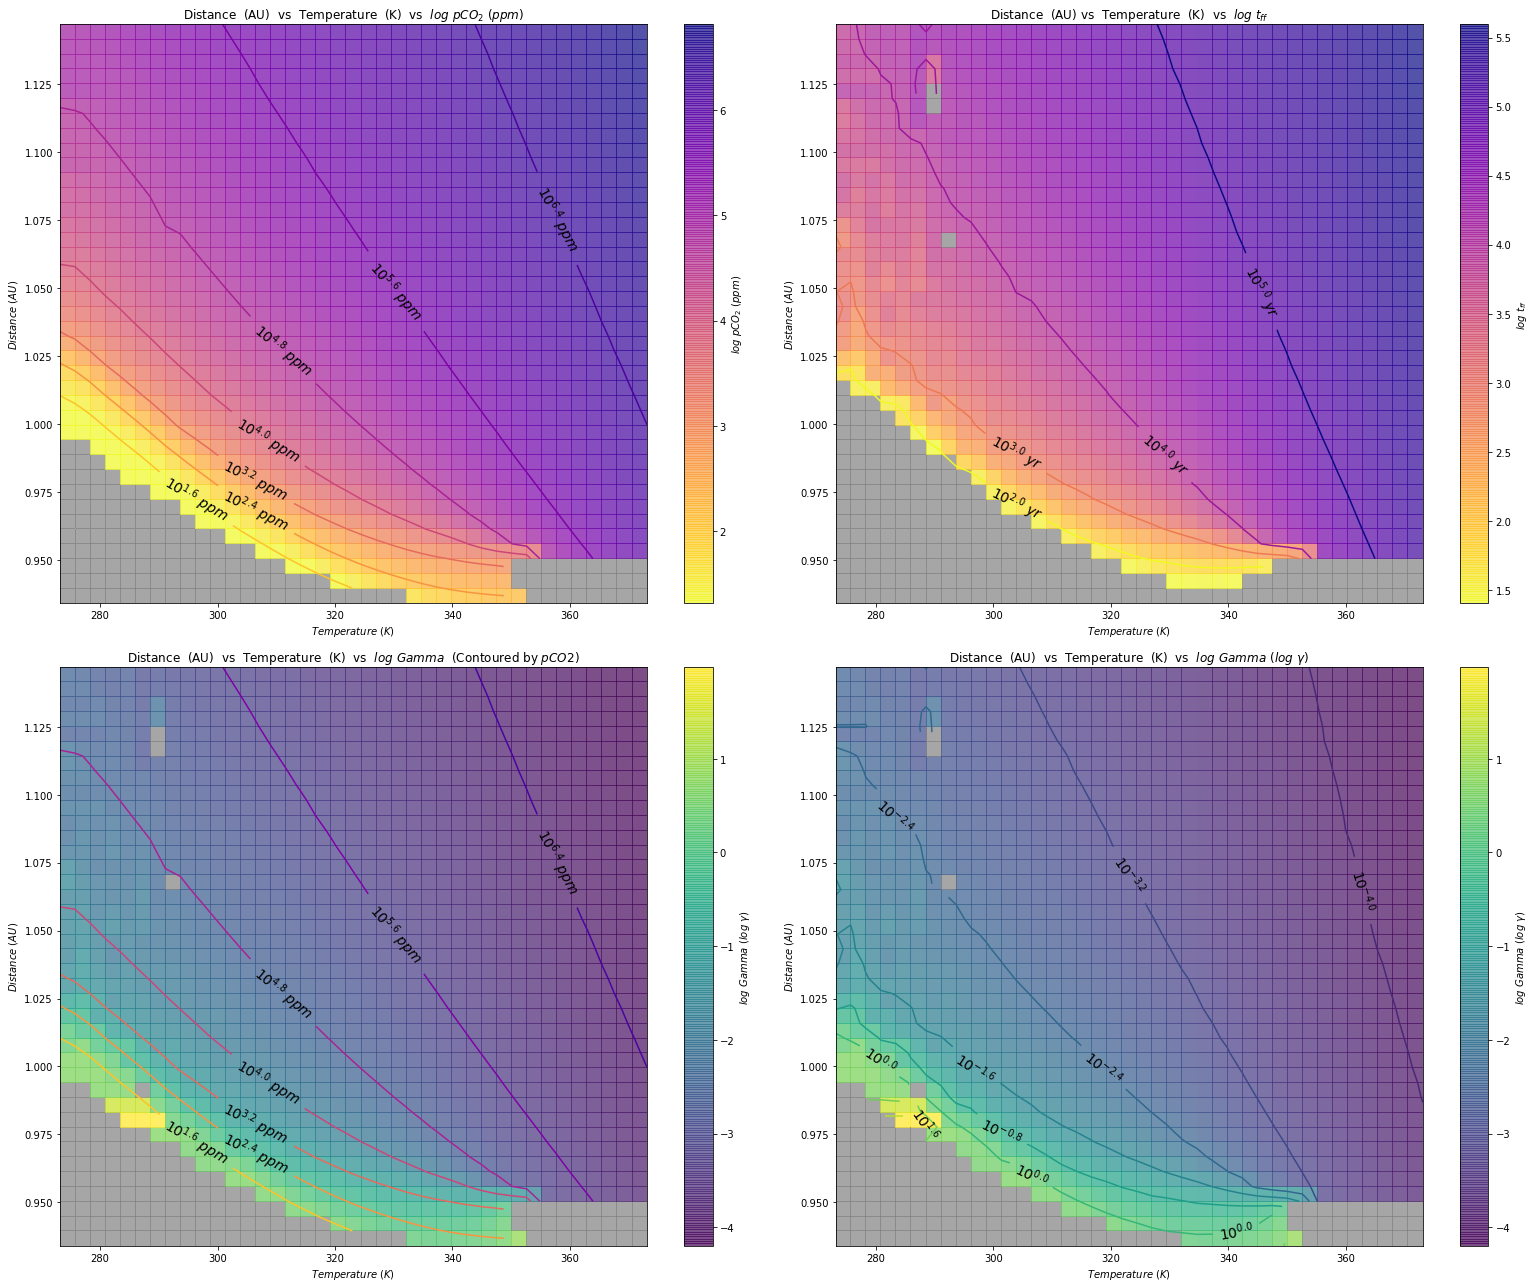

In [25]:
df = pd.read_csv('dataSweep_3_21.csv')
df5 = df[["dist", "temp", "logtYear"]]
df5 = df5.pivot("dist", "temp", "logtYear")
x3 = np.asarray(df5.index)
y3 = np.asarray(df5.columns)
xx3, yy3 = np.meshgrid(x3,y3)
zz3 = np.zeros_like(xx3)
for i in range(zz3.shape[0]):
    for j in range(zz3.shape[1]):
        zz3[j,i] = df5.iloc[i,j]


df4 = df[["dist", "temp", "popDeath"]]
df4 = df4.pivot("dist", "temp", "popDeath")
x2 = np.asarray(df4.index)
y2 = np.asarray(df4.columns)
xx2, yy2 = np.meshgrid(x2,y2)
zz2 = np.zeros_like(xx2)
for i in range(zz2.shape[0]):
    for j in range(zz2.shape[1]):
        zz2[j,i] = df4.iloc[i,j]
        
        
df2 = df[["dist", "temp", "logpco20"]]
df2 = df2.pivot("dist", "temp", "logpco20")
x = np.asarray(df2.index)
y = np.asarray(df2.columns)
xx, yy = np.meshgrid(x,y)
zz = np.zeros_like(xx)
for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        zz[j, i] = df2.iloc[i,j]
            
df3 = df[["dist", "temp", "logGamma"]]
df3 = df3.pivot("dist", "temp", "logGamma")
x1 = np.asarray(df3.index)
y1 = np.asarray(df3.columns)
xx1, yy1 = np.meshgrid(x1,y1)
zz1 = np.zeros_like(xx1)
for i in range(zz1.shape[0]):
    for j in range(zz1.shape[1]):
        zz1[j,i] = df3.iloc[i,j]


fig, axes = plt.subplots(figsize=(22,18), nrows=2, ncols=2)

#-----------------------------------log-Gamma---------------------------------------------------------
#contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[0,0]
colorMap = "plasma_r"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs1 = ax.pcolormesh(yy, xx, zz, alpha=0.7,cmap=cmm)
#cs2 = ax.contour(yy, xx, zz, cmap=colorMap, levels=contourLines)
cs2 = ax.contour(yy, xx, zz, cmap=cmm)
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1.1f}\ ppm$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $log\ pCO_{2}\ (ppm)$") #set axis labels;
cbar = fig.colorbar(cs1, ax=ax);
cbar.set_label(r"$log\ pCO_{2}\ (ppm)$")

#-----------------------------------log-Gamma---------------------------------------------------------
#contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[1,1]
colorMap = "viridis"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs1 = ax.pcolormesh(yy1, xx1, zz1, alpha=0.7,cmap=cmm)
#cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap, levels=contourLines)
cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap)
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1.1f}$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $log\ Gamma\ (log\ \gamma)$") #set axis labels;
cbar = fig.colorbar(cs1, ax=ax);
cbar.set_label(r"$log\ Gamma\ (log\ \gamma)$")

# #-----------------------------------log-Gamma-pCo2------------------------------------------------------
# #contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[1,0]
colorMap = "viridis"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs1 = ax.pcolormesh(yy1, xx1, zz1, alpha=0.7,cmap=cmm)
#cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap, levels=contourLines)
cs2 = ax.contour(yy, xx, zz, cmap="plasma_r")
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1.1f}\ ppm$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $log\ Gamma$  (Contoured by $pCO2$)") #set axis labels;
cbar = fig.colorbar(cs1, ax=ax);
cbar.set_label(r"$log\ Gamma\ (log\ \gamma)$")

#-----------------------------------log-Popdeath------------------------------------------------------
# #contourLines = np.asarray([-4,-3,-2,-1,0])
# ax = axes[1,1]
# colorMap = "magma_r"
# cmm = plt.get_cmap(colorMap)
# cmm.set_bad(color='grey')
# cs7 = ax.pcolormesh(yy2, xx2, zz2, alpha=0.7,cmap=cmm)
# cs8 = ax.contour(yy2, xx2, zz2, cmap=cmm, levels = [-1,0,1])
# ax.clabel(cs8, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\ ppl$") #set contour labels
# #ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\$") #set contour labels
# ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU) vs  Temperature  (K)  vs  $log\ PopDeaths$") #set axis labels;
# cbar = fig.colorbar(cs7, ax=ax);
# cbar.set_label(r"$log\ PopDeaths$")
#-----------------------------------log-tDeath------------------------------------------------------
#contourLines = np.asarray([2,3,4,5])
ax = axes[0,1]
colorMap = "plasma_r"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs5 = ax.pcolormesh(yy3, xx3, zz3, alpha=0.7,cmap=cmm)
cs6 = ax.contour(yy3, xx3, zz3, cmap=cmm, levels=contourLines)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABgAAAAUICAYAAABtVRubAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8GearUAAAgAElEQVR4nOzdd3Sj23nf++9GB9g7h9P7zJl+DudYcnQsWVYcFylOshzHthJbSW5i5zqxnHWd69i5SRRZLjfLJfaVS5xiLztRojhRLLlEtuNE5aiRONN7n+EMh0RhJ0CCAPb9A5hzOHPIGWK/JECQv89aXMMB8GA/AF6A+8Eur7HWIiIiIiIiIiIiIiIiG4uv1gmIiIiIiIiIiIiIiMjq0wCAiIiIiIiIiIiIiMgGpAEAEREREREREREREZENSAMAIiIiIiIiIiIiIiIbkAYAREREREREREREREQ2IA0AiIiIiIiIiIiIiIhsQBoAEBERERERERERERHZgDQAICIiIiIiIiIiIiKyAWkAQAQwxlw2xryn1nmsFmPMzxhjfmQV72/AGHNkte5P1p9Kjpn1cjwYY4aMMadqncdaW+33cwXtrovXWUREZLNRbfLC+1MfZYOpx1oENk89IiL1TwMAsuEZY+4ZY7LGmGljzIQx5svGmB80xrx5/Ftrj1hrP7eC+3nfmifskTGmC/g+4F8/c/nnjDHjxpjwM5dbY8y+Zy77iDHmPyy66OeAj65VzithjJlZ9FMsv6ZP/v/BWubmxXo4rp49Zp7NyRjz3eVj593li9bD8dAG9AJXatB2kzHmp40xt8qfK3eNMR8vP49PbtNgjPmYMeZ2+TZXjDE/4NDWku/nKqn56ywiIrLRqDZ58/K6qk1Ui6xpDnVXi8Da1iPGmIcaWBCR1aQBANksPmCtbQJ2Aj8L/Bjw72qb0pr5EPBH1trskwuMMbuA1wAL/EWH+/wM8I3GmN5VyM+JtbbxyQ/wgNJr+uSy/1irvJ7HGBOokzY+xDPHzKL7/37gV4Bvt9Z+vnxxzY8H4Bhww1o7X81GjTGtwBeBQ8C3lj9XXgOClD5fnhQDrwO7gW8CmoG/A/ykMeZvV9jkh1jmtamC9fA6i4iIbESqTeqsNlEtsqZtfIj6q0VgjeoRY0wn0EMNJjqJyMalAQDZVKy1k9bazwB/Dfh+Y8xReHqWgTHmx4wxj8qzcq4bY77JGPM7wA7g98uzPP7v8m3/8TMzfP/yk7bK9/mjxpgLxphJY8wnjTGRRddvN8Z8yhiTNMakjTEfX3RdnzHmv5Wvu2uM+eEKHua3Ap9/5rLvA74K/Bbw/RXcFwDW2jngDeAvrOT25efwvz5z2S8ZY3550fVPPceV5rREm8s+Z+XX4h+VX4tZY8y/M8b0GGP+RzmH/1n+0nbx7X+8/JqOG2N+85nX7kVt/Zgx5gIwa4wJLHecPOe4emrmkzHmt4wxH3tBG6t9zGBKM9Z/HvgL1tovP7m8kuNhDY+F48DFRfdpyvd135Rm0/0XY0xL+TqfMeafld9nw8aY7zHG5Ba/5s/k90FjzFfK79nHprS091vLV/8iMAZ8p7X2Zvn5eGit/QFrbbx8m18GRoG/bq29Z0u+BPwC8EMrfHxPPPXavCC3515vjPnbxpg/Nsb8Wvm4vmGMeckY82FjzANjTMoY81ee3Fel73sRERGpjGqTtalN1rD/uawV1AeqRZa3ZrVI+X7WvB4xJZ5rkfLzPkTpu7p0OWbNB3JEZBOw1upHPxv6B7gHvG+Jyx8Af2/xbYCDlP7g9pUv3wXsXe5+gL8K9FH6A/3XgFlgy6LbD5SvbweuAj9Yvs4PnKf0ZWIDEAHeVb7OR6lD88+AELAHuEOp47OSx5sETj9z2S3g/wReARaAnkXXWWDfM7f/CPAfnrnsl4FfWGEOO4EM0LTo8T4G3vG859j1NX3Rc1a+/VcpzaTYCiSAM8Cp8nP/v4B//sz9XwK2l1+7LwEfq6Ctc+XY6AqPk2ePq6deE0rF0ceeye/NNlb7mCnf/3+j9CX2iWViVnQ8rNWxQGmJ8E8s+v/HgM8BW8qv6aeBny9f91HgC+XXvhX4GjD0nPv+WSAL/JXyc/ujwP3y850H3vmc2F1AAXh5iev+KjBe4bH+7GuzZG4rub78mqUprUrwl1/j+8CHKa1g+DBwxvV9rx/96Ec/+tGPfl78s1Tfr3y5ahO7OrUJqkVUi1TheGBRPcLq1iI/BHzS62eNfvSjH/0s/tEKANnMhil1qBYrAGHgJWNM0JZm795e7g6stb9rrR221hattZ8EbgKvLrrJL5evHwN+HzhZvvxVSp2wf2StnbXWzllrXy9fdxrostZ+1Fqbs9beAf4N8N0rfFytwPST/xhj3kWp0/NfrLVvALeB713hfS02Xb7vF7LW3qfUqX0y6+i9QMZa+1UqfI5XaCXP2f9nrR211j6itIXL16y1Z21pBsl/p9QBX+zj1tqh8mv3U8D3VNDWL5djs+Xn40XHiYvFbazqMVP25ykVKhfffnNghcfDGh4Li2fc9AD/APhea+3j8mv6X4F+U9pT9EeAv2WtfWStnQA++5zHBaXlvL9orf2UtbYI/Dal2VHvB5LW2q88J/abKXXozyxx3VYgaYx51ZRm6X/BGPOfjDHB59zfs6/NkrktmhX2vOtPAD9jrf0za22B0rLii9baX7LWLlAqNJ+dYbTi972IiIh4otqkMsv2UVSLqBZZbK3rkTWoRU5QGmABSrWOMeaLxpg/XPz7CnMUEQG0BZBsblspbeXxJmvtLUp/oD8CJIwx/9kY07fcHRhjvs8Yc668zG8COAp0LrrJyKLfM0Bj+fftlGbl5pe4251A35P7LN/vT1CaMbIS40DTov9/P/An1tpU+f+f4OmltgVKs38XC1KajbNYEzCxwhyetPOko/q95f9X/Byv0Eqes9FFv2eX+H8jTxta9Pt9SkXRSttaHLuS48TF4jZW+5gB+HvAAeDfGmPMEjGVHA+reiyU8zkKXChf9BqlL7KHF92sk9LMnm8CLpTbeqKdFw8ALF4m3A3MAC2UZuc9TxfwcJnr/hLwx5Reu/daa7+B0gyn73jO/T372iyZW7nQeNH1x4E/WHTdS0v8/9oz7Vf6vhcRERE3qk1KVqs2US1SploEWNt6ZLVrkZOUVuQ88T3AL1lrv/2Z30VEVkwDALIpGWNOU+pkv/7sddbaT1hrn8xMscD/++SqZ+5jJ6WZDX8f6LDWtlKaQbtUB+VZQ5Rm5S61n98QcNda27rop8la+20rfHgXKHWWMMZEge8C3m2MGTHGjAD/EDhhjDlRvv0DSksdF9tNqaO52GGe7oi8yO8C7zHGbKM02+ITT654znPsyutztpTti37fQWlW1krbevNYWcFx8tRxVZYBYov+v9QJrhbHrdoxs8gopQ7ra8CvLhFTyfGw2sfCbqBQns0DpS/dJ5+5zXdQen93sqg4MMb4Ke0zeoElmNJJfrdTWor8xHcC/4PSe2WrMeZ5fzvvAjufvY0x5s8D/ZSWKj+2b53kLAcUn3N/i9/Pz8vtudeXj8MQcGPRdSdZNLuI0gDB4v9D5e97ERERqZBqkzWpTVSLoFpkkbWsR1azFvFRGlg4V/7/a8A/Af6hMeafLvr9/SvIUUTkTRoAkE3FGNNc/mP5nyntI3nxmesPGmPea4wJA3OUZmM8+XJulNJ+hk80UOogJMuxf5PSH+uVGKA0I+BnjTENxpiIMebPLbpu2pROIhQ1xviNMUfLhcFK/BHw7vLvf4nSLJqXKH3Zd5JSZ+mLlE6+BfBJ4P8xxmwzpRMUvQ/4AItmEZe3D3kF+NMV5oC1NklpH8TfpNQhvFq+r+c9x668PmdL+aHyc9JOqaP1Sce2XnScPHtcQanD973l+/4W3no9l7Oax8ybyrNYvgn4FmPMLz65vNLjYQ2OheOUCpcnBoF3GmP2GmMajTEfpTTj6N9T2t/2zxlj9hljmintF7qX5WfdHKP0nvleUzqh2bdT2qP2I7w1W/5ny/eFMeaAKZ1E7Mksqs+U//2YMSZmjAkbY/46pc+cv2mtvfukoXJB9s2UluAvZ/Fr87zcXnT9CUozk4rltpspFTmLi48TLCqkXN73IiIisnKqTdauNlEt8qZNX4uU72st65HVrEWivHVeBay1X6S0bedr1tqfXPT7HywTLyKyJA0AyGbx+8aYaUqzE/4J8AvA31zidmFKJ9FMUVoi2w38ePm6n6HUGZ0wxvyotfYK8PPAVyh1nI5ROkHTC9nS/tsfAPZRmuXykNIJmZ5c935KHeK75Vz+LaXtR1bit4FvM6UZNt8P/Ka19oG1duTJD/Bx4IOmNMvno8CXKc1QGAf+JfBBa+3iL1g/AHzumWWNK/EJSicw+8Siy573HDtZhedsKZ8A/oTSCaxuUzqxU8VtreA4eeq4Kl/2YUrP+QTwQeD3npfoKh8zz973A0r7ZH6nMeZnyhe7HA+reSwcY9EX19baOKW9UV+n9F46TGmLnYy19s+A/wScBeKUCpoMb9/qZvF9/0fgnZTeD/8C+EvW2ivW2ilKz8UB4KYpLW/+78Dsk2Xs1toZSoXKcUoz1UYovYbvt9b+7pNGygXA7wAfsqX995ez+LVZNrcX5c4ze4mW87tlrc2U83lqtlGZ6/teREREnk+1SXVqE9UiqkUWW5N6ZDVrEWvtLPDrwBVjzENTWjFgrbXFxb9X9KhFRABj7VIrvkSknhljfhpIWGv/1Srd39eAv/1Mx3vDMsbcA/4Pa+3/rHUu1VLJMVPPx4Mx5geBb7fWfmCZ638NuGGt/cWlrl+lHAKUVgr8fLkoeNHtfxpIAAefl9tq517Pr7OIiIisH6pNKqNa5IW3rdvX/0W1yBK3Pwz8Q2vt3138+5omKSIb0lJ7/IlInbPW/sQq39/Xreb9yfpTyTFTT8eDMeYdlJa0D1Gamf9RSrOGlnMM+PQap/U9wNcB/9SU9vL8NWvtJ5e78ZPXxhjz+gtyW9Xc6+l1FhERkfVLtYm8iGqRZS3eovOp7TpFRCqhAQAREdnITgF/CAQpnQD3Q9barz3n9kdZfnugVWGt/R1K2/9U6kW5rXnuIiIiIiKyYpXWIk+x1v7npX4XEamUtgASEREREREREREREdmAdBJgEREREREREREREZENaNNtAdQSabE9DT1Vb3chUyAQc3u6F2bzBF1jM/matJubLRBs8LvHeni8zjl7iZ3NE2pYeWxhvkCxCMGon9xsnmAFsV7aXWzeQ2yt2p2fzRN2jJ2bzRN2PCbnZwuEnGPdc4ZS3hFPj9k91rndzAJhx/fSXCZPxDE26zE2ukbtFvOWfK5AaInbZDMLRGNBp3YzmQVPObvGZjzk7PnxOh6TmdkFog2O7c4uEHOMnfUUm3OOBW95j0/cSVlru5wbXwO9PSdtLjdd1TbHJ+78sbX2W6raqNREa7TZ9jV3VxyXzyzgjz79PrNFyGeL+CM+fM/pOizMFvBH3T7T8tk8gajb+zufXXCOnZ95QT1TtBSyeXxhPybw9nlm+Wf72taSz+bxhfz4lrj9Yl76ywue+toFgjH3mmapv/0riq2TmubZ2HqraWpVl5Tada9LXGuapWqDfLHI1FyOlkgYv89UFLtSXushL3tWzGUW6q62yHiqS7w9XtUHK4+tt/rAS86g+gDqvzbYdAMAPQ09/Mq3/4pT7OiZNF0nO51iR95I03XK7b0yEk/T83KHU+xwfIzul91yHh5M0/OKW7uPBsbo7XeLHRoYY4tj7KPBMbaedou9P5Bmq2O7DwbSbHt15bFjN6YYvzXDlpc6SN6ZqSh2sfsDabY7Pt67A2l2OLbrJfb2QJpdr7Y7x+52bPfWYJo9ju3eGHCPvTmQZq9jzgA3BlPsc3yNvcReG0yx/7TbZ8e1eMI59upgkoOn3T4rr8QT7rGDCQ45xl4eTHD4ObEzyXkefG2CrfuaadkWfeq6Sy+IfZ6L8VGO9Ff+hRXABU+xIxztdxtIPx8f4ahju+fiIxw77dbu2fgIxx1zPhN/zIn+XqfYeHyYk6fdYgfjw5xybPdJ2y+f3uIU+7uf+q77zg2vkVxumve992er2ubvfuq73D7IpO70NXfzO9/9LyuOS59L0nLk6ffZQqbA9c9OsOVkAx17IsvGjsTHaD3m9rmUPJei44TbZ+nY+QQdJ93+7tz90uRz27WFIhPnR8jP5Gg53kuo9enHnzqbpOeV0tvKWsv4hQS58TnaT/a87bbPejTgXtOMxNPOdclDjzVNn2MtNVQnNc2z7daiprntsabZWYOa5tZgmt2usR7qklJN8/TjnczO8yuvn+Xktq28Z9/2ZWOve6grrg+m2O8YC5A37kMAVwY91Ac1qi0ueqgPLg2O8pJj7HnVBytWj/WBl9oAVB9A/dcGm24AQGQ9aN3bxPRwltTlCWzEbQaHiNSHhs4QoQY/Y/eybxsAEJGVycwucGbwca3TEHmhQNSHL2CYn8rXOpWqM34fLcd6mDg3wtSlUVpPbiHQGFryttO3J8iNzdF8sP2FX/6LyNppiYbZ29nKuUcJXtuzFb9Pu0SLSH1QfVAZDQCI1IDPb+g60sLjwTF8Og+3yIZmjKF9V4yRy9NkJxaItrovvRTZrGINQfr7+6ra5u2hqjYnG4Qxhkizn7mpQq1TqQlf0F8eBHjMxIUR2k5teds2SdnHM2SGpohtbSLW11SjTEXkiZe39fBfzl3nZnKcQz3uM/VFRKqp2vVBvdcGGgAQqZFYV4SG3gizI3Oezl0gIutfy7YIiWszjN3LsPVkS63TEak7mdkFzsQ1w0fqQ7jZz9RwDmstxiy/p/ZG5Y8E3lwJMHFhlLZTvfhCpX5ubnKeyetpQq0Rmva11ThTEQHY29lKcyTEmYcJDQCISN1QfVAZfeMoUkOdL7UwOzpH+tIkPafbN2WRKLIZ+IM+WrZFmBjK0nO4iUBYy6tFKtFQgxUAN+t8lo/UTqTZz/g9S37eEoxszr5doCFEy7FuJs6PMnkxQcuJXmyxyMSlJP5wgNajnZjnnHBURKrHZwyntnbz+dsPGcvM0R7Ttlwisv5Vuz6o99pA30CI1FAg4scXCzCXmmd2OFvrdERkDbXvjmGLMP5A73URkY0s3FyaY7UZzwOwWLA5QsuRLvKzOaYujUJmHlso0nqsC19Q58ASWU9ObO3GGDj7cLTWqYiIyBrQCgCRGjMRH+FgkLGrU0S7IvhDGpcT2YjCjQEaOkOM38/QuTemmY8iFcjMLnBWS3ylTkSaS19uz00VaOyucTI1FmqP0XSok+mrKQBajnURXObEwCJSO03hEAe72jk/nOTd+7YT0MmARWSdU31QGQ0AiNSYMYaOoy0MfynJ+LVJOo9rP1SRjap9V5Sh+CTTI/M092l5tchKxRpCvFLlLYCu1fkyX6mdQMSHP2SY36QnAn5WpLsRYwxTd6eIdMZqnY6ILOPlbT1cS4xxbXSMo1s6a52OiMhzVbs+qPfaQAMAIutAqDlIy55GJm/P0NAXI9oZrnVKIrIGGnvCBKM+xu5lNAAgUoHMbI5zg5rhI/Uj0uxnTgMAbwp3NWAeZmqdhog8x672ZtqiYc48HNUAgIise6oPKqMBAJF1omVfE7OPs6QvTdD3Wjc+v7YHEdlojDG07YqRuDrD3NRCrdMRqRuxhhAvV3kFwOWHVW1ONphwc4CJB3NYazFGfToRWf+MMZza1sP/uvmA5EyGrkat2BGR9ava9cFKagNjzD1gGigAeWtt/zPXvwf4NHC3fNGnrLUfXc08l6MBAJF1wuc3dBxtZXQgzeStadoONtc6JRFZA23boySvzzB2TycDFlmp7OwC5+IjtU5DZMUizX6KeVjIFgnFdMJbEakPx/u6+PytIc48TPAXDu2qdToiIstax/XBN1prU8+5/ovW2vdXLZsyDQCIrCPRzjANW6NM3pmhoS9KqClY65REZJX5Qz5atkaYfJiFjlpnI1IfYg1BXu7fUtU2L2oFgHgQLp8IeH6qoAEAEakbDaEgh3raufg4yXv3byfo1+eXiKxP1a4P6r020ACAyDrTfriZbHKe9MUJet/ZqWXjIhtQ+64YE0NzoEUAIiuSWb8zfESWFCkPAMxNFWjqrXEyIiIVeHlbD5dH0lwZSXNia3et0xERWdI6rQ8s8CfGGAv8a2vtbyxxm3caY84Dw8CPWmsvVyMxDQCIrDP+kJ/2w82kzk8w/SBD886GWqckIqss0hIk2h4kM7mg/aFFViDWEORUf3W/RT1f57N8pLb8IR+BiGF+Kl/rVEREKrK9tYnOhihvPBzVAICIrFvVrg/OP6TTGBNfdNFvLPEF/7ustY+MMd3Anxpjrllrv7Do+jPATmvtjDHm24DfA/avceoAGGttNdpZN/ZE99iP7fuYU2zR+pzbnUnkiHSEnWIziRyRjohT7HQiR9Sx3elEjminY+xojphj7KSH2JlkjliXY7uJeRoc251KusdOJudpeCZnay3FqQXIW3ytIcwyJwSeWiJ2xe0mPMQm52l0jJ1IztHY5XY8TyTnaHJtN+UeO56co8kx55mJeaKtIadYgPFUlmbHtseTtYlNpzK0OMaOJbPusSn32HQyS6tzrOPjnbMwCYUWIFL5AEAqNUtbV7TydoFkMuMcm0p6aXeWdsfYRCrjHFtq1+1EdqMech5NzdDR6Rb7ODVLh2O7AInULB2Oj/nOgw+/8ewJq2qts22f/cB7fq6qbf7W7/3ldfc8yNo42LzD/uqrP1ZxXCaxQKht+fdp6lGAhTlD754Fnh3nnXhknxv73HZTOcLtbn+zcuNZIo6xw3cM4Xb3z6X8RMa5tph8nCfiGJtJutc0UzWqaaaTHtpdRzVNRe269tNrWNM41xapOY/tuvfvVxp7fX6cs3MpvrVxJy3+EGOplccu1a5rHx1gwRSdY5376UDaQ20x5qG2SCYzzrEpD7HJVIZWx75n2kN9kKhRfeCpXS+1RWraOXYkOePcv/dSG4DqA6i8NjDGfASYsdYum2T5pMH9LzhnwKrYdCsAArEA3ae6nGITZ5N0OcbaN9J0nXLb7HnkjTTdjrE27i2252W32OHBNL2vtLu1OzDGln632KGBMbacdostDoyx9bTb430wkHaOtQNptr369tiFTJ6HX0gSCfmWfS7vDaTZvkTsStwbSLPDMec7A2l2OLZ7dyDNTsfY2wNpdr3q9vreHkyz2zH21kCa3Y453xxIsdcxFuDGYJq9jq/TjcEU+xxjrw+m2O8YezWeZP/pTqfYa4NJDjjGXh1McrDf7TP6cjzBIcd2Lw8mOHy68nZt0XL5swmaAkF2OHxuXYyP8FK/26ysC/FRjjjHjnC0v8cp9nx8hKOO7Z6Lj3DMQ7vHHWeHnIk/5rhju2fijznh2G48PsxJDzNaBuLDvOwYf+eBc7NrJjO7wPn4aK3TkA3KHw3RcsRhD1k7QsvR5T///R0L3P9yhvCWVpp6nz6v08LCOK1H3P7uJM6maT/h9vdu/MIoHY6x07NTtB9379OMXSjQ84pbfHFg3LmWehxPO7drB9P0ONY0ha+N0+vY7nA8TZ9jPWQHxuirQU1TXKamWYn7Hmqagoea5q6HmsZLXVKog7qkd76Js19IMdudp3/vFq4PpmpSkwDkPSyUvTqYcK4tLscTHHTo4wNcGUxwyDG24FhbAFwcHHWPjSeca4uL8RHn2uJcjeqDs/GRGvXxi859/MH4sPOM93h82NN++aoPXswY0wD4rLXT5d+/GfjoM7fpBUattdYY8yrgA9LVyG/TDQCI1ItgLEDb/kbGrk8zO5Klodd9xpWIrD/GZyAGmfQCc5MLRFp00m+R5dRiC6Cz2gJIPGruC+APGcbuLrxtAEBEZD1rCofY1dbM5ZE037BnW63TERF5m2rXByuoDXqA/17e3jcAfMJa+1ljzA8CWGt/HfhO4O8ZY/KUzgj43bZKW/NoAEBkHWvZ3cjMcJbUlUmiHWF8QfdtqERkHYqCyRrG7mboO9lS62xE1q3s7AIX1tEMH5GV8PkNrTuCjN3NUchZ/CGd70VE6seR3g7+8OpdRmcytU5FRORt1lt9YK29A5xY4vJfX/T7x4GPVzOvJzQAILKOGZ+h81grw19OMXZjms4j+oJQZEPxGVq2RZgcypI/1Egg4q91RiLrUqwh6GlLJBdxrQCQVdC+O0j6Vo6JoQU69rqfE0hEpNoOdbfzR9fucnkkzTbc9w4XEVkL1a4P6r020ACAyDoXaQ3RvKuBqXuzNPZFibSpeBTZSNp3x5i4n2X8fpaug421TkdkXcrMLnAhPlLrNEQqFm3zE2n2MXY3pwEAEakrsVCQPe0tXBlJszWs7WhFZH1RfVAZDQCI1IH2A03MjmRJXpxg27u6SnuHi8iGEGoM0NAdYuJ+ho59Dfj8en+LPCvWEHQ+2ZqrgTqf5SPrgzGGtt0hHp+fY26qQKRZK71EpH4c6e3kM5dvMxaYr3UqIiJPqXZ9UO+1gTYUF6kDvoCPziOtLMzkmbgzU+t0RGSVte+JUchZpobnap2KiIissradQTAwfm+h1qmIiFTkYFcbfmN4sDBd61RERMQDrQAQqRMNPREaeiNM3JqmcUuUYIPeviIbRawjRLgpwPidDC3bIhijVQAii2Vn81wcXD8n+RKpRDDqo3lLgLF7OXqPhrWSU0TqRiQYYF9nKw9SU1hr1UcVkXVD9UFl9A2iSB3peKmFbGqe5KUJtrzaUet0RGSVlLaIiDFyYYpMeoGGTu0TLbJYNBbgRH9PVdv86qOqNicbXNuuEFPDGaZH8zRvCdY6HRGRFTvS28H15DhDE9PsaGuudToiIkD164N6rw00ACBSRwIRP+0Hm0ldnmTmUbbW6YjIKmreGiF5bZrxu7MaABB5RjaT50JcM3ykfjX3BfCHDOP3FjQAICJ1ZX9XG34MV0bSGgAQkXVD9UFlNAAgUmeadsSYHs6QvjqJbVIBKbJR+PyG1p0x0jdnyc3kCTXqT7TIE7FY9U8C/JU6n+Uj64vPb2jdEWTsTo5CztY6HRGRFQv5/fQFG7ieGOObD+7Cp23MRGQdqHZ9UO+1gb5dEKkzxhi6jrby8PUkzOZrnW0ZI9sAACAASURBVI6IrKK2nVHSt2YZu5eh96hmWIk8kckscFEzfKTOte8Okb6VY/xBrtapiIhUZHuwkaHMDA8mptjV3lLrdEREVB9USAMAInUo1BSkdW8jE7dmyCbniHZFap2SiKyCQMRP89YIk0NzdB1sxB/01TolkXUhFgtyvMorAL5U57N8ZP2JtvmItPgYv7tAU2utsxERWbneYIyg38e1kTENAIjIulDt+qDeawMNAIjUqda9TUzcmWXs8iR9r4Uxfi3FFNkI2nfHmHo4x8SDLB17G2qdjsi6kM0scEkzfKTOGWNo3x1i+NwckVitsxERWbmA8bGvs41riTG++ZC2ARKR2lN9UBlj7ebag3JPbI/9qX0fc4r18lTNJnNEOtxmaXuJnRnNEe0IO8VOJ3JEOx1jR3PEHGOnPMROJtxjp5Meck7O0+Aam5inocs153nCBkzMj4lVNp43mZin0bHd8aR77KSn2Dnn2InUHE2OKyXGk3M0ObY7O5Ej0up+robpyRyxVrcTwo4nsx4ec5YWx9h0KkOzh3ZdY8eSWVo95Oz6eMc8PFepZXI2YxaKYDsAs3SBlUrN0toVdWw34xybTs7S5hib9BKbytDe6SHWsd1EctZjrNu3fOnJDE2tbp87pfgsLS1u8beHPvyGtbbfufE10N26337Xe/5VVdv8lU+/f909D7I2DjTvtL/a/48rjsuNZwi1VfYeL+Rh+FYYQ5GO7QbjsNBrejRPuN3tcyk3nnGOHXsMRN1HLiJ2gnCLW59m9J6PSLtjPZSsTT00+XjBOXY2OU/Mtb/soR7yUtNMJtxznkq610MTHmopL3WJl/pgvEZ1iafaIJVlsiXPVzIjvLuhj+7gyj8LvPTvAfLG/YuYdNK9LvFSH6Q91CWlfrpbbNJDbCqVde6npzz08RPJWdpcH6+H+iCRcu+njyZn3GNT086xI8lZOlyf59QsHY7tAtx5oPqg3muDTbcCIBAN0HWyyyk2eS7pHJs4k6LzVKdT7MgbabpOdTjF2nia7pdrEDs4Ru8rbrHFgTF6+91jtzi2OzQ4xtbTjrEDafocY+8PpNnmITYcNGRG5+h7tYNgBYMA9wbSbHdstziQZserbrF3PcbufLXdKfbWQJrdjo/31mCaPR7adY0FuDGQZo9j3jcGU+yrQey1Qcv+frfPu2vxBPtPu8VeHUxy8LTbZ/SVeMI9djDBIcfYi4MJDi8ROzmU5fH5KXbuayPWvvSXJZcGR3mp37HdeIKX+rsdY0c44hh7Pj7C0f4e59hjju2ejY84Lw89E3/Mccecz8QfO5+YKh4f5qSHJa3x+DAv929xir095NysSF3yR4I0H+6rOG784gjNhyt/n/o7c9z/8gzzhSDb+xswywz0LqcYH6PtmNvfyvT5BO3H3T5LZ2YnaT/h1jcAaBwfpudlty8uCv+jSOMht7Yfe6hpih5qmsLAGL2vuPUBHw2MscWxHirUqKYpeqxptjnWB8WBNDsc273joS4peqhLCjWqS254qEtuDKY5cqqVgc+Nku0osv/gyj+DvNQVAHncBwA81xaOfe3L8QQHHdu9tEx9sBIXB0fdY1UfrFg8Puyhj1907uO/ER/mlGP/fiA+zMseaos7D5xDZZ3YdAMAIhtN++EWMol50pcn6elvr7iIFJH1p2lLhNFL00wOZZcdABDZTLTEVzaS5i0hWrryTD4EfzBD38sx9d9EZN0LB/zsam/hZnKcbzqwU59bIlJTqg8qowEAkToXiPhpO9DE2NUpMqNzNPS6zawSkfXDFzA09UWYGp6j+0gRf0AnA5bNLRoLcsxxdpirz9f5ib5kfWtuLxJqj5C8PocvaOg9FtWXaSKy7u3vauOz1yZIzWbpatTJTESkdqpdH9R7baABAJENoHlnAzMPM6SvTBLtDOPTl4Uida91R4TJoSzTw/O07tDAnmxupRk+iVqnIbKqeo5GKCxYUjfm8YcM3Yc27md9MV+kkK91FiLiVWkA4C43k+MaABCRmlJ9UBkNAIhsAMZn6DjayuOvpJi4OU374ZZapyQiHkVag4Qa/UwOZTUAIJterAYrAD5X57N8ZP0zxtB3KkphwTJ6aQ5/0NCx1/1EmetVYS5P+uwI6XwjbYcs0WatdBCpV02REFuaG7iZHOfrd2+tdToisolVuz6o99pAAwAiG0SkLUTj9hiT92Zp3BYj1BSsdUoi4oExhpbtUZJXZ5ifyRNu1J9s2byymbxm+MiGZIxh++kYxbxl+GwWX9DQtiNc67RWTSFXYOzcKHahCMDlz+Y59m0Bwo0aBBCpV/u72vjC7YfMzOdoDOtcVSJSG6oPKqNvE0Q2kPaDzWRG5khdmmTLOzq0l6xInWvZFiF5bYbJoSzdh5tqnY5IzURjgaqvAPjfdT7LR+qH8Rl2vKOBe6/P8HAwgz9gaO6r/y/VigsFxs+NUpwv0Haim9jsbR7fbeTSZ/Mc+/YAoaj6qSL16EB5AOBWcoKT27prnY6IbFLVrg/qvTbQAIDIBuIP+Wg/1Ezq4gQzj7I0bdO+jCL1LBD209gdZvLhHF0HGzE+fVkim1M2k+eyZvjIBubzG3Z+fSN3vzDNg6/Osutdhsbu+l3NWcwXGb+QIJ9ZoO14N6HWCBFb5KVv9nP5jwtc/myeo98WIBjW3zWRetPVGKMlEuJGckwDACJSM6oPKqMBAJENpnFblOmHs4xdmyLWHcEf0gmBRepZy/YIM6PzzCTmaerdeHtDi6xEaYZPdb9k+LM6n+Uj9ccfNOx6VyN3Pj/N/S/PsPsbmoi111+5ZgtFJi4mWJjO0Xqki3D7W+exae7xcfh9cOVPC1z54wJHvsVPIKRBAJF6Yoxhf1c75x6NkisUCPn9tU5JRDahatcH9V4b6JtBkQ3GGEPnkVaKC0XGr0/VOh0R8aixO4w/7GNyaK7WqYiIyBoLhH3sfq0Jf9jHvddnmJss1DqlitiiZeJyitzEPC2HOoh0vX01amufj0Pf6Gc2bbn6pwUKeVuDTEXEi/1dbeSLlnvpyVqnIiIiK1B/U0pE5IVCzUGadzUwdbd0QuBIW/3vIyuyWRmfoWVrhLG7GfJzBQIRzbKSzUdLfGUzCUZ97Hmtkdufm+buF6fZ854mwo3r/7PfWsvk1RTz6SzNB9qJ9jYue9v2HT72vxtufL7AtT8rcPh9fnx+rQQQqRc72poIB/zcSI5zoLu91umIyCak+qAyGgAQ2aDa9jcx+zhL+vIEfV/fpb3DRepYy44oY3cyTD6ao2NvQ63TEam6aCzA0SpvAfSndb7MV+pbqNHP7teauPP5ae5+cYa972kiGF2/i7ettUxdSzOXyNC0t5XY1hefuL5rj49iHm69XuD6/y5w8L1+fOqvitQFv8/H3o5WbiXHKVqLz+i9KyLVVe36oN5rAw0AiGxQvoCPjsMtJM6OM3V/lpbdy8/CEpH1LdwYINoWZHIoS/ueGEZFlmwyc5k8VwaTtU5DpKoiLX52vat0YuC7X5xmz7ubCITX3yCAtZbpW+NkR2Zp2NlCw46WFcf2HPBRzFvufLXIzS8UOPANfk1aEakT+7vbuDKaZnhyhm2tLx70ExFZTaoPKmOs3Vx7Lu6J7bE/te9jVW83m5on0u528saZZI5Ih1vsbGLeOXYmkSPaEXaKnU4sEO10i50azRGrRWzSPXY6OU+DY+xkYt5DzvM0dC0fa62lOLWAzVv8baGnCqrJ5DyNz4l9nonE89t9Hi/tTibnaOxyO54nknPujzc1R5Nj7MxEjmir+xZMUxPzxBzjx1NZmh2fr/FkbWLTqQwtjrFjyax7bMo9Np3M0uoYm0xmVh6btZgpsG1AyJBOZmjtir4wbCmplIfY5CxtNYhNeolNZWh3jB1NztK+xB7WK5FIzjq3m57M0Nzq9rkDMDaRpaXV7bi8OfTDb1hr+50bXwO9rQfsB9/zy1Vt8xc+/a3r7nmQtXGgaaf9lVd+vOK43HiWUJvbe3xhPEOofWWxc7M+RoeChCOWnp05Joatc7tz6XnCjjVJetgQaHx7bHF+gWJ2ARMO4IsElx2k3rftBuGW4JLXJR7GeHy/ie5tM2zZOfu2689+qYdAi9sKuFrVNJMjHmqLRI1qmsQ8Mdd+esJDPfSCmmatYicSHuohD3XJeI3qkvGke+xYau5t/ftcscDvTd3hQLiVk9Gu5WM91AYAeYrOsV5qi7SH2sJLu6mkt9h6qw889fE99LUTHuqDEQ/tjqZm6Oh0zdm9LhlJzdDhGAtw58GH112/uNr1Qb3XBptuBUAgGqDr5PJ/nJ4neS7pMbbTKZYzKTpPdTiFjryRpss1Np6m2zHWxsfoftkxdjBNzytu+wjagTF6+91j+xxjhwbH2Hra7fEWB9Js7XeLvT+QZturz49dmM0z9IUEsViAruOtT8Vuf0HscooDaXY4Pt47A2l2OLZ7dyDNTsfYOwNpdr3q9vreGkyz2zV2IM1ux5yfxO9xbPvGYJq9jq/TjcEU+xxjrw+m2O8YezWeZP9pt8/Ka4NJDjjGXh1McrDf7fP9cjzBIcd2C4MJDp9eWbvFfJEb/zNFYzTEtpdbuVRB7LMuxkc54rhc8oKn2BGO9vc4xZ6Pjzgv8TwXH+GYY7tn4yMcd4w9E3/Mif5ep9h4fJiTjrEAg/FhTjnG3xxybnbNZDMLmuEjayYQC9B5qvLP8cnLj2k54vb5X4pd+Wd4+FaOB4PzhHrbaCxMVxS7WPpcgrZjbrHz8+O0n3h7nyTxRpKCL0Dv1/c8f4XaWAPNLy39fDW/BLOfKTC30EjzS29fQdB239JwsL5qmuJAml7HmubRYG1qmgcDY/R5qWk8xL6oplmOl5rmbo1qmmKN6pKbXuqKgTR7lniurpwf5/7YFH/x1H5CgaXPVXLdQ10BUMR90qqX2uLKYIKDjn3tK3H32MuD7rXFxTqsD87HRzzFHnOMLfXx3frKhfjjuqsPBuLDvOyhtrjzwDl0zag+qMymGwAQ2WyCDQFadjUweXeW5l0NhJuXnnklIuubL+CjdUeUsbsZFrKFWqcjUlXRWJAjp6t7DoDPfrqqzYk8V/vuIMMXcyRu5GhcZ6eCyWcLhJqWn/m/UsEoZCdXKSkRqYp37uzjemKcs48SfN3OLbVOR0Q2kWrXB/VeG2gAQGQTaN3XxPTDLOmrk2x5tUP7h4vUqfZdMcbuZBi7l6l1KiJVlc0scHUwUes0RGrG5zd07gsycilHZGets3mLLVry2TyxHrftDBYLhAz53Obanlak3m1tbWJHaxNfu/+Y/u09+H3r7zwlIrIxqT6ojAYARDYBf9BH2/4m0lcmySTmaehx34NRRGonFPPT1Btm/EEW2vQliWwetVgB8Ed1PstHNp6ufUFGr+SYnfThvpnG6irMFcCWtln1KhCCQm4VkhKRqnrnrj4+ee46l0fSHO9z235GRKRS1a4P6r020PCsyCbRvCNGsCHA2NVJbFFfHIrUq449MYoLFrK1zkRERKopGPXRtiNAZspQWHA/KeZqymfzAARiS+/9XQl/GAoLqJ8qUmf2drbS3RjjK/eGsVbvXxGR9UgrAEQ2CeMzdBxuZiQ+xtT92VqnIyKOom1BIi0BsjN5rLXa0ks2hbnMAle0xFeErgMhxu7lGbudpetQ7U8GsJB5MgCwOisAAPI5CGqxqkjdMMbwjl1b+Myl29xMTXCgq63WKYnIJqD6oDIaABDZRKJdYaKdYcZvTUOTTgYsUo+MMXTsifHo7BSZZI6G7nCtUxJZc5EabAH0h3W+zFc2poYOP5GGIqlrGWwRug7HajoQnM/mwQf+sPcVABoAEKlfL/V08LlbQ3z13rAGAESkKqpdH9R7baABAJFNxBhDx6FmHr6exGQKtU5HRBw1b4nw8PwU4/eyGgCQTWEuk+fqYLLWaYisC21bimQXYqRvZMjNFOh7pQmfvzaDAPlMnkA0sCqDEIGwASz5ee95iUh1+X0+3rFzC39y/T4PJ6bZ1tpU65REZINTfVAZDQCIbDKh5iBN22NMD2VYmMkTbNTHgEi9MT4DUZhN5FjIFAiuwt7LIutZNBbgpSqvAPj9Op/lIxuXMdB7spFQo5/E5VnuZwts/7oWApHqn94tnymsygmA4ekVACJSf05s7eaLdx7x5XvDfNfJg7VOR0Q2uGrXB/VeG+ibP5FNqO1AE9MPM4xdm6Knv73W6YiIAxsFk4GJ+1m6DjfWOh2RNZXN5LmmGT4ibzLG0LE/RqjBz6M3prj3+XG2vbOFSHP1yjtrLflsnkj76qxEezIAUNAAgEhdCvn99G/v4Yt3HpGcydDVGKt1SiKygak+qIwGAEQ2oUDYj4n6ySbmyKbmiXZqCxGRuuM3NPaEmHyQpeNAQ822fxCphmgswOHTXVVt89N1PstHNoemvjA7Y608/OoU978wwdbTzTT2hKrSdjFXxBbsqpwAGMBf7o7m5y2gv2ki9ah/ey9fufeYr95/zAeO7K11OiKygVW7Pqj32kADACKblIn68VkYuzpJ37u6anoCORFx07oryszIPNOP52jZFq11OiJrZk4zfESWFW0NsuvdrQx9ZZKhr0zSc7yR9j1r/zchn8kDEIiuzjZ02gJIpP7FQkFObu3mzMNR3r13G80RTTQTkbWh+qAyVRkAMMb8e+D9QMJae3SJ6w8Bvwm8DPwTa+3PlS/fDvw20ANY4Destb9Uvu4jwN8BnrzaP2Gt/aM1figiG4YxhvaDzSTPjTPzMEvTdi3RFKk3sY4goQY/E/eyGgCQDS0SC3C4yucA+L06n+Wz3qk+WF3BqJ9d39DGo8EpRi/MkJsp0HOsYU0neCxkywMAq7UCIAgYDQCI1Luv29nLGw9HGLg/wvsO7qx1OiKyQVW7Pqj32qBaZ4r6LeBbnnP9GPDDwM89c3ke+L+stS8B7wB+yBjz0qLrf9Fae7L8syk69yKrKbYlQrg1yMSNKYr5Yq3TEZEKGWNo3RVlbiLP3MRCrdMREanEb6H6YFX5AoZt72imfW+U8TtZHn51isLC2vXv3loBsDoDAMYYAiHIz6/K3YlIjbRGIxzp6eTso1GyC/lapyMiIoCx1lanIWN2AX+w1AyfRbf5CDDzZIbPEtd/Gvi4tfZPX3Tb5eyJ7bE/te9jlYSsirn0HJGOiFNsNjVPpN0tdiaZc253ZtQ9djqRI9rhttxvOpFz3pN+ejRHzDF2KuEeO53IEetyi51MzNPg2O5k0j12KjlPQ1cYu1CkOLlQ2hKoYWUF3GQ51sVEYp5G1+cq6R47kZyjyTU2NUdjl+N7YSJHtDXoFAulvJsd8x5LzdHsmPd4MkuTh9gWx9h0KuMpZ9fYsWSWVg85uz7eVNI9Np3M0toVhaLFlwIbBtuyspme6dRsKdZBKplxjk0nZ2lzjE16iE2kMrR7aLe9y22F1Ghy1rnd0dQMHZ3uqzoep2bpcGz75tAPv2Gt7XdufA20hfbY93ZVt//2qeEPrrvnYaNZL/XBwead9ldP/1glIQAsjGcItrl9PniJnXpcINT2/Pd3ZtIwlTKEY9C25a1BgEwiR7jd8fN/yD4Vm5vOUVworrhOad97/YW1xYP/3UmkLUf3yamnLr/9J92EmhsqT5ra1TRTHuqSaQ91iZeaZtJLux7qksnEvHMtNeWhLpn0UJeMe6hLxj3UJeOpOec++pjH/n0lsROFeT4784Dj4Q56Z6LO7QIUcf/OykttkfbQTx9LuddDXuqDUqxjP91DfZBMZtz76ckZ59hUjeqDhIc+fsJDbTGSmvYQO0OHYyzAnQcfXnf94mrXB/VeG9TNOQDKBcIp4GuLLv77xpjvA+KUZgKNLxP7d4G/C9Dd0E3XSbeTRCTPJWsY2+kUWzyTputkh1OsfSNN1ynH2Hiabg+xPS+7xQ4Ppul9pd2t3YExtvS7xQ4NjLHltFtscWCMracdn6uBtHPs/YE0214txSbPjzMznKW3v51Q04u/rL4/kGb7q27t3h1Is8Mx57sDaXY4tntnIM3OV91eozsDaXY55nxrMM1ux3YBbg2k2eMYf2MgzR7HvG8MpthXg9hrccu+026fd9cGExxwjL06mOSg4wmErsQTzrGXBxMccsz50mDizSWPIxenmBzKsvdEJ4HQixf3XRoc5aV+t5wvxhO81O+21PJifIQjjrHn4yMc7e9xij0bH+GYh3aP9/c6xZ6JP+a4Y85n4o854dguQDw+zEnH+JtDzs2umUgswGHH19DZZ6rbnFRuteqDnsYuIvsr36Yie2GUpv1u73EvsfPzj2k//vz3QwfwcHCaTCpPx4m3/s4Uz6RoO+b2XpqenaT9xFuxE1fTzKWyT132PDf6knS//Py/PYVz82Tbg4z8+banLvfdW6Cnr85qmsExel6pfk1THBin17Hd4mCaPseaZmhgjD7H/l9xIM22VahpKuWlLil4qEuKHuqSwkCa3a45e6hLbg6k2Fvh470yOM6jhVkOdrY61wbgbQDAS21x1Wtt4djXvhxPcNCx3YuDCeeTonqpD87HRz308YvOsRfiIxxz7muPeOqn16KPH48Xnfv3A/FhXvZQW9x54By6ZqpeH9R5bVAXAwDGmEbgvwE/Yq19Mh3k14CfpLT3508CPw/8raXirbW/AfwGwIGOA9VZ8iBSR9oPN5NJzJO6NMmWd3TohMAidaZtV4yJ+1kmH2Tp2Oc2Q1JkPZvP5Lmuk3zJIqtZHxzq2r8h64NAxEc+t3ZbAPnCfoq5IrZoMb7V6TuaEFhtASSyIRzb0skfXr3LeKPe1CKy+lQfVGbdDwAYY4KUOvf/0Vr7qSeXW2tHF93m3wB/UIP0RDYEf8hP++FmUhcmmB7K0LxDXyCK1JNwU4BYZ4jxexna98RW7YsYkfUiEgtwyHFGm7M6n+Wzkak+WBl/yIctQDFv8QVW/++CP+QHoJgr4I+sUlkZMZDZkOMxIpvO4Z4OPnvtHvdz05yudTIisuFUvT6o89pgXQ8AmNI05H8HXLXW/sIz122x1j4u//cvA5eqnZ/IRtK4NcrMwwzj16Zo6IngD/trnZKIVKBtd4xHgxNMj8zT3Oe+z6rIejSnGT5Spvpg5QKh0pf+hVwRX2D1+3VP+oqFVRwAMCEoLrlpk4jUm2gwwP6uNu4mJykWLT5NUBGRVaT6oDJVGQAwxvwn4D1ApzHmIfDPgSCAtfbXjTG9lPbpbAaKxpgfAV4CjgN/A7hojDlXvrufsNb+EfAvjTEnKS3xvQf8QDUei8hGZYyh42gLj15Pkr46RffJthcHici60dgdIhjzM34vowEA2XC0AmDjUX2w9vzh0jlh8jlL0P28f8vylQcAivOF1bvTiIH5tdu2SESq69iWTq4lxrg7NsneztZapyMiG4hWAFSmKgMA1trvecH1I8C2Ja56HVhymNha+zdWITURWSTUGKR1TyMTt2bIbI0S69KXiCL1whhD264oiSszzE0uEGl58Qm9RepFaYZPqtZpyCpSfbD2/E9WAKzRF+pPtgAqrOJ5BkxY5wAQ2Uj2dbYSMj4uP05pAEBEVpXqg8qs6y2ARKT6WvY2Mfs4S/ryJJHXwvj8WqopUi9atkdJXp9l/G6GLSdbap2OyKopzfDprG6jdT7LRyRQXgFQyK3Nnvq+JwMA8/nVu9MwMA/WWkq7PYlIPQv4fGwNNnIzOc5CoUjQ76t1SiKyQVS9Pqjz2kCfviLyFJ/f0HG0lXymwMSt6VqnIyIV8Ad9tGyLMDU8R15bKIiIbGpPVgDkV3GG/mLGZ/AFfRRX8e+NCRsoAqs4piAitbUj2EiuUOROaqLWqYiIbFpaASAibxPtCNO4NcrknRka+6KEmrSViEi9aNsVY+J+lokHGTr3N9Y6HZFVMZfJc0NLfEUq8tYWQGuzAgBK5wEo5FbxHACh8r/zlM8IISL1risQJRYMcHU0zcGe9lqnIyIbhOqDymgAQESW1H64mUxintSlCba8o1PLsEXqRLgpQENXiIl7WTr2NmB8eu9K/YvEghzUSYBFKmKMwR8ya7YCACDa04BZxTXlJgIYsDmLWfpUDyJSZ3zGcLCnnUvDKXKFAiG/v9YpicgGUPX6oM5rAw0AiMiS/CE/7YebSV2YYHooQ/OOhlqnJCIr1LYrxsPBCaZH5mnu08m8pf7Na4aPiBN/yKzpCoCmXc2ren/+fj/R035NPBHZYA73dHD2YYLbyQkO93bUOh0R2QBUH1RGAwAisqzGrVFmHmYYvzZFrCdCIKzZGiL1oKE7RDDmZ/xuRgMAsiGEYwGtABBx4A/5KKzhCoDVplVrIhvT9rYmGkJBro6mNQAgIqui6vVBndcGGgAQkWUZUzoh8KPXE4xdmaL7VFutUxKRFTDG0LYrRuLKNNmJBaKt2khZ6tt8Js9NzfARqVggbMhl6mcAQEQ2Jp8xHOpp5/yjBPP5AuGAJpaJiDeqDyqjAQARea5QY4DWvU1M3Jwmsy1KrEuziUXqQcv2CKnrM4zfyxA92VLrdEQ8icQCHOjvrG6jv1/d5kTWgj/kozC+iifpFRFx9FJvB28MjXIzOc7RLVX+my4iG07V64M6rw2MtWu3J+R6tDe2x/7MgY86xVoPJ6KaS80R7nD74nQuPU+k3S12Jpkj4tjuTCJHpCPsFju6QNQxdjqRI9rpGDuaI+YYO+UhdjLhHjud9JBzYp5Yl2vO8zSsMNZaS2FiAazF3xZiOpVbcexS7TY6xk4k3WMnk3M0Og5eTCTnaHJsdzzl3m6p7SxNjvHjXmJTWZo9tOsaO+ah3bFkhhbn2Kx7bMo9NuUh53QyS+uLYqcsZIFOwP/W37B0MkNrV9Sp3VTKQ2xyljbH2KSH2ERqlvZOx3ZTGdpd203OeoyNOcUCjKSmneOvD/2DN6y1/c6Nr4GtrQftD3zDr1W1zX/++9+07p4HWRsHmnbaj7/y4xXHZVM5Qm1u7/G59ByhNrf3aH5yQoPrPQAAIABJREFUlnDbyv52TKV8TI/76N6RJxgu9dHD7W45P77rc44FePAdN4l2uv3Na/7VNhpibs/XdGKhJjXN1OiCc00zk5h3jp0cWfBQl8x7qEty3uoS18ebXHlNs5qx455qGvf6YNxjXeIaO+axrmjqimCt5Q+n7tPiD/FaY9+K4wu4f2eV9tBPTyczHuoSD/VBKvPiPv4ykkn3WC/1QSI16xxb6uO711Kufe3RlHs/fdRDP91LfTCSmqHDMfZxapZOx3oI4PbQh9ddv7ja9UG91wabbgVAsMHP1lfdtjFJnU/QfrzHKTZ5NkX7Cbe97hJnUnQ6xtozaTpPOsa+kabrlFvsSNw91sbTdL/sGDs4Ru8rbrHFgTF6+91jtzi2OzQ4xtbTbrH3B9JsdczZDqTZ9urKY7Nj8wx/NU1jcxBjTEWxi90fSLPd8fHeHUizw7FdL7G3B9LserXdKbY4kGa34+MFuDmYZrdj27cG0uxxjL0xmGavY943BlPsc4y9Pphiv+MxfTWeZP9ptxkA1waTHHCMvTqY5GC/296Dl+MJDjq2e3kwweEX7Hk4P5Pn9ufSdLY10H2w8c3LL60gdjkX46Mc6e92ij0fH/EUe7Tf7W/w+fgIxxzbPRsf4Xh/r1PsmfhjjjvmfCb+mBOO7QLE40VOOsZfH3Juds3MzWqJr6ydUJOPXa9VXsinzmZpONjq1GbqXJLml9z+3o1fXKD16Mo+05qyRW792RTjqTB739uEJU3rUbfP/6nZGdqOue+1O15I0LPV7W/ewp45ere61xadNahpioNjzjXN8GCaHk81jVv/7+HAGH2O/bAHA2P0Ofb/7EDauR66V2FNs9j9gTTbHWOLA2l2OOZ8eyDNTg/tutYltz3UFTcG3GNvDrxVV4zcnuP1O4/oPtpIa3RlX/p6GQC4Nphkn+MM4WvxhHNtcWUw6bw3+eV4gkOO7RY89PG91AeF+CgveerjVz+2EB/hmGM/vVQfVL+PH48PO/fvB+PDnPJQW9xWfVD3Nt0AgIi4ibaHad4eY/LuLH7tJy5SF8KNARq7Q4zfz9K5rwGfXydXlPoUaQg4D5Y5q/NlviIAwaiPXX+ukdufm+b+l2do1emcRKSGTm3t5kt3H3H2YYJv3L+j1umISB2ren1Q57WBBgBEZMXaDzUzm5ijMJ3HFi3Gpy8TRda79j0xHnx1gqnhOVq3uy/7FKml+dk8NwfTtU5DpC5F2wJsf7WBB1+ZhZyPVmsxRn04Eam+5kiY/Z1tnHuU4LW92wj4fLVOSUTqlOqDymgAQERWzB/00XWkhZEz40zemaF1X1OtUxKRF2joCBFuCpC+m6FlW0Rf+khdCjcEOOBhOzUndT7LR2Sxlq0heo4WGb2UZezWHB37NSAsIrXxyvYebiTHuT46xhGdDFhEHFW9Pqjz2kADACJSkYbeKCY0ycStaWI9EUJN2g5IZD0zxtC+O8bjC1Nk0gs0dIZqnZJIxTTDR8S7roNhxm9lmHigAQARqZ3d7S20RcO88XBUAwAi4mw91gfGmHvANFAA8s+eNNiUZuP9EvBtQAb4kLX2TDVy0wCAiFTM1xjATudJXZhgyzs7tRWQyDrXsjVC4to0Y3czGgCQulSa4aNzAIh4YYwhHCsyPVagkCviD2nrDRGpPmMML2/r4c9uPiAxnaG7qfKTsIuIVL0+WHlt8I3W2uXOTvytwP7yz9cBv1b+9/9n786DJNvy+rB/T97c97X2tfeuXl939Ru9YXgMI5DAYDCWIixhE8ZLgGSYwcg2tsC2FAopQraIkFHIYTSgEZKMNASEJRghS8gjhpmBYSqzu1939b5315Z5l1wr9+X6j+r36Pdev+7Oc6vyZlZ9PxEEr5bvnF9VV2aeX557z9lzXAAgor4Jh0DsVAT6ewWUn1QRORS0uyQiegWHIhCb90O/X0Wr2rG7HKK+DeMVPkSjyO03gTxQ09sITXnsLoeIDqizUyl87eEarqzn8H0nF+0uh4hG0Ij2Bz8M4J+YpmkC+GMhRFQIMWma5tZeD3zwFgBM0+4KiPaFwKQXtS0vCvfK8I954QoevKcTolESm/dBf1BF/knd7lKI+ublGQBEu8LtAYQDqHIBgIhs5He7sDSewOqWhu8+OgePU7G7JCIaMQPvD96sNzAB/J4QwgTwD0zT/OJHvj4NYO2Fj9eff27PFwAO3H2f7Uobm99Yh/6eitKjIupaDd1GByYXBoj6IoRA/HQEDkVAXy3wMUQ05FxeBZEpL4prdaDHxyuRVc+v2PktIcQdIcRtIcQ7dtdE9DrCAfjiTtSMtt2lENEBd3FmHK1uDze2PmmnDCKioZIUQmRe+L+feMn3fMY0zQvY2ernp4QQ7w64xk904C7ZVbwKvHEvWpU2Gkb5g8873A64Q264Qm64w264Q244PAp2zmcgopdxehTElyLQrxV3tgJa5FZARMMsvuhHaaMB8CYAGjGNagcPhu8W318C8G9M0/zzQgg3AG5iTCPBn3RBv1NHt92D4jpw14MR0ZCYigQxHvLjynoOF2bG+N4LEfXFhv5A/+ihvh9lmubG8/+vCiH+BYC3AXz9hW/ZADD7wsczzz+35w7cAoDDrSB+aueQiF63h3aljValhXa5hVal9cpFAZNXTBJ9TGDKh+pWHcW7lZ2tgAIH7mmFaGT4oi744y5Ui22YpslGi0aGN+DE0SE6BFgIEQHwLoAfBwDTNFsAWoMoi8iqQNIFHXXUjA5CEzwYnojsIYTAxZlx/Ovbj7FR2sZMNGR3SUQ0QgbeH7xmCyAhRACAwzTNyvP//jMA/sZHvu13APy0EOLL2Dn8tzSI/f+BA7gA8CKH4oAn6oEn+if7X76/KNCu7CwItMofXhTIX1fhmwzCm/BBOPjGCZEQAonTUWx8XYV+vYiJP5Xgm4pEQyy+6Eftcgnb2SZCk167yyF6I81qBw8HfwdAUgiReeHjL76wj+ciAA3APxJCnANwGcDPmKZZHXSRRP3yxVyAeH4QMBcAiMhGpyaT+Or9Z7i8luMCABH1xab+4FXGAfyL5++HOQH8M9M0/40Q4i8BgGmavwzgXwP4DwA8AFAD8F8MqrgDvQDwMq9aFMjf0tEqN9HQ63C4HPCNB+CbCMAVcvMNTzrQnN6drYCM60VUnlYRXuBWQETDKjThgekACo/rXACgkeEJOHFk8IcAv+o2XyeACwA+b5rmt4UQvwTgfwLwvwysPiJJDqeAL+ZEVec5AERkL7ei4MxkElfXVXzP8XkE3C67SyKiETHw/uA1dwCYpvkIwLmXfP6XX/hvE8BP7XZpb4ILAG/g/UUBV8CF2OkxNPMN1LLbqG5WUF2vwBlwwT8RgH86BIeT+2jSwRSc9qG2VUfhbgW+MS9cfj69EA0jIQRMP1DPt9EoteGNsNGi4desdvBwZaiu8FkHsG6a5reff/xb2FkAIBoJgaQL+n2eA0BE9rswM47MWg7XNzW8szBldzlENCKGsD8YamJn8eHgOBpcMP/uGbmLs7q9D0+OzZ6JbrOLbrMLs2NCOAXckZffDVDT2vDE5a60rKot+azWglcyu6214E1IZnMWsmoLvoTn9d/4EhW1DV9SLlvOteC3I6vJZ0tqEwHpceWzJa2JQOrjWbNroldsAU4BR9j10sdC+ROybzSuaiGrNRGUzBa1BoIpub/notZASHJcACjoDUt1hyWzBb2BkOTPXNDqlrIRyayh1xC2MK5sNq/VEZXM6npN/ufV5LN5tY4YvDA9gBnp7w42Xa8ilvJJjatpVUQls7pmbVzprF5DXDKb06qIp+TOhVW1qvS4AJDVt5GQzN9Z+/zl1x1wNWgz0ePmz7z7DwY65s995btf+XsQQnwDwH9tmuZdIcRfBxAwTfN/GFiBtGuW4tPmP/ve/i/GKq6bcEYCUmOWt7pwx+SeHxpGA56Y3OO7qrXhjvnQqAKFLQWJ6S7cb/g/tf7AKT0uAKjf8QTepNzrVvA3/fAH5X5f5Zy1Pky2tyhlOxZ6GvlxK1b6EtVKXyKfrWhNS/2QX3K+a6UvKVroS4qW+xLJrIX5vaHVpXuagtZ47Tz7q9vrqPXa+IHQAhwf6SHbQv49q7wm3x8YFubpuoX+wNq4VnoL+Zo1vSY9x9+Zp0uOa2GOr1qY41uZp6sW+oOcXpHOZrVtJCSzAHB/7QsHvj94XW8w7A7cJbpOvwuJ82NSWeM9FbEzEy/9Wi1XQ/6GDoeiIH7643uga+9piJ9NSY3bu6ojcU4ua17RkTwndyiGecVA8rxk9rKB1Ftyt+JkMwbGJLNmJo+xC5LZtIHxi3G57EoeE8vy2SkrWclbntZWDExLZp+uGJh5++XZ8loV+moJ8QkfwvMfb4qfrBiY/YTs6zxZMTAnWfOjFQNzkuM+XjEwL5l9uGJg4W25f18AeJA2sCiZf7Bi4JBk9v6KgcOSv+u7aV06ey+tS9/Gdydj4ojkIUB30iqOSWZvpzUcvyT3HH0zo+K45Lg30ypOSo57I60i5vGitF7HkfPJvq7+XM1ksbQs9zp6PZPDKelsFqeXx6Wy1zJZnJYc971MFmckx72ayeKsZPZKZgvnll8+53gTmcwmzkvm76xJD7tnmtUOHgzfFT6fB/DrQgg3gEcY4B6etLsUrxvBE9N951pNFYHjco/xTkdH6KRctrCaRfS0XLb3nobI6THU8m0UtsoIzEURmnyzcwDKlQpiZ+RvtfdfbiN1Qe41Tw3L9zTtTF66p1Gv6NK9RW+lIN0PmRkD45LjbqYNTFjoaSYt9CWTl+SyaxZ6mt6KgZk96GneZFw7+pJHKwbmLfQGi5I1d9K6tb7iNT9vKwv8P6v34Tik4Ggq9uGxIb8AcCdt4qjkz3w7o0kfMNpNq9L9wa2MfPZmWsUJyZpXLfQWqxbm+NcyWUtZ2f7gaiaLM5Lj2jXHz2R60vP7dGYTb1noLe6zPxh5B24BYK/4x/3oNqIoPSii9EBB9Gjs9SGifSg040d1qwHjThm+MQ9cPj7NEA2j6JwPxWd1lNcbiC3KXw1CNAiegBNHJN8skfb6fT7fAzCyVwHRwaY4dy5W6nUO1t3gRDScTozFEHS7cHk997EFACKilxl4f/Ca3mDYccPHXRScCyEwE8T2swq21yt2l0NkCyEEkmciAAB9tYSDts0Y0ajwRl3wRpwoPqvzcUpEdMA4XDsLAF0uABDREFAcDrw1PYb7ehGFesPucoiI9h1emruLhBCIHouh2+iieLcAxaPAZ2GPLaJR5fI5kTgRhn6zhMp6DeFZuf1xiWhvRed8yK5WUC+04Y+/2RYQRHZoVTt4xFt8iXaN4/07ANpcACCi4XBhZgzffLKBy+s5fM/RebvLIaIhx/6gP1wA2GVCCMRPJ6BdVpG/YSB1UYE7LH8AKNGoCs35sZ2tw7hdhj/phdOn2F0SEX1EaNoL9dY2is/qXACgoTaMWwARjTIHtwAioiET9npwPBXHexsaPntoFk6FG1YQ0SfjFkD94QLAHnAoDiTPpaBmstCvaRizcNAG0agSQiB1Jor1b2jQbhQxsRz/2OHYRGQvxelAeHrnMODuUgiKm40WDadmtYuHK3m7yyDaN4QQcDi5BRARDZflmXHcUfO4mTNwbkruQFoiOhjYH/SHCwB7RPEoSJ4f21kEeE+Fw8NfNR08Lr8T8eMhGLfK2N6oIzTDLbGIhk10fucw4NJGA3EeBkxDyhNQcJh3ABDtKodTcAsgIhoqC/EwEn4vLq/nuABARK808P5gxHsDviu9h1wBF5JnU9CuqhCtHsyeCeHgFdB0sITnA6huNWDcKsGX5HZYRMPGG3n/MOAaYgs+3qlDQ6lZ7XKPT6Jd5nAKbgFERENFCIHl2XH827tPsVXexmQ4aHdJRDSk2B/0hwsAe8wT8yJ2Mo7CrTzKD/KIHBvw1WtENhNCIHV2Zysg/UYRpslGk2jYROd9yF7nYcA0vDwBhWcAEO0yxcUFACIaPmcnU/j399eQWcvhPzzFBQAiermB9wcj3htwAWAAApNBlB+VUduowBV0wz8VsrskooFyBZyIHQ8hf7sMEeTTDtGwCU89Pwz4KQ8DpuHEK3yIdh/vACCiYeR1OXFmMonrWxq+59g8XC7F7pKIaAixP+gP34kbEMXvhOJzonTPgNPvgjvqtbskooGKLARQ3aqjWWqj0+jC6eVEjmhYON4/DHitju4pHgZMw4dnABDtPodToFXt2V0GEdHHXJwdx5UNFdc2NSzPT9hdDhENIZ4B0B92+AMihEDsVAqK14nCTRXdRsfukogGamcroBhgAoWbJbvLIaKPiM75YPaA0nrD7lKIiGgAHNwCiIiG1EQogNloCJfXctxClohoF/AOgAFyuBTEzozBuLyFwg0VibcmIBSuwdDB4Q46IfwKarkGatk6/BM+u0sioue8ERe80eeHAS/yMGAaLq1qF49X8naXQbSvKNwCiIiG2MWZcfzLGw/wOF/CoUTU7nKIaMiwP+gPFwAGzBVwI7qUQmFVRfGugejJJN9koYPFp8ClCORvluBNeOBwcRGMaFhE5/zIXi+jnm/Dn+BZADQ8PAEnDl0a8BZA/2qwwxENmsMp0GubME2T/QgRDZ2T43H83l0nrqypXAAgoo8ZeH8w4r2BOGi3Ux0NLpi/dP5/lsr2uvIT46rWgif+J1c7d2ptdOsdKD4nnH5XX9l+1NQWPAm58waqagveuFx2W2vBKznudk4+W1Fb8CU88tmkZDbXgl8yW1blsyUL2YrWlK9ZayIgW7PWhD/mgllsA14HHMFX//1/KKs2EUzJjVvU7Mo2EJLMAkBBbyCYkns8FLU6QjZkC7qFrFZHWDKb1y1ktRoi0tm6dFbX7RnX0OqIvixrmoAGwA0g+vLXPE2vvTz7BnSthmhK7vXM0KqISWY1K1m9hnhSLqvqVcRTfqlsTqsiLlkzAOT0ivTYt9Z++rJpmsvSg++BcdcR8y/G/85Ax/wl9T8eut8D7Y2l+LT569/zU33nqrkOnJGA1JjlzS5cUbnHaN1owh2T7Q3aH2RrZYFCzgl/uIfoWBevWwNQnzqkxwWAXrlqS39Qynaksw2jIT/uVhs+Kz2NHX2JhayVvqSsteR7C1W+pylpTQRk5/gW+pKCxd5CtjcoWOhL8hbn97LZq3Udd1sF/FB4EW5H/2fIGZZ6i5p01rDQWxi6lTm+/Li6VkNEcu6p69bm6bL9gZU5vqpXLc3xpcfVLPQHFub3WW0bCcksANxf+8LQzYsH3R+Mem9w4O4AcPqdiJ8dk8rmr6uInRmXG/g9FbEzqQ8+NE0Thdt51LaqCM+HEZgOviKrIX42KTWselVH4pxcNnfZQFIy27tiIHVebiWulzGQeksua2YMjF2Qz45LZjfTBiYuxuXGXcljctlC9pJcdm0ljynJ1dK1FQPTktmnKwZm3k7AuFVC+UkV4xdC8Ebf7ErjJysGZiXHNVcMzEkeEPPIQvbhioGFt+X+jQCgt2JgUfJnvp82sCg59oMVA4cks/fSBg5L1nwvreOIZPZuWsfRZbns7YyGo5fknu/upDUck8zezKg4fin1+m98iVtpFSckszfTKk5+QjZ7q4L84xqOnk7A5ft4o3UjreLksty41zM5LC3LvQavZrI4JZm9lsni9LLc6/e1TBZnJMe9msni7LLcwXVXMls4K1kzAGQyPZyTHPvWmvSwe8YTcOLQoA8BHvGrfOjNOTweeI/M951rNTcRPDklNWa7rSJ0Qu4xaq7mED4lmb2mInJ65zktZppw3WpAvd2AEvBg7lMBOJyfvAoghIro6ZDUuACQvdz6UD/Uj07GQOKc3HNxp2sgeV7udVq7qiH1lly2m7app0nnMXFRsg9byWNCci7VW8ljUnLctXReurforRiYlqz5yfO+RHZc2b6kZ7G3mLdQs2xf0rPQV9yz0Fd4i27cSReAOQVHJ/t/LHbTmnRvcSdjSvcHt9PqyPUHq6/oD16bzWSl5/jXMzlLc3wrWdk5/pVMFmck5+lXMlvSc/RMpofzktl0ZhNvSWYB4D77g5HvDQ7cAsCwEEIgdiKObrOLwt08HB4FPsnVR6JRFDsWQjVbh7FaxNR3pCAcvPWcaBjEF/zIP6oh/7SG8RPyb/QQ7aZmtYMnK4bdZRDtK0IIjJ/ywel1YPNqDY++XsHCdwTh9HB7RiIaDtORIPxuF+5rBZySWAAgov2L/UF/uABgI+EQSJxJQrucQ/6GjtSFcbjD3HOZDgaH04HEUgTqlQLKT6qIHHrFXTBENDBuv4LQuAfFp3WkjgbhULg4R/bzBJxY5B0ARHsicdgDp1dg7dtVPPpaBQufCcId6H+rDSKi3SaEwNFkFHfUPLq9HhQHFyiJaMfA+4MR7w24AGAzh9OB5PkU1EwO+jUVY8sTcPr4z0IHg3/cC9+YB4X7FQQmvfzbJxoS8UN+VHJNlDbqiM3J7xVJtFtavMKHaE9Fpt1wvuvAkz/cxsPf31kE8EU5LyMi+x1NxXBtU8OzQgWLiYjd5RDRkGB/0B/O6oaA4nEieW4M6uUs9PdUjC2Pw+HiVTe0/wkhkDgVwcbXNRg3yxiXPAuBiHaXP+6CJ+xE/nEN0VkfxOtOhiTaY27eAUC05wJJJw5/NoQn36zg0dcqmP90EMExl91lEdEBt5iIwOkQuK8VuABARB8YeH8w4r0B758aEq6gC8mzKXTqHejXdZhd0+6SiAbC5XMiejSEmtpANVe3uxwiwvPFuUU/mpUuqkbL7nKIiGhAvBEFh747DJffgSff3EZpna8BRGQvl6JgMR7FfS0P0+T7JEREMngHwBDxxLyILyWQv2kgf8tA/HSCV13SgRBZCGB7owbjZhm+hAcOJ9cmiewWnvIid7uC/OMagkmP3eXQAbdzi2/e7jKIDgS334FDnw3h6R9W8eyPq5g830PyiNfusojoADuaiuG+XoC2XcNYKGB3OUQ0BNgf9IcLAEPGPxFAt9lF6UERpQcKokdjdpdEtOeEQyB5Ooqtb+ko3K8gcZK3dhLZzaEIxOb90O9X0ap24A5wykD24RZARIPldDuw+G4Qa9+uYuu9Ojp1E25eeEtENjmSigK3gXtagQsARASAWwD1i938EArOhdBpdLD9rALFy38iOhi8MTdCs36Un1QRnPbDE+aes0R2i837oD+oIv+kjolTIbvLoQOMh3wRDZ5DEZh7J4DNqzVodxvwhxVET5kQDt6hTESDFfS4MR0J4r5WwGcOzdhdDhENAfYH/eG7y0NICIHosdjOnQD3CnAG3XaXRDQQsRNhVHMNGKtFTH46yS2wiGzm8iqITHlRXKsjdSwAxcXtucgeHt4BQGQLIQSm3vLD6XVAvdXAw6+VkDzqQ2TazYUAIhqoo6kYvvZgDZVGCyEv3yMhOugG3h+MeG/ABYAhJYRA4lQC2lUVrVIL7UoTrhD3YKb9TXE5kDgZhnatiMqzGsLzvL2TyG7xRT9KGw0U1xpIHPLbXQ4dUM1qB095hQ+RLYQQGF/yoZPfxva2A+vpbWRXBeKHvIgveuH0cHGYiPbe+wsAD/QC3poZt7scIrIZ+4P+cAFgiAnFgcTZFLb+cBP5VRXJi5NQPPwno/0tMOVDZb2G/N0y/BNeOD2K3SURHWi+qAu+mAv5JzXEF312l0MHlCfgxALvACCylT9sYvKdKLZzbRgPGlBv1aHdqSM650HisBfeCPsUIto7yYAPUZ8H9zQuABCRDf3BiPcGnKUNOcWtwBVyo1NpoXBDReL8BITCq2xo/xJi50DgjW+oyN8qY+wtHoRNZLf4oh8bV0rYVlt2l0IHVItX+BANBSEEQhNuhCbcaJQ7MB40UFxrovCkicCYC8nDXgQnXNzGkYh2nRACR1MxXFnPodXpwu3khWJEBxn7g/5wAWAEOJwORJeSKNzQULprIHKSe6PT/uYKOBE5HELxfgW1GR/8Ka/dJREdaOEJD3JeB4xHNc4cyBZungFANHS8YSemLwQxfsqPwpMmjIcNPP1WBe6gA1PnAwiOcY9uItpdR1MxpJ9l8cgo4cR43O5yiMhGA+8PRrw3EKZp2l3DQB0NLZh/7/wvSGVNU/5N97rWhCcu9yZmVWvDE/eiU2ujW+9A8bvg9L3ZOzDvZ2Vs51rwJuS2e9hWW/Am5MatZOWzVa0FX0LurISK2oIvKZnNteCXzJYtZEuqhXG1FgKyWbUJf0q25iYCb5A1TRPdYhswTSjRnYPmSloTQQvjymaLFsbdLrbhibqksjtjNxCSHLugW8hqDYQtjSv3GC5odUvZiGTW0GsIWxhXNmvoNfmatTqi0lmJcasmsA0URROhMbm/DU2vIZqSe13RtSpiNmQ1C1lVryEum9Wq0lkA0Es1hCNy/04313/6smmay9KD74H56Anz57/zVwY65l/6V+8O3e+B9sbJ6Iz5a5/9mb5zrXwdrqjceUXVXAeuqNy5KnW9AVdMLlvTWnDH5J5bGkYTnldkTROobwuUdAUwgYnFDl68ZqmsmdJnmpW3OvDE5equaU14JHuLut6U7kvK2bZ0dttSX9KWzlrpSyxl1Zal3kK+l7LQ01joD4pv2A+9NGth3ILFvsKOcQGg88LzSM808ZXyY8QUD94NTr82q2vyc/y8bqG3sDCuXf2BptXks3pVeo6vaTWL83TZn1d+jp/Tq4in5F6Hcxbm+Dl9G4mkXHZLryJhobe4v/aFoZsXD7o/GPXe4MBdx+f0ORE7I7dfXGE1J53NX1cROzMmlTWvaoidScE0TeRXdTSMOmLHY/DEXv9EZ76nI342KTmujsQ5ydW0KwaSklkzYyD5llw2mzEwdkF+XOlsOo+Ji3LZ3koeE8vy2UnJcdfSeUxfkss+XTEwLVmzuWJg5g1XaRvFFja+pcPnVTB+PoanfWQ/6vGKgTnJn7e3YmBectyHFrLv5xfelru65WHawKJk9v6KgUMWsoclf9e0f6DlAAAgAElEQVR307p09l5axxHJ7J2MiSOX5J4r76RVHJPM3k5rOL6cksrezKg4LjnuzbSKk5f6G7fT7OHeVzVEPB6cuCT3eraayeHUslz2uqVsFqeX5V6/r2WyOC057pVMFmclx72S2ZLOvp8/tzwhlb25Lj3snuEtvrSXHF4PfEfm+861b23Cf2xKasx2K4vwktxjFDe3EDkl2Vdc06THLaxmET39+nFDW208/cNtIBJBbOFP3vTrXDUQPSP3mtfNGIidkXvN069qSJ6Xmx/krhhInpcbt2dXT5POS2d7KwYmLsrN/8x0HhPLctneSh6TFrJTFub4Mxb6Idm+pGehL3m0YmBOctyuhb6ia1NfAQCdj3x86WED33i0jtiSH4nAq9/Q7KZN+f4greHIsmR/kFFxVHKefstif3BCctyuRH/wvtV0Dicla77GOX5fWdn5fSazifOSWQC4vyYd3TPsD/pz4BYARpkQArGlBLRMFvmbOsYuTfBQYNrXvFE3YkdCKNyvIDDObYCI7OT0OBCe9KK42UCv04PDyfNoaHDcPASYaGSEJpzwRhVodxqIzbu5dSkR7aqLs+P4o8cbSD/L4vtOLtpdDhHZZOD9wYj3Bnz3eMQ4nA7Ez6SgZbIwVnWkLoxDODippv0rdjiImtqAdqMIEZTfSoeIrIsv+FDaaKC80UR0Xv4WUqJ+taodPOMVPkQjQQiBsRNePPvjKkrrbURneRYAEe2egNuFU5NJXN/U8F1HZuFz8W0tooOI/UF/+Ew5glwBF2InE8jf0FG6X0D0OA+/of1LOATGzsWw/k0N5nYbpmnySjIim/iiLphOoPi0jsicl49FGhhPwGlpOzUpI36VD5GdwtMueEIOaHcaiMy4+HpBRLvq7bkJXN/U8N6GincW5LZiI6LRNvD+YMR7Ay4AjCjfmB/BuTC2n5XhCrkRmAraXRLRnnEHnUicDEO/WULlWQ3hebkD94jIGiEETB/QLHfQKHXgs3DANVE/eIUP0WgRQiB1wov1dA2VrTbCU7wLgIh2z3gogPlYGJm1LD41NwkHd0UgOnDYH/RnYAsAQogvAfhBAKppmqdf8vUTAP4RgAsAfsE0zV984WvfB+CXACgAftU0zb/9/POLAL4MIAHgMoAfM02ztdc/y7AIH4qgXWmheC8PV9AFd9jz+hDRiArP+WHcK6NwpwxfygOXn+uXRLbwAqIGlJ7WuQBAA+PmHQD7DnuD/S8660buZgPq7QZCk3y9IKLd9fbcBH7z2j3cUfNYmhjwHIGIbDfw/mDEe4NBnuD3awC+7xVfzwP4AoBffPGTQggFwP8J4PsBLAH4i0KIpedf/t8A/F3TNI8AKAD4r3a55qEmHAKxUwkoLgX5VR3dVtfukoj2jBACjudnABirRZimaXNFRAeUQyA85UV5s4Fuu2d3NUQ0un4N7A32NeHYuQugXuiiqnbsLoeI9pmjqRhiPg9Wnm3ZXQoR0dAb2CW0pml+XQix8IqvqwBUIcQPfORLbwN4YJrmIwAQQnwZwA8LIW4D+ByAH33+ff8YwF8H8H/tbuXDTXErO4cCX8micFNH4twYDwWmfUsoAvGTYRg3StheqyE0x62AiOwQmfehtNZAeaOB2ILf7nLoAGhVO3iW5i2++wl7g4MhNu+GeqsO9U4DobDd1RDRfiKEwKW5Sfze3SfYKFUwHQnZXRIRDRD7g/6Mwh4a0wDWXvh4HcCnsHNrb9E0zc4Ln59+2f+AEOInAPwEAEwEU3tXqU3cYTeix+Mo3s6j/KiIyJGY3SUR7ZngrB/VrTryz7cCcvpG4WmMaH/xRpzwhJ0oPWsgOu/j4Y6052zZAugrgx2O3pjl3gD4cH8wGUruTaUEhyKQOubF1vU6PDwGgIh22dmpFP7g4RpWnmbxI2e5AEB0kAy8Pxjx3uBAvHNmmuYXAXwRAE6OHdmX+4YEJoNol1vYflaBO+yBb4xXZNL+JIRA4kwUm9/QoK+WMH4pzjcfiQZMCIHovA+51QoaxQ58Me7tTHuLh3zRbnuxPzg1cXhf9gfDIn7IA/VOA9sFgTG7iyGifcXjVHB+agwra1v40405hL08F5HooGB/0J9RWADYADD7wsczzz9nAIgKIZzPr/R5//MHVuRoDO1KC4XbBpx+J1xBXmZD+5PL70TseBj5WyVsr9cRmuWCF9GghaY8UG9to/SszgUA2nO8A4BewN5gxDicAsljXuRu1FHPt+GL8zWDiHbP8tw4Vp5t4fJaDt99dM7ucohoQHgHQH9GYQEgDeCoEGIRO5P4vwDgR03TNIUQvw/gzwP4MoD/HMBv21em/YRDIH4mCTWdhbGqY+zShN0lEe2Z0Lwf1Wwd+dulna2AvIrdJREdKIrLgfC0B+WNBlJLQSguh90l0T7Wqnawxit8aAd7gxGUOOyBeqsG/W4Vs+9E7S6HiPaRqM+LY2NxXFnP4TOHpuFS2BcSHQTsD/ozsAUAIcQ/B/BZAEkhxDqAvwbABQCmaf6yEGICQAZAGEBPCPHfAlgyTbMshPhpAP8WgALgS6Zp3nz+P/s/AviyEOJvArgK4B8O6ucZVorHifjpJPSrKgq3DJi8oZn2KSEEks+3AjJWixhb5lZARIMWnfOh9IyHAdPecwecmOMdAPsKe4ODRXEJBKImtnMt3gVARLvuU3MTuKvmsbql48LMuN3lENEADLw/GPHeQJgH7B3io6EF8++d/4WBj9sqteAKy+1HV8934A73t51Pu95Fe7sDE4AnLvemTFVrwRP3ymXVNryS2XKuDW9CdtymdHZbbcGXkPs3qqht+JJy2XKuBb8dWU0+W1KbCEiPK58taU0EUh/O9uodmNUuRNAJxyvuAnhZ9k1tF9rwReUa1UpRPgsA5WILftmxSy34o3JbgRW0OkIpuceSpaxubdywZDavW8hqNUSks3XprK7bNK5WQyTl++Bjh7Ezj+jFAbxmEc7Qq4i+kO13XPlsFTHJrKZVEZfM5ksNhCQfg/liA6Go/D62+WIdYcn86vp/c9k0zWXpwffAtOuI+ZOJXxzomH8t9yND93ugvXEyOmt+6Tt/tu9cq1iDOyo3z27m63BJZhtGU3rcWr4LJSj3/N8qteAKyT8vbWs9FApeuLxAfLK/HrSkmnBLjl3Xm/I9jdaS7i0qFnqabbUJn2S2nGvL9zS5lnRPU1Et9BYWxi1rLfneQm3K12yhtyiqTQQlswXNSraBoOT8r1Jqwic5pykX5bMAsPOuxquZponfq66ha/bw/cH5Dy4MK5Wa0v1QqdhAQDJrWJin61odUQv9gXTWQk+jafLjavrozfFzuoWshXFVrYp4Su71P6tXpLMAcHft80M3Lx50fzDqvcEobAG0q5w+J2Jn5FaEC6s5i1m5Y6+Ma2rfWdM0kb+ZR22rhtBMAN5k/08w5lUD8XOpvnMAYF7RkTwntxLXzeSRPC+XzV0xkHpLLpvNGBiTzJqZPMYuSGbTBsYvxuWyK3lMLMtnp6xkL8n9vM9WDExLZs0VAzMfWeE1TROb39LRqXUx+04Sjk/YhuTJioFZydXhxysG5iRrfrxiWFqVfrRiYP5tuX+nBysGFiXrfpA2cEhy3Hsr8tn7KwYOS9Z8N63jiIXs0WW57O2MhqOXklLZO2kNxySzNzMqjl+Se46+lVZxQjK7mlZx8oVs8Vkd2etlLByKIZB8dZN0I53D0rLkuBkVS8tyr6PXMlmctiH7XiaLM8ty84armSzOSmYB4EpmC+eW5bYCXF2XHnbP8A4A2kuK34nE+f6fi7fvrCN4Qu45fCcr9zdtvKcjcFzu8d29nkN4Se45rXgji8gp+WN8e1d1OMf9UG/VEViIwht581a0c9lA7Izc71q9qiMh2dPgiibdl/Qs9DS9jIHUW3I/by9jyPclGQPjktnNtIEJyZ6mt1LAxEW5cdfSeeneordiYFpy/vf0JX1JP+POWqhZ9vWwt2JI75f9cMXAwiXJ3iBtYFGyNwCA3hssAABAbaOHr9x6BN9xD2ajIQA7c3zZ3uJOWsdRyayV/qCblp/j7/QHkr3FR+b4/biezklnR3GO37Uwx7+c2ZKe41uZ32cyPZyXzALA3TXp6J7hHQD94Ya9+5QQArGTMQhFIH9LR6fesbskoj0hhEBiKYJuq4fCg4rd5RAdOOFpLxS3QOFxze5SiIhoyMUWvRAKYDxo2F0KEe0zS+MJuBQHrm1qdpdCRDR0DtwdAAeJQ3HAE3GhWW4jv6ohdXEcQuGaD+0/3qgboRk/Sk+qCM364Q5yX1miQXEoAtF5P4z7VbSqHbgDnFrQ7mtVO1jnIV9EI8/pcSA650HxaRPjp/xwetmbENHucDsVLI0ncDNr4M8cn4ebhwET7WvsD/rDLn2fcygCsaUk8tc1FO8VED3Bg1Jpf4ofD2E7W4dxq4yJS/w7Jxqk6LwPxoMqCk/qGD8Vsrsc2ofcAaf0Nm7SRvw2X6JhlTjiQ+FxE/lHDYwt8QB5Ito95yZTuLap4Y6ax9lJya2/iGgkDLw/GPHegAsAB4Av6UNoIYzKkzLcYQ8C00G7SyLadYpHQfxoCMbtMmpqE4FxuUOIiKh/Lq+C8JQXpbU6kscCUD7hLA4iWbzCh2j/8IQUBCdcyD9uIHncB4fCizaIaHfMxUKI+Ty4tqlxAYBon2N/0B8uABwQocUIWuUWivfycIVccIc9dpdEtOvC8wGU12owbpfgS3rYUBINUHzRj/JGA6W1OuKHAnaXQ/sM7wAg2l8SR3x4+s0ySmtNxBZ40QYR7Q4hBM5OpvAHj9ZRrDftLoeI9hDvAOgPFwAOCCEEYksJaOks8jd0pC5NQHFxTzzaX4RDIHEyjGw6j9LjbcSOcCsSokHxRl3wxV0oPKkjtujnNly0q1rVDtbTvMKHaL8IpJzwRhQY9xuIznv4mkFEu+bs1M4CwPUtDePgAiPRfsX+oD9cADhAFLeC+JkktMs5FG4aSJxLcbJN+44/5YV/3Iviw22Epv1w+rjQRTQosUU/Ni+XsJ1rIjTBhot2jzvgxOwl3gFAtF8IIZA44sPG5W1U1TaC4267SyKifSLq82AhHsb1TQ3f456xuxwi2iMD7w9GvDfgAsAB4w57ED0WR/FuHpXHJYQPRe0uiWjXJU6Gsf51FcadMsbfitldDtGBEZrwwOVzIP+oxgUA2lVtXuFDtO+EZ93I3RQw7je4AEBEu+rcVAq/feMhdKWBI3YXQ0R7gv1Bf7gAcAD5pwJolZofHArsTfrsLoloV7n8TkQOBVF8sI36vB++OM+8IBoEIQRii36ot7bRKLXhjbjsLon2CVvOAPidwQ5HdNA4HALxQ16ot+polDrwRtiaEtHuODkWx/+rPMHjVhl/yu5iiGhPDLw/GPHewGF3ATR4QghEj8fgCrqQv6WjU+/YXRLRroseDkLxKjBulmCapt3lEB0YkVkfHIpA/nHN7lKIiGjIxRa9EApgPGjYXQoR7SMuRcGpiQTWW9todbp2l0NEZDteZnFACcWB+JkU1PQW8qsaUhfHIRSuB9H+4VAcSJwMQ71aQOUZ34gkGhTF5UBk1oviszo6J4JwenkOB1nXqnWwwVt8ifYdp8eB6JwHxadNjJ/yw+llP0JEu+PsZBJXN1TcVfM4M5Wyuxwi2mXsD/rDBYADzOlzIraURP66huK9AqIn4jwUmPaVwIQX3rgb+XtlmCFuRUI0KLEFPwpP6ig8rSN1PGh3ObQPuP1OzAz6EOARv82XaFQkjvhQeNxE/nEDYyf9dpdDRPvEbDSEoMOF1U2dCwBE+9DA+4MR7w24AHDA+ZI+hBbCH5wHEJjmGzW0fwghkFyKYP2bGlDjVldEg+IOOhEc96Db6tldCu0TvMKHaP/yhBQEJ1zIP2ogeWxnGzkiIquEEFhwh3CjkEex3kTUx3PhiPYT9gf9EQdtb+xjoXnz71/4eamsacpPRpv5OjxxucN2a3oTnphkVmvBE/e+8ntM00Sz1EavbcITdUFx7dx6u622pWuuqi14Eq8e95NUsm14JbNVrSWd3c614EvKTQoqubZ0tmxp3Bb8suOq8tmShWxZayIw4Gxnu41uvQdHzAXh7P/W8pLaRCAlV/N2sQ1vVP7ug5LWQDAl9zdd0BoIStZd1BsISWYLWgMh6ZrrCEtm87p81sq4hl6zbdyIbFarIyqZ1bTam2VNE/jIXWWGVkM0Jfe6ouvyWU2rIib981YRkx1XryGelMuqehXxlPyVsEaxjnBU7jF8bf0vXzZNc1l68D1wKHrC/Fuf/ZWBjvmjv/3u0P0eaG8sxWbMf/K5n+4716tU4IwEpMZsFerS2arahisql93OduCKyj23tAp1uKNyz2kAsK0DrtDLn5eaNQF9Q0F0rItA5OP9aXmrA7dsL6W15PswrfnaXuqTVHJteBJy41ay8j1NVWvBl5DsLVRrfYlstpRtW+gtrPQ08n2Jlf6goMlni2pTen5f0OSzRU2+NzAs9BUA0IH8e1YbegV/4MpiyRvHKW+8r2zepv7A0OTn+LqF/iCv1aWz6pv2By9h1xxf1aqIS46r6jXpbNbKuNq2dH+Q1SuWeou7a58funnxoPuDN+0NhBAKgAyADdM0f/AjX/txAH8HwMbzT/190zR/dbdrfZkDdweAy+/E+MX+nvjfV1jNInxqSjKbQ+SU5G1n11RET43JZ8+8PtttdZH7dg6dRg+JcykobgW9qxriZ5Ny417VET8nmb1sIHFO7jae3BUDyfNy2exlA6m3JG8fyhgYe0vu78pM5zF2QW7czbSBCcm/Z3Mlj8llC9lLctm1lTymJG/TWlsxMC2R7bZ7ePzVLJwdE1Ofivd9ZdmTFQOzkjU/XjEwZ+Fkeiv53oqBhbfl/p0epA0symZXDCxK1nx/Rcdhyey9tIHDkv9Od9Majkhm72RMHLkk93x3J63imGT2VlrD8WW515WbGRUnJMftplWcvCQ37g0L2dVMDqeW5V4Lr2WylrKnl8els2ckx72ayeLs8oRUFgCuZLZwVrbudelh90ybV/jQHhIeDzyHF/vONR8+RvCEZG9wXYX38IxUFuZThJbknku7HQPBE3LPLeWbW4ickn9eal8xEDn18ucl0zSx/fsl1KoOTH86CuH48Fyt09EQOyP3M+vXVMTPyr3Gq1cMxM/Jjdu7bCAp2dOYGQNJyb4kmzGkewvTQra3ksf4RfnshIW+ZMpKVnL+15PsSwCgs2Jg1sL8fs5CzbJ9xUMLfUXXQl8BAF0LCwC9NLCo1LG2vY0fungUDseb94F29Qe3LfQHNzMqjkvOtW+lVZyQzFrpD1YzWSzZMMd/L5PFaQvZM5Lz7G4mKz1Hz2Q2cU6yP8hkejhvobe4uyYd3TND3B/8DIDbAMKf8PXfME2z/ytPLDpwCwD0copbQfJsErl0DvkbeSTfknzznmgIKS4HlKAL7XIbhbtlJJYidpdERER9cPmdmJZceJb224MdjuggE0Jg7IQfz/64gtJ6C9E5btVBRLvj4sw4fuvaPdzT8jgxPuDzhIhozwy8P3iD3kAIMQPgBwD8LQB/ZY8r6gsXAOgD7ogbsRMxFG4XUH5Ytrscol3lcDsQmA+g/KQKX8oDv+StgkRENHjtWgebw3mFDxHtktCkC56wAu1uHZFZN4TgWQBEZN2RVAwRrxuX13JcACDaR4a0P/g/APwcgNArvufPCSHeBXAPwM+apjmQ+yu4AEAfEpwJolVqofy4DFdYft9yomEUOxFG3WhCv17E9HfubHVFRETDz+13YkbyNnxpvAOAaKB27gLwYW1lG+XNFiLTvAuAiKxzCIG3ZsbxtQdr0LZrSAXl90EnouEx8P7gt5EUQmRe+MwXTdP84vsfCCF+EIBqmuZlIcRnP+F/5SsA/rlpmk0hxE8C+McAPrdnNb+g/9Mwad+LnojCFXKhXWmjU2vbXQ7RrnEoAqnzMXTbPeirJRy0Q9CJiIiIhll42g130AHtTp3zNCLaNeemx6AIgctrObtLIaLRpZumufzC/33xI1//DgA/JIR4AuDLAD4nhPi/X/wG0zQN0zSbzz/8VQAX97zq53gHAH2MQ3EgeS6JrT/cQv6GhuTFCTgUrhXR/uAJuxA/Fkb+Thnb6zWEZgN2l0RERK/RqnWwmRm6W3yJaJcJIZA67sfG5W1Usm2EJ912l0RE+0DA7cLJiQRubGn47qOz8Dj5VhjRqBu2/sA0zb8K4K8CwPM7AP570zT/sxe/RwgxaZrm1vMPfwg7hwUPBJ/16KWcPufOXQDlNkp384ieTHAfTto3wosB1LQGjFtleOMeuAJ8KiQiGmZuvxNTywPeAmhjsMMR0Y7orBvq7Z27AEITLvYgRLQrLs6O48aWjtUtHcuzE3aXQ0QWDbw/kOwNhBB/A0DGNM3fAfAFIcQPAegAyAP48d0q73X4rhd9IsWtwLvoR+VxCe6IB4HpV51hQTQ6hBBInY1h45sq1PcKmHonCeFgc0lENKxatQ62hugKHyLaO8IhkDruw+bVKqpqG8Fx3gVARNZNhYOYCAVweS2HizPjXFwkGnHD3B+Ypvk1AF97/t//6wuf/+AugUHjAgC9UnAhgla5hdK9PFxBN9wRHsZF+4PTpyB5Ogr1agHFBxXEjoXtLomIiD6BO6Bg+lJ8sIPyDgAi20TnPFDv1KHeqXMBgIh2hRACF2fH8bu3HuFpoYyFeMTukojIgoH3ByPeG3ABgF5JCIHYUgJaOov8DQ2pS5NQ3IrdZRHtisCkD0G1geKDbfiSHnjjXOAiIhpG7Wp3qPb4JKK95VAEUse82LpWQ1Vv210OEe0TSxNJ/Pv7z3B5LccFAKIRx/6gP1wAoNdyuBTEz6SgXc6icFNH4twYt0uhfSOxFEEj34J2rYjpz6TgcPHAayKiYeMKKJi6NOAzANYHOxwRfVhswfsndwEE7K6GiPYDl+LA2akUVp5todxoIuzlBWBEo2rg/cGI9wZcAKA34gq5ET0eR/G2gcrjIsKHY3aXRLQrHC4HUudj2PqWDuNWCalz/NsmIho27Wp3aPf4JKK94VAEkkd9yN2owTNpdzVEtF9cmBnHt59u4eq6iu86Mmt3OUQkif1Bf7gAQG/MPxlEq9TE9tMyXGEPfCm/3SUR7QpvzI3okeDOVkApL4JTPrtLIiKiF9hyB8DaYIcjoo+LH/JCv1dHJS+QaPWguHmnJhFZE/N7cTgZxXsbKj5zaBqKg88rRKNo4P3BiPcGfKajvkSOxeEKuVG8paNT436ctH9Ej4Tgibpg3CiiU+/aXQ4RERHRgac4BSbPBtBuAo//II96gf0HEVl3cWYc1VYbd9S83aUQEQ2EME3T7hoG6kRkzvyVd/47qWy3K79eUjeacMfkrpivqS35rN6EJyZ3NfO22oYn7v3Y582uiWaxCeEQcEfdEOLj5wHUtJdn32jcnHy2qrXglR1Xa8GbkK1ZPlvJteBNyu09WMm14JfMli1kS6qFcbUWArJZtQl/SrbmJgKvyZpdE91CC8Il4Ai7PvjbLmlNBCXHLb7BuK9iaWytgWBK7u+yqNelswWtgZB0zXWEZMfVGwhLZg2tJp3N63X5rFZDRDKra3VEZX9e3cq48llDqyOa+vhrUrtXg8vx6tc5Q6++NPsmNE0+q2tVxCyMK5tV9RriklkAULWqdP7q+l++bJrmsvTge2DOc8T8uYn/faBjfv7Znxu63wPtjRPRWfNL3/mzfeecLQPuqNwcvZLtwhWR29he1AtwReWyhTVIj9su1uCS7EkAoLTZk/59FTe6qDU96HWA+AzgdL15tq434YnJ9gdteOKSvVSuBW9CLlvJtuGR7C2qahM+6d6iDV9Ccq6da1sY10JvYaEvsdLTlNSmdLaoyfcHb9LTvGpc2b6iYKGvKOjy83sAaEP+Pav8J4xtmiZ+t/IUfqHgc6GXbwOUt9Af6HrdwnxZflwrc3zDQm+hajXprG7THF/VqohJ1qzpNcSTsnN8+f4ga2F+n9W3kbDQW9xZ+/zQzYsH3R+Mem9w4LYAUnwuRM9MSGWLq1mEl6bkBl7NInxqXCpqXlcROTUmN+41FdHTclnzmobomZdnG0Yd+hVt54Dg04mPLQJoVzTEz6akxu1eNpA4l5TKmlcMJM/LZXtXDKTOy90+ZF42kHpLMpsxMCaZ3UznMX5RLttbyWNiWT47KTnuWjqPacnbtJ6uGJiWrNlcMTDz9uuzpWdV6DdKiE/6EJ4LfDDum2RfprdiYM7CbWmPVgzMSY79eMXAvGT24YqBhUtxqeyDtIHFtyWzKwYOSWbvrRg4JPm77qZNHJHM3k3rOCr5d3k7o+HoJbnnrG5axfFLcs+ztzLy2ZtpFScka76RVnHy0odfV3LF+3iiXkY0egQLY8vomV04hPKSbA5Ly3I1X8vkcGpZ7rXweiaL08tyr9/XMlmclhz3SiaLs5Lj7uS3pPNXh/CAK7dfwdSy3HODtGeDHY7so/hciJzqf5P57rMqQifl+opuV4X/mFy28aCJ4IlpqWyrqSFwXO65oXJ7E6El+eeldsdA+KTcc2Kna2D8SBKP/p2BruLF2LnwG2eN91TEP6GneZ3eezriZyX7kqs6Euck548ZA0nJviR3RZfvS9J56b6kl85j7IJsT2Ng4qLcc7y5ksek5OtDb6UgvX1Ez0Jf0rPQWzxZMTArWfNjC31Fz0Jf8cBCXwEAHSG/ANBb0XH4E35fxpMWvnr/GWInfUgFP744eTdtfmL2dbppDUeW5Z477mRU6f7gVlrDccn58s2MiuOS47bTKk5K9hZ2zfGvZbKWsmcszPHPSM7Ru5ktnFuWmztkMps4L5kFgDtDuP3NwPuDEe8NDtwCAO0Ob8KH8OEIyg9LqEY8CM6F7C6JaFeEZ/2obtWh3ynDl/LA5ePTJNFe8rgCqDby+PrNL2EmcRZOxQ3TNF96dxkdXK1aB1uXecgX0UHm8vKDbaMAACAASURBVCmIzPtQfFJH8ngALv/HF4uJiN7UuakUfv/BGq5sqPizxxfsLoeI+sT+oD98Z4ukhRbDaJVaKN4rwBV2wxOV3+aEaFgIIZA6E8XaNzRoqyVMWrhahYhezjRNmGYPDoeCaGAKx6bfxdXHX8HK/d/Ap0/8GN/8p49x+52YlLzSUtrTwQ5HRK+XOOpH8Ukd+Qc1jJ/lBUhEJC/gduHEWAzXNzV87sgcXAqPyCQaJQPvD0a8N+ACAEkTQiB+OoHct7MwrusY/9QEFA+vxKHR5/I7kTgegn6rjMp63e5yiEZez+x+6L8dQoEQCprtKv7ozj/FzWf/DuORIwh447z6n16qXesgyyt8iA48l19BZNaL4tM6EscDcHr4hh0RybswM45buTxu5wycnZLbhoaI7MH+oD9cACBLHC4HEueSUFdyyK/qSF4Yg3DwjRsafeH5ALa3GjBulyBCfZw0R0Qf80S9Aq38BAF8FxxCQa/Xxbfu/jquPv4dBDwxfOrYX8ChiU8h4p/gm//0Uq6AE1ODvgPgyWCHI6I3Ez/qR+lZA4WHNaSWgnaXQ0QjbCEWRtzvxZUNlQsARCNm4P3Bk8ENtRe4AECWuUNuxE7GULiZR+lhEdGjMbtLIrJMCIHU2SjWv6HCrHZ4VTKRBU7Fgz+49SW8mzqCyw+/iZX7vwmnw4ULh34YRyY/jXhwFk7FDQB8rNFLtasdZDO8woeIAE/IidCUB4VHdcSP+KG4eRcAEckRQuDC9Bj+v/vPoG7XMPaSw4CJaDixP+gPFwBoVwSmgmiVWth+UoEnwrMAaH9wB5yIHwvDuFNGdbOO4DQnhET9Mk0Tc8mzWBy7iK+rP4/QdhJLs5/DscnvRDK8AJfT+6Hv55v/9DKugBMTvAOAiJ5LHPOjstlE4fHOgcBERLLOPj8M+Oq6ij97YsHucojoDQ28P3gyuKH2Ai+XoF0TPR6DK+xG/oaBXrdndzlEuyKyGACcAvnbZXRb/Lsm6peJncfN507/JADg7aP/CT59/McwGT/xoTf/e2YXdze+jse5NIzKM3R77Z28yccdERF9mDfqQmDcjcLDGnod0+5yiGiE7RwGHMf1LQ1tvo9BRPsU7wCgXSMcAomzSajfzqJTacHsmTwPgEaeEAJK0IluqY3C3TKSZ6J2l0Q0UhxCgWn2kAjNIuU5gydqBucXf/CDr9dbFazc/w1ce/y78HnCaHca8LqCODTxKXz29E8A4OsI7dzim+MhX0T0gsQxP559o4ji0zrih3mXJhHJuzAzhps5A7dyBs7xLACikcD+oD9cAKBd5fQ5EVuKw7imo57dhn8qZHdJRJYJpwPhhQDKj6sIzvjhjbntLolopJgwIQCcjv6XyDp/B/VWBT53CDee/R6+duOL8Dj9eOf4j2I2eQ4upxeVuo6vpP8mjky8g5nkGd4FQPZsAfR4sMMRUX/8CTd8CRfy92uILvjgULhgTERy5t8/DHg9xwUAohEx8P5gxHsDLgDQrvOmfBBOge0nRfgmgrwLgPaF6NEQqlt1GDeKmPqOFP+uifqwcxeACZ8Sx/ee+wJcTi9ur/8+/ujOP8Wp2e/FxcP/EcL+8Q++PxGaw8LYRdxa/ypmkmcgBHcsPOh2rvDR7S6DiIZM8rgfa39UQnmtgeiCz+5yiGhE8TBgotHD/qA/XACgXSeEgNPnQrvSQm2rgsB02O6SiCxzOB2IL0WgXSmg/LSKyGLQ7pKIRsr7h/u6nF602jWkH/wWpuOn8M6J/xRe18cfT/ntNZyZ//5Bl0lDypY7AB4Ndjgi6p8/5YY36oRxv4bInJcXaBCRtHPPDwO+sp7D951YtLscInqNgfcHI94bcAGA9oRwOeAKe7D9tAT/ZIiTcdoX/ONe+FIeFO9VEJjwwelT7C6JaCSV6ypg9nDx8I987M3/fGUN6Qe/hXqzhJnEGZsqpGHTqXGPTyL6OCEEEscC2FgpobLZRHjG+/oQEdFL+N0unByP4/qWjj99dM7ucojoNdgf9IcLALQnhBAILkaQv5ZDbbOCwAzvAqDRJ4RA/FQEm19Xkb9dwtiFuN0lEY2kWHAG5bqGSl3DROw4AKBcy2EzfxsPst9Cfnsdnz7xYxiLHEK310GzXUWzW8SatompxCkoDk5fDhqX34mJiwO+A+DhYIcjIjnBSTfcIQXGvSpC054P7jgjIurXhelx3MjuHAbsBbegJBpmA+8PRrw3EKZp2l3DQJ2IzJr/8DN/RSrb68q/ANSNJtxRuX0pa3oL7pjcHnR1rSmdrWoteOJyNW/nWnDHvGiXWzC7Pbhj3jeejFeybXgSkr8rrQmvZHZbbcGbkLtqaCfrkcvm2vBJZiu5NrxJ2WwLPslsOdeCXzarWciqTfhT8tmA5LglrYnAC+P2ah2YtS4cISeE59V3AXw026+i2kRQMl/UrGQbCElmC3oDwZTcY6mo1RGSzBYsZPN6HWEL48pmDb0mn9VqiFj4eWWzuoVxDa2OcNIFh1Bwv/IvsVH7JqLuIxBwoGPWUGlvwO0IYjH4/7N339Fxpeed57/vrZwDqpAJZoIZZBNkuyW1oiVLGkn2OEmyvQ7HtmSPNevx7DjozOyOj2dtr3a9tnZHDrLXYTS2HOQ58tiyPC0rp24BRbJBMOeAUBlVqISKd/9As8UODHiLqEJ4PufoqAXUT++DaqDu+9z33ve+gwHXCeqtMunqNMXGHIniedzOEM3WEtu87yDs2PvI4ybTJYJRvWNDJlUipJlNtZFNpEuENbMAiVSJcFTv+H965mdOmqY5rj34KtgdHjV/+61/0NEx3/M3b15z74NYHftCw+Yn3vQ/rzhnraexBT1aYy7OtrAG9LJGJac9bn7W1B63kS9i0+wrABbugC2oly/Gm9gf0JdUCpBPGnjDLbyhl30vVX1g9kHKqap2P7TcS+kdLwvxunZPU0pVtXua5XE1s4laW32Jdn/QRjafrGv3Q/k2eotcGz1Nvp35fVK/L1loY9yF1JJ2FqCh9M9ZZVfYH5imyWeLt7ApC8eXItq9RTrVxhw/rT/XTqcqBHWzbYybSpW1x82kytrz9Hbm+MvzdL2akyn9efryHF/vWJhIFfWz6YJ2FuD8nQ+tuXlxp/uD9d4bbLpL6CwuO/79g1rZxfNz2lmm4/j392tFzekE/v19D3/hq46bIHCgV2/cqSTBg1G97OkUoUO9VBeWSJ1K4go78W19tLsAzFMZQmMRrXFTp1P0jGmuAJ7KENHMxk9miBzVzMYyRDWzZiyjfRX63GSW/mN62TsT+llzIsvguOa4k1mGjuu9V7cmMgxp7g93ayLD8IlvZ82Wyew30zSWmgyd6MH6gEWAmxMZtpzQX5W+MZFhRPNnvj6RYURz7GsTGbad0Pv31JrIsF2z5iuTGbZrjntlIs1OzZ/38mSGnZo1X5pMsUszezFmsuu43ufdxckkezSz5ydTjI7rfb6fiyXZqznu2ckke8cjKKU4wAe4NLuX529+FrvVhdPWw7Homzmw5TtffP3XL/wXLt36JyK+rWy3vIm3vOG7OXf7nzl7+x94+vjrH3ncZizB/nG9Y+F0LM4BzexULM7Bcb3j9+lYnEOa497NH9Yde0Z72FVTLzdInpKHfInVYXXZCI2t/O+tfLmKc9cWrTErpQSePcNa2fqtGt69ej1JtZrCs0evJylfuY1vn2ZPAlSXFvDu1Ru71UoSPHD/45ZpmjBZJD9TI7zHh3/Q/uL30lMpgoc0P0+fTxI+pHfMM09nCI9p9lInM9o9TeJUhsgRvZpb7fYlmtm5ySx9mldxtiay2ntANyeyDLbT02jO/1oTmbZ6mmHN+W6rjb6i1UZf0WqjrwBotrEAcHli5b3Fd9yu87lLt2iGFLs157ytNvqD87GU9rjNySSjx/Xn+KNtjLtPc9yzbWTbmeMvz9P1sqdj89rz9OU5ut6xMBabY0w72+KIZhbg/B3t6KqR/mBlNt0CgOgsR8iJo8dJ4eYiniEvhlVuoxPrnzIUvWNBZr+RIn02T98TIbndXIhHpJTCNE2UUowOvZ7RoeUT+Xe/BtBo1vjKuf+PaqPMDzz1Gyhl8N+/8X8D382Bkbdyee7r5EtxAh79SaxYX7qyBdDVzg4nhNCnlGLomJdaaZE7kwV2vD6AKyStrhBi5cYGonzxyh2u1vIcZ6jb5Qgh7qPj/cE67w1kViRWXWBHkORknMLtRQI7gt0uR4jHwu6zEdrjJ3txkeJsBd+w/u10Qmw2L18wu3vy3zRbKGXQaFbJlef5vu/4TwA0Ww2sykN68RYR/1bec+I/YDFs3ShddEm93CBxSh7yJYS4P8Oi2PqUj2tfynPr2UV2vimAzfXgrRqFEOLlnDYrB/t7mJ5LU200cVjlc0SItUj6g5WRBQCx6ux+O65eF8XbBbzDPix2OYCKjSGw3UM5uUT6fB5njx2bSz5ShdBxd0FAqeW7xJx2HwDfuvzXRAPbmc2cx22NEvFvBcBi2F5yx4DY+Gxuq/b2ENqudHY4IUT7rE6Dra/xcf0ri9z6ZoEdbwh0uyQhxDp0ZKiX5+dSXExkGBvS35JRCLF6Ot4frPPeQM5WiY7w7whSSc5TuLVIcHfo4QEh1gGlFNHDQWa+liI1lWPgyR45ISlEm+7eBfCdhz/Ec5f/imxxhoCnny3uN77kdfK3trnIHp9CiEflDFjZcsLLrW8WuDNZwK3/PHUhxCY1HPDiM2xMzaVkAUCINUr6g5WRBQDRETaPDfeAh+JMAe8WH1an/OqJjcHmttKz3096Os/izRKB7d5ulyTEuqaUgWmaBNx9fNeRn6fRrNFqNbi8WOx2aaKLbB4rfcf0Hkyn7XJnhxNCPD6+fjsDh93MnynTDCjk8iMhxEoopdhu93MmlyFTqtDjkZVEIdaajvcH67w3kLOwomP82wOU4yUKNxcJ7Q13uxwhHhvfsJtyYonspUVcUQd2r+xNLkQ77r2632qxg8UOFGm2GlgM64t3Ccg2QJtHo9wgeVqu8BFCPLrwTifVYovs9SXSl0pERj3dLkkIsY5ss/uZXsowPZfijbtHul2OEOJlpD9YGVkAEB1jdVnxDHkpzRbxjfiwuuUkqdgYlFJEDgWZ+eryVkCDT0VQhpyUFKJdpmnSbNW5PP8N4AAWY3nacvdZAfee/JfFgI3N6rbS90SHnwFwsbPDCSEeL6UUA2NuyskK6QsllKHo2e3udllCiHXCZVjZGQlyZj7F63dtwZB5phBrSsf7g3XeGxjdLkBsLv5tAZRSLN7Id7sUIR4rq8NC5GCAar5O7ppsVSLE46CUotGqEc9dxjRbLJYTnL/9ea7OP8vzNz5DIneVG4kYudIcLbPR7XKFEEKsMUopAr0mviEHqXNFFq6Xu12SEGIdOTwYpVitcyOT63YpQgjRFrkDQHSUxWHBu8VH4dYivq01bF57t0sS4rHxDrgoJ5ZYuFrAHXXgCMrvtxDtMM0WTpuXNx/8IGcnk9QbZb51+a84tO3tBNwDnLn5WVqtBtcTExzb9b2c2P2D3S5ZrJJGuUFqDd7iq5S6CRSAJtAwTXO8uxUJIV5OKRg85me2mSdxpoiyKIJbZT9vIcTD7Y6GcNmsTM2l2BmRp4kIsZas1f5grZIFANFxvq0+irMF8tfyRMai3S5HiMeq50CASrZK8kyOodfK77cQ7bi71Q9Ay2zQ499K0DuIxbCzs/87qDeXKFbS7LE8TdS/o4uVitVmc1vo7fQWQBce+ZVvMk1Tug8h1jBlKAaPB5j9Vp746QLKUAS2OLtdlhBijbMYBgcHIpy6k6Bcq+O2yzbGQqwVHe8PHr03WJNkAUB0nGGz4Bvxs3g9TzVfxRFwdLskIR4bi80geihIfDLLwuXFbpcjxIZhqOUpy8GR7+KL079PoZKiZTbp8Y1waNs7cNn9Xa5QrKZ6uUHqlJxjF0LoMyyKoRMBZp7LMX9qEWWAf0gWAYQQD3Z4MMrk7Tjn4hmOj/R3uxwhxAukP1gZWQAQXeHd4qN4p8DitRzRJ/q6XY4Qj5U76sQ/4iZ/o4Tyy1UiQjwu1+LPkSncwmrYKFSSvO3IL2CzLp+8MU0TQB4EvEHZ3FZ6n4h0dtALRJRSsXu+8oemaf7hy15lAp9TSpnAx1/l+0KINcSwKoa/I8Cdb+aZiy1iWBTefrkYSQhxf30+D/0+D2fmkrIAIMQa0vH+QO4AEGLlDKuBb5uf/JUcS9klnGG5+kZsLOG9fsrpKo1inVa9hWGTZ64L0S6X3Y/N4uQdx36JheIMNqtTTvxvEl3a4zP9CHv6v840zVmlVC/wz0qpi6ZpfrUTxQkh9BhWg+GnAtz5Ro7ZiTxDTwbw9skigBDi/g4PRvncpZskCiX6fJ5ulyOEQJ4BsFLqbuO8qoMo9SfAu4CkaZoHX+X7Cvh/gHcCZeDHTdM8pZR6E/A797x0L/A+0zT/Tin1Z8AbgPwL3/tx0zSff1gt+4JbzD95+he0fo523qqldBVbyK2VLaeq2DWzlbR+tpysYQ/pPSCrlKzjeMhJfdM0qWTqKEPhDFlfPHlTSDRwhPXGLaerDx33fkrJuvZCRCFZw9mjly0m2sgma7h69BqWQrKOK6KXXYzXtLOFZBvZVA23ZjafrOLRzab0sq16i3qujnIZGF69OwHyySqeqF7duVQVr2Z2IbWEN6r3e5lLLeHTHTfdRjZVwadZ80J6Cb9mNpMqa2ez6Yp+NlUmoJlNpyoEdX/edDvj6mczqQrBqN6xIZUuaWfTqRKhLmQT6RLhiP5DKpPpEuGo3vE/NvPBk2vtYbZ7evaYH3vn73V0zO/687eu6H1QSv0qUDRN87dWr6qNYy31Bwcjg+bfvPunVvwz1DJLWPx6J4IKsybWgF7WqGWxBfX+vgtzLWya45qlPLag/omv1A2Ldr6crGHX7A+W+5JXZltNyM4pGjVwB8AXNlEvu16jktLvLYr3GfeRsomH91L3U0rV2uhp6jh1e4tEXb8vSdRx6vYliTb6g3ayyfb6Eu1sqo3eINlOb9BuX6G/yNZo4xqPTBv9wb3z9Gqryd8v3mCXI8BR18Of89ZOf5BO62cz7fQHXZ3j62WT6bL2XDuVKhHSHDfRRjaZLhPWrDmeKmlnE+mCdm8AcP7OhzZ9f7DS3mCt6dQdAH8GfAz4xH2+/w5g9wv/eRL4feBJ0zS/BBwBUEqFgavA5+7J/aJpmn+7kkIsLhuhw70rKv6uxXNzePcOa2Xz5+J492neLjYdx79Pb5uc7HQC/369rDmVJHBQ770yp1IEHyFbnCmRPb+Ae8iPu3f5g6x5KkPokN7DUzNTScKH9W4BSp7K0DOm9wAR81SGyBG9bDyWIXJUP9urmTVjWe0HppiTGfqOhbWysxNZ+sf1sjMTWQY1s+ZElsHjmj/vRIYhzez1LyVoVZr0HvZqLXzcnMiwRXPsGxMZRk7oZVsTGbZqZq9NZNh2Qu/f07XJDNs1s1cmMuzQzF6eyLBD831uTprs0sxemkyze1wveyGWYvdxvc+75mSS0eN6n7PnY/rZc5NJ9mrWfHYyyb7jy8cV02yhlIFpmo905f90LM7+cb3j2ZlYggPa2TgHx/WOwadj8xzSHHc5H+fwuN68IzajPeyqWb7CJ9XtMl5CKeUBDNM0Cy/889uAX+tyWevJn7FG+gOrx0Lv8dCKigdYmEpi3zq44hxAbSmDa9eQVrZ8uYVju162Xp3FO6r32VC+Use7V+/nBaiUsnj2an6unUkSOKCZfT5F4OCrH7d6DpskzpbIXq/SaFkZOubBHf72RRuZqSShQ3rjtk6ntPuS1qmMdtY8lSEypj9uVLOnMWMZotp9SYbeJ/Tn+Lp9SWsiy4Bm1pzIMnBcf9whzfnfrYkMw23M73X7ilYbfUVzIsNWzTk6QFM7Cc02eovLE+mX9AfnTi8wXyjx/ePhh84/2+kPmrEUuzTnyxcmk+zRzJ7r0hx/ejLJPs1xG7GE9hx/OhbXnuM3Y3EOamZPxeIc1uwPmrF57Wws1mJMszcAOH9HO7pq1mJ/sJZ1ZAHANM2vKqW2PeAl3w18wly+HeE5pVRQKTVgmub8Pa/5fuCfTNMsr2KposM8g24WbxbIX13EFXXKFg5iwzHcFgwF6ekcQ09HMayyFZAQ7VIvXKIpx4zNw9qNZwCce+gr+oBPv/B7aAU+aZrm/1jlqjYM6Q/EWmBYFQNHvPgG7cydLHHjK4tE9riI7nNhGHKMEUJ82/7+Hq6kF5jJFdgS8ne7HCE2vY73Bw/vDda0tXImagi4dz1p5oWv3et9wF++7Gu/rpQ6o5T6HaXUfS+tVUp9QCkVU0rFFsqLj6di8VgoQxHY6aderFNOVLpdjhCPnVKK6OEgjUqThcuFbpcjhBDiMTFN87ppmmMv/OeAaZq/3u2aNpiO9QeZYunxVCzWLW+vnZ3fGSA44iB9qcKNL+VZyje6XZYQYg3ZEw1hNQzOJTLdLkUIIVZsXTwEWCk1ABwCnrnnyx8G4oAd+EPgl7nPbdemaf7hC6/h4MCO1X/ogVgRd7+LxetW8lcXX9wGSIiNxBl24N/qYfFmCU+/E2dYHjQnRLtevv3Po24HJNYnucVXvNzj7A+ObN0i/YHAYjMYOubFP2hn7lSR61/M4w0rVr45lBBiI7JbLeyOBrmYyPK2PdvkLiEhukz6g5VZKwsAs8CWe/738Atfu+sHgU+bplm/+4V7bv+tKqX+FPh3q16lWBVKKQK7AqSnMpTm5Q5usTGFRn2Uk0ukp3MMvq4XwyITRiF0tMwmhrK8eLK/3qxiKAu1RgWX3ffi98XGYnVb6T2qtz+strOdHU68gvQHoit8A3Z2fmeQudMlCnM1CvNVfANy8YYQAvb3RbiQyHJrYZHtPYFulyPEptbx/mCd9wZrZQHg74EPKaX+iuWHfOVftr/n+1m+oudFd/cAVctnAL6Hdf+vYnNz9Tqx+23kry1i9dgeHhBinTGsBpFDQeITGXJXCoT3yr6RQjyKuw/8vevuyf3Z7HnSizdIL97kwsyX2N47zr8Y/xU5+b9BNSoNUs/LFT6bjPQHomusDoPhE16ufDbD/OkCzpAVm1OOL0JsdjsjQewWC+fiaVkAEKLLpD9YmY4sACil/hJ4IxBRSs0A/xGwAZim+QfAZ4F3AleBMvAT92S3sXz1z1de9n/7F0qpKKCA54GfWc2fQayuu3cBpE6lUZa18mgKIR4vV8SBb4ub/PUinn4njqC92yUJsebdPflfaWZI5oskcleYuvkZWq0mJi3K1Rz1xhJB7xD5cpyAu1/uAtiAbG4rvUc7/BDg6c4Ot9lIfyDWOsNQBPtaZOYU86cKbHkqIFvNCbHJ2SwGo70hLiWzvGPfdiyGnLsQols63h+s896gIwsApmm+/yHfN4Gfu8/3bvLKB35hmuabH0txYs1w9jhwBO1U8zWq2Qr2kFMm2WLDCe/1U04tkTqTY+i1UZRsBSTEq7q7p//lua8zkz3P7OIcZ08lSC3eZDC8jyPb303Et43+0B5mM+e4Gn+Wf4x9hB96/e/Iyf8NqFFukJYrfDYU6Q/EemC1Q99BL/GpIgvXK4R3urtdkhCiy/b39TA9n+Z6Js/uqDwlRIhukf5gZdbKFkBCoJQitDdIfCJFdiqBPejEtyOEPSB7boqNw7AZRA4GScSy5K4VCO2RrYCEeDVKKXKlOP946rfY0XcCpxFiz87XcGXuGxze9k529j/54muHeg7Q49/Kx5/5YW4mT7Gt9wl5KPAGY3VbiXb6DoAznR1OCLE2Bbc5KSZqJM+VcEfsOAPSQguxmW3vCeCyWTmfyMgCgBBd1PH+YJ33BjJ7EWuK3W/HEXLgCLkp3sqROTWPI+LGtyOIzSPbpYiNwd3rxDvkInetiLvfhcMvz70Q4uVMs0XQ089PvOkPsBg2bp1tsr3fxXOXPslgeN+Lr2u1mhiGhXxpHqfNR7NVA5CT/xuMXOEjhOgWpRQDR31c/2KWuZOLbHtDCEPu4BRi07IYBqO9Yc7H09SbLWyyhbEQXSH9wcrIAoBYc5RSeLb4cQ14Kc0sUrqdJz1RxtXvwbstiNUlJ0vF+hfeF6CSqpI+k2PwNRGUIY2kEPe6u/d/0NP/wleSOO0+3I4gXzjzu4zv/F5C3mGarTqZwm2+dPbjAET927tUsVhNVreVyNFoZwed6uxwQoi1y+owGHzCz51n86TOl+g75O12SUKILtrf18Pzs0mupRfY29fT7XKE2JQ63h+s895AFgDEmmVYDXzbgngGfRRv5ynNLlJJlHAP+fBuDWKxyx7PYv2y2A16DgZInlogf71IcJev2yUJsaa1zCYA73jiF3n20l/w357997jsAUxM8qU4uwae4ntO/Ef87t4uVyqEEGIj8vbZCe1wkb1WwdNnx9srdycLsVltDfvx2G2ci2dkAUAIsS7IAoBY8wy7Bf+uMJ5hP4WbOcqzBSrzRTzDfjwjAQyr3HIn1idPvwtPf4WFqwXcfU7sPrm7RYj7MZQF0zQJeYd457FfYj57kXqzSq48x67+p3A7ggBU6yUsho3iUpqgZ5BWq9nlysXj0CjXyUwlu12GEGKT6z3goZyqMXeywI43h7A6pA8RYjMylGJfX5jnZ5NUG00cVrk4UYhOk/5gZWQBQKwbFqeV4N4I3pEAhRsLFG/lKc0W8G4N4BnyoWTvPbEO9RwIUMnUSE/nGHgqIvuWC/EASilaZhNDWRgI7wVghDEA4guXSOSvksrf4FbqFK1Wg59+2ycwDGnINgKr20bkSIfv7jjd2eGEEGufYVEMjvu5+ZUF5k8XGH7SL3M3ITap/f0RYncSXE5lOTTQ4W0KhRCd7w/WeW+gTNPsdg0dtT80bP7Xt3xIK9ts6p9gXkpXsQU9WtlKqoot5NbKllNV7LrZZE07W0rVcIRcWtlCooEj/PBsq9GiUarTqrfAWP7jrxfrOMJ6NRcTr19SMQAAIABJREFUdRw9Tq1sKVnDGdbLFpJ1nJrjFhM1XBGHVnYxUcfVo5ctJPXHLSRquHVrTupn821kF1NVPJrZ8kIdW/DBV/a3qk1ahQaG24Lhfum6bD5VxRvVGzuXrOLRzbYzbmpJP5tewhfV+3vIpira2YU2stl0BX8b4+pmM+myfjZVJtDGz6ubTbcxbiZVIXhPdqmZpdpcpNiY41bpn6mbZazKxVJzgaZZpc95lC3uNxJ2jJJMFQj16h2D06kywaje8SydKhHSzCZTJUKa7xXAQn4Jf1Dv73Bi5oMnTdMc1x58Fez0bDc/svfXOjrmD5z60TX3PojVMTbQa/6PH/vBFedyNw0sXr/WmNmbCqtfbx/5ZqGINaA3360tVLR7Ekp5rLpZIHvHhsWj+ZnYqGj3JVxp4gjqjVtJV1+1pynmFIWMQSDawu1/9X66mKzj0O0PEvVH6odeTSlZ1+5Liqmadl9SiLfTH+j3JflEXb8finent2gr20Zfkku10Ru00VcspJbwtjGnqaN/zmohrd+XPKy3ME2TzxRu4jasvMW75aXZtH5v0e4cv53eohtz/OWs3uddKl1ad/P0RLpEWHPcREo/O58u0hPRywKcm/nQmpsXd7o/WO+9waa7A8DisuHfP6iVLVyYxTM6rDfwuXm8o/0Pf92rZuN492lmp+P49/VpRc0zSfwH9FbTzKkkQc0sU0mChx59H72l7BK5K4vU8jUMiyK8L4jFsfJfbfN0hvBYZMU5gOTJDD2aWfNUhsgRvX0D4yczRI/qZVuTWXo1s2YsQ98Tetm5yQz9x8J6405kGRhvI3tcL3tnIsvgcb2f99ZEhuGHZE3TJHF6gVJiicEnwjj8314wuDWRYfiE5r/jiQwjmnVfn8gwojnu9YkMW0/ovddXJzJs16y5OZlhexvj7tDMXp7MsFOz5kuTKXZpZi/GTHYd1/vcuTiZZI9m9vxkitFxvauczsWSjGqOe3Yiwf7jvdxInuRm8iTFpQy56hzx3FUC7l5et+f9RHxbGQzvI1ea51bqNN+89Af89FN/SuuUyd5jenfYTMeS7B/XO55NxeIc7EIW4PlYnEPjesf/iRntYVeN1WUjcqTDV9ed6uxwonsMhx3Xrq0rztUqcWwjen1FvZ7AuUPvb7x4sY5nj964i+fn8IzqZWs3qnj3avYkQLmYx717QCt7wXOLwAG946XrU1l6hvTe6+xUkuDBV2bDpsnNrxcoZOv0Hg3i8L7ybjNzKkXwkN64rVNpwoc0+5JTGXrGNOf4bfQlZht9idlGX9KazNKr2Ze0JrL0j+tnB47pZ3V7C3Miw5BmttWlvqLVRl8B0GhjAeBqG/3B5Yk0Ox5S92tu1fnny7fwjDoYDHx7UffSZFq7P7g4abJb8/fyfCzJ7nU2x5+eTLLvuN6407F4W/P0A23N0/Xm2adjcQ5pjnsyNs9hzXGbsXnGxvWP4eekP1j3vcGmWwAQG48z7KTvhINKaon08xmy02kiT/ShDLkdV6wPSimiBwMsLdRITi0w/JooyiK/v0Lc6+7J+8+f+V3C3mF6fCPs6DvOTOYcUf92Dm99+4uvDbj7Gdv2Tk5d/+88d+WvCfC2bpUtHpNmpU5W9vgUQqwRSimGj3m4+oU8M5NFdrzBL72HEJvQ0aEoX7k2w7duz/MvD+3udjlCbCrSH6yMLACIDUEphbvXhd1vpbZYI39lgeCo3kq/EN1gsVuIHgoSj2XJXinQs1dvSwEhNqqWufww3x96+rcxzSZe5/KVURNX/5Y9g6/79utaTQzDQrmax8TEZlm+PVf2aF7fLC4rPWMdvgPgZGeHE13UbHS7ArEO2dwWBo96uDNRJHWpQu8+zS2KhBDrlsNq5ehQlMk7Cd6yu4rfqbfdkBBi5TreH6zz3kAWAMSGYnVYsI+4KN4uYPPZ8Qzq7a0qRDd4ep34trjJXS/i7nXgCssEUoi7DLW8vYLHEXzJ17dFj/GVc39Mo1llS88hao0KpeoCX7/4CXKleYbC+1nIdaNi8Tg1Kw2yZ+QKH7E6zEYNs9VEyUPDxQoFhh0U4jWSFyt4+2y4ww9+7pMQYuM5MdLPxO34C4sAI90uR4hNQ/qDlZEFALHh+HcEqRfq5C5lsXlt2P1yElWsH5F9firpKskzOba8rsNXuwqxjphmC6UM3nTwp/ni2Y/z5XN/RL1RxWnzkineYSQyxg89/dv0B3ezcD3R7XJFm6xuKz1j+s9E0BLr7HCim0wopCCgvzeu2LwGxjyU0g1mJovsfEsQi1XuOBNiMwm6nOztDXNqJsHTO4awW2QxWYhO6Hh/sM57A1kAEBuOMhShgz2kJuNkp9NEj/djsctBWKwPhtWgdyzI3HMZMhcXu12OEGuWUsaLiwBvPvhBjm57N7VmhVT+BiPRMfyu5QW0ar1ErVUkvrBAf2jPixkhhHiRsmDm4+Dvk+3CxIpZbAbD415ufHWR+JkSQ0/IHchCbDZPbh3gQjLLmbkU41tkMVkIsfbIAoDYkCw2C+FDUVInE2TPpokc6ZUHc4l1wxV2ENjuIX+jhOGXj2kh7ufeE/kh7yAAfYGdACTy15hJT5Mp3uZ6+iyF+B0++PZP4nYEME1TTvKtM41yg+wZuZNDrA5lsUGjCqUF8MozpMTKeSI2InucpC8v4eu34x+0d7skIUQHDQe8DPo9fOt2nGPDfd0uR4hNQfqDlZEzS2LDsvvshEbDLFzIkL+WI7g71O2ShHhk4T1+yqkq9WKDVr2FYZMrloV4kGarwVz2PPlynOdvfpbiUoagZ4ClWhGlFHuGniaVv8bW3ie6XarQ0JUtgCY7O5zoIosFrA7M/DxKFgCEpt79boqJOrOnirjCwYcHhBAbhlKKJ7cO8Onpq1xJy8OnhOiEjvcH67w3kAUAsaG5BzzUClVKdwrYfXbc/Z5ulyTEIzEsit7DQWa/mWbh0iI9B6WRFOJBLIaV0zc+w7XEt9g//Gae2vN+vM4wfcHdTE8mcI/c4Ytnfo+3Hvl5hiOHaJnNFx8sLNa+RrlOdkqu8BGrRwX6MTO3MJcKKKev2+WIdcgwFMPHvVz7Yp7Zk0U80nYIsans6w3zBaedb92a5wQdvmhBiE1orfYHSikLy08MmDVN810v+54D+ARwDMgA7zVN82Yn6pIFALHhBXaFlh8KfDGLzWPD5pNbcsX64AzaUU4LhdtlPIMunGF5oLUQr+buyfw3HPhJ3nXslzGMV57Y39r7BNHADiavfIrhyCE5+b/OWN02uQNArC5fFBZmlu8CkAUAocnpt9J/yM38VBkjAnL/sRCbh8UwOL6lny9cuc1ub6Db5Qix4XW8P3j03uDngQuA/1W+95PAgmmau5RS7wM+Arz3sdT3ELIAIDY8ZSjCByMkJ+NkplP0Hu/HsMmJH7E+GB4LSkF6Os/g66IYFtm3XIiXu3syP+B+9T1Xq80cl2bPk8xdZd+Wt3SyNPGYNMp1smeS3S5DbGDKsGD6+yA3h1lfQtmc3S5JrFPhHU4K8TqLyRqRUhO7R/oOITaLJ4Z6+er1GS5Xc4wz2O1yhNjQ1mJ/oJQaBv4F8OvAv32Vl3w38Ksv/PPfAh9TSinTNM3Vrk0WAMSmYHFY6DkUIXUqQfZchp6xqDwAUqwLSil6DgZITGbJXy0QGn21RWQhxL1q9TJNs0G+FOfUjb9nNnsTo1RlqV6kUstTqS3issvf0nrSlTsAJjo7nOg+5e/DzM1j5uOoyLZulyPWKaUUg0c9XHmmRuJMgeHvCEjfIcQm4bRZOTLYy8k7cQpLNXxO2X1AiNXS8f7g0XqDjwK/BNzvdtIh4A6AaZoNpVQe6AHSj6HCB5IFALFp2AMOgnvC5C5lWbyeJ7BT9lQX64Mr6sQz5CJ/vYhnwIXdb+t2SUKsaZfmvs63rvw1+XKcLZEx+l1PsmPPMH3BPZy99Qyff/4/Mzr0evYMPU2r1XzVLYPE2tKs1MlOr709PsXGoqx2TG8PFFKYoWGURVolocfutuANmxQSNQpzVfxDckeJEJvFiZF+Ju/EOXknwRt3b+l2OUJsWF3oDyJKqdg9//sPTdP8w7v/Qyn1LiBpmuZJpdQbO1nYo5BZrdhUPENeaotVircWsfvsuHrd3S5JiEcS3hegkqqSns4x8FQEZciVZEK8nGmaKKUYjhwkX0nwxPZ343YEOTMxz+jQ8vZAr9v/45y99QxfO/8n7Bl6Wk7+rxMWl43w2Ktv8bRqnuvscGJtUIF+zGIaCkkIyvYNQp87ALWGleR0EU/UjsVudLskIUQHhN1OhmweTs8keM2OQewWmWsKsRo63h88R9o0zfEHvOK1wHuUUu8EnIBfKfXnpmn+yD2vmQW2ADNKKSsQYPlhwKtOdWCboTVlf3jI/OTb/pVWttXUP+FWzdWxeF3aWatmdmmhjtWnd8VJJdvQzpaTNexhvZrLqRqOkF62lKzjCD+4ZtM0qebqtBomzqANw7Y8GS8m6zg0ay4lajh69LLFZA1nj9773E62EK/jjOg9VLaQqOHSzC4t1LH59W6FLC/UsbeRtQX0spVcHbtmdnlc/Sv2i7k6zuBy3qw2aRUaKJcFw/Pw9dvCQh1XSG/swkIdV1Azm6vhCuq9XwupJbxRvd+thfQSPt1sagm/ZjabXsIf1fs7zKbK2tlMutLWuAHNbDpVIaibTeuPm9Gs2TRNFvM1PC/8TjZaFa4W/o7kUozjPR/GZY08MJ/PL+EJ6v1u5HNLeDT/jpaz+reNL+SX8Af06n5u9gMnHzK57bi90d3mH3/fRzs65us+/q419z6I1TE20Gt+7ie+HwCDAhYqNPBh8uC5XXG2heHVe2BwOd2iZdPbiqxeqGJx6V3E0iwugcujlbWZC1g8evNdgMQ1NxaPXt1n9i1i9eodP7Y9Y2j3NEsLdWy6vdRCA+wOMrMKpxeCfY/edxfi+n1JMVHHodkflLrZl+hmEzXtnmYxXtfuaRYTNdya2XxSv5da7kv05halhTo2zXlJaaGOQzNbzOlnAWron7NazOv3Jfncknb2Zj7PsyQ57uplm2Nln/X5XFV7DphOl7V7mm7N8VOpsva4qXSJYFTvszKVai8b0swm0yXCEb3sfLpEWHPcXG4Jbxu9xfTMv1pz8+JO9wcr6Q1euAPg35mm+a6Xff3ngEOmaf7MCw8B/l7TNH/w8Vf7SpvuDgCL045375BWtnT5Dp49erdwLZ6bwzM6oJXNn5vHO9qvleVcHO8+vax5JoF/n+Zq2nQC/wHNvbimkgQ1s+ZUiuDBh2eb1SaJiQS1cpO+JyNYnVZap1OEDz/4RNB9nU4THuvRy57M0KOZNU9miBzRz0aPatYcy9CrmZ2bzNJ3TC87M5Glf1w/O6A57p3JLEPH9bK3JjIMadZ8Nz984tv55NQCxdkKfUdCOEMPPoDfnMiw5YTe2DcmMoxo/szXJzKMaI7bmsiw7URYK3t1MsN2zeyViQw7NLOXJzLs0HyvLk+a7NLMXpxMs1vzd+tCLMXu43qfd83JJKPHo1rZ8zH97LnJJHs1ajbNFmdjabYetjF985/IFG9Ttt7m6O53MD66/6H56ViCA+N6x6SpWLyt7MFx/StapmJxDmmO/dys9rCrplmps3BGtgASq8TqxIzuxyjfwVJK0nQN0fLsgofs224t3sCxfavWkNVKHPeOYa1s4cIc7t162dLFGTyjenc21G9V8IzqjQuwmMvj2qXXl4ydb+Hfr1f3QiiOf7/e52FmKklAuy9JEjwUxXKxTPJ8BcteH8GRRzsx12qmCR3SO06bpzOEx/SyyVNpIm31JXrjtmL6fYnZRl/CZJa+Y3rzvzsTWfo1s62JLAPj+uMOttOXaGZvTGTY0kZWtzcAqLexAHB1IsN2zbovTaa1e4vmhMml+iLz9gpvPb5jheOmtPuDVsxkl+Yc/9xkklHdbEw/25xMsk+zP5ieTLBvXC871cU5vu4cvRmLc0izPzgVm2dsXPO8IjA9ox1dNeulP1BK/RoQM03z74E/Bv6rUuoqkAXe16k6Nt0CgBCw/FDgyJEIyckk6efT9Gp+AAvRaZH9AZayNZJTCwy/LophldvJhbifbHGGS7Nf42JmimeeOUvUv53+0CiHtr6DvcNv7HZ5YgUsLhvhwx0+Vj/b2eFEdxlLSayla7TsUZqPcPJfiEcVGXVRTNSZf76Eu8eK3SPbgQix0SmlODLUyxev3CZdrBDR3NFBCHF/He8PVtAbmKb5ZeDLL/zz/3bP15eAH3i8hT0aWQAQm5bdZ6fncA/p02myZ7Nstu2wxPpk2Ax6x4LMPZchc2GR6CF5mLUQ9+N2BLkafw6rCvL9r/1NQp5BbBYndps8/2W9aVbqLMhDgMVqMZtYChdo2QI0/Hvl5L94rJRSDI17ufaFPLOxItue9suznITYBA4ORPjy1TtMzSV5yx69u8WEEPcn/cHKyAKA2NRcERfB0SC5SzksLrkaR6wPzrCDyKEAzpDe/o5CbAam2cJp8/IDT/3vXJmqMNyjd3uwWBus7i7cAfDNzg4nukc1K2Bx0fAfBCXzQfH42T0WBo56mJ0skrpUoXefLEQLsdF5HXZ2R0NMz6V4464tWAy5c1uIx6nj/cE67w1kAUBser4RH41yg+KdIqW5Ap5BvYe5CdFJ/i16D/ATYrNQarnJctp9mGYZ0zRRclXvutUoyxU+YjUp6oHDYOg/pFKIhwlucVCM10hdrODts+EOy++bEBvdkaEol5JZrmfy7I6Gul2OEBuK9AcrIwsAQgDBPUHK8TL5S1msTiuOsOzRJ4QQG4VSSk7+r3NWt7XzdwB8o7PDie4xrW6wOLtdhtgEBo54KGcazEwW2fnmIBabHJuE2Mi29wT50eMHGAp4u12KEBtOx/uDdd4byD1IQgDKUNh8NqxuG9mzaRqlerdLEkIIIYQQHSEnYUVnWGwGQ+Ne6qUW8alSt8sRQqwyQymGgz65EEUI0XVyB4AQL1CGInw4SjoWJ3MmSXS8H8Mm+8AKIYQQ3dasNMjJLb5CiA3AE7ER3eta3gqo30ZgWJ7pJIQQQqyU9AcrIwsAQtzD6lp+iEj6dJzsdIqeI30oQ1brhRBCiG6yuKyEDvV1dtCvd3Y4IcTmEd3ropioM3e6hDtsxeaWi46EEEKIleh4f7DOewNZABDiZewBB8G9EXLn0+QuZgju65Fb9oQQQogualbq5M7Gu12GEEI8FspQDB/3cu2LOWZiRbY97Zd+QwghhFgB6Q9WRhYAhHgV7n4PzUqdwo08VrcN37ZAt0sSQgghNi2Ly9b5OwC+1tnhhBCbi91roX/Mw9zJEunLS0RHXd0uSQghhFg3Ot4frPPeQBYAhLgP77YAjXKdwvUcVrcVV6+n2yUJIYQQm1KzUmdBrvARQmwwwREHxXid5Pky3l4brpC050IIIcSjkP5gZWSGIcR9KKUI7o3QqCTInc9gcVqx++UhXUIIIUSndeUOgK92djghxOajlGLgqIdytsHMZIGdbw5iWGUrICGEEOJhOt4frPPeQJmm2e0aOupAz5D5l2//oGZafzK2lF7C6te7gnwpXcUa1M/aNLPlZA1byK2XTVWx62aTNe1sKVXDEdK7fbaYrOMIO1/xdbNlUsvVME0TR9CBsrzy96CcquEIa46bqOPoeeW4j6KQqOPUzBaTNVw9egsahUS9rawzoput4dLMLiZquHWzKf1scaGOM2DTygLkU1U8mmPnU1U8Uc1sUj+bS1XxamYXUkt4o3q/07l0RTu7kKrg08xm28gupCv42xhXN5tJl/WzqTIB3ZrTFe1suo1x06kywajeZ3Q6XdLOplL62XSqREgzC5DNVfAH9f4On539wEnTNMe1B18Fe3xbzY8d+3BHx/yur/zsmnsfxOo43Ndv/sN7f3jFObO4iOH3aY2ZvwUWn162li9jDejN72vpJe2spZ7VzgLEr3qwePQ+1+q5MrZg5/uSUqKuna2kq9gfsS+plhXpWQueQItgb2u5P9DtLZL62VKypt2XFNvoS5Z7ms73JYuJunZvkY/r9wf5NvqSfKqm3RvkklXtcXNt9BULSf3eAKCunbzbW+iNnU63N8fXzWZSbczT25hrp1Il/bl2ur15ejfm+Mk25/ghzZqTqRJhzXET6RLhqN4xKZEqamcBpmbW3ry40/3Beu8NNt0dABanjcCBAa1s6dIdXLu36g18YQ737kG97Lk5PKN6NXNuHu9ov1bUNOP49mmupk0n8GtmzTNJAgd69bJTSYLa2RTBQ6+erRdrJCcTtOotokf6MKzGS76fPp0kfDiiN+6pDOExzezJDJGxHq1s/FSG6BG9rBnLED2qn+19IqyVnZvM0n9ML3tnQj9rTmQZHNfL3p7IMnhc771aHjvDkGb+1kSG4RMvzZqm+UgPmbs5kWGL5rg3JjKMnNDLtiYybNXMXpvIsO243r+nq5MZtp/Qy16eyLBDNzuZYafm+3xpMsUuzezFmMmu43qfOxcnk+zRzJ6fTDE6HtXKnoslGdUc99xkkn3H9cadnkywT7PmqViCA+N6x6QzsTgHx/WvaDkdm+eQ5tjPzmoPu2qWr/DRm89o+0pnhxPdYzjsuPeMrDhXv3UN+/YtWmMuFVPYt+ll7Xeu4t6j9/edn47j3KnXk1RvVHHtXvn7dJd7YQHXLr2/4+LF2bb6Et8+vXFbrST+/ZrjnkkQOPjo/57M58tkrlYZOB6kZeYIriB7r9bplHZfwum0dl/CyQw9mn2JeTJDpAt9SWsyS+8T+nPWdnqLAc3ewpxY0O4tWhMZBsf1sy/vK1aS1e0rABraSWhOZNimOU9vtNEfXJlIa8/xL06abWRT7BrX+xtuxVrs1p1rx5Ls0Zxrn5tMsldz3Ok25vjNWIL9mnPlqVicg5rZdubop2NxDo/rHc9isTnGNLMAUzPa0VXT8f5gnfcGxsNfsrG06k1quQqtWoPNdveD0Gfz2uk5FKFerJOdzsjvjlg3WmaTW/nLXMlOA8u3mrfMVperEkIIIYQQ9+rd78RiV8xPVZBWQwghhBCP06a7A6BVbZCfWn5IhLIaWFw2LG4bVvfyf1vcdiwu6yNdISs2F2fERXBviNzFBfKXcwRHQ90uSYiHqjaWmE5+i+fj3+Cp4bfylu3fh6E23dqvEK9gmia1UhOHd9NNhdalZqVO7ux8t8sQQohVY7Ub9O13Mvd8Bbul29UIIYQQa5v0Byuz6bpei8dO4FA/zUqNRrlOs1ynvlChmih++0WKly0M2LG4bXLVt8C7xUejVKd4u4DVY8M77O12SUI8kMvm4Q0j78Zt8/IX0x+l1zPMod4nu12WEF2XuV4mebHI7jdHsLnkTMtaZ3V3YQugL3d2OCGECO9wkLleZTFt0tsw5YHAQgghxH10vD/4cueGWg2bbgFAKYU97AJe+tCNVqNJ84UFgbsLA81SnVq6/O2sBRwjdSxO/Qd6ivUvsCdEo9wgdzGL1WXVftiVEKutaTYB8DmCnJr/Gn5HiHw1S8tsYig54Sk2N3+/g+SFItlbZfr26j2IU3ROQ67wEUJsAspQDB5xc+OrBRJniwwckeOTEEII8WqkP1iZTbcAcD+G1YLht2Dzv/RkrtkyaVbqNIpVCpfSLE7N4js4iNVj71KlotuUoQgfjpCcTJA5k6L3RIevSBTiEbTMJhZlIVNO8NGJXwLgx8Z+iX09R+XkvxCA3WPF1+8gd6tCdLcXwyJXWa5lVpeNYKfvAPhSZ4cTQggAb68NT9Akd3MJT68d/6Cj2yUJITpALtISYmU63h+s895AFgAeQhkKq8eO1WOnnlqgugiLZ2bxHRh4xWKB2DwMq0HkSJTkRJz06RRW2T5CrAGNVgOrsfyxbigLt2sX+dTX/y/6vSP8y9GfZGfoAJYXvm+apjzrRGx64e1uCvEquZkK4a3ubpcjHqBZqZM/G+92GUII0RG+HpMmVuZPF3AFrdjc0msIsZFly/PM5C4R8QwDQVkMEOIRSH+wMrIAsAKGTREYG2Tx7ByL03P49vdjD8kJg83K6rLSMxYldTJBq97EbJkoQ06oiu4o14v849VPcnzgDWwLjvKt2S/widxHONz/FO/a/SOMBHa/5PUvP/kvk0yxGbnDNpwBK9nrZUIjLlkUW8MsLhvBgx2+A+CLnR1OCCHuUgqGxv1c/1KWuZMFRl4XkGOUEBtYo1XnfPybFKpZnrb+CoayyAVbQjxEx/uDdd4byALACllcNgJjQyyenadwbh7vaB+OqDwIdrNyBB2ED/SQnc6Qu5ghuK9HDtKiK9w2L7OFG3xr7gucGHwTn7/xaY4638L37P0h+rxbXnxds9XgH658gmRpFoCdof28Zfv3YSgLLbOFoYxu/QhCdJxSip7tbmafX6SYrOHrk20W1qpmpUb+nOzxKYTYPOxeC/1jPuZPFchcLhMZ9XS7JCHEY9ZsNbEYFnq9I7xx9/v52Nd+jrD7H9nJj2JiopBzC0Lcj/QHKyMLABoMuxX/4UEK5+IULyYw602cg4FulyW6xN3vYfFankq8hNVtw7dNfhdEZ909cf9vTvwmv/XcL/LZq3/Je3b/KHsWXv+Sk//XF87z+yd/FZthZ8A7QsDZw2eu/Dm5pSzft++n5eS/2JT8g04SF4tkb5RlAWAN68odAF/o7HBCCPFygS0OSskaqYtl3FE77rCt2yUJIdpw96r+ltlEYWAxlu/Avpyc5JlLf0LLbFJspgGkNxPiITreH6zz3kAWADQZVgv+gwMULiYoXUvTqjdxjYTk6u9NyuKyYPPZKVzPYXVbcfXKFTqicwxl0Gw1sBhW/u2T/wcf/tKPciN/kaPGe158zZnEs/z+yV9lf+QY37P3J9ni3wnA0f7X8adTH+E1W76LAe8IsLwdEMhzAsTmoAxFeJub5MUiS4t1nH45uSKEEGJtUErRP+alkq0zF1tk+5tCWGxyUlCI9ejWwnlbdQSyAAAgAElEQVSypTmODn/ni1uvXkmd5JlLf0J88Qajvcd5y+7/icrNni5XKoTYiGQBoA3KYuDb30/pSorK7QXMehP3zoicMNuElFIE90ZoLCVYOJ/B4rRi98uVpKJzLIb1xUWAX3rqt/mNb/xrLtifY4R3czY5wcdi/yuv2/J2vnfvB/Da/S/mwq4+DL7dSN77LIByvYjH7uv4zyJEp4VGXKSuLN8FMDgmd3GtRc1KXW7xFUJsShabwdC4n5tfyxF/vsjguE/6TSHWoXItz1+d/g329n0Hc/mrPHPxj5lbvMru6DhvPPp+tob243OGuXgn3e1ShVgXpD9YGVkAaJNSCs/uKMpqsDSbp9Vo4d3TKw+D3YSURRE+FCUdmyd7JklkfACrU/7EROfcXQTocfXx4df8v8SnigA8O/M5jvS9lnfv/rGXnPwH+Madf0Ipg6Cj54WthJZP/v9D/neZ/foFfvm1v4ffEer4zyJEJ1nsBsFhF7k7FXr3erE65IHYa01XtgD6fGeHE0KI+3GFbUT3ukldKOPpsxMccXa7JCHECu3re4oB/y5+8/PvA2B7zxjvPfIrjIQPEHBGulydEOtPx/uDdd4byNnJx0AphWdHBMNmoXwzS6HRxLevH2WR2zM3G4vdQnisl3QsTnYqSeRYP4ZVfg9E51iM5Y/1iLufkiXDYnWBc+kYb9/5XkKu6Iuva7TqTM59iUuZ07x2y9tx2Za3rWq2GvznyX+PiY0nh9/Gn039Jv/6+EfkSjOx4YW3u1m4VSF7s0LvqLfb5YiXaVbqLMoVPkKITaxnj5tSqk58qoA7bMXulVZeiPXi7l3W7zn4c3z8m7/Aew5+iIMDr3/VE/+lZobCksLjCMpzAIR4AOkPVkaZptntGjrqYGTA/G/f/ZNa2Vbz4R++9XKLWr6FYQNnyIKyLJ80W0pXsQT09oVfSlex+tvIBvWylVQNW9Ctnw3pZcvJ9rL2sEszW9fOlpI1HOFvX4nTrDWpL9YxbAY2v+2BJ0+LyToOzXGLiRrOHs1ssoazR+/qoUK8hiuit8VRIVHvSnaxnZqT+tl8soZbMwuwmKri0R67SiNc5C9zv8lbvD/CLscRAIqtHBeWniNWeQa/0cN3Bz6E1wgC8M3S3/O10t/yM+qP8EYdfGbx97Fi4+3+n3rkcXPJKp6oXs25VBWvdnZJO7uQXsIb1ft7WEhV8Olm0/rZbKqMXzObSVe0s9lUmYBmNp2qENTNpvXHzTxqzQsm1IEo8MLndjpVJhjV+5xNpkva2UyqREgzC5BIlQhpvl/Pzn7gpGma49qDr4L9fTvNT/7QRzo65tGP/sCqvA9KKQ+wZJovPHBFdN1Yf5/52R9534pzZiWPxau3Vd7CdQPDp5e1NjJY/HoLlcXZJha/5vZ+SzntngQgfdWuXXdtoazfl6Tr2tlioo49qPdZXElXsWv2NKX79CXNBqRuG9js0DPcetVsMVF/SV+yEuWUfraYqOPQ7S0S9a70JYvxOq6I3rjt9BaLCf3+IJ/U74fyyar2uLlkFbfuHL2N3gCgoZ2EbBv9QSa9hE8zm31Af/Cp9L+h376fp/0feMnXb1dPMVX6O/L1FBaLhZB1C6PutzLsOPqSbVofWHNb/YH+XDvVRjbdVm9RJqA5X061MU9PtTHPbmeOnkyXCWvWHE+VtLMAUzM/u+n7g9XqDTpl0102YHHa8e4d0sqWL9/BuXPrQ1+3lCqTP5+mWlAEx3qxumxwcQbXrkGtcbkwh3u3ZvbcHJ7RAc3sPN5Rzdtpzsbx7evTy55J4Nvfq5lNEjigmZ1KEjwQffjrXjWbInjopeMW7xTIXVzA5rETHL3/FirmqRThw5q3/J1KEx7TfEjQqQwR3ezJDJGjmtlYhqhm1pzM0vuEbjZD37GwVnZ2Ikv/uF7WnMgyoJkFuDORZfC43s/cmsgwfHyQ2NR+Ppf5Y/w7P0CjVed04uvMLd1kpHcHP3Xkw9gtjhcnlSPmj1M5k+Lrqf/CB098mJ/jP7BYXVjRNkCtiQwjmjVfn8gwckI/u/WE3nt9dSLDds2ar0xm2K457pWJNDs1x700aWpnL06m2T2ul70QS7H7uN5nVnMyyehxvc/Zc7Eko5rjnptMsu8Rxi1latx8doH+qI+e7csnbaYfMftqmrEE+8f1jknTsTgHNLPLY8c5qJl/dlZ72FXTWqqzeH59XuGjlDKA9wE/DBwHqoBDKZUG/hH4uGmaV7tY4qanHPZHmuO/XOPOVezbtmmN6a7MY9+qN79vzpRw7hzWy9bj2Lfr9UL1W1Vcu/TGBaiW0zh36n0u5abjeEb13q/W2Ti+fXo9jdmK49fsSzJnkvg1+xLzAX2Jxb/E/Jky7pEQ7tAr2/nWqTShQ3rjpp5PET6sd8xrnU7TM6Z3nDZPdqcvMSez9B7VnOO30Ze0JrL0a87DmhNZBjV7mlabfcVQG9ktmlmAdlbLm230B63JDNs0s5cnXtkfNFtNLIaFH0z/L3z1+t8w/IQLp9XNXP4qn57+KDP5S+zpPcHOyusJbLGQLc/xjZmP8eGnPoXVYsc0zYfelX1xMsUuzfe6nTl+YzLJ6Hjn5/jtzNOnY3HtefpUG/P0dubop2JxDo/rnWdrxua1swBTM9rRVbOe+4Nu2HQLAJ3gjLoxjvSSO5Ni4WSc4Jh+Ay/WL+8WH41SneLtAla3Fe8WeZiq6KyWuXxl2E+M/SJ/dPrXeeb633Arf5mxvqd4w8i7eeuO7wfga3f+Cb89yFjfUyileO/+n+XjX/4/KdcLuG0+/I7QC88HkFtQxcbmDttwh2xkrpcIb3XJ83zWEIvTRuBAh58B8LnH9v/0JZZ3Df0wcNY0lz+clVJh4E3AR5RSnzZN888f24hCiA0rtM1B4nyZzJUl3Cdkyzoh1guLsXwF/87IESKeIZxWN9PzX+XTZz7KYGAnH3jqtxkO7uH6yQK7diyfEL+VOcvXr3+KN+7+4W6WLsSa1PH+4PH1Bl0hCwCrxB5wEn6in4UzCRZOJ7AH5CTCZhQYDdGoNMhdWsDqtmpv1yOEDkMZL17Z/9NH/z3lepF6q4bX9v+zd9/xkV7locd/zzu9akZd27S9V++6AKbZNAOBAIEQQg8lySWBJJTkElIIJAFuSKMESAjtXrpDDQQMxjY2tlbbu7cXtWnSSJpezv1jpPXueu3VHJXRjM7389FnV6N53vNIq505z3ta8PJZAQBBZ4hvHPs3VoQ2EHSF+NnZuympAh67/6prGUajExFaV/u4sHuEZF+W0FLzmj1flLIFkvU7w+c5SqnCtQ8qpRLAt4Fvi4hj7tMyDKMe2RxCeLmL+OkcnVvKODymj2YY9abJ00aumOH+099gddsOXrjh7YQ8lYmjIuOXn+d2+HHZvROPm3tKhnGlOq8P5pwZAJhFdp+D5ps6GTkYIZco4EqkcTbr7QNp1CcRoXlLK9HdQ8QPxmi/uROH39T4xtyxxHZ5uajXUbmhP3n2S1mVEYRtHU8hlhnkX3e/H7vNwSJ/Nzd7X/C4TuZUlp0aRr3ztztxB+1ET6VoWqK3P6cx82weB02bNLc01PU/M3OZK2/+i4jjCQYDHveYYRjGE2ld7SZ+Kkf8dJbOzaa+NIx6NDR2jlR+lBdtfOzm/6RcMc3D577L2fh+nrPuDcBjq7vNxCzDqJjz+mCGaoNaqXoAwBxcVh2by054ewfxhy8xenSI4KYO7cOgjPpk2S1atrcR6Rkktj9C+y2d2Jw3PsDHMGbKtTftJz+3xLo8GHDn8pexIrSeXDFLp38pwwce/xJvbv4bC8HkKoBLe5OMDeZqnY7RQETk34EXiUgR6AcOAgeVUv9a28ymb0HWB8UsNpKo7CjiDtY6G2OBcfpsBBc5SJzN0b7eg2U3fTTDqDdOm5vxXIKg+7E97AulHEP5E5w6eYQTkUd43vq3sKJlG0qpyzf+h8bOkS9mWBreUKvUDcOoQzccADAHl02f5bDhbrHIjdkZPTpE06ZOHCGzrcBCYvfYadneRrQ3QvxAjLad7WZvaWNeEJHLM/tXhh7rRI5KHODy3v+5YpbRfIKfn70bEIrlAq/e9I6rthIyjEYR7HLh9NqInkqBS9U6HQMoZQqMHu2vdRrT9XRgiVKqJCKLgW3A1hrnpGVB1wdKQWoIRs5hUYbRATADAEYNtK52M9o/xsjFHM0rzIo1w6gnSik6gytY1LSGuw/+AzcteR7Fcp7I+EWOje2lmB3npiXP49blLwEqNVt0/AL3nPgip2N78Dqb+ONnf7HG34Vh1FaD1AdzZip3bszBZTNALKFpSxfJQ/0kjwzStLkLR5PpqC0kriYXzZuaSRyKM3w0TnhTi5lRbcwL1/s9vJg/zhKedvnm/8HIQ5xMHEKpMs9b9Zv8+NRX+cTu9/POWz9Sg4wNY3ZNrgLoPzgKoVpnY0CNtgD68Yxf8RGgBYgopfqAPuC/Z7yVubEw64NSHhKnkOwIytVEOZfByibNFnlGTXhb7bhDNmInc4SXu8zvoGHUEUUZwcYrt72HB8/ezd0H/5GQpx2fs4l2xxruuu01tPgWX35+Ij3AZx98F9uXPIc/f/53+Prev6X3wo/YteyuGn4XhlFbc14fzHxtMKemMgBgDi6bIZbTVhkEODjA6JEBgpu7cATNIMBC4u30UUwXGT2dxO51EFzZVOuUDONx8qUc96a+xubcJgKuEEdju/n6kU/S6V/G+pYdtHkX8bqtf8Knej/AxdHTLA2uqnXKhjHjmpa4iTw6TiFVrnUqBlDK5Bthhs9ngPtE5D+oDAYcVEola5yTroVXH6RjMHwGVBkVWgH+TsqXjmCVRyE/Dq5ArTM0FpjKYLWbS70pxiNFAh2N9V/OMBqZJZUtgVt8i3jJ5ndw59rXUSwXsMRi4KCixdfCufghmjxthL2dNHu72LH0eThtlftHt3b/Gj88+ikzAGAsaA1SH8yZqQwA2IEnPZhsKgeXicjngRdTmfW0+TpfF+CfgRcCaeCNSqm9E18rAYcmnnpBKfWSicdXAF+jMptqD/A6pVR+Ct9TzVhOO8EtXSQP9jN6eJDgli4cAVet0zLmUGBFkGK6MDEIYLZPMeaXsirjtLl4begvCLhCRFJ9/OjU/+PFa17Ps5a/lE/sfj/3nf8ez+x+CW/d8QEcNmetUzaMWWFZQutKH4NHx0gn8nibze96Ldk8zrlfAfCjGb/iV4DPUulb/z6wVUTcSql6HEWddn1QN7VBuQjDZ5B0DOX0Q/NqcFTO81JMvC5kRswAgFETTUudDB5OEzuZNQMAhlHHfM7HJgb2qygAR4ceJFdI8bJtfwLAU5e/jO8f+QSFUo7lLVt4xbb31CRXw5gv5rw+mPnaYE5N5e5jv4hEmDiobOLjfqXUcJVtfQH4BPClJ/j6XcCaiY9bgU9P/AmQUUptv07MR4B/VEp9TUT+Dfidibh5zeay07Rl0cQgwABNW7qw+80gwEIhIoQ3tlDMlEgcSeDwm5tKxvwxebiUUFlGPjB+nm0dT+VZy18KQIdvCcVy5Z6O3TKFptHYwss8DBwbI3EqjfcW81pdSw0yw+eSUurvrnxAROq1AzgT9cEXmO+1QXYEEqegVEAFl0JwCVy1zYoFTh9kkhBaqt2MYeiyLKFlpZuhoxmyoyXcQVutUzIMY9oq7zPPXv3bfOahd5LOj5Itpvjp8f+k1bcEm+WYOENgZY3zNIzaapD6YM7ccABAKRWemE2zdeLjtcCnReQ+4HenunRZKXW/iCx/kqe8FPiSUkoBD4tISES6lFID13vyxKygO4DXTDz0ReCvqIMBAACb207T1spKgOShAZq2LsLuMzcXFgqxhJZtrUR6hiiM5Shmi9jdZjWAMX9M7iOrlOKRvnt4+rIXcyy2l1RhlJsXPfuq5xhGo7LsAl5IRfLkxoq4AuZ1ulZsHifBTYvmttGZ351/v4i8Uyn1z5MPKKVyM97KHJiJ+mBe1wblEiTPI+ODKLsHOtaD03/953pCkOxDlYuIZV4jjLnXvNJF5HiG+Kksi2/y1TodwzCmSUQoqzIeZ4Cblj6fb+7/e4qlPEvDG7lt+UsvT9gyjIVuzuuDej25a8KUeqlKqbPAWeC7cLmD/X7gn4A3zVAui4GLV3x+aeKxAcAtIr1AEfh7pdR3qCztHVFKFa95/uOIyNuAtwEsDjXPULrTZ3M7Lq8ESB7qp2mLGQRYSGxOG63b2xh6eIDhg0O03NSFZTdv5sb8sr3zafSNneXz+/+WoKuFlaENtPuW1Dotw5gzygtWBobPpOncFqx1OgtWKZtn7GhfrdOYrg7gOSLyPmAvcADYr5T6Zm3T0jMH9cGs1QYT+V6uD5Y0hx/7Qm4MEieRYhbl74KmZWA9yazqiQEAMqPgmz91hrFw2F0WoWUuhi/k6NjsqXU6hmHMgMnV2LevfCXbFt1BWZVQKILulhpnZhjzR4PUB3NGa5rKxEycD4nIsRnO54l0K6X6RGQl8HMROQRM+dA0pdRnqey5yrYl3WqWctRi8zgmzgQYIHlogNDWLmxeMwiwUDj8Dhx+J4XxPCNHooS3tCOWmVVtzA9lVcYSixeteS3J7F0EXCGUUtjMDEdjIbGEpqVukhcztK7zYXeb7RVqweZ2ENw4xysAfjizl1NKvQoub/uzCdgC3ALU5QDAtea4PphWbQBX1wfbu5cqVBlGL1U+bE5U2yZwN93gKoDLD2JVtgsyAwBGjbSudjF8Lsfw2bpcVGQYxjUmV1pbYtHkabvqa0qpq1Zrm1XZxkI15/XBDNcGc+2G041F5I9F5Dki0n7N4y7APYO59AFXbp65ZOIxlFKTf54BfgHsAOJASETs1z6/3ti9Tpq2dAGK5KEBSpkbnqlsNBDLaSO4poVcIsPo6USt0zGMyyyxqNzPgSZ3C5bYzM1/Y0EKr/SgyjB8LlPrVIwGoJTKKaX2KqW+qJSqyxP85qg+mLvaQJVh6BAyegm8bdC5fWo3/wERq/LczMiUnm8Ys8HdZMffbid2OouaV9PdDMOYKfliFnhscGByVUBZlcgWxmuZmmEYdUDUDXoIIvIRKjOUtlBZMXAIOA3cDPxCKfXuKTdW2efzB0qpzdf52ouAdwAvpHLA178opW4RkTCQVkrlRKQV+BXwUqXUURH5JvDtKw76OqiU+tST5bClvVN99zdeP9WUr1Iq6s/6y8Wz2IJPsHfohHJBkYmXEQF3i1XZexjIxvLYgnr7OWZjOexNmrHRHPaQXmwmmsehGZuO5HCEvXqx0TxO3dhIHmez3rLZVKSASzN2fCiPq9lDMZWnlC1h9zqweaZ2k3U8UsDVrFdnpyJ53C16OY8N5XG36LU7Po3YsaECnla98xLHhvLasaNDebyasclpxAKMRqfRdiSnHxvN4Wub+9iRSA6/bmw0i79N73drOJrVbnc4liWgGZuIZgjo5hzTj01EMwQ1Y+OxtH5sNE2TZmwsltGOTUyn3WiapjYP1oiCPJTbuOYQ0CcWjaUIt+m9zsaiKUKasQCRaIqw5vf8YN9b9yildmk3Pgs2hJaqzz/9XXPa5lN/8O4Z/TmIyF1U9qQPUdn+5+NKqYdn6vpzaabqg/lQGwBs72pWP3vjnRTLIcrVjF9kR7AFAohKY1PjFKUFZGr1wthFhfgDU2/rCpKptKsjNVi4YU3yRErj49gDerEAyYtg16xp0pF8TeqSbCyHI6Rbl0yjpolUX9NkxoVYnwOPJ0ew06HXbnQa9VA0P616qBZ1ydhgQTt2dBq1RXKwUJPaIhnRjx2ZRl0xMo3aAKAwjUGtxHTqg1hGOzY+jT5+Ivb4fvrh1A9JlRPcGngdSilGSwPEi+eIF85xNvsQbY41dDo30Ja6vSZ9/Ni0+vj6sdFompBubEy/rx2dRj89Eh3Xrg+GYimadWOj+rEA+y793oKvD2a6NphrUzkE+H2TfxeREJWO/jrgbqXUT6fakIh8FXgW0Coil4C/BBwTbfwbleMUXgicAtI8tnfoBuAzIlKmsmLh75VSRye+9j7gayLyIWAf8B83ysNyO/Gt19u/OnPyAq4VK7Ri5cRFXCtv3K5nLM/wviFySSG8owO71wHHL+FZpbesRY7341mjuSTmSD++tV16sYcH8a3v1ApVhwYJbNCL5dAgwY3tN37e9RyM0LRJM3Z/lKbNbTd+3nWofVHCW9pQShE/GCMby9C0uglP2407/WpfjOatrVrtRvbFaNmmt4eg2hOndbte7GBvnNYdmnsX9sZp36G3vL6/N0H7TZrfb0+czp167aqeBF279LcEuNiToOtmvfhyT4LFu/S+5/M9cZbccuPYK5edllUJS2yc64mzdAqx13O2J86ym/Viz/TEWabZbrknzvJb9H7Op3bHWaEZ+2jPNGJ3x1ml+bM6sTvKas3Y472K1Tfrve4c3x1hrWbs0d1R1u3Se5090hthnWa7h3ZH2HBzG+l4ngu/GmZxZ5DQsql1ng/vHmKjZs4HeofYtEvzPQk40DuoHf/gPFxPadViC6AfzPgVP0XlsNyjwE7g/4jIJ5VSX53xlmbZTNQH86U2AMCyg4C1aB2Wbeo3Tkv9j+LoXoHKJGHwGPaOdsQztZUDzlQfjmXLptzWlUaPOLA6lmvFOjJn8KxZeuMnXsfwwQiORd1asQC2kX68a/XqsHK5D986vbpEHRrEr1uXHNavS9ShQYIbO/RiNeoSpRS5B1KMDSn8Li8tazzYHNVtDRI/ECW0Re99i71R7bqEvTGaa1CXlHsTtOnG7o5r1xblngQdmrVFuSdBl3bsMIs0+3/lnjiLNOsKNcW64okUpzEAUJpufaBZh5WmVR/EWDnx7zRZa61Uv401McA8NHaOM5ceIVtMs9y/lLs6/5myKvOpX/4+r2i9Q7uvfaw3qt3HL+7W72tPp59emuin6zi0e4gNNein7+sts1kzttQ7yJZdeu8re3oH2KoZC7DvknborJnz+mDma4M5VdVeDkqpEeCBiQ9EJDTx2FRif+sGX1fA/7rO4w9RKSquF3OGyt6pDcMRcBLe0cHwviGG9w0R3qH/H9SoLyJC8+YWonsjJA7HadtpwxnUnylhGLNl8mwAqPzeRlJ9tPsWX+6UGkYj8jQ7cAXsDJ9L07TUbfZbnWPlbIGxY/21TmO6IkqpByf+fo+I/Ap4BKi7AYAr6dYH86o2sBwICskMofwaN6gdE4OChQxMcQDAMGaaiLDsFi9n7h0hejxD4myWtvUewivcWOaMMcOoS4/1Nyt/nk8c5pv7P8rOpc/jKSt+naC7cuM8lUuyLLSRdHkY0J9AYhj1pEHqgzkzpQEAEfFROaxs8xV/bgZ8VJYxGzPo2kEAV5PZyHGhsGwWrVvbiPQOEtsfpf3mTuxT3A7IMObC5Cx/gAvJkxyMPMLdxz/HG7e9l2csexEASpVrmaJhzAoRIbTcw9ChMbIjBTxhZ61TWlAsj4PAXK8A+P6MX/HsxMz0Dyql8kABKM54K3OkoeoDsaGcQSQ1iPItnvI2X5fZHJWDgAvZ2cnPMKbI7rZo6Srh3Blm6EiKwQNp4qeydGz0ElziNIPXhlGnJidfnUsc5hmrXsUt3S8GIFdMczZ+gD0X/4fFobX4k5qrcAyjDs15fTDztcGcuuGdRRE5R2U57lHgOHAM+C1gu1IqMqvZLWBXDgJkY2VcS/LYfeZmw0Jgc9lo3d5OpHeI2P4I7bs6sRw3PK/bMOaEJTbypRw/PPV/ORrt5fTwESyx6Bs9w73nvsuzl7+0ciCiYTSgpsVuosfGGT6XMQMAc6ycKTB+bB7uTVSdMvAy4K0ichJYBtwtImuUUidrm1p1GrE+UN4urJETkB8BV7iqWBFBOdxmAMCYNzzNdrpvDzI+VGDoSJpLu8dxn7TRsdmHv13vfADDMGpnciugbDHFpZHjbFt8ByciPSTSA6TzSVa37eTW7l/jxO5YrVM1jDnTIPXBnJnK1OLvU9mf83NKqW8AiMh76rVzX08cASfhmzoY7h0geaCPwMZOnCH9QzuM+uHwOWjd2kp0X4TYwShtO9oRs3TXqIErt/vJFTNcHD3Nfx74KE6bmzXNm3ndlj8GFIlslH/f97fYLDvLuK22SRvGLLHsFk1L3IxcyFDcGMDuMoNdc8XmcRDYMMcrAL43s5dTSr0GQERcVGbKb5v4+JyIrFRK6W0IXxsNVx8oTytq9DRWapBylQMAADjckEvPfGKGoUlECHQ68Xc4SF7MEzmS5vwvR/G3O2jf7MUTMquMDaPePHfdm/j+4X/lMw++i+7mTYS9naxqvYnlzdfdGc8wGtqc1wczXBvMtakcAvwHItIN/LWIvAf4C8DsSTNHHH4n7laL/LiN0cMDBNa142rz1zotYw64wm6aN7aQOBJn+Fic8MYWs2zXmFOlchGbVXmbOBR5hKOxPdx/4QcIFm+/6QOsb9mOw1Y5p2JZ0xpuX/oCfnH+u/ymY1st0zaMWRVa7mX4XIaRCxla1/hqnc6CUcrkGT9e3zN8ROQuKgfdhoEDwD8qpT5f26z0NGR9IBbK04Gk+qGUB1uVq3zsHkglUKpsVsIZ84qIEFrmIrjYSeJMltiJDGd+nqRpqZP2jV6cPnOGk2HMdyJyeWLWCzf+HqBw2Fzki1mcdnet0zOMmmiE+mAuTWnYXyl1HnijiGwC/gboFJFnK6XundXsDAAsu9C0dRGjR4cYOx6hnC/hWWwOGFsIvJ0+itkio6eT2Nx2mlbV15a6Rn2zWXbShXG+cfTTxDKDKFVmZ9czKZWLbG67ZaIj+tiZAGP5JIJghqmMRuby2/G2Ohk5n6ZlldeszpojNo9z7s8A+O6MX/FTwGupbJuzE/iYiHxSKVWXhwA3Yn2gfF1YqT4kPYgKVLkgwzFxA6aYe+xQYMOYRyyb0LrGQ7jbRezRDPFTWUb78jSvdNO6zmNWtRnGPDe5KtsxMUCtlDI3/40Fbc7rg/Dr9+8AACAASURBVJmvDeZUVe/ySqkjSqmXA88G3i8i981OWsa1LIeNpi2dOFu8pM7ESZ2Jo1R9T7QypibQHcS3yMfYuVFS/eO1TsdYYH50+qucTBzips7beduOP+fWRXcwMH6esioBlTMBCqUc95z9Nr+69FOetvQFOK2rb3yUynV7xqVhXFe420MxW2Y8kqt1KkZ9iSilHlRKDSul7gGeD7y/1klNV0PVB3YPyhlC0oNQbT97cgDAnANgzHM2p0XHZh9rnh+iaamL+KksJ/9nhOiJDKpc6+wMw5gqszuAYRjVmMohwKKuudOslHoEeI6I3PlEzzFmnlgWgQ0dpE7HyfQlKeeL+NeaveEbnYgQWtdMMVti+HgCm8uGu8XMLDPmxivWv5U7l7+MgDOEzbLT5G7h60c/zUd+9S4W+bvJlbLE04OcTR7n1Zt+nzuWv4yzQzGK5SL7B3/JrkXPwmbZLx9cZRiNwN/hwu62GD6XIdBpZl7NhVK2IZb4nhWRDwEfVErlgQJQlyOkjVwflH1d2IaPQS4B7papB5oBAKPOODw2Fu/007LGTeRImsiRNJZN8K0q4vSb8wEMwzCM+a1B6oM5M5V39ntF5NvAd5VSFyYfFBHnxJ9fBO4FvjArGRpXERF8q1qwXHbS5xKU8wMENnZi2c2SzUYmltCypZXoniHih2K07ezAGahyb1rDqNLkTfuQuxWAYrmA3XLw57d/mnvPfZdzyRM4bE7WtGzhLTveT7tvEZlCihO5Hn68bze7+3+O2/5RNrffetW+lYZR78QSQt0eYidS5MaLuMyNkllnczsJrJ/jLYBmXhl4GfBWETkJLAPuFpE1SqmTtU2tao1bH7ibUZazchhwNQMAlh0smxkAMOqOO2hn2VOCpGIFLvwyycVfJel+RthsCWQYdWBynN1MtDIWogapD+bMVCrWFwBvBr4qIiuAEcAN2ICfAP+klNo3eyka1xIRvEtDWE4b4yejJA/2E9zUic1lbkA0Mstu0bqtjUjvEPEDUdp2ddQ6JaPBXduRtFsOyqqE0+bi+ate9bjnn0wc4mdn7+bR8cMUMlnC7jZ6++/l3MgJXrz29ebmv9FQQss8xB5NMXIuTcfmYK3TaXjlbJ7xE/U9w0cp9RoAEXEBm4FtEx+fE5GVSqkqN52vqcatD8RCeTuQ8YtQzMIU91cWEZTDDYXMLCdoGLPD1+og1KUYHijR90iSpU8LYdnMTUXDmM8m67XY+CViqYsIa646o80wGlkj1AfVEJG1SqlHdeNveMdYKZWlcmjZp0TEAbQCGaXUiG6jxsxwdwSwnDbGjg2RPNBPcHMndq+ZFd7IbG47LdvaKisBDkTBYQZ9jLk12Zmc7FiWVYnhbIyevp/zvUe/wIbWnTzF++u87JmvYSQbYzgb5R8ffjchdwu3L3tRjbM3jJljd9kIdrlJXsrStt5vVuLNMsvtxL9+ca3T0HLtVjhKqRywZ+Jj8jl19QvU6PWB8nYi4xcrhwEHl0890O6B7Ois5WUYs83phq6dQfp3jzKwd5RFu4JmZrFhzEOTK7XLqszp2F5+cvzzuO0+bre/z9z8NxaMeq4PNL1VRM4qpT6lE1zV3UOlVAEY0GnImB3OsJemrYtIHh6sDAJs7MTRZPYjbmTOgJOWLa3EDkQRWwlVVuYcCGNOKaWwxMZobpjegfs4FHmEA0MP0d20jldseBuFYwFEhCZ3M2FPG1s7buPg0K+4bcnzsFuOWqdvGDMmtNzDaH+WZF+WcLe31uk0tHI2T+rEpVqnoevJtsu5HXgD9bpdDg1aH9jd4GquDAAElsFUx2ccbkjFUOUyYtXVmI5hXBZc7KaQLhE9kiLmS9G20V/rlAzDuMKV26qeju3jJ8c/j9cZ5OkrX0nxbN0dvWMY2uq8PtARB94uIuuAA8B+pdTeqQab6cMNwO53Edq2iOSRQZKHBwisa8fV6qt1WsYscrd4CK9vZvhYgtGTcYJrW8zsHGPOiAj7hx7ix6e/hl3stHq7ePGa12G3HCwOLOcc8auWnvaPnaPdtwTB/I4ajcUTduAK2hk5lyG0zGNeh2eR5XbU8wyfxt0up4GVfV3YEgnIxsHTNrWgyYOAi1lwmkFBo341r/aSHy8RfzSNw2cj1O2pdUqGsSAppUhmo4Q87ZfrK0ssSuUiP3v0S9x78its7noGL93yTvyuMCfOxWqdsmHMmTqvD3S0AN8C/hnYQWUi0ZQHAOSKFckLwtbODvXfv/1bWrGlgv5Sqmwshy2gN3siG8thC944VpUU2USZcgGcQcHuE3LxPPYmvXYz0Rz2oN5AQiaWx9GkF5uO5nGE9IqmTDSHI6wXm47mcWrGpoYKOJv1Osbpobx2bCqSB8By26ve/ikVzeNq1lstMj5UwN2iG5vXjh0bKuBpdWnFjg4V8LToxY4N5bXbnU4sQDKSx6sZn4zk8bbpxubwPUm7Pxr7T8bLI2xzP4O1rp30pn/Cw5kf8ebwBynEnbhaLcbKCf5n7POczx/lDeEP0ulYcdU1rrc/ZTKSw6eZ80g0h18zdjiaxd+m93s5HMsQ0IyNR/Vjp9NuIpomqJtzLKMdm4imadKMjUUzhHRjY/rtRqPpJ283rZAxUGHAefUAQDyaJtSm9/oeiaW0YwGi0RRhze/5gb637FFK7dJufBZs7lqhvv07H5zTNtd/+PUz/nNoxO1yGsG269YHCrezj1LJT6EUum6cncjV/ftyEas4StnmAduT//8dv6iw/AGtfMf6lHZdYeWGsWn270f79dsFyMWy2nVJfiStXVtkonnsTZq1RUy/LsnGplGXRPLasamhAs6wZl0Sy+OaqEuUguEBIZ+F1iUK+w1KjfGhx2KrNR4p1KQuGR3Ujx0bLODW7aMP6tc0Y4P6tUUyot9uMpKbRk2S065JAArakRCP6NcHI9Gsdmw8liWgG3tNffDfwx9kmWsnm72V7VTHS3EOpO5muNjHWs+zWOt51uXnJibqg8ktgqrLWb8+iEZT+n38WGYa9cE02q1RP30oOk7zNNptbtWLHYiltNsF2Hfpdxd8fTAbtUE1RORPgd8CfsFsrgAQkTXAn1EpWP5XlXnOG5bLiXftUq3Y7KnzOLpXarZ8EdeKJXqhxy/hWjm1WH+pTPJonFw0jS3gx9UC3tV6p2Ir1Y93jeaJ2kf68a3r1Is9PIhvvWbsoUECG/RjgxvbtULVgQhNm/RiORAhtHmKM8uubXdvBOxO0gMpvN0B/EumXkhG9sVo3tqq1S5747Rsa9GObd2uGdsbp3WHXmx5d4J2zVjVG6fjJr3Y/t1xOnc2a8UCqJ5hOndq5r07weKb9WLP98RZtOvxsZOdybfzbnLFLK6JwxGX8Vsce/BBvpr/MCWb4CzYSGQieJ1+/uTmj7EqvIlMMU0yG+cX57/Lqze946rrTTrXE2epZs5ne+Isu0Xz96MnTrdm7KmeOMtv1vs3Lu2Os+IWvdiTPTFWaf6sTuxW2rHHd8dYc53fjak41htlzc16rzul3RHW3az3WnmkN8K6abS74UnaLRcVj94TJeB1sXhH01VfO3yD2Cdtt3eIjbs031eAA72DbNaMf2AenqVVzhUaYolvo22X0yj1gThdOFdcPUhNbgSJ9yFtS3F6rv/6YR8bxbX86roif/Y0ZDK4Vq9CbE88eaiYG8S2uFsr32wqgnO5XmzxYgHPGr3zpouFftyrNGsDYPRoPx7N2mL8WB++tbqz/Pr065JDg/g165LkkUECGzr02j04REC3LtkfJTidumTLY+9bTevLnL5nhFTKxoobnAeg9kUJb9GsaWpUl5R7E9p1ieqN06Zbl/QkaK9BbVGpK3RjEyyaRl2hW5MAFLUjodgTZ5lm22d64nRr9tPLu+Ms143tqdQHk5Olbjv/XO47/XUixf14nUHKFDmWeYjFTWsphPsYC+8llU/SFVzFcO4S3Ru2EfYuwmbZqhoIOL5baffxS71l7T7+sd1R1u3Se+041DvEes12D9Won17uVdp99H29A2zRjC31DrJll+Z7ErBvHnbDG6U+uBERWa6UOqeU+nsR+TlwAthOlSsAqtkC6MvAXwMfmUhgM/BepdTrq7iGMcvEZtG0uZXx0yOkL4xic4HH7EPasESE0PpmyoUSIyeGsRw2vB1mybkxe67sQE7e/C+WC9gtB+97yj9xONrD3iN76F6yDIfNxdOWvgCAC8mT7B96iEf67mFw/ALP7H4JXf5llw+vsurr/EvDuMyyC6ElboYvZOjYGMDuMr/Ls2EBLvGtFw1bH0g2gULAFa4qzt7RRf70SUqxKPYOzZvOhjFPONwWnVt99PWOEz+VpXWN2QrIMObK5ErpW7tfzPLmzRwauB9LbAyOneXW7l8jkR4gWxznF6e+ht8V4oEz38JRDHD/fZ/g+RvewtNW/obZntJoaAuoPrgbuAlAKdUDICI5pdS/VHORagYALKXUj0TkbycaPTzRyTfmGREhsDqMzW1n7NEEo0eHCG7sMIMADUosoXlzK7F9URJHYliOdtyaS2gNQ4fdclBWZeyWne0dTyV8fh1Llj82e+QHJ7/MwaGHSRWSdPiW0uVfxo9Pf5WgM8wrNrzN3Pw36l6o20viXIaRSxlaV5kzeGZDOZtn/Hjjz/CpQ41ZHyiFZOPgCoFV3RaglteLFQxSjEWxtbQidnPkmlHfmpY6SV5yEDmaJtDlxOXX3xbXMAw9HYHldASWP+HXy6pEvpTj/L40zZsKNHkemyWusx2QYdSDRq8PRORVVG78B0RkA3BCKVWe+PJnga3VXK+aHmn/xMFlaiIRAcwUgHnMuyRAbmiY/HDGDAI0OMtm0bqtlcieCPGDUdp2duAMVHcmgGFMx7U38cfzo1wcPcl3TvwnQ+MXuWPFy9nYupPVzZvJFTPEM0N88P63siS4ilsX31mjrA1jZrgDdrzNDobPZ2hZ6TVF1iyw3E786zW3UjRmU2PWB8UMUspS9uvNKrN3dJIffZRiLIKjU3/LHMOYD0SERTt8nLonSf/ecZY//cm3AjIMY/ZMrpwulUvYLNsVBwPbcNu9ZMuDlJWTRyM9pPNJblr6fBQKwfyfNRrPAqgPHgTcwFuAjwPrRGQE6Acy1V6smgGAdwH/DnSKyJuAFwCHq23QmFsOn4WzPcz4yZgZBGhwlsNG6/Y2or1DxPZHaN/Zgd3rqHVaxgI1lhvmc/s+zCL/cv737Z8m7G7BYaschOWye3DaXARdYZK5+OWYhXYovdFYwt0e+vaNkorltQ+MM55YOZtvmD0+ReS5wKuATyql9ovI25RSn611Xpoasj6QbOW9Sbn19kK23B6sphClWAx7SxviMP0xo745PDY6t3jp35ti+EyO5lVmtbFh1MLkpCvbxOo0pQCB/uQp9vXdw4XRC4w+coFEqp/VbTvZvuS5WGKZVQBGQ5pv9YGIuIH7AReV++3fUkr95TXPeSPwMWDy1LVPKKX+/XrXU0r1AV8SkdNKqQcn4luA5cDxavOrZgCgFfh1Kh37bcB9wOerbdCYe+7OIIAZBFgA7G47rTvaifYOEd0fpX1nBzaXWaZrzL2uQDd/cPOHWRHa8LivnYjvp6f/56QKYwyMnadv7CwBZ4igK0xZlWqQrWFMX6DTjc05xvD5jBkAmAW2xprh82bg94A/F5FmKod41auGrA8km0A5/GDT/79s7+gknxyhGI3gWLQg9qc1Glyo20XyUp6hwyn8nQ6cPlNjGEYtDaeHeODMtzgV20s0dZGVzVux8LK+4ylExy/Q7u/mYN+9bF9yJ4oygvk/azSWeVgf5IA7lFLjIuIAfikiP1JKPXzN876ulHrHVC86efN/4u9xIP4kT39C1QwAfAm4SSn1LeBbItIKPAf4gU7DxtwygwALh8PnoGV7G7G9EWIHIrTd1IFlN//WxtyZnMl/vZv/3z72OfYO3kezp4Nndb8ES+z88sJ/czDyMP/7aZ/CEpuZoWLUJcsmhJZ6iJ9JU8iUcHhMkTWTStk8qRMXa53GTBlTSo0A7xaRvwdurnVC09B49UEpD4VRVGDZtC5juVzYws2UEnHsrW2I02zNaNQ3EWHRTT5O3zNC/74U3U8LmP6aYdRQ2NtBZPw8Gzpu4zVL/hy33U//oSJrN3WSL2Y5E9/Hl3s+wJq2XfhcTbVO1zBm3HyrD1TlRsj4xKeOiY95s81BNQMAWaVUdvITpVRMRD5IPXfwFxgzCLBwuJpcNG9pJX4wSvxglNbt7YhlOujG3Li2GEwXxujtv4/7LnyPeHqIl61/C2ubt9IV6L78nAujJ/nCwY/yIt5likmjboWXeYifTjNyMUPbWn+t02ko83CGz3T8cPIvSqk/FZE/qGUy09Rw9YHkhhGgrLn9z5Xs7R2URoYpRoZwLFk6/eQMo8acXhsdm30M7E8xci5HeIXZCsgwamFy7/+33PbRqx4fkhhlVcZpd7O+4yncue4NxFIXzQCA0ZBqUB+0ikjvFZ9/9tptPEXEBuwBVlPZ7vOR61znFSLyDOBR4I+UUnMyilHN3d8zInLXNY+ZqSx1xt0ZxL+mlcLEwcCqXL5xkFGXPK0ewhtayA3nSByJm/3VjZrx2P0cjfUScrfxkTu/xjO7f+2qm/+RVD/ZYpqgK1zDLA1j+pw+O742J8MXMqiyec01HiMii0Xk9RM3+5NyxUinUupfa5jadDVcfSDZOMpygt03/Ws5ndiaWygNJyjncjOQnWHUXniFC2+rncFDaQpps3WjYdSCJY+tNC2r8lW1/uQ5AQC3r3wly8Kb5jQ3w2hgMaXUris+HneGl1KqpJTaDiwBbhGRzdc85fvAcqXUVuCnwBdnP+2KalYA/AHwIxF5HfAwsAk4PStZGbPKrARYOHxdPsqFEpbDMrOqjZooqzKWWLxp25/isj9+ltj+oYd4+NJPscTGmvAWjbPsDWN+CXd7uNSbZDxibvbNpPI8W+JbDRF5HpXO/S+o7A36ZiAgIm9USv2ylrnNgMaqD1QZcsMoTwfMUL/J3tZOKZGgODSIc1n3jQMMY54TERbv9HNqYiugZU81WwEZRi1decP/Ws7r1F+G0Sjmc32glBoRkXupnJN1+IrHr9y//9+Bj14bey0ROQkcAg4A+4EDSqlz1eY05QEApdSAiOykctDXduAg8MfVNmjMD2YQYOEILAvWOgVjAZvskF55879YLpIujPPdRz/P7r572d75NJ678pXcsugOzvVrnWdjGPNGoN2F3WWROJ+pbp2l8aQstxPfPNwCaGKZby/Qp5R68RM87UPA05VSp66IewrwORF5m1LqoTlIdVY0XH2QG0FUeUa2/5kkDge21lZK0QjlbDuW2zNj1zaMWnH6bHRs8jJ4ME3yQp5Qt/6B2YZhGIahY77VByLSBhQmbv57gOcCH7nmOV1KqYGJT18CHJvCpT8DrKRy+O9dwP8VkbPAfwF/o5QqTCW/alYAoJQqAd+e+DDqnBkEMAxjrhVKeX527ts8ePHH5IoZ3rT9fawMbaBpBm+2GEYtiSWElnmInUyB+bWeMeVcntSj83KGzzupdNyfbLTdeeXNfwCl1K9E5OXAZ4FnzV56s6+R6gPJxlFigxneK9ne1kYpHqusAuheMaPXNoxaaV7lZrQvz8DBFL52R63TMQzDMBaYeVgfdAFfnJggZAHfUEr9YOJ8rF6l1PeAPxSRlwBFIAG8cQrXfe3EtkIAiMi/UVlRPAp8nMqK3Bua8gCAiNwB/DYwQmX5wkHgsFLKrHGvY2YQwDCMueSwOWl2t7MyvJE3bn2vWTJuNKTwMg+xUynEbGk1YyyXE9+6+XWIqogsAV4EfJgnn/WeFZE2pVT0ygeVUo+KSF2fytdQ9YFSSDYBrjA8yXYKOsRmx97WTnFokHI6jeX1zuj1DaMWRIRFN/k5/bMRBvaP4zGLAAzDMIw5NN/qA6XUQWDHdR7/iyv+/mfAn1V56aSIbJ24Pkqp/SLyTKXUNhHZO9WLVLMC4PPAuwAHsJXKUt9NVE42NurY4wYBNnQgNjMIYBjG7Lhl8Z3csvhO4LEzAgyjkTg8NgLtLkYjOcolhWUzA13TVc7lST96odZpXOufgPcCgRs872PAd0TklUqp/skHRaSV+t8oqnHqg8I4Us5TdjfPyuVtLa0UY1GKQwM4V6yalTYMY665AjbaN3oZOpxG2mqdjWEYhrGQzNP6YDb8LvAVEdlP5QyAdUB64mvOqV5Erjwt/EmfKHKfUuqZ1WY532zvalc/+Z1XaMUWC1XtmHSVfCyL5b9RfXh92WgeK+DXi43lsAenFltIl8mNKCwneJotsokCtqBPv90mvdhMNI9DMzYdzeMI6c2qykRzOMJ6salIAadmbDqSx9mstx9sekg/NhUp6McO5XG16MWOR/K4W/QOIxobKkwjdjrt5vG06k1ryg4XcASn/Jr8OMnBAp42vbbHIvp5JyM5vLqx0Ry+6cRqfr8jkWnERnP4NWMT0ax27HAsS0A3Npoh0Kb3O52ITSM2miGoGRuPpfVjo2maNGNjsYx+bDRNSCNW5RSMKMpBUJ7qBwCisRShNv29wqPRFGHN7/m+vt/Zo5Tapd34LNiyaLn6ztv/ck7bXP1Xbz4PxK546LNKqc8CiMiLgRcqpX5fRJ4FvPtJzgBARF4D/B2wh8oBXk7gVVT27fzSLH0Ls65R6oNtne3qnjc+D0uy5MsdTHVcxuu7UFX/vpQuUk4XsYddjJ1zIF69c5pGzgs2zbrCKiT0++iRAjbNmgQgE8thm2Jdcq1CPIOtSS82F89qf8/pSB5HSLMeime1Y9ORadQlQ0UcYb33j0w0j7PKWKUgdslGPis0dykcGm8945ECLs26ZHyogEu3jz9Y0K5pxgan0c8eKOBp1ct5dCiv30cfLEyjNqhNXQEwpc2tn0A8ot/HH4lm8U+jr60bG59GHz8eS9ekjx+JpbT72vFoRquvPd12Y9E0TZp97en006fTRx+KjhPWbHcolqK5TX8FYu+lty/4+mD1X725Zj+DiW2FXk5lwk0c+DKQBf5IKfWhqVyjmjva94vIHwH/pKY6ajAPWW4HnrV6S0RyZ89iX7JGr13rPI6luktTLuJcrnewhZy4iGvl4ik/PzOYInk0Tj5tx90MnjWL9No93q8dy5F+fGs79WIPD+Jbrxl7aJDABr1YdXCI4MZ2vXYPRmjapBl7IEJos+Z0m31RwltatUIj+2I0b9Xc3HpvnJZterFqT5zW7Zrt7onTtkNvVl//7gTtO/Ta7d+doGOn/kbg5Z4Enbv08r7Uk6Brp16s6kmw6Ga9vC/0xFmsGXuuJ86SW/Riyz1xlmm2e6YnzjLNdks9cZbfovdzPrU7zgrN2JM9cVZqxj7aE2el5s/qxO4YqzVjj++OsnqX3uvO8d4Ia27Wiz26O8q6XXqvlUd6I6zTaFcpxeH/GcJdtrFiV0vV210d6h1k4y7N9wbgQO8gmzTj7+vTbnbWlHN50ifnfIZP7Ek6+U8DXiIiLwTcQFBEvqKUeu31nqyU+n8i8h3g1cBmIAm8Wim1ZzYSn0ONUR84bdisLNK8CG/L1PvN1sgwjqVTX+xgy+bIHj2J+JtxteewdXXrpEup0IejW6/Pmj+fxrVSvyZxrdDs3wNy/BLuVV1asanjF/Gs1vueR48M4F2rl7dSA/p1yZEB/Lq1xXTqEqVfl8QP6NUlwfVlTv54hGTcxopnhnD6bVXFq2nUJWpfnOZterHl3jitmnUJe+K0atYHaneCds26RPUMa9cWpZ4EnZq1QbknQZdmTVLuSbB4l349VNSOrNQHSzX7raenWx/crPfzKk2jPij3KO0+/vHdUe0+frG3PI1+eoR1N+v104u9SqufDnBod4QNmu1Op58+nT56obfMFs3Yfb2DbN2l+X4G9F7SDp01NaoP5pyINAN/BLQDR4EvKaWGJ748pZv/UN0AwEZgC/A+EdlDZdnBfqXUN6u4hjHPeTp9iE0YORyjlAZXdxHLqb/ywTAMwzAWIhEBr5AfLTEeyRPoMJsjT4flduLTnMAxG67cv/OKFQDXvfkvIh8AEkqpT1LZMqeRNER9oIp5sDuRsH5hPBXiciJOB6XkOJVdkwyjMTjcFi2LS8QHLC48lGT5M0PYXfW+w5lhGIYxn823+mAWfQ24B3iESr/7lyLyJqVUTzUXmfK7slLqFUqptcAK4C+Ak8Bt1TRm1Ad3m5fwtnbKJRg50E8pO51Fd4ZhGIaxQLnB7rFInE7VOhOjtl4F/Me1D4rIW0Sk2kPA5pWGqQ9UGWldgljVzVqulohgawpQHhuv7JtiGA3E7oSltwUpZMpc/NUo5aL5HTcMwzCMGdCmlPqoUuoHSqm/A34N+JdqLzLlqd0i0kKlgMkCR4CvK6W+UG2DRn1wNbvxtFhkR8okD/bTtLkLm1d/H3OjfpRVmUKpgMvuuvy5OaTVMAxDgwjNK3xEjo6RGc7jCZv3UV3l7Pxd4quU+gXwiyd5SkEplb3O418G9lI5G6AuNUx9YNkQ/+wc/nstW1OAYjQBZTPBxmg83hYHi3cFuNQzRl/vGEtuDVS9BZ5hGIZhTMV8rg9mWEJEtiilDgEopc6ISNUHOlSzt8t/UVly8HvAo8BTROS0UmpDtY0a9cHmFJq2dJI8PMDIwQGatnRi95ktDBrd0cgJHr64h3Wtq3n68tuwxDKDAIZhGJpCy9zETo4TP51myS4zAKCrzpf45kWkSyk1cOWDSqmciNT7XeCGqA/E4Zqzm5SW3weWIGYAwGhQwcUuOreWGTyYYvBgis6tPjMIYBiGYcy4Oq8PqvH7wLdF5AHgELAJOF3tRaoZAAgopT4oIi9XSj1TRF4BbKu2QaO+2P0umrYuYvTQAMmDAwQ3deII6p1YbtSHQrnISDbJPz70GfYOHOSdT3mbuflvGIahybJbhLu9xE+lyI8XcfrNuTo6KjN8LtY6DV3/AHxXvI3e/QAAIABJREFURF6plDo/+aCItAP1vkdGg9QHc3dzUiwLW8BPMZlCKWVujBoNqXmVh0K6TPxUBofHonVt1RMVDcMwDONJ1Xl9cEMi8mVgH3AAuAN4FrBh4rE/qfZ61VShk0uXcyLiUUp9W0TeQ2W/T6OB2b1OmrYtInlogOShyiCAM+SpdVrGLNnRtYXtnZs5FX8PPzt9Py9YcwfrWlfXOi3DMIy6FV7uIXEmReJsms4twVqnU5cstxNvnc7wUUp9c2KZ7h4ReZjKQbk24DeAv6plbjPA1AcarGAASY5BIQNOc2PUaEztm70UMiUiR9I4PDaalpqV5IZhGMbMqef6YIr+k8rEmtdN/NkEHAWcVM4B+GY1F6tmAOD/iEgz8HXg8yLyEBCqpjGjftncDkITgwCjRwYJbujA2WwKlkZTKpewWTa+cuCbXEz284dPeSvdoSW1TsswDKOu2d02gos9JC9maF3rx+4yq6qqpbJ5Mo/W7x6fSqkvisjdwK9TWbabAl6jlNpd28ymzdQHGmxNfgoXgfSwGQAwGpaIsGhngGI2Sd+eMexuwddmtsIzjLmUK5a4MDzKmrZwrVMxjBlX7/XBjSilfg78fPJzEbFTWQGwDbiFWRwA2KOUSgAfF5HXAVuAl1fT2HxQ7+usa8ly2ivbAR0eYPToIIF17bja/LVOy5ghkzf/7z3zS76w9+u88abf5Gndt+C2X3/LJ3MugDHbSrkSNpet1mkYxoxoXuUleTHD8Lk0bevMe2e1GmSGz+3AO4AwlVUA99Q2nRnREPXBXLOcTpTYkdEBVLATscx7ndGYLJuw9LYgZ+9PcvGRMZY/owl30GyFZxhz5ZHzAzxw5hLvuH0HTR6zCsdoLA1SH0yZUqpI5QyAQ8BXqo2v5t33buCmiUa/DCAit1XbYK2VMznygwkc7SHEMjcvq2U5bAS3LGL0yCBjxyOoUhl3p9nOoN5N3vw/nTjHRx74V+5aeyd3rbkTv9N3+TnZYpaRzCglVcKBA0usy3GGMdOSp8dInhln0dPbsbvN75hR/1x+O/4OF8Pn0rSs8mHZzb7f1Sjn8mRO1f0Mn08Br6WydPcm4GMi8kml1Fdrm9a0NER9UAvK7kUKozDaD6GFU7waC4/NabHsqUHO3ZfkwkOjrHhmEw6P6dsZxlzYtqiNB85c4kB/hGesMu81RmNpkPpgztxwAEBEXkWlYx8QkQ3ACaVUeeLLnwW2zmJ+M08schci5AcTuJa0YW8JmsO3qmTZLZo2dzJ6bIjxkzFUSeFZ3FTrtAwNw5kRLLFocgdJ59P86U/+hq2dG3nV5pfQ6mu5/Lwfnvgp9519iINDR2n1trDKvpwPbP1Tc/PfmDXeDg8jJ8eJHxqhfVezeZ02GkLzKi/jQzmSFzOEV5htP6phuZx41y6rdRrTFVFKPTjx959NnAfwCFB3AwANVx/UgmUHbzMk+1GBTsTmqHVGhjFrnF4by54S5NwDlUGA5c9owuYwk/EMY7Y1eVysaG7iQH+U21cuwTI1ldFAGqQ+mDNTedd9kMpMpTDwceCUiOwVkR8CmdlMbjbY3A4865YidjvZMwOkD5+jODKOUmZzoGqIzSK4sRNni4/UmTjpC8PmZ1hnlFJ8//hP+N3vvYe+0UH+7KcfIuD084Ydr2bZFfv+f+/4j/nYLz9Ji6+Zdz317bz36e/g6NgJPv7QJ2qYvdHoHH474fUBMtEc4xfTtU7HMGaEt9mJJ+wgcSaFKpv3zAXorIh8SEQmN8EuAMVaJjQNDVUf1Ex4GagyjFyqdSaGMevcITtLbgmQGytx6ZEx8z5oGHNk++I2RrN5ziWStU7FMIwauuEKAKVUH/AlETk9OWtJRFqA5cDx2U1vdtibfNiCXoqJMXKXomQevYQt4MW1tA2b31Pr9OqGWEJgQzvjj0ZJnx9GFct4V5iZuvVCRHj9jlexp38/r/76W/E5vfz1He9lQ9uay8/51cVe/uGXn+YNO36TV2x6MU3uynZPL+28i4dH9pIr5nHZK/cxlFLm396YUYFuH+mhLIljo7hbXTi8Zs9Yo/41r/TStyfJ2GCO4KLrn7FiPF45lyd9su6X+JaBlwFvFZGTwDLgbhFZo5Q6WdvUqtOI9UEtiMOD8nfA2BAq2IU4zGuC0dj8HU4W7fDTv3ec/r3jLNrpN/WDYcyyte3NeBx29vdFWNkSqnU6hjFjGqQ+mDPV3E35OxF5sVJqFHgl4KZy8EBdEhEcLUHs4QCF6Aj5vhjpo+exhwM4F7Vg85kO+FSICP61bYjNItOXRJXK+Fa31jotYwpKqgTAP7/ob/nSvm/wud4vc2b4PLcu3QlAKp/mw7/4OM9f82xevfVleB2PDY6NF1NcSF5ERC7f+BcRiuUiicwI9565n7vWPpegK1CT781oDCJC69YQfQ9EiR0YofO2FlMkGnXP3+nC4bOROJ0i0OUyv9NTZLmceNfU9961SqnXAIiIC9gMbJv4+JyIrFRK1eMa5oaqD2oitARSUUicQ7WvM68JRsMLdbspZMpEj6VxeC3aN/puHGQYhja7ZbG5q5U9F4dI5wt4nWbLOaMxNEJ9MJdkqtu2iMh+pdR2EdlJZW/PHwDLlVJvmM0EZ9qOJa3qF+980eMeV2VFYRQKo4ACyw3OYOXPyY54Mav/QpkfLiBuv1ZsdiiP5de7kZqNZbEFNWMjuSnHKqXIjykK4wqbGygXsTfpfb+ZaA57k15HMBPN49CMTUfzOEJ6ezJPN9YZ1oyN5HE2661aSQ/lsYVd2KSyE9hPI7/kyxf/iz9c+QZ2hbfy+fPfZF/yMO9b83ss8XRejhvMRvnEiS/T4m3hHSt+h1wpR7I4yqGxY5xJnSdVSnNo7Bh3td3By7tejCVX7zQ2PlTA1aI3wJYaymvHjkcKuDVjxwYLuFtdWrHZkQJ2v14swHiigKvJeeMnXsfoUB6vZt7JyDRiozl8mrEjkRy+tqtjy9kS5fEilteG9SSrAEaij4+tpl2/ZmwimsXfpve7NRLLaMcORzMENGMT04mNTafdNEHN2HgsTZNmbCyaIaQbO412o9H09dtNK2QMVBhwXv9mX3Ikizes938fIDHy/9m78/A4s7vA99/zvrXvJam0y5Llfd/dSXcnaUISSAgkhMmETMgCeQh5YC7MhZkHmDtDGCADZOYOcNmGzHMHCDBhIAQCuYSEpJPudHqR5PYiu71b+1KbqkqqfXnP/UOy291tt6UjS1WSzud5+mlLqp/PT+Wqt87vPVsBf0jtNf2tqR87I6U8qdz4GjjY0im/8AMfX9c29/3xrzXc89BoNkt9cLQrIp/85HtXHOdwTCO8AaU2c6MgPItnaAkrj2HlsYQTafjgAYMAuekqpk+tXSs3j+FX66NX50vgVIsFKKWqGF61fmt5roAZUKwtYmVsirH5eFm5Likli9hDdahLYmXsyrVFBXtYsbaIVZZdl0gJmZhBft4g2FqDYgmnYk2TjVWUYxei6rHZaFm9tlhFbGamgrtFMXa2jFu1f7+KuiKXqmBXrGcAyqvYLWo+VcEdVruPk1p1faAWm0yox96vj5+plfhKdpzDzmb2u5ru0656Pz2+ithkfBV97bXopy+r3RyhiNq1IxbPEVaMnY1nCSvmHEvkaVJsF2Bw8icarl+83vXBRq8NVrICoCqEsAEfAX5TSvlXQoihNcprzRguB677HBLhBqyKRWlqgcLYAsVYDdPvwN0XwNHqwZy4hdG2R6ldcWMMs0t1ZGoCe7darDDGsfd1P/iB94plAmd/54picuMLzF9LYzps+Ha3Y9gUDnd6aRr3rpW1e8elaby72x/8uHu5OIt3r2Ls8Cz+fW1qsReiBPa3KsbGCB5QjD0fI3SwDUtaGMLgg/wgb5l/FLfdRdgdJB2bZ5d3B0cfPXQnJFfOc+7St5mTKd535Pvxb/PxpfP/REEWOLzjAC1WM6VqibZUK+/a+3baQq/NTZ5N0nREbZVI7MUELUeaH/zAe5g9k6TlqFqsHEoSOaYWOzOUpPXYvTtZyzE9OEfbCbX4iYE52hVj5cAcnSfVYscG5ug8pfZ8WQNJul8VK6Ukdi5NdrZAx9EwrtC9CwhrIEnPabV2RwaSbFPMWQ4k2abY7o2BJH2n1J7nG4NJtp9Wi702kKRfMfbqYIIdis/VlUHJLsXYy0Nxdp1Su3bUBmPsORVRir00FGPPKtrdd492a1WL619P4Pc46ToWvGfs8GCUfSfVcgY4PxTlwEm1z4dvTSk3u2YMlwPPro04QX7T2xz1gcOBvXf7iuNEJovZtevBD7wHR34Ms33xNS2lxErMQHIW4fVidmx7wEqAcWzdXUrtFm+VcWzrVYrNXZ3A0acWCyCvTeDsV6xpro/j2qFW0yCncO1Uqy2s4Vk8u9Vis1em8O5Rqy3k8Cw+xbpEDkfx71OvaZTrkvMxggeW/7nVbElGv5MlE4OmDictx9Q+86wXEzQdVvucli8maVKsLTiTVK5LOJOkRbE+kAMpIoqx1oB6XSEH5uhQjB0bSNFxUvG5AqqrGAAYWUV9YK2iPqgNJOlV7GtXV9XHT9B/n9/36pkMI7l53n1yB6bx2vs01qBU7uPXBuPsPKn2PnxpKMZuxb52dQ366cuxmn76+aFZ9iv20atDFgcVY18cmuXwScV7VsBgAx5XpOuDlVnJAMDvAudZXNr7C0vfU58C0qAMu4G7L4hrW4DSTJbC6DzZ4QSG24YzKHCqv1+2BO82P4bDIH1xjsyFGYKHO9QGAbR1c3uGvpSSzsDiC/z2oEDY/fLsMktafO3603z5yjc4FNzHW/vfRKVWYTQ1TqY4z//xhh/nWyPf4dLcFd7Yc4rekF6KpT0cQghaDgYppstEz6XoeSyCYdfXFW3jMm0GwS4X6YkCbQf82Bz69fwgVrFE4cZYvdPQXmtL1AdrTQiBGekEIbASM9SQmB19ejsgbVMThmDbG3zcemqB1IwklK7iCunznjRtrZze1s5fnrvKS9E5DnXobZu1jU/XByuz7E9YKeWfCiH+BqhJKQtCiJ3Ac2uXWn0JQ+Dq8uPs9FGJF8iPZCjMmtSI497RgjB0h/x+3O1eijNpinOlpUGAdgybWe+0tAe4u8g0hMHBtr38xbkv8kjPMSLeZr50+WtcnL3K7pbtfLL5QwDYTTu/9rZ/z6ee/E0++jf/mn2RXby571FOdx+v16+hbVKm3aD1SIjp55PEX8rQdiRc75Q0bVXCvR5SYwXSEwVaduj9jx/EcDlw6xk+DWer1QdrzWzpAARWYpqaBLNTDwJom5tpF/Q95uPaV9NMPD/P9u8KYXPqQXFNWws7W0I0e1y8MD7DwXZ9tpq28en6YGUeOAAghPhlKeUvCyEeAy5IKQsAUsobwI+udYL1JoTA0erB3uIm++Io5dl5arkS3n3tGE49Q+F+7G6BY38b8y9FyZxfWglg14MAG8kPH/kB0sUMv/HUH2AaJjbD5D373sF7938PhUsFalYNIcTi9kGH3sdvPfvfuRB9iY+fWBwcuH048N3SxQwlq1SPX0fbBNxNTsK7/KSuL+BpceLvUtvfVtMagStgw9NkJzVWoLnfo4uwB7BK5Q0/w0cIcZ3FA3LPA+eA81LK0bompWir1wdryWxpBwFWfJratMTs3K6vD9qmZncbNHXUSE4JJgfm6X0sqCfbadoaEEJwels7X7kyymQmS09I7axITWsUm6E+WE/LuYP91aX//wxwUAhhB14CLrDY4f/rtUqukQhD4IpY2No6yF+LsXB2Eu++NmxB9UM0Njtni5fAgTbmL0Vf3g5IDwJsCDWrhmmYfPKRD/N9e9+GAJo9Ydz2xQNncjKHaSz+WybzKZ4afZbHex/hUNt+bm/R+Opi9Z+uf4Nv3Po286kFPtHxcY60H0LTViq8w0chUSJ+KYMr7MD+OocCa1qjC/d6mDqbIRcv42tVPyx8KzCcDjw7N/wMnz8C+oEk8E7gL4QQI8DfAr8qpazUM7kV0vXBGjKb2xe3A4pNUZu6hdm1HSH0rGht83K4oOOYj+kzWWaHc3Qc0TuJadpaONwZ4Zs3Jnh+bEYPAGgb3iapD9bNA3uSUsrby3h/FvgAcBT4T8AN4JG1S60xOSI+/Ee7ETaD7PA0pekMUq7iVJpNztnsJXCgnWquQvr8DFa5Vu+UtGUwDfPO67on2EF3sAO33XXne8ZdRWizJ8w7d30337vrrRztOEird3E/wapVu/P4uXyK/zH0Z3z4yPv5YOcP8fsvfJYbyZvr/Ftpm4EwBK1HQwggei6FtPT1V9u4Ah1OTIfB3Fi+3qlo6+NHpJQ/KaX8PSnlJ4HHgW8C88B/q29qK6Prg7VnNrVhtHYjsxlqUyNIy6p3Spq2pkLbXDTtdJO6VSQ1Wqx3Opq2KTlMk+PdbVyNzZEu6PeZpm0ly9kCqA/4ItAGFIF24Eng30op/3Qtk2tUpteB72gX+asxCjcTVBeKeHZGEKaemXMvzmYPwYNtZC5FSV+YJnS4E8OhVwI0unstN7/fEvRtoe7XfM9mmFStKrlSnucnz9AX3sbh9gPEZpIEsn7KtfJDz1nbGuxuGy0HQ8TOpUjdWKBpd+DBQZrWgIQhCG9zk7iRo5yv4fDoz8b7sUplCjc3/BLfjBDisJTyAoCU8pwQ4i1SyiNCiBfrndxK6PpgfZhNrYsrAaITSysB+hGGrje0zavtgIfSfJWZc1mcfhNPs73eKWnapnOqp43nxqYZnIjy9t299U5H05Rtkvpg3Sxn74TfBP5ISvlHAEIIG/BjwD8KIb5naa/PLcewmXj3t1MaT1EcT5HNlfHsb8d06U7KvTiaPAQPtpO5OEv6/DShIx0YDr11x2b0F+e/QLFa4uMnPsSZ6fM8M/YCTe4Qrd4W3ve/Pkq/YzuRSAsd/o56p6ptYP5ON4V4kdSNLO4WJ+4mvX2KtjGFlgYA0uMFWvfqLQ/ux3A6cO/c8EXqJ4E/F0KcY/EMgD3A7eUfjrplpUbXB+vEDEcAXjEIoGmblTAE3af83PpWmokX5un/rhB2tx4c17SHKeBysr+1mbNTMd7c343Tpt9j2sa0SeqDdbOcO7C7pZQfuP2FlLIKfFYIMQp8CvjwGuXW8IQQuHqbMH1OcldjZM9O4tnbhj2sD6a8F0fYTfBQO5nhWdLnZgge6cDUBylvOh868i/u/Pnp0ecIOP386PF/BcCvfPO/cFqc4Lsff5s+0E5btZYDQYqpMrFzabrfFKl3OpqmxOEx8bU5SY0XiOz26oMP70OWyhRvjtY7jVWRUl4WQpwG3gccZnG7nE8JIbzAX9Y1uZXT9cE6MsMRhBDUZsepTd4EudHGizRt+UyHQc8bAow+lWHi+QX63hzEMPVno6Y9TI/0dnApmuT8dJzT29rrnY6mKdkM9cF6Ws7d13tusCyl/JoQ4j8/5Hw2JHuzF/+xLnIvzZK7OIOrrwlnd0jf4LwHR+jlQYDMeT0IsNncPjzYkhalaplyrcLulh0AXIpdpVyr0OFt1+8N7aEwbAatR8NMPZcgPpzW57FoG1ZTr5vxaIn5mRLBLle902lIYhPM8BFCNAH/J9DK4oG5n5NSppZ+/Gt1S0yNrg/WmRFqASGozYxhCDvSqiEMPWtT25xcARtdJ3xMvLDAzNksnSd8un7QtIeoK+ijO+hjYHyGkz1tGPr9pW1Am6E+WE/LufPaLoT4OHARuCSlzN71M323ZYnpduA/2k3+Wozi6By1bAnPrlaETe/T+WqOkJvQ4Q4ywzOkz00TOtKJ6dKDAJuBuVSIGsLAbXfxrt1v4ze//f9wYfYS8VySHU19uKv65pb28LhCDpp2+5m7uoDw6euItjF5Iw7sHpPUWF4PANzHJpnh85fA14EXgEPAM0KIH5VSDtQ3LSW6PqgDI9gMQHVmDCaGkK4guEPgDiHs+tqhbS7+TieRfTXil/O4gjaad7nrnZKmbSqP9HbwNxeucz2eYk9rU73T0bQV2yT1wbpZzt2SXwaOAh8BDgohFljs7F9k8cAvbYkwDTx72yhNZSiOJFnIT+Ld147p0ct0X80edBE83EHmwsydMwH0+Qmbi5SSYx2H+O13fppv3HqaN/W+kW3BLqxr9c5M22xC/T4KiRKFZJlKtopdDwRoG4wQgnCvm9jlLMX5Kq6Afg2/2ibZ4zMipfzM0p+/LIT438D/At5Qx5xU/TK6PqgLI9iMFUtjelxQSENhcRGJtLnuDAbgCujVAdqm0LLHTTFTJXoxhzNo4mvVdbWmPSx7I00EXA5eGJ/VAwDahrRJ6oN188AKU0r52bu/FkJ0szhr6TDw1BrltWEJIXB1hzC9DvJXoiycm8K7p7XeaTUke2BpEGDpTIDQkQ5Mtx4E2CyEEFjSot3f+opzAWIk65iVthkJIWg9Embsm1ES51K0P9qi91HXNpxQj5v41SypsTwdhwL1TqfhWKUyxZtj9U5jteaEEIeklMMAUspbQogNeXCUrg/qTNgRzf2LW99Vi0sDAWnIxmBhFhBIV+DlAQG7W2+fom1IQgi6TvgZyaaZHFig/4kQDp8e3NK0h8EwBKd62vnG9XFmF3L1TkfTVmyT1AfrRmy1PZNPbA/LZz/1hFJsNetc0eOtCuSnbNSKBqarjD2s1vkuRssIb3DFcQClRBHDp3YjoRgrYfp9arGJMmbAv6zH1sqSfNxCGOCJGJRSZcyAWruFeAlb0KsYW8auGJuPl7GH1Gr41cY6FA+dzsfKOJrUltJmoxWcYbXYXKzymnallHcGDAxx/22zcrEyzma1Je7ZaAWXYuxCtKwcm5+r4giqz1bKJqs4FePnZ8u4W1Z23bptIaYem4mV8SjHlpRj5+MlnAJwmxjelc2gzsRKeCNq7abjJXyKsXPxonJsKlHEF1F7XabiBfyK7SYTBfyK7c7FCwQUY5OJvHpsPE9QMTaRKKjHxnMri81IKAEtkJ4v4Qup/RsBzGUK+BXjn5z60TNSypPKja+BIz298is/8wvr2mbXv/vJh/o8CCH2AH8DfBsYBg4AnVLKH3xYbWhqjvU0y6d+7p0rjrPbZxEexX72ZA3hVuvfFyat+7QrEVQQlDAoI6gtfdfAwo2Fm9p8Xr02mKtieNTHrEqriK9msur1QayiHJuPVjADavVBJV1QrkvydatLSsq1RS5aUa9L4q9fl1QrEB83MW3Q0l3j7gUu2WgFxyrqEqdiPbRYH6wmVq1vMT9TwdWiFpuZqSj371dTV6SiFeX+PUB5FbesUqvp468idrGPr9rnLSjHzsXzK+qnl2WNv5sfYZvdx+58ULmPn4ir99MTq+jjxxOr6OOvtJ/+itg8oYja+z+ayBFSbDcWzxFWjI0mcjQp5gwwMPkTW74+eNi1wXrbcmvMhcuBfY/aEhFj/AYifGBFMa69koULGYoTYFpuvHsiK56ZKsQYRkfPimJejh3H1qMWCxPYexVjr0zg7O9c9sM9C2WSL8YppATukAPP3uXHvsJL07h3KcZemsa7W3HV+sVZvHsVY4dn8e9rU4u9ECWwX3GFyYUYwQNqsfJcnNDBiFq7Z+OEDzW/4lulahmnbfEm9+3BgHuJnU3SdKRFrd0zSZqPND/4cffyYpKWo2qxM0NJIscU2wWmB5O0HldbkikH5mg7oRY7NTBH+0n1djsUY62BObpOqj1fYwNJnG6ThYk87UdCuJqW32EfGUjSc0qt3ZGBJNtOq8XWBpL0nlZ7rm4MJNmumPO1wQT9iu1aA0n6Fdu9Ophgp2LslcE4O0+qvf+vDMXYdUot9qXBOHtOql3vhoei7F1Bu4V0hVvPzNHW7EMagn2n1FcQDg/Nsv+kWvyTU8rNavcghPgz4CxwHngr8ASwb+l7P1e/zLTbTK8N7wmF90t+BtHUrdSmsI8hQmr97HI2jtG284GPk9USFNOQT2CWMhiiiBl0YG7rQpgKZeCtUezb1H5fAOvSDI5etTqsNDKCa4fa81WrzijHWtYU7p1qtUX2yhTe3Wqx8tI03j3qdYlvr2JtMRzFv0+tXSlXUZecjxF8QG3h3VZh9NtZFhZc9D3uwzAX6wV5LrGquqTpsFq/RL6YVI61hpK0HFXrl1irqC2sgTlajyv+vgNJ2hXrCmsgRYdiLEBFqq9gsgaSdCn2Pa2BJNsUY2urrA/6Tqk9X9cG5Yr7+CMvZTk/k+BoS0S5v1wbjCv38Wur6Kdb69hPf0XsYIx9p9Tara6ij35+aJYDirFnh2Y5pBgLMDCpHKo1iC03ALDehCnwHw1CcYFiNItVruE/0KYPB34Vu99B8/EIcy/GycctHD1lbF69x+NmdXumf9WqMZae4Bf/+Vf58JF/yffv/R6EEFStGja9d62moHlfgEKyROxCmu7HIxj6WqttIO6QHW+Lg+RIHoJba4Xmg1il0kY+5OuPgSPAh5f+HwReAhzA9wN/Xb/UtE3N5gRfG/jakKUFWJjCKMwhJy9A2y6Ea3mrdTWtEfha7XSd9DA5mGfqTJ7uUx69tZWmPQTHulo5MxVjvJxlL3r7am3j2OD1wbpblwEAIcT/BN4NxKSUB+/xcwH8DvAuIA98TEr5ohDiKPCHQACoAZ+WUv7vpZg/Ad4CZJb+mo9JKc+t9e+iQgiBu7WG2dRO7mqC+XPT+A+1Yzj1+Mvd7H4HTSdaSQ7Mkj43TfBQO/aA2vImrXHVlm7+W9LiyVtP8/kLX2R2IcaVxHUmB6b58ZMfwWaYD9wOSNPuxbAZRA6HmHk+SfLKPJGDoXqnpGkr0rLTy9jzKSjUO5PGYjiduDboIV9SyieBJ29/LYSwsbgC4Ahwmi06ALDV64N15/SDcy/VqUvYRBE5fRmaeiDYrm+iahtGuNdJJW8RvVTE7jZoP6S+nYWmaYs6A15afW5GCvP1TkXTVmQj1wf1sF53oP8E+D3gc/f5+TuBXUv/PcJip/4RFjv7H5FSXhdCdAJnhBBflVLRxFYnAAAgAElEQVSml+L+nZTyC2ua+UPk7AggHDayl6LMn53Gf7gd06Nnud/N7rPjaTUopA0yF2YIHGzHEdIdu83EXLqp/9nBz3F2ZhiXzcUvvvnfYDdtPHnr23zor3+C3//+z9DiUV8mqm1t7iYnwe1eMiM5vG0uPIr7JGpaPXib7bhDNvILVaQl9YHWSxZn+GyOQ76klFUWzwAYBv68zunU05+g64P1J+yI7p3I2C3k3DgUFyDSr7YlkKbVQWSvi0reIn61iN2jJwtp2moJITja2crXro0Rz+aJ+NTPetG09bSZ6oP1sC49PSnl00KIvtd5yHuAz8nFE4mfF0KEhBAdUsprd/0d00KIGBAB0vf7ixqdo9lD4GgnC8OzzL84je9QO/agvjl1N8MmCB3tJHNhhsyFWQL7W3G2qB2CpTWGu/f1r1hV/uszv89zE4P84P7v4z1734nfuXgw26muY3ziSz/Ls+MD/MDe761nytoGF94dIB8vEb+QpvvNrZh2XSBqG4MQgpYdXibOZFiYKRHo0n0EWJrhs0PP8NlMdH1QP8KwQdsumJ9FJieQUxcXtwRy6v621viEEHQe81ApSKbP5gl31DsjTdv4Dne08M/XxhieifPWXbq/pW0Muj5YmUaZ6tEFTNz19eTS92Zuf0MIcZrFvVJv3vW4Twshfgn4BvALUsrSvf5yIcQngE8AbGur/16XtoCTwPFOFi7MsHB+Bt/+Vhz6BvcrmE7b4iDA8Czzl6L490ZwNcC/nbZyd9/8fyl2nS+OfZmvxL7Fu/e8g/fuexc+h/fOnv9uu5t8pUAsl3jN31OzauuduraBGaag9UiIqWcTJC9laD0arndKmrZs/nYn0oTkjRz+TqfenoPFGT6lW6P1TkNbX1uqPlhvQggIdoDTh4zeQE5dgpZe8Lfqa47W8IQh2PYGL7eeWiA9KwmmKrjD9nqnpWkbltdhp9Pm5eJ0gid2bMPQK1C1DUDXByvTKAMAr0sI0QH8GfBRKaW19O1fBGZZ7PR/Fvh54FfuFS+l/OzSYzi5r60hTtUz3XYCx7pYGJ4lezGKZ1cLrq5AvdNqKIbdJHi4g/mLsyxciSOrFu6uYL3T0lbodhH5rVvP8rUbTzOdm+Ut2x9lW6gbn2Nx4Ov2gb9/evYvqdQqfN/ut9+Jv5EcYWfzdsylcwE0bbmcQQfhnX5S1xfwtLnwdejtxLSNQQgBXijNV8nFy/hanfVOqe4Mp0PP8NFe4aHWB3sboz6oB+HyQ/dBZOwmMjG6uCVQy3bEUt9M0xqVYRP0Pubj+j+lmXh+nu1vCWH36NetpqnqcwT4Tn6Gkbk0O1r05Cmt8en6YGUaZU+EKaDnrq+7l76HECIA/H/A/yWlfP72A6SUM3JRCfhjFg9R21AMh0ngaAf2Zg/56wnyt+ZYXOWs3WbYDIKH2nE0e8jeSJIfT+nnaAP6+8tf47e+8z8IuwL81PaP8PYdT/Cly1/hauIG0Wyc74wP8BtP/w5/fv6v+bnHfpIOfxvpYoavXv8mP/a3P80/XPnqnUOB9UoAbSVCO3w4g3YSFzNUS/q1o20gLrC5DJI3cvXORNPqZUvWB/UgTDuifQ8i3A3ZJHLqIrKcr3damvZAdpdBuMNC1iQTz2eoVfRkIU1T1Wn34rbbuDD92tX4mqZtfI2yAuDvgX8thPhLFg/3ykgpZ4QQDuBvWdz/8xWHeS3tATojFqcXvxe4uO5ZPwTCNPAdaCN/PUFxPI1VquLdE9GH/t1FmAaB/W0sXI2TG0lhVSy8/U16efIG0uwJ874D7+Qdu57AfkMQ7mvjuYlB/uM3fh1TmOTKeQ607uEz7/gUj/ScYHYhxt9d/ke+cOkfADg3e5Gv33yKj4Y/SJPRWuffRttIhCGIHAkx9UycxHCathP62qFtEELQtMNL7NIC+bkyniZHvTOqK1kq6yW+W8+WrQ/qQQgB4S5w+RZXA0xdgpY+hD9S79Q07XXZndB1OsDEcxmmhhboeSSga2lNU2AKwYH2Fs5ORSlUqrjtjXK7UNPuTdcHK7Mu72ghxOeBJ4AWIcQk8CnADiCl/O/APwLvAm4AeeBHl0L/JfBmoFkI8bGl731MSnkO+AshRAQQwDngk+vxu6wFYQg8u1swnDYKoylkuYbvQBvC1igLNOpPGAL/3gjCZlCYzCBrFr5dLfpG3gbxWO8pHt12EiEEMRkF4Off9NPcmhvFaXNiM0yaPU3YDBvJfIrPPPO7FKslPnDovXzfnrdTrlb4yvWv84sXf4Xf3f1/09+0vc6/kbaROHx2mvYESF6eZ2GyQKDHU++UNG1ZQtvcJK9nSd7I4Tm9tQcAhF7iu+no+qAxCXcQug4iYzeQ8VvI4gKiuQ9h6LpEa1y+Vgfth33Mns8SvZij/bCv3ilp2oZ0qLOFoYlZLs8mOd7TVu90NO116fpgZdZlAEBK+cEH/FwCP3WP7/858Of3iXnrw8muMQghcPeFMZwmuasJ5s9N4z/UjuHUo663CSHw7WzGsBnkx9PIqoV/b6ue4bFB3B6sMYRxZzuf/qa+Oz8v1yqMpyf5D9/4zzhNJx8++n7e3PfonZ+//+B7ePLqt7k5N/KKAYCaVcPU+9RqDxDo85KLFklezuBudmD36Gur1vgMUxDu85C4lqM4X8EV2LoHHMpSmaKe4bOp6PqgcQmbAzr2IVOTkJ5GlnLQtqveaWna6wpvd1PO1pi7WcDhNWnaoc9+0rSVavd7ifjcDM/E9QCA1vB0fbAyW+4OiKxWkbUawmzMG4bOjgDCYSN7Kcr82Wn8h9vrnVJDEULg3d6EsBnkbs1hVWcJHmhDmHpW0kZiiMV/r9s37yu1Ck+PPsvfXf4Ko6kJPnLsA3du/ldqFeymHaQkWorfOQh4rpCiyR3GNEyklHo1iPa6hBBEDoeYfCZO/EKajkea9WtG2xDCfR7mbuaZu5mn81iw3unUjXA6cPX31TsNTdsyhBCIph6ky7+4JdDkMAJ/vdPStNfVetBLOVcjOpzF4TXwtTvrnZKmbShCCA53RPjG9XGSuQLNXj2QpjUuXR+szJYbAKBUoXrxCkZ7K0akuSGXszqaPQSOdrIwPMv8i9M4Qo1zWnOj8PSEEDaD7LUE6QuzBA+1Y+gtkzac2zP3P3fur7gQvUSHv5Wj7Qdo9728z7/dtJMqpPn3X/80B/x7eaz3jZydOc9/+Pp/4oOH3s+HjvwwQgi9EkB7ILvHRvO+IInhNPOjOYLb9fJwrfGZDoNQr5u5kTwte3w4PFvzOifLZUojI/VOQ9O2HOEJQfdBZPQ69lIGmR6H0LZ6p6Vp9ySEoOtkgNFvp5kaWqD3TSau4Na75aFpq3Ggo4Unb4wzPB3niV36eq81Ll0frMyW+zQUbifC48aamsGKJzA72hBN4YabCWoLOAkc72ThwgylRBUCGexNW3fm3724OwII02DhSozM+WmChzrqnZKm4Nef/m2Gps7z/oM/wPv2v5tnxp7n00/9FlWrStAZ4GLsMoNTZ3HZnHy850f46vWv88WXvkShUmSumOa/PPPbvP/gD7I93FfvX0XbAPzdbvLRAnNX53FHnDh8W3dLFW3jCPd7SI3mmbuZo/1QoN7p1IVwOnDu6Kt3Gpq2JQmbEzr3Ux0ZxpyfRDo84Gmpd1qadk+GTdDzhgCjT6WZeD5D31tC2F1bc/Bc01T4nA52NIcYnknw5p09GA12r0zTbtP1wcqIxe01t46TuwPyhT84iZUDKwEUAQcYLSB88HrXNpl2KbdbmaqCK7TiOKsKC9ftWFUTm19gD4gVDVYUo2WEV+1mQTFWxvCpLfUtxUsYfrXYYryMGVh+bLUoKSQthAmGUcUW9Kq3u4pYW1DtYNF8vII9pBpbVo4txMvYw2pL+nKxKg7F2Hys/IrYmWKMZDnFLm8fTnNxme5XY0/xjfh3KFsVvKabk+HD/ED7O/ijK59npDZOm7OVH+r4frLVHBfmL/K3s//Ir+75RXZ6+++fc7SMs1kt52ysjKtZ7f2/EK3galZffrya+PnZCu4WtdiFaFk5NhMt41GMTcfKeCKK7cZKeJfRrrQklVQZYQpsQTtCCNLxEl7FdtMx9dhUvIgvovbaWoxVa3cuUcCv2O5cfBWxiQIBxdhkPK8em8gTVIxNxAuEFGNjiZxyu8lXtzsvoQBEgGWcfRNP5AhF1K55/zz1sTNSypNKwWvkcFub/IcPfmhd2+z7nd9quOdBWxsndwfkC797euWBtjg4wkptVi6aYFeLXbhuglttYpDMLmAo1gblVB6Hr4qgSoUWVrpGOTdlKdcWVm4e06+2ci8/W11RbXG3YqKAGVBrtzxXxBZQqy0KiZJyTVNIlLErxi7WFqqxJfWaJlbGEVaLzcUqOJpe+3lXKUFy0sDmgKYui3st/M9Fy/eMXY5stIJTMXZhtoJzVbWFWmxmpoK7RS12fla9NkivoiYBqFjqN6CTy6wP7mU19UEyVlLvp9epj5+8K3aivMCz+Vne5O2k0/7ga0JiFf30RCJPQPH3rVc/PRHPE1TsZ0cTOeWc4/EcYcXYaCJHU4v6lk7PT32i4frF610fbPTaYMutAMDphL5dGICQEhnNYl1PYk1XIOjE2NWC0XzvzocRu4TwHlZqVjhuQKBHKdawjZFPtlGaXgCbE9+BVgzHMmcxGGOY7YrtGuPYulVjJ7Bv61aKFWIS5/bOFcV40iXmziWwqjbcPc3Y/Sv/ABGXp3HvVFtFIC5N492jeF7D8CzevWqx4uIs/n2tD37gPaQuRPHvV4vlfIzggYhSaPJ8jNDBxVljNatGxHh5BtntbXx+hB/iB8vvxOtYfC/mynk+8/QfcrZ4kU+88aO8ue9RPPbFD699uZ18/UtPk2vP0bqz+c7fVbVq2O7aEih2NknTkZd/viJnkjQrxsozSVqOKra71HbkmGL8YJLW401KoVMDc7SdUIuVA3N0KMem6Dyl9vuODSTpPLm82OxsgdkXU3j8diL7g8iBJN2n1dodGUjSo5izHEiyTbHdGwNJ+k4rPs+DSbYrxl4bWEXsYJIdis/VlcE4OxVjLw/F2XVKbbZqbTDGnlNq17vakGSPYrsXB2Psu6vdUrbKzW8laW320bLzwYXY8GCUfSfV8v7nKaWwNSWcTr3Hp7Z2XE7Ye/9JBPdjVbIIz26lJsXMLMK1TynWL69gtKn14fIvVRDt25ViLTmKEWmDmUs4IkGEb2XXt1pZvT4ojozg3K62FYVVW3ltcZtxbQLXDrX6IHtlUrm24NIMnt1qObOKusQajuJTrEu4OIt/n+KhoReiBBTrEnk+Rug+dYm3p8zYc1lyWSe9j/kxXj2Afj5O6KDaZ6V8MUHTYbXPeLma2mJoTrm2kENJIsfU+/etx9Xarb0wR7tibQBQlepb/VorqA9ebWQV9YE1kGSbYr/VGkjSq9jXtlbRx7cGEvQv5bzDCjP8TJJJZ44nTjz42msNSuU+vjUUZ6dif/nSYEy5r11dRT99+FX99JW1O8v+k2rXu/NDsxxUjD07NMMhxViA53V9sOFt6U3ThRAY7X7Mx3oxDrRCqYY1NEVtcBKZLtY7vTuEAd69LXj3tlDNlMgMTlHNNE5+jcAZctJyqhUEZM7PUE4V6p2Stgyv3rP/7q9v3/y/nhjh33z5lzk7fYn/sOeneduOJ+7c/K9aNb458h1K1RJfu/kt/v7KP/H5C18EwGaYdw4M1rRX87W7CfZ5yYzmyM7q64XW+Jw+G94WB3OjeaS1tVZvaprWQJw+MO2QT9U7E017oECHg67jXrKxKpNDObba7geapso0DE71tDMyl2F2IVfvdDRNewi23gqAexCGQHQHER1+5EQG61aK2gsTiFYvxs5mhMJs8rXg7PRj+h1kh2PMvziDZ1czzi5/w51fUC92rx1vq6AwbyMzPIt/bwRXqz7kc6Pb1bKd091H+b693439hvmKWf2/9ewfcmtulKPtB/nuHW8G4Os3n+Lp0ef47Xd9GqfNUa+0tQ2gZU+A4lyZ2IU0hl+fBaA1vnCfm8mhDAvREoEO9W0JNyJZKulDvrSGYhklqu4iNlFGyK3T3xBCIN0hyM8hpYUQW3o+mbYBNPU5qZYsohcL2JyCjsMeXT9r2jKc6G7jmZEpnh+b4b0Hd9Y7HU17DV0frIweALiLMA1EXxjRHUSOpbBG09SeHUd0+jF2NNMI3QSb30ngVCe5l+LkryWpZop497YgTN35hsVDn0JHOshcjLJwOY6sWLi7tuaBiZuBlBIhBD9++l8BECcBQKFS5NNP/TduzI3wsWM//IotgTr87fzbf/olbs6NsL91T91y1xqfMAVtx8JMfCdObaGCtCRiGXura1q9+Fud2N0GqbHClhsAMJxOXNvVti3RtIfBMsrUHClqjjlqzhTSlgegVryKK3uoztmtM08YsnEoLiifRaBp6ymy20W1YJG8UcLuMojsUd8HW9O2CpfdxrGuVgYnonzXzh6CrsaYGKtpt+n6YGX0AMA9CJuB2NGM6AlhjcwhxzPUZhaQERNzp4W41wlC68iwm/gOt1EcTVMYSVPLVfAdbMX06BmssPj8hA63M385TvZGEqtcw9MX0jM9NqB7/Zu9OH2BPzn7eabmZ/iNd/wS28O9d1YFVK0a3xl7gVZvy2u2F9K0e3F4bbQeDBE9lyJ1fYGmPXrAUGtcwhCEez3ErmQpLVRx+rdON84qlSiN6hk+2vqRorJ4w9+5eNPfsi9tgWCZmOUQZr6LmjFBzRvFyvdjWGoHp25I7iAIsbgNkB4A0DYAIQQdRzxUS5LZiwVsLoNwr76ZqWkPcnpbBwMTswyOz/K23b31TkfTXkHXByuzdSpHBcJhYu6JIHvDWDeSWFPzyNwYtr1dCHd9l/oKIXBvD2MGnOQuxZkfmsa7rwVHZAsVH69DmAaBA61kryXIj6exKjV8u5r1IMAm0OFvI+D08wvv/hk6/a88pOx3nvsjxtITPLrtNHta9DJFbXn8nW5ilzNkbmZxNztxt+iCUGtcoR438WtZ5kbzdBzaOgNWhtOJU8/w0daQFFVqjvSdGf6WbQEEIA3McgjHfDtmuQmj4kcsHaNWq6UoeMtUPKM4swfq+wusI2GYSFcA8mlkk9T9a21DEELQfdJLtWQxeSaH6dCvW017kJDbyf62Zs5Mxnh8excuu76FqDUOXR+sjH73LoNw2TAPtiEdSWoTBpVzo5g72jBb6z/jxdHswTzVSfZijOxwDFdvEHd/WHfEWezk+Xa3IOwmhYkMVqVGYF+k7is4NHVSSjr87fzKd/8Cxl17zhYqRX796d/mSuI6Hzn6Ad7a/6Y7j9fvBW05TJ8NYbOIn0/R9XgE06lXkGiNyeY0CHS6yEwWad3rw7Rvjc80q1yiPHqr3mlom5Rly5FrewqEBCkwykEc2X7MUhijErxzw//VhGVgK3ZRdU1iz/djWFtoWxFPGJKjUCmCYwv93tqGZpiC3jf6ufX0POMvZGnqqHdGmtb43tjbwaXZJGenYryxr7Pe6WjaHbo+WBk9ALACRkhitGynenWa2rUZZDqHuaO97vvvm247geMd5K8lKY5lqM6X8B1oxXDoG1hCCHz9TRgOk9zNOTIXogQOtmHYtsYNk83m9s38u2/+D0y+yN9c+geuJm/yG2//j+xs7sdmmPrmv7YiQggix8JMPxsnPpym7USTfv1oDaup10NmskhmqkhTn6fe6awLw6Fn+Ghry57txSw3YZaDCJbfh7YXeqm6Jqm4R3Hm9q1hhg3m9gBAPqUHALQNxbQL+h7zc+tb88xNS4JbbEs9TVupjoCPvnCAF8ZnOb2tHVNPqNQahK4PVkZ/0q2QcNqxHdpGbTyBNZHEWihi29OJ4avvYXzCNPDui2ALushdSzI/OIXvUFtdc2oknu4ght1k4Wqc9LkZgofaMJ365b8ZlGplUsU0f/Duz9AZeHlLIH3zVlspZ8BO094Acy/NMz+WI9jnq3dKmnZP7rAdV9DG3GiecK97S1zvZLlEeUTP8NHWhlH14syqbR1oWC5sxU6qrmnshe0Y1tY4oFvYnEiHZ3EAIKRnhGobi91l0Pe4nxtfTzPxXIa+N4exufRNTU27nzf2dfD5s1e5FE1yuCNS73Q0DdD1wUrpO6AKhBDYeiNYQQ/VazNUz49hbo9gdNR/6x1npx/T7yA7HGP+zDSO8ErmMG1urjYfht0gcym2NAjQjk0fnLzhvan3DRzrOITP4aVm1fThv9qqBHq9FOIl5q7M42py4gzoa4TWmJq2e5g+N08uWca3Bc6tEA4HDj3DR2tQ9kIfVdc0FfcYztyeeqezfjxhSE8haxWEqT8vtY3F6TMJd1jMzQjGn8vQ+3hwy2yrp2krtaM5RIvXzfOjMxxqb6n7fS9NA10frJT+hFsFI+TFfqwPEfJQuxWjenkKWanWOy1sfieBU53Yw27Kc5LieAwpZb3TagiOJg+hIx3IqkX63DSVhVK9U9JW4fbr2mtf3AJD3/zXVksIQeRwCNNuED+bwqpa9U5J0+4p0OHCdAhSo4V6p6JpW55hubGV2qm6ppCiXO901o8nvPj/Qrq+eWiaIocLuk8HKM1XmRqcR1q6Zta0exFC8MbeDqLZPCNz8/VOR9M0BXoFwCoJuw3b/m6s6RS10RiVs6OLWwIF67snr2E38R1pY2FwlMrsHLJUwbWjQx+AC9gDTkLHOshcmCVzfobAgTYcYb136UZ0e+aBnoGgPUym0yRyJMzsQJK5y/O0HArVOyVNew3DFIR63CRv5qkUatjdm3sAVJbLlMf0El+tcdnzfVSdM1TcYzjyu+qdzvpweMG0L24D5NNbQmgbk6/NScdRHzNns8ycXaDjuF/XFpp2Dwc7WvjmjQmeG5umvzlY73Q0TdcHK6QHAB4CIQRmVxMi6KF6ZYrq8DhGTzPmtvoujRJCYA8LzKYIpfEY+StV3Lu6MOz6n93mcRA61klmeJbM8Cz+vbpo0TTtZe4WJ8F+H5lbWdwtTrwdepBQazzhXg/Jm3nmxvK07fXXO501JZwOfciX1tAMy4tZbqPimsRe6EPIzb8ljhAC6Q5Bbg4pLYTQE420jSnU66ZSsEhcyWNzm7Tu99Y7JU1rODbD4NS2dr55Y4LoQo42v36faPWl64OV0XeCHyLD58J+tI/azSjWRBKZyWPb04lw1q8AEELgaG9COOwUb06Tf2kMz+4eDLejbjk1CtNpI3Skg8zFKAuX49h8+u2gadrLwrv9FJMlEsNpHCE7dre+RmiNxeEx8bc5SY8XiOzyYZibd8aiLJUpj47UOw1Ne12O/HYK4SgV9ziO/I56p7M+PGHIxqG4AG49I1TbuFr2eKgWLJLX8tjdBuHtevKHpr3aie42nhmZ4vmxGd5zcGe909G2OF0frIzYanvDnzjoky/81SGlWGNh+cvrrYRBbdwEA8z+KiJbAHuTUruVsRo4w0qxxekqYqkzXitJirHF77siYLpe/0ZBKVpGeNQ68sVYGcOnNhuxGCtj+BVj42XMgG9FMdKSFJKSahFsXhPTY6545UYhXsIWUBsBL8TL2IKKsYky9pDadlP5eBmHYmwuVsGuuG1SPlbB0aQWm4tWlLdrysUqOBXbzUbLOJvVYheiZVzNLqVYgIVYBXez2gGfC7MVXIqHg87PVnArx5aVYzMx9XYzsRIe1dh4Ce89YmVNUk2XEabADNrveW1IxUt4I2rtpmMlfIqxc/EivojaayudKCjHJuMF/IqxqYR6bCKeJ6Cac2IVsfE8QdWcE6uIXW67JQlpIAC4X359JuJ5QhG169ZXpz96Rkp5Uil4jRzt7ZHf+PmfXdc2W37qZxvuedDWxuG9Qfnl//n4iuMirTcx7a/so5fCaSxnCUcqiFm6/3u49oINYarVBsQWEC617enyoxLcarGVRBHhDbzym1JiVOcAE8vmB3H/eqkYK2O8On6ZqvNZ9doiXsJUrC3Kc4UV1xZ32k2UsCnGFuJl9doiUVKuLfKxinJsMVlaVV2iHPsQ6xIpITVjUMpDuMPC9TpPRXYVdcnCbEW9tpitKNcWq6kNMjNV5dj0jHr/HqBcU19dtJr6YC6m3sdPrSI2uYo+/twq+vhz8fyy+ulnCnGuldO8178dt7E4QSqxmj7+KvrL8XhOPXZV7eYJKcZGEznlPno8niOs2u4qYgGem/pEw/WL17s+eFBtIIRwAU8DThYn3H9BSvmpVz3GCXwOOAEkgQ9IKUfXLOm7bL3pjDY3VuSwUqjlOo/hWGZsFxj9ZazBWWrXBMY2MPq3K20JZDdugH/biuMAhDmKaH451p2vMH82TjFWwbcvjKv7/p1hIcYw2tXaRYxh6+5Ri2UC+7ZuxdhJnNu7VhzlsySJ5yap5GrYQ158O5tW9m/10jTunZ0rbheAS9N497QrhYqLs8qxXJzFv69NLfZCFP/+VrXY8zGCB9RjQwdblELF2TjhQ81q7b6YJHxEMfZMkmbV2KX4lqNq8XIoSeSYYuzgHK3HFWMHkrSfULupIQdSq4ido/OUWs7jA0m67hO7MJ0nei6NP+ygefdrb1zIgSTdp9XaHRlI0qOYc20gSa9iuzcHkvSdUnuea4NJtp9Wi70+kGCH4u9rDUrl2CuDcXaeVLt2XBmKseuUWuyloRi7T6ltMXdpMMbeZbQrpeTmU0kEgv6TL392DQ/G2KfY9le/pBS2pmSppPf41NZMttzMd8Z+ZMVxj4Q/T2fklf0/myxRkWcphzOY1TbMai+Ce/Qpv+sCwtahlK8xUMSw9yvFuq0RRItaP7t4bQyzvfc137cWQlSnRzFlFlvXdgzPvesLIUaxdSu2fWsU+zbFuoRxHH1q7YprEzi3q9U00prG2a8YKydw71KvLTy7FWOZwbtbrT7IXJrFt1exthiOrqouCayiLgkdeOVnZfNByc2n5snEajQ/EcAduvctE3kuQeiQ2uesPDViz9gAACAASURBVJMkfFitb7Ga2kIOJWlRrA2sgZRyXWENzNGm2L8HqFTVBwCsVdQH1uvUB8uJVe3jWwNJtin28a1V9PGvDUr6l9HHb8p5uPpsmnRrhcP9i+/b2mCCftWaZtBS7qdXhyx2K/bTq0Mx9ijG1lbRz64OzbL/pNo16/zQLAcUY2tDsxxUjAV4bko5dM00YH1QAt4qpcwKIezAM0KIr0gpn7/rMR8HUlLKnUKIHwZ+E/jAeiS39QYA1pHwOzDe3I08F8MazyKrMczdrQijfkv0TY+d4Ol2Fi7Eyb40RzVbwbs7XNecGoEwBK4msDUFKEzOY1VqBPZGtvzzomka+Ds95OMlUjeyeJqdyisyNG0tCCFo2u5hZniBfLKCt2VzbvEnnE4cfXqPT63xCZzYS6eoOoap2a8hRR5bZS+Czbs/vuEPYe/bQ2XyFtWx65ht3RjhiD5IVduQDJug71E/N785z+izC+z8riB29+Z9/2raSjV73fQ3BTkzFePx7V0Y+lqv1Umj1QdycYud7NKX9qX/Xr3tznuAX1768xeA3xNCCLkO2/PoAYA1JmwGnGgD0sipDLViBfNg5+L368SwGwSOtZK7lqI4vkAtX8F/KIJh39odGyEEvv4mDLtJbiRFpmoRPNCKMLf287JZSCmZeylJsD+I6dKXPm1lIgeCFFNloudT9DzeiunQ1wWtcYS63cSuZkmO5DftAIAsl6g01gwfTbsvgYmtfISa7To1+ygVUcBePoxg8x4MLJxu7H17qU6PUotOIot5zPZtCEN/Xmobj91t0PuYj1vfmmf0Owv0PxHAtOmbnJp228nuNv7qwjWux1PsaVVf3aFpq1GH+qBFCDF019eflVJ+9u4HCCFM4AywE/h9KeULr/o7uoAJACllVQiRAZqBxNqlvUjfBVsHQgiMbVWkv4va1SjVFyewHelCOOv39AtD4NvbhOm1k7syR2ZglsCxCKZn8xYmyyGEwNsbwrAbLFxLkj4/S/BQG4Z9+ec/aI3JqkpKc3lK6RKR463Y9CCAtgKGzaDtWJjJZxPEhtO0Hw/rmY1awzBMQbjXQ+J6jlKuitO7+a5vwuHE3qe25Ymm1YNAYKvuRkgvVftLVJwD2MvHEFJtn/ONQJgmtu5+rMQstcQMslTE1t2PsG/OgUltc3MHbWx7xMfos1kmXsjS+6hP9/00bcmeSBi/087QZFQPAGh1U4f6IPGgcxCklDXgqBAiBPytEOKglPLi+qT3+vSUjHVkdAYxD3dBoUx1aByZLdU7Jdw9fgLHW7FKNdIvzFKZK9Y7pYbg7gwQ2N9KZaFE+twstVK13ilpq2TaDVqOtWKVa8TPRKkW9L+ptjKuoIPmPQFy0SLz4/l6p6Npr9DU60YImBvRr01NayRmrQt7+QRSlCg7X8Ay0vVOaU0JITAjHdi6+5HlIpWRK1i5hXqnpWlK/O0OOo94WJitMHNef75q2m2GITje1cqNZIZUXt9D0rRXk1KmgW8C3/uqH00BPQBCCBsQZPEw4DW3+aaINTij2Ys43kP1/BTVMxOYhzoxmuo7E8jR7Cb0SDvzZ2NkzkTx7W/G1eWra06NwNXqxbC1k7kYJXV2hvCRdkz31l4hsdE5g04ix1uJn40RfzFK5HgbNre+DGrLF9rupZAskbicwdXkwOnX1wStMdhdJoFOF+mJIq17Nt9nuN4CSNvIDKsJe+kRqo6zVBxD2CoHNv0srMVzAfZSmbxJdXzxXADWfntbTXvomne4KOcsEteLOHwmLTtd9U5J0xrC8a42nh6ZYmgqSg/eeqejbUGNVh8IISJARUqZFkK4gbezeMjv3f4e+CjwHPAvgCfXY/9/0AMAdSH8Lmwnt1E9P0Xt/CTsbcPoCNY1J9NrJ/hIx+LhwJeS1LKVTV+YLIejyU3oaDvpC4uDAKHD7dh8ehnzRuYIOIkca3t5EOBYK7YtvvWVtnxCCFoPh5j4dpzo2RTdj0XqnZKm3dHc7yEzVSQ1Xqh3Kg+dcDTWIV+atlKG9GIvnabiOE/VMYxp+RA1iWDzbikinK5XnAsghB2ZT4E7pLdS0TaU9kNuyrkaM+fzODwGgU5dD2pawOVgTyTMuak4nZ7Nu72d1rgasD7oAP506RwAA/grKeWXhRC/AgxJKf8e+H+BPxNC3ADmgB9er+T0AECdCJcd24keasMz1C5HkcUqRl9TXTvDdw4HvpqiMDaP6QZPq7XlD8G1B1yEj3WQPj9L6twMwUNtOIJ65sdG5gg4iBxvJXE2RvzF2OKZAHoQQFsmm9Ok7UiI6cE5Epcz9U5H0+5wB+14muzMjebBv7lm2jbaDB9NUyFwYC+foGp/iZprGlm9gL10ALGJS7I75wLMRanGZpCz18C0I/0tCF8E4XDXO0VNeyAhBD2nfNx6ep7xgSw73hKod0qa1hBOdrdxJZZiopJlFy31TkfbYhqtPpBSXgCO3eP7v3TXn4vA+9czr9s2b29zAxA2E/NIF7UrUayRJLJQwdzbhjDqNwggDIFv38uHA+deGsOzpwfDsbVfKjavg/DxxUGA9PlZggdacTbrUe6NzOF30HJscRAgtjQIYNeDANoyeSIuQv1e0rdyGP6tfX3UGktzv4eJoQxsssmJhsOJQx8CrG0CAgNb5QC1ygI1V4yyewF78QiG9Nc7tTUjhMBsbqeSKmA0tSAX4pCeQaZnkC4/wh8BbxPCMOudqqbdl2ET9D7q5+Y35xl9doFwW70z0rT6628KEnY7uVnK8NZ6J6NtObo+WBl91+L/Z+++gyRL8sO+f/OZ8q67qtr7menx3uzensEdAIIHUoRA0B1EAASCBIISCV2EpFAICAQpkRQpkYwQKYrSAYROJEgCIHkkcAB4BxMAzu3e7UyP9669LdOmusu9ekZ/9Ky7nZmdzp7pV92Vn4iJ3emu3+Svq6te5S8zX6bPhCbQD3fihk3ciSJO3UY/3o0w/O0AhwfiOMvL1AoW5VuTRA71o0eCvubkNz1k0na6h9Ubi6zdWiJxKEuoc+/ts9xKAvHNOwHyV3LkL2+eCWBG1SSA8mLSowmqRYt6qYFddTDCauBC8V+8M0ggolMvO3iet2e22fCsOo3px36noSgvhUCgW1F0DmIFb2KF38awDmPYvX6n9moJgYi2I6LteLYFGwW89TxefhwKk3ix9OZkQDC2Z65dyt5ihjSG3ojx+GvrrCwIUsdcdLO175ZXWpsQgnN9nfzBw2ly6xU64mqRpLJzVH2wNWoCoAkIIdCH04iQgXNvCfvyDMbJXkTI34FIIwLRIwNU7s9Svj1F5GAfRqK1L+haQCd1qpu1m0uU7uZxGy6RPnUL6G5mxgJkz3SSv7r07pkApjrnQXkBQhN0nmpj+us5CjdW6LyQVgMWiu+EEKRHIizcWqdabBDJ7I3rmQgGMQfVCh9lb9HcdoLV12mEbmIHb+NpKxjWYQR7f0JZGAFI9UCyG+obm3cFbBQ3/2uGIJ6FWGbzcYrSREJJg4HXY0x+q8TS9XV6zvl7lp+i+O1UT5Y/fDjDldklPnu4qfZjV/Y4VR9sjZoAaCJadxKCJs7Neeyx6c1JgLi/e83rsTDRo4NU7s9SuTtDeF8XZqa1OzmaoZE60cnanTwbj4q4jc1VlsruZcbMzUmAK++dCaAmAZQXEYgaaDGDWtGiNFEmOaLuClL8l+oPM39nneLjyp6ZAPDqdRpTaoWPsvcIgpi1s9jmYxxzHFcvPdkSKOp3ajtCCAGhOCIUx0sPQnl5866A5RlYnsGLpDbvCkD1tZXmEe80ibZBabZOrLtGoledD6e0rkjAZMCMcXuhwGcODBD0eTcLpXWo+mBr1ARAk9HaI4iz/djX57CvzKAf68Hv9aRaKPDuJED10QJu3SbQ4++BxX4TukbyaAfrDwpUplbRw9qe2mqhFZlRk+zZjncnATKnOwjE98bAmfJqiaBGJBpi5UGJcCZIIKG2kVL8pekCLwKVvEVttUEotftfkyIYUCt8lD1LIDAb+9HcFI3gTazwdzDrR9GdLr9T21FC0yGeRcSzeFb1yV0BBbzKKiY62H1gqIFWpTnE2jwcz2Tp+jqRtIkRUoOeSuvaF0wyubHO7YUCZ/rVARnKzlD1wdaoDeuakIgFMc4NQDiAc2MOt+T/ihdh6EQO92OkE9Rn8tQmllp+1bvQBPGDGcJ9CZyqS/n+Ip7j+p2Wsg1mxKTjTAdCExSu5LBKlt8pKbuAEIL0sSSaoZG/toLrtPa1UWkS4c0DC5cfV/zORFGUF6Q7GYLVjyHcGI3QDRqBe3i0Zt9SBMJo6QHEwGlExwHAhcWbYG34nZqiACAEdJ9N4Noei9fWW742VlpbWg/SGY9wdTan3guK0qREq705zx0Oe2/9xiGcZBC0ra3W1qvy7WrFFYTevqUYzwb3vom3qiMSoKXFlleY2zMOBFNbinlHfdZBhD643Y/ngbUC1ppAD3mEOkB7ymKH6mIDEZXbKqi2ZKFF5fbVr+UttFhcLrZQQ09sPdbzPMoLNq5tIAxBIGkg9Bf/PdXyFnpS7jbvWt7CkIytFiyMlNyZDpWcRUAytpxvEEiF5drNNwi0ycWWlywC7S8W6zoetZUGnre5z2d1xSX4grHfbSNnEWyXX622vtQglJaL34yVO7y7tNggnJFrt7RoEc7Itbu22CCSlYtdXbKISLZbytelY1dzdaLZIK7l4JZsREhDj73YiuuV/GasjOVcnZjsc5WvSccWCzXikrEr+SrxrNzrqlCokpCMLeYr8rGFCknJ2Pw2Ygt5+dh34lOhEKICbhowXvxz6Xfnf+Ky53nnpBt/BU71ZL0/+Kt/bkfb7Ph7v9h0z4PyavT393uf//zntxz3Jz/9VaJRuX6YY61gGM/qo7tEMjlCbUWsjTgbi33gvbduq3tqCV1vk2rXzlcRAblY67GDCMnVFQDVOQcRkevjOxslzJADuLhaAk+8+OdQLVdHi8m1axVraHG57f2qSw2p2gKgvlzBSEi2m7cwEtuoD6RrizqmZGwlb2HK1iXbic01MKVrC5tAe5jyKqwXNWJtLrEXLPfXF22Cku1uLFkE03KxpUX5umJtO7ELDenaAKBuy69b3U59sJqTrw+Wt9HHX9lGH7+wjT7+ckG+n54vVMgn6lyu5vlMrJeM8eKv0cI2+umFbfS1c9vqp5e30W6ZVFbuPZzPy8fm8mXatlFbvDn3003XL97p+mC31wYttwWQp+kYhRr6movdM4ST6dqcvn8BjeBNdP24XLvGdTRDIrbHQ1y8hzdn4Ooh9OPdiMCL/9pM4wHEBrfeLiC0CUR7/4e+HgZqc2XWb61QzekkzqQxk9+1VYo+hdb54dgXaldMo/f0ScUiZjAH5GLFgxkCQ71ysWIWkeygdCePVXJIHusgkHqxi6u4M094f7dUu9qdeSKjcreHi9sLRA9K3p53c4n4IfnYxOEOudgbOZJHs3Kx1/Ikj714rF21yV0uUluzCSUNsmfScu1eLdB+QjIW4HKR9EnJ+MtFMqckY8eKZE9vbdLyXZeW6ZB9vi4W6TorNzDBxRW6zsrlPH1xmZ7zcjl7F4v0Pokt3FljbbJM+kiEWNdHd87ci0X6L8i3OyCZ86OLRQYvyD1X7qUiQ5KxDy8WGdlGuyOSP+/9S3n2S8beGctz4HxGKta5lOPgOblr1u2xHAcl2wW4eSnHvmPtPP6jAplkhM4jLz4I9btflm72lRGBIObgPr/TUPYo0zTp7d16H/D3vvaDUnEAc3NzHxk7OPIdjp7+beyoy5XvfA7X3awBXj/xq/T0yLWrla+jmXJ9x3B0Ci3YIxULYNfziMx+qVizeBuje5DG1DiiWsLo6UNPv9g1UohZ9F65ukR7NIU5KBfreXMEJWsL7cE0wX1ysTBHaL/k7+n2PJFRubqE2/NED0puW3VrkZhkbSFuLRKXrS2u50gckY9NHc2Q8TzmLpdZmbJIDkdoH/7oGtC7UqDtuGRf+UqRNsnawB0rkpGM9caKZGRrg4vLZM9IxgLWNiYA3LeX6T4n2fe8uEzPObnny7lYpE+yj+9uo49vb7OPPywZa1/0OH62m1vfWCYXq/HG8Re/brq7sJ9+c2yJQ9LtLnFYst3rY0scPSd3zbo+tigdC/DmnHToK6Pqg61pvQmAUBhr9CTG3Djm1AP0xRns3mHctswLTwTsJKEJtBEbL9WHc3cJ++I0xske3w8HDvVG0WMmpStFVr+TI36sjVBvaxxW9izBTIS2s92s3cyxem2R2IF2wj1xdS7ALmWEDTovZMlfLVJftdiYWSfWL7eKS2kd6YMJassW+RurBJMmZrjlPmaVJmKGdeLdQdamq2RHo2jG7t350bPqNKYf+Z2GouyoqfHX8TzBsTO/xZmP/VuufPu/wnV3/5kesoRpYg7vx56Zwp6fxbMs9K5u1ddWfCWEoPdMlEbNY+5KBSOokehR54gprSeg65zoyXJ5ZonvH7WIBdX7QHm1VH2wNS05MuEmUljx02irRYy5CQLjd3Ajsc2JgERbU04EaN0JiAZwrs9jX5pBP9KJ1iV3K+vLYiYDtL3RQenaMus3VrDXGkQPJRFb3FppLzGiAdrO9VC6k2fjwTL2ukV8NN3Sz8lupgc0Os5lmP/GAqsPVvBcj/igv+87pbkJXdB5uo2ZN/MsXV2h9/WMev8rvmofjrA+X2dttkbbkNwWCc1ArfBRWtX0xGu4nsbxM1/m7Bv/hstv/ZjfKflK6DrG4DD2/CxOIYfXsDD6BhDa7p3gVHY/oQkGXo8x8Y0S0xc3GPlkgki6JYdalBZ3tq+TS9OLXJvL8YkRyV0dFOUFqfpga1r3U0kI3LYMViqNVlzCnJ8k8PAmTjyF3TuMJ7lP5KukJUKICwM4N+Zxbi3irdfR9md8XfWiBXWS5zOU769RndzALlkkTm9ju5M9QDM0ksc7KE+sUplawy43SB7Logdb9+22m2m6IJg08DSTtUeruI5LYjipVpspz2RGDbLHUuSurbD8YJ30oeb7PFFaRyhlEkoarExWSA2Gd+21y7Pq2GqFj9KiZifPg6dx/OxvcO6Nfw3rrb2qUgiB0dOHEwjiLM7TaDQwB4cRhuprK/7RDcHQG3Eef63E5FvrjHxPglDiKYflKcoelo6GGW5PcmU2xxtDvWhqIZTyCqn6YGtUL0kI3EwX9fYO9PwCxsIUwXtXcVLpzYmAcHNtayOCBvrZftz7OdypFbyNOvqxboTpX+dCaILY4RRGIsD6rWVW3soRykArr8MRQhAbacOIBVi/V2BlbIHksSxm0t+tmxQ5QgjajqZZ0QTrEyU8xyO5P7VrB9KUVy/eE6ZarLM6vkE4HSCyjQOXFGU7hBC0DUdYuFaiUrCkD6Tz2+YKH7m9wxVlL5idOovnaZw49x+x4xE8rxvRwqWcEAIj24EwTezZaRqPH2IOjyACu/Map+wNRkhj6BNxxr9WYvLNdfZ9OoEZbuWqWGlFZ/s7+dL1BzzIr3CoU/7sB0X5KKo+2JrW7TV+N03D6ezFyXShL81iLM0QuD2Gm+6k0TMEweYZvBGaQD/cCfEg7v0c9qVpjBM9iJi/Hd5QbwQ9ZlC6WqQypxGJrWOmW3vP9FBHFCNisnozx8rVReIH04S7W/s52a2EELQdbkfogo3pdTzHI3WwTU0CKM+UOZKgtmKRu75K3yezGEG1CkzxR7w7RO7OBssTlV07AeBZdRozaoWP0trmpk/jeYKT5/8Ddf4I4UUQbhzNjSPcGMKNI7wQgtbpm+ipNoRp0piawHr0EHNoGC3SXAu4lNYSjOkMfTzO+Dc2JwFGvieObqpJAKV1HMi2kQgFuDy7qCYAlFdK1QdboyYAvpuu4/QM4mR7MBan0XNzBJdzONkeGu0uNNH4jd6XQsSCODeenAtwrAstG/M1JzMZoO1jHay8OU/l3gKhYZtgT5uvOfnNiAVoP9fN2u086/eK2OsWsf3tal/wXUgIQWq0DaE9mQRwvc1JATUJoDyFpmt0nW5j9s0CuWsrdF9Iq9eK4gtNF6QGwxQflrHKNoHo7uv+iUAQc0Dt8ako8zOnGOkeo61T4GkbeFoJ21h67wGegXBjaE8mBN6dHNjDZZ8WjWHuO0BjcpzG+COM/kH0ZMrvtJQWFm4zGHg9zuSb60x9e4Ohj8fRdNUHVFqDJgRn+jr52qMZChtVMrGw3ykpe5SqD7ZGTUU/i2li9++jfvwCTroTPTdH6OEaYq3gd2YfoKXCGBcGEBET5/o8zngRz/P8zSmoE+l1Mdqj1CbyVCfzvufkN83USZ3oJNyfoDq3zuq1RVzL8TstRYIQguT+FPHhBJWFMsu3inhua7++lWcLxE0yRxNUixarjzf8TkdpYW2DYRCwMln1OxVFUbbJrkUwG/sJ1E8RrH6SYPl7CVQvYNSPoNvdADjGInbwLlb4IvXoH1EPfxMreJVGdANXW/f5J3j5tGCIwL4DiFAYe3oSu5D3OyWlxcU7TfrORinnbWbHyi1fDyut5VRvB7oQXJ5d9DsVRVGe2LtLQV6WQAh76CBOZx/m46uYk7dx2rpweveB3hxPnwiZ6Of6ce4u4Y4X8dbr6Ee7EIZ/8ztCg8ihHmrjOay5Fby6TfhAJ0Jr3TknoQni+9sxYwFK94ssj82TPN7hd1qKBCEEyZEUmq6x9miVouuRPp5Rd3UoTxXvi1AtWCw/WCfUHiDcvju3YFF2NyOkk+gJsTZTJXMwiu5jH0GG16hjq1t8FeWpBAbCTaG576169/BA1HG1dTxtHVfb2PxvpIzDRQKVg+hW757aLkgYJubIfuyZKZyFObAs9O4ev9NSWljbYBC75rJ4q4oREvScVNtTKa0hGjA53JXmxnyBT+8fIGg00VYayp6h6oOtaY4R7F3AC0epjyQIFOJouWm08ir2wCG8aNLv1AAQuoZ+tAs3HsJ9mN88F+Bkj69deiEEoZEORNCkPlXAbdhED/UgWvziH+qKoUdN1m7mWLmyiBnbXYMwynvigwmEJlh9sELhep70iQyarn6fygcJIcgeS1Jbs1i6tkL/JzrQA+p1ouy8tqEIpbkapZkabcMRv9PZEhEIYqhbfBXlhQkEeCF0JwRO9t2ve5WrNFIuVvQuurFGoHII0Ux7nG6T0DSMgSGchTmcYh6vYYGnSl7FP5nREI2qS/FRHTOskR1V26EoreFcXye3FgrcWshztr/L73SUPUjVB1ujekNboQmc7mHcRDvG9D2MR9dwOwZwOgehCVa2CyHQB9sQsQDOzQXsi9PonaD5eCyAEIJQXztawKD6aJGNmzNEj/SiBU3/kmoCZjxI+7ke1m7laKzVqUwWCA+q/cF3o1h/HKELVu4uU7iWJ3Myi7bLVtYqr55mPjkP4K0CuRurdJ1VB0grOy/cZhJKmaxMVkgNhXfVa9Cz1AofRXkZhKcR3DhJIzSOHR6nppcIlk+iubtrUvB5hBAYPX0QCOIszKGhg1WGgFp9rew8IQTdJyPYNY/Fm1XMkKoTlNbQk4zRFY9yeWaJM32du6rfqewOqj7YGjUBIMGLJmmMnkWff4yem0asL2MPHIJQc3QqtXQUcWEA+/o8zpyFJwpoWX8HlwMdCbSATvneAhs3NicB9Ghrb4OhBXRSp7pYvjhDbW4Vp2IRG/V36yZFTrQnhtAEy3eKFK7myJzqQDPV71H5oGAyQPpQguLdEmuTZVLD/h7arrSmtuEwC1dLlPMWsY7d8zksAkHM/v1+p6Eoe4JAEKjtQ7cT1KO3qMXfJlA5itHYW1tTGpksIhCgMTUJCzch0Q3JPtD2zh0Pyu4ghKDvfBS77jI7VibZ6XdGivLqCSE429/Jf74zzvTKOoPtCb9TUvYYVR9sjZoAkKUbOP0HcRNpjJkHmA+u4HSP4GZ6oAlmNkUkgHF+AOfSI9zZeajV0fp7fJ0EMFJRYsf6KN+Z27wT4HAPRnLvrDaSITRBIGEgupNUJvKs3ZghfrgbPRzwOzVliyJdUYQmKN4qkL+6ROZUB3pAFZjKByWHolSLFsV7JcLt6n2u7LxEd4jcnQ1WJiq7agLAs2rYsw/9TkNR9hTdzhJafx0reh0rdh23OoRZ24dg7yxi0BNJ6nobekiH0jxUitC+D8LNsY2r0jo0XTD4sRjjX19nbckjudognGrtu+KVve9oV5o/fDDF5dlFNQGgvHSqPtgaNQGwTV4yQyOSwJi5jzH/CLdUxB44CKb/RbUwNPQecEtZ3KU8Xr2OPjyAMPz7teuxELGTA5Rvz1G+PUf4QCeBrPogCHUn0cMmG/cXKd2YJXawCzPV2pMju1G4I0L6RJbizQL5Kzmyp7MfHaS0FCEEHSdSzHwrx+LVFbyQmiRSdpbQBG2DYQoPylgbNoHY7ugKaoEQ5oBa4aMoL5vmhgmun8eK3McOT+IaawTLJxHeHhqYFBpk9kMsC8VxyN2BaBbah0DbHddAZW/QAxpDn4jz4PdXmHlrlb7XkkTSakGIsneZus7J3g4uTS9SqlkkQur1rrw8qj7YGuF5nt857KjTZ2Le1791XCpWbzznm56HvmxhLlRBE1h9EdzEex1nrbSC0Nqk2jXyKwitXSqWuQrCbMddA2cRMMHoBfEC8xP2jA0BuZzrszaEUs/8vudAdV7DqQkCaZdAm/fujRO1eRsRkZsUqC010KKSsYU6WjwuF5uvo0vGVnN19MTmViCu7WGt2ngOGFENI6o9966NWqGOkZTbRqSatzCScttWVXIWZkoutpq3pCc3ynmLQEru4KxyrkGgTbLdnEWg7cXbdSyX2pqNEOC5EEjLT+ZsLDYItoekYteXGoTS24mVm8gsLTYIZ+TaLS1ahDNy7a4tNghnJWOXLCKS7a7m6kS22K7bcGmsNnA8MDIBqbuzVnJ1YpI/73K+Riwr9ztaLlSlY1fyVeKSscWCfOxyvkJCMjZfkI8t5iskJWMLBflYgFy+QupZKji2RwAAIABJREFU8Y4HBSAMJD782vvK/E9c9jzvnHTjr8CZ4T7v6//L39jRNhN/5eeb7nlQXo3+/n7v85///JbjyuUy0ahcf2g7sZ/91FekYztDD9GNp/fv7XAVO1lCr4QxSx/uT+uXXNAlaxJg/XoIgnK1hdYoIiT7+NU5973awvPQvAqCCqDjiCSIZ0/GW8UaWkyuj19ZakjXFo2VCnpcro9fy9fRE9uoaRKStUWxLl1b1PKW9J3h1cI2aotcQzq2kmtgbqE+eL/SvMNGNYxrQ1u3t6W1gxtLNsF2yXaXGtKx64uWdF2xttAgJFkbANQs+QUzq4vWlvvp71jZRn2wnKsTlW13G7FFn/r4hXzlmf30dcfiP29McSTYzolQ+kPfL26jr72dfnphG/30XKEsH/u8PvoLtJvKyr2H8/kybduoLb4599earl+80/XBbq8NWm7JgxBhdPOoVKxjXEcXJ5/9/Si4mQqBR/cJTpWxu3po9G8eEGwbt58b+zy2dh1dl5u00LSbEBzdvJG3v4pzfR571kM/3oWWfX7nzjDuQXRQql2hTUCq/7mPCY16rN9cpT5XRYTDxI+nEJpAaFNoHc+PfWa7Yga9RzJWn8Ic6JWK1cQMgaEeuXbFHMHh92Jd22X9wTJOtUHicBdCe/bAoHZvjtD+brl2b88TGe2SjF0gOiq3T6y4tUjskOQeszeXSByWjL2RI3E0Ixd7LU/q6NZW89fXLJauFPEaLsnhGME2yQ/bKwXaj3+4o/QixJUi6ZOShfrYMplTcu0yViR7WrLdS8t0nJFr1724TNdZuXa9i8v0bCf2/NZzXn68QeFeifbOEMmhrRfb3sUi/RLtArgXiwxckI8dOi/3XD28VGT4glyse7HAiOTPe/+Sxz7JWOdSnv3n5K4d98ZyHDgvF3t7LMfoefm7iNxLOQ49p+25a2usLdQ4eDKDHvjgdh9f+bJ0s6+MZ9WwZ9QtvsqrYZomvb1b7wPOzc1JxW039ne/8aekY9/Y92/o7Xl6rG4B1XvYkVkCtZNozgc/m8TQbUR4WKpdgJg7hYjJ9eOsxxVEVm6Vn2NNoXd/sKZxy2u4C+MYooTesx8RfsbnsJjC7JerhxxnBnNQri6pPZoiNNInFSvEDMERybrk7hyhfXK1BXfniRyQr0uiByXrkluLRA/JxXo3l4gfktyQ/8YSiSOSdYmXp2ukjfGvl1greAx/KkEo8YJDM1fztEnWBu6VIu0n5GK9saJ0beBeXCZzWrKuABq2/LZk3jbqA/ftFbrPyfeXe7fRT99tfXznkvfcPv7DayUmV0v80Nn9mPoHf5/uNvrp9lie/ZJ9bfdSjlHJWGfM4+A22j0k2ce/PrbIkXNy153rY4sck4wF+OacdOgro+qDrWm5CYBXzQtHqB89iTk9ibE4j1ZawzpwkGbYSlNrCyNeG8C+No9zdR7vQAZtqM23cwGELoifTKFHDCoP13ErDgnJD+e9RDM0EofTeI733MF/pbkFkwG6X8sy/9YS+Ss50sczhDvUtk7Ke9pGoiyPb1C8VyLUFiSY3EPbLShNLz0SYXW2xspMlcw+uRWbO0kEghjqkC9FeeUC5RHs0CL1+ANCq6cR7M2+qBZNIvoP4cw/xJm9j9Y1jBZXdYiyc8ywzvAnE4x/fY3Jb5UY+Z4kgajaGlLZm14b6OJBfoVbCwVO9+2tA+cV/6j6YGvUBMCroGk0hkZwEkkCE48I3rxGvT8E8pPeL40Imxjn+3FuL+I+LOBt1NGPdCJ0f2YohBBER+PoUZ31G6usvpUn1NEU8yW+EkIgjL1ZcLUSM2IQSZs06oLi9QKpw+3E+uRuq1b2HiEERtzA2bDJXVum9+NZNKPVr37KTgklTKJpk+WJCunhSNNPOHtWHXv2kd9pKMqeJ7wAgfIIVvwBTqCAYe3d84xEMIzefxhn/jHuwjhYdUR7l2+Lo5TWE4jqDH0iwcQ3Skx8s8TI9yQww2oSQNl7BtsSdMYjvD29wKnerLrOKi+Fqg+2Rk0AvEJue5p6NIb5+AGhqRJ2bRy7Zxh8vtgJQ0M/0Y07voz7uIhTbqCf7kEE/Xs5hHoj6GGdtbEVKtMG0WQNIy6/P5miNAuhCTJnO1i+XmD17jKu5RAfTqhOjwJsvj46TrWx8HaRwu01Ok7K7Y2sKDLahyPMjK1RWqyT7Gnuz1wRCGKqFT6KsiOMah+N8CxW7CH6chqxh5fmCMNE7xvFXZrELc4hGjW0jkGEtnd/ZqW5hBIGQx9PMPHNEpPfWmf4UwmMoHr9KXuLEILXBrr5rduPmVheYyT97PMiFeVFqfpga9QEwCvmBYNYh45ijF/GXJpB1Ks0hg6B5u/MvhACfV8aEQvg3FrE/s4U+qletKR/AwBme5C2j2dYeXOJjZvzxI52YyTlDjhRlGai6RrpU1lW7ixTeryGU3dIHfJv+y2luYTTQVL7Y6w+2iCcCRLvVVtFKTsj3hkkENEpjleafgLAa9SxZ9Uen4qyEwQagY1R6qlr2OFZzOqA3ym9UkLT0LqG8QIh3OI8TqO+eS6ArkplZWeE2wwGPxZn8s0Sk2+WGP5kAt1UkwDK3nK0K80fPpzm7alFNQGgvBSqPtga1avZCZqG1R+GUD/G3GMCD65hjRyDgNzJ7i81tc44IhLAvjqHc2kGjnaidSd8y0ePGkT7bSoLATZuzRM90o3ZpgbDlN1PaIK2o+1oAY2NqXVcy6H9eKbpt91Qdkbb/ji1okXh1hrBZIBATH08K6+eEIL24QiLt9eprFhE2gJ+p/RMm3t8HvA7DUVpGbqVRq+nsaLjGLUuhNe814eXQQiBSPeAGcJdmsCZvoveq645ys6JZk0GXo8z9e11pt5aZ+jjCTS1Jayyhxiaxrn+Tr7+eJb8RpVsTC32VLZH1Qdbo0YYdooQOJ19eMEQ5uRdgvevYO07hheJ+50ZIh7EeH0A5/oCzs1FvA0LbX/atyO/NBNiJ3rZuDlP+fYC0SNdmO3Nf0Bhs/A8T60sb1JCCFKjbehBnbUHqxSu5EifzKKpFT4t752tgGa/lSN3bYXej2UQunofK69eqj9E7v4GxfEKkbPNO8DnWXUctcJHUXaMQBDYOEC1/W2s6DjBjUN+p7QjtEQ7wgzgzD/Cmb6LQJ3dpOyceFeA/vMxZi5uMP32OgMfi6OpxULKHnK2r5NvTcxxaWaBP3V4xO90lF1O1QdboyYAdpibymCNnibw+BaBB9doDB3GTWX8TgsRMNDP9uHey+FOLG8eDpzGv0mAgEHsRC/lW/OU7ywQOdhFIKs64M/juC66piGEwHYcDF0dINWs4oMJtIDOyu0i+ctLZE53oAfV76vVGWGd7Ik2li4vU7xfInMk6XdKSgvQDY22gTDFiQpW1SHQpIcPikAQXe3xqSg7SnNiGNXeJ9sA9dGcV4eXT4Rj6AOHceYeollreHYdYfh/57bSGpJ9QZyGx/zVMrOXNui/EFOLu5Q9IxowOd6V4fp8gU/v6ycSMP1OSdnFVH2wNWrZqQ+8SIz6oTN4oSjm+G30xWnwPL/TQmgC7XAH2qEOvEIZe0Lg1Szf8tFMndjxHvR4iMq9Raylkm+5NLu51SK/eunr/LvL3wRQg/+7QLQ7SuZUFrtik7u0iF1p+J2S0gSinSESQ1FKk2XKSzW/01FaRPvw5lZ7yxMVnzNRFKXZBMoj4BnU4w/w8L9e2SnCDL63BVBxAq8JajWldbQPh+g6HqE0ZzF/paxef8qecmGgG9t1uTqX8zsVRWkp6g4Av5gBrNGTmFP3MecnELUK9sAoaP7OyQgh0AdSiGgA59oM9p3H6PsH0BL+bMEjDJ3YsR7KdxaoPMjhuR7BbrUq9rutVsrcX5rl1vwU/8cf/ia/9Jd/lhO9Q36npXyEUCZM9mwHhat5cheXyJzpIJBo3i04lJ2RPpigtlwnf2OV4CeyGE26IlvZOwJhnURXkJXpKtnR5txyz7PqOHPqFl9F2WnCCxAoj2DFH+DE29BsvzPaOcIM4oooenUFKssQTfudktJCMgfCOA2P/L0qminoOh5RdwIoe0JnPMJwe5JLM0u8PtjtdzrKLqbqg63ZsQkAIcQXgf8CyHmed+wp3xfAPwX+FFABftLzvCtPvvdXgF948tC/53nev3ry9bPAvwTCwFeAz3u7aXpc02kMHcYLRjAWp9CsGtbIUTD8vw1KS0cQwx72rIFzfwIGe9A62n3JRega0aPdlO8uUn2Ux3NcQn1tvuTSrI72DPD3fujH+feXv8XPfflfcWNugqPdA+g+TygpHy2QDJI930nhSo782BLpk1lC6ZDfaSk+Erqg41Q7c2/myV1fofu1tCr4lFcuPRKhtFBndaY57zwRgSBGn7rFdy9RtcHuYVT7aIRnqfeUMKZdRAvdRO6JMBgeLE/ihVMITU3KKzun4/DmJEDxUQ3dFHQcjvidkqK8FK8NdPHr1+5zd2kZ/0e/lN1K1Qdbs5N3APxL4P8CfuUZ3/9B4MCTP68B/w/wmhCiHfjbwDnAAy4LIX7L87yVJ4/5aeBtNjv5nwW++gp/hpdPCOyeIdxQGHPqPoH7V2jsO44X8v/DXQTBODKC83gGZ3Ier1pHG+jyZSBKaBrRw91U7i9RmyiC4xEcaFODYoDrumhPBvq/+NYf8KePnuP7Dp5E17SnHgj8zlkBSvMwoyYd5zspXM1TuJqj/ViaSFdzrsJVdkYgZpA5miR/Y5XVRxu0HfD/wHhlb4u0BQinzKbdBkit8NmT/iWqNtgVBBqBjVHqqWs0UlMEVof9TmnnCAHpEVi8Basz0D7kd0ZKCxFC0H0igtvwyN3dvBNAUfaC/ZkU6UiIt6cX+Ljo8jsdZZdS9cHW7NgEgOd53xBCDD3nIf8l8CtPVul8RwiREkJ0A58G/sDzvGUAIcQfAJ8VQnwNSHie950nX/8V4IfZpZ18t70TKxAiMH57cxJg+Chuwv9V7sLQ0UcHcacXcZeKeLU6+r5+hLHzq1+EJogc6qTyQFCbXsZzXUJDamXsO8vavvCNr1Isl/iL5/4S3cnNuzXeeW5WKxuUrTq9qTS6puG4rk/ZKs+ihwyy5zopXMuzfLOIa7nEBtSgbyuL90WoFuusPFwnlA4QblcHECqvVnokwuyVNb/TeCoRCKL3HfA7jXcJIULAN4Agm/3pL3me97f9zWp3UbXB7qJbafS1IPXMA7RGFKPc4XdKO0aE4nixTigt4EWziKBapKHsHCEEvWeiuLbH4o0KiQz4P0qgKNsjhODCQBdfvTdJMVZDreFWZDRbfdDsmukMgF5g5n1/n33yted9ffYpX/8QIcTPAD8D0D/QvB02L5bEOngG8/EtzEc3sPsP4GR7/E5r81yAwW5EOIgztYB95zHG6CAitPODUUIIIqMdVHVBfXYVz3EJj2QRWmtOAjiuS0jTKJbX+cI3v8qPXfg0J3vfW5U1u1LgS1ff5MvX38bQNHpSaf7Rj/wUHfHUU/+9p90xoOwczdTInslSvFlk9f4KTt1Rh361uMzRJPUVi9y1Ffo+kUUPqK0HlFcn0RXEjOiw7ncmH+Y1ajhzD/xO4/3qwPd6nrchhDCBbwkhvvrO4LPyUryy2gA+WB9kMpmXk/EeJhCEZlJU99eodl0jPHcOo+bP9qC+aBvYPAeg+Biv66jaCkjZUUIT9J2PMf3tdUo5i9h8jUSP2jJU2d1O9GT540czPKiv8hp9fqej7EJNWB80tWaaAHhlPM/7JeCXAE6fjXqOd13635KPLb1YbADsUYPgpIE58xDq0zixKrg3pFoV3gqeJRnrbEDlvVgRA30InGkX+/YD9AEP8az5FLsBa7ek2qXu4ObvPvchwQRQ17AWSjirq4R7HTQDvKqDs3BfqlmvUseeeSQV625YWFPjUrHOukV9YlIqlo0atUdT/MLXvkRvJMEPpPowZ3O8s4Pzz37li7iex/f37OMHBo/wize+yX/9//0TvvD9P4q5Lqg8nJYa9LfXLMoPZj/6gc+I3bgnGbtqsX53Xiq2sWpRur0gF7tisSYZS6XO6s3FLYXomocR1lifLAFQvLEkNTFTX7YoXs9vOQ6gttygcE0yttggf1UutlpokLtSkIvNN1gcK0rGWsxfloutFCzmL8nFlvN1Zi8+P9YLaDirDaa/nsNImO++Fsr5OjOS7W7k60x/RLvPjq0xeXFZKna9UGNcMraUr/FYMudSocYjyedqLV/j4SW51+RqocYDydjKaoP7l+TeRwAbq3XuSsR7Ma8pJwCEGcLobZ4VPk9WpW88+av55I+asd1F3l8f9Pf3e3Nzc1v+N8rlMjJxfsZWuirMzcvFxnvrxKZD1AbLVHsuEZrMollbKCcdAaWbUm1j2XjFO3KxFRtnXnKAoFrFfmdwQQTRrA2YvoxjxEE8fxLALTdoTD+WatYrV7AmZWuLGvWJCbnYUp3a4ynJWIvKw2mpWLtUp/xg5qMf+LTYNYvyPcnY1Qbr9+TeD41Vi9IdubrEWmlI1RbJJFSLOvNja1Q6Vwlucdfg+rLN8o2lLbe7GStfG1S3URsAWA35Cbft1AflfOOV9vGfZSNfZ9qHPv56vsbENvraMn38ES3B3foKN95eJKJt/TSAtYJ8P30tX+O+dB+/yj3JfvpKvsrdSzm52EKV22OSsfkqt8bk3v/Nqtnqg2bXTBMAc0D/+/7e9+Rrc2ze6vv+r3/tydf7nvL45xJE0MVJqQQd77p8rHkdTRx94cc3DnkwNY65tIiwgtjDx0Df+gdfQ7uOrh/fchyAZtxABA5+4GsC0AcsnLF5nMkG2vFOtL7Eh2J1/S4iMiTVrtAnIDnwkY8LH4TaTIXS9TUqswbJ821EtAVEtv8jY59GM6bQu+VihTaN0S83ay20GczBrd3pUdhYZ2mtxJAW4KK9xjfmH/O//tnPceLUCcwnr5N/8NXfYKq8yi/+2E/zxr7N32P2YC+f+xf/lKmEzfFQlPD+7nf/zbGpR3zpyluUahX+4Y/8JLHgc1aV3J4nckByr77bC0RH5WLFrUVihyRvOb+5RPywXKy4sUTiSFYqtng9R+ro1lcWep7H2vgGKw/XEa5L5lQGzdzaNSB/JU/7ifSW2wbgcpH0ScmVfWPLZE5JtjtWJHtarl3v4jIdZ+RiZy8u03VOst23l+mWjHUvLtN77qOfq7XpMrlbayTSQdr3b24N5V0s0ndB7nl2LxbpPy8X61wsMriNdofOyz1XDy55jFyQjL1YZETy53Uv5dkvGXtnLM+B83Iri+9cynHwnNx1B+D2WI6Dkm3/zpelm311GjX5ATx5GSHE2Pv+/ktPBo0BEELowGVgP/DPPc97e6cT3ON2pDYAME2T3t5n3izw7ATn5qTi/Iz9z5f/tHTs+dSvER7uwaBCQ3ub2sg6pv0agsALxZv2bXR9SKrtYOARJOT66XgziPSgVKg+/Ri957123fUSjZlJdG8Dc2AYLfLsu8uFmEaXfK5rj6cIDMjXJeaQZF3CDMERyTvQ78wT2icXq92bI3yg+6Mf+BTi9jzRg5J1yc1Fooc65dq9uShdW3A9J11b4OUp5gPYaPSeim9tkdDVPG3HJfvoV4rydcVYkfRJyVig0ZA/v869uCJdH7hvr9B1Vr6P3/MCffynx26vjz8g2W+1LxYZlOxrO5eKDEnEZqox7n5rhZX2BqckrgHOpTz7JZ/nO2M56X66M+Yyel7uPWxfWuKwbOzYIkfOyV13ro8tclQyFuDrcnOlr5Y/9cGu1UwTAL8F/E0hxK+zedDXmud5C0KI3wP+vhDina3ufgD4Oc/zloUQJSHE62we9PUTwD/zJfNXQQgagyO4wRDm9CTa/WtY+49BwP89oEU0gP5GP+6VBdwbS3hlC23Un734Q/0R9LjJ2qUVVt4sEu7UCMmPl+wad+bm+dwX/m9+9PBJLuYX+YGjJ/jkgcPvDv5PFHL88jf/iL/1Z/48rw2/NyMaC4VZr1Ux33fb8puP7zKzXOD37lwlHYsTMkwajr3jP5PyQUIIUvviVHIV6mt1cheXyJzuwIg002Vb2SmJ/gjVZYvig3VCqQCRjP+fBYqyowIhP/b4LHied+5Z3/Q8zwFOCSFSwG8IIY55nid5+6PyFKo2aFKCCIZzGlsfw9avYjjnELTGljhaPIE5MkpjepzGxCOM3n70VAtthaT4TtNh6BMJNEOorVuVXS8VDtJrRLk6l+MTI32Yuvxkj9KC/KkPdq0de3cJIX4N+DZwUAgxK4T4q0KIvy6E+OtPHvIVYBx4BPwL4L8BeHLA198FLj3583feOfTryWN++UnMY/baIV9C4HT3UhuJImoVgnevIiobHx23A4Spo53vRfQn8B6v4F5bxHP8OVjWTJm0fyqD2R6gumCwcWcRt+H4kstO+dTBg/zmz36e24UlHheWSIWjpMLvrUD6x7//2xzs6uHPnDiLrr33Nv+jezcZTGcxdJ18ZYN/f/lNfuv6RQ529fLDp16jL5XmB4+dpS0SU3vPNwkzrJM924FjueQuLlJfq/udkuIDIQQdx5IEYgaL11awa3v7Gqcou4nneavAHwOf9TuX3UTVBrub5qUwnON42hqOfguvhXbA0kIhAiOjiEgUe3Yae3Fe9ZuVHWUENTRdDf4re8OBYIpqw+bOotx2PIqivJgdW0rqed6PfsT3PeBvPON7XwS++JSvjwHHXkqCTcxJmViHDhF4eIvAvas0Rg7jpvw/rExoAu1YB140gHuvgFO10c92I4I7v0JZC2qkXm9n/e1ZaoUypbUa0dEsZrp5D32W5XkenudxYWSE//gjP85/WJrlF7786yyXN/j7f/ZHsRybh7kF/vyZ10mG39sYcqqY581H92mLRDneO8AfP3yLL1z+Q/7sqdc43T/C5alH2K7DZ0Y3t4xSK0qaR7AtRMeFTgpX8+THcqSPpwl3bHHTT2XX0wyN7jNtTL9ZYOHqCp5aIKO0Equ5bvEVQmSBhud5q0KIMPAngP/d57R2FVUb7H6a14nuHMDRH4L3CMNtnVV4wjAwB0ewF+ZwCjm8eh2jbwAhsWWroihKK+vUw2SjYS7NLHKiJ6vGIZQX12T1QbNTe0nsEl4kRv3waQKPbmM+uo3dN4LT2Qc+XxyFEIiRNoiYuNcWcd6aQT/Xgx9ZCU0QyrqYA31U7uXYuLVIoCtOZF8GYeydkTIhNm/3tJ3NFcA/9von+ZEzF/ita2OEAwEMR6dcr+F67rur/xuOw+/fucGV6Qn+9p/5C+iaxus9w/yD/h/n737l3/H7d64xku3kv//+H8bQ9aceDDxZzDFRWOIzB+XOlFC2x4yadFzopHgtT/F6geRoivjgh8/fUPa2QMyk83iSxWuraGE1yKC0kEAQvaepBhe7gX/15BwADfj3nuf9js85KcqO09whPKq4+gSOF0b35Pae342EpmH09OEEQziLczQmHmIOjCACL3YmgqIoirI5vnG2v4vfvTfB3NoGfam43ykpu0Xz1QdNTU0A7CaBINbBk5iT9zBnxxG1KvbAftD8H9zWumKIj/VtHg787VnoF+g+LVA2YkHiZ/qoTS5Tm1nFXq0SOdiBmQr7k9ArYug6dcB2HCKBIJ+78HEABIITvYPk19fffeyvX3qTL1+7xCcPHOIHj53C8zwc1+W1/aP8k7/41/j53/w33JidJLe+xkD7B2fdLdvmD+5e459//SsMtGf5n3/n1/g/3/gcR/jog5qVl0sP6GTOdrB8q8jag1Wcqk3yYJtaJdFi4j2b5wGsTVeoLNWIdD7nwG5F2SusOu5C86zw8TzvBnDa7zwUxW8Cge4ewhNVHP0uwgmhef7fqbxThBAYmSxaMEhjZhJr/MFHHg6sKIqifNDx7gx//GiaS9OLagJAeXFNVh80OzUBsNvoOo2RI3hzExiLM4h6lca+I2CYfmeGSIbQ3+jHubyAM+GAWEHvbPvowFeRiyYIj6Qx01HK95bYuD5PsDdJeLgdsccOljG+61bjgGHwF859jL/5q/8vV6bHCZkm3x5/yE+98Rn++vf8CWBzGyFd0yjXa3z78T2O9w7wly/8+LvnCLiui6ZpuK7LW+P3+MP7N/gff+BH+PToMf7R7/8GV3JTHOHMjv+sCmi6RvpEhrUHq2xMr2PXHNqPp9H22Otaeb7M4SRrc1XyN1fpS2XRg+puAGWPCwTRe0b9zkJRlKcQaBjOSWzjIrZ+HcO+gEZrDeC8ezjw1DuHA6uFMoqiKC8qYOic7MkyNrPEes0iHlJ3UikvQNUHW6ImAHYjIbD7RvBCEYypBwTuXaOx/xheyP8V7iJsor/eh/vthzjjC3h1C72/w7cVykYyROJcP9XxIvW5NRorFaKHOjDie3vF7PceOsbbP//3+ed//HukY3F+5pPfz2cObW6J63ke2pO7RqLBEN9/+CRTy3lGMl3vxr/z/cnlHJcmH3K8Z5BPjx7DdV0eFxbZ3z767r+lVp/vPCEEqYNtGGGD1fsr5MdyZE6pQeBWoukCI27glBrkb6zSea5dvReVva1Rx1ErfBSlaQkMDPsMDeNtbOMqpn0Bwd7ub383LRQisG+UxvQEtNChyIqiKC/Duf4uLk4vcmVuie/Z1+93OspuoOqDLVETALuYk+nCDYYIPLpN4N4VrH1H8eIpv9NCGBr6sIu7lMadK0Ktgb6/B+HTVkVC14gc2DwQuHw/x/qVOUKDbYQG2hDa3hwwsx2HeCjM//SDP/yh7333IGF3sp3uZPu7f//y9bf57NEzBA2TqWKeYnmdn3zj+wC4OPWQwfYsmXD8qf+WsrNiA3H0kM7yzSK5i4tkTndgxvy/G0jZGcLQaD+UpHhnjfWpCokhtd2AsoeZaoWPojQ7QQjDPo1tXMI2rmLY5xEtVm4Kw8Ac3r/ZR85t+J2OorzLdux3/18t4lKaUVskxP5MiquzOT4x3PvueYaK8kyqPtiS1uqR7UFePIXG6BMQAAAgAElEQVR1+Azmw5sEHtygMTiK+76V3H4RAvThLkTQxJnO4TVsjIP9CMO/Fcpme4TE+X6qjwrUplZoFMtED3WiR/fe7WXPOsj3o3iex/XZST5z8DhBw+RLV9/iWM8A2ViCYnmdazMTxIIh+mP+bO2kfFi4I0L2nE7hWp7cpUXSJ7OE2ltrxV0riw9GqORrLN9bI5QOEIirCSBlj2rUcRfu+52FoigfQSOB4ZzA1q9i6zcxnFMIWmugcbsDq47rvqRMFGXT1MosV+ZvkSzF+BRdCCFwPRdNqAFWpbmc6+/i16/e4+7SMse6W+c8GUWSqg+2RE0A7AFeKIx1+DTm4zsEJu9j16vYPUObo/A+EkKg92YgaOI8mqdxawLz0ADCx/3cNEMneqgTMx2l8jBP6fIs4eF2gn1J33J6VWSKDyEEf+tP/yVg8/DfvlSao92be5j+27e/Ts22+NSBo7RV1ErjZhJIBum40EXhao7ClRxtR9JEe9TvqBUIIcicSDH3zTz56yv0fCyL0FtroEVpDUKt8FGUXUPzsujuIRz9Ho53H8M95HdKTW8iV8TDY6Qjg65pWJ7aQkh5edbq61xfvMv1qds8Ds/zU2d+VA3+K01pJJ2kPRLi0syimgBQPpKqD7ZGXfX3CsOkceA4dqYLY2Eac/wuOI7fWQGgZ5IYRwbAsmncmsDdqPqdEoFsjMS5fsz2MNXxIhvX53Ft1dH23ldsBAyDC0MH+Nl/90v8jV//Rb756DZ/7vQbvDakLrDNyAgbdJzvIpgKsnK7SGl87QO/T2XvMoI62eMprJLNyoOS3+koiqIoCro7gOYM4urTONqU3+k0taW1df7TpWv8zC//Gp/7Z1/kzuyC2p5FealOdB3mFz79s4xEB/ji5V/l2sItv1NSlKcSQnCuv4v5tQ3m19Q2aoryMqk7APYSTcMeHN08HHh2nEC9RqNLQBOcC6olopjHhmncm8a+PYkx2ofWFvc3p4BB9GgX1tI6lUdF7JKLiJYw2hO+5uWn7y42vu/QSb71P/xv3F+aYyTTSXvU39+Z8nyaqZE508HKnSKlx2toQR3P9fbsWRfKeyKdIeIDEdYmyoSzIcKZoN8pKcpL5TVqOOoWX0XZVXR3FE9UcbT7CC/sdzpNqzMZ5+MH93FqqI+f/MK/5r/9lS/xhR/8DCN+J6bsCbZjY+gGl+dvcXXtDj955nP0J3v9TktRnulET4avPZpmbGaRH0ru9zsdpYmp+mBrRKutED12Iun9p99+Y8fb7eweRyA3sOzZJQTtH/3A99FXG4Qmy3iah90Txwtvfa7HKC6D2Fq779AW1xHGh2O9BjjjOl4VtD4XPfPh158z1UAE5PaYt2YdCG39IGTXgo1xA9fWMWJgJsWWVt7UlhpoUbnfbzVvocXkBtZrOQtdNrZQR0/EnvsYx3WfevhOJW9hPCP2o84eqObqGMnnt/vM2HwdIyW3tU01b2FKxlaWbcy43IBqpehgxuX35C8vu1tu2/M8rA2HRtlFC2gYscCWV5JtLDUItssV66WlhvQ5BOtLFqG0XOzaYoPwdmIlB81XFy0iWcnYpW3E5upE35ez53nYqw3wPIxU4LkTP8v5OlHJdpdzdWKysfmafGyhSjwr9/tdzsvHFgsVEpKx+W3Erq3WiKbkt8xbWasRk4z/zfkfu+x53jnpxl+Bs/t6vDf/4U/vaJvhP/93mu55UF6N/v5+7/Of//yW48rlMtGoXN9iN8Z+9gd+j1Boi30D4ZLqmsAwa4QmgxgVudpCTDpgyvW1aw8EIihXW9hrG4iI3Fah1Xl7S7GPi6v8yV/+TX7uM+f43MgA4WTbh/rVz+qbv1+tUJeuLer5OlpcLraas9AlY+vLNfSE3OuylpevLSo5y5faYmPJItAWkYtdtF841vEcdKEzXVngv7v2jzkfOc6P7fsRssHN9+FWzowrLTkE2+T6NBtFR7qWAqhb8utWS3mHQFKuP7S60JDupxe3UR+sfFcff0vt5uT7+MV8jZhkv7VQqBKXbvfD/fTL1RyPrRI/FB/i/2fvPgPius6Ej//PvdMLw8Aw9CYhgXoxqrZlxzXNsZPYG2+q09tunLrZbPLubvpmN9mUTTaJk2zWTnfsrBOX2LEcF8myJNRQR0ICRJ1GH5h67/sBgSxLtsSVYAY4vy+2YB7OmQGG85zyHJvy8t//Sxlrh8Mj5Bjscyg8gsdgu8FQ1HhseIRco3lJKEpugfHF+Gc635N14+Lpzg9mem4w504AjAzns3vbOw3FdnZ2UlpqbLX8io33UVpiLDZtakQVSyYXVABxxzCWY/sxt0dJVtWQLpjc5cBJ9QCqWDG5dseZGlHM56/3qVRoaHt60DpG0K25KIvyzxp4qMoRhL3aULMWUzMip9xQrGprYaS3kHjHMLow417qQ3Ve3IWaiqkNpchYu0Jtw1RWZihWUdoxVxj7uRJN7VirS4zFHu3ENq/4rI89vL+BW5avmfj3yyUoQnRhrzF2UbVyuAvHwkJjsQd7cNb6DcWKgz24FxmLpTFIzuICY7Gn4z1L8g2Fdj0fID6oQVojf4UP1TqJ40B7wuQtN9YuuyPkrzCY4O+O4FtpsN2GCAWrjLXLzl78q43F6jt7KbrCeLvF9cZjS+rPfq1iAwk6toWxmhWKVntfNqnTdkYoW2vsddZ3RqhYYzy2cq2x59vcEKHKYOyxnRGqDcZqDTrzDT7fdEOImnpj9UuP7gqyYI3x2qeHdgVZuMbYe89DfzTc7JQZ2+FzLNPdkGYps9lsaIx/KbnBTIx9/C83G4q1WIdZt+lnUB1EERYUqhCTrD9usR5CVQzmB7F2cFUailW6j6H4jcVq6faLih0fM3/lkS0sKi/i1detx5PsOys/iAxFyXefmWzWNA3lZRYCxLF2TOXG8hJFOYW50lheIkSH4dxiuKkd23xjscqRTsO5hTjUjWOhwbzkULfh3IIDAdx1BmMJ4l504b/vaS2NqqhEE6N88Tc/ZlnpQu703cTitbVnPS6VThFPJ3BaxhYVXu5yYH1PGO8yg+O/PRHjeQWQTBovaaDv7DOcH+g7eylabWzxUNvRR5HBMb62o5dSg2PP1M4I5UbHrTsjVBjMD9INYcPjdO084/S8qIPj2xqJ+BJcW/Py+X/6Esbp2q4QNQbH2umGIAsNjvFTuwLUGWxXawiyqN7Y+L5xVw+L642+78AznYZDp4zMDyZnzi0AzCW608XIYif2kyYsLcdJDQ+RrJwPF9g1MtWESUGpL0Y7FEY/0Y82kkRZVYhQM9wvBVx1+Vjy7AwfidC/oxtnrRdriUvW4TyP8R0j/SNRfrtrC//2xP+hKgplufksL6tCVZRXTE6kqWdxqriqvfQe6CWwM0DBqgLMrotb1JJmJpvHgq8uh/CRQQbaouRWGdsRJ0nZRlhs8pIvSZqhEnEX257+EJtu/A52Rytp+lD1xQghywKNT/43nGjnrweb+fa7bqWqwIve1QdAY1sX9z67iwNt3QQGhnnfdWv52GuvPmd8vb+ti7L8XPJcxnaVS7PHcDwKCFzWsZ+Fj//pqzjMdt639g5KA2cmWY+Gmtnc/Dw7O/bhtedwddU6bl/6WhShTOpkgCRNhXynndoCL7s6AlxZXYJZzYK61lLWkfnB5MgFgNnOpJCoXYqpoxVzdwfKSJT4gkVgyWx9aKEIlKU+dIcJ7XCEdKwLdU0xYjI7lKeIxe8g12Nh+FCE6JFekuFRnIvyUSyZ71u20E4PCuOpJL/b/Tzffuphcmx2nm46yLYTR6nxF/O9t7wXj93YsVjp8nH4Haj1KuF9YQINAXzLfYZL7Egzg6fKyUgkTvjoIHavFatHLvpIM5+ejKH1yBqfkjRTpVNWBgeKcTrK0GgiTQOKXocijO9GnA3GT8v+v98+zpW1VVy9qBpVUUgBPf2DvPeH9+O0mrljw0ryXA6+8uCTpDSNT77+momvoes6Tx1s5ldb9nDb2qV8YomcDJnLHj36LI8ceYYf3PbP/OeWn9M9FOJzr/ogSwpr6A/0AnAocIxPPPpFFvrmsbSwlipvGT/e8UsGYoO8t/5OOfkvZYUNVSU0NRyisStEfbmxkzrS7Cbzg8mRCwBzgRCkyqvRnC4sJ49hO7SXRM0iNLexepaXr1sCMd8LdjPa3gDp5ztQ1xaTDcMNxWrCvcpP7NQgI839pHZ041qSj9lgTfTZZvx79JOtT7L5SCNvXLmeL95yJ5qm0T86wt/85D+494Vn+Nh1rzsrLq1p099ZCavHSuHaQsL7woT2hvDWeXGVyZ3hs5UQgsLluZzaGqJnby/lVxWgmORJHGlmE2YbSrGc1JKkmU4RRQjdQ5pDaBxE14tRWIgQc2+jzfgu68f3HWX/qS5++L43U55/5i6zv/+fh3BazfzgvW9macXY5FdkKMovt+zmvdetw+MY29AhhOATr9vE3165ks//9nF+m2rinRULMvKcpMy7Y/mr+dPhv3LzT9+LSTXx+es+xJqyZajK2O9YW18Hn3zsS6wpW8EH176dityx0kuKEDzbsoN4KoHVdG7NfE2XeZw0vco8Lko9Lra3dbO6rBBFLkxJLyHzg8mRCwBziJZXQNzmwHL8CJajB0hWzCPtL4YMv5EqJS6ETSXd0E16awdUC9QsmGcXQmCv9GD22hg6GGZwTxBbZQ6O+bmveLnmXCCEYGvzYX669Unese5a3nfVjVhNZlLpNMUeL4uKynju+KFzFgBUZexIqTT9THYT/jV+Ivsj9B3pIzWawlPjkTt8ZinVolK0wkvnjgihQwMUrjBWv1SSsoXc4SNJs4cQdlR9NRot6LSRZgBVX4IQxi6QnWk0TePP+44SGBjmPa9ay1ce3MxNK2rZsLBq4jFPN3ey+cBx7v/EO1hcduaURK7TRjSewGpSz/p6JwIRFhQXUFXgZX9naDqfjpRFxuv+/+pvv8l3ttzLr/Y+TCKdxGI6cxr0n/7y78zLq+QTV74Pn/NMSSCbycqhwDFGkqOYVdM59wB0xQLkc/YdcJI0lYQQbKgs5oH9x2kK9rGo0OC9adKsJfODyZELAHOM7nASX7ISy8kmLG0nxu4FqK4BJbO7bkSeHfWqctI7ukgfVyHdh1KYmxWTk6YcK7nrioke6yPWNkiyNzapC4Jni/FdSrquszfQwRe2PY7DYuWNq9bjsTvQNA3T6dp8+zvbuH31xom4vzYd4JEDu/j3N71z4nuaSqcnHi9ND8Wk4Fvpo6+pj6HWIVIjKfKW5qFk+P4NaWrY863kLXDTe3wIe76VnDJZF1iauYTZhip3+EjSrCGEgsp8NN2LxmHS7ELRaxCUZcX4fyopisJIPMkn7v0TX3lwMwMjMb7w5hvwe86czvzm043cuHwBV9ZWTdT7T6RSHO4IUunz0hcdpdgyloucDPby6q/9hKXlRfQOj/CN6zZk5HlJmacq6sQiwMevfhcuq4Pvbr2XIrePteXL+XXbYwzFh/nCq/7+rMn/ofgw29p2s6ZsOV77mSoBLb2n2N9zlOORFv585Bnust3JncvflImnJs1Rtf48vHYrL7R1Uef3zvq/D9LkyPxgcuSsz1xkMpFYsJhkaQWmSBDr4f2IeCzTvUI4zahXlSFcOukTPaSbu9HT2XHUUKgKrkX5uJcXoMVS9O/oJtY5NCd3sz977Aj3NL6ASVWpzPPjc43t1lIUha7+Xj79wP8C8Pa1mwB47vhhvv74gzx6YDf3bHmSew9vA5CT/xkiFIG3zkvuwlxGg6OEdoVIx9OZ7pY0Rbw1Lmx5FkKHBkgMpzLdHUmSJEk6iyLyUFmLIA+N42jsR9cTme7WlLtjwwr6/udLfOjGDaiK4MsPPknDiXYAjneHOBEe5I71K7CZz+zXO9jew77WThYWF1DszSGVHhu/1RT5OPFf/0S+28lPPvg3rCo5+16F8XxlJJGgq29gmp6hlCnjiwAA71t7B9+55fMUuwsA6BgNsLJkCQvyqycer+kaz7XspGOwh1XFS9F1nSeOPcsPt/+Ch48+RfdQkNKcItZ5V1KRW56R5yTNXYoQrKsspnNgmI6B4Ux3R5JmNHkCYK4SglRpJZrDheVkE9ZDe0nMr0PzZLZMhLCoqDVptLAfrT2MHo1hqi1D2M+tQ5gJ514QHMO5ePYfRUtrGqqicKS7k/99/jnMqsoP7vwA33v6UT7/0K948+oNHO3p5InDewkODfD9Oz9AkcfLU0f3819PP8pgbJQ3rVqP1+HkZye28uiPjvLTt95NYY4sS5IJQgjclW5Uu0rvgV4COwMUrCrA7Jpbp1rmAiEERSu9nNoSomdfL+UbChCq3DkjzTzyiK8kzV5CWFD05eh0otFMmp0o+mIUMXvH2OMnYf/h1lfx/hvW89lfPsKPn3yBJWWFpDUdq0nFZbNM7P4fjsV5Yl8Tp8L9/Oc730Ba09h+/BRX1Y1N5EaGR+gdHiHHboVo/Ky2hBDsbWvnW49tpjUUYZ7fx/ffdSc5dtu0P29peqiKOnF6e9np3bG6rjOUGqHMkodJPTMNtLW1gf87/DgFzjzesvwWBuPDPHT4CQrdBfzr9Z9gV8d+9nQdoM5dw8aKNRNfS+7ElqbLipICnj3RwQutXZSvrM10d6QsIvODyZELAHOc5s0nvmQVluOHsTQdJFVeTaqoNKP3AggBpooCNJed1PFOko0tmBaWoORlR13QiQuC2wYZOdFPanscSy5kxxLF1FBPJx8f/eXPKc7N5cPL1lFbVMo/vebNfO6hX/LNJ/+ISVG5ZsFibly8kqUlFZwI9fDdvz5CaW4e33zzXdT4x2pGLkrl8JEtv2Nvxwlevbj+rHbGFxqk6eHwOzDVmwjtCxFoCOBb7sOWL5PB2cZkUylckUv3rl7CTYMULM7sBfCSZMTYJV8y6ZOk2UoIMVb+R88lzUE09qHrFSjMQ4jZNzY0qWMTtJqu43XaueeDdzAST+CwWsh3O3BYTPQOj048/v4XGnm8sYnb1ixlUVkh7ZF+vvzgkxR53Hzh9hu5Z/N26kr8xFPnnurc19bBjzY/x/VLann3po38/X2/44XjJ7l5+eLpfMrSNDvfBP0CVwUNgcOc6u/C78znkabNPHViG4pQ+Py1f48QAo/NzT9e8xE+98Q3+OrT/4XPmUeuLYdNBWsBOfkvTT+LqlJfVsiWlk4i0VHynVlwYaSUFWR+MDlyAUBCt9mJL16J5eQxzO0tiOgQyerM19FS8lyYV1STOtpJ6kgHSlk+akVBVgw4hBDYqzyY88YuCI4FQDOFsJb5sqJ/U+Wed70fRQj8kSQApbn53HfX3YSHB/G5ciYeF0sm+PSD/4siFN575Y3U+IvRNA1FUSh1eekfGaZ7oHfi8X0jw3gdronJ//HHSlPP4rFQuLaQ8L4wob0hvHVeXGWuCwdKM4rTb8NT5WSgNYo9fzYvV0qzlZ6MoQWOZrobkiRNMSFcqPoaNI6jc4o0faj6kkx3a0oIIVCFQNM0hBA4rBZ0XSfP5eBNy6r53K8fpbGti77oKA81HORd19TzyVuuAaA8P5cnPv8BfviXbXzmFw+zsLiAD9ywnmp/HqP90YkTBoGBQbY0Hac8P493bxq7nysyNEwsmczkU5cyQAjBO6tuobUtyEf/9AVMispwPMoNNVfxtytuJc+RS0pLowhBpbeMf7jmw/zL5m+RY3Xzo9u+RvTgyFmT/+N3DUjSdKgvL2RbWxc7TnXz2kXzMt0dKUtkW34ghCgH7gMKAR24R9f1777kMdcCfwRaTn/oD7quf2k6+icXAKQxqkqipg5TTwem9laU0RGSpSpYM9stYbNgWl5J+mQArSOCPjSKqbYUYc6OH93xC4IHd7aT6IyQHo5hrylGyZL+XU6aplHjLwRgONIJnNmx73PlTAwIWyNB7tv+DHvbW7h1xVquqBj7Az0+of9g825UReHm07v/23qDvPeX3+b62pX83TW34LY5UBRFngaYRia7Cf8aP5H9EfqO9JEaTc3J+y1mO19tDrHeBMH9/SDLPUkzjDDbUIvqMt0NSZKmgRAqKnVoeh4aR0nTQMrlQh3JdM+mxos3vYwvCnzmupWsWr6UH/7lBWqK8vn2O9/A265ejRBi4uSAqih8+KaNfPCG9Wi6PnG/VlrTsJ7+/1ORPlpDEd66cWz39qGOLhYU+Snx5k7/E5UyavxegG+99gtsP7UHgJKcIorcBVhUM7quYzo9oR8cjrC/5wg3zL8Km9lGMBrBif2sjW6qojKSGOGF9l3EUjFeV3vT9D8pac5wWS0sLy6gsSvENfPLcVpkLiNlZX6QAj6l6/oeIYQb2C2EeFLX9cMvedwWXddfP92dm32zlJJxQpAqLh+7F6D5KJaTKdJlEXR3fma7pSiYaopJu+2kT/SQ3NeCqa4MxZ0dR7+EqmD1gclfRKw1QPRAK46Fpaiu7Ojf5XK+HfnjE/Tjk/V9I8Pct/1pdrY28+FNNzMYG50YKKbSaX618zm+uecv/ONNb6HEk0dzqIv/fu4R2nqDtPYG+Mc//hyTovKVW96F2za7Xr9sp5gUfCt99DX1MdQ6hGJR0NMaQpWLMLOFUAWFq7y0bw2hDyXRNR2hzN4TS9Isk4yh9WTPDh9JkqaeIvwIPYc0B0kUDWDqHECNz/4ydpqmAfDqlXW8euW5ExvjiwTjj1UUhReP1t7/hyf56C1m1tVUc6C9E03XuaK6AoDdLacwqyZ8bueUPw8pu6iKSlof+9laX7F64uPjm35ePLnvd+VTllPE+vJVLPSNbeYKtoTRdA1FKMRTCQ6HmvjFvvspcRfSNRTghfZdfPn6z83q0/BSZq2vLGZvZ5Bd7T1cM19eSC2RdfmBruvdQPfp/x8SQhwBSoGXLgBkhFwAkM6hebzEl67C0rQH9dRBtIIqtIKKjN4LAKAW5iKcNlJHO0gdaEWtLkQp8mbFIEMIsBTmojqtjBzrJHroFLYqP2Z/blb0b6qNLwR88ZHf0Rsd5q4Nr+L1y+q5+Xtf4rXf/zJLiivYduIouQ4n76jbwF3rb2QoNsJ/P/cIB7pa+MZt72G+rxivw8XHfv9DPvb7H/KTt949sZNJ13W5I30aCEXgrfNidpjpP9ZPb2MA7zI/ilke750tLE4T/qUeAo39DDQPkbsw58JBkpQNzFaUIlnjU5LmGiFsqPoKtNTzjBbux9mxHqHN7p2fiqKgcXF3Y51vg84Xb9xIdc3Y5cAHO7q4cuF8AP56qImToTBLy0qoLvBd9n5L2U89z30aL5erXjf/ynM+pggFTdfY33OIbe072VBezx1LbwXgH//yJcIjEQqc8mdLmho+p50FPi+72gNsrCrBrMocdc6b/vzAJ4TY9aJ/36Pr+j3ne6AQogpYBew4z6c3CCEagS7g07quH7rcHT0fuQAgnZdutZGocmHptqKGWhGxIdKldaBm9kdGcdkwr6wmdayL9MkA+tAo6vzirNmlrLrsuJZXM9rcRawlQHpoFFt1Udb0byqd6g3T0NbMZ268jdctuwKzauLZT32FHzzzZ2LJBHdtvI7bV2+Ak/0A/PMjv6BzIMLHX/VGXrd07cTXWVVew4GuVhrajoEAl8XGstLqObGQkg2EELgr3Qx3RUkMxons6SFvRSGqTf65mC3cpQ6CRwcZaB7Glm/Flp/hWm+SdDFSMbRg9uzwkSRp+ghhxtLjIV7WT6zgMLbAcgSzf1xopBSmpmmUe9wTpTmvX1LHVx56jFgyyQ+feo6P33w91y0emyyRl7lKF+uBg4+iRlRez+voHx1gd1cjBU7fxOT/E8efJp5KyMl/acptqCrmvl197O8Kc0V5Yaa7I2Xa9OcHYV3X6y/0ICGEC3gQ+Liu64Mv+fQeoFLX9WEhxGuBh4AFl7+r5+nXXNtVW15ert99993T3u4Nr30Yh9NhKNbnb8akGqvTqGv9CPIMxarRfgRe1N4EpsAoukUhWe5Et154pVXt60UIg+12DSLUV47VddB6FLRuBWxgmp9CWEHrjIPZa6jdVGcSrMZe50R3CuxnYnUdkv2Q6AfFDFY/qC9z72YskEBxGNuFGwsmUFzGYkdDcVSDsbFQHNV97kWxqdNHlk2KQiKdxnKeVflA1xAPB4/znT2b+c61b2F98TzMp+tN7gu18197/0rLYJi6vGIW5vp54Pgebq5azOfWvJZ0JInqMXZB7WgwjinX2HHn0VACs8HYkUgak9v4BGs0kMTiNfbeMRy8hNhAApPLQnIoCQIsbguK+eIS0aGeFNY8m7F2g0nDsYM9SWz5xmIHepLYDcb29ySx+4x9jwd6EjgKjMX2BRI4DcZGgnHsqgBdR+RaJlUKqC8Yx2Ww3d5QDFeBsde5NzxqODYSGsVtNDY8Yjg2HBoh5xLa9RiMBQhdQvwfut62+2IGt9PpigXF+gvffs+0tmm95WtZ9zpIU8NofhCNRnE6jY0P5losXFo+ZDk6jL0yhW1egHhbAfE2P1zkIkBBMIJqMTbG1/qHwWYsdrQFhMFYbWgI4TQ4Tu9Jorwo9rGjLTT2hFhV4ufVC6vOGzO+GDAaGsGUY6zMUiyYQHEb63M8HEPNMTbGj4Vj581LLio2lDCeW4TimDwG84Ng0nBuMRRIYsk1OL7vSRnKDVqjXdBrpthfwuPBZ9nVt59P1rwPh2qnJdrO8727KLMXc61v/USZoBcbDBjPDQDiceOnfvq7U4bzg/7uJHaDG2V6u5OGx/iRHuNj/PAljNMvJTYyTeN0Xdd5InqKhK5xi6uKcGTU8Fg7HDY+Tg+GoobH2cGw8dhwaARPgbFSyYFwlNxLyC2e7nx31o2Lpzs/uJjcQAhhBh4BntB1/T8v9DWFEK1Ava7r4cvTy5c357Z0ms1mSktLDcV2dnYajt382C2GY6/YeB+lJcZi00ojqlhmLNbdiCqWksoBLW8Ay/GjWFpHSNTUouW+8iR7Sj2Eqqww1C5KI4pp0QUfJrW7DCMAACAASURBVCpACY6g7eohdUxFqS9CqWpB2OcbatZsPgbuSkOxwtyCyDu7Dp0dSIRjDB+IYCn1Yc47/x9TRW1FKTRWw05R21BLywzHmstLDMWqajvmyrNjz3dM+Xw7ix5v3cy3927my7fdyevXXj3x8eF4jO8+90vy8z3845vuoL5y7Pu4qrGOLz7ye+4uteI1ga2myFCflUNdOBYaj3XW+g3FigM9uOqMxQIo+4O4FxUYa3t/EM8SY3d4qPtCeJb6SQwlCe6NkBhMkL8kF1fphZMVsSeCd5mxdgN7IuQtN3jvyK4IvpUGYxsiFKwytmjJzl78q43HFl1hLFbf2UdJvbHnq+2I4KvNoXNbCJuA4jV5F78LcGeEsjUG290ZoWKt8diqNcZeK60hQtVag7E7deYZfb4NIWoMxh7eFWLBGuM76dINQWrrjb13/OFPhpuVpBnJaH5wKbnBXIuFS8uHOjs7Ke0tZrnyB8qq9tKVWMCR/a8BLrw54aqi31BaanDM23UUXMbyA7R2RG6FodDkqWaUwmpDsbrWhlpcOTEOf1NNJW968edfND4f///x/wq1BVOZsbxEiFOYK4y9zsqxdixVxn42lGPtWOcZbPdIJ7b5xvIDcaQLxwKDsQd7cC40mh8EcC0yGNsYJGfR5MYWmq7hEz7Ce8M463Lp3d7H25bcRlV5Oa19HRw52Yzb6mTtgpX4vS/ztfeEDecGAImk8WkrvaGP/JVGx4B9+FcZHWv3UmhwjK/t6KPY6Bh/Z4RSg2PP9M4IFZcwxq+cpnF6vAcePHAcfZ5KnmK/tHG6wdc5vUszPE5P79KpNRh7oCFI3Rpj4/vUrh4W1xufl3i603DonCHG/rj+DDjycpP/QogiIKDrui6EWMvYQCYyHf2bcwsAkjFajof40hVYmo5gaTpMsrKadGFxxu8FEH4HyjXlaDu60V7oggoVpTp7jrNafDa8m0oQanb0Zyqd75jy+b4Pr5lXh6OkhJsWn71A9He/+RmarvGRa1/NqoozCc+p3gh5Dhe90WG8zO6ar9nI4jZTvL6AcGMfkYP9JAaTeGs98vLYWcCaY8a3JJfQgX76jg+RJ+8DkLJZMoYWkCWAJGluU9i/+00kk3aqF2zDbBnlwO43ouuyDvT5iJdcFPzSj7/YFx94gp7+Qb5+zSrkaEB6sRfv5jepJrz2XH7S8BtUofKrxodYVlTHhsorqPIa25QmSZO1yJ+H22ph+6lu1mF8QluaBbIvP7gSeAdwQAix7/TH/gmoANB1/UfA7cCHhRApYBS4U5+m0jxyAUC6aLrVRnzJciwnjmFpayE1EiVZNR8M1Ke8nITTjLKpDG1PAO1UFH20C7W2CGHKjmRgLkz+X6zx97UXT/539EW4Z8tmdrU289BHPkuN/8xOms1H9rO1+QhrqmpYWlrBaFP3tPdZAtWi4r8in/7jgwy2DpMYSlKwIg/1IsqBSdktp9xBrDdOX/MwNq8FxyUcC5WkKWW2ocpLgCVJQuHI/teSTNhZuOQpzOZR9u64E22WXwx8Kc53UfA4IQSjiSSdvQMk02mS6fQ5j7mYy4ilueNdq28npaXY2raT6+dv5Pr5V2E3y/GjNH1URWFteRFPNZ+i1m2sZJk0S2RZfqDr+lYuUJ9Q1/XvA9+fnh6dTS4ASJOjqiQW1GHqOIW5qwMxOkpiYR2YX6bA/TQRJgVlTRHsbUJrHyI1HMO0pBThkoORbHK+HUdpTaMlHODLt95Jjb9o4ghyZHiIzz/0G66rW8p7rrxOJh4ZJhSBt9aD2W2m91Af3dtDFKzMw+rJ7O++dOl8Sz3EB5IEGvspv7IAk10u7EhZKPt2+EiSlDGC5qPXkUw4WLLqYdZceS+7X3g7qZQc9xsRGBiiPdLPpkXz8NjOLlk6MDKKxzFWb1peGiyltTSqovLe+jtJpVOYVDmdJGXG6lI/z57s4Fi8n9UYKwEmzQIyP5gU+Y4tTZ4QpMor0R0OzCebsR7cT2JhHbrT2AVKl69bAlGSRuTPI324i9SeNtQFhSjFxi7fkqZHZX4Bv3jPxyb+LYSgs7+XT97/v5R787n7utdS5DF2sbN0+blKHJhdJkJ7ewnsDJG3xIurxNhFZFJ2UFSFwtV5dDwfIrCvl5J1PlniSco+ZhtKYV2meyFJUhZpO7meZNLO8voHWLfpZzRsvYtEwvglxXPNeGmgyFCUhpOn+O5db4R4FIDH9h3iV883cKC9i23/+ilcNus59wZIc4+qqBPf/5eb/H/xz8f4goEkXW4Oi5nlxT4aO0OMJJI4LPIU2Jwk84NJkQsAkmHp/AI0mx1r0xGshw+QmL8ALc/4hYWXi5LrQNRXkT7cRbqpB21gFHVBIUKdeTvIU+k0JnV2D5peeqy4Z7Cfr//5DzSHetj88X/Gm+GFJelc1hwLxesLCDX2EjnQN3YvwMIcOWk8g1lcJvzLcgns6yPSNIhvkTxOK2WZZAwteCTTvZAkKct0ta8gmbSyev1vWH/tPezc8m5io3Lzz2T8Yssu6ueVU1vip6XxAL/44xP8+KmtfOSGq/n8rTfjsln5wu8f5orqCt5Yv0JO/s9xr/T913QNRShEEyM4LQ45+S9NqXUVxezpDNLYGWRDtfEL6qUZTOYHkyIXAKRLojtdxJauwHrsCNbjTSRLR0iVlme6WwiLCXVFOVprGK0tQmrodEkgR3aXK+mPjrL9WDt2i4lrlsyb9ZP/cO7lwUU5ubxt7dX8Tf1GvE7XOReXSdlBtaoU1vvoaxpgqG2Y5FAS3wovqmX2/8zOVq4SO6N9cQZaoti9FpxF9kx3SZLOMNtQiuQOH0mSzhXqqWPnlndTf+V9bLj2HnZufTfRoYJMdyvrKYpC/8goRzoDvH71En729A5+8vhzlPoL+Pbb38yb164kkUrxy60N/HDzVt5Yv5yWYIR8t5N3Xb0u092XstD4hcGfeuzLzM+r5FNXf+CsS4Ql6XLyuxz4TXZ2dwRYV1WCIhcn5x6ZH0yKfDeWLp3FQnzxMlK+Asyd7Zibm0CblkusX5EQArW6AHVZGcSTpHa3ooUGM92tV9Qa6udPDYf5zH1/ZvknvsOWIy2Z7lJGbJhfy6YFi4FXvrhMyiyhCPIW5ZK/NJdYf5zu7SESg8lMd0u6BL46D1aPmeD+fpIjqUx3R5IkSZIuSl+kiu3Pvg9FSbH+mnvIye3MdJeyWlrTAGgN9jIwEuMHT2zlB09s4ZZF1dz/sffy5rUrAXhw5z6+9dhTLC4twp/jxmo28e3H/spvtu1CO/01JOnFdrTvQ9N1yjzFiFe+C1OSLtlCSy6DsQTNob5Md0WSsp48ASBdHopCct4CdIcT06lWlBGV1Lw4mK0Xjp3qruW7EPXVpA91kj7UhV46ijLfn5XlSlZWFfPZN17DyUAvt3z9PjY3NlM/vwz7S2raydqbUjZxlToxO82E9kXo2RnC5JB/WmYqoQoKV3np2BqiZ08fpRt8KKp8r5GyQGoUXR7xlSTpFQwNlPDCsx9g7VU/Z92mn7F729vpDc/LdLeyynjpTVVRGBiJ8UTjUY52BXnLhpX83c1XszAdm3hsY1sHP316G6uryvn2299EzunLgO/atJ5oPC436UhnGS//81zLdmKpODctuAYhBLp+9sZAmcdKl1OJ2UmOzcKu9h4W+vMy3R1pusn8YFLkLI10+QhBqrgUzW7HcvwI5uN7SFUvQ7dnvoa7sJlRV1WinQiidfahD42iLi5F2LLrshhN06gs8PLTzQ3Ulvi4bd2Scyb/gRddrKQhC65I2cCaa6F4g5/Qvl7i/QmGWgdwVebIAf4MZHaY8K/w0rO7l8iRAQqWylrKUhYw2RH+6T7i+8dpbk+SpEs1MuzjhWc+wNqr/5c1V93L3h13gtyoPuG5Iyf5/hNbuGbRfH79/B78Hhf/8bZbeP/1GwCIt5w5fXz3fQ9Q4cvjU6+7nhyHfaIsp9NqwWnN7rKq0vQan/w/GmrmD4ce56s3/QP5jrHxoxCC4VSUE537qC9dKXMD6bJShGB1WSHPNLcTHh7F55IlTOeUac8PZnZuIBcApMtOy80jPs+NtS2BqXkvqcrF6Dn5me4WQhFjlwF77KSbekjtakVdVIySn/kFCmBiUN0fHeVnT+3i7tdtpK604KzPH+uOsL+tm2Kvm6sXVZ9VP398N0UylcZsmhvLAloixWh7P46qvBl5yfNso1pVCtf46Hyuh6GT/aRHU3hq87LytI30ypyFNnLnueg/OYzNa8Fd6sh0l6S5LjWKHjqa6V5IkjQDxGMetj/7ftZceS+r1/+aeEshOkUIWf2Wq2qr+d22Pexu6eD29Sv42KuvxmIamxIYL+nT0z/INx99iu7+QX7xkXdRnu8FZFlO6fx0XUcRCol0ku88/zNeX3c9183fyFB8mH3dh/m/Q48TjETo2h/gf974PUpzigFIaWlM8pJg6TJYUepny4kOdnf0cHNddaa7I00nmR9MilwAkKaEbldJLliFqeUgppaDpEtr0HzZcTO74s9BuGykDnWSPtCBXpmPUuXLdLcYPxz5tT88Q6HHxWtW1521+/9rf3iGHz2xg3mFeZwM9LKorID/ft16qk6/rEII0prGB3/6Wyp8eXzyda8ix26b/icyjRJ9I8S6Bkj0RnEt9GP2yBX/TBOKwOw2Yy+2Mdw6QDqewru0AMUkk8aZJm+hm1hfgtDBAaweMxZXdp2YkuYYsx1RKE8ASJJ0cZIJBzu2vIcr1v8K3/wTRNMRzEOlmIfKUFJzd7xoNqn86P1/M1EKCM6UBRqf4B8cjbG3tZ1/f+ttlOd7ZckW6RWN/2xsbd2Jpus4LXb+c+tPeK51JwUOL/mOPP6++i7mr1yIx5bDC+0NbChfg0lR5c+WdFk4LWYWF+VzoCvEtTXlWE1ymnPOmPb8YGbnBvI3Q5o6Ziup+SsxnTqCqbOZdHyUdMl8yII/8sJhwbS6kvTxAFpbBH1gFCVHz9g1RbquoyoKkaER7ntmD5++9WoWFp85NfEfDz3Lvc/s4eO3XMn7b1jL0Gic9/7gAf54sJW7l1wx8ThVUfjnN7+aHz75PK/5tx/x4/e9haXlxZl4StPCVpiDajMzfCzI4P4ubKWesdMAcodSRgkhyJmXi2pTGWjqJbynh/zlflSb/JMzkwhl7D6A9tP3AZRt9MmFHClzkqPoQbnDR5Kki5dOWdm59S6uqf0pnuoREp4WEp4W1FEflsFy1FHfnLukdHyX/4tPEasvGTcvLPbz5Of+bmJBQE7QSi8VTYxwMNDEuvJVAOzpOsiTzVs40HOUk72nuGnBJt6+8o28YdGNqEIhsq+PWCrOn/bdz092/YJ/ftWn2VS1EYtqnigfJEmXor68iAPdYQ50hamvKMp0d6TpIvODSZGzMdLUUlVSVUtQu06ghjsRiRipikWgZv64n1AVTHXFaB476eMB0kM6qmkY4ZrekkBpTcN8emD91Qf+SlleDjevXIjt9O7/zsgA33joOT572yY++uoN2C1mPA4by6uK+c2eo9z9lrO/XlVBPt946xv4f/c/ys4TbbN6AQDA7LGTu7qc6MkIsc4Bkr0juGr9mNyz+/TDTOAscaNaTfQdDBHa1UP+Cj9mt6wZO5OYbCqFK71074wQOjSAf7m8D0DKELMdRd4BIEnSpCmk+93Yg7Vo6ihJdydJdwejRXsRSRvmoTLMQ6UomjXTHZ0WF1PGZ/xEgNydLb0cVaj8x5YfowqFHKuLgdgQ+Q4v/3zd3dT5a6j2lp/1+KNDJ3hq1ws8dXILbquL/T2H+f3BP/HRde9ledHiDD0LaTYp9rgo8bjY1d7DFeWF8r1rrpj2/GBm5wbipbeyz3bl5eX63XffPe3tRqNRnE6nodgbXvswDqex+ss+fzMm1diEjU4vAmM3qYvRQZSXxKrhOObuUXSbSrzKCebzD0DVvl6EMNauGhxAqJOP1aOC9GEFUipKnkDkTm63S6ozCRbvpNuNJdJ854FjpBQrtywr4+bvbeYzNy3hQ5sWYjldx//TD+ziqaYeHv/76ynMOXNk+WO/20l7IMr/vO1GnKcXC3Z3hPj3v+7l/esX8eEHnuN/7ryOq+cVn3cAHw/GUVw5k+4zQOwSYkdDCVSX21hsOI7qfvkFmlRMJ9GvoWtgcgosbjFRfz4WSmDyGPsdHA3HMeUYix0JJTEbbBcgGkxizjX2+x8NJrB4DcYGkoZjhwJJLN4zP6taSiM+kAQNzG4TJtvLLwAOBZLY8owdzR/sSWHLN7bwM9CdxG4wtr/nEmK7k9gLjE069PckcfiMxfYG4jgn0W4qmiI1ksbkMjE4lJpU7FntBuO4jMaGYrgKjL3O4fAoboOxkdAIOZfQbo7B5xsKG28XxvrtMRj/++637tZ1vd5w41Pginm5+vYvXTOtbVre8aesex2kqWE0P7iU8f1ci81k27fU/RmH40WxQseUN4iluBdTbhRdEyTDOSS68tGGzx77FCqnUCzGcql0kwYWYzlNOjgKdmPtxnsSCLvHUGwyMopwGhvjx0OXkFuE4qgGY+ORUVS3sdwiFo4Zjh0JJzDlGNs4NhI0npeMBJOYPcbG6MOBlOG8YrgnfU7sn7u3YlHMLPMswG12YFdt5+SdRwdb+Nbh+/DZ89mYV8+m/LX0JwfZHNpK+2gXH61+JznmV/4exOPGy1D2d6exGhyn93WlDI/x+7qT2I2O07uNj/EjwThOg7HhSxinhy95nG6w3ReN8VsTg+wYCbDJWUKx+cK/X+FLGOMHw1HD4+xg2PgYPRiKkmswNhCOkltgvATeU513Zd24eLrzg5meG8y5EwBms5nSUmO16Ds7OzMSu/mxWwzHXrHxPkpLjMWm9UZUscJYrL0RxJKzP1YBursXS3MTthMx4rWL0J3nDppSyiFUxVi7qI0opiUXftz5Qp0H0E7mogWGEDhQlxQhrBf3K2I2N4GrctJtmoGFB7v44D0H+eqfD+CyW9h49RJylpQBkEpr/Hr3g/y/t11JRf3CicHUye5+elHw+6wULB+76EbXda6uK+MvgV7u2XeCH/3dbdy8tvas9vqGR/nK/c9SWZDLBxcXoRaXTbrPAIqpDVOZsZ8r5Vg75ooSQ7HqsXYsVa98okFLagw2DzDSHkVLCNw1bhxlTtSmTmzzjR0HVA53Ya8xGHuoG8dCv6FYAOVgD87aggs/8HyxBwK4FxmLFY1BchYbuxtDNAbJXXL2xd+pWJrgvl7i/UnseVbyanPOezmwsieMd5nBS8P3RMhbbjB2VwTfSmNJOjt78a0yFqvv7KNwtcF2d/RSdMXkFx7H2y2uv/jXStd1Oht6iYbjeLxmytcae531nRHK1xiL1XZGqDDYrrYzQtUag9+jBp15a43GRphn8PmmG4LU1Bu/n+boriAL1hiM/5PhZqeOyYaY9hMA2fhCSFPBaH6QqdxgJsZmsu2Hj77m3Nge4DA43UEq5+2ktHIPLv9J+nvLaG3eQE/nUjTNxPqlv6bEYLuq/SCKxeCYt/kkwl1hLNZyEuErv/ADzyPRchKlyFisYmpDLTWeW5jLDb5Wx09hrjT4PTrehrXa4Bj/SBfWeZeSWxQaiz3UjdNgbiEOBHAZzSsag7gXjY1pxi/wfRe3Tnw+raVRX3Sp71Asyt6uo3x223fYlH8Fb736duoK5gNQQSnLWURwOIzfdeGxSjJpvHqAvquPvOVGx3F9hvMDbYfxMb62vY+iKwwuHu7spWQSY/yzYyOUGR23XsI4Pd0QpsrgWDu9Mzwx1p6veTm8tZcOa5Rrrrjw+6fWoDPf4PNN7dIMj7PTDUFq6439HqZ39VC3xlhsalcPi+uNz0s81Wk4dOpMe34ws3MDWWxNmlaaN4/4kuXoQmA52QxZdAJFmEBdWoS6qBC9f5TUjja0SHTK2719fTG9f/gEv/jsLeQ6rdz+pT9w/7NHAHh6XxuFuU7W1BaftZPi+UMdNJ4IcsvKscHu8Ghi4vNfftv1xJIp1teePQDXdZ1kWmPTkip2n+ji2u89Sluob8qf33RTzAq5i7wUbPBjcpkYONJPaHuQVCzTPZvbTDaV4rU+ciqdDLZF6W6IkIqlM90t6SIJIShe5cVsV0kOJknF5fdOkiRJmvmiQ34ON76epx/7Bw7tez0mc4yVa3/Pq17z7yxYvBmhJjPdRUnKOibl3Al59SUfa+w+xmcf+za3L7+RT9W+c2LyX9O1icdczOS/JF0sVVFYU17Eyd4Beoamfh5HkmaaOXcCQMo83eEkvnQ5Ip3OiguBX0wIgSj1IDw2Uge6Se/tRK/KQ5mXf97dypdDKq1hBt5y7WLecu1ifvzoXo539ALg9zrp6YuSTJ0ZKO0/GeRP245TWejh1pVlNHWG+caDW/jAzfWsry3n988fYnnVubtRhBD4PU5uXVfHrevq+Pi37+f5plYqC4ztIM52ZreF/PoCYoFRBo8NMDIEaRHCNd+LepEnO6TLSyiC/EUerB4z4UMDdG0LUbDSiz1vbtTdnelUs0LJFXm0bQkR3NtH8bp8WV9Tmj6pGHr4SKZ7IUnSLJVK2Wg7sYG2E+vw+U9QWfMCNXXPgA6phAk1VTrnLgyeNF1HT6cQqhxnS3BV9Sq++fpPcWXVKoJ7IhMflxf+SlNpdVkhW1o62d7WzW1LazLdHWmqyfxgUuRfZykzzBZ046X8ppxwWTGtrSDdFERr7UXvH0VdWoSwXf5Om9SxQVAqrWFSFT74ulUTnyvNd3HFgiK2H+lk/aIS+oZjfOHnzxIaGOXLd10NQG2pj/W15Xzm509QnOemu3eIj79hI07b2GWr43UY02kNVT1zodfzJwPctH7tWY+ZbYQQ2IscWAts9DZ0EQ9GSURGcFZ7sZe6Z+VznglcJQ4sbjPBvb30NETIW5hDTpVTfj9mAFuOGZPbRKw3Qd/xIfIWGqvXK0mTlpESQA9Pc3uSJGWeQji4gHBwAQ5nhCuv/jHCeRgtFcQcX4LQ5aaFl5WMo7UeRBSUI9x5clw3h2m6hiIUrqxaNfFvSZoOdrOJVaV+drUHuK6mnBybfM+e1aY9P5jZuYFcAJCklyFUBdPiIjSvg/TRAKkdbaiLi1AKjF32dCHjCwEvnoz3eRx8+JZVfPi7T3DvXw6gKgqarvOdj9zADaurSba0APCBm+v5wM31PNV4gkp/LjXFZ2rZCSHQNB319Nd/+kALj+0+TqnHwY3LF048ZjZTVAVbLrgWlTJ0LMLw8V5iPcO4F+ZjzpGDgkywuM2UbCwgdKCf3qZBYv0JCpYZu+xOml6qTcXusdDfPIzNa8FxCRfVStJFS8XQQ3KHjyRJ02ckms9QRyX+qjQpy3Hijm2YY0tQ08ZrKM9qqglUE3pPC/pACMVfgbAau3BWmtleustf7vqXptO6iiIaTvWws72HGxZM/p5GaQaR+cGkyAUASboApTgHkXO6JFBjF3qFF6XGN2UlgV46Gf/mq+t489V1/GLzQSr9OSwozaM4f2wRQtd1BEzs7r9+xfyzYn/6l9387aZl9EdjHGgL8KM/NzAwEuNDr1nLx1dXIISYtbv/z8fkMJO7opB4MMpwcx99u7uxl7pxVueimI1fLiUZo5gU/Cu9DLZG6T02SNcLYUxyPWZGyF/iIT6QILivn7KrCjDZ5e+PNLWEyYZSsGiaW31kmtuTJCn7CEzJSpRUPknbAZL2fWjJUkzxWoRMpc+mmlBKatAHw+jhTrS2w4hcPyK/RJYFkiRp2uTabSwqzGdPR5Crq0uxmuT7z2w1/fnBzM4N5G+CNONkYsJaOC2Y1pSjHQ+hnepD7x9BXVqMcFimvO3x0kDvuGHpuf06/TqM7+5/qaHROHtOdPHB/36YRWU+PnfHJtYtHLscOH6i9ayvMVcIIbAVurDkO4ie7GO0c4h4KIprfh7WQlmGZroJIfBUu7B4zIT29TE6ojEaGsFeIHeMZTNFFfhX5dH5fIjAvl5K1k3doqgkAeipGHr4cKa7IUnSHKXoLiyj60hZTpA2t6CpvZhjS1G02XmXllFCCISnAN3lRQ93ovcH0Yd6EQVlCLe8O0iSpOmxobKYw4EIeztDrK8sznR3pCki84PJkQsA0oyg6zrJpIbFoiKEIJXSMJmm9yihUBXUukKE10H6SIDUjlOoiwtRCt1T2q7pZSb3L8Ynbt2IruvcvnExW4+c4oHnD1Gan0NZvqzbrZgU3AvzsRW7GGqKMHgkjLl7GPfCPEzOqV/Ykc5mz7NSsrGAzq1BIvvD5Mzz4K7KkYliFrO4TBQsyyW4r4/epkHyF3ky3SVpFhNmG8I/3ScAHp3m9iRJymYCBXNiAWrKR9J2kIS9ATVZjSkxH4EscfJiQjUhCivRPT604Cn0nlb0/jBKoSwLJEnS1CvxuKj0utl5qps15YWoinyPno2mPz+Y2bmBXACQZoTDh/v4459ayMkx83cfXT7tk/8vphS6ETk20ge6SR/oRu8bQXFAtk1Tjp+UEELwpbddTyyR4ku/e5qv//45vvGum7jQdcZpTZsTfyjNbiveK4oZ7RoierKP3oYuHBUenJUexCUsvkiTZ7Kp2LwmUM0MnhwgGU3iXZSHIr8PWctVYifWF2egJYotz4Kz0J7pLkmzlJ4alTt8JEnKCormxTKygZS1ibSlBU0NY44tQ9Gn5p6wmUzYnCjldeiDEfRwhywLJEnStFlfWcLv9jVxJNDL0mJfprsjTQGZH0yO/KsrzQjRkSSRSIzHnzjF176+mz8+9DrW1GfuAi5hN6PWl6OdCKO19aFZwbQgjsiiW+bHd07ruo6m6dgsJr72jhsn7guIXyB+fPJ/LiwECCFwlOZgK3Ay3NzLSNsAsUAU94I8rD65S2k6CSHIXZyPyWlh8EQ/qZEU+ct9mGzyz1W2yq/zEOtLEmrsx3KVGbNDfq+ky0+Y7AjfdJ8AeGya25MkaaYQmDDHl6CkCkjaDpFwtTevBAAAIABJREFUbMeUWICarEBk3bagzBorC+RDd+WeXRbIV4bIkWWBJEmaGgt8ueQ7bbzQ1s2SIvleMxtNf34ws3OD2T2rJ80aa9cU8q1vXslrXl1BOq3T2Tmc6S4hFIG6oAB1ZQmkIHW4GS3Sl+lunUMIgaoq6LqOrusve1/AuH+5/wne/l+/pnd4BBhbCNB1fTq6mnGKRSVncQG5KwsRimDgQJCBA0G09Nx4/tlCCEFOVQ75y32kRpIEG3qID1xoyUrKFKEKCleP1UAO7u1Dl78vkiRJ0hyhpv1YRzaipPNIWZtI2naji1imu5WVhGpCKaxEqVgMZit6oBWt/Sh6bCTTXZMkaRYSQrChooSeoShtfYOZ7o4kZZzcpidlvfF6/6mUxo9/fIj3vHsR12wqBUDTdJSXXDw5vsN9uig+F6IK0gEb6ZYOtMEoakVJ1pWPudCKt6ZpPNRwiHuf3QXAP/7qMdrCffzrHTexYWHldHQxa1i8dvLWlDDSPkC0dQB0HaWzD1tJrtw5MI3sBQ789SbC+8OE9gTw1uXjLHZmulvSeZgdJgpW5BLY3Ufk6CC+JfI+AOny0lOj6BF5xFeSpOwjdCvm2CrSpk5S1qPEHdswxxejZrpjWUrYHGeXBTp1GAUbpJOgXqhIqTSbaZqOYGyjnSRdDsuKfTx9op3tbd1U5cn8ZLaR+cHkyAUAKeuNT/B//BNbyc21cscdNXi91onPpdMaJ04M0j8QZ30NE7vdp3OiVphBrZ2H1hVE6w6Sio5gmleBcNimrQ9GaZqGoig80XiM7zz6HMW5Obzv+rWsrangV1v28Df/eR8PfOpdrFtQcVbcbC8NJBSBszIXm99J354uRlsjJELDOOcXYHJn//d1tjC7LPjXFNK7P0zf4QjJ4QSeGrkQk42chXY81YmJ+wBcxfI+AOnyGTviu3iaW/3zNLcnSdJMJRCYUmUoaS9J20GStv2otgIULdM9y05nlQWKdKH0B6FzD+QUQ04JKHKaYq7RdZ327UMIRVC+1iUXAaTLwqQq1JcX8uyJDkLDIxS4ZHnf2WT684OZnRvIv6xSVhvf/b//QITf/PY4X/nSOpYszpv4/Asv9PDTnx3mib+cIjfXitWU5OffK2b1ioJzvlYgNEJhwdS94QshUEsLEW4n6ZPtpI40j50E8HmzdrJS13UURWFwNMa3HnmWKn8e/3LHTcwvzAfgM294FY/va+LxfUfPWQAYLw00/jVmK9VuxpJrwuTNJ3oyxOD+DqzFHhwV+YgMXkY9l6hmFd8qP/3H+hg+NUQqmiRvqQ9Fvv5ZJ682h1hfgtCBfixuMxaXHGZIl0lqFOQOH0mSspyiO7GMrkFTI6ixAFgy3aPsJlQTwl9BYiCJ2a7AQCcM9UBOKbiLQJHnKOYKIQROv5me/SN07BqmrF4uAkiXR31ZIc+3dLG9rZtblszPdHeky0nmB5Mi5kpt73Hl5eX63XffPe3tRqNRnE5jpSsuJfaG1z6Mw2ls0jud7kdVcw3F+vzNmAzGivgggryzPnbTzYew2xS++91qqqrGdl8PD6dZs7aRJUscvOmN+Vx3nYev/kszJ1p0/nBvHS7nmQHj1h2DfPQfTvKaG7x8/QsV552QN4X7QMk75+MX1eeeKJjOxOop0DpBjwpEjo5SDOJlxq9aZxxh8RpqN9mTAJux1zkRSCDsY8fgPvbACzzXHOC7t6/jmpris3b3z/vX+/mHG5bxoavGLlf5/rOHOdjWy7/dci0Oy9jk3vlKMb2cWCCB4sox1OdYOIZqMHY0HEN1u421G0qgul3omk5ySCM1qoEAs0vB5FBecYFnNJTA5DFetmYkmMBsMD4aSmDONRgbSGLONfbeEQ0msRiMHQoksXpfPjY5kiY+lEaoYMsxoVrOLAIMBlJYvcZ2nQ/1JLHmGzvZMdCdwpZnLLa/O4XNZzQ2gcNn7OLx/8/emYfXVVb7//Pufeb5ZJ6Tpmk60NLSGVrmWVFQkYvoVbx6BWcEUbwqXv2pgCIqiiAoKDgA6kWReR5a6DzPTdI0c3Km5CRnHvbvj9OkA4U2u83Q5v08T54k5+zved+9z7TWet+1Vqgrha1QnzbYncD+Hloto5EMJRGKwOg1HvT+CPQkcOgcN9Dz3uO+F0FfXPe4QX8MZ6G+5yhwDNoeXxS3zjkPju3SqX+082NrNU2br3vwEWD+1BJt5W8/PqpjGs69a9xdB8nIoNc/GCv7/kTUjuXYx6K95MxnsNv0acsSe1AN+ux0mpJg0OcfZLoSYNbpW/jiQ/7BcEl0pxBWfXZ60p9AsbtAS6NkIwgthYZAExY0xQri3Td9JPxx3b5FMhBD0ekfxHqSurWDvoWucX1JVJde+z6t36/oTun2K/o6skftV4SDCn0+AyZLlvyyNAYjJJP6N5SE2rOY8/T5B72dGSw6/YNQu34bP9iR0m3j+7uSuu1l/xFs/PfiWGx8nz+GQ6e97PfFcB7FuKtjPTQmw1zurMG6L8PI74/h0mun+yO6tX5fFLdObZc/gkentvsYtAAvtl877uzi0fYPTnTfYMJtzTMajZSXl+vStre3n3Dal575wJiMO++Mhykv06fNmDfS1VFDe3uEBQuLePTPDWzdGuf+B8+mZur+4P2XPvMKVpuV7//4XGbOygXfv3hzhnPP2saG1lLOWFI69Jh182Pc+oNyfvSjNXyoqZQFC4vfMW7KuBFVnaVrzoppE8JUP/S/AJTJGlpjiOzuAFp9GaLo8AaTatyOsE3SNa4w7wZ31ZEPPARN01DMe4jZS/jn2zv585omTqkuZNE5p2Jx5L4UslmNu55YQVYIPvTBRViK3Dy3ppH7VuwmEovjXLMFX1+E/736AupK8496bMWwF7W8bNhzBlB3t2Co1KdVdrVgqik98oGHwbCzDfOkkqH/k31Jwg29JIMJsimBc7ILa6nt8AtLO9ox177z9Xa0qNs7sNYV6dIqWzux178zG+aoxt3chWNagS6tYVMPzulH/5o4EGWjD9eM99bGQ0l6NvQS603jneLAM9mRSyVf78czU98inrIugHeWzgXANUHyZ+vTsipIwWn6nHRWhSieq3PclUFK5ukbV1sVonT+ez9HkZ447auDWKwGSk7dH/zIrgpQsUDfa0NbFaBSp7ZhVYCqhfqu1a7VASbp1GZX+anVOefsao3JOrUA29f4qFug7z3Mk7qHHTkyMQjKHT6SkUGvf3Ai+gZjpR3LsY9F+9yb79OtXTTnr5SV6bNbDaZNKAZ9/oFi3wmO4fsHAKpjF8JbqU9r2gMF+rSG5ibUkv3XORuNkPb5yIb7IBtH9XhRCwpRLO8MXqmNe1F1Pkdqw14MlRW6tIragqn6+PgWw9Ieg2+hbO7COkWndmsn9qk67Qr8OKYdnU1TBASbU+xdHaen1UT1QgueYygrmdVCeGbqtKfWBMifrdNe1kIUzNGpXRmiaK7OBcAVR7bT343sygBleu3WY7DT06sCVC/QaWuvDlBzFHZ6XsTOr9/aQLAwxTmTS/Zp9dvp6dVZ6ubrez9sXdNDvU4bPb1GY6pObXZ1N9Pm64sNALzYrls6ckj/YFhMuAUAyYnB5k1BrrziBa68qpZlb3bxsU9M4fQlxUMB1reWd/HEP5r582PnDQX/AeLxLGazisN5cL6tyaTQ1jbAOeeUHzb4PxIIIRB1eYgyJ8I2vhpaDV7Hp1bt4qEXNvChM6ZiVFX6ogk8DgvxZJrbH1/OfU+v5QefPIfqIjfLtrZw++PLEQI+t7SeMxfM4JHX1nPOdx7gn9/6BPPrDjaeB3sLnIyY3CYK5hURD8Tp391L79YgA3v7cdW5MRdYxm3Jp5MFi9dExdICfFv6CO0aIOZLUjRH5w47yYhgL7KQV+cg2DCANc+Eu0LW25QcI6oV8ke7B8BzozyeRCKZyIx2D7PxjGKzY6q2k00kyPh9ZEJBMqEgitOFoaAQYbfLa3USk1djxF6g0vRWjKblcfKnaJSeapXPuUQ3+XYr9QVeVrd2sbSmHIN6csYpJhyj7h+c2L6BXACQjEsuvrSS5Suv4Js3r6SrM0oikcFi2V9D50c/WMf5F5ZzznkH76p57dU+KqscZNL7O25lMlk2bvTz9ltdfOfWXLbOcErWHCvjLfifyWRRVYXNrX388aVm6sry+PGnz+UHf36TUz//W86bXcPWvT5cNjPf/thSPnfpXFLpDD9+dDkeu4VfXHcRM0QMpbiWU6qKWdfUwXPrd71jAUDZ1yMAOGmNNUu+BXNeMfGeGOGGPoIb/Jg8Jpx1Hsxe/aU7JEdGMSoUzfEwUBTDvyVM25s+TA5pyI0n8uudxEJJejb3YXEbMTvH12eh5AQjE4Pg1rGehUQikRx3BgP/g/ZyOp2VTvo+FLMZpbwCQ3EJmYCfdMBPck8YYbViKChCcesrVyQZ/5gdCtMusNG6LoFvdwKDWVA0TX8mgESyuLqUh9eG2Nzl57RyfRn2knGG9A+GhbQtJOMOTdPIZLOcOiefZ198H39/vIkvXb8Mf0+Me+4/k2gkTTCQ4DOfm4bzgJ3+mzcGePWVPqoqvZw2d39qU1tbhKf+3cyChUXM2NdA+MDg/0TbbaPuW+3+5qNbSAsr171vLl6HlZ9fdxEfPXM6r2/eyxc/sICZNYWUeHO1Kb/zx9fY3R7grusuYs7kEhKNTQAUuuz0xxKYDPsXZ/74yloauoJ8/+rzhzIADuwpcLIhhMBabMNSaCXaEaG/sY/Amh7MBRZcddIpGUmEEDjLbVg8Jno29hLvTRHaGcIzxSObho0DhBCUzvGyd5mPzrUhqpbqTRuXSACDBQpGOwPg+VEeTyKRTER27urluRdaKCq0cs3V9RgMJ6fNfCwIgwFDcQlqYRGZUIiMv4dU615ElwlQ0bJZxEnqa0xkhCKonGcmGYfuLXGMNgVvldxkJdFHjddFscPGipZO5pTpL4UjGUeMun9wYvsGo/YtKYS4RAixUwjRIIS45TD3VwshXhZCbBJCvCaEqNh3+7lCiA0H/MSFEFfsu+8PQog9B9w3Z7TORzJyCCFQVYVMJreL/8qraukKfpJPfKqe/HwLLreJQCBOPJYZ0oTDSZ74v2Yadsf42o25l0FjYx8A27eH6O6Kcu2nc01sD218PRj837A5wj0PbGHlmu4RP8cjMRrNuR/70kLu/+plzNlXAy+TyXLGjEq+9R9LueC0SZR4HSRSaf69che/fWYtHoeFM6bndvkPXrM/vrKWvmicyxfmPnRf3tTI7f/3Bk+t2cE9z67gmw8/R28kdtIG/w9EKAJ7hYOipaU469wkexP4VnQTC2TJxFNjPb2TGqPdQNnifIw2hYGWAXzrfGSSmSMLJSOOwaJSepqXZCRN9+a+Uflsk0gkJw7SP5BMdLJZjfaOCJu3BPjFrzZSVPkgby7rGOtpjVuEomDIz8dUPw1jVQ0YDZCKkd27iWyfT9oZJyFCCCrm27EXGmhfHWWgR/pVEn0IIVhUVUrPQJQ9wfBYT0ciGXVGJQNACKEC9wAXAm3AaiHEk5qmHdit4U7gYU3T/iiEOA+4DfhPTdNeBebse5w8oAF44QDdzZqm/X00zkMyugzuVE+nsxgMCpd9sBoAi0Xl7HPK2Lmzl2g0jdGocNdPNvHC861cfU0hCxcVk05nueP2daxb56O42Ma3/mcuXq/5sKV/IpEU9927lTdfbWHp4il8+eZlnHpKPvf94qwx24FzUArwCMwhm9VwWo248vfXTVdVZej6DP5+af0e7n1qLWfMqMTrsJDJ7jeqf/PsCu74v9e56YNLmVpeyNrGdn7+72VoaFw2fxpVhR5e3tTIvK/fw4vf+y9qS/b3akhnMhhUlZMRRVVwTnJhr3Aw0BxmYG8/wVXtWCtc2Ko8KHJX14ggFIHFreKs9RDaFqJ7RTf5s/Mxu+UuobHGlm8mf6qTwM5+FIdMPJToJB2HgEzxPZmQ/oFEkstKPv/cCs47p5xf/noTt/10Hb19yYOOGcxWzmY1hDh5S2sOByEEqtuN6nYT39UIQkPraUYLdaEUlIPdK6/TSYSiCqpPt9P4Wj973xpg8rkuLO6T05eUjCyzSgp4uaGFFS0dzENmAZzwSP9gWIyWJ74QaNA0rQlACPEocDlwoIE/A7hx39+vAv88zONcCTyraVp0BOcqGWccGgA3m1X++/rp/OfHXuH1V/8Ph8NIY0OY73xvLtd+WhvS3P/AuTz4+21879ZV/P1vjSxdWjYU/B+sgx+Pp3nm6b1s3ODjF7dNom7yXL583Sz+9s/GMQn+dweivLa2HafNyPuW1ozYHBRFkH2X2wevzd6ePh58YQMFLis/uvY8bn98ObO/cD/vX1DHmm0tJFH5zAXzueUj5wDwo7+/ismg8shXr2LBlFymQJnXxTU/f4y3drYQS6VY09DO5SVu7Cdp8P9AFKOCa4oHEgOksnZirX3Eu/qxT/JiKXFKp2SEsJfaMdqN+Df66VnTg3eaF0e5Y6ynNeHJm+wgFkwS9SVI9CUxu01HFkkkB2KwjEET4BeOfIjkWJD+gWTCc2D9/z/9dReXX1bD6YuLIR4+6D5N097hx0j2oRpQyuog0ks20Ea2sxEsdpT8CoTNNdazkxwnVJNCzVInja+EaV7Wz+RzXRht8n0gGR4GVWF+RTGvN7UxxSnL9Z7wjLp/cGL7BqO1AFAOtB7wfxuw6JBjNgIfBn4JfAhwCiHyNU0LHHDM1cBdh+h+JIS4FXgZuEXTtMShgwshPgd8DqCgQNYgPhlYuKiInU1X84cHd5KXZ6Z2souZs/LIpLaiaRrZrIaqKvzXZ2bwsWvq+dc/9xAMxsnLswD7swtaWga459ebcbpMfOPWvXzyY4Vccdkkrv34tDE5rz0dYZ5dtpcNu/x87oev8cj/u4BzF1QcWXgcGbw2N9z3PN2hCHf+9wVUFrq454uXcv6cGt7c0sqNF0xn3mnzmVqeWzX/wWMvs7Pdz8//6/1DwX+ADXs66IvE+d2Lq5lfV06Lr5dbtu7hns9exQfmnTKq5zVWKAaBq7aQVJmLgcYAA7sCxNr7cUzOw+SVjaxGApPLRPGiYgKbA4S2hUiGk3inemVfgDEk1w/AQ+PL3fSsD1G+pBDFKJ02yTBIxyAkd/icZEj/QDLhyfksgif+1URr2wA/+v4iCvKt0J777mzp6OevTzWwaWeQkgIr3/vyfFyOgxfR44k0r6/q5OIzK8foLMYeIQQ4vCh2D1rYjxZsJ9u+E2xulIIKhNk21lOUHAdMNoWapQ6aXuunefkAtec4UY3SvpcMj/kVxSzb086uRC9zKB3r6UiOBekfDIvxlIv/deDXQohrgTeAdmCoiLMQohSYxcFdF74FdAEm4H7gm8APDn1gTdPu33c/tbW1sjDgScBgaZxr/2vqO+7L9RDYX0LHajVw9cemDN3/9RuX8/kvzmTyZDdbNgdwOI386c8X0LhxDT/95W7OWFRCUeHYBGYXzyqhttzFis3dfOimZ1i73cfSOaUYjQfvmD9cKaPjzS+uv5hwJMHMmlyQX9M0PrxkOh9eMp1k0x6U4kLSmQzPr9/Nz/+9nHuvv4ILZ9cN6V/e1Mijyzbx/vlTeejLV5JMpzEZDJxz8z28uaNxwiwADGJ0mfHMKSXpjzLQFKRvUxemfBv22jwMNuNYT++kQzWpFM4tpK+hj/7mflL9KQpOLUC1nPzZJ+MV1aSiuoyk+1L4t/RROMcjM2EkR4/Bisgf7e+NF0d5PMlhkP6B5KRmcOPNHXeu4+ILKzltzv6SFOu2+rjptrfZsjvIdVfP4K11XZz2wb/z5G8v4ZQpudKa6XSW3c193PuXrdzy0xX85xX13HihZUzOZTwghEC4C9Gc+Wh93WjBTrItWxGOPER+OcI0ca/NyYLVY6BqsYPm5QO0vD1A9VLHiPvFkpMLh9nErNICNnf4iaXSWI3jKSwqGRaj7h+c2L7BaL3S24EDtyRU7LttCE3TOsjt8EEI4QA+omla7wGHXAU8oWla6gBN574/E0KIh8g5CZIJwNGWxjnwuME02qVnljJ5ci7d64n/a+LTn56O223G4zbQP5AinT5ccZzRIZvVKMqz8bcXG1g8q4QPnFWD0agOzX2Q/SnAGiMRztQ0jeqig1PiBmuPHmhgDcSTPLVmB+efOpmrl5560PE3/+EZFk+t4qbLlwJgMhho9fdiMxmIJ9NkstkJ0Rz4QIQQmAvtmPKtxNrCRFt6Ca1pw1rmwlbtQTHK4PTxRAiBZ4oHk8tEcGuQrpVdFMwuwOyRfQHGilxpLCehXf1YC0w4K+1jPSXJiUImBkG5w+ckQ/oHkgnNYCmfp59tpqk5zK3fXnDQJqQvfO9NPG4zzz/4fuaeUshAJMUHr3+Wx55u5Ac35BYADAaF6ZO9/PPeS2jp6OfG297m0voCpk+sfTbvQCgKwluK5ipEC3Wh9XajDYQQ7kJEXhnCIDffnMg4S4xUzLPRtiZK+9ooFfNtclOJZFgsriplQ4ePje09LK4pG+vpSPQi/YNhMVoLAKuBKUKISeQM+6uBaw48QAhRAAQ1TcuS27nz4CGP8bF9tx+oKdU0rVPkPu2vALaM0PwlJwGDRsEVH6oFcsH2RYuL2bu3H4Cnngsy/7RCkqmxWQAYDK43tvbxxKtN/OSrZzC5wj0093gizcot3azb4aO0wM7VF08ZynQ4kGA4Rp7r2DIY3s2AOnR3hcdu5d7rr2Agvj+z3h+O8JMn3mAgnuTbV55Def7+hYS7n34bgAtm1aMqCtlsFmWCLQJAzimxVXmwlDiJNIeItYeJdw9gr/FiKXXKUjXHGVuxDYPdQGBDgJ41PXimenBUOKSjMEa49/UDCGwNY/aYMDmlEy45ClQr5MkMgJMM6R9IJizxeBqLJeeK3/bTdVxwXiVzT9u/+//xZ/1s3BHgxT9cxtxTcrc77EZcDhM7mnJrYIMbhAwGBU3TqCpzsnVXkM6gi+mjf0rjEqEaEAUVaJ4itEAHWl8PWtiP8JYgPCVjPT3JMeCtMZOMZunZFsdkUyg+RZZWlRw9xU47haqVta3dLKwuRZF+4YnJqPsHJ7ZvMCoLAJqmpYUQXyKXnqsCD2qatlUI8QNgjaZpTwLnALcJITRyKb5fHNQLIWrI7RB6/ZCH/rMQohAQwAbg+hE+FclJhKIIrriils9//nVefKGVmvIUH7+qgpoq55jMR9M0QPC9+1ZyyuQ8LlhUOZTBEI2l+Npdy3jk6Z2cdVoZW5uC3P7QWh69YRr1B2zU39sV5qu/egWHxcgtn1jEzEkjW9N2MIBvN++vRfr8ht088tp6/vCVjx4U/H9u/S4eX7aJ/zlvDu+fm2vUMhGD/weimFSc9QVYy5wMNAYZaAgQ6whjr83DnC9rlR5PTI59fQG2BOjd0UsynCRvWh7iMItokpFFCEHRbA/tb/roWR+ibEkBimxmKDkSmRiEZBz3ZEL6B5KJSl9fgm9++22cThNzTi2gsbGPb940l5Li/bbfT3/fwZWX1LLw1KKh20J9uQ03LoeRVCqD0agOZRGkUlke+dduKkrsLJ0pG1seijCYEMU1aN4StEAbWrADrbcHRbOAlgUh7ZATkaLpFlLRLD3b4xhtCnmTZJav5OipN7tZHu2iwReivihvrKcj0YP0D4bFqBW70jTtGeCZQ2679YC//w78/V20zeQahR16+3nHd5aSiYSmaVRUOvj3U+9n165eavP3YLGUDd13uN3BI1V7f7BpcUNrL0+8uoef3biESWX7FyJu/uVbvLamnXtuOZtrPzANf2+cj33reZ5Y0cM3D2h67nWaufMLZ/Psij1c/7MXeeiWS5hS4T3u8x1kMIB/4LX6+FlzqC70sHR6zdBtTV1Bbvj9U/zH0lO5ak4dqqK86zWeiBgcZtynlpAMRIk0BQlv6cboteKYLA2R44liVCiYU0C4KUy4KZzrCzC7AINV1n0cbVSzSuEcL12rAgS2hik81TPWU5KMdwxWGPUeAC+N8ngTD+kfSCYibreZKz5Yy83feot77ttMfp4Fr2f/ZprNWwJsa4jy45vqMZn2l4fcuCNAR3eEBbOKhvqDpTMajz/bwN1/3My0yR6++6V5mIz97xgzlc7w8upWVmzp4voPz6Ikf2KW4BMmC6K0Di0eIetvQ42F0To3Ql4tWOTCyYmGEILyuTZSsSzt66IYLQrOUplZKjk6yo0OnGYTa1q75QLAicqo+wcntm8gl7olExYhBJlMrtxPfb0Ho1E56L5BcjvzcwwG/7PZ49crLpXODj3urfeuYlZdHuctqBgy7DfvDvDbf2zl5k/O5ROX1iOEoNBrpbbCzRMrug96LJfdTF25ly9/ZC5l+Q7e3tJx3OZ5NAxeq0OD/9985DmsJiM/+dSlQ012ZPD/YIQQmAvseOdXYJ+cR7o/QWhNO6n+FNlkeqynd9IghMA92U3B7ALSsTTdK7uJB+JjPa0JibXAjHuyg4G2KAPt0bGejkQikUgko8YlF1Wxee3VvPzc5dTUuHjfFU/z63s3A7C7sY/6SVbKivZnBAxEUrz0VhvBvgSf+eg0AG667S2+/INlrN7Uw7e/MJeHbj+Xsxa8s5Z1PJHmhrve4I9Pb8ffG+OjtzxDc0d4dE50nCIsdtSKqaRxg5ZF9GyFwG5IS5vwREMogqrFDixulZYVA0SD0m+SHB2KEMytLKY52Id/IDbW05FIRpwJt+0xlUrR3t5+5APfBb3aSCQyobTTI1HaO/RpMxkDqqpPW5gfAjYevUDAYM9flQBkD6/t60vzic/s5ud3TKKu1gJAMqWhKPsC2VoIkdo07PlGYxnueHAPQrRw8SIvzyxr4vbPT6I2fy9arAWAHz+wg3lT7Xz4jBiG9Fa0fTZNPOqnMk8h4t+A3aKSSmcx7isZ1NITY9feTs74eBEMbD784KkEWkhnw5REgqxv+2HvOnRppEaFK2fmUbKGSwFNAAAgAElEQVSkjKxvO+lYDNGlr8+CFkuSad+tS0ssTrqlUZc0G0mQ3NukTzuQILFnz7A0KmAvhkQfpAYy9K3Zg2pTMNqVYZWsyfYnie1uGeaMc2T6k0R2terSpsMpBnboew+n+lL0b9ep7U3Tt7XzyAfuw5anEAtm8K3zARDa1KVrYSoRShPY1DNsHUA8mMa/wadPG0jTvS6gSxv1J+laq1PrS9GxWp824kvQtmq/VtM0hEHg29hLaG8E8R4N3gd8CVp1jtvvi7N3VVCf1h9nj05t2BencZW+Off54zToPN9B/e7Vft36cUdapvhKRg69/sGJaKOPlXYsxx4z7ZQIHR2H34yTTmcxGBSqK+GxRxaxbkOQrq44HR0d2Cxxdu2JEe7fQTadywh+6hU/Ly3v5MMXuijyNrBsdT/3/Gkrp5/m5Lffr6Wuuo9setO+DNsoIpHzSxLJLE8u8xPu9/Orr0wh323kim91sGXXWqrz8985MS2C1j98nyZ3Uindn9MimSDbc3jf4ogkEmS7duqSavE4GZsLRaiIiA8iPjRMZBUbYID3sgtjcdKtDfrGjSSPybdIDtO32K9NE29s1qXN9CeJ6vQr0n1ZBna26dICJOKmIx5TUAidETNNr4UpLE9ic+b8zWRIo3fL0fsHB5IMZQjqtfEDGfzr9dn4MX+a7mOx09fo0w74ErTrtD0HfAlajsFOb9Zra/vj7NFpa4f9cTxZAwqCV9Y2M89WdGTRPvp8+u3sXn+Mnav1vTZ6/TF26NSGfDG26dSOW6R/MCwm3AKA0WikvPwd2cJHRXt7u9QeJS8984ExGXfeGQ9TXqZPm/FsBDFz6P/BEjVNjWHuunMTr7wR5k//EoTD/Xz1a7OorHKgkQt4Z41bUcXsYY9pBuac3scXv9PCbY+04nKaOOX06SiTStCAUG+Cfy57i1//cAmemVOHgutbdwbpie+hukzgmF4PgAmIRFPc8fv1bN4d5NLz65iyZNbhzzWTxWjeDY7qYc8ZQDE1ILxVR338f9bvP9ZgbkQUVuga12Deg1Ki7/k1NDajlr9zV9RRaRv2Yqgs1aVVd7VgqtHfZKx/cxuJtItYZ5RMPIutzIGjxnlUZWuMO9ox1x69IXMghu0dWOsKj3zg4bRbO7HXH8apPArUzd04purUbuzBOX146ZvZtEZg5wC9TTGyyTSFs/MwOYaXOizWBfDO0ldqS1kTJO9UfVqxOkTBHJ0lvlaGKJ6rL9U1uyJEyTx9Wm1VkLL5Bz+/6XiGluU+RCpL5YJ8VOPhFwG0VQEqFup7bWRWBahcoE+bXRWgeoHOa7VaY9JCvdoAtTrnnNP7qJuvU/9v3cOOHAYreEe7BNDLozyeZKzQ6x+ciDb6WGnHcuyx0j7/2qVH1GazWYQQCCHIL4GVG2BgYIAzz9zFL/8RRSupY9PmAD/6aTtLl5Ty5W+fQbrIxsJK6OlYxIN/2MHlX93K+99XzfdvXYDRqCLcG0GZgqIIdu8MsdrXy/mXzcC7oJ62rgjOkjZqTp9Gtv6dNoTi2owwT9J1vibbLnBU6tKqliYYhm9xIAZbA6JI33Nk3LMHpTin1ZJJ0gE/mWAQJduLsNowFBSguD2H3SCS2LMHtexYfAt9/oFhVyumap1aUxvmSfrse+PWDiyT9WlVpQtbvf4SK4nE0dX2L5idZderSXrazFTNM1I83YBQArhm6LfTPafo02paiLxTddqAK0MUzNGnzawIUTxP35yzK0OU6rQd06sCVOi0W4/FTs+s9lOj09bOrPJTuzCfpi397OwJ8eHT6jEb1CMLgczqLJP1znlNlikL9PVqTK/pYape7WqNaQv0vYcBnvuXbunIMer+wYntG0y4BQCJ5GgYbKjV3RXl7l9s5pE/7OKKD08iP99MT0+M2TP+xv0Pns2VV9Ue81hXXJLHRy47m3+/sJebf7iCyz71HL/4/hl86qP1LF/TxaRKJzMOMdDfWNnF9t0hvvm9GgBeWN7Kum0+XljeSv0kDz+5aTFTqnM1tQ+stT/Yw0AIQWtPnLt+9wb/86n5FHplw9nximoC79R8nJPcDDSHibYPEG0fwFZmxzHJJevXHyOKQVB4ipN0OE40nKVzhY/86W4c5ROzNu5YYLColJ7mpW1lgO5NvZTO9coSYZJ3ko5Br86sNYlEIhmnDPbTOtBedzgc3PL1Gfz4J7v4yFXPUVPj4oOX1fDd78ynIN9KNquRzWpYLAa+cP1MPvfZGazf4Ce7L8E2GEpTUJh7rM7uCL29Sd53QS64vn6zn/IyO7GYLJNyKMJkwlhahqGomExviIzfR6q1Bbo6MeQXoOblIVRpd49nTDaF6ReZaVqepGVNilhYwy5bAkiOwPyKYjZ3+tnS6WdeZfFYT0cyHKR/MCzkN5hEchhUNWeMf//WtTQ09HHnL07nv6+bPnR/wB/nqSf38oHLqzGb968SDy4cDId0WkM1wAcuquYDF1Xz2JONdPXk6mGXl9hpbu0nnsgMHf/Wmm7+/eJe5s4q4Ox5blZu6uZ91z/NhWdU8pc7L6SkIBfMH3QkDgykDfYa+NkfNrBpQzNvbY+x6JQSrr6wfphXaGTRMlnEMK/jyY7BZsAzIw/HJBcDzf25hYCOCNZSG84aFwZp3R4TRougbGYR/o1B/Ft6iQeT5E13o7xHSRrJ8cOaZ6Zgmgv/9jChpgHyJjuPLJJMLAxWyJMZABKJ5OTk0P5jkyY5eObJy+jojGAxq3i95qFjFEWgKAJNyy0EGAwKC+bvz/i89iu7+dYNZSxZVMLLb7bjsBvIz7PQ44+xaWuAPI+ZGVN1ZhBOAISq7gv455Pt7yfj95Hu6iTd3Y3q9aIWFKKYj25HumT0UY2CurNNtK1L0bk1Tb/djL0ui8EsbXrJ4Sl3Oyhx2ljd1sXciiK5EelEYtT9gxPbN5ALABLJu/Dg73bwt8cauf3OxXzq07kAeSqVxWhUcLtNrF3jOyj4394Robwst2t4OAsBBkPuC2awFuh/fHDy0H1V5Q7OXFTCc6+2ckq9l/auCDf/cAVGg8L3vz4f6GHRqcU8fd/7eeTJnVzz9Rf54sdn8ZELa4e+uFKpDEajSiqVYdn6Lh59pgG3w8RZp3ooKizl7NP2pb0esPNoLMmms/S+1Y6p0Iat1o1ilh9TB2KwGvBM9+Kc5GJgb5hIW4RYRxRriQ3HJBfGYZavkezHYFYpXlBAb2M/fY39JPqSFM4ZfkkgiT48NXbivUkCO/uxuE3YCqRzLTmATAx6ZY1PiURy8iOEIJPJBffLSt89I1EIgXqY3lBPPjIdxZArEVOQZ8Fsyvkrv3tkOwPRFJddWI3FYhg3tv94RQiB6nKhulxkYzEyAR+ZUJBMMIDidKKlM/IajlOEEFTOM2FxK+x5O8HulwaoWWLH6jm68i6SiYUQgvmVJTy1rYnW3n6qvK6xnpLkaJH+wbCQkTWJZB+apoGARCLDs0+3cNsP12MwKCxZWoJh3y5go1GhvS3Cv55o5jvfmwtAKJTg/rvb+NFtK1m9/EqmT/MOBf+HYxQOjnGgJt9r4cbPncrnvvEGf/rHbhx2A16PhZ9+dzELZhdCT64p0cVLKrl4SSVPvbaX3Xt7GYimcNiM++acM3R++/g2tjWG+N4X5iME/Pb3b1JXWUppQc6xGDfGq6ZhLrITb+8n0RnBUuXEWu1CMUqD7UBUi4p7qhdHjYuBvf1E2waIdUWxFFtxTnJhdB65WZbknQgh8Na5sHhN+DaF6FzhI2+6G6csCTTiCCEonuUh2e+na0OIyiWFGK3yfS/ZhzoWPQBeGeXxJBKJJIeqiqHM3eGQzWqo7PcnLjynko986nmeemEvsViaB391LpOqcll2h7P9B/WSg1GsVpSKKgzFpaSDATKBAGTSZFq2o+SVIhyH7xMgGVsK6wzEu8L4Oqw0vNJP5UIbngrpI0neycySfF7atZc1rd1yAeBEYtT9gxPbN5ALABLJPgaNtn883sRf/tzAkqUlmEwK6VR26JiXXmjjth+uZ8YpXj73+RkkEhkef7SRu3/ViaII7vrlRpa/3cm3bp7LJz8xTZcheKjmwrMq2LPiGl54o42SQis1FU5chwR3B2v7X3ZONbC/se9NP3mLT10+lRmTvRiNKv96pRmb1UBdlZt0RuPKc+uA8bP7H0Axqtin5WGpchJt6iPeHCbRNoC1xoWSPbJ+oqGaVdz1Hhw1TiIt/URaBoh3x7AUWlEV7cgPIDks1nwLZWcU4d8UJLCvJFC+LAk04igGhdK5ebS+5aNzXZCKxQUoh9ndKJmAyB0+EolEckQGFw0G7fpZ0/PYtepjrNnQQ0WZg5IiG9msxruZ/XoWHSYSwmjEWFyCobCIRMNuyGbIdjaCyZJbCHDmjRufSpLDYstSf6GT5uUR9r4VJT4jQ/EpFvk8SQ7CqKrMLitkdWs3A4kkDrNcKDohkP7BsJALABIJuQA6Al5+sY2Hfr+TWbPz+M735nHfPVs598wnuerqyTQ0hNnTFGbu3ALuvncpRqPCPXdv4c+P7Oacc9x848ZzKCm28eJLrdz4zeXk51t4/6U1xzy3wdJAF51V8a7HDBrrhwbyL1pSySl1uYyE666awdWXTub677/BfY9t45L5Xgq9tnEV/D8Q1WbEObOAdLWLaEMv0YZehCqwKL0Yi9wI6aAchGpScdV5cFS7GGjpJ9LSj5bWSKW7sdd4MTikETNcDGaV4vn7SwIlZUmgUcHkMFB8qofOdSH82/somukZ6ylJxgOqFbwzR3nQV0d5PIlEIjm+DJYlnT9nf4+AA4P8g5uINmzx8+gTDfzgk1assgLfERGKgjCaUEqnoPUHyQY7yXbtgUAHSl4JwpWPEHLTyHjBaFWYfK6DtrUxurcliPVmqFpkRzVKf1Kyn3kVxaxs6WJ9ew9n1r577EUyjhh1/+DE9g3kt5JEwn5D+KHf76Sk1Mbnv3gKeXlm/ue7c/nTo+djMCq8/7IqHnjobP74l/MoKrLy6svt/PruLZx3fjn33F3L3DmFlJbY+OhHJjOp2sUrr7Ufl7kZhrHj+NBA/sVLKlFVhUwmt3Xe7TRz5cWTueb9dSye5qKtp39cBv8PxOA04TqtCNe8YoQRYo09DKxvJuXvz5VtkhyEYlRwTXZTvLQMs0uQ6o0RWttOeFsP6UhyrKd3wjFYEqh4fj6ZVJbOt330t0fGelonPY4SK95aB30tUcJt0bGejkQikUgkJyRH6kk26AM982ILT7/Qwu6W2DuOyWalvf1uCCFQXPmo1aeglE4GRSXbvZfMni1kQz1oWZm+PF5QVEHlAitlp1kJd6bZ/XI/if7MWE9LMo7It1upzXezrq1Hfu5JTkpkBoBEcgB/evR8wuEkLpcJTdPQNLj40kouvrRy6BhN09i5o5evfmk5paU2Pv3ZaXjcrUM79S0WA23tA9RO2l877l//3kMkkuKaq3PNhAe/UEYrzXbQ+O/rT9Da2c/CWcV89gwFHM531QwG18fLAoHRa8FWppE1lRNv8RPd2YlqN2OpKcDgkfXZD0UxKpjdAsfMCmJtfcTawyR8EcxFduw1XlSr3MU+HGRJoNEnv95JvC9Jz5ZeTE75ep3wyBRfiUQiGRHi8TTh/iQ1lU7qKi0H3ecLxijMsw79P5hRIDkYIQTC6UU4PGjRMNlAJ1lfCwQ7ULwlCE8hQpHdFcYaIQSFU8xY3QrNb0XZ9VI/1YvtuEqlnSnJMb+imMc37mKXP8S0oryxno7kSEj/YFjIBQCJZB+ZjIZqAJcrVypFCIEQ+1NjB3+vXuXjnru30N0Vo7LKQe1kJ0RzO/XD4STf+u7bOJ0mPvqRXH39F15q4Ss3vkldnRun00RJiY0F84reayojhttp5oZPziYWT0OwceicDsdg4H88LQQIAcZ8B4Y8OylfmHhLgMjWdlS3DUt1AQan5cgPMsFQjCr2SXlYK9xEW/qIdYRJ9ESwlDiwVXtQLdLgPVrerSSQZGQQiqBkjpfW5bl+AJpsCDyxMVjGoAnwiZ3mK5FIJEdC0zRUVeHNFZ0smluM1ZL7rg31Jbjv0a1879dreP2RD3L6nBJg/6YiuRBweIQQCLsbYXNBbIBssIOsvw2CnSjeYoSnCKHKEMxY4ygyUn+hgz3LIux5M0LpqRYKp5rHhb8rGVumFHhxWUysae2WCwAnAqPuH5zYvoH89pFI9qG+S6NJRRFDRu7e5n7uu2cboVCCPz92Pg/ct51nnmrh1CkJmprauP/323j9jXb++vBFFBVaee6FFn54+xpMZpWaKifrN/j4zW+3cPVVdfzsjiVDwffRMqIH6/1bLYahczscP//rOrIafO3q00Z9jkeDEAJTkRtjgZNkVx+J1iCRTS0Y8h1YqgpQbbLe/aEoRhXH5Dxsla59CwH9xLsHsJQ4cwsBZvl1cDQMlgSyeE34NoXofNuHwS4D0yOFwaxSOjePthV+SGvjtmeJZBRIyx0+EolEcjwZ/E4N9sZYs8HHr25bCnTx7Bst3PHAehRF8PAd53H6nBKee7OFh/5vJ3+8/VwsZsO48QnGK0IIsDlRbVPRYgO5HgGBDgh1IdxFoMnSQGONya5Sd76T1tVROjfFifVmqJxvQzFIO3MioyiCeRXFvNrQij8So8BuPbJIMnZI/2BYyIiPRHIUDBq511z1MkXFVr76tVmcf2EF27eFuO4zb1BdZaCtbTvvv7SaB+8/j3POLmfnrhC3/XQtFeUO/vzQhVRX58rtFBRY+c1vN+Pzxykusg49/mjstD+ax35+xV5ue3gNhR4r7b4BjAaF//3sYqzjMEAsFAVzmRdTkYtER4hEe4iBwADGYjeWyjwUs9zdfiiKyYCjLh9rpZtoSy/xzn7iXQNYy5zYqtwopvH3PI9H9pcEChEPJujbFcQ1xSuD0yOAxWOicIabni199DUO4Kl799JlkpMYgxUx6hkAr43yeBKJRDJ6aFouu/Yv/2jg7DPKSKay3P2XTm77/XquumQyP/jKAjwuMxu2+/nhvetYs8XHA49v55WVHdzy33NYNLt4rE/hhEBYHajlU9ASUbKBTrRQFypAsBlcZWCQG5fGCtUgqF5so8eToGtznER4gJoldkx2ucA1kZlTVsjrjW2sbevm4qk1Yz0dyXsx6v7Ba6M41vFHRnokkqNgcIfM5R+qYcmZJZx+Rs7g/fINs/jsddPZsmoNNVVzKSm2DWmu/ewrlJXa+MZNpw0F/wECgRh9fUm+8JXXmVrv4e1lTXzvJi8XnTV2neYHSwG9uaGd//fgSkxGlfPmV3L6rFJ+/beNzLzmTzz3iyuYUukZ0oyr0kAGFUtVAaYSD4m2IMmuXlK+MKZSD+byPBSj3KF9KKrZgHNKAbZKN9G9vcTaw8Q6+7GWubBVusd6eicEuZJA+bS/2U2krZ90LI33lALZF2AEcFXa8O3up3d3P5Z8MxavdJYnHJkY9MkdPhKJRHK8UBRBOp1lb2s/QsA1173EtCoDd3x9MZ+6YioAe9rC/OyhjWzcGeDTH55KUYGVonwLv/v7DiZVuCjKl7tjjxZhtqGWTUZLxkk170b0d0J/FziL9y0EmMd6ihMSIQTF0y1Y3Sp7V0bY9VI/NafbcRTJUNlExWE2MaM4j40dPs6tq8SkyljCuEX6B8NCfqpJJEfBYJD7G9+aM3RbNpsrR2G1Glgw34kqcsH/pj19/Oj2tXT7ojz6yEUHBf//8PAOXn6tnXlzC/nyF2ZRXGQj3xziqute4rk/X8riuaO/k0bTcsH/ZCrDHY+sxWEz8dSdH2ROfSEAp9UXcuGXn+Cl1S0HLQCMxx4BismAtbYIc5mXeIufZHuIZFcf5nIv7Gu8LDkY1WLEObUQW5WHyN7eXMPgjjCqRcGcSMksiiMghMDoMGKvdNO3O4h/XRd5pxRisMvrdjwRQqDYDaBk8G8MUbakEMUoF1omFKoVPDNHedDXR3k8iUQiGV06uqI0NPXx2vIOrv5QHb+6wYu3YOrQ/Xc+uJHm9n5+/d2lQ4sC/3FpHeGBJC6HXIzXgzBZyCoulJIKCLdDf3fux1GU+zHZc6kZklHFVWZkyvlOmpdHaHx9gLLZFjTpPk5Y5leWsKUrwJZOP3MrZLbTuGXU/YMT2zeYcAsAqVSK9vZ23Xq92kgkIrWjoJ0eidLeoU9bUNQL6sZ3vf8dtadF7iejgUKYjJbTJlIxdjd2cv9vqqmoaiKzz3DYui3KD27bzsevLuS/P1NAeXkACBBdAvc+Aj3+nWQyPcOas6L1QnLTMM90H9kIRHNaDbj1gUZ2t/i543O1zK7oJBvpQAjB5DzoG4iSibehRXPSh19pJRTfww2XTWLwimSyGuq79BQ4iFQMLbBV35wTCbI924/qUIsHjFZIBDQSLQEQGpnoNgwOBfEu/R7eDS2WINO+W8+MsZjCJFv11/nUokmSe5t0abORBMnmPUd9vMUCxjJI9Gqkomn61jajmgUGm4JiEke9yJPtTxJr2KtvzuEU0d0turSZcJqBnW26tOm+DOHtHbq0qd40QmQxuwwkwil6VnZgtKsYbMoRr1kilCW4eXjv+yFtMI1/oz5tPJChZ51flzbmT9G1NqBLG/Ul6VijUxtMYnMbSfelaH29B8VpOOrX5EBPgpZV+sbt98VpXhXUpQ37EzTp1sZpXK1vzgADvUl2H4NeIplI6PUPTkRbeay0APF4/ISb91hpo1MjtLfrs0voUzEYDj9uOp1l++5+ykuttLRF+elvdhDqTXHfT+dx/tIiHKZmUqlNKIrg5bd7+ctTO/nZN2r42PsSZDKbh/whuxUymYMfW9EGIKbXL0lAeLM+bSYKQZ2+RTJO1r9NnzYRJ9u9Q6c2Qca3zz8wuBGZGGKgGzHQjYaKppjRFDOIw2x2iCdItzfoGlaLJUi1NOrTRpMkm/X5JFokQ7xRn28AEItadGvT4Sz9O47+fVhaBT2tZjo2xDEasqB1oujYAJ4IaQQ3dw9fCMQCGr71+u30bt12eooOnbZjxJegVa+tfSx2uj/OHr22ti9O47uMq2kaHsXE8p3tuNrVd/gcff44DTqvVZ8/wa7V+p7fXn+cHTq1IV+M7av1+Y6Sk4MJtwBgNBopLy/XpW1vb5faca596ZkP6NbOO+NhysveQ/secaaMbSOqyNUeq58Dryyfd9CXRPOefj712RdYfEYFn//aYopL9pcKemJZC9W1+dgq6kkXlQ1rzop5I6qqc8XTvBHFXE86neXlt9r51T87WDi7iHM+uACcpqHTfeDR7WRRuPTD86HKxesrO/jff7ZiMlkIGmwYVMF3/3sBpqMseyJsO8FVrWvKiqUBkVc5LI0dSPUliWzqJhUWpCMZzKUOLFUuVPvR7VwymPeglOp7XSWakjjKh/e8HoixcS/GyhJdWtPuvRir9e1Y6N/aSlLLI9oWJRHKYLAbsFfZsJXZjljixrijDUttoa5xTds7sNbl69Nu6cJW79WlDW7swT5Nn9aw3odzRk6bjmfwb+kn0pVAGARFpzoxu989G0BdG8Q9U9+4ypoA3lk6tatC5M/Rp2VFiKK5+rUl8/J0SbVVQcrm5xNs6Ce4q5+8UivuKvtRabOrAlQs0Pe60lYFqFqoX1uzQN/57lztZ5JOLcCO1X4m6zxn/q172JEjE4M+ncEhieQI6PUPTkRbeay0Yzn2iah9/pVLR2TcZDLJb37zG1avXs6UKVPIy5vC9V+6BmdBASsbNbT5j1JeXsbGLQG+dMcWrv7YVK768hloRpX0EcZVrRtRDVN0zVm1bUNY9fkHascu/b6FfdewfYtBjC0NiAJ9JVyNLY0oxQf7B1o6QybUSzoYQotGIRtFcbsw5HlR3M4h39K8Zw9KmU7foHEPhooifdrdLRirdNr3O9oxVeu0SYBETH95JMPGHmxThme3li7U6N6ZpeltjXBQZfLZVsyO4WWeKkoI1yn67OVMto88nTZ+dmWIwtP02Y/Zt0MU67TTMyuDlOm0OzOrAlTq1KZXBajWaS9nVmtMWvju2v62DE9t34Nlqpkqz8E9yDKrNWr1znmNj7oFBbq0mdU91M/Xp82u6WaaznEBnvmXbunIIf2DYTHhFgAkkpEmk8kONQ0GaNnbz81fe5tEIsPDfzn3oIWBX/xsE6+83MdHPzqLM8/UHyQ+Fl5d0cEvH9rMzPo88r1mLKb9WxwefHwH375zFV//3Gxqq1ys3+rnR/esZyCa5QMLSplS5ea3f9/KI0/v5Nlff4CpNQcbKu/ImhgjjG4TjuokWUcd8ZYwic4BEh0DGAusWKrcGDzmcTHP8YRqBHeNG9dkF7GuGAMtA/Rt7yO8K4ytzIa9yo7RIcvcHIrBolIy38NAZxz/ln7algXxTLbjnWJHGWbmieTweCc7iAeT+Lf1YXGb3nOBRXISoVrBM2uUB31jlMeTSCSSkcVkMnHDDTfQ3NyM0+nE4/GgqupBNnsqleHVV9tJJrP8/K6l0kYeJYRBxVCYj6Ewn2wsTiYYIh3sJdkXBoOK6vVgyNe5AUMyLIQQlExTSXaH6Wyxs/PFKJPPsmLPl7XgJxKzSgt4cXcLq1u73rEAIBknjLp/cGL7BnIBQCI5zhwY/AeoqnbylRtn4XAYDzKg33i9k+/fupYf/qiST3x82qjOMZPJYhCCzp4ov39sB3abgV/cegbfuXM1iz/8BJecXcmrKzro7UvwiSum8O0vzgXgtt+sJ53O8sTtMzj7jDMBOGd+Oedf9y+ef7vlHQsAQohx1SNAtRmxT8vHWush0dZPvC1M/7ouVJcJa5UbY6ENcTRljCYQQhXYym3Yym0ke5MMtA4QaYsQaY1gzjNjr7JjKbTI63YIjlIL1nwTge399DZEiHTGKZztwpon6+UeK0IIimd7aFnmo2t9kErZD2BikInpLw8hkUgkEgCy2SxCCGpqag66/UA73WhU+cqXT+WjH52MEOIdm8OnqakAACAASURBVJskI49itaCUl2IoKyEb7icdCJHxB8n4AqAqqEEfituLUGU4ZySxOTPUX2ij8fUYu1+OUrPEiqdcXvOJgklVmVNWyOrWbi6uT+IwSz9u3CH9g2EhP70kklHgzLNKD/r/qSf38p1bVvGf19bz+S94UIX+tEY9DBrxn//OG3T5Yvz4Gwupn+ThsV9fwO33bmDLriBXXlrLBUvKmTMjlyZ2+73rWbPZx49vXshZc1JAbod/TZmLaDzFQDQ19PiPv7AbXyjOF/9j1pBDMZ6cB8WkYq31YKl2kegcIN4SZmCLD8ViwFLlwlzmQIyTuY4nTB4TeZ48MvUZou1RIq0RghuCqBYVe6UdW4UN1SR3xgyimhSKZrtxlFnwbQrT8VYId42VvGmOI5ZRkrw3qlml5DQv7SsD9GzppXiOd1wsMkpGENUK7tFuAnxi7/KRSCSSQ1GUI9sfg9kApSW5MnvjxX6fiAghUN0uVLcLLZ0mE+wl1dlNpquVTHcbisuL4i1AWO3SDhohrG6VqRfaaHwjRtObMSrnmimsl4HgicKCimJWtnSxrr2Hs2r1lfySjCCj7h+8t28ghKgEHgaKybXavF/TtF8ecowAfgm8D4gC12qatm5EpnsIcgFAIhll0uksjQ1hiktt3H3PErJJnU2rjgNf+tRMjAaFpfNzdSSFEHzrC6cddEwmk+Xt9T3c+cBG6id5uHBpBST2DB3/txcb6O1P8sGzJwGwbH0Ht9z9Ni67CbNJJRSOc/On5o5L50GoCpYKF+ZyJylflHhLmOiuILGmXswVTiwVLhSzDGgfimpWcdY6cdQ4iPviRFoihHeHCTeGsZZYUfT3PD4psRWaqTw7n+COAfqaY0S6ExTOcmErGt2Fv5MNa56Z/HongZ39WPOiuKuPrh+A5AQlK3f4SCQSyWggA8njE2EwYCgqIDsQRuRVkA0FyIaDZPuCCLMFxVOA4s5DGGSI53hjtCpMOd9G81txWtcmSAxkKT9NlpCdCOTbrdTmuVnb1sPSmnIUmfU+vhh//kEauEnTtHVCCCewVgjxoqZpB3abvxSYsu9nEXDvvt8jjvx2kEhGGYNB4as3zuLaz0wFIJPRGKvszQuWHLyKrWkamgaKsj/d9+31Pdz1u42UFdkpzLNgtRggkTv+sed3c9Ndy/nCVTOZWZfPloYAdzy0joFoivMW5h77by828rsntvHSfZdTWbK/dl46ncUwTnZBCyEwFdkxFdlJ9caJt4SJN/cRb+nDXOJAVWB8zHR8IRSBtdiKtdhKaiBFpCVCtCOKlhEko13YKpyYZVklABSDQsFMF44yCz2bwnSu6sVZYUHLamM9tRMaT62DWDCJf3sfFo/sB3BSMyYZAG+O8ngSiURy4pO0tWCIF6Nk5UaHkUAIgWK1o1jtaCXlZPtCZEN+Mt1tZHraUZyeXFaAzSED1McR1SCoXWqhbX2Cnp0pkhGNmtMtKAZ5jU92FlQW89jGXez0hZherK/hsGSEGHX/4L19A03TOoHOfX/3CyG2A+XAgQsAlwMPa7la2SuEEB4hROk+7YgiFwAkklEmm9VQFIHbnUsdVMdRY1AhBELk5qiqCn39SR746zYyGY1Hfn4eP3tgI+dc/SRXnG7ntY1NNLWHuWRJFT+7cSkAP3xgDbFEmr/edhHnL6oEYEatl6u+8Tyrt/aQSmdZv6KHD13CuAn+H4rRY8HosZCJpoYaBpMVGCLtmMu8qG6rNKYPg9FhxDPDg6veRWhdB6l4hr5tfhSziq3cibXMgWKU2RSWPBMVZ+bT+//Ze9MgybLrvu93731L7kvte3d190xPz9Izg1lAABRAEiSEAEmIhEkvNGmb4TA/mIoYhWiHg4ywwxLlsCyFZSlsizQkUCYVZECUQWKhYREkARGYATD7dPf09N7VXV17ZeVSuedbrj9k9Tq91evuqsqq+4vIyKzMd/Lel5XLOfd/zznn65TO1xECYmstYv2x7Z5aTyKEYPhojtnXTD+AXY+p8WkwGAw7nlA16GTO0UlfwKkexG5MIMw2mkeGkAqVH0DlBwhbjW5WQKVIuF4Cx0XlBpC5PoRlNkg8DIQUTL4Qw01K5t5tc+7bDQ58Mo4dM+/x3czjg3myMYc355aMALDT2Pr4YEAI8dYNf39Ra/3F2x0ohNgPPA+8fstD48CVG/6e27jPCAAGw26jF9LGrs7xlb/3GsdPF/nt33iJZ4/086X/5cf4+//727xx7DIff+4A//2vvcQnPzIGwD/9w2P88MQS/+tv/Oi1xX+AUzMl1usd/qcvvcXLTw9z5uwCv/47X+T3fuszfPaj+7fj9O6LGxsGN07M4tVa1E/OIZMu7mgOezCNuI86qnsNaUncDGSeHaOz1qQxV6V2sUztUoX4cJLERBortbfrZkol6DucIjnqsvD9IoV3Vsg+liO1L23EpQgoVzHynOkHsOtRccg+s8WDvrrF4xkMBkNvI4MEidUfoZ05Syd7Fj+xgLt+GNXJb/fUdj0ylkCOJtDD44TrG1kBK/MEKwvITBaZGwBtMk8fBkNPONhJwaUftDjzFw0OfSpBLGPiwt2KFIIXJob59vkrrNaaDKbi2z0lw1W2PD54taC1fvFeRwkhUsBXgL+jtV5/9PO6P4wAYDAY7sgv/vRBfvGnD/KZH+2W87FtyW//3ZcQSylE4ijQLRv02nuL/A+/8zq//V9/lM9/cv81+x8cW+Jf/9kZfvzFcf74H32WIAiJlS7ysf/2BN96/dKOFgCuIh2F2wexI9N4q1XaCyWa55dpXS7gjORwRrNI23yV3ooQAncggTuQwK91aMxVaS7XaS7WcPIxEhNpnP69nU3hZmwS/RYBDpVzZTqVNvmn+k2D4AiYfgAGg8FgMOwMZJAkVnqOwF2lnTlLs/9trMYITvUxUxZoCxBSonL9qFw/ut0kKK0RVtYI18sIJLq0AJlBhDJZAQ9CftLGiUsufLfJmb+oc/BvxEkNmZhwt/KR8SH++sIcb84t8bknprd7OoYdjBDCprv4/4da6z+5zSHzwOQNf09s3PfIMd9QBsNOR2vYpkXSn/7xqVum0u0RcGMhl2KlzT//4xM8fbCPV37p2ZuOf+Uff4/HprL81n/5Aq6jAMX8hTaZpEu14eH5AbbVG2VhhJQ4w1nsoQx+pUFnoUT7yhrtuSL2YLpbHihpgprbYaUcMk/0kzqYo7lQozFfpXxiFRW3SIyniY2m9uyit5CCvqf6qWW6IoBXX6L/2UHspAnKNsvVfgCrph/A7sSUADIYDIaeQSCw2kOo1X46qRm81GX82KopC7TFCDeONTKBHhojrJbxF+bQxTkozqNTfYjsMLjJPb0h50FIDigOfybB+X/f5Nx3muz7kRh9+4z/uRtJOjZPjfRzbKHApw9N3dvAsDXssPhAdL9MvwSc0lr/kzsc9nXgbwshvky3+W9lK+r/gxEADIadTaeFc/59/PFpwmz/ds/mWo+AG+nPxfi//96nWau0rt1Xa3T4p390nIvzFf71P/hJDu+/nvb7f/7ZFcJQ8+kXJ3tm8f9GhBDYuSR2LknQaNNZLNNZWcdbWcfKJXDG8li5hHGkb4O0Fcl9WRKTGdqFBo0rVarnS9RmysRHU8Qn0vd+kl2IEIL0/gx2xqF4vMDK60v0Pd1PfCix3VPrKYQQDD+bY/ZV0w9gV2JKABkMBkPPIVC4tUPYzTHamTMbZYHmcdefMGWBthAhJSrbh1eoIIcm0JVlqBbQtTVwEpAdhlQfQvZebLbduCnJ4Z9KcPF7TS59v0WnHjJ8ZG+XO92tvDQxzPHFAscXV0mbpdSdwdaXALrXAZ8AfgU4IYR4b+O+3wKmALTWvwt8E/gccB5oAL/6SKZ6G8y71mDYwYjABzTOhfcJ8oN4E4fA3lkORRhqbFsx3H99sfKr35nhH//+O/zz3/zUTYv/r723yJf+fJ7f/M8+zs9/8tB2TPehohIu8YPDuFMDdJYrdBZLND6YR8YdnNEczlBmu6e4IxFSEBtKEhtK4q23acxVacxXacxVUa7AWm9hZ/ZeU9xYX4yhHxlh7ViBtWMF0tMZMgezRkzaBMox/QB2LUETXd05O3wMBoPBcP/IIPHhskDNEZx1UxZoqxFOHDG4H90/CdU19PoyenUG1mbR6UFEdghh7z0//EGwXMGhH49z+fUWC8c6dGoa27ifu47xbIrRdJI3ryzz49bYdk/HADsuPtBavwrc9dOvtdbAr2/NjG7GCAAGww5Gx1N0nngBtXwFa+ky7noJf/wAQf/ItpUFupWrDYNvXGT7jz5ziETM4gufPnjtvsXVOr/229/hZ14e5Fd/+ilcZ/d8/UhbEZvowx3L4xWqdBZKtC6u0J4tIF0Qgx7SMemgt8POuGSfdLvlgeZr1GcrrB+fx8rEiE/msXN7q0+AFbMYenGY8pki1Zl1Ousd+p7uRzlmR9b9YvoB7FJMBoDBYDD0NDeXBbrULQvkruLUDuCg775iYnjoCKkgOwSZQWhV0esrUFlGV5bQ8SwiOwSJ3J7ywx8EqQT7PxbDSXZY/qCDm5BkntQIaV6/3YIQgpcmh/n6BxdZTbU4eG8Tw6Nm52UA7GiE3mOd4CcnJ/Urr7wSyXZ8fJz5+S3pzWDYBj7/i38V2XZktMDS4kAk29GB8n0dJ1oB7mwDVQ8IUhbtfQmslkTLaJ9huyjQEatjqILNZkp3Xllu85u/M8Orx9Y587ufwHGjOUJBMY5Q0c7Xr0S39dbjoML7Pl5rCFrglSR+vXuuMg5WUnYFgU040l49htzE2DfSqbuRbduNGEIF0WzrMaQVbdxW1SVoB3hVjQ5B2mAlBFYMpHX3161VjyOtaHNuVBOoiHOuVROoiK9VrZa84/+oUwtpljVCQTwnsWI3v3fq9RhSRJtzvRFDiGifh3ozupjV7EQXMprB/X9utNa0Kz5hJ8TN23gqeimg1gO4SW1AE+0JOiKq5VX7MLL9v1r6xbe11i8+wPAPnRePpPQb/+q5LR1Tfey1O74OQohJ4A+AYUADX9Ra/7OtnJ/h4fEg8YHBsJv4uc9/N7LtlFplabnvvo+XbofY5BJ2ro5sWtgraaxKHLFJKUCsumgr2i9eWIqBHc2XCktxhB3N//Mqici2fiWBcPxItu1KHHWXcXUYgu+B17neh86ywbJo19MoJ6KfXU6h7GhzBmjVomckrBezWBHHXi9msCK81sVll6XLSRKZgL5Rf9P79tZKGUREL67WiF4toNGyIvuODT/qjKH5AA5vUxN53HYEX9nXIV+pXmTYSvAjyZFI4z6Ij94hfIDYIrrtkZcG+Udf++yejw/uFhv0ArtnC+59Yts24+PjkWzn5+eN7S62/fq//fS2jPvCx/+A8bH7sHWg85RGrS5jX75E/FSd9j4L3f9CpGyAtnsSJZ6994G3QceOIe37V1pHJkL+xqcdvvAfxnD21wntp1ERFuSs+GlIRVN45cJZyD4dzXb+HKL/yUi2nfMXaDeGaS/U6BRCZEzhjqVwx1Oo2L2/gv3LF5AjhyON7VyaQY49Hs12ZgY1Ea1MU+v8ZeypaHsiWucvY+87iA40tfkW1ZkGnYpPpwJu3iIx6pIYi2HFP7yQ3Dg7izs9HWnc2uk53APRbCsnF4kf3BfJtnhshcTjd24k1Sj6zL3RoLEWEu9TDD8TIzXUXYBfeXuN9JFo3zsLb5TIPT0ayfbK6yX6nx2KZvvDEoPPD0ayvfzDEiMv3H8vFL8TcvF7BYJmgJMUjH80mkh74Y01Jl+K1oPl3BtrTL0czfbsm2tMv3z/Cym3cvqNAgcijs03Ig/76JAJSG91BsBrd3vQB35Da/2OECINvC2E+Aut9QdbMzfDwyRqfNCL/u522W7n2Mb2/vnq1z8Z3TbKuGc1Q6Onef7FPybcV6ITtlHePpQ/huD+Ng3I7DGkfTTCjEGunkQkotmq1ZOIiL9LauEs5KLFJc7SaUT/U5Fs3SvnEQNH7nmcDjV+sYa3XCGoNMDr4FoNVDaDlU+jsinEJmK5xMxM5HgGIPCiL1tlzlzBihjTVE/O4ew/sGm7fcDxr1SYn8liJRRHflLixO8/XlevlUk+MbHpcQFmf1Ah/0y0helL368w+HxEf/kHJUZeiGZ78Y01xiP62mcfxE9/s8D+CL72i2fr/ODyIiPPZMjENi+4nHpzlUMR53zirRUOvxQtlnr/AWx3LFseH9w1Ntjx7DkBwGDoaYQgGBohzOawL5wjNrNOsPYB3v4D6Hh8u2d3R5SS/Fe/vOFsrrwfafG/V1GuJjmRJ3EoR2elQXu+RvNihebFCnZ/DHc8hTOYMOmhtyCUID0VJz0Vx6v5NBbb1BdalD6oUfqghpu37yoG7BYSfRaPfSZN+XKH5ZMtLv11neSwxcjTpjbrvbAcyeSLeWZeKxD6Hjo0adg9TdiA2vHtnsU1tNaLwOLG7aoQ4hQwDhgBwGAwGO4bwcriESqXDzE8aePbM/juKXz7ApY/hfImEZgymluNkAJ7II09kEb7AX65gTe3SFCuE6ytgxCobBKVT2PlUgjbLCvdyth0ldT+HOe+q3nvT0Oe/IwkNWD80N3AyxMjfP/yIu/MLfNjhya3ezp7mx0WH+x0zDe1wdCDaDdG58jTyOW3cOaquCfexR8dxx+bALXzFkO11nu+fqSQAnckiTuSJGh6tOfrtBdq1I4XELbEHUsRG0+hkibIuRU7ZZF9zCL7WPK2YoCTt0mOughvu2f6aBBSkJ92yU45FC+0WT3V5sJf1XCTkvh0gBXbeZ/5nUI8azP+XI65d8oUPqgw+HRuu6dkiIqKQ2arMwC+PyCEeOuGO76otf7irUcJIfYDzwOvb9HEDAaDYZchUMEwMhgilCUCewbfOY9vz6C8SSx/CqHN5oftQFgKeyCNbC3B0GOE1QZ+qUpQqhKUa3QAmU50MwPyKaQbvQTNbmPokCSR03zwrZBjXw957JOCoUN7ZyPcbqUvEWPCSvLu3DKfmB7H3kObG3ccWx4ffH8Lx3r4GAHAYOhVhMAbdgj7jmDPXsJemEOtreLtO0CYj1424lGw2cV/3exAzN61ooGK2yQO5YgfzOIVWrQXarRm12ldXsfKubjjKdzhxKZSa/cKdxMDwKVWXCU+Eic+Et91C+NSCQYej5GfdimcbbF6qsWV760x/FyWxKC73dPbsWTH4iydqrI+28DNOWQmEts9JUPvULhXnU8hRAr4CvB3tNbrWzMtg8Fg2J0IBCrsQ7X7CL11fPsSgX2JwL6M8sdQ3n6kTm73NPcsQghUJonKJNFTw4SNFkGphl+q0pldhtllZMJF5dOofBoZd3dtPHe/pAYEz/285NRfhpz5jqa+FrL/JWGyUnucw26Ov6rP8/7iKs9PDG/3dAyG+8IIAAZDr+M4eIceJxgaxr50AffsKYJcH97+abTbeztltB/gv3kFkbCRjw0iszu3tNGDIoTAGYzjDMYJ2wHtxRqt+Rr1k2s0ThdxRpJYEmyTQXFbbhUDyieW8doWldPrVE6v4+Rs4iNxEiNx1C4SA5QtGH4qTrDeoFaxWXyjRO5gkr7HUyaYuANWUmElFIX3y7hpCzdrdqf1HEETaie2exY3IYSw6S7+/6HW+k+2ez4Gg8Gwm5BhBqd9lFAcIrAvE1jzBNY8MhjC8qaRYXa7p7inEUKgknFUMo4zMUjY6hCUqvilKt58AW++gHBtVC4NnRCxh+MZJy545nOSiz/QzB3X1Iuawz8hsd29+XrsBoZUnOF0gjdml3hufGjPvre3nR0YH+xkjABgMOwSwkyW9tPPYS0tYM1fwT3+Lv7YBP7oOMge2kmuJOrQAMGFAsFbVwiHUqhDg4j47i6NI11FfH+W2L4MfrlNe75Ge7FOO7SQhSs4Q2mc4RQqtrtfh6jYKYtkf4A7PYRX92kuNWkuNW8QAxziI7FdJQZYDox/op/CyXXKF+q0ih2Gn8/t6p4IURFCMPRsjrnXVll6p8TEJwZRTg99Lxq6Kb5b3gT4zmm+ohvpfQk4pbX+J1s2JYPBYNhjSJ1Ado5gdQ7g27ME9hU61goyyKO8aQR6u6doAGTMQY72Y4/2oz3/Wpkgf6UEWuPXTiJTaVQ6g0ynEdbeWoqSSnDoRwXJgZALr2ne+2rIU5+RJPJm4bgXEULw8uQo3zh5gZlihQP9pszotrDl8YEpAWQwGHYKUuKPTRD0D2JfnsGem0UVVvH2HyDM9saPkhACMZZFDKUJZ4uEl0v4q3XkZA6ZgN3uIgkhsPMx7HyMxOGQ1qlLeK0YrctFWpeLWJkYznAaeyCJtM1C7+2wkxb2wTSZg2m8mk9zuUlz8QYxIO+QGIkRH+59MUAqwdDRLPF+h9UT61z5XoGhZ7Mkh3sv++dRY7mKkY/0Mf/DAsvvlRh9qc/s1uklwh23w+cTwK8AJ4QQ723c91ta629u45wMBoNh1yJwsb3HsLxpAmsO375MGHsHf9TCacxhNUcQ2ixv7ASEbWEP5bGH8uggoH12Bq1ShNUqYaXcPSaRuC4GxOJ7xicbfaLbF+DUX4a897WQwz8u6d+3N859t/HkSD/fPjfL65cXjQCwXey8+GBHY34hDYZdiHZdOo8/gSyXsC9dxD19Er9/AG9qPzi9UStcWBJ1YAA5liW4uEY4WyJUAjleQA717Yn6+NKWOFlN7PA4Qcujs1Kjs1ylcW4Vzq9i9ydxhtLYfQlT+uUO2CkLO3VVDPBoLrVoLjUpn1qnfOqqGBAn9Ld7pg9GejyOm7VZfrfM0ltlsgcS9B9Om/fFLcRyDoNPZll9v0LpXJW+xzPbPSXD/SJ3VgaA1vpVdr8mbTAYDDsOgYXl70f5UwTWIoE4Qzt3inbmDFZrBLsxhuzkEOYrekcglELFFHJkCq01utkkqK4TVtfxl5dgeQks65oYIFNphOrtDTr3IjsieP7nJB/8RcgH3wrZ94Jg8nmxZ0SQ3YIlJS9MDvPdC3MUak0GUru3dPGOZcvjA5MBYDAYdihhLk/76PNYC3NYC3OoUglvYopgZHS7p3bfiJiN9eQIejJHcPIy4ewy4eIacrR/zwgBACpmE5/KE5vMEdQ6dFaqdFZqeIU6wpI4gymcoTQqY5pt3Qk7ZWMfsskcui4GNJaalE9VAEGrsUxsJEVsMN6T7ysnZTH+8X7WTlWpXGzQKnoMP5/DTuzuIGqzpCcTtMoepfM13KxjsiV6hbAJdbPDx2AwGAxdBBLLH8curEJiP15iHj++hJ9YQHgJ7OY4VmMUGfbG5qe9gBACkUggEwkYHkF7HkGtSlhdJ6iUCUpFEAKZSCKvZge4u/P/56YER39Wcv57mstva2pFzeFPSZRt4rhe4iMTw7w2M88bs4t87skD2z2dvYeJDzaFEQAMht2OlPgTUwQDg9iXLuLMzhAWlvFGJCS3e3L3j0jHsPZrwnCacH61KwQsFJBjA3tKCBBCYKVdrLRL/EA/fqlBe7lGe7lKe3EdGbM2+gWkt3uqO5pbxYDyiRW8usf6BwWqShAbShIbTWJne0tQkUow+HSmWxLoeIW5qyWBRswi91WEEAw8laWz7rFyrNsPwE4ad2jHI+OQ2jkZAAaDwWDYGQgE0suiKln0+mH82DJeYp5O5hyd9HlUawC7MY5q9yPYG/FCryBsGyvfB/m+bnZAvb6RHVDFX1qAJRCOg0jmEOkcIp7qKb/8XihL8PiPQbIfZt7QvFcJeeqnzHu0l0g6Nk+PDHBiscCPHZok4Zh+fVvKlscHvR0bmIjXYNgj6FiczuEnkaUi9uWLuBc7BLnTBCMHwHa2e3r3jcwkkZkkYbVOOLd3hQDY6BfQl8TuS6L9kE6hRmelRmu2RGu2hHTAZg27L42M9c7/eKuxUzbxvCY7PY5XbtNcrNFaqdNcrKHiFrGRJPGRFCreOz+ZqdEYbsbqlgR6u0x2f4L+I6Yk0FWkEgy/kGfu1QJLbxcZ//gA0to73x09SdiE+vHtnoXBYDAYdjBCK+zmGHZzjNCqb2QFLNKKryICF6sxit0YRwaJ7Z6q4RaEEIhUCplKwSjoTueaGBCWV6G0AspCpvNdMSCR3hVigBCCiaOCZJ/m9LdD3v1qSP+w7KV9enuel/eNcmxhlXfnV/jE9Ph2T2dvYeKDTdE7qxkGg+HBEYKwr592Nod16V2stRXkeoFgaB9h/zjI3lkAk+kk8kiSsNognFvZ00IAdHsmuCMZ3JEMYduns1KlPVekPbtKe3YVmXSx+9JYfRlU3IgBt0MIgZOP4eRjhH5Ie7VBc7FGfaZCfaaCnXOJj6ZwBxM9sVhsJy3GP9bP2ukqlUsNWqUOwx/JYSfMTz+AHbcYfi7H4ptFVk9UGHoutysCyV2LikPq6BYP+oMtHs9gMBgMDwvpJ3HXH8dZP0QQK+Al5vFSl/DSl1DtPFZjHEto0ylghyIcB6t/APoH8FsCXa8QVkuElTUor4KyEKkcMp1DJDM978PlJwTP/Zzkg2+FLM86WINtcvt2Z/mj3cZQKsF0X5a3rizxI/tGUT20ptLzbHl80NuxgVkFMBj2Ikrhj8TRfUexFi9gLV1EFxfxxw6h033bPbtNIdMJ5JH9Rgi4AelaxCbzqKAMffvxilX8YpX2lQLtKwVk3MXuT2P1pZFxp+cd5keBtCTx0RTx0RRB06e5VKO1VGf91BribBF3MEF8NIWd29mOuVCCgae6JYFWjlWY+94ag0ez2z2tHUNiMEbf42mKZ6u4eZvc/tR2T8lgMBgMBsNDRCCxWkNYrSFC2cJPLOIl5mnn36edEVgNsOqDWPUBRGg2yexEhFKITB8y04cOw2tigK4WCSoFkKorBmRyiEQG0aMLsPGM4NnPS979fzzm367ht0P6H4uZWK0HeHlqhH/z3hlOLRd5enRgu6djMNwWIwAYDHsZN4G//xnE+hrW4gXsSycI0/34owfB7a0u9jcJAfM3CAGjEvW5JQAAIABJREFUA8jh3hI1HiYy5uCO9eOO9RO2vetiwFyB9lwBGXOw+tLY/Wlkorfq3W8VKm6Rms6R3J/Fq7RpLdZprdRpLdWRMYVQGrfjI52d+5OaHIkxkbFYfrfC8jtlVEyiQ21KAgG5gylaFY+1U+u4GZt4384WdfYsQRNtUnwNBoPB8ADIMIZTm8au7SdwSvjyA4LMGn56ETTIVm5DDBhEdtIIkx+w4xBSItJ5ZDq/IQasd8WAWplgfQ2kvCEzoPc2vViOYHiqQ7maZfn9Bl4zZORowsRoO5yDAzn6EzHemF3kqZF+8//aKkx8sCmE1nq757ClTE5O6ldeeWXLx63X6yST0Sq5GdvdbfuTn/sGiWS0OpRBUEapXCTbkdSlm21DjbXWxlptgQa/38UfjIH68I+XWl9DyGiL6rJQiWwrCutg3Z+trkO4ItE1AUojk21ENhFpwTMoNhFutNc5KHoQi17FMSg2EfFozqtfbCLimds+FvrgN8CvQ9ACEAhLYyfBSkJQbyJTt7e9F95aE5GMaFuMPm6n2ESmojU/bhdayPT92+oQOnVBe13iNQQIgXLBigtUrFtj/n6oLflYmWi7zisLIXZ2c+8traGybFNdsxFKYzmg7O5FXr1Wd3+O8kKAk48mEF454xDri2ZbmPeJ90drZry62CExeOeFfR1qOmUPrTVuzkHc8P9bW2mTvIvt3SistEgORptzodAkHdEWoFhukcxF28n4xeVfeFtr/WLkwR8BLz4zqF//0y9s6ZjWY1/cca+D4dEQNT7oRb9zu2wBWq0WsVi077VePGdje/989pPfjGwrCiWUFc1PH3IuIe0sYcwjSLcIUm3CuNd9Xk+iqnGs9Riy4XxIDBCVCsLKRxpXF+vgRLStVMGNZhuuNSAW7bUK16uIiLbeWhMRj2YLELTu3VhVa432QnQ7QHcC0FfvB23HQFkgFGxiYba57EeOadav6E3FFjeyetFGplOszCQpLsaxYwFuPMCJBzixAPvqtRt+6HSKV0LsXLTPUnEuuo+/cllH9vHPnnIi+/jLD+CnrxWapCL62iurjQ/56efaZd5urfLp5ASD1p1fi9VCg0zEcZcLdTIRz3e10CD7ALHF1xZ+ecf5xVsdH/R6bLBztys+ImzbZnw8WmOO+fl5Y2tsH7rtX37zZ7dl3Bc+/geMj91s66fBH2tjX7mMXVjFqmi8qX0E/YM3OUud2AmUjFZrTcROoGS0Tu0yfgzpHL6/cQD1JOhSi/DMGmFBQFMgJ/LI8RzCuscq5w1YyVOQno425+RpyO6LZAugFs4i+qei2c6dQw5O3vO4sB3QXmnSXmrSWWvTqYCw4zjpOM5AAisf25Rw4lw5jxwZizRnb/YCamwkmu3lC6jxoYi2M6iJaOma9Q8uU6sNU1/s0C51ow03L0mM2CRGbdy8uuMukPzMDPa+wUjjti5ewtkXJbAImH91hbXiKI2ioFEGHVyfn5PQJPq6l2Sea7fdVPdroHnuMu50tM+D+orGPTAayZYflBl4LmLA+4MSIy/eXTxsVz0uvbqGCDX7Ptp3XcR5vcjYS/3Rxn1jjckHsN33UvTspbNvFph+OaL9NyIP++gIm9AwO3wMj4ao8UEv+p3bZbudYxvbnW/77777uW0Z96NH/4ixDVsJSA260SZUBUK1ip8v4PfVQTtIfwgVDCHCPgQSWTmGtJ+INC59JxCxg5FMReEkInEgkq3MnUSko8UVungSsveOK26HvXIKchH9P0B7myvpo0NNUGrhrTTxVyqE7Rb4gBJYuRhWPobKx1Bp564xTnbpDGJgONKch5ZOIwaPRLLdv3gCOXQErctceC3N/PEk68s2lVWXoHP9tZBWSHrQJz3cITPkkR72GD04Q/LAGImcjx3b3GZff/YCcuT+Yu1bKb+zihp7PJKt9y9yuBGb53oP6GtPRfS1vTf1h/zsfUGOk98tspBs8PFnJ+5oG7ypORhxzv5bIY+9FC1mff+tFR6PaAvwta9FNn10mPhgU+w5AcBgMNwDx8U7+DjB0Aj25Ys4F84RLC/h7T+ATvZefWyRj6F+ZBx94QPCpRzhTIFwtnhdCNjBZVu2Cukq4pMp4pMpQi+ks9ykdalAe6FGe66KUAJ7IIE9EMce6I0GuFuJHQ8ZfDzBgI7TqQQ0Fj3qix6lUy1Kp1qomLgmBiSGbKS9/Smh/aM1Rj8WABCG0FqHRlFQL4quKFCEldMSv3N9rsreEALsIaZzkIi2Fr9jcdM2o89lmX+7zNL7FUaPZk367k5CxiG51U2Af7jF4xkMBoNhuxG4qGAcFYyj8TfEgBVCa5HQngNtIYMhLLeNCEMExi/eaQgpsPrjWP1x9MAyOvU4frlNUGrhl1q0zpe6ByqBlXNR+RhWLobKuDuqPKYQcOhHqxz60SrQzUBulBXVFYfqis36sn3teuH9BKEvgeuboexYSCLnE8/5JPIBiZzfveSD7n25gFgqQJi38EPBUYrnx4f44ewilWabbNyUFX3kbHl80NuxgVn5MhgMtyVMZ2g/9SxqdQX7ymXc948RDA7jTU7Ri36uyGis4Ul0tUVweY3w8hrhlSJyLIeczCPce6eW7gWkLYlNJLH0IgxM4xVbdFYbeIUGneU6CLDyMZyBBPZgAhUzPyNXEULg5izcnEX+SJygHdJY8rqCwLxH9VIHBMQHLRKjNsnRnfGekxISOUjkNAMHru8U0ho6DTYEAUG91L1dWkhS+RPJ0c+HpKIlL+xYMqNxWo/5rJ2rEc/a5PdHL3VheMiYHT4Gg8Fg2GIEFioYQQUjaAJCtUaolgnVCp0+n074XazOMFZrBOnnTM+AHYp0LZxhC4a7fl3YDgjKXTHAL7Xwz5dpQ1cQyG4IAvkYImRH/UeFhGRfQLKvycgTzZse0yE0ShaVU0u0xAEaZUWjbNEoWzTLiqXTDs2KQoc3n5FUmni2KwbE3QSZqTjpIY/0kE9m0MNJ7K2S4Q/Ki5Mj/PDyIm/NLfPpx6Jl2xg2gYkPNoVZuTEYDHdGCIKhYYK+fqz5K1jLi6higc6YRTgcdlcOewyRjmE9PY6utwlmi4RzJcL5MnIkg5zqQ8Sj1czejQglcQYTOIMJtNb4lTbeaoNOoUHjbBHOFlFpZ0MMiKNSjtkxfQPKlaT3uaT3uehQ01rzqS92BYG1Y03WjjWx3DSxQo1Y3sLts3AyasfsPBIC3CS4SU1+8rrzX3x3gdNvT3Hsq5KnfyYkGz2je0cy+HiKdsVj6eQ6bnpniDQGujt8UiYDwGAwGAzbg0Chgm4ZIE0IrbcIEjF8dwk/No8IXKz2CKo9ggxSRgzYwUhXIYeT2FcFgU5wLTvAL7fwL2wIAsJBzc2hMjFU2kVlYoiYtSPjHSEh2e8Tmy4ih29fErWb9bshDJQUzbJ1k1Cwtpjhyuk4Wl8/v1g6ID14XRBID/lkhjxSAz7KuMkfIhd3OTzUxztzy3zywDi2uv+yw4YIbHl80NuxgREADAbDvbEs/H3TBEPD2JdncK+UCVffwZs6QJiLXqN6OxFJF+vIKHp/P+GVEuFihXCxghhKo6b6ESmTsncjQgjsXAw7FyPxWB9BvUNntYlXaNCcKdOcKSNjCnsggdICJwgRqvcEokeFkIL4oE180Iaj4NUCGksetZl1GosdapfbG8eBk+uKAVdFASshd1SgEU95PPeFkGNfkxz/uuTpnw7J37nMZc8hhGDs+RyXXi0w93YJK2VcpR2B2eFjMBgMhh2CQCLbLnb4NLoWEDir+LElvPgsXuIywk9itUew2iPIMFpjVMPWIZ3bCALlFt78IqEv6CysQ9jdDCNsiUp3ywVdFQaE3RuLvN2s34BELoD9H37cn72AHjhMbc3qlhZa6V5XVywWPohzcf16OWAhNIm+4JooEAsDpkY31WN51/Ly1AinV4qcWCzwkYloPSQM94mJDzaFiWoNBsN9o+MJOoefhOK7uFc07tmTBNk+vKlpdDyx3dOLhIg7qMeHkfv6CeeKhPNl/JUqoj+F3NeHzBin/XaopEM86RDfnyVsB3QK3TJB7YUahIrGwiWsjIuVT2Dn4l3n2HiE17BTiuwhRVwtYk0N4zdC2iWfdtGnVfKpXmyxHnaPlY7AzVvE+izcfPei3O0VV2IZeO4LIce/JjnxDclTnw3pj9YXeEeibMnEi3kuvbZGZ90jDPT1psCG7UGZHgAGg8Fg2HkIFFZnBKszghYdfHcF313ES17AS15AerkNMWAIoU2mcS8gHYUcSqLCADEwjg41Yb1DsN4iqLYJ1lv4xcb14+P2TYKA7OGNZMqC7LBPdtj/0GNeU7C+2hUE1ldsqqsW68s2qzMufjtNpd7hmc+297wIMJVLM5xO8MbsEs+PD5kY+FGy5fFBb8cGRgAwGAybQwiCnE079wzW8gLWwizu++/gD4/hj02B1ZtfK8K1UAeHkFP9G2WBSgTv1AjzCWQGREqbH+87IF1FbDxNbDyNDkLaZ2cIRB9+uUnrUpEWgJLY2RhWPo6diyMTplzQVYQQ2EmFnVSkJroBgw41nfWAdtGnXeqKAqVT12t9WkmJbcdwmnXshMJKSqyEQsW2LlvATcJzPx9y4huSk/+f5Imf0gw9tnvqhLppm7Hncsy9VaJwsszQ0V3W9dhgMBgMBsNDRWgHuzWB3ZoglM1ueSB3iU7qNJ3kGZTXj9UaQQltCgT1EEKKbgmg9PWFfe0HG2LAVUGgibdc2zAQ3TJDxWVkwkElHGTCRsTsno5/7Limf6pD/1Tnpvu1htf/pc3Fd0dRNjz56b0tAggheHlyhG98cJFLxXWm+7PbPSWDATACgMFgiIqU+KMT+AND2HOXsZbmsQrLeBP7CQZHejb/T9gKNT2AnOwjXCgTXikSlCSiMIMc6UP0ZRA92PtgqxBKYqc07sgAAGHHxy+38MoN/HITr9igSfd1tnJdMcDKx1ExU0TyRoS83lD4KqGnaZc3BIGiT3vVp3mmcbOhZEMQUFgJiZVUN/ytkNbD/VzacTj6cyHv/5nk1LcEgQejT+4eESA9EkMlFLW5JrG8S2ayNzOddgVhE5omxddgMBgMvYEM4zjNaezmfkJVI9gQA9qZAqQEVus4qjWE1RpAaLMs02sIS2HlE1j5rm+otUa3/WuCQFAsEZQb+CvVG4wEMmEj4w4ycfXS/Xun9ACLghBw+CMLaLefi284KFvzxKc69zbcxTw9MsBfnZvljStLRgB4lJj4YFOYXxqDwfBg2A7e9GP4Q6PYsxdwLp0nXFns9gfI5LZ7dpERlkRN9SHHc4TnzhCWA4IL8zC7jBzuQw7lEbb5Cr0X0rFwhlI4Q92akUHLwy81u2JAuYm32t0pI2MWVi6O8EG0PYSzMxtsbSfSvqGPANC6uIY9OY3fCPAbIV496N6ud/9urXlo/+bFeOkK7IRChA5Os4qKSVRMXb925aYDEMuBZ3425OQ3JWe/LQm8kIlnd48IYCUUTlyxdrKMm7VxM0as2hZkHBLPbPGgvZ3mazAYDIbtRyBQQRrVSGM3DhHaJXxxiiBZxE8s09YS1erDag1htQYRoSkT1IsIIRAxGxmzsYdShEsFxODjaD8gbHiEjQ5Bo0PY7BDUWviF2s32cbubKRC3oQPSqiIs1b3YCiy1o2MjIeCpn2oT+HDuNRdlwWOf2LsigKUkH5kY5tWZeYqNFn2J2HZPaXey5fFBb8cGZvXKYDA8FHQyReeJo8hSAXt2Bvf0CYJ8P97UAbTbuz94QklUH8ipQ+hKjXCpSDi3Qji/ihjIoob7EcnePb+tRsVs1KiNO5pBa03Y8K5lB3RW6xBAuzCDcBQqFcdKx1DpOCrlmsyL2yCkwE5Z2Cm4tVuF1prQ0xuCQIBXD68JBF5N0pqpQ/jh51SuvEEYUKh497a1cZ++nY0NT/9MyKk/l1z4XlcEmHpB92oi0E0IIRh6Nsfcq6ssv1Nk4hODSNu8F7caHTbRZoePwWAwGHoYgUB5fahKBqrPEDpl/PgKfmyFdrxAWwtUJ4dqDmE1h5ChiTF6HWEpVEahMjFu3EKig5Cw2RUGwg1hIGx4+MU6aAkrCx9+MkveJAp86LatCFsaGq2uYGCpLY2fhICjn20T+ILTf+0ibc3Bl70tG3+n8eLEMN+/tMBbV5b4zOH92z2dXYmJDzaHEQAMBsPDQwjCvkHauT6sxXmsxSu4x9/CH5nAH5vodhXqUYQQiFwamUujm23CpTXCQhl/tYxIJ5Aj/Yh8ekfvzNhpCCFQSQeVdGA8h9aa9vmL6NggQbVFUG3RKl6tpQkq6XbFgHQMKxVHuCZL4G4IIVCOQDkSN3/zrvXWhcvY+6YJO5qgFRC0AvxWuHG7e+03AtrFDqF3625+h4yukj6Yuun1lwqe/GzImb8SXPqhJOiETH9sd4gAylUMP59n4fU1Vk+UGXo+b957W4yQcURiq5sAv77F4xkMBoNhryAQqE4e1cnjVB4ntKv4sRWC+Aqd3Bk6uTPITgarOYTVGkL6ye2esuEhIpREpVzULQ2Ddajx584hstNoP0B7wbVr/Ou3dccnrLfRfgDhLb768sz121JcEwquiQI3XK7fZ6EDjdYP1vdOSHjuZ1qEPnzwlzGUBfs/sjdFgHTM4chwH+8trPKpg5O4ltruKe06tj4+6O3YoHdX4wwGw85FKvzxKfzBYewrl7AXr1zrDxA6vV8aRMRd1PQYcnKYcKVEuFwkOHcFXLtbHmgw33WoDJtCCIFyQY3mYbR7X9jxCWotgmoTv9qis1yBxXL3eFuh0tezBLTu/ffWVtJ9vQXKlZC9c1mbMNAEzeCaOFC7UGT9fJXQD8keztwUJAgJh39SI+2QK+90MwEOfXJ3iACxPpe+wxmKp9dZv1QnO53a7intKcwOH4PBYDDsVrqZARmUl4HqIUKrjh9bwY+v0Mmep5M9j/SS3cyAegeFRpg2wrsSIQXSBpm6/+wPHYbXhIJg8TIiM94VCjYu3HA7bLSv3Xfb8ctnkOkUMpVEpVIIZ/OlL6WEj/ytFm/5ghP/LoayNJNH/U0/z27go1MjnFxa4/jCKi9NjWz3dHYdJj7YHEYAMBgMjw7HxTt4GH94FOfyRZyZs4QxRThSQSd6vxmOsBRqbAA52o8uVbtZAbPLhHOryMEccrhvu6fY80jHQvalsPu6i6061ISNNn61KwoEtRuyBABZvIhMuMi4i0y4qLiLcG2zW/sBkEogUxZ2qusyiIaPlc9Qu1RH+5rcU9mbRQABj31Ko+yQuXe7mQCHP60Ru6BqTnY6SavUYe30Om7OIZY3dXq3CpMBYDAYDIa9gvSTOLVpnNo0oWpdywzw0jN4GRD+d1DNPlSjD6vZh/CSRhDYwwgpEa4E14a4QPZl7mmjtYYgvEkoCBYXCGWcoLJOUCzhAcJ1u2LAhiggrPtbQpQKXvhCkzf+OM57/28MabUYf3LviQDj2TRjmSRvXFnixclhE5M+ZEwGwObYMgFACPFZ4J8BCviXWut/eMvj+4DfAwaBIvDLWuu5jccC4MTGobNa689v3D8NfBnoB94GfkVrvXc7jRgMOxSdytB+8lnU2gr27DmsS+8RZgYJhg6A0/u1LYUQiL4Msi+DrjcJltauZQaIOAi5jkiZ8kAPAyEFKhVDpWIw2m0yfTVLoDO/CMohqLfwi9XrRlIg410x4EZxQJomzpEQAnJHMkhLUL1YIww0fc/kbmoeLAQc+LjGckIuvS4JPM2Rv3mb5gE9hhCCwaM55l9bZfndbj8A5Zpsn61A6ya6ZXb47DZMfGAwGAx3RwYxnPoU1KfQsoPvHSPIxQkSRfz0Em1A+C6q0YdqXhUEEkYQMNwVIcS18j/XWFfYI/vQWqObLYJajbBWJyiVCdaKXbtYDJnuZgfIVBKh7uwHKwte+oUmr/+bOO9+PYayWow8vvdEgJenRvnq++c5Xyjz2GB+u6ezqzDxweYQW1EyQQihgLPATwFzwJvAf6K1/uCGY/4t8Gda698XQvwE8Kta61/ZeKymtf5Qrr0Q4o+BP9Faf1kI8bvAMa3179xtLpOTk/qVV155aOd2v9TrdZLJaHX7jK2xfRS2P/m5b5BIJiLZBt46SuUi2Y7GLuKWXVSx3X2unIPfHwPr3tuDVWUNZLRd9bJYQahotqK4DvbmbLUHuigIV4FQggUyLRBpENb9O+RhqY5wozkKYakObrT/U1CpI2IPYBuPluERVOoQv/eulTuOm+za6hBCD8LOxmXj9o1Nb4UC6YB0Ab+FTCYRik0LNX6lhkxGPd8aMhntfL31OjKZjmQ7XwaZijZuu9zASnXH1St0l+QOgrhDhnD5fIry+TQTn1rh+JvD2OlopXPWFn3i+VtbHd+n7VKHRF80sbFYaJO8xTZsgHcZ7H0g7/I1urbW+pDtfY9bbJKKaHvNvj+a/f/2zn/6ttb6xciDPwJeODqoX//mz2/pmPbkv9hxr8NuYjfEB73o/22X7XaObWyN7Z34m5/6JslExPf0ehFlRfOVh1IXUXY0W1HpxjQajXYCgkSbINkhTLbRVtfRFZ5ENlxU3UE1XERHIRCI9fKmY5prNMrgRLStVqLbAnjRN1voZhmcaK+1bqxDxDhMNyuR47CwVY1su3DJjhw7dioN1O3iMK1Rvo/d8bA9H8vzEEA1k8Zzu9mw5YsKdYeYJuhIzn1rgtRIk4kXVz/0+Df+9BBWKlp8UHwAX3vtAXztQrFJ+j797EBrvnlpmWf6M+zPJFgrNu7b9lbWig3Skc+3QSbiuAC//9av7ji/eKvjg16PDbZq++PLwHmt9UUAIcSXgb8FfHDDMU8Cf3fj9neAr97tCUV3heYngF/auOv3gf8RuKuDb9s24+Pjm5x+l/n5eWNrbHeN7V9+82e3ZdwXPv4HjB8ax2u3seevoFaXURUff2QMf3Qc7pJW2E6dQMloKV4ifQIln4lkK9PHkPbhzY139bL6PtSmCefLhKUmlEEMJpHjWUQ+cc/FZpX6AJE6EG3eK6cgsz+SrVo+Dfl90WyXziD6pyLZhotnEAOTkWyDxbPIobvbhu0Av+YRVD38Sgd/vYNX9oEY1AJQAitpo1J2t0FxqntbuuqO/6tg4SxyeCzanBfOokZGI9vK0Wi1JP9iFtTY45Fsb/38Cy9A23cJzF4A2pqL7gCV6XnGx/sjjavnC+THowXpjfk1xiJ+Z+n5wm2/77QP4h5elHMH2/thfn4tsm3Xvhjd/pfufYjB8BDo+figF/2/7bLdzrGNrbG9E3/+15/blnFffPmPon+W+k8g5dPX/hR0F3W0p9F+HS2LhLJEkCkRZCvdg7SDDPLIhkIxigwSoO3NZQnUjyHcaL4jtROI2KFotgAPsGdVNI5DYjqabfM4JCLGNN4xRHwikq3mBCIeLbb4QbUP6USLl+eb84yP3Pt9KcOAbKPIejxHoLo7gOaDu38e9LOaqp3jtPjweSUG5hmP6ONvl6+9OT9b8DGux3vz8+UHGHed8fGIG8Dma4yPRy/D/PsmPuh5tkoAGAeu3PD3HPDRW445BnyBbhrwzwNpIUS/1noNiAkh3gJ84B9qrb9KN623rLX2b3jO236KhBC/BvwawMDAwMM5I4PB8GC4Lt6BQ/hj41hzs9gLc1jLi/ij4/gjY3CXdMJeQkgQw2nkcBpd7xAuVAgXKgQrNYjbyPEscjSDcEw5mq1AugrHVXDD7ofQD/FmLhI6owQ1D7/u0Sk00Qv1a8cIJTZEARuVcjauu8LAXueui/9XcXdfGvq9Fv8NDxmT4rsbMfGBwWAwPCQEAqFTEKRQwVRXEBANtCwRyhKhLBJm2vi82TXQChEkkGH8pmsRxhFhzJQQMtyRUCpKqcFN2QjHvJ8MjwATH2yKnRS+/jfA/yGE+C+A7wLzwNXW5Pu01vNCiAPAt4UQJ4DK/T6x1vqLwBcBDhw48OhrHhkMhvtGx+J4hw7jj01gX5nFnpvFWlrEG5sgGB4BuQs6h24gkg7qsUHkgX70ao1wvkJ4vkB4oYAYSnezAnJx0ytgi5GWxEqGyOGbd1OEnYCg7hHUPIK6h1/rfFgYsATStlGFFWTcRsWt7nXCRtjS/C8NhoeFaQK8VzHxgcFgMESgKwgkIUiiggk0GmrvImIThLKJVg1C2SRUNbS9CuKGr0EtukLAjQJB0EaKphEHDAbDzsE0Ad4UWyUAzAM31mWY2LjvGlrrBbo7fBBCpID/QGtd3nhsfuP6ohDi3wPPA18BckIIa2OXz4ee02Aw9A46kaRz+AiiWsWeu4wzO0O4NI8/PkkwMLS7hAAlESMZ5EgGXWt3swIW1wmWq5CwkeO5blbA/eysNjwypKOQjsLO31L/vRNcFwXqHkGxgl9uES7Xb34CJVBxGxm3PnQtXeumprkGg+EehGaHzy7ExAcGg8GwRQgEIlRIb5BbIwyNRssW+gZh4Oq1b5dABJAEeA1CC+mnkH76hksSwe6J1QwGQ49g4oNNsVUCwJvAY0KIabpO+H/MLRVmhRADQFFrHQK/Cfzexv15oKG1bm8c8wngH2mttRDiO8AvAF8G/nPga1t0PgaD4RGh02k6R55GVsrYc7M4MxcIF+bxJ6YIcrtvg55IuajHh5AHB9Ar1W5WwLnVjayAFDIBMqnNTvIdhHQUsk9hbzRgChYKyOGD6FATNj2Cpn/zdd3DW2tCeMP7V4CMWUipkOVVpKuQjrVxrboCga2MSGAwXEXGIW4yAHYZJj4wGAyGHUBXHIhDGAf/5ma9Gg3CI+wcR8eHCa0aoV3Fj8+DCDcOEkg/eYsokEJoexvOxmAw7Bm2PD7o7dhgSwQArbUvhPjbwJ8DCvg9rfVJIcTfB97SWn8d+DHgfxZCaLopvr++YX4E+L+EECEg6db4vNoc7L8DviyE+AfAu8CXtuJ8DAbDoyfM5mhnsshyqZsRcOEsKi7xxwuE+X7YZQviQknEaBY5mu1mBcxe1gS6AAAgAElEQVSXCRerBIFFMHceOZhBDmaRidi9n8ywLQgpuo2Dk86HHtNaE7YDwqZH2PQJrl6vd/CKDXQn+P/Zu/MwOc7y3vvfu5eZ6dlX7bIs2Z6RF1ny+potEAyBEEg4CRwSyAGSkO0kJ4a8IQkkVxa/JOFkIyEknHBikkAgYMAJOHEgEHa8yLtk2ZIsWdY2kmbf9+77/aNqpNZ4RjNdM9Pb/D7X1dd0V9Vdz9O19NRdTz1V88wRrOJCg8D5hoHwL5NgMxksoSuuZA3wcXxSV/iUE+UHIiLFzzDwCuJTScwuPNTW8aCXQGI4aBRIDJOu6GUmdeZCbLoqaAxIjBHjLLF0FZauwjKVuo2QiCyf8oOc5O0ZAO5+H3DfnGG/k/X+88Dn54m7H9i1wDyfA25d2ZqKSNEwI9PUzGRjE/G+HhInj1B55BkyqWqmN19Gpqm17BoCIOwV0LGe2JVt+NFDZIZryZzuJXO6F6upItbaQKytHqvQVTWlwsyIVyWIVyWg6cLwdOcA8Q1X4u74VJrMVJrM5Mz5vz77eWKGmaEJfDqTNdcEHD+GJWLEUkliVeEzCKqSxOsqSdRW5v17iqwaS2FVu/NcaGlf5VMKlB+IiJQmw7B0DbF0DUxeGJ6JTV7UKJBJDJNuGgPbf2EiNyxdiWUqic1UBc8VSFedbyCIpasgk1yzjQSOr9FvLpKjvOcHpZ0bFNNDgEVE5mdGuqWNqYYzVPRvItF5gsojB8mkqpnZtJV0c1t5NgTEY1iTE996GT41Q6Z3iEz3AOnj50gfP4c11AS9AlrqsLieF1DKzAyrDJ4NQN3CJ+4942Sm0vjkDDNnT+Kptgu3GhqeYLp7BoCK9XUkdq7LV/VFRERERIhlKolNVcJU6/lhProPr7kCj4/j8Uky8Qk8fKUrhvB418UPIQbwGJauJJZOYekkeALzOGTiwV+PY57AMrPv48E0F32Or/qJdMcBD2+HlMEteJ/xGUgM4rEZsBncwr+xrPfh5+B9+vx7yIB/EyMJnsTCVyzdRGJ68yp/IxEpV2oAEJHSYUa6dR3pljbifd0kOk9ScfQQmdMnmNl0GemW8mwIALCKBPGNzcQ3NuPjk6S7B8l0D5I+0kn6OSPWXEestQFrrNV948uYxYKeBFQlsFEntrHpovGecTKTMwWqncgqUhdfERGRkmRuxGZqYaZ23vHBQ4in520gyMQnyCQnIJbGLR2cIM8l1ckA/BeEDyk2N4IZGPjFfy17GAaZMYg9CJbBLcPsif7s9y9ouLhI33xf9kJjhiewTALLVASNGeHnDD2QbAKbxm0at0k8Ngqu03ciF1F+kBP9gohI6TEj3bKOdHMbsf4ekqdPUPHcITKnj19oCIiV733RLVVJ4rJ1+NY2fGScTPcgmZ4hMj1DkIgTaw2eF4Cr++haYzEjntKtoaQMWQqryvdDgB/Mc3kiIiJrT/AQ4grIVMD0PBN49lsHMucbBNxmshoHLjQS+OywmbOQbAtP1Hv4UOPZq/bDv3hw5T4E87aw0IwBleAxYh4DYsHti7LeQyz4fNH7GD5zEkvuCE7weyI86Z8IeyVcOkNLM4Glrl7WMhVZE/KeH5R2bqAGABEpXWZkmtuYbGol1t9LsvMEFccOk+k8EdwaqGVdeTcEmGF11cTqqvHLN+ADI0FjQNcAmbP9kIBYyxmssQGrTmFl2jtCRNYAHyejK3xERETWtODkeXgroKUEjI1CdXu0wsb3QXW0k4uZ6W4s1br4hCISnfKDnKgBQERKnxmZ5lYmm1qIDfSFDQHPhrcG2kq6dX2ha7jqLGZYcx2x5jp8Jk2md5jMmU4y53rgXA9UJIk1NmBNagwQkRIUSxFTDwAREREREYEC5AelnRuoAUBEyocZmaYWJhubiQ32B7cGev4Imc6TpJti0JQp6x4BsywRJ76+kZidwat34oPDZPoHyXT3QlcPJJPEmuqDngE11WoMEJHilxknM6UrfEREREREBOUHOVIDgIiUHzMyjc1MNjQRGxogcfoEyXNDeO9DZFq2kGnaBLF4oWuZF5ZIYC1NxFqa8Jk0PjhEZmCQTHcfdPVCMhH0DGhswGrVGCAiRSqWwirVA0BERERERChAflDauYG5X+qp5eVn69atfscdd+S93NHRUWpqahSr2DUf+6rX3Ut1TXWk2PT0EPF4Y+6B7lT39dI8PU1Vepy0xRipqGe4opF0bPF20PXVh4knIpQLxPoHsXhLpFgAGxjEEs2RYn1wCJJN849Lg4+AD4OPEjy4KuFYHcTqgKlhrDJauZmhYaxy/nIXjx3CqiLGDg9DVbT15MPDkGqIFjsyjEUsNzM6hKWixg5i1dHq/Nfd7ZFjS/F3Z63FLjf+ve9976PufnPkwlfBTbtr/Xv37cprmaktDxbdcpDVETU/KMXfh1L9XVKsYssp9tWvuY/q6mixPj5AIh7tWNmH+khEzGnamp4lnowWaxMDEI+WVwCQiR5Kui962R499sxZIGIONx0fjLys775vT+S8tRT3JcXmJxaUH0Dp5wZrrgdAMplk8+bNkWJPnz6tWMUqdpmxX7vvDQWtc0vFKTrqHmBz5iC1E0OcGNvFoeHbGJxe+DkBN734E2zeFK1c6g8Qt+j/lGL1TxJL7owW3L8fq5z/oVcWvgB8JoN3j+Jnh/GeMdL9Dsk6Yi01xJprsaYaLL70WyfFeg9A/Y5IVY71PA0N0WLj3U9D0/ZIsd51MHps9zNYy7bI5VprtNhM9zNYW7TYTdMQayut3w7F5je+6JieASCrJ2p+UIq/D6X6u6RYxZZT7Fe/8rqSq/NNL/4EmzdEi02n9xOPRc+HLBP9Fq7p9D7i8WjHDzM8Gbne336gmURsd6TY5ayneKL09gfFFn9s0cp7flDaucGaawAQkbWtd2oL9/e+mZp4P+11D7G95nG21zzJ2YkdHBq+jbMTV3Dh1PjaYIkYtrEONgYPEPauUfzUGTLdw2TODoIZ1lhNrKU2aBCoSha6yiIiIiIiIiIisgRqABCRNWk03cTjA6/lqcGXc0Xto7TX7eXlbZ9mcLqNQ8O3cXx0F5k1+BNpiTi2qR6rPAlVV+ODY2T6Rsj0jpA+co4057DqSmy2d0B9Ss8NEJHV53rIl4iIiIiIhJQf5GTtnd0SEcky7SkODr+Uw8Mv4rLqp+ioe5Bbm+9lV8M3eHb4Fo6O3lToKhaMxQxrqiHWVANXrMfHps43BmRO9ZE52QeJOLHmGqy5NvibWBsPVxaRPLMUVhmtK310pd3NV0RERESkbOU9Pyjt3EANACIiQIY4z4/t5vmx61lfeYyOuge4vvEbXFP/HUb6U1hTM55KFbqaBWXVFcSrm4lvacZn0mT6R/HeETJ9o9A1RBqwhmpiVYbFJ4KeAuodICIrwH2czLSu8BEREREREeUHuVIDgIjIRYxzkzs4N7mD+kQXHXUPsj32BLbvMdL1Dcys20CmqRli0R9GVQ4sESfeVg9t9bg7PjROpi9oEEgPxuDcc5BMEGuswRpriTXUYEn9yxGRaCyWIlaR74cAP5Dn8kREREREZCnynx+Udm6gszEiIgsYmlnHw/0/jLX3sCUWI951jsojh/Bkkpl160m3bcArKwtdzYIzs+DK/4Zq2N6Gnz1AJr0FHxgl0z8C3YNB74CaKqyxhlhDLVZXjcXUO0BElsZ9nMyMrvARERERERHlB7lSA4CIyCLS8QQzmzYzs2kLsYF+El1nSZw+ReL0KTKNzcys30CmoRF0uxsALAnxliZY1xT0DhidwAdGyAyMkunsJXO6F2KGNQSNAbHGGqiq0O2CRGRBZiksqR4AIiIiIiJSiPygtHMDNQCIiCyVGZmmZqaamrHJCeJd50h0naNyoI9MZSXpdRuYaVsHyYpC17RomBlWm4LaFPEtbfhMGh8aIzMwQmZghHT/CGmAymRwm6AYWPU0lkwWuuoiUkR0hY+IiIiIiMxSfpAbNQCIiETglVXMbN3GzOatxPt7iZ87S/LkcRKnTpBubiG9bgOZuvpCV7PoWCKONdcRa64DwCemwsaAUTK9Q5AGzh6EygqstoZYbTVWVxN8Vg8BkTXLLEVMPQBERERERIRC5AelnRuoAUBEZDliMdItbaRb2rCxMRJdZ4n3dJHo7SGTqmamwaFpBuL6uZ2PVVUQ39BMfEMznnEyp5/B2YCPjOGDQ6R7+4MJE3GstgarrQ7+Vqf0DAERERERERERkUXojJSIyArx6mqmL9/B9NZtxHt7SHSdoeLsGN71IJmmDaSbN0NlqtDVLFoWM2IpoKENAHeHiUl8ZIzMyGjQKDAwFEwcM6ymOqtRoBo1B4iUL/dxMun9ha6GiIiIiIgUAeUHuVEDgIjISovHSa9bT3rdeqz7SZK91cR6O4n1nsbrWki3bsGrG/TQ4EWYGaSqsFQVsbZmAHxqOmgIGBkNGgXOdF0ISIINn8RSqfBVhcXjBaq9iKwki6WIJXfludT781yeiIiIiIgsRf7zg9LODdQAICKyijyVIL31atIbdhDv6yTW10nyWC+ZqlrSG6/AaxoLXcWSYhVJrLkBmhuIA55Ohw0CY3h/Fz44iPf1XQiorLy4QSCV0gOGRUqQ+zjpGV3hIyIiIiIixZkfmNnHgdcDXe5+3TzjXwF8ETgWDrrH3e/MS93cPR/lFI2tW7f6HXfckfdyR0dHqampUaxiFVuCsa963b1U11RHimVwmES86fxH8ww1U8PUTwzSW9PGZGKRWwIN9RFPRGsk8KFB4slosZnBYeIV0WLXVxwjXhmxzsODkGyOFMvoICQbIQ0+efGLmazp4mAVYJXhqwJ8ahirbFpozpeu89ggRPy+jA1FjvXxQaiKFvu5k5dDVbTv+1x3kqrq2kixpbj/l2LscuPf+973PuruN0cufBXceGObf+/bP5bXMqvr/rboloOsjqj5QSn+PpTq75JiFavYwsYuJx9KTw8Rj0e/6MkyscixM+kBEhHLnvG+yPW+5+49F+WAuSjF7UOx5R0Lyg9gabmBmX0fMAJ84hINAL/m7q9fnVoubM31AEgmk2zevDlS7OnTpxWrWMWuwdiv3feGVSjXYQl3rS/F5fXiK/8pciz9+7Gq9mixA/uxmiB27pL16TQ+PImPZL0Gp2C2EdxqsVQMUhVYdQWWuvAiGQ9uR7RgnZ+C+iuj1bn/ANRfESnU+w9AY7TYH284AI0vOB5Zks88Uoc1ltY2udZiVyK+6BThFT5SPqLmB6X4+1Cqv0uKVaxiCxu7OvnQ6ivU8krES28dK1axJacI8wN3/7aZXV7oesxnzTUAiIgUB93/P58sGceaq6H5wpVLnnEYmwoaBnpP4zMV+PgU3jcStM/MSsQuNAiEjQPMfo5HvyJJRHJgKeJ6BoCIiIiIiEAB8oP7W83skawBH3P3j0WY0YvM7Emgk6A3wIGVqd+lqQFARETWJIsZ1FZitZVQdQKr3QKAu8PEdNAYMDYV/B2fIjMwBl1DF8+kMoElY1h1J1aVhMpk8JyCqiRUJIMyRGT5fJx0uriu8BERERERkQLJf37QswK3QXoM2ObuI2b2OuBfgauWX7XFqQFAREQki5mdv8KfOY8j8HTmfMMAYcOAD0+T6R+B6fQLZ5ZMYFVJrCIBVUksbCCYfY+rL4jIkliKWEI9AEREREREhALkB8vPDdx9KOv9fWb2N2bW6u49y575ItQAICIiskQWj2G1VVBbdWFgfx/UX4NnMjA5g09O45PTEP71yWkyoxPQN3LhmQOzYgYVR7BkPGgsCF9UhH9nPyfjWEy3GxIREREREREpRWa2ATjn7m5mtwIxoDcfZasBQEREZAVYLHah58A83B2m0xc3DgydA6vCp2fwsUl8ehTSmfkLiMeCBoHZxoEMMNIF8RgWjwfjE8FfS8SxqsrV+7IieTdOOqNbAImIiIiICBRjfmBm/wy8Amg1s1PA7wJJAHf/P8CbgF80sxlgHPhx97lXCa4ONQCIiIjkgZkFV/ZXJKAuFQysPgv1Wy6azjOZoKFgegamZ/Cp8G/4Ynom6FEwBfR3z19YMkHyxo7V/UIi+WQp4roFkIiIiIiIQAHyg8VzA3f/iUXGfwT4yErVKBdqABARESkiFotBZSx4RsAleP8BvOGaoMdAOg3pDJ5Ow8wCPQhESpmPk07vK3QtRERERESkGCg/yIkaAEREREqUmQW3/UnEg88Fro/IqrEU8Xi+ewA8kOfyRERERERkSfKeH5R2bqAGABEREREpau7jzLiu8BEREREREeUHuVIDgIiIiIgUNStID4AH81yeiIiIiIgsRf7zg9LODdQAICIiIiJFzRkjnXmy0NUQEREREZEioPwgN2oAEBEREZGiZlQXoAfA3jyXJyIiIiIiS5H//KC0c4NYoSsgIiIiIiIiIiIiIiIrz9y90HXIKzPrBo4Xuh6X0Ar0FLoSsuK0XsuP1mn50TotT1qvudvm7m2FrkQ2M/sywbrMpx53f22ey5QCUH4gBaB1Wp60XsuP1ml50nrNnfKDEs8N1lwDQLEzs0fc/eZC10NWltZr+dE6LT9ap+VJ61VESp1+x8qP1ml50notP1qn5UnrVdYi3QJIRERERERERERERKQMqQFARERERERERERERKQMqQGg+Hys0BWQVaH1Wn60TsuP1ml50noVkVKn37Hyo3VanrRey4/WaXnSepU1R88AEBEREREREREREREpQ+oBICIiIiIiIiIiIiJShtQAICIiIiIiIiIiIiJShtQAkEdmttXMvmFmT5vZATO7Ixy+x8weNLMnzOwRM7s1HG5m9mEzO2Jm+8zsxsJ+A5mPmVWZ2V4zezJcr78fDt9uZg+F6++zZlYRDq8MPx8Jx19eyPrLC11inX7KzA6Z2VNm9nEzS4bDta+WgIXWa9b4D5vZSNZn7atF7hL7qpnZH5jZYTN7xsx+JWu49lURKRrKD8qT8oPyo/ygPCk/KD/KD0TmpwaA/JoB/l93vwa4DfglM7sG+GPg9919D/A74WeAHwSuCl8/B3w0/1WWJZgEXunuu4E9wGvN7DbgfwMfcvcrgX7gZ8LpfwboD4d/KJxOistC6/RTwE5gF5AC3hVOr321NCy0XjGzm4GmOdNrXy1+C63TdwJbgZ3ufjXwmXB67asiUmyUH5Qn5QflR/lBeVJ+UH6UH4jMQw0AeeTuZ9z9sfD9MPAMsBlwoD6crAHoDN//CPAJDzwINJrZxjxXWxYRrp/ZqwKS4cuBVwKfD4f/I/DG8P2PhJ8Jx99uZpan6soSLLRO3f2+cJwDe4Et4TTaV0vAQuvVzOLAnwC/PidE+2qRu8Tv7y8Cd7p7JpyuK5xG+6qIFBXlB+VJ+UH5UX5QnpQflB/lByLzUwNAgYRdxW4AHgLeDfyJmZ0E/hR4XzjZZuBkVtipcJgUGTOLm9kTQBfwVeAoMODuM+Ek2evu/HoNxw8CLfmtsSxm7jp194eyxiWB/wF8ORykfbVELLBefxn4krufmTO59tUSsMA6vQJ4S3jbjP8ws6vCybWvikjRUn5QXpQflB/lB+VJ+UH5UX4g8kJqACgAM6sFvgC8292HCFoi3+PuW4H3AHcVsn6SO3dPh120twC3EnQDlRI2d52a2XVZo/8G+La7f6cwtZOo5lmv3we8GfirwtZMolpgX60EJtz9ZuD/Ah8vZB1FRBaj/KD8KD8oP8oPypPyg/Kj/EDkhdQAkGfhlQFfAD7l7veEg98BzL7/HMEBIsBpgnuUzdoSDpMi5e4DwDeAFxF0HUuEo7LX3fn1Go5vAHrzXFVZoqx1+loAM/tdoA341azJtK+WmKz1+v3AlcARM3seqDazI+Fk2ldLyJx99RQX/q/+C3B9+F77qogUHeUH5U35QflRflCelB+UH+UHIheoASCPwnvD3QU84+5/njWqE3h5+P6VwLPh+y8Bbw+fSn4bMDhPFzQpMDNrM7PG8H0KeDXB/Vu/AbwpnOwdwBfD918KPxOO/3p4z0gpEgus04Nm9i7gNcBPzN47MKR9tQQssF4fdfcN7n65u18OjHnwUC/Qvlr0FtpXgX8lSN4g+P96OHyvfVVEioryg/Kk/KD8KD8oT8oPyo/yA5H5JRafRFbQSwjuC7g/vB8ZwPuBnwX+MmxBniB48jjAfcDrgCPAGPBT+a2uLNFG4B/DBwXFgLvd/d/M7GngM2b2AeBxLnTdvgv4ZHgVQR/w44WotFzSQut0BjgOPBA+6+ked78T7aulYt71eonpta8Wv4X21e8CnzKz9wAjwLvC6bWvikixUX5QnpQflB/lB+VJ+UH5UX4gMg9TY6WIiIiIiIiIiIiISPnRLYBERERERERERERERMqQGgBERERERERERERERMqQGgBERERERERERERERMqQGgBERERERERERERERMqQGgBERERERERERERERMqQGgBERERERERERERERMqQGgBERERERERERERERMqQGgBEpGyZ2bvM7Inwlcl6/6FC120hZrbFzN6yivNPmdm3zCwefv55M/s/4fukmX3SzP7ZzB4ws8Rq1UNEREREJN+UH8w7f+UHIiJlTg0AIlK23P3v3H0P8EPASXffE77eU8h6zR5cL+B24MYVnme2nwbucfd0+HkXsM/M6oH/AE64+08AXwZWLdEQEREREck35QfzUn4gIlLm1AAgImvBdcD+7AFmtt3Mvmhmj5jZXjPrCId/zsw+YmbfNbPjZvbS8KqXw2Z2V1b8P5vZZ8PY42b2Q0uY79+a2YPA+8zsTWb2oJk9GZbVZmYvBf4ceFN4JdKO8Eqb7eE8NpvZo1l1mDvPecue423AF7M+Xw/0Ad8EPufuvxUO/9dwWhERERGRcqP84ALlByIiZU7dt0RkLdgFPDX7wcySwN8BP+fuR83sdcBvAj8VTvuAu/+ymb0fuAt4BdANnDKzSnefBHYDX3T3t8wemJvZfy4y37vd/bawDi3u/vnw/e8C/93d/9rMHgZ+zd2fMrMYsA14Pqz69cC+Od/rbne/LfxOX16g7NnvXQHscPfn58zjr4Cfdvd7s4Y/BdyS01IWERERESkNyg9QfiAislaoAUBE1oLrgK9mfX4jcC3wBTOD4LfwO2ZWBTQCfxFO58Bd7n4GwMzSwFQ4XRvw++F0TwNNi8y3Gbgzqw7vtOBenpXABuD94fAO4GD4/grgmLt7+Pl6wiuV5pnnvGXPWQ6twMDsBzPbCowAzwIbsyd097SZTZlZnbsPIyIiIiJSPpQfBJQfiIisAWoAEJG1YBeQ/WCv3cBvuftd2ROZ2U3AY+6eyZruo+G4LUCnu7uZXQc86+4T4XQ3Ak8uMt+H3H0m/Px24Fbgle4+YmbfBg6YWSswODtdWO/srsk3Ax8L31+bPc+Fyp5jHKias1yeBH4WeNDMHnb3x7PGVwITiIiIiIiUF+UHAeUHIiJrgJ4BICJlLewmexXwTNbgM8BrwnGY2S4LLouZPeCdld2ldvec95eZWZWZ1RBc6fOhReY7t2vu/eHB/Y8BLyY4kL8c6Myarpnwihwzu5rgYWX7suaRPc+Fyj7P3fuBeHh10Oz32x9ewfQu4LNm1hDGtwA97j6NiIiIiEiZUH5wgfIDEZG1QQ0AIlLurgROuftU1rCPE/z+PWNmTwC/EXaj3QU8Aee70KbCg2J44cH+PcBDwMPAR939e4vMN/tg/B+A/2lme4EbgOfcfZSga2+rmT1lZi8GvgK81sw+BbwZ6HX3c+E85s5zobLn+k/gpVnz2A/g7l8F7g7nA/D9wL/Pt0BFREREREqY8oOLKT8QESlzNv/vv4iILMTMvkXwMK1Dha5LrszsRuA97v4/FpnuHuA33f1wfmomIiIiIlKalB+IiEgxUw8AEZHcXUHwYKyS4+6PAd8ws/hC05hZBfCvOrgXEREREVkS5QciIlK01ANARERERERERERERKQMqQeAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOAiIiIiIiIiIiIiEgZUgOALImZHTCzVxS6HivFzP7IzN69gvPba2bXrtT8pPjkss0Uy/ZgZifN7IZC16PUrPTvQykxs38wsw8sMO55M3tVvuu0WoplPxURkfxSXrPo/PT/scwprylf863bfC+7YtlmRORiagCQ2ZM642Y2bGYDZna/mf2CmZ3fPtz9Wnf/5hLmU/Qnh8ysDXg78Ldzhn/TzPrNrHLOcDezK+cM+z0z+6esQX8K3LladV4KMxvJemXCdTr7+W2FrNtyFMN2NXebmVsnM/vxcNt5eTioGLaHJmAD8PQqzT9lZr9vZs+G29hxM/ucmd22GuXly3y/D2b2VjN7JPyeZ8zsP8zspStUXsG372JkZnVm9odmdiT833TMzD4Srh/MrMbMPmBmR8PxT5vZz2fFV5rZXeF2OWxmT5jZD84ppuD7qYiIrCzlNeeHK68pQsWwXSmvmXf+ZZHXLJDHrOqyW0DBtxkReSE1AMisN7h7HbAN+CDwG8Bdha3SqnkncJ+7j88OMLPLgZcBDvxwhHl+Cfh+M9uwAvWLxN1rZ1/ACYJ1OjvsU4Wq16WYWaJEyngnc7aZrPm/A/hr4Ifc/Vvh4IJvD8Au4LC7T670jM2sBvgqcBPwI+E2d2047AdWurw8eydZ69rMfhX4C+APgfXAZcDfAD9SqAouRT72rdViZo3Ad4CdwA+G/5teBiSBbWEi811gO3A7UA/8LPD/mdnPhLNJACeBlwMNwG8Dd9SCP7sAACAASURBVIe/9bOKYT8VEZGVp7xGeU3eKa9ZVcprluadvHDdrtqyu4Ri2GZEZA41AMhF3H3Q3b8EvAV4h5ldBxdfGWBmv2Fmp8Mraw6Z2e1m9kmCE2P3hq3mvx5O+5tzrtD8b7NlhfP8NTPbZ2aDZvZZM6vKGr/VzO4xs24z6zWzj2SN22RmXwjHHTOzX8nha/4g8K05w94OPAj8A/COHOYFgLtPAI8Cr1nK9OEy/PycYX9pZh/OGn/RMs61TvOUueAyC9fFe8N1MWrBlbPrLbjSedjMvhaedMue/n3hOu03s7+fs+4WK+s3zGwfMGpmiYW2k0tsVxddvWRzbluyQBkrvc1gwRXHfwa8xt3vnx2ey/awitvC9cD+rHlaOK/jFlwRd7eZNYTjYmb2O+F+1mlmP2FmU9nrfI4PAga80d2fDr/ziLt/zN3vDOe5zsy+ZGbnwrrfa2b14bifMbOvmNlHw+3nsJldY2Z3mNkJM+sxsx/Nqnuu0y9Y9hKcX9fh8rkT+CV3v8fdR9192t3vdff3ZpV3tQVX2g1YcFuBH84at+Dv3Hzb96XmFcYsuO1H2e7N7AYzeyxcTp8Fqri0W2ye/d6C348vzJn3h83sL+fOwMzeZmYPhMvijAXdkrOvzv8Q0Ae8yd2fBXD3U+7+8+7+CPBh4Bzwk+7+vAe+B/w58Evh9KPu/nvh+Iy7/xtwjCC5I5wmp99tEREpLcprlNeY8pr5KK+5WDnlNfOt2/PLbqWWm5lVhfvW++YMf8jM3qpjbJEi5e56rfEX8DzwqnmGnwB+MXsaoIPgqspN4fDLgSsWmg/wZmATQWPTW4BRYGPW9HvD8c3AM8AvhOPiwJMEJ4JqCE5KvTQcFyP4h/I7QAWwA3iO4GBlKd+3G7hlzrAjwP8kODk0DazPGufAlXOm/z3gn+YM+zDw50uswzZgDKjL+r5ngNsutYyjrtPFllk4/YMEVzhvBrqAx4AbwmX/deB358z/KWBruO6+B3wgh7KeCGNTS9xO5m5XF60TggTnA3Pqd76Mld5mwvl/geAk5O4FYpa0PazWtkDQ9fP9WZ8/AHwT2Biu0y8CfxaOuxP4drjuG4GHgJMLzLcZmAJetkj5VwKvBirDmAeA92Ytm16Cq7fj4bI8DtxBcJX3HcBjc5ZlLtMvWHYu6xp4LTADJC4xfZLg9+P94bb1SmAY6MjaVub9nZu7fS82r8W2fXLc7sNhx4H3hGW/ieD37wMLfNfnWXi/30iw3zaGnxMEvyM3zTOfDwLjwI+Gdfw14Hg4bmu4zF+0QB0uB9LAjfOMezPQv0DcemAC2BllP9VLL7300qs0XiivAeU1z6O8ZsnbDMpryiavmbtu5y67lVpu4fSvBg5mfX4zwX5muf6G6KWXXvl5qQeAXEonwT+ZbGmCfz7XmFnSg6srjy40A3f/nLt3enAF5meBZ4Fbsyb5cDi+D7gX2BMOv5XgwOm9HlzJOeHu3w3H3QK0ufud7j7l7s8B/xf48SV+r0aCk2oAWHAv723A3e7+KHAUeOsS55VtOJz3otz9OME/yNkrh14JjLn7g+S4jJdoKcvsr9z9nLufJrj9xkPu/rgHLfj/QnDQnO0j7n4yXHd/APxEDmV9OIwdD5fHYttJFNllrOg2E3o1QXKx/4WTA0vcHlZxW8i+2mM98L+At7r7mXCdfh642YJ7Rb4b+Gl3P+3uA8CXL/G9Xgn0uvt3ZgdY8KCnAQvuz/p94fc64u5fdffJcBv5KjB7Bclu4I/c/b/cPU1wT8r97v6X7j5NkIRld3HOafpFyl5M9rpuAXrcfeYS098G1AIfDLetrwP/xoX9ARb+nYsyr8Xkst3fRpBo/IUHPRs+Dzy8yPzn3e/d/QxB0vDmcLrXEiy7R+eZxy7gQx70qsgAnwAuC6+2exXQ7e4PLFD+DxAkI4/NM24zQeJzETNLAp8C/tHdD84ZveTfbRERKWnKa3KjvGbpZSmvCSmvKXheM9+6vR7Yv8LLDYKGsu1hj5Qkwe1Sf8PdPRyvY2yRIqMGALmUzQS3YTjP3Y8Q/HP4PaDLzD5jZpsWmoGZvd2Chy8OmNkAcB3QmjXJ2az3YwQnvyC4wuH4AifetgGbZucZzvf9BFd5LEU/UJf1+R3Af7p7T/j501zcXTZNcJIsW5LgippsdcDAEuswW87sweVbw885L+MlWsoyO5f1fnyez7Vc7GTW++MEic1Sy8qOXcp2EkV2GSu9zQD8ItAO/J2Z2TwxuWwPK7othPW5DtgXDnoZwYFlZ9ZkrQRX5NwO7AvLmtXMwgd8G8K489z9VoJlUUVw0IqZvdnMvmdmXeHy/k3gcBhyPcGJ7VnXzPM5+0RtTtMvUvZistd1L9Bql77f6iaCE9KZrGHHCX4/Zy30OxdlXovJZbvfBJzOOlCfLW+p88/e7wH+EfjJ8P1PAp9cYB67CBKOWeuAkTARWU9wleZC2oBTC4x7I/CV7AEWPPTxkwRXd/3yPDG5/m6LiEhpUl4TUF6jvEZ5zQXlltdctG7nLLuVXG64+xhBrrQd+DngeXf/atYkOsYWKTJqAJB5mdktBAfK3507zt0/7e6zV5c48L9nR82ZxzaCqxF+GWhx90aCf6LzHVTMdZLgitD5TrydBI65e2PWq87dX7fEr7eP4J86ZpYC/jvwcjM7a2ZnCW6HsdvMdofTnyDoophtOy88UXY1Qffepfoc8Aoz20JwlcSnZ0dcYhlHtdxlNp+tWe8vI7iyaqllnd9WlrCdXLRdhcaA6qzP8z1gKDtuxbaZLOcIDpZeRvBQ2Lly2R5WelvYDqTDq3AgOGk6OGeaHyHYv1vJOjgzszjB/SP3Mb8TwNZwumy7CU5e95nZK8N6vpsggWol6H79RLi+K7j4wHUPQdfmWdfPfo4w/YJlL/B95spe1w8AkwQnlhfSSbA8sv+fXgacXmJ52dvpUua12Lafy3Z/Btg8J9G7bJH6LrTfA/wrcL0F91h+PcFV9xex4AG/W7n4Sv03Af8Rvj8R1mmh45NjBA8Cvmi8mb0auJngOQCzw4zgoY/rgR8Lr6qaK9ffbRERKTHKa5TXLIHyGuU12Uo1r5m7brOX3Uout1lHgBuB3yZ42Ho2HWOLFBk1AMhFzKzezF4PfIbgXpD754zvMLNXmlklwf2Ux4HZq1XPEdyDcFYNwT/27jD2pwhaoJdiL8HJqQ+aWY0FD5p5Sda4YQseYJMys7iZXRce3C/FfcDLw/dvJLgS5hqCf757CP5ZfYfgAVoAnwV+28y2WPBwnFcBbyDrClYLbl1xE0GXvCVx926Ce/D9PcFB3DPhvC61jKNa7jKbzy+Fy6QZ+C2C5RSlrMW2k7nbFQQHPW8N5/1aLqzPhazkNnNeeAXF7cBrzexDs8Nz3R5WYVu4nvCKldDDwIvM7AozqzWzOwlOin6c4B61LzGzKy14oNSHgStY+IqPrxF06fwLM2u2wHbgp7lwkLebIDl5kqCL6scJrvJ+Ohy3f/Yq97DMbVx8gLl7zrxynX6hspfi/Lp290GC+6v+tZm90cyqzSxpZj9oZn8cTv8QQeL26+G4VxD8PnxmieVlb99LmVcu2/5i2/0DBPfb/5WwvB9l8S7qC+33ZHUl/jSw193nu5J/F8Fv7lst6DL8QwT3Kf69cPzsFVAftAsPV2u34AFyrcCXwvEfCNdHpZn9ZLiMfsrdj2WV9VGC3/M3eNgtP1uU320RESkdymuU1+RAeY3ymnLIa+au2+xlt5LLbdYR4E+Ab3jW7Tl1jC1SnNQAILPuNbNhgn8wv0VwFeVPzTNdJcEDHHsIurmuA2af/v5HBAeUA2b2a+7+NPBnBCeZzhGc+PneUirjwf3w3kDw0JsTBLd8eEvWuNcTHNQeC+vyd0DDEr/rJ4DXWXCVzDuAv3f3E+5+dvYFfAR4mwVX6twJ3E/QOt4P/DHwNnfPPhB5A/DNOV3qluLTBPe8/nTWsEst40hWYJnN59PAfxI8dOoowUOFci5rCdvJRdtVOOwOgmU+ALyN4MrjBa3wNjN33icI7h/5JjP7o3BwlO1hJbeFXWQdSLr7IwT3M/0uwb50NfBKdx9z9/8C/hl4HHiEIAkZ4+KuqmTNa4zgPqFbwmm6Ce6l+hzwS+FknyLoTt5HcEL3WeBpd58iOJCde5XLkXC+s7dsuS5rmlynv1TZS3HRunb3PwN+leDKlm6C38hfJtzmwvm+geAqmR6Cq6be7i+81/xCzm/fwK8sYV5L3vYX2+7Duv8o8E6C5fUW4J5F6jvvfp/lHwm2v0vd/udTwIsIfk9/H3hj+DuAuw8R7E/twLPhcvkXYNTde9x9hCA5vZ7gasWz4XJ4vbt/brYQC66w+vnwu581s5Hw9basukT93RYRkeKmvEZ5Ta6U16C8htLPa+au2/PLbiWXW5YjBI0IvzVnuI6xRYrQ7BO6RdYUM/tDoMvd/2KF5vcQ8DNzDp7Llpk9D7zL3b9W6LrkSy7bTClvD2b2C8APufsbCl2XQlnp34e1xMwuI0gWNoQn8+eO/yhw2N0/9ILgPCvl/VRERGSW8prlUV6z6LQluz2sxbxmJX4PlrrczOxXgJe5+5vnDC/ZbUaknKkBQERythYPlMuVmd1G0C39JMGV1Z8iuGXKQwWtmJSc8KqlPwfq3f2nF5jmu8AH3P3Lea2ciIiIyDyU15QP5TXRRF1uZva3wAl3/4PVr6WILNd8DyISEZG14wbg3wm6lx4G3qmDZMmVmdUQdHU/Drz2EpNex+LdiUVEREREcqW8Jpqoy21XGCciJUA9AEREREREREREREREypAeAiwiIiIiIiIiIiIiUobW3C2AUjX13tC8LlLs+MQ0qcpkpNiJiWmqosZOFih2fIpU1TK+b9TY8WXELqfcZdV5iqpUxZKnt35gBrwVJiemqKpaeuxyyn1hbAHW0bLrHDF2rFDLKnq5sBL1jho7WZhlPTZFVXXU2MllxC6j3NFLx85MwtRojFRjBpvT7F64Ok9SVV0ZsdxlxI5OUFUTNXY55U4uo9yJwiyrZcTC8r7zmcHTPe7eFrnwVfCa27d6b99EXst89Imer7j7pW5pJWUian6g3GBxaXdG0tNUWJyZdBqPQW28gpjlWnb55wfZJseXnx84zujENIm4UZVc2ndQfpBruQX4vmssN1iuYs0PLl1u+eQHU9Nppmcy1KQSwPw//MoP8hS7jO8Lyg+g9HODNdcA0NC8jre9+08jxT7z7BmuuWJDpNiDB5cRe/gsV18VLfbpI9FjD+/v5Joro8U+c/gMO3dujBR76EAnOzuixR48uIxyn+lk585N0WIPnGbn1TmUewJid4NfBQcbO9l5dbRyDx7oZOc1Uet8io6I5R5+6jQd12yOXu610WIP7zsZOfbQ/lN0XLclYuxJOq6LWOcnT9K+a2uk2CD+BO27otX78JMnab8+WtmHnzweud6HnzgevdzHj9O++7KIsc/Tvidq7HHa92yLFvvYsUuWOzlqPHVvNRu2TLN5z9TFsY8eo/2GyyOVe+ixY3REjX3kOTpuXEbsTdsjxR58+AgdN+2IWO7R6LF7j9Bxc7TYg3uP0HHzFdHKffgIHbdEiz249wg7I5YbxD/LzluvjBT7gXvfdzxywaukt2+CvV//0byWGW/+WGteC5SCiZofKDdYmkOjAxwbHwbgqpoGdtTU5z6PtZAfXBS7MvnB0TN9nO4b5parNpGqWPxktfKDXGILkx+stdwAgEz021YXa35wydgyyg96B8Y5emKQa65spnaBhgnlB7mVGzU/WE5uAMoPoPRzgzXXACBSFC4DvxrYCxUviRe6NiKyiiprnMbNabqPJtm4a4qYdnmR3Pk4Pv1koWshIhG0VzcA0NM/wva2ugLXZm3Z0lpPZ/8wJ7uHaN/cUujqiMgaU18bnPQfGplasAFAJDLlBzlRA4BIgfgrwI7C+gONcBML9YgTkTLQdtU0A6cS9B1P0LpjptDVESk9loLkrjwX+lCeyxMpT2ZGR00jmdPjmOmAN58qkwk2NtVxpm+Yy9oaqKpQ+i8i+ZNMxElVJRgamWJTtDtxiyws7/lBaecGOgIQKZQa8JdC7dcr8UPAzkJXSERWS936NFUNaboPJ2nZPoPOf4jkxjNjZKb2FboaIiIlZ2trPWf6hznZM8hVm9QLQETyq762gq7eMTIZJ5brA2BELkH5QW7UACBSSHtg/NEpqr5ZAduAVKErJCKrwQzWXTXNiUeqGO2NUduaKXSVREqLVRegB8DePJcnIrLyKpMJNjTWcnZghK1tDVQldQpARPKnvraCcz1jjIxNUV8b/SG0Ii+Q9/ygtHMD/fcXKaQYnLlugO33r4PvAD9Q6AqJyGppvnyG0086XYeT1LZOFro6IqXFx8joHp8iIpFsbW3g7MAIp3qGuHJjc6GrIyJrSF3NhecAqAFAVpTyg5yoAUCkwCbrZ+AmsEfCBwNvLXSNRGQ1xJPQsmOarsNJpm+YIpnyQldJpHRYCpLX57nQR/JcnojI6qiqSLC+sZYz/cNsba2nUr0ARCRPEvEYNakkQyNTha6KlJu85welnRvECl0BEQFeBN4AfA3Q80FFylbbVdPgRvcRJd4iIiKSP1tb63GHUz1Dha6KiKwx9bUVjI5Nk07rNqgihaIzECLFIAncDnYP+F7gxYWukIishqo6p37jDN1Hkmy4ZrrQ1REpGe7j6uIrIrIMqYok6xtrONM/wtbWBiqS8UJXSUTWiPraCs50jzI8Ok1jvW4DJCtD+UFu1AAgUiwuD28BtBfoAFoKWx0RWR3r2qc58q0UAyf1L1hkqcxSWN5vAfRonssTEVldl7U2cG5glFO9Q+zY0FTo6ojIGlFbU4EZDI1MqgFAVkz+84PSzg109kGkmLwcOAZ8FXgLYIWtjoisvPqNaSprM3Q9mySm5/CJLIn7GOmpJwpdDRGRkpaqTLKuoYbOvmG2tNZTkVAvABFZffGYUVut5wDIylJ+kBs1AIgUk2rg5WBfAd8P5PtiRxFZdWbBswBOPV5JdXVVoasjUhqsGkvuznOhj+e5PBGR1XdZWwNdg6Oc7h1i+3r1AhCR/KivreT0uRGmZzIkE3ocqayAvOcHpZ0bqAFApNhcA/408B1gB1Bb4PqIyIpr2TFN574KpgZ0ry+RpXAfY0b3+BQRWbbqyiRtDdWc7htmS0s9SfUCEJE8qK+t4PQ5GB6dorlBF0HJ8ik/yI25e6HrkFcN67b5i978vkixsXT0ZTXUM0pTXXWk2MHBMRrro8X2D0ePHTkzTNMyym1oiBY71DtKY8TYwYExGhojlts3Gj22N3rsYP8Lv29yNM6O765jZN0Ep2/oXzi2b5SGxppI5Q71jUSvc+8ojU0RY/tGaYga2zNCY9Q6L6fc3pHIsaOD49TWRT/AGewZoaEp2joe7B2moTlaC9JgzzANzRHL7RmKHtu9nHKX+X1bIsZ2D0Yqd+LsRqYGGqndcZBYIp1z/ED30DLqPERDS1202K5BGlqjxQ50DUSOHewaWkZs9HIHllXuIA1t+S8XYKR/hNqI/x8+f+6uR9395siFr4Ib97T6t//rDXkts671H4puOcjqiJofDA5EP75fa7kBwND4JLU10e79rPwgh9gl5Acz7vQxQzUxau1CA4Dygxxil5EfDPaM0tgc/fuupdwAgHQmcmip5QdBbPRj/GLODxwYSlRRkUmTykyfH678IJ/l1keKBeUHUPq5wZrrAZCqTHLtjg2RYg88dzZy7MF0J1dHjT18lquvjBb79JGzXH1VtNjDExl2Rox9+tmz7OzYGCn20MFOdrZHiz14sDN6uU93srNjU/TYnRHr/EwnHVfPE5uB+u+mqK1KwRULlHugk51XR6zzgdN0RI196jTt10SLPXzgNB3XbI5W7v6TtF8bLfbw/lN0XBe93I5rt0SL3XeS9uuixQIc3neS9l3R4g8/eYL2XVsjxh5fRuwJ2q+PGPvEcdp3R4x97Djtey6LGPs87Xu2RYw9RvsNuceODxpP/3uMhpor2Hjt9OIBcxx69Dk6brg857gg9hgdN0aMfeQoHTdujxj7HB03RYs9+PAROm7aEa3ch4/ScXO02IN7l1PuETpuWeAHfAnl7rw5WmwQ/yw7b70yWvC9kYtdNcEVPrrHp6yOqPnBgefORj++X2O5ASg/yMWC+cFSyl1ifnDwZA89Q2Psal9HZTIRxio/yKXcQuQHay03AMCjNwCUWn5wPnbP5ZFiiz0/OPhcHzMzGTraL2zDyg9yKzdqfrCs3ACUH5SBNdcAIFIybgE/CPY18K1ARaErJCIrKdXgxGuG6X62hvU7p4mpB77IwqyaWN6fAaCEQkTK1+XrG+keGuX5cwN0bGktdHVEZA2orU7S2TVKOpMhHtNzAGSZ8p4flHZuoD1OpFjFwX8AGAb7bqErIyKroaKpl+mJGP0n1R4vIiIi+VNVkWBzSz3nBkYZGZ8qdHVEZA2orQ6uahwdy733s4gsj844iBSzTcAe4DHgaiBaT2ARKVLxmhGq6jN0HUrSvG0Gs0LXSKQ4qYuviMjKu6ytgbP9Izx3tp9dl68rdHVEpMzVVCcBGBmbpr422jNhRGYpP8iNGgBEipy/DOwI2H+C/ySg24SIlA0zWNc+xYlHqhjpjlG3Lvo9TkXKmVk18bzfAujJPJcnIpJfiXiMbW0NHD3bT//IRKGrIyJlLpmIUVURZ0Q9AGQF5D8/KO3cQA0AIsWuEvx2iH0R/FHg1kJXSERWUsvlM5ze53QdrqBunZJvkfm4jzGtK3xERFbcxuY6TvcN89zZfmrdC10dESlzNTVJBoencHdM3Z9lGZQf5EYNACKl4CrwK8HuB28HGgtdIRFZKbEEtF0xzdmDSSZHjMpaJd8ic5mlCtADYF+eyxMRyb9YzNi+vpFnTvaQ0CMCRWSV1VVX0Ns/weRUmqpKnZKU6PKfH5R2bqC9TaRE+O1gfw/2NfAfA9RYLlI22q4KGgC6nk2y9QY9iE9kroyPMzWlK3xERFZDa301dakKRsanSGcyxGNqCBCR1VGb9RwANQDIcig/yI32NpFSURc8DyD2X+DPANcUukIislIqqp2mrTP0HE2y6bop4slC10ikuJilSFTsyXOp+/NcnohIYZgZOzY28eRz5zjVO8y2toZCV0lEylSqKkEsZoyMTdPalCp0daSE5T8/KO3cQA0AIqVkN/jTYN8A317oyojISlrfMU3/iSS9x5Ksa9eDsUSyua7wERFZVQ3VVVRinOodYmNTLRWJeKGrJCJlyMyoSSUZHVOvZ1ke5Qe5UQOASCmJgf8A2CfBvglcVugKichKqWnJUNOa5tyhJG1XTmPqfS9ynnoAiIisvlpi9GXSHO8e5KqNzYWujoiUqdrqJGe7R8lk9OwziU49AHKj0wsipaYNuAXsAFT3VhS6NiKygtZ3TDE1GmOwU1fdiYiISH4lzNjYVMuZ/hHGJtUbUURWR21NEgdGx/U7I5Iv6gEgUoL8NuAQbHyqEf4fQPcLFykLjZvTVFRnOHc4SeOWdKGrI1I0Mj7G5NTjha6GiEjZu6ytgXODoxzrGuDarW2Fro6IlKHzDwIeVQOARKf8IDdqABApRcngVkAVdyfwvcBLCl0hEVkJFoO29mlOP1HJWH+M6qZMoaskUhTMqkkmb8hzqU/luTwRkcKrSMTZ2lLP892DDI5O0FBTVegqiUiZSSbiVFbEGdFzAGQZ8p8flHZuYO5r655bDeu2+Yvf9Jt5L3eod5TGuuposf1jNNVHi+0fHqMxYuzImeHIsT2TEzQ2Riz33Ejkcgf7R2lsiBjbNxq5zoN9ozQ21ESL7R+lIWK5bQ/V0NJbx7GXdDFVm9vVwsv7viM0NEb8vn2jNDZFLLdnuDDl9o7QsKzYaHUGGOoZoaE54nfuGY5c9mDP8PLKba6NGDtEQ0vEcruXWW7U2O4hGlpWLtbTMUaOdpCoGyK18fSCsQNdg8sod5iG1oixXYM0tNRFLHeIhtZosQNdA9HL7RqioS1iuecGItd5sGswerld0ZfVhbLrI8V+/txdj7r7zZELXwXX7075v/3HlXktc9vmp4puOcjqiJof9A+P01SXilTmWssNQPlBTrHLyA+GeqPHzn5fx+khTRxoIo5hS4hVfpBbbLQ6r7XcAACP3iu2XPKDpSql/GAsnmTG4viZLuUHSy13GfnBcnIDUH4ApZ8brLkeAKmKJNdu3xAp9umjZ7nmimixB/wsOyPGHjx4JnLsM8+e5eoro8Uensiw86posY/1dXNFx8ZIsc/tPcXOiOvo4MEz7GyPVu7BZzrpiFjnQ8900rFzU7TYpzvZuTNauUfGz9L6vXp2nFgPPwZLODY/7+CBTjquiVjnA6fouDpqbCftEcs9vP8kHddujlbu/tO0XxctNih3S8RyT9IRsVyAw0+epH3X1oixJ2jfFa3eQWzEcp84Tvv1y4jdHTH28eO0794WMfZ52vdEe6r24ceO0b4nYrmPHaN9z+UvGH48k6HveCNXXJckvsAtvg49+hwdN7wwdikOPXqMjhsLEPvIUTpu3B4p9uDDR+i4aUe0ch8+SsfNUWOP0HHzFZFiD+59dhmxR9gZMXa27J23RjwgvjdysavGrJqKCvUAkNURNT94+uhZrol4zLrWcgNQfpBT7DLyg0MHOtl5dcTvm5UfdPYNc+RMHxsub6VxCb0AlB/kUm70/GCt5QYAePQeseWUHyxFKeUHZ7tHOdE5RF1bnfKDJcdGzw+WlRuA8gOg1HODNdcAIFJO0pUZeAnY18EPATsLXSMRWQktO6bpeS5J/4kErVfMFLo6IgXnPsaE7vEpIpI3GxprOdE9yInuwSU1AIiI5KI6FZyOTFuswDWRUqX8IDdqABApddeDHwC+BWwHKgtcHxFZtpqWDFX1GXqOJdUAIIJ6AIiI5FssZmxuqePYuQGGxiapiWRMuwAAIABJREFUr1aSISIrpzoVdHNWA4BEpR4AuVEDgEipiwG3A58G7ge+v7DVEZHlMwt6AZx+opLxQSPVsLae1yMyV8bHGZ96otDVEBFZUzY11XGyZ4iTPYNce9m6QldHRMpIIh6jsiJOekINABKN8oPcqAFApBxsAHYDTwDXAjo+Fyl5/z97dxocWXaed/5/cl+RmVgLqEIBtSFRW+9sLhIlikNLFE1KGku2LHssxYzDmg/jcChiYmIs+4Md4/kw8njssEMTUnBEmZbskEbmyBbJoESKm0hRJLu7eqnqqgJQC6oK+547gNzufEB1s9ldC/JkIS8y8/lFMNgN4On3TdSCfO+595y+8SoLbwTYmPVz7Jmy2+2IuMqYMEH/My2ueqXF9UREDhev18PR3jh317IUd8pEQwG3WxKRDhIJ+8nuVtxuQ9pU6+eD9p4NtNQm0il+BAgDXwV0s7BI2/OHHBIjNTbu+Jo5+0xERETE2khvHK/HcG8963YrItJhomE/deOhWtOwI3LQ9ASASKcIAT8G5s/AuQI85XZDItKs/pMVsgthsktekkdrbrcj4hpHj/iKiLjC7/MynIozv5FjfKBCOOh3uyUR6RBvHQRc2q7SE9MTRtIYzQeN0QKASCc5C86bwLeB00DE5X5EpCmJ4Rq+UJ31234tAEhXMyZCsOWHALf3Y74iIk/Ksb4eFjZzzK3nmDja53Y7ItIhovcPAi7tVLQAIA1r/XzQ3rOBFgBEOolh70Dg32dvEeCn3G1HRJpjPHtnAaxM+6lsG/xh7e8l3anulCjpDh8REVcE/HtPASxt5Tk+mCDk12UEEWme3+/FOHWK21W3W5E2pPmgMfrJLdJp+oDnwbwMznngmNsNiUgz+k9WWJkKsHHHx5GzOiRLupPHRAi1/AmAyy2uJ9KZ6o7Dm7lNcrUy9bqDx2PcbkksHOvrYWkzz/x6jtPDvW63IyIdwuvUKW1rxpHGtX4+aO/ZQAsAIp3oA+BMA18D/jvA63I/ImIt1OMQ7a+xMetnaLKC0XUT6UK6w0ekPTmOw5XcJsu7JQCuz69ydnQQj36YtZ1QwMdgMsryVoHjAwkCPg0YItI8r1Nne7dGre7g1QKxNEDzQWO0ACDSifzAT4D5E3BeA15wuyERaUb/yQp3XwpR3PAQ66+73Y5IyxkTIexv9RMAb7S4nkhncRyHq/ktlndLnIkmWNouspEvMb2wxuTRAYwWAdrOaH+ClUyRhY0cJ4ZSbrcjIh3A6+xtcVrarhCP6hwA2b/WzwftPRtoAUCkU50C5yTwXSANxF3uR0SspUarzL3qsH7bT6x/1+12RFquXi9R1B0+Im3DcRymCxkWdoqcjPRwMtpDZneXgf44s6tbeI3hzEi/FgHaTCToZ6AnwuJmnmP9Pfi9egpARJrjdfZubiptV7UAIA3RfNAYLQCIdLKfAP4D8A3gZ1zuRUSsef17iwBb93yMPruL1+92RyKt5fFECAWeaXFVDRQitm4Vc9zdLnA8HON0tOftj48OJKk5DvfWMng8Hk4d6dUiQJsZ7U+wliuxuJlnbCDpdjsi0uYMDj6fh+KOzgGQxrR+Pmjv2cA49x+36RaJwTHnR37+H7e87ma+RKonYpXNrRdJxe2y2WyJpGXd/ErBOrsQq5BIhK2y1akcyZhdNrdVIpmw/F5tFUlYZnObRRJJy7qbRZLNZB/Tc9+tGIMzPdx7YYPiwA/uHM5uFkkko1Z1c5uFpl6vfd28O3U38iRSdtnsRoFEyq5ngOx6kWSv5WteL9j3vZ4n0etGNmefXcuT6Is1kbWtmyPRa1l3ff/ZainC9txJgkMLBJJbZNayJPrsHu3JruZI9DfxvbLNrtr3nFnNkOhv5vXaZrMkBix7XrHvOdNEz/BW3z2P/8IH+NzKZy45jnOoNo+7+Ey/81++8qmW1jwz9NlD932Qg2E7H2zlS9bv0Tt5Nqh4HJZ6qkTLht6SF8PeBf635gPHcSiVK+xWa/SEgvi8nsf+NzUfNJi1fb37fL+ccapUcOjD9/Z5DpoPGqjbxHzQbbMBAPWadbTT54N3a9f5wDfUTx1DvLrTUFbzwf41MxuA5gNo/9mg654ACAX9TE4MW2Wv3l7m/Mkj1tmzltmp2hJnT9hlr99Y4uxpu+x0dYnJ03bfq9LmqvXrvb1eY3LcsuepRetf36mpRSbTdtnpa4tMpkfs6l5fJD1pXzd99jHZNDgrMHqnD+fHgPsz1vTVRSbP2vU8fXWBtG32zQXS5+yyM1cXSJ87all3jvR5u+zM5TnS54/Z1b0yR/qCXRZg+vIcE5b5mctzTFy0zL5xj4mLo5bZu/bZ1+8y8ZRl9rW7TDx93DJ7h4lnbLN3mXhmzC776uy+6zoOXP+zGs7OEc48m+DGq7NMPDtuVXf6ldukn7PMXpq1z75yi/RzJ6yyU6/cIv38Sbu6L90k/YJl9uWbpF84ZZWdeulGE9mbTFpm36o9+eJpu/AXrMsemL1HfNt73005vGzng6u3l5nUbPAeqzsllrbWuDA8RCIQfPvj75wPittlXr25wMhggoHE4y+waT5orO5j54OHZfc5H+S3d3nt1jKRgSjjQ8n7Wc0H+67bxHzQbbMBAHX78686fT54T/ZSe84HseEeFlaKnHpmbF+Lwm/RfNBYXevZADQfdICuWwAQ6To+cH4cPJ8H5wrwtNsNiYgNY2AwXeHu90Pkl7XnrnQX44kQDrT6EODXWlxPpDPs1Pbu1g15Hz5q+nx7F3iqVfs7e8U98XCQ/p4ICxs5jvbF8fv0vkRE7MUjAaBIoVgh2RN87NeLgBvzQXvPBloAEOkGZ8A5BuY74EwC+pkq0pZ6x6osvF5nZcYPdk/ZirSlen1bd/iItImdWhUDBDwPv4vTf/8Oz0rN/s5ecdfYYIL1XIm59Rwnj6TcbkdE2lg04scYyJfKWgCQfdN80BgtAIh0AwPOR8DzH4Hvs7cVkIi0HY8XBs5UWHozSHQ84HY7Ii3j8YSJBFr9CNulFtcT6Qw7tSohr++Rh/t6PB48xlCt6QmAdhUNBRhMRlncyHPUcs9xEREAr8cQCfnJF3UQsOxf6+eD9p4NtAAg0i2OgHOOvb+znnK7GRGxNXCmyvK1AOWtfrdbEWmZen2bwu5lt9sQkX3YqdUIeR+/JYzf56FS1RMA7WxsMMFapsi9tazbrYhIm4tH/axslKjXHTyehy8gi7xF80FjtAAg0kWcD4OZAfNtwO68GxFxmT/k0DtWZeNOiupuEZ+ekpUu4PFEiARb/QTAKy2uJ9IZdmpVUsHQY7/O5/XqCYA2Fw74OdIbY3mrQJ+jcwBExF486md5HYrbFeJRPeksj9f6+aC9Z4P9H68tIu0vDrwPzDSEt/xudyMilgbTFXA8bMzqz7GIiBwedcdhp14j/IgDgN/i93p0BkAHOD6QwGAooF9LEbEXi+xd9Nc2QCIHQwsAIl3GeR84URi6ngDH7W5ExEYkVccbLrJ2K4CjP8fSBRwH6o5p6f9EpHG79b07+vezBZDP56WqLYDaXtDvY7g3xg4OpV1duBMRO36fh1DQS75UdrsVaROtng/anRYARLpNYG8roHA2AFNuNyMitvyJDXYLHnLLeuReREQOh51aFYDQPp4A8Hk9VLQFUEcYHUgAML+Rc7kTEWln8WiAQrGCozucRJ44nQEg0o3Ow85flQn+ZQBOA9pFRKTt+OI5fJk6azcDJIa33W5H5EDVnW1yu1fcbkNEHmPn/gX9kGcfhwB7PVRrdRzHwZj2v7OumwV8XsIYVrJFxgeTBHy6OUFEGheP+Fnb3GZ7p0okrIsU8miaDxqjBQCRbmRgZTLH2Ev9OK8C73e7IRFplDEO/ScrLF8LsFs0BKO6U0Y6l8eEibX8EODvt7ieSPtr5AkA//2LxNVa/e1/lvYVwcO2U2NhM8+JwaTb7YhIG3rr8N98qaIFAHms1s8H7T0baAFApEuV+so4p4GXgPNAzOWGRKRhA6cqLF8PsHbTz7GntV+mdK6as01u97LbbUgHs9luwHEcavU6dce5vw+tc/+fnXf9M+/5+Ha9ym6lStDfWePYTq2Kz3jweR6/06zPu/c1WgDoDD5j6IuFWdoscLy/B+8+fg+IiLxTwO/B7/OQL1YY6nO7GznsNB80piXvOI0xvwt8Elh1HOfCAz4/Cfx74DngnzqO86/uf3wU+D1giL3jSj/tOM6/vf+5fw78A2Dt/n/mnziO86UDfikineXDwG3gr4CfdLkXEWlYIOKQHKmyMetn5EKZfey4INKWvK48AfC9FtfrLodpPsjv7vIXN+5YvY5v37xrlQOYWlnj6WPD1vnDaLtWI7yPA4AB/Pe/rlKrEdZ+lB1htK+HjfwKy1sFjvb1uN2OiLQZYwzxqJ9Cqazt4eSxWj8ftPds0KpbTj4L/CZ7b9YfZBP4R8DPvevjVeB/dhznVWNMHLhkjPlzx3Gu3f/8v3lrGBARCyngWeAS8Aww6G47ItK4gTMVMgt+tuZ89I1X3W5H5EDoDp+O9FkOyXwQ9HoZ72t8y5LVrQJDvXE8xuAxBmMMHsM7/tm863N7nzfG8ObdZbZKO2yVtklFwg3XPqx2a1WC+9j+B8Dnu/8EQLV+kC1JC/VEgvSEg8xv5hnpjevinYg0LB4JsJndpVypEwzo7iZ5OM0HjTGtOl3bGDMOfPFBd/i842v+OVB42Jt2Y8yfAL/pOM6fP+5rHyYxOOZ86G/+40YiT8RWbptUj92b++xGiVQ8YpfNFEn22GXza0VSltlicptkwi67dqVAMmb5erfsX292q0gyaZndaCK7WSSRjFplc5tFEpZ1cxt7WU/FcOpbg5SjVe6+fwP28T49u9nM6y008Xrts9nNPImUZd31gvX3ObtZsK4LkF23z+c2CiR6Lb9fa3n77Hoz2ZyLPdvtg5Vdz5Pos8yuZu2zazkSfTEcB0p3z4CpEx27ta9sZjVLoi9uX7e/mddrVzezmiXRb9lzs9kBy55XMiT67e6AbOb1wlt929X+3MpnLjmO84J18QNw7ulB5z99+edbWvO54d8+dN+HTnNY5oP44HHn2V/4XxqJALC9UyEcsrtzvbRboR4wRPES8zT23zjMs8FCtEyo5qFv572LAO+eD8q1OnPZCoNRH/Hgoy/yaD7YvycxH9h4az7YpU6GOnE8RNjfNkCaDxrIdtlsAEC9Zh3t1vnAxmGZD2rGUPCHiVR28TuP/rXXfLB/zcwGoPkA2n82aJtNJ+8PCM/yw6cu/ENjzC8Dr7B3J9DWQ7K/CvwqQE9ygIujR6x6uHZzmXOnm8ha1r1aXeasZd2p6SXOnbLLTu8uMmlZN8BdzqZTVtk/XasyctTuceipqSUmJ2yzi0ymLbPXFklbZqevLzI5OWKXvbbI5KRl3auLTJ69n/VB5MteJmsj8NTjs1NXF0mfs+z56jzps3bZmTcXSJ87alf3zTnS5+2yM1fmrbPTV+ZInz9mlQWYvjxH+oJdfubKHBMXR+2yr9+1z75xj4mnmqjbTPZpy+yrd5l45rhl9g4Tz4xZZmebq/vsOACrPYa5SxGOjp0i2vf4OymnL90mfT/bqOlXbpN+zjZ7i/RzJ6yyU6/cIv38Sbu6L90k/YJl9uWbpF84ZZWdeqmZ7A0mLbNv5188bRf+gnVZkZZ6UvNBeOAYBcfiCaqgscsBBAyDkQjn+/ob3iv9MM8GWxtLBD1eJo+997HSd88Hhd0av/X9NZ4ejvDMyKMvpGo+aCD7pOaDBr01HziOwxuzK+xUqjx1Znhfv781HzSQ7bLZAIC6/VNC3TwfNOqwzAfVWp1Xr63RN9rH8MCjF280HzSYtZ0NQPNBB2iLBQBjTAz4/4Bfcxwnd//DvwX8C/b2/vwXwP8F/A8PyjuO82ng0wBHjp1uzSMPIu3kHDhXgW8Dp4AmbtAQkdbrG6+wcDnA6oyfEx/cdbsdkSeu5pTI7l5xuw05RJ7kfDB09JTzkdHGL7ZM3V5h8uRQ483fz14Y6Ly9F4MeL7v7vFs34Nt77LRc03jWSYwxnDiS5I3ZFebXc4wNNr69loh0L6/H4PEYyhX7Jz+kO2g+aMyhXwAwxvjZe3P/nxzH+eO3Pu44zso7vub/Ab7oQnsincEAHwN+H/gL4BPutiMijfH6of9EhdUbfo4+UyYQ1sUU6SxeE6EnuI9H1J6o77S4nuzXk54PjDH4GrwLH8CDXe6tbCcKerzkquV9fa3f89YCgM4A6DSJSIj+eIT5jRzDvXECPu3jLSL7Y4wh6PewW9HPBnm01s8H7T0bHOoFALN3atBngOuO4/zrd31u2HGcpfv/+t8Cb7a6P5GO0gu8D8z3wDkHjLvcj4g0ZOBMhdUZP+s3/Yxc3N/FF5F2UXO2yegOH0HzwWEX9Hop1+vUHQfPYw6ANcbg9xo9AdChxoeSbNwscXc1w5mRPrfbEZE2Egh4KZf1BIA8muaDxrRkAcAY8wfAR4B+Y8w88M8AP4DjOL9tjDnC3j6dPUDdGPNrwDn2diP/e8AVY8zr9/9z/8RxnC8B/9IY8wx7j/jeAf7HVrwWkY72IjjTwNeAX+b+n1IRaQehuENipMbaTR9HzpXx6GY76SBeE3bhCYC/bHG97qL5oDMFPV4CHg9Vp07APP4HUcBrqGgBoCNFgn6Ge+MsbuY52tdDJKjBQkT2J+j3UihV3G5DDrnWzwftPRu0ZAHAcZxfesznl4EHnWTzl/Dg52Mdx/l7T6A1EXknH/AxMP8ZnO8DP+p2QyLSiMGJCje+GWbrno++E5YHU4ocQlVnm61d3czdSTQfdKbRSJzRSHzfX/9LT/cS9NltoySH3/GBBCuZArMrW5w/3nlnXojIwQj4vdRqDrVaHa9XPyPkwTQfNOZQbwEkIi4YBec8e/fcTQL9LvcjIvsWH6oR6qmzOuOnd7zKY3ZfEGkbXhMmEbzY4qrfanE9ke6TCmsc7WQBn5fR/gR3VjNkizskoiG3WxKRNhAM7F30L1fqhLUAIA/R+vmgvWcDveMSkff6MeAW8FXgF3nIfXYictgYA4Nnyty7FKK44SHWr8OzpDPUnG22dq663YaIiDToaN/eNkC3V7Z45sQRjO5OEJHHCPj3tpDbrdQIh3TZUh5M80Fj9CdJRN4rDPw4mC+Dc4W93XZFpC30jldZuOywOuMn1r/rdjsiT4TXREiEWv0EwDdbXE9EpPN4PR7GB5PMLG6wnisxkIi63ZKIHHLBwN4CgA4Clkdp/XzwzRbWevL0LI2IPNg5cI4B3waKbjcjIvvl9UPfyQpbcz7KJd1lJyIiIu4aSkaJBP3Mrmao13Xos4g8mt/nwbD3BICIPBl6AkBEHswAHwN+n72Fzr/uajci0oDBMxVWp/2s3fRz9Kmy2+2INK3qbLO1o0O+RETakTGGk0Mp3ry3ytJWnqN9PW63JCKHmDEGv99DuaLtTOXhNB80RgsAIvJwvcCLYL57/2DgcZf7EZF9CcYcEkdrrN/yMXy+jMfrdkcizXHnEOBvtLieiEjnSsVCJKMh7q5lGUrG8OlgTxF5hGDAy662AJJHaP180N6zgRYAROTR3gfOFPA14JcBv8v9iMi+DJ6pcGMhzNY9H30nqm63I9KUWn2bTd3hIyLStowxnBhK8trtZebWs5wYSrndkogcYgG/l3xRTzLLw2k+aIwWAETk0XzAx8D8Z3C+B3zY7YZEZD/iQzVCPTVWZvz0jlcxOg5A2pjXEybZ8kOAv97ieiIinS0eDjKYiLKwkWc4FScU0OUIEXmwoN/LRqWO4zgYDTLyAK2fD9p7NjCO012H8CQGxpwf+fl/bJU1TWw/lsmWSPZErLJbRftsdrNIKm6XLSwXrOteOL1JMmGX/fJ36kQjlq93q0TCsm52q2jdc26zaF03t1kkkWym56hddrOx1zt8OUFiMczsh9ZZrWWb+D4XSNq+3vUiyZTtn4WC/fe5ibqF3DaxWNAqC5DdKJBI2f0a5zYKJHotf3+s5a3rZjfyJHpj9nVte17Pkehr4vXa9ryea+L1ZpuomyfR9+hsOZNid+Uo4dHb+CKltz+eWc0+NvvQums5En1xu+xqxjqbWc2S6Let22R2wLbnnHXdzEqGxID9HsnZ1QyJfrv851Y+c8lxnBesix+A0xd7nH/9+fe3tObPnvzqofs+yMGwnQ+yGfv36N02G4Dmg4azbTAfvLvufl5vzXHYpIoPQxIvxpiumw/23t83k+2e2QCAmv2FGM0H+3fY5oOyx8u2L0i0soPPefDvAc0H+9fMbACaD6D9Z4OuW3IPRfyceWrYKjs1s8z5sSNW2es3lpg8aZe9dmuZs6fsslMz9tmZ3UXrrMeUOXrU7vt8ZGido0dHrLJTU4tMnrH89Z1aZDJtl52+3kT22iKTafvXm560y05fWyQ92UDPJx3493Di5gC7z1aZPGf5fb66SPqcZc9X5pmwzM5cXSB97qhl3TkmzttlZ67MkT5/zCr7Vu30Bcvab8wxcXHUMnuPiYt2fe9lLeu+fpeJp5rIPm2Zfe0uE0+PWWbvMPHMcbvsq7NMPGNZ99VZJp4Zf+TX1Ktw+fMOQec4p57defvj05duk3720dmHmb40S/o5y+wrt0g/d8IqO/XyTdLPn7Sva5t96SbpF+yyUy/dJP3CKbu6L98k/T67LMDU92eYfN9pu/AXrMseGJ8nTCp4ocVVv9rieuIW2/lgamaZtGaDfdN80EC2XeaDd2avLjJ5dn/ZlUyB6fkNQgMRTgylNB80WLebZgMA6vYLAJoP9u+wzQfVWp3Xrq0SG+5lbOTBF641HzRQt5nZADQfAO0+G3TdAoCIWAobnI86eL4IvXeicM7thkTkcTw+GDhVYXnKz27BEIx111N/0jmq9R3Wd6653YaIiDwBQ8kY2eIuc2s5EpGQ2+2IyCHk83pIxIJsZXc4PhzXNkDyHpoPGqMFABHZvzQ412DgRgyyQMLthkTkcQbO7C0ArN7wM/qsDtKS9uT1hEmFWv0EwFdaXE9EpHucGk6RL+0yNb9OwvG43Y6IHEK9yRCZuV0KpQrxaMDtduSQaf180N6zgX7Sisj+GYPz18AB+HPu/4OIHGaBiENqtMr6bT+1itvdiIiIiIDX4+Hs8QEcxyFHjXqXnU0oIo+X7AliDGxmdx7/xSLySHoCQEQaEzesTuYZvprAuQI85XZDIvI4Q+kKW/f8bMz6GZzQKoC0n2p9m42dq263IR2qVqvjOI62FxBpsUjQz5mRPqbm11nYyDHar8eLReQHtA2QPIrmg8ZoAUBEGpYZLXEkl4BvAeOA/WHyItIC0b460b4aqzN+Bs5oAUDaj88TJhU63+KqX25xPXFLqVzhpek5BhMxBlMxoiFtMyDSKoPJKLfnN7i7mmWgJ0oooEsUIvID2gZIHqb180F7zwb66SoijTPATwK/x95WQH/j/sdE5NAaTFeY/asQ2UWv262INKxa32Z957rbbUiHCvn9xEIBFtazzK9niYT8DCZjDCZjBP0al0QOWhwvW9S4tbzJ+eODbrcjIofIO7cB0gKAvJPmg8Z03Ttaf7FO6tYOhSE/lZgugohYSwAfBvN1cK4CrT6bUUQakjpWZT5SZ3XarwO8pe34PGH6Wv4EwJ+2uJ64xe/zcH78COVqjfVskdWtAneWt7izvEUiGmIwGaM/EcHn1ewgchC8xjA2mGB2JcN6rkR/T8TtlkTkkPB5PSTi2gZI3qv180F7zwZdtwAQyNc4+1+3AChHPRSG/BQH/Xv/P+SnHPOA/kIR2Z+nwZkB/gIYA+Iu9yMiD2U8MHimwsIbQcKhkNvtiDSkUt9mbfua221Ihwv4vIz09TDS18P2boXVTIG1TIEbC+vcXDT0xcMMpmKkYhE8Hs0LIk/S0b4eVjNFbi1vkoqG8Ho9brckIodEbyJEJqdtgOSHaT5oTNctABQH/Vz5xT5iqxWiKxViKxVSs7sYZ+/z5YiH4tDegoAWBUQe451bAX0V+Dm0FZDIIdZ/qsLSmwEqmX63WxFpiDtPAHypxfXkMAkH/YwNpTg+mKSwXX57MWA9V8Ln9dCfiFKp13R4sMgT4jGG0yO9vDG7wt21LCePpNxuSUQOiZS2AZIHaP180N6zQdctAOCB/LEA+WM/+EvDU6kTXa2+vSAQW6mQvPPeRQFf2MHXX6MS1eO/Im9LAj8K5pvgXAfOudyPiDyULwB9Jyqs3UpS2SniDzlutySyL9X6Dmva41NcYIwhHgkSjwQ5MdxLprDNaqbA6laBuuNw6d4iJ/tTpCJhLQSINCkRCXEkFWN+I8dgMkpMB3KLCODVNkDyAJoPGtN9CwAPUPd7yB8NkD/6kEWB1Qqx5QovzoJzfZXsaJC1yTBbJ0M4Pv3FI8Kz97cC+gZwHIi53I+IPNTgRIW1mwHWbvkZOV92ux2RffF5QvSFWr3C/MUW15PDzmMMvfEIvfEItZE6l2cWqdbqXF5YIREOcbI/RSKsLdZEmnFiMMlGrsTNxU2ePjGkC30iAmgbIHmv1s8H7T0baAHgIR60KLD46hIfzMfonypx5iu7VAOGjTNh1ifDFI74tU2QdC8D/BR7WwF9DfgZtBWQyCEV6nHwRnKs3YpxZLKMRw+1iYg0zOv1EPb6ODs6xGI2z93NDK/NLdEXjXCiP0UsqIsTIjb8Pi8nj6SYXthgeavAcK8OGRMRbQMk0iwtADQgFzPMn48z//4YPfNl+qe26Z/eZuhqie2Elzs/niB3POh2myLuSAE/AuZb4EwBZ91uSEQexp9cZ2exh605P33jFbfbEXmsan2HtW094iuHj8djOJbqYTgRYz6TY24zyyt3FxhJxJkY0nkrIjYGE1GWtwrMrmbo74ng9+luBZFu99Y2QJvaBkju03zQGOM43bX/b8+RMefFX/51q6x3570f81UdTizBxVsQ3YEvfRA2Eu/9i6iY2yEetlsziBcGAAAgAElEQVQcyORLJOMRq2xuyz5bXMyT7LHLHh/JkEzYZb/zeo1YzC6b3Sha181uFUlYZnNbTdTdbKbnEolkE3WbyT6oZwfGvtdPoOjj9odXqQXrD8wmklGrurmNvH12s2CdLeRKxKJ2j/QXc9vEYvYLg4VsiVjcrnZ2vUiy1/LXeL1AImX3/cqu50n0upHN2WfX8iT67Pau2sva1s2R6LWsu26fzaxm8RWex3hrREZvNVZ3NUei37Ln1SyJPrs7+TKrGRL9dtm9nm2z9nUzTdQtbBWIWf4dDZDfyBOz/DvvcyufueQ4zgvWxQ/AmaeGnX/3pV9pac1PjP7GI78PxpjfBT4JrDqOc6F1ncmTZjsf5NZLpN71nrXuOBRrFXacGklvEL/H88Bsdqv4nux+uTUbbG+U6Anav6c5MZojHrN7T/OdNxzr92KaDxqs+6Tng31m3/0+veo4bFIlioeoefgCgFvzQbaZuhsFEinbebeJrEuzQTPzDAD1986U+66dKRLrsfy7o9vmgzX79+mtmg/Kxsu2L0CssoMXp+vmg+xqlsSAZd2VDIn+HqssaD6Ax88GcLjng657AiAc9HP+xBGr7LWby1wYe0B2Em69WOPC/7vBT7/q8OYv9lHu+eFv7fWZZc7Z1r21zLlTdtmpmSXOnbTLzuzUmTxt2fNtw9neYatsLL7E2TN22anri0zaZmeWmJywy05PLVpnp6YWSact615bZDI9Ylf3+iLpSfu66bMPyQ6D+T04M3cE52cfkL26yORZu56n35wnbZmdeXOB9LmjlnXnSJ+3y85cmbfOAkxfmSN9/phd9vIcExfssjOX55i4aJl94x4TF0cts3fts6/fZeIpy+xrd5l4+rhl9g4Tz9hm7zLxzJhd9tVZ+7qXZkmMwfzrUUZPnCKS2v9gNf3KbdLPjVvVnX7lFunnTlhmb5N+3i479fJN0s+ftKv78i3SL9hlp15qpu5N0u87ZZUFmPr+DJPvO20X/oJ12QNTdbZZ3Zlyu413+yzwm+xtgCdtzHY+uFZb5twDZoNavc53b8zhj/o4d3Twgdn2nA0WrWcDuD8fJCzng5jmg33XPYzzweOyD5kPLs+usF2ukJ4Yfujdvt02H3TbbAA0tQCg+aCB7KVZJp4dt8q2aj7Y2a1yeXqdvvFBhvoimg8aqdvMbACaD/bvsxzS+aDrFgAOSiXqZepnU5z/ow0m/2SLq3+rj1rwwXf8iHS0PnA+BJ5vgzMNpN1uSEQepG+8wsLlIOu3/Rx/ftftdkQeyWfC9Lf8EOA/eeRnHcf5ljFmvCWtSFvxejwMJ2PMb+bYHawS9GvkErEx0hfn2r01NvLb9Fs+mS4inSMY8OL3e8gXygz16e+Ebtf6+eDRswEc7vlA70afoO0+PzOfTDH5XzeZ+OIWUz/Xi+PVvmTShd4HzgyYr4IzCuhns8ih4wtCarTKxl0/R5/exat3BHKIVZwdVrZbfodPvzHmlXf8+6cdx/l0q5uQ9nQ01cP8Zo6FrRwnB3vdbkekLfXFwwT9XhY38loAEBGMMfREA+QKZbptO3N5Lxfmg7aeDTTuP2G50SC3P5bg9FeynPxqlls/mQAdTiLdxgPOx8H8PpivgfMptxsSkQcZOFVh866frXt++k/qMGA5vPwmxGBostVl1w/bXqfSPkIBP/3xCEtbecb6k3gfchaAiDycMYbhVJw7qxlKuxUiQb/bLYmIy+LRABuZHXbLNbdbEZe5MB+09WygBYADsH42QjBXY/R7BXZ7vMx/0O6QDpG2NgDOB8HzHXDSwITbDYnIu0X7a4R6aqzd0gKAHG4VZ4flnWm32xBpyLHeBOv5EivZAiMp+4P3RLrZkd4Yd9cyLG7kOT2ip2lEul08GgAgXyy73Im4TfNBY7QAcEAWXowRzNU49tLeIsB13awg3ehFcG68YyugsNsNicg7GQP9pyrMvxaitOVp6DBgkVbymRCDobNutyHSkJ5wkFgowMJmjuFk/KGHmIrIwwV8XgZ6oqxkCowPJfF59TSNSDcLBb34vB5yWgDoepoPGqOfngfFGGY/miBzPMCJr2cZWdf+ZNKFvHtbAbED5utuNyMiD9I3XsF4HdZuaaVapBHGmD8AvgukjTHzxpi/73ZPcrgYYzjWm6BUrrBV3Ha7HZG2NdIXp1Z3WM0U3W5FRFxmjCEe85Mv6OllOXwO83ygJwAOkOM13PhEinP/eYOPvFZl+nSVnZS+5dJlBoH3g/kuOC3fvllEHscX2DsMePOun2NP7+LVOoAcQhVn99A94us4zi+53YMcfgM9UW6vbjK/maM3pkNMRWzEwwFioQCLm3mGe2N6mkaky8WjAbayuwTR3wXdTPNBY3Q1+oDVgh6mfybFuf+4xpk/3eTaz/dTC+rBC+kuzgeAm2C+Ap4P6oe0yGEzcLLC5p37hwGf0t00cvi4dAiwSNM8xjCS6uHO2hbF3TLRYMDtlkTajjGGkb44MwsbZEu7JKMht1sSERf13D8HoOrRtbVupvmgMVoAaIFyj4+vPwsff6XGqT/PMPOJFHh0EVS6yP2tgMx/hKHrCXjK7YZE5J1+6DBgLQDIIVSp77C8fbju8BHZr+FknHvrGRY2c0wM97vdjkhbGkhEuL28xeJGXgsAIl0uHPLh9RqqNa/brYiLNB80RgsALbLSZ7j3o3HGv5Xj2PfzzH+wx+2WRFprCHg/JL8XwbkNnHS7IRF5izEwcKrC3GshSpseIr06DFgOF78nxGBYd/hIewr4vAwmoqxkC5wYSOH36YKFSKO8Hg9HUjHm13PsVqoE/bqUIdKtjDHEIwFy1ZrbrYiLNB80Rj81W2j1QpTIepWR14qU+v1sngm73ZJISzkfgPKbFQJf88MxQE/BixwaveMV5i8HWbvtZ6x31+12RH5Iub7Dku7wkTZ2LJVgOVNgKZPneH/S7XZE2tJw794CwNJmgfEh/TkS6WbxWIBMfpdypUbAr4X1bqT5oDFaAGixux/uIbxV4cQ3MuwkfZQGdNqidBEfLF3IMPa9AfhL4KNuNyQib/EFoFeHAcsh5feEOKI9PqWNRUMBktEQC1s5jvUl3G5HpC2FA35642GWtvIcH0jg0ba6Il0rHt0bVvLFCn1JLQB0I80HjTGO47jdQ0v1HBlz3vcrv26V9TSxLXJuo0QqFgEgtOvwqe+CAb7wAdgOPfqNSzZXIhmPWNXNbhVJWWbzqwWSPXbZTGHbOpvNFO2zm/bZTLZEMtFEXdvsVhPZzSLJpH02kYxaZXObRRKWdXMbRSYWj5C6F+Xu+9fZTu3/D1Z2s2D/eteLJFOW2Y0CCctsMbtNLGa/T2kztfeylr/G6wUSvXbZ7Hreum52Pd9E3Zx9dq2ZunkSvTH7bJ9ldjXbRDb3wGxtO0Jp/hTBwQUCic0HZjNrWRJ9ccu6GfvsWo5Ev102s5qxzmZXm6i70kzdLIkBuyxAfrNAzPJny+dWPnPJcZwXrIsfgFNPjTj/8ov/oKU1f2Hsfzt03wc5GLbzQXaz1ND77HKtRr5cJub3s5stvz0bNFy3DWcDgPz2LnHLvds1HzRYtw3ng/1md506WadGj/ESMp62nA9cq9uGswEAdfutKTUfNJJ98HywH27MBw6Q8wYJODXCtcYv1nXbfLBX134rcs0H7T8bdN0TAOGAn4ujR6yyV2eXOT9ul71eXebciR9kZwcrnPvjDT71ppdrf6OPeuDhp5dfu7nMuZOWdW8ucdYye80sM3HaLjs1tcTkKcvs9BJnzwxbZyets4tMTlhmp5rJLtlnry+STttlp68vMjk5Ype9tsjkpGXdq4ukXojBZ2Hs1gD8XWCfC/ZTVxdJn7Ps+co8E5bZmTfnSZ8/al/XMgswc2WO9PljlrXnSF+wqz3zxhwTF0cts/eYuGjX817Wsu7rd5l4qons05bZV+8y8cxxy+wdJp4Zs8zO2te9NMvEs+Pv+bjjwPWv1HB2jnDmIz2YB6xPT786S/oB2f2YfuU26edss7dIP3fCKjv1yi3Sz9sdPDL90k3SL9hlp166aV/35Zuk33fKKvtW7ckXLPNfsC57YCr1HRa3Z9xuQzqU7XxwtdrYbOA4Dt+/MUcw6Cec8P3QbNCIdpwNQPNBY9numw8mz+4v6zgOr95aYrdW56kzw8xcX+qq+aDbZgMA6vY3rWo+aCD7kPlgP9yaD159bR5POEQ63fjvr26bD5qaDUDzQQfougWAw6I04OfGx5Okv7jFmT/dYuaTvThePcIoXSIA/ASYL4DzKvA+txsSEdg7DHjwTJm7L4fJr3rpGdLBWnI4+D0hjoTTbrch0hRjDAM9URa38vR6g263I9KWjDGcPJLiyp1VFjZybrcjIi7yOTV2yjV2yzWCAW0D1G00HzRGCwAuyo6FmP2JBCe/nmX8m1lmP5rggbdbinSi0+CcBL4LpAH7p9FE5AnqHauycLnO6kyAnqFtt9sRAaBS39UdPtIR+nuiLGzmKDtaYBWxlYqF6Y2HubeWJeXoop9It/LVa+CFbGGXwV77LeqkPWk+aIwWAFy2di5CIF/j2MsFynEvCy/a7/cr0lYMe4cAfxb4OvCz9z8mIq7yeGHgVIWlawF28oZQvLvOCpLDye8JciSkO3yk/fWEgwR8XnZrWgAQacbJIyleubFIEfv94UWkvXlwCPg9ZPNlLQB0Ic0HjdECwCGw8GKMYL7GsZcKlGNe1s7pLy7pEj3Ah8B8C5ybwBm3GxIRgIHTFZanAqzdCDD63K7b7YhQru+yuH3D7TZEmmaMob8nyuJmjmq9js/z8HPAROThIkE/I71xFjfzFHfKREMBt1sSkRYzQCIWYDO7i+M4GO2o0VU0HzRGCwCHgTHM/kSCQLHGiW9kKUe9ZMe0L6h0iWfBuQZ8Axhj73wAEXGVP+yQGq2yPutn5OIuXr/bHUm30x6f0kkG4nsLABuFEkM9MbfbEWlbY4MJljbz3F7Z4uLYkNvtiIgLEvEga1s7FEoV4lFdTOgmmg8aowWAQ8LxGm78dIqzf7zBmT/b4trf6KM0oCsu0gW8wMeAPwT+CviIq92IyH2DE2U27/pZv+1nKF1xux3pcpX6Dgsl3eEjnaEnEsSL4dbaJolwiJBfI5mIDb/PSxQPW4UdNvPb9MbDbrckIi3Wc/+if7ZQ1gJAl9F80Bi92zxEagEP05/s5fzn1kl/YZOrv9BHuUe/RNIFRoCngNeAs4Bu4BFxXbS3TrSvxuqNAINnKhjtUiEu8ntCjEQm3G5D5IkwxtDjC5Crl7mysMyzoyP4vPpLVsRGGA/VgIfbK1ukYiFtASLSZXw+D9Gwn2y+zDFdR+gqmg8ao3eah0wl5mX6U714qg6TX9jCu6NDjaRL/CgQBr4KOstL5HAYnChTLnrILnndbkVEpKP4jIfzw0OUyhWuLq1Qd3TguogNYwwnh1KUdissbRbcbkdEXJCIByhuV6jWdCFB5GF0e/khtN3nZ+YTKSY/v8nEl7a4ekEDgXSBEPARMF8C5w3gWZf7ERFSx6rMR+qszgRIHt12ux3pYuX6LvN6xFc6TG80zMRQP9Mr69xY3WBisE93L4tY6IuHSUZD3FnLMJCM4PfqxgWRbpKIBVhcLZIrlOlNhNxuR1pE80FjtABwSOWPBbn9sSSnv5Lhw3VYP+WABgLpdGlwrgLfAc4AOhdPxFXGA4OnKyxcDrKd8RBO6q4acUfAE2QkrEd8pfMMJ+JsVyrc28wS9vs43pt0uyWRtmOM4eSRFK/eWuLeWpZTR3rdbklEWiga8eP1GLJ5LQB0E80HjdECwCG2MREmkK9x8rt5ApcKLL4Qd7slkYNlgI8Cvwd8E/ikq92ICNB/sszi1QArM37GX9x1ux3pUrrDRzrZib4U25Uqt9e3CPn9DMajbrck0nZioQBHUjEWN/IMp+JEgn63WxKRFvEYQ08sQLawi+M4epquS2g+aIwWAA65peeilO/mOf1Sge2Uj61TYbdbEjlYKeD9YP4KnFnghNsNiXQ3XxD6xips3PVz7Omy2+1Il/Ib3eEjncsYw+RQP7uVKteX1wj6vCTCuoNRpFHjg0nWskVmV7Y4f3zQ7XZEpIUSsQBbuV12dmuEQ7rU2Q00HzRGfyoOO2P4q/NwpObn5NeyXE/4KPXrbgbpcC+Acx34OvDLgH7Li7hqcKLC+u0Aa7f0h1HcoTt8pNN5PR4uHB3i1XuLvLm4wnOjI4QD+jtXpBEBn5fj/QlmVzNsFbZJxXTznEi3SMSDQJ5soawFgC6h+aAxxnG664DZnqEx5/1/99ftwk18q3JbJZLxiFU2my0x7A/zqe+CY+DzH4LdwP4eacpmiqQs62Zy9j3nNu3rZjeLpHoss5kSyYTl690qWmezW0UStj1vlUgm7b/PCcuec5tFEpZ1s5tF656zm/v7Pkc2Aoy91M/GiQKrk7m3s4mk3WPxuY2C9evNbRRIpCxf70bBuucnUts2u14k2WubLZBI2b3m7HqeRK8b2Zx9di1PotfuwIq9upbZtWwT2RyJvsaypflx6rshqvGXSfRbfq9WcyT6LXtezZLos9sKL7OaJdFvl802kc2sZJqrO2C/9V9mNWdd+3PLv3PJcZwXrIsfgBMXjzn/7PP/U0tr/vcn/8mh+z7IwbCdD7by9hcYHzYbVJ06mdouBkPSG8BrPO/5mmy2ibnCpdkANB80ltV80Ej2ne+1HcdhgyoG6MX3yK1A2nE+6LbZAIC6/RlUmg8ayTY+H7wl00T2Sc4HeX8Ij+MQrT5+29Jumw+amQ1A8wG0/2zQdcti4YCfC8ePWGWvzi5z/oRd9lrNPnt1dpkTJ44wO1Dm3B9v8NdnAkz9TC94Hr8IcP3GEmdP2tW9fnOZc6fsslMzy5y1zU4tMnl62LLuEpMTltnpJSbPWGanFu3rTi0ymbbLTl9vInttkcn0iFV26voi6Un7uumz+8s6O9B7OUbqxRiMwvTVRSbP2vU8fXWBtGV25so86XNH7eq+OUf6vF327dqW+ekrc6TPH7PLXp5j4oJddubyHBMXLbNv3GPi4qhl9q599vW7TDxlmX3tLhNPH7fM3mHiGcvsq7NMPDPWRHa8oUxmyMutb/uJhkZIP2d3uN70K7dJP9dY3R/KPm+3J9jUyzdJP3/Sru5LN0m/YJl9+SbpF05ZZadeumGd3cvfZNI2/wXrsgemXN9hrnTT7TakQ9nOB1dnlzk/9uRng+z2DlcWVihQ5amjR4gFA++pe85yrnBrNgDNBw1nNR/sL/uA+WAtW+T63DqpowmOpB5+YbEd54Numw0AqNvfian5oNHsuFV2+tJt0s9aZp/gfDA7n2Uzs8PE0yOPPQeg2+aDpmYD0HzQAbpuAaCdFYcCzP54glNfzzL6vTxzH+pxuyWRA+V8BMw9MH8Kzq+43Y1Id0sM1whE6lSy/YD9nVgiNvyeEMciZ9xuQ6QlEuEQz44O88bCMq/PLXHh6BBJnQkgsm/9PRHi4QB3VjIMJCJ4Pe99kkZEOk8sEmBtc5vtnSqRsLbR63SaDxqjn4RtZv1chJULEUZeLdJ7c9vtdkQOVgCcnwbyYL7hdjMi3c14YOB0hdp2jO2s3j6IiBykaDDAc6PD+L1eZlbW6bZtW0WaYYzhxFCKcrXG4kbe7XZEpEXi0b2L/oVSxeVORA4fPQHQhu5+uIfIWoWTX8uy3etju1crm9LBjgIvgvk+xAIhOOt2QyLdq+9khYUrftZv+xl99vF7a4o8KeX6Lvf0iK90mZDfz7Ojw1Tr9cduZSAiPywZC9EbD3NvLcuRVAy/z+t2SyJywIIBL36fh3yxzGCf/Zk10h40HzRGCwBtyPEabvx0igt/tM6ZL21x9W/2UwvqbkzpXM6HgFkYfjMBLwL6WS7iCn8IfNEcG3cSHL24i0fvIqRFAp6gHvGVrhTweQmgC5ciNk4MJbl0c4l7a1lODdudXyQi7cMYQyzqJ18su92KtIDmg8ZodG9TlZiXmx9PMflfNzj51Qw3PpEC3Rkkncq7txWQ5/c98FXgU4B+u4u4wpfYYGchyda8n75xPV4rrVGu73KveMvtNkREpI1EQwGGklEWN/Mc7eshFNDlD5FOF48E2MruUi7XCAS0gN7JNB80pmU/AY0xvwt8Elh1HOfCAz4/Cfx74DngnzqO86/e8bmPA/8W8AK/4zjO/3H/4yeAPwT6gEvA33Mcp2uW+vIjAe79SA/j384x8kqBxffF3W5J5OAMwNqZPEPTPTgzQNrthkS6kzdcJBivsXZLCwDSOnt3+Jx2uw15gjQbiEgrjA8lWcuWuLOSYXK03+12ROSAxaIBAPKlMn2BsMvdyEHSfNCYVi6Bfxb4TeD3HvL5TeAfAT/3zg8aY7zA/w38NWAeeNkY83nHca4BvwH8G8dx/tAY89vA3wd+62DaP5xWnooQW61w7PsFioN+smMht1sSOTCb4wUGMz3wdWAUbQUk4gJjYOBkhfk3QmxnPYQTdbdbki6gO3w60mfRbCAiByzo93G0L87ceo5j/T3EwgG3WxKRAxQN+/B4DPlihb6kFgA6meaDxrRsAcBxnG8ZY8Yf8flVYNUY89ff9akXgZuO49wGMMb8IfCzxpjrwEeBv3P/6/4D8M/ptjf5xjD7kQThjQqnv5Lhzb/Vz25CjzZKh/IAPwX8J/YWAT7pbjsi3apvvMLClSBrt/wcf06HAcvB83uCjOoOn46i2UBEWmV0IMHSVoHby1s8dWLI7XZE5AAZY4hF/BR0DkDH03zQmHa4UnwUmHvHv88D72fv0d6M4zjVd3z86IP+A8aYXwV+FSCeGji4Tl1S9//wocDXfqGful8bpEuH6gc+AOY77G0FNOF2QyLdxxd0SB2rsnk3wLGndBiwHLxyfZe7usNH9jQ9G0Dnzwci8gM+r4fjAwluL2+xmd+mN667gkU6WSziZ3G1SK1Wx+v1uN2OHBDNB43pipHdcZxPA58GGBo97bjczoHYTfi4+ZNJ0l/Y4sQ3Mtz6a0kdCiyd6wVwbvCDrYD0Hl6k5fpPldm852dzzk//CZ0FIAcr4AlxXHf4yBPUDfOBiPzASG+chY0csytbpGIhjGZlkY4VjwaAIoVShUQ86HY7ckA0HzSmHZbCFti7xPeWY/c/tgEkjTG+d328a2XHQsx/IE7/zA5Dl0tutyNycLzsbQW0A3zD5V5EulSsv0YoXmP9tt/tVkSku2g2EJGGeTyGE0MpijsVVrNFt9sRkQMUi+zNJ3ltAyTytnZ4AuBl4Iwx5gR7b+L/NvB3HMdxjDHfAH4B+EPgV4A/ca/Nw2Hx+SjR1TJjf5mj1N8Ov7wilgaA94P5LjgTgBZ+RVrKGOi/fxhwKeMhktRhwHJwyvVd7pT0iK8Amg1ExNJAIsL8eoA7KxkGeqJutyMiB8Tr9RAJ+8gX9ZRyJ9N80JiWXSE2xvwB8BGg3xgzD/wzwA/gOM5vG2OOAK8APUDdGPNrwDnHcXLGmH8IfJm9+35/13Gcq/f/s/8r8IfGmP8deA34TKtez6FlDLc/luT8H61z5s8yvPmi2w2JHKAXwbkJfI29XX61FZBIS711GPD67QDHn9txux3pYAEd8tVxNBs8eY7jaFsTkUcwxnDiSJIrd1ZZ3My73Y6IHKB4JMDa5jZ1x8Gjn40dSfNBY4zjdNeWlz1DY84HfunXW143ky+RikfsstkSyQazibzDz3wH1sM1/vyDXuoWmz1lsiVSPXY9ZzebyG4USfXYXcnNZkokE5Z1t+yzmc1iE3VdyjbT82aRRNLurpncZpFE0q5ubuO92WDOx4nvDpA5WmL5Qvah2exmkaRl3exGoalsImWXBciuF0la5pupvZe1/DVeL5Dotctm1/PWdbPrefu6a7kmsnkSfS5kV3Mk+mJ22fUciV67bGY1+0N1d5aPUy31EB2/hvE8+imA7FqORF/cqm52NUui3y6bWc24Uje7miUxYNnzSoZEf49VFu7/Oln2/bnl37nkOM4L1sUPwJHzg84v/8EvtLTm//n0bx2674McDNv5YKuZ9/dPcDbYLeXwB6N4vF6ceh3jefgb/+xWsam6tu/vQfNBY3U1H+w7+4D54HEy9SoVHPyZMqk2mw+6bTYAoGb/lKnmgwayT3A+aKjuAc0HZeNl2xcgWt3B94Drnt02HzQzG4DmA2j/2aDr9ogJh/ycnThilb16Z5nz4/bZScvs9Zllzllkb8d2SH9pi48vRrjzkUTD+au3ljl70rLnG0tMnrLLTk01kZ1ZZvKMbXaJyTPDdtmpxeayE7bZJSbT9nXTltnpq4tMTo7YZa8tMjnZRN2zD8juQvJSlOSPReEhv/xTVxdJn7Ps+eo8E2ftsjNX5kmfP2qVBZi+Ms+EZX7myhzp88cs686RvmBZ9405Ji6OPv4LH5i9x8RFu55nXr9rX/f1u0w8ZZl97S4TTx+3zN5h4hnL7KuzTDwzZpm9w8SzdtnpV26Tfnb87X8vbniZ+pqX3sRpBs88+jHb6UuzpJ8bf+TXPLzuLdLPnbDKTr18k/TzJ+3r2mZfukn6Bbvs1Es3Sb9wyiq7l7/BpG3+C9ZlD0zAE2QsYv/9EHkU2/ng6p1lzro8G2Q3Vpi6+Tqra0t86BN/l3iq/5GLANdvLnPO8v19M7MBaD5oOKv5YP91HzQfPEK+tMtrt5fxJ0PW79Pdmg+6bTYAoG6/AKD5oJHsk5sPGsoe0HywW67xxtQa/WODDPW9d+Gr2+aDpmYD0HzQAbpuAaCbbJ0KceUEXLxaonDEz/qk/R07IofaB4Dr7B0I/LcBPeEn0jLRvhrRviqrN4IMnK6gJ2zlIJTru9wp3na7DZFDJ9qTIpboY3Nlnt//jX/EL/7ab9B3pIkLbSJdIB4JkoqFyBR2qNXqeL0Wj8uLyKEW8HvweQ3FUgX63O5GDoLmg8ZoAaDDXZqAsXKA8W9mKfX5KQ343W5J5OFe0p4AACAASURBVMkLAh8G82VwrgPn3G5IpLsMTpSZ/W6E7JKP5EjV7XakA+3d4aM9PkXeqV6v4fMHOP/+/4bsxgrl8g7zt66SGhzB4/G63Z7IoTY2mGSrsMziZp7RgcaflheRw80YQzTip7itg4A7leaDxmgBoMM5HsPNn0xy4Y/WOf1nW1z9m/3UQrrDQTrQOXDeAL4NnAYCLvcj0kVSR6vMR+qszgS0ACAHolzbZVZ3+Ij8EGP23tNPXfoLXv3mn/Chn/47nHnqA7r4L7IPPZEgAQxzGzmGe+P49BSASMeJhv1k80VqdQevR48pdxrNB43RAkAXqEa83Px4isn/ssHJr2W48YkU2qNBOo4BfgLMH4DzPeDH3G5IpHsYDwyeLrNwOUQp4yGStN+rVeRBAt4gY1G7/VJFOlG9XsPj8XJ36nW++ke/xcUP/RTnX/wokXgSAMdxMO94v/+4w4FFulEUD1u1GoubeY7rKQCR/5+9O4+P87rve/95Zh/MDGYGOwgQGwkMQHAnRUqmZG22NtuRt9iy69hJ3CZum6Zpm/TGubfNbV637b2vV9MlTZpe+yaNnTiLt3jValmLJUviLi4gAIIASezrLJgZzIKZ5/4xBERKXDBnADyYwe/9evkleTBfnR9AEHh+zznPOSXH5cztgBFfSONxyQrBUiP9QX7kKnCTiNbZuHqkHP/lJPUnokaXI8TaqAe9GzgJBI0uRojNpao1hcmsM3VRLq6FEGIt6dksJpOZqeFLPP31/0TH3iPsve9DuLwVy+9ZTKeIzYeIBKcB0EwmstmMUSULsSFZNRMVbicjsxEWM7J4QYhS4yrLTQDINkBCyBMAm8rUrjLcEyka34oSq7ERabIbXZIQq+9e4CLwMvAxY0sRYjOx2KGyJc3MkJWGXUmsDt3okkQJSWZSDMWGjC5DCENNXb3E9MgQpqqdRILTfP/P/gMN27o5+NDH8FbWLr9v6Pxxzh/9KSOXzlHur6GitpHHPvdbmExmdF1+NgtxveYaL6cGJxidjdBc4zO6HCHEKrJZzVgtptxBwKLkSH+QH5kA2Ew0jcsPeimbXWTbC7nzAFLl8i0gSowLuAe0V0AfBOSJMCHWTU17iulLNmYuWanvThldjighNpON5jL5gS42t2wmw4t//T9o3HUfJyaH8Fdv4e7HnqKitnH5PX0nf8az3/ivdOy9l7sf+TSVW5p5+btf5emv/yFPfP5f3bAtkBACPE47lZ7cUwANleVyFoAQJUYOAi5d0h/kR+7+bjJZq4mBx/3s+NYM258LceHjlehmaQREidkL+lngJaAJ+UknxDpxlGcpr08zdclGbWcKOYdSrJZUNsWgrPARm5iu69S1dvCp3/6/+d6f/HtSC/Pc/7Ffpaahdfk9V3pP8/xf/xH73v8RDjz0UVzXzgO45/HPcvzF75JYiBlVvhAbWnO1j9n5cUZmI7TIUwBClBSX00ookiSTyWKWCb6SIv1BfuS22CaU8FkYethH+zNBmn8W4fIDcuCRKDFmcgcCfwf0k8AhowsSYvOobU9x8VUXwWErlS2y2kasDpvJTqtrm9FlCGEYTdPIZjPUtXRw+Knf5dR3/pDjL36X2qZ2HE4XsUiQp//yDwkceD+HH/0UdkfZcnYxlWR6dIhMKmngZyDExuV22qjylDE6G6GhwoPVIisYhCgV158DUO6WbbBLifQH+ZEJgE0q2OZgbL+LLSdjROuszHSW3TkkRDFpBn0b8BbQZXQxQmwentoMjvIMk/02KprTyG4TYjUks0kuRWWFj9jcTCYz2WwGh8fPL/3uH/HM1/+Qq32n6dh7hBMvfR9fVT13PfzxG27+R8NzDJx5g7bugzjc5TA9s/yxbDaDSR7VEgLInQUwcynOyGyE1lq/0eUIIVaJy3ltAiC+KBMAJUb6g/zIBMAmNnLYg3syTcvLYeKVVuLVVqNLEmJ13Q98DfgZ0GxwLUJsEpqWOwvg6gkn0RkznuqM0SWJEmA32Wl1td75jUKUuKVJALujjI/+2r9Zfn124ireylr8NQ3Lr6WTCfpPv05wapQ99z6B2Zxr/c688Ry773l0+b8lkwBCgMtho6q8jLG5eRory+UpACFKhNViwmY1yzkAJUj6g/zIBMBmZtIYeMTHzm/OsP3Z3KHAGYfsiSZKiA84CNpb4Cy3GV2NEJtGZXOa0bN2pvpteKoXjC5HlIBkNslg9LLRZQixIZhMZnRdXz7QN7OYxu504a2sXX7P4mKaC8df5twbz1PfEmD3kceWP3al/22GLpzkw5//bcwWq0wCCHFNc7WXmYg8BSBEqXGVWWQCoARJf5AfmQDY5BbLzAw85qfz72dpezHExSf8yH4NoqQcAr0H6i6Uwz2AzHEJseZMFti6L4nVkTW6FFEi7CY7rW5Z4SPEEu2663WzxUp9cwdvPv9Nqra04PL4OP/Wi8xOXKW6oZUPPvUbAGQyiwB85Av/mld/+DW++9U/4MO/9Ds43eUyCSAEuacAqr1ljM7N01BZjk2eAhCiJLidVoLhJOnFLFaL3BAoFdIf5EfTdd3oGtZVeV2zfuhzX1YLF/BzIhhZwO9xKmXDc3H8HrU9+sPBlWW7rujc3QMn2+Ht7bmGIhSJ41McNxKMqWfnYuqfbyiOr1w1G8PnVczOxdTHDcbwKtccV685WODnW0jWt77jesYdNJ6uYDIQZq4llnc+MhfFq1hzZCaK169+xkZ4NorX51Ibe1Z97HAh2ZkYvgrF7PQ83gq1zzc8M4/Xr5qNqI9baM0VbsVxw+rZmXm8lWrZ0FQIb6VHbdypCN4qxZqnwsrjFlTzdARvlernG1LOhqbUxwUITaqP/e2J/++ErusHlQdfA1t3Nun//Du/s65j/k7nb264r4NYG6r9QTCmfn2/Fr3B4NFnGL/wJpl0ErvbT13HQRp3vx+zxYqezaKZTIRmo1R4cz+Hh04+z+TgaXY+9Eu4K+qX/zvZzCJzo/24/HU4PRXLrxfSG4D0B3llpT9Yt3HffZ29qOvMsYgTEx7t1hMARvUHm603ACCjvqBE+oM8xy3R/mBRMxGz2HEtJrHoue+nzdYfFNIbgPQHUPy9waZ7AsBps7Jra51S9uzwBN1tatmegQl2qo6rT9DVqpbt7Z9gR8sKsm06M4sh9vUnKOvyE26yc35wgh2Kn29v/3gB2Qm6tqllL/SP07ldfdzOdsVs3zid7fV3fuPNsr1jhWUDqtlxOjsUsxfGCCiO29czRqCzgGyXQnYHzI8tUDPgpeaQF6rzHPf8KIGuLfmPC/SfHSGwo+HOb7zV2OeGCXSr5fvPjihn+84OE+huVMueGaZjp1q2/+2rdOwqJLtVLXv6Ch27C8juUcyevELH3ibF7GU69qodbtF/ckh93BNZOva1KGX7jg8S2K+avURgv9oKj95jAwQOtKmPq5o9OkDgoFq29+gAgYPblLK5/EU6VfM/VB52zSSzKS7JI75ijaj2B2eHJ+heyXX2Taxmb7B0c7+r/VeIhn4BXdfx+Kve83GAXn2CrqYaNJOJHds+z+nXqhjvf4UDT/3G8hkB8fkQ0aFpel74AQ//4pfY0tIJUFBvANIf5JWV/iC/rEp/APSdH6PzJtf4/aOzTIai7Nxeh9N+83PyjOoPNltvAEBWfQJA+oN8sqXbH6RSGU73TlPVXE1tZW4yarP1BwX1BiD9QQnYdBMA4hY0jaEHvZTNLrLtuSDnPl1154wQxUKD8Z1h2t90wjPAZ5GffkIIUURsJhttcsiXEDelmUzLZwK4fZXLry+9tnTz/2bv33vvE3Qfenj55j9AmcfH3Y9+mtqt2/nZD7/Ok7/6ZRwu9VWDQhSb5hovU6EYQ5MhdjTluXJICLHhWK0mTJpGIrlodCliFUl/kB+5BSaWZa0m+h/3s/ObM7Q/G+LMvs21PZQobRl7Fh4B7Xugvw7cb3RFQgghViqZTTEgK3yEuCXtJmd43ey16z+2NAlgsdqWzwDIZjKg5Q4aburYzZvPf5N0OokDmQAQm4fdaqGxqpyr02Ei8STlZXajSxJCFEDTNBx2M4lkxuhSxCqS/iA/MgEgbpD0Wbj0QR+BHwe5uwdC7UZXJMQqagN9D2gnQG8B1J6OFEIIsc7sJhttcsiXEKtqaYJA0zS0a3udm8xm4tEwmcU0L37rf1Ld0ILHJ08Gi81na1U5E8EogxNB9rTW3nZCTQix8dntZhYW5AmAUiL9QX5kAkC8R6jVwegBF4ETMQZ74kzvKODAHiE2mveDPgw8C3weUDt/TwghxDpKZlIMzF82ugwhStLk8CVOvvIDXOV+JocHSMRjVNU3UV5RwwMf+yKQ205IiM3EbDbRXOPl4tgcs/MLVCkeyiyE2BgcdguhcJKsrmOSCb2SIP1BfmQCQNzUyGEPXI7R8kqYWJWVeM3NDz8SouhYgSeAvwZ+AnwYkN//QgixodnNdrbJCh8h1kRiIUrvqZ9x8IGP8uQ//N9JJRZweytueM/1q5+XtgsSotTV+d2Mzs4zNBGkwuOUm4ZCFDGHzYxO7kBgh11uhZYC6Q/yY7rzW8SmZNJ4eR+knSbanwliWcgaXZEQq6cGOALaReC80cUIIYQQQhinuWMPT/2z/8jo4HmGeo7fcPNfz77TA+h67t/l5r/YLDRNo7XWx0JqkfG5eaPLEUIUYOmmv5wDIDYrmfYSt5S0aVx83M+O78yy7YUQfR/2g0lWPYgScQD0IeAloBHwGVyPEEKIW0pkklyUQ76EWHVLW/vUtwR4+JNf4ufP/g1bWrtweytzZwOY3lkvtjA/R3AaLhx/memxy2QWF3nyi1/GbJEnhUXpqvA48brsXJ0KU+tzYzHLGkohitE7EwCLgBzsXQqkP8iPTACI24rV2rj8fi9tL4dpOBZl9LDH6JKEWB0m4HHg68AzwKeRZ6KEEGKDyj3i22J0GUKUnKWtffRsluqGVj70hd/BYrEyOXyJ2q3bALjaf4bgzBj9J99C79pJOpXAVe7HbLGymE7JBIAoaZqm0Vbn59SlCYanw7TW+Y0uSQihwGLWMJs1Eil5AqBUSH+QH5kAEHc03e3EM5Gi8ViUWK2VUIvD6JKEWB0e4AOg/Rj0N4H3GV2QEEKIm0lmklycv2J0GUKUrKWV/mazBT2b5c3n/473/8Iv462sZXjgDIPnj7Prw79JV2sdF469TCQ4xe4jj2F3utB1/YYzAoQoNR6nnWpvGaOz89RXeHDY5DaKEMVG0zQcNsu1JwBEKZD+ID/ym0vcmaYx9ICXspk0214Ice5TVSS98q0jSkQA9EHgLaAF2GJsOUIIId7LbrazXVb4CLHmNE0DTePJL/7e8mtHnvgcsxPDnHvhL8juOUgsEqJj7xF8lXXvZIQoca21fmYica5MhQg0VhldjhBCgcNuZj6WMroMsUqkP8iP3MUVK6JbcucB7PzmDO3PBDn/ySp0i1zsixLxEDBKbiugXwJsxpYjhBDiRslMSlb4CGGATGYRs9nCY5/9Lb7x3/8NR1/8Do9/7l9S19RudGlCrCuHzUJDZTkjMxEaKsuNLkcIocBhtzAbSpDN6kaXIlaB9Af5kQkAsWJJr4WBD/ro/FGQ1pfDDD7sBVnxI0qBndx5AN8kdyjwo8aWI4QQ4kZ2k01W+AhhALPZQiq5wMUzb1Be00zFtgDpxAKAbP0jNp2mai8TwSiDE0E5QlSIIuSwmQFIpGQboFIg/UF+ZAJA5CXc4mDkLjeNx6JE66xM7XQZXZIQq6MBOATaW6C3Ah1GFySEEGJJIpuiPyorfIQwgs3uxFtRg69ugQcf/RC6nls5KTf/xWZjMZtoqvYyOBHEh8nocoQQeXLYc7dAE0k5CLgUSH+QH23pAm6zKK9t1u/+zJeVspkCpvnDc3H87jKl7FxiAb/bqZSNzKiPG5yP4y+/SVbXeeQY1M/Cj++BGd97L/4jszH8HrVxw3O3GHcl2VAMn3I2rp4NxvB5VT/fAmoOxvAqjhsJxtVrLmTcuQKzPsXs7AqyWWh5swrrgpnB+6bJ2LLAtT8jxXHDM1F8frUsQHg2ilcxH56JKY9d0LizUbx+tcnByPS8cjY8M4+3wohsRD07PY+3wl3AuIrZ6bB6diqCt1ItG5oO4630vOf1VCaJzXz7X7LhqdBNsysadyqEt0otG56KFJBVHzdUwLgAockQ3mq1LQq+Pf7VE7quH1QefA00dDfrv/7N37vzG1fR7+/80ob7Ooi1odofzKQW8HvUrtGLuTfQs9nlQ4PzGlv6g5VnpT/IL7uW/cG76LrOrL6InslSbbaikf9EWCH9wWbrDQC0xaxyVvqDfMbdWP3BysbNrz/QgYjFgS2bITkxvan6g0J6A5D+AIq/N9h0TwA47VZ2bKtTyp4Zm6C7RS17ITtBd7Na9uzVAsZdnGCHYvb80AQ72m6enWjMUv03Mzz6ts7Zz1az6LyxCejNjNPVqjZub/8EXbcY904uXByna7titn+CznbVmsfp3F6vlu0bp7NdMds7RmeHWravgGxv7xidAcVxe8boDKidtNvXM0Znp+K458fo7FpBtg74BrSP1MGHcy/1nh8jsEOx5rMjdChmAfrPjRDoblAfWzHbf3aYQHej4rjDBHYqjvv2MB071cbtf/sqHbu2KmavqGdPX6Fjt2L21BU69jQpZi/TsVcxe3KIjr3NatnjQ3TsU8v2nRwisK/lhtfG54YZGO+nvqKJ7fVdZLNZTDe5sdR3fJDA/pb3vL6icY9fIrC/VSnbe2yAwIE2tXGPXSJwUC3be1R93NzYAwTu2qYW/r7ysEIUJdX+4MyY+nV2qfUGKyH9QR5Z6Q/yy651f/Au0+EYF4Zn8Df4qPXlf9OzkP5gs/UGAGTUF61Kf5BHdgP1ByvOKvQHFy8HmY+l8NZ46dxE/UFBvQFIf1ACNt0EgFgdi04T/R/y0/2tGbY/G6T3yQowyWPAogRUAXeD9jroFwE5406INWW3Oogl5nnx9PdpqdmOxWyVfaXFeySyKfrlkC8hhBAbQFV5GWZgZDZCjdcl1yxCFJEqv5NgOMGiZja6FFEg6Q/yIxMAQlms1srQA162vRim8a0oI/eob1UgxIZy8NrN/xcBtYUuQojb0HUdXc9iMpmp8FSzo2kfR/tf5bWeF3hg1xPSSIv3sJtstLvVVpYJIYQQq0nTNMowM59IE44n8bkcRpckhFghb7kdi8VEKisTAMVO+oP8yASAKMj0zjI84ykaj0aJ1loJtcnFjygBZuBR4BvAS4D8ThGiINls9oZ/N5lMaJqZZHqBl888zemht6ivaMTjLJfV/+KmktkUffNXjS5DCHEdXdcZmQujaRqNFV6jyxFiXTnQWDCbGJ2NyASAEEXEpGlU+hxMTmdYXMxisciB3sVK+oP8yASAKNjQg15c02m2Px/i7GeqSHrl20qUgGrgEGhvgttphx1GFyRE8bo0cYGp0BhVbMdkMpHNZnjl3LMc638Ft7Oc+7ofoX3LTvzuSrn5L27KbrLR7pHZWCE2Ek3TCMeThBcS1Ps8mBUOBhaiWGmaRr3fzfBMhIVUGqfNanRJQogVqvKXMTkTZzaUoLZK7XBrYTzpD/Ijd2pFwXSLRv+H/Oz6mxk6fhzk3KeqjC5JiNVxGPQBqOvxwd2ALO4RQonVbOPF0z/g8dYv8GbvIK9f+AkWs5VDgQfobNxNVXktFnOucZYnAMTNJGSFjxAb0tZKL7NX4oyH5uUpALHpbKnwMDITYWx2nm31FUaXI4RYIVeZFXM2w9TcAjWVTuk9ipT0B/mRCQCxKpJeCwOP+gj8IEjrT8NcUDt4XoiN5dpWQJa/NsGrwCNGFyRE8dF1nZbadrbVd/HM0F9QXuZnd8shurbupcZXj81iv+H9cgEubsZhstMhe3wKseF4yxx4nXZGZsNs8Zdjkp/hYhOxWy1Ue11MhKI01/iwmOUpGCGKhS27yELSTDSexuOyGV2OUCD9QX5kAkCsmlCrg9FDbhqPRukwAW1GVyTEKqiF2eYoVec96N1Ag9EFCVFcllb0P3rgE/yPH/Vw744Psrv10Htu/GezWXpH3sZqseFzVVLhrsJstqDrWTRNGurNLpFJ0jd/xegyhBA3sbXSx7mRSaYjUWq9HqPLEWJdNVR6mArHmAhFaawsN7ocIcQKWfUMKZPG1NyCTAAUKekP8iMTAGJVjRx2455Mc/hCkrP7M6TccrK6KH4z26JUznrgReAfkHsyQAixIiaTCV3PUlVeS52rhYHxCxxsv2/54wvJGK/1vMCJgdcos7tILaZw2spo39LNI/s/DshqUgEOs50O2eNTiA2pwu3EZbcyPBumptwtT3KJTcXjtFNeZmdsdp6GCo98/wtRJDSg0udgOrhAU70HqxwGXHSkP8iPfIeL1WXSGHzICzrUn4gaXY0Qq0K36PAgaLPAKaOrEaL46Hrun3fVPYLd6mAhGQPg9OCb/Pcf/jt6hk/x/p2P8ckjX+QLD/9zHjvwi5y89AZXpgbQNA1dzxpYvRBCiNvRNI2tlV5iyTRz0QWjyxFi3TVUekikF5mdl+9/IYpJTYUTXYfZkPzdFaVPngAQqy5VbqZ/KwR6Fxjf5yJVLt9mogRsA30b8AbQAcgTvkKsWO4pAJ0yq4cP738Kq8XG2cvHefns0+xpO8zhwIP4XO8cnlftrWN7fRdnLh+luWa7bAEkSGRS9EbkkC8hNqrqcjdDU0Guzoao9JQZXY4Q66rKU4bdamZ0NkJVuXz/C1EsypxW3GVWpuYWqK0skyd4ioz0B/mRO7NiTZxtg8AIbDkZ4/IDXqPLEWJ1PAB8DXgZ+AVDKxGi6CxdUFstNpLpBG9ceJGm6jbu3/k4Dtt7m+WZyCT7t79vvcsUG5TdbJNHfIXYwEyaRmOll0uTc4TjCbxlDqNLEmLdaJpGQ0U5g5NB5heSeJz2O4eEEBtCTYWTwZEI87E05W45C6CYSH+QH5kAEGsi7oCp7jJqz8UZ3+ci6ZVvNVECyoG7QXsN9EvANqMLEqI4hWNz6GQ5HHjwPTf/ZyKTvHHhReLJKE3V8pdM5MgKHyE2vnqfhyszIYZnwzIBIDadOr+bK9MhRmfn6WyUCQAhikWF18GV8Xmm5uIyAVBkpD/Ij9yVFWtmfJ+Lmp44W05EGXrIZ3Q5QqyO/aBfAF4CtgJyjSBE3irLawnHgkTiQRoqc6s2QrE5RmaG6Bs5w2xkivt3PUGdv5FMNkMyvcDCYpShyYs0VbdhNslJ3JuNw2wjICt8hNjQzCYTDf5yrsyEiCVTuOxykSQ2D4vZRK3PzXhwnta0D7tVbrUIUQxMJo0qn5OpuTjpxawcBlxEpD/Ij6Yvncy3SZTXNeuHPvdlpWymgGvY+dkF/G6nUnY2sYDfo5aNzMTxu9X2IZyLxvEr7uE5PxPD7y7jrj7ougLfPwJh18qy4aD6uOFQDJ/ivovhULyAbAHjBuP4vWrZ0FwMn2I2HCyk5hg+n2J2toDsXAyfd4XfSDfNqo4bxet7Z1xn0Ebz0UpCW+NM7AjfNhubX8Bdpr4KKBaO4/aoraILz95Ydz4is1G8ftU/Y/VsZCaK16/4ZzwzX1i2QjUbUc9OzeOtVMxOF5CdiuCtdCtmw8rZ0HQET0UZJs3E+Zk3GYqcp8q5BQ2NdDZJODmLzeygs+IgWz0dpDJJJmKXiaTmGA9fxu0oZ1FPE/Dvp8bZmGfNHrWap0J4q9Sy4amIcjY6F8XlVfvdDxANRnEr/qz91thXT+i6flB58DXg79yiP/DVf7SuY37v/X+w4b4OYm2o9gczKfXr+2LsDcLJJOWO21/TZHWdYDJBmcWC02K94WMLwYTy1ijSH6yc9Af5ZlenPwDI6DqzLGJHw6vdegIgMhvFq/j5FnyNXmS9AYCWUb9nJf1BPuMa1x+ojxvBW1VIzbnr9IymEbU6cS4msWUzd8wa1R+EJgsZN4y3Wi0L0h9A8fcGm25a2mm3smN7nVL23JUJdjarZXtSE3QrZs+OTtDdqpa9kC5g3CsT7FActy+dyyYbMuh/Nc37J+xcetS/ouyFi+N0bVMbt7d/gh2K2Z6L43Qpfm/09k+oZ/vG6WyvV8v2jtHZoZodLyA7RmdAMdszRkAx23dhjEDnFrVszxiBTsVxz4/S2fWucTPgP+HCd9AFrbfPBt6dzUP/2RECOxqUsn3nhgl0q2X7z44oZ/vODhPoXvnN2RvGfXuYjl2q2asFZreqZU9foWO3YvbkZTr2NKllT12mY69i9uQQHXvVVkvksi1K2b4Tg3TsbUbTNAK00nP1FCcGXsNmseO1VXFX7fvY3Xpo+f0vnfkRZ4Z/TrW3jo7KvTzywGO8PXSUU0Nvct+R+1Y+7vFBAgdu8xf1NnqPDRA40KaU7Ts6QOCgWrb3qPq4AH3HBgjcpbiF0veVh10zDrONznK173ch7kS1Pzh3ZYKdTdIbvNtbfVdxuex0Ntbc8Hpfr3pvIf1BHlnpD1aeXe3+ALgyFSIST9LRVIPJdPMDRQvpDzZbbwBAVn0CQPqDfMY1rj8I7FPMHh8ksL+A7LX+QNd1TvVM4fJ7adt6590rirE/KKg3AOkPSsCmmwAQ62vRaWZij4uG41HGp9PEq613DglRDI6Afhl4Hvg8oL5QV4hNRdM0dF1H0zR2NO1jR9M+gOXXABYzaX5y+vskUgt87sF/iqZpfPulr/EIj7Gn9RA9w6cIRmfxuyuN/FTEOlrIpLgQHja6DCHECrgdNmKJlNFlCGGIpmovwPI1jRBi49M0DY/bRiSauqEnERub9Af5kQkAseYm9rioPRuj8a15+j9cYXQ5QqwOC/A48NfAT4EPGVuOEMXk3RfVSxfaup5F00ykM2nmotN89v5/DEAmm8FmtjMVHqfGW8+njnwRs1kuYTYTp9lGp3d9V/hswIVOQhQFl9POXHSBTDaL2SR7KYvNRW4cClGcyt12guEkyVQGGTA8fwAAIABJREFUh136jGKw3v1BsfcGckUm1lzGbmJsvxvf1STuMVkNJEpIDXA3aH1An9HFCFG8lpplTctdljhtuX1iX+t5notj53nl7NO4LF5qvLnH9M1mC5vtDCOx8Wia9pimaX2apg1omva7RtcjxEbhduQOTpOnAIQQQhSLclfud1ckKr+7hLqN3B/ItJZYF1M7XdS9HWPrWxEufLQSZGWEKBWHQB8EXgQaALUziIQQ1yw9BfDEwU/z2vnnmI1M4XdX0ebddcP7ZIXd5rKQSdGzgR7x1TTNDPwJ8EFgBDimadoPdF3vMbYyIYy3NAEQTaQoL3MYXI0QQghxZw67GavFRCSaoqZS/dBqsX6kP8iPTACIdZG1aowddNPyagTvcJJwkzQDokSYgMeAvwJeAD4KyH1JIZRpmgld1/G5Kvjwoc+wmEmTyWa4/PaY0aUJAzlM63/I1w9v/+FDwICu64MAmqb9LfAksCEu8IUwkt1qwWI2yRMAQgghioamaZS7bYTlHICisd79wR16A9jg/YFMAIh1M91VRv2pGI1vzhPeapenAETpqADuA+0l0M8Cu40uSIjidv0Ft8VsxWLOHSCfyWYwm8zLTwnIxfnmkcikjTjkq0rTtOPX/f+v6Lr+lWv/3gBcX9AIcHjdKhNiA9M0DZfDRnQhaXQpQgghxIqVu23MhhIsJBcpc1iNLkfcgQH9we16A9jg/YFMAIh1o5s1Ru5ys+2nYfyDCYLbnEaXJMTq2Qv6JeAVoAnwGVyPECVA13Uy2UUuDL+NjQrMJjPwzlkB19/8l8mA0uYw2+ha5ycAfgQzuq4fXNdBhSgRboedsbkIWV3HJD+bhRBCFIFy9zvnAMgEwMa33v1BsfcGMgEg1tVsh5Mtp2I0vjVPsNUBJmkIRInQgEeBrwHPAb+IHLMuRIE0TWMxk2Zs7irNup9QbI4rUwM4bE4i8RCNlS3EklEqPNV4nT7MZrmsKVWJDbbHJzAKbL3u/zdee00IQe4cAF3XWUimcV07E0AIIYTYyOw2C3abmfloiroql9HliDuQ/iA/0imL9WXSGDnkpv25EFX9C8x0yuEqooR4gIdAexb0k0DRzg0LsTHoehaHrYxH93+cvuODpBdTvHbhBfa13YPfXcmJSz8nk13k4ngP9wQe5EjXB4wuWawRh9lGZ/nWO79xFf349h8+BrRrmtZK7sL+KeCza1+VEMXB7Vw6CDgpEwBCCCGKRrnLxlwkIU8XF4H17g/u0BvABu8PZAJArLtgm4NotZWGY1Fm253oZvmhKkpIF+gDwOtAi8G1CFHklrb6AcjqGaq9dfjdVVjMFgJbdpJeTBGJh7BabNT6GgysVKy1hUyKnvCI0WUs03V9UdO03yD3zJcZ+HNd188bXJYQG4bTZsWkaUQXUtTKtohCCCGKRLnHxkJykcXFLFar2ehyxG1If5AfmQAQ60/TGLnbQ+cP56juiTO1Sx6tEiVEAz5AbiugZ4C9xpYjRKkwabkL8P1td/PMye8QjgfJZrNUl9exf9v7KLPL75JS5jTb6PKu7xMAz9zh47quPw08vR61CFFslg8CTqSMLkWIDSmdTrKQiFLuqTS6FCHEdSp9Tip9cl5lMVjv/uBOvQFs7P5AdqgWhog02ohssbHleBRTOmt0OUKsrjLgg6BNQ9Ulj9HVCFEy+kbPMRWewGKyEIkFeWjXh9i/7R7K7C50XUfXdaNLFEIIcY3bYSOWSMrPZiHeRdd1rgz38LM3vktP35sAZLPSEwshhFg72npckGma9ufAh4EpXdd33uTjGvDfgCeAOPDLuq6f1DTtQeC/XPfWTuApXde/p2naXwD3A+FrH/tlXddP36kWT32zfvCLX1b7RAr4nbwQTOJx2pWys6kFfG61GcjIXBy/W22f/bn4An6P2rjRyTh+z+3HrQ7qfOgtONEOZ7e9sw1QOBTDd4fsrYSDdx73VkLhGL7yAsZVzsbweQvIFlCzt5BxVbNz6tnIXAyvr4BxVbOzatn6Mz68o06uHJom4UsrjR0LxXF7HErZ8GwUr1/xc56J4VPNFjRuVH3cmShev9oq8PDMPN4Kxex0IdmwenZmHm+Fu4BxFbMzEeVsaDqMt1JtUiw8FSZdNs9sYpxKRz3z6SCt5d3LN5Zut0dneCqMt0pt3NBUqKCaVceNzkVxedVXH0WDUdyKP/O+NfbVE7qub6hTTLyBBv19f/pP1nXMZx/+Pzbc16GUlEJ/EIws4Fe8Rp+fUc8a1RtEEkk8rpX3M4n0IvFkGm+ZHbPJRGImgadM8ZpG+oP8stIfrHzcde4PlrJmS5Sr46cYHH6T+w99iXJ37Yr2HA/PRgsY15jeIBpW72cAtIz6jZhoKI5b8Z6G9Af5jGtcf2DEdbpR/UFoMqScDU+F8VarL06U/qD4e4P12gLoL4A/Br5+i48/DrRf+99h4E+Bw7quv8S1DTQ0TasABoDnr8v9jq7r386nEKfTSmdnXV7FL+kZmGBXg1q2Nz1Bd5Na9tyVCbob1bLn0xN0txYwrmK2NzVBV8uds8GJOfZcTaE/UEPGnnsg5cLABF1tiuP2jytnewYm6NqmPm7n9kKy9erZdsVs7xidHUZkx5WzfT1jdAYUx70wRqBTfdxAl0J2Oyx+dZHmgRr4Byj9xO07P0JH15b8g0D/2REC3Wr7ovedHaFDMdt/dphAd6PauG8P07FTcdwzw3TsUhu3/+2rdOxSe3yw/9QVOnYrjns6S8cexXFPXqFjb5Ni9jIde5sVs0Pq454YomNfi1K27/gggf27FbOXCOxvVcr2HhsgcKBNfVzV7NEBAgfVsgC9Ry8SOLhNLfx95WHXjMOALYCeXdfRNqW/oMj7g56BCbqlN7ilWCLFyYuj1FZ4qPV7Vtwf3Iz0B3lmpT9Y2bgG9AfZbIaLPZN0drXj6kvSM/ACk6Fj3HX411c27ibrDQAoYAJA+oN8ssXaH6hmN1d/UFBvANIfUPy9wbpMAOi6/qqmaS23ecuTwNf13DK+NzVN82maVq/r+vh17/kk8Iyu6/E1LFWss5G7Pez6uxnqTscYPSxbpYgSY4fx7jBNJyrR3wKOGF2QEKVB17NommlFK+VEaUhkUpwPDRtdhlhF0h+UvjK7FYvZRDiWoNYv1/lic1vaqtBkyp1p9MJLX+fE2z9h14576e46QjabxWSSHZqFEGKlpD/Iz0Y5BLgBuP5PbeTaa9df4D8F/Od35f69pmn/FngR+F1d15NrWqVYdfFqK7PbHdSfjjG5u4xFp5yyLkpLrDqJvgM4Rm4NY43BBQlRAjTNdO2fcvN/s3CYbexY5ycAnr/zW8Takv6gyGmahtflIBxNGF2KEIbIZBaJxyO43T40zYSmaYxPDPH8q/8NSPPQ+z9DZ/shOQhYCCEUrHd/UOy9wUaZALgtTdPqgV3Ac9e9/GVgArABXwH+N+APbpH/NeDXANyV1Wtaq8jfyCE3FZcSbDkR4+q95UaXI8Tqux+4TO43xmcAmecSQoi8LGRSnA/LCh/xDukPioPX5WA2EieRWjS6FCHW3fz8HH/zzf/AJz/2r6iu3sqrr32bN4/+kCr/Nh5+4BM01LdjtdqMLlMIIYqS9Af52SgTAKPA9dM2jddeW/Ip4O91XV8+RfO6x3+Tmqb9L+C3b/Uf13X9K+SaAGratq/9qcciL4kKKzMdTmrPxhjfq3bYjRAbmgP4AGg/AP04uZ2MhRAFeff2P7IdUGlzGvAEwAvrOpq4CekPSoDXlTv4MxxbMLgSIdafz1dDRcUWvvO9/4LD4SIYmuTIPR/FYd5OS1P3De9NJONYzFZMJrNsBSSEECuw3v1BsfcGG2UC4AfAb2ia9rfkbo2F37W/52fIrehZtrQHqJbr9j8KnFu3asWqGz3kpvLiAg3Ho5wp4HwgITasbaAHgDdz/06VwfUIUaSW9shdutmfXkxhMplJpRM47S7ZQ7dELWRSnAuPGF2GWF/SH5QAl8O2fA6AEJvJ0vXIpz/5r/nTr/wWs3NjfPQjv8nWxgBD/XPL78tkFnn5tb9jfHKQaDREY0OAfbsfpKG+nWw2s3xmgBBCiBtJf5CfdZkA0DTtb4AHgCpN00aA3wesALqu/0/gaeAJYACIA79yXbaF3OqfV971n/2GpmnVgAacBr60lp+DWFtJr4XpHWVU98RxVxhdjRBr5AHgKrmtgJ4C5B6lEHe0dODvkqWb+8Mzg0yFxpkKj3H28nG21+/g4+/7gtz8L1FOs43udX4C4MV1HW3zkf5gc1g+ByCWwJP74xViUzCZTMs38D/8xJf4+jf+HZqmYbM5lt/TN3CcZ3/yZ6Bp7Oq6F13XWUjE+Obf/yd+89f/BLPZIk84CiHELax3f1DsvcG6TADouv6ZO3xcB/7pLT52mdyBX+9+/aFVKU5sGKMH3VRfiLN3AOZ2Gl2NEGugDHgQtKdBPwkcNLogITa+pZv/8fQ8E8FRxoNXOTHwOplsBl3XiSXmSWVSVHiqCUVn8bkr5SkAIYqA9Aebx9I5AGXWjfLwuRDrw2Qyo+tZtjZ2cteBRzlz7hVamnNb/7zy+rf42RvfZe+uB3nfoV/AW1517YZ/lj//q8u8/tb3eP/7Pik3/4UQQqwKuQoTG0babWZyl4vtp2PMPRdk5JCHhF++RUWJ6QC9D/g50AbIEy9C3NTSircLw6cZnh5kbGaUo8F5JkPjbK1q5eD2+6jx1bOloomr04P0jZ7lu298jV/94L+Um/8laGExzbmQPOIrRDFaOgcgnc0YXIkQxnnkA7/MxORlTCYzV0dP0HvpZR558JfYt/thrFb78vs0zYTVasduLzOwWiGE2PikP8iP3F0VG8rw3R4m52PsupLEP5hgutPJ2EEPKY/sfShKhAY8BHyd3Ckyn7r2mhDiBpqmEYzO8L03vk77lp04LW72th/kwshpDmw7QkfDO4+KNVW3UeOt4z9//1UuTfSyra5THpkvMUZsAfTTdR1NiNLlctgwm0yk9azRpQix7jTNtHxNUlfbAsCV0ePUVDWxd9dDN9z8Bzh34XVGxvq5566PGFCtEEIUj/XuD4q9N5AJALGh6BaN0+0a2fuq2XIySs25OFX9C0zudDG+382iU1Z1ihLgBh4A7TnQTwP7DK5HiA1I17P43VV86Ynfw2KyMNYzR1NjDa+ef5bGqtbl9y3trzsXnaHM5mIxkwaQm/8lZiGTkhU+QhQpTdOo8DiZDseYiy1Q4XIaXZIQ6+r6a5J4PEImk6a76303nAeQSMa5eOkEp878lJ1d99LSlFvo8O6zkIQQQuRIf5AfmQAQG9JimZmr93qZ2OOi4ViUujMxanrijO91MbHHRdYmF0GiyHVd2wroNXJbAXkNrkeIDWap2fW7q669MofTVobL4eGZE9/i7sCDVJXXsJhZZDoywfMnv4uOTq3vPduCixLgMNvo9jau65gvretoQpS27Q1VzEXinBubZO/Wesod9juHhChBZWXlaGgMXTlHV8dhLBYbw6N9DAydprf/LXzeGo4cfhKr1QbAwkKUsrJyOd9IiA0ko8uWdhvBevcHxd4byASA2NBSHgtDD/kY3+ui8WiUxmNRas/GGTvgZqq7DN0iKzxFkdKAD/DOVkCfQLYCEuI2ste2jvjo3Z/j1XPP8o1X/pQyuwt0CMZmCDTs5tP3/SO8LjlYoxTJCh8hipvFbMJrsRNnkTMjE+xrqsdlsxldlhDraukm/sE9T/HqW3/MX3/7PxKPRzCZzei6TmfHYR6899PL7x+6eo6fvPSX/KMv/D+YTLmthIQQxro6M8jVaD8tyXrK7G7ZdtRA0h/kRyYARFFIVFgZeMyPazJF41vzNL8eoe7tGKN3uZkJOMEkP3BFEfIA94H2Iuhngd1GFyTExmW6todupaeGj93zeUZmL5NeTBGMzhBo2IXL4QEgmV7AbLIQiYeo8FSTlUMnS4LTbKPbt75PALy8rqMJUfrMmsbuLXWcGh7LTQJs3YLDKu2o2DxMJhPZbBZXWSWf+eSXGR27SDA0SUVFPVtq26irzW1xuLS9YWvTTmprmnnpZ3/Lg/c9ZXD1QmxuS38vU+kkl6O9+K+6Odx+Pzo6mqzkM8R69wcvr9tIa0PbbLPI7sZmfc8/+7JS1hpTH3d+agG/W22/y2B0Ab9HLRuKLOBTzM7F1cedn4rjd5cpZbXEPH7P7bPVU7DjgoY/pDHv1unp0hmvh+GJBN47ZG8lFI7jK1fLhoMx/AVkfV7VbLyAbKygz9ermI0UUvNcDJ9X7XsyPBfD63MpZSNzMbw+tZpj4QXcLset36BD0/FKHGErg0emWXTeeLMyMhdVHjsyE8XrV/xaz0bVv16zBYw7M4/XrzjuTBRvhVq2kHHD05ECxi0gOz2Pt8JdwLiK2elwAdkI3kq1bGgqjLfSQ1bPYrrJXriziQmCiSnCyWkm4lfI6lk+0vYPc+NOhfBWehTHDeGtUsuGpyIFZNXHBQhNhvBWlStlvzX2lRO6rh9UHnwN1HS16Z/62h+s65h/cviXNtzXQawN1f5gfkp9P/vN1hvAO/1BWs8SziQxY8JvWdlWQCvpD25leFz6g7zGlf5gRQrpDyIzt77OXtrzf+mf6cUEr7z5J+zpepLqyu2EZyP4/GrXUsXYGwCQUT9AXPqDfMctzv5Aadxb9AeL2TTpbAqnxYWu6+jo7+k93rj6HEEmeLzxc3k/AWBUf1BIbwDSH0Dx9wabbsmF02ZlV1OdUvb8pQl2N6hlezIT7FAdd2iC7ub1z54dmWBHi1q2L6k+bll8ge62FWzh8IROtieN+ycJDh/LojeYeb1Jx9ahNu6FgQm6tqlle/vVsxf6x+ncrjhu3zhd7fXK2U7VbO8YnR1q2b4Csr29YwQCiuOeH6Ozc4tatmeMzk7VcUfp7LrDuFuBr8P2oVr4JDdsBdR3fpTAnfK30H92hMAOtf3Q+84NE+hWy/afHVHO9p0ZJrBTcdy3h+nYtVUxe5WOXWqrB/pPX1Ef9/QVOnYrZk9doWNPk2L2Mh17FbMnh+jY21xAtkUp23dikMC+d7KReIhYYp6ZyCRH+18hmV7AZnUwnwqxSIqOxp04m7I0VW/jwrEBAgfa1MY9fonA/tY7v/EmegsZ9+gAgYNqWYDeowMEDm5TC39fedg1s5BJcS44anQZokSp9gfn0xN0S2+wYtf3B5dng1yeDdHRXI3VbL5jdsX9wU384OgsWxT/nKQ/yCMr/UEe466gP+CdLYMc7s/y+pvf48i993Lxgr6pegMAsuoTANIf5JMt/v4gr+zxQQL735u9On2J50/9kF9++LewmN+5ZTo6e4WekdMMjPUQXJzF6/bTuqcBu/U2i/1uwqj+oKDeAKQ/KAGbbgJAlBBNg24beqcV/XQK7acJ7n3DzEVPguC2/H4IC2EoL/AAaC+AfgrYb3A9QmxAS08sXhq/wKXxC8wvhAlGZxibG8bn8nNf92NUe+torGolGJ1hcKKP77z+v/hnH/n95e2DZH/O4uU029i5zlsAvbKuowmxuXiduWv1+USSClcBK4OFKGFLh/62bztAT99bvHHsh1S5b1x8mkjGcdjl75AQq6Xev5Wx4Ahjc1eJJ+c5f/UUl6cHSC0mqXTX0FrbQbvTRdfOTswmuaVqpPXuD4q9N5DvVlH8zBocsKPvthH8oxBtPw3T4zezUGE1ujIhVm4n6APAz4BmoNLgeoTYYJZu3j9z/FtUltdQVV5H+5Zurk4PUuOrZ9+2e5bf63NVcmD7EY72v8JrPc9TT5dRZYtVspBJcVZW+AhRMjz23NY/EZkAEOK2lrYCevKJf0IyGefyQHD5Y4lknG99/w955IHPU1ujtvpaCPGObDaL1WKjqbqNv/jpH+F2eKj21nHX9vtoqGymwl2Fy+Fh6PQIDRVqT0uI1SP9QX5kAkCUDqvG0YNZHnrNTPuzIc5/opKM/b37RAuxIWnAI8DXgGeBp4A7PxEvxKaR1XOPf//KB/8FWT2Lx+kF4OcXXqRr65533nftgK54Mgq6jtWcu8kkq/+LmxGHAL+6rqMJIyUXF40uYdOxmE2U2axEEkmjSxFiQ9Oue4rRbi8D3pkAcNjL2BG4m+de+hqf//S/Na5IIUpG7onjzobdTIcn+MUjv4rfXYnTWobZ/N7bp0sTdMIY690fFHtvIBMAoqQknDDwiI/OH87R9mKYi4/7clsFCVEMXMAHQPsR6EeBe+4UEGLzWDp8y+W48eCrtvpOfnL6+6QzKZpr2kmlE0QTEV4+8zRz0Rm2VrexcMWIisVqWliUFT5i7aQzGVKLGWwWmXlfT+UOOzPRuGzRJsQdaJqGrt+4D/753jfo7ryHA3s+yNCVcwxePkNby26DKhSiNCzdzA807OT509+jvMyH23Hzg3NTi0lsKzzIXqwN6Q/yIxMAouREt9gYfp+H5tfm2XIixthBtRPlhTBEB+idwFuA2rmjQmwKSytuHtn3MZ47+V1eOPU90pkUDmsZM5FJWmvb+ZUP/gu2VDTRd2XQ6HJFgZwWG7t8BRwgqOC1dR1NGEkHRsMRWiv9RpeyqZQ77ExEoiTSizhtsnWnELei61kmp65QVfnOStfzvT+np+/nBLbfxczsKB63/PwSolC5yTYdv7uK3c0HiSWieMtyf7diiXkujLzNxbHzTMyM0ZDYSmNlC7ubD+J2lMvTAAZY7/6g2HsDmQAQJWlyZxmuqTQNx6LEqi2Em+VQYFFEHgJGgGdBkwOBhbip3CPxuQvtR/d/nLva7yO1mGQyNEpLTQdeV+5iPZFaIJlJMDZ3lS0VTXJxXqTiiynOyAofsUYsJhOj4QhNfi9mk/x8WC/l1w4CjiSSMgEgxG1omom3TjxDbXUz/rK9ADxw5Bd54/iPuDzcw0P3PUV11VaDqxSitDxx8BexWexMhcd56eyP6R87R5ndTWNlC03uDkzmDCcuvcHwzBCfPvJF6S8MIP1BfmQCQJQmTWPofi/OuUW2/STM+U9YSPrk210UCQfwKGjfgeqLXthpdEFCbEzXX2hXeKoBqPPnVsdNBEe4MjXATGSCS6P9hAZn+FdP/l+4HG7ZbqIIlVls7PKv7xkAr6/raMJINrOZdDbL5HyULd6bP+ovVp/LZsWkaUQSSWrL5YldIW5m6Zrl3rs/ynd+8F85tKuVickkbxz/Mc1bu9i/+2GjSxSipCz1CDaLnYVUnJ+e+RGJ9AJPHvoHtNS047K76T85RNeBbYRic3zlhf/EeHCYev9W6THW2Xr3B8XeG8gdUVGydIvGxUd9dH9nlvZnQ/R8ooKsVWZlRZFoBn0P+N92wThQb3RBQmxsmWyG4ZlBQtFZTgy8zvxCGL+7ikQqDmh0b93LRGiEbXWdRpcqhNhgzCYTbruNq6EI9eUead7XiaZp1JW7cVilJRXiVpb2/6+s2MKBPR/g1Nm/J3Nunu7O97Gr617gnUmCdDrJXHACgNqaZiPLFqIk9I2cYTw4zEcPf47W2o7l15fOJit3evG7K7k6M0i9X57CERubXG2JkpYqt3Dpgz4CPwrS+lKESx/0yqHAonjcC4t9GSw/McNnATmbUIhbMpvMHL/4M/pHz7G75RD3dT+Kx+mlvmIrfccHsWxJ8MyJb/ORu56iuWY72WwWk2z1UTTii2nOzMkjvmLtNPm89ExOMxtfoMpVZnQ5m0ZHbZXRJQhRBHL964F9j2DONtLR2YjJZMZqzR1AujRpqaMzNjnI8VPP8YXP/J/YrLINrhAqlrYMvTozSFtt4Iab/9c7c+U48WSM5urtALKAYJ1Jf5AfmQAQJS/SaGf4sJumN6PEqq1M7HMZXZIQK2OHia4wW09Voh/X4bDRBQmxMS3dzP/A3o/y8Xu+gMn03tmybXWd1PoaeL33JzTXbJeb/0XGabayy7++hwD/fF1HE0ardruwz84xHAzLBIAQYkO5/qai0+GlzOkhFg8DsLiYxmLJnaFhszrYt+tBgqEJnvnJn/Pk4//EkHqFKHa6nls32ly9nVfPP0swOoPfXUV6MUU0Mc947DKXT5+mZ+RtdjTupbq8zuiSN6X17g+KvTeQCQCxKUzsdeGaXmTrW/PEqy1EGu1GlyTEisRqEugdOhwF2oEKoysSYuNZupnvc938L8jCYozzV08yERxmd8td61maWCULmTRng2NGlyFKmEnTaPR6uTQ7RySRpNwh14pCiI1p8PIZTp55kU/+wr9YvvkP76xa7th2gPO9PyeTWcRslls+QuRrqbfobtrH+eFT/OXLf0KFuxq3s5xYIsrU7DiuhIuD245wd8f9mG+y+EisPekP8iO/DcTmoGkMPVieOxT4hRDnP1FJqly+/UWReAC4CrwAfIqlp4CFELeQTCfIZDOEorMcu/gKI+PDaDNZFlJx4skY8WSMMrs8DVZMcit8tqzrmMW+ykfkb0u5h8tzQYZDYbrraowuRwghbqqtZTdul4/vPf3HVPjqSKYW2FK3HbvdSTA0yVsnnuaeuz4iN/+FKJDFbOXjd3+eE5d+TjA6QzwVxeMsp8q/lfvuvo8yuxxgb6T17g+KvTeQ3whi08haTVx87NqhwM+F6PlYJbpF7qSKIlAGvB+05zX0MzrsMbogITa2C8Onea3neULRWVpqO2hyd9DW3kJ9RROnBt/gx8f/ju6mfezYuo9sNnPTLYPExrKQSXNmTlb4iLVlMZvY4vUwEoqQSC/K4bRCiA3L562h/9JJdnYdoaF+OyNjfZhMZmbnxvjIY1+iubHL6BKFKAkOm5MjXQ+j61lAQ9M0+o5fWr75n15M8eLZH/HYvo8bW+gmJP1BfjRd142uYV25G5v1Pb/5ZaWsOaE+bmR2gQqXUykbiizgdytmwwv4PWrZmaT6uLGxOH632v6p212z+D1q2Vf6s7jvsG9r4xR84BQM1sGru1leTR0OxfGVq40bDsbxK2dj+BQ/33Awht+rXrNPMRsmXsbaAAAgAElEQVQKxgr4WhWYVf185wrM+hSzs+rZG/I6bD1ZiSNk4/I9U6TLMivIRguoO4rXr5idieFTzs4XNm6FYnZ6Hm+F2orwXM2q2Yj6uIXUPD2Pt1IxOxXBW6m22iU8rZ4NTYXvmNV1HU3TiKZCXI70sN23F4eljNBkCF91+fL7BsPn6Jk7yodbf/XONU+F8VZ6FGsOKWfDUyG8VWrZ3NgR5fy3Rv/fE7quH1QefA1Ud7bpH/+z/7CuY37l3s9suK+DWBvX9wepbIZIOkWZ2ULZdVtr3Ex4boGKMrVr5c3WG8DG7g9uRfqDlZP+II9sAf1BeDZGebkdk8nM5EwfvYM/5f5D/3iF2eLrDQDI3Lnvue3Y0h+sPFuC/cEtx52K4K3KP6vrOuGpEL4q73Lv8fzI37C/6gGqHPXLr926ZmP6g0J6A5D+AIq/N9h0y1rKrFb21Kgd0HF2eIJdW9WyPekJuhWz54cm2Nmklj13ZYLuZrXsmTH1bN/CBDsUaz4/BN11almXZ4IdbXfIbodhe5S2N+exNbkZuyv3Q7BnYJyuO2Vv4cLABJ3b1LK9feN0qWb7J+jcrpodp7O9Xi3bV0C2d6ywbIdi9sIYgYBatq9njEBnAdkutSxA37kxAl3XHmtrAv4K2i7V5bYCusMZpn3nR+joUnskrv/sCIFutQN1+s6O0KGY7T8zrD7umWE6djaqjfv2VTp2FZLdqpY9fYWO3QVk9yhmT16mY0+TYnaIjr3NBWRblLJ9JwYJ7Ft59gD7gNxFev+JIQL7c9lkOsGVc6exxizUBry3PDdgedzjlwjsb1WquffYAIEDbUrZvmOXCBxUywL0HlUfm1HlYdfMQibNGdnjU6yRpf5gYTHN8clx7GYz+2rqcVhu3yqdTU6wU3qDFdvQ/cEtSH+QR1b6g/yyiv1B37kxOq9d3wdoIBTvZTz4Og/c+6nlG4/ZbHZ5D/MbskXYGwBomaxyVvqDPLKboD+4IXt8cLk/yD+b6w+yehaT9v+zd+fxcd/3fedf39/c9wGAuAiABEkcvA9dtmRLsmTrsB3bcmM7a3vjtNs0iZPdNtm0Dz/abZO029bdNke3m8Tu1pvmqmNHthUfOqzT1mFJvEmQAEgABHENgAEwMzhmgDm++8eAFCnxwPwAzGAGn+fjoYceAvHh90OKBH7v3/cyGHfdQTIzRfv+91/92M2UKh+sKhuA5IMKsOkmAIQAGDvswRnLsPWtOVJBK9O7zK9mEqJo/MCHQD0N+i3gnlI3JEQ5yO90nE/Ncbz/dSbjEaKJCAe333Pbl/9i43BZbOwv8h0APyvqaKLU0tksJyfHyWnNkZrbv/wXQohSunLh78cf/VWmZ8YArq46vtHLfyHE2lPLx0m0N+zlh8e/DXDLl/9ibRU7H5R7NpAnW7E5KcWlBwI44llaX4ix5JPzn0WZ6AA9QP67TwtgfnOBEBVvKjHBuaET9Ix2Eem7TG2ggcaqFg61vo99LUdK3Z4QYoPQGk5PjZPMpDlUU4fXbi91S0IIcUtq+SWjUoqqcHEnyIUQeVcm3WqDDeRyOWLz0wQ94dseAyREKcgEgNi0tEVx8bEQu/82yq4fzXDuzlJ3JMQKPUh+C955ZAJAiFvwOL30jJzBohx88YEvU+WtwWa147A5S92aKJBc8iXWUyqbJra4yN6qGkJO2RUqhBBCiJW5cuRPla+GC2PnuHPnffLyv0gkHxRGJgDEppZxGfR+LMzuJ6M8dBz6duXI2WXLltjgnMDnAHN3NAmxKWidw2l38/kHfo3LpyO01GwrdUtiFVwWO/tC5s8PNqPct/mKlUvncuwKhql1m7tIUAghhBCb05VX/Q/t+xhWi01W/xdRsfNBuWcDmQAQm14qZOXiIyHavj/Nzudi9D4eAkO+YIsNTt5RCHFLV7bGu+xutNbyMF7mkpklWeEj1o3DYqHZFyh1G0IIIYQoM1cyh98dvO7jkj3Wn+SDwsgEgBBAosnBG51w77klWl6bZfAD/lK3JIQQYo0opeQBvMy5rHb2FfkS4DeLOpooJYdFIlE5S2ezWJSBIQt4hBBClMilyYtMz0bZEqjHaXdR7dty9cdkMmB9FDsflHs2kKddIZZdaIJWm5v6UwskgxYm9sn5KkIIIcRGsCArfIQQN6C15sxwBJvFwu6GLVgMOcpTCCFE8Vx5uR+bm+Ltiz+lo3Ef2VyW5NI8dcGt1IUaaQy3lLrNiiT5oDAyASDENYbu8eGMZ2l5bZbFgJV4s6PULQkhhBCbnttqZ3+4uDsA3irqaEIIM5RS1Af89I5HOTsyzt7GWpkEEEIIUXTba9t4rfsF7t/zKNHEOL1j57gc7ef5M9/nNx77F7gdssB0rRU7H5R7NpAJACGuZSj6Hg7Q+b38fQDnPhUmWWUrdVdCCCHEpraQWeLU1Fip2xBCbED1QR+GUnRHJjk9HGFfYx1Wi0wCCCGEWH9KKVLpJAA5nePFsz/CogwyuSxep5/7dz9a4g4rl+SDwsgEgBDvkrMZ9D4WYs+TU7Q9PUPXE1Vk3JZStyWEEEJsWm6rnQNF3gHwdlFHE0KsRm3Ai2Eozo9OcHp4jH1b67BZ5PldCCHE+huc7GMoOoDVYuPyZB937foAfleI2mA9Nou91O1VrGLng3LPBrI0QogbSHst9D4ewprM0fZMDJXRpW5JCCGEEEIIcRM1Pg+7G2uZW1zi1FCEpUy21C0JIYSoYFrn3xOFvdU0hJt4eP/P0bl1P7u3HmRrVQs2ix2t9dXPE6KUZAeAEDexUGOj/6Egu56N0fpSnL6HAyA3twshhBBFl9/iK5d8CSFurdrrZm9jLV0jE5waGmN/U12pWxKi6K5cSiqEWF9X/p7V+Ouo8ee/32jdkX/pj0ahUErJBMA6kXxQGJkAEOIWZlqdDN3jpelnc6QCFkbu8pW6JSGEEGLTcVuKfwlwuW/zFWKzCnvc7Ntay5nhcU5dHsOt5SggsXkspjOcH4rSvCVA2OsqdTtCbBoXI+dx2txsrWoBQPHOJJxMyK2PYueDcs8GarPNRPkaW/TBX/mKueJVHJg0O5kk5DH3DTg2myRk8pv3TMJ87dSS+dr5kQVCXrep2tjsAkGfudp43Py48dj8jcfVcG8X7BqFV/bBQP2NxzXd88w8IdO1C4T8q/j1BsyPa7p2ep6A2Z5nVtHztPnaxPQ8gdXUBs3VAiSmVjP2nOmx41NzBFdRGwh6TNUmpmYJhEyOG50jEDI57uQsgbC52nh01vS48egqxp1MEKgyWTuRIBD2mhw3br42an7c2GScQJW5Sdj4xGpqY6ZrYxMxAtVmx02YrgWIjZsf+9sjXzumtb7D9ODrwLOzSe/+D79V1DGPfvqfbLjfB7E+zOaD6YWk6Rdsmy0bQPHzQTqXJZFZQuc0NVaXqRcwN80HK6mVfLDyWskHK6+9TTbQWjNFBgMIYb3uz305ZgMAlTN/nJfkgwJqJR8UUPtOPriy4+bSbDcOi4t6dws5nSOVnSeVTaKApdwiQXs1DourZPlgNdkAJB9A+WeDTbcDwGW3sa/F3FbQ06MR9m01V3t+McJek7WnRyN0Npur7eqPsMfk1tczwxH2mhy3eyHCHrM9D0TYs91kbV+ETpO13Rci7G69cW2sVZP4/jQf6FqiZmcVc/XXX+Ry/uLYTWtv53xvhM4dJnvuHaNjp9naCB27TNb2jNGx6wYzISup7R6lo60UtWOma3vOjdLRvoraDnO1AD1do3R0mhy7a4T2zutnxFe6Jbjn7Ahtu83NpveeGaJ9T6PJ2mHTtT2nh2jfa3LcU0O07WsyV3ty0HztqVXUnrhE2wGTtccHaTvYbLL2Em0HW0zWDpgf99gAbYe2martOdpP+2GztX20H95uqrb77Yu0H2k1N+5bF2m/w1wtQPdb5sdmxPSw68ZtKf4lwEeLOpooJbP54PSo+ef7zZYNoDT5YHouyZmhCJ6wk5aqUMH1t8oHtyP5oIBayQcrr11BNpiMz3N+KEqwwU99+J0XfjfKBiset0TZAEDlzC9alXxQQK3kgwJq35sP2nnnubtn9Czx6VEWFudZWJxjNp3AZ/Xz4O7H0TpXknywqmwAkg8o/2yw6SYAAvEk9796kXjARczvIu53kvA7yVrkPmRxc9qiuPhoiN1PRtn1zAxdn65iyb/p/vqIMpTL5ZiYHCSdWaKpsX35DMIcSsnXPCFE+VjIpDk1NVbqNoQQZSbsdWFXBpen4tT6fTht8vwuKl+1343f5WBwIs6WgAeLvOsQoiiSSws89dZfkc6m6WzcT1vDXrYE6rBabDxz4juc6P8ZW9ld6jYrhuSDwmy6JyBtKLZE59gxOP3Ox4BZr4OY30k8kJ8UiPtdxAJOFh220jUrNpSM06D3o2F2Pxml7YcznH+iiqxDHqbExpZOp7h46RQX+o6xt/M+7jz0iLz8FwJIxg2mL9to2Lso97uXAZfVxv4q2QEghCicx2ojnlmif3Ka3Q1bSt2OEOtOKUVrfYiT/RGGogm21QZL3ZIQm8Lg5EU8Dh8fv/Nz1318YXGOXC5LOFAPUyVqrgIVOx+UezbYdBMACZ+Tb3/yIJZMlkAiRSCRIphIEojn/90QSWC9ZotZ0mG9OiGw5AG2lq53UXqpoJULj4Zo//40O5+boeejYTDkzZHYuBwON4f3fQinw80zL/wZ4WAtO7YfLHVbQpTc/LSFSLcT35YM/lrzZ8uK4khm0pyKjpa6DSFEGbIog6ZwgMGpGDPz5u9eEKKc+N0OagJuhqMJ6sNeHLL7RYh1c2WHvc3iYGxmCICp2QkSCzGm56KMx0ZIZ9N0NO7j8lSkxN1WDskHhdm03wWyVgvTYQ/T77pcReU03vnF5cmBJMFEikA8ybahaX55KcsbTjfd7bUl6lpsBLONDi59MEDry3FaXk0w+AF/qVsS4oZyyxdmud1+ei68jdcTYG4+Ti6XwzBkF4DY3MLNaUbO5Ji44MBfu1DqdsRtuKw2DhR5B8Cxoo4mhFhPTeEA44k5Lk5McWRbI4Zs/RKbwPbaENHEAgPjMTq2Vpe6HSEq1pUd9jvq2ukfb+dPnvn3NISb8Ti8WCxWmqpb2ddypMRdVp5i54NyzwabdgLgZrShmPU5mfU5GW58Z6ucJZPlyPNd3PvWIM7FDCf3NSBnBmxe0d1uXLEM9SfnSQWtnHeXuiMhrpd/yW8hnojyze98FYCPfvgf0tK8W17+CwEYFqjZscTYOSepWQOnL1fqloQQQqwTi2GwoyZM1+gEozMJtoYDpW5JiHXntFvZWuVnKJqgscp3+wIhxKo9uPcx7ut8mNTSAsmlJEFPCLfDC4DW5i+0FmK1ZAJghbJWC9/YW8OvDi1w5NQIzlSGn93ZLJMAm9jQ+3w44hmaX0vQeBBYxYXqQqyFbDaDxZL/sm4YBlMzl3j6lb8gHKrngXs/w9aGXRiGBcg/fCj5+iU2uZodS0S6HUxcsNN8OFXqdsQtyBZfIcRqVXndhNwuLk3NsMXvxW61lLolIdZdU02AyMwc/WMzOOTloxDrzmqxYbXYcNndhN71Y5K/15bkg8LIBEABcobiJ+9vJeWwse98BMdihp/cux0tq2k3J6XofzhI53enuP90hp6daZJVcmm0KI3U4gKvv/kUne33UF+7na7u1/nJW19n146D3Hv3J6nbsu26z3/3w4ccCyQ2I5tTE25OM3XJTsPeRax2CcYb1WY6Akgp5QFSWmu5nEKINaSUYmdtmKMDIwxMTtNeX1PqloRYd1aLQUttkIuj0wSQZ30hROXYTEcArUU+kAmAQinFW0eaSDmt3HliGMdShhc/uJOMTVaQbEY5m0Hv42Ha/2aCXU/PcO6JKjJu+bMgis/pcBOdGubJp/6A3e338PaJZ9m29U4evO8JwqH6q5+Xy2X56c++y0wsf/lQY/0u7jz0CIZhXL28SIjNpLZtkalLdqL9duo6FkvdjriJZCbNqamxUrexLlT+C+/ngM8DdwKLgEMpFQV+CHxNa32xhC0KUTHcdjuNoQDDM3Hqgz78LmepWxJi3dWHvIxOzTK3mCantdyBIYSoCJIPCssHMgFghlKc3tvAosPK+9+8xKMv9PDcg20sOeS3czNKey28cAgeP6rZ9UyM7p8Lo63yUCWK58qL+8986rf5H3/773j9re9z3/s+RdC177qX/yNjF/nOD/4Iq8VOVbgBrzfIa29+j7n5GA/e91l5+S82JVcgh29LhomLdmrbFpG/BhtTfoVP/e0/cQ0VcZXPS8DzwFeAs1rrHIBSKgw8CHxVKfVdrfVfFq8lISpXS3WQieULgQ81N8iRDKLiKaVorQtxdnCCselZGqv8pW5JCCFWrdj5oMg7ANY8H8gb61Xo2bWFlMPKgz/t42PPnueZh9tZcNtL3ZYogWk/9D8UYOezMVpfitP3cEDuhxBFo5RBLpfFMCx89ol/xp9+47cYi/RT1/G+q59zsf8ET/7gj9jevI/77/171Na0ANC+4wg/eO7r7N/9AarC+e1zuVz+MlS5J0BsFrVti1x81cPMsI1wc7rU7YgbyJ/xWZkrfICHtdZppVTjlYd7AK31NPAk8KRSSs4YFGKNWA2D1pow3ZFJIvE56oNyOaqofCGvEzuKwWiCLUEvNouseBBClDfJB4XlA5kAWKXB5jDPfsjKwy/38rFnzvHMwx0k/LKVdDOKbXcyfI+Ppp/NkgpYGLlLwoQoHsOwXJ0E+Pxn/jl//s3fZSRyho7dW+m7dJpv/90fcGDPB3nwvs/hcnmv1vn91det/L/2LoDU4jwup/c9YwlRafx1GRy+LOO9dkJNaZm/3YBcVhsHqivzDgCt9ZVZpx8opZ4Cvqq1Tt7kc4QQa2CL38NoPMFAdJpqnxubRY7wFJVNKYUXg+lslqHJOK11776eVAghykux80ExdwCsRz6QCYA1MFbv50cf6eSRF3r42DPnePahdqaqPKVuS5RA5IAbZyxDw/F5UkErU22uUrckNpErkwABfzVf/Oy/ZLAvCsCZcz+lbcdh7rvniete/gOcPvtKPhB4gmj9zsv/o2e/xfNvDvKlz/4OHneg6L8WIYpJKajdtcTl4y7mpyx4q+Xu1Y2mwlf4XHEn8BvAm0qp/6i1/vNSNyREpVJKsWtLFccGRxmMxthZW1XqloRYdzalqA14GJmZpT7sw2WX10FCiPIl+aAw8hV/jUxVefjBo5089nwPj//4PM8/0MZYnZytt+koxeAH/DgSWba9HGfRZ2GuXo6FEsVjGPkVbMFADeOOJeYX4gwMnuGeOz6G3xe++nnZbIZzPW8wOHye/Xvux+FwA/lLgr/11H8im1Ps67iP7z/3NT77id+Wo4BExQu3LDFy1sF4rwNv9UKp2xHvUuF3AACgtc4Af6CU+jPgd5RSvwL8M631T4vcihCbgtfpoCHoYySWoC7gw+uUZ3ZR+bbVBJiML3BpIkbn1upStyOEEKZV+B0AwNrmA6W1Xuv+NjTv1hZ98MtfMVWrV3BMXmAxw6+enKRmIc1f7q7iRG1+J8DceJKQx9xq8Kkl87Xx6SRhk7XTqSQhr7naubEFQl63qdrY7AJBn7naeMx8bWJmgZDJ2lh8/rpaexoefxMcafjh3TB3i582PrOKX+/MPCH/Kn6vzNbOzBMMrKJ2FeMGTNYmZhbM9zw9TzBg9u/gPMGA+R1B8em5VfXtcKZ57eg32Nv+OHU17QCkFmcZiZyh7/IbuJ0B7tj/WZyO/JFVvQOvcP7i8zxw+J8RCHo41vW3GIaVQ52fXPG4iegsgZDJnqPzBE3XrnLcsMnayVkCIXP/j+PRWQJhk7WT8VXUzhIImzveKR5NmK+djJuvnUgQqDJXG5uIE6i+fe3iVB3pWC3upm4M++LyuHECVeaOdItNxEzXxifiBKrNHyUXG4+Zrv/2yNeOaa3vMD34Oqhu36E/8cdfLeqY33j454v6+6CUagUeAdqBDuAwkABswCWt9f3F6mWzMZsPppPmn9E3WzaAjZkPclozk05hKEXQ6njPgoe1zAeFkHxQWO1mygerzQbBoJs5nWUeTRgLthUu8olPzREImut5NdkAQGXNv7OSfFBIreSDlY9bfvlgNdkAJB9A8bMBrG0+2HQ7ANx2G/ua6kzVnh6NsG/r7Wufb6rjwy/28qWuKTpcHs7uqaNrKcKeRpPjRiLsNdlzVy7CnhX0fCNnhiPsaTZXe34pwm6zPfdF2LPNXO25vgh7tpuv7TRbezFCZ+v1tZfqM+x5MsrjZw3OfbqarOPGM0jnL469p3alunvG6Nxh8v/RhQgdO02O2ztGx05zM63dvWN07DJZ2z1qurane5SONvPjtrebHLdrlPYO8+fS9XSN0N5pfuyOzgZGom10Xfw7ttR/jmw2Q9/wUSanRmhsbOHjj/4qNpv96tn/bbt/AfXcHH1jz/IL9/467Xv+V+YX4gUdA9R7Zpj2PY3mej4zTJvJ2t7TQ+bHPT1E296t5sY9dZm2faupbTJXe+ISbfvN1g7SdqDZ/LgHTdYeH6DtYIu52qMDtB0yV9tztJ/2w9tu+3nplOLMD8Fl3cG2w8nl2j7aD283NW732xdpP9JqqrbnrYu032GuFqDn7Yu037HDXPF3TQ+7bjbJFt8XgK8t//tPgL7lVT8opcz94RcrYjYfrDQb3MhmywawcfPB1NwCZ4fHsXtstNVdvyJ6rfPBSkk+KKB2k+WD1WaD9s4GMtkcb/WOkHPaaN9eu7Las8O0d5rreTXZAICc+QkAyQeF1Eo+WHlt+eWDVWUDkHxQOmuWDzbdBEAxLDqsPP2RDh74aR/3HL2MZ2GJc6GCLmcWFWAxaOXCoyHavz/Nzmdn6P1oGG2RY1RE8Vy5LP6jj/wyT/3oj3nz6I+ITAyws/UQh/Z/iLuOPAbAqbMv43EH2Nl6CKUUD9//eb715P9DKjWP0+nB4w6gde66y4KFqEQ2p6a6dYlon52G3Sns7s21S3Ijc1kq/wgg4MNa64s3+gGt9WCxmxFis6jyumkKBxiajhN0O9niN7ciVIhyYbUYNNcE6I/MEJtLEfQ6S92SEEIUrNj5oBRHALGG+UAmANZJ1mLw4gd3cs/bg+w7F+HzNW7ONNShDXkBvJnMNjq4dH+A1pfiNL+aYPCD/vxtk0IUgVLG1ZX9n3j810gtLpDJLOF2+a7eFQDgcQd44ZW/or5uBx63n7dPPEsul7l6L8CVn0uIzaC2bZHJPjvjvQ6aDqZK3Y5YthlW+Nzs4V4Isf621YSIJ1P0RqJ4nQ7cdlm8JSpbfdjLcDTBwPgMBz11ct+XEKLsSD4oTMETAEopD5DSWmfXqolKpQ3FG3e1sOCyc+eJYQJv9fPqXa0yCbDJRDvdOGMZGk7MkwpaGT9g/jx4IQplGAZaa5RSOB1ucLi5cvdLfoeAYmfrIWLxSb79vf+E1WKluqqRHc3vf08QuPLzCFHJHB5NVXOayX47dZ2LpW5HLHNZbRyoNn+cmhklWuVTliQfiHJnKEVnwxaODYxwbmSCwy31GIYsfhCVy2IYtGwJcGF0munZJFUm71EQQrxXTmuyWY3NKt9H1lOx80G5Z4PbTgCo/LLPzwGfB+4EFgGHUioK/BD4mqxYugWlOLW/gYnpWT46OEXOULx253ZZBb7JDN/jwxnL0PxagsWAhdg22WYpiufdL+2v/LdSxtXJgDsOfYSGuh0spVNUhesZ7p+97c8jRKWq7VhkatDGxAV7qVsRy5KZNCcnK3uFTzmRfACpTIbZ9BLxVIqAU57rKoHTZqWjoYazw+P0TUyz6133AQhRaepCV3YBxAj7XPKsL8QaOdMTxeu2saM5WOpWKprkg8KsZAfAS8DzwFeAs3r5UGmlVBh4EPiqUuq7Wuu/XL82y9/zTQEavB4OdY2ileL1O7bJJMBmohT9Dwfp/N4UO56Lce6JKpLVsrVYlJ5S6urK/ob6dy4FMowFgKtn/6fTi8wtxDl68jkUikw2zUce+OJ1RwkJUSlc/hzBxgyTFx04G2TlzkaQX+FT3DsAjhd1NFBKXQDOAKeAk8AprfWlIrexUps2H2iticzN0Ts1RVZrhmMJAnUyAVApqrxutoYDDE/HCbjl/6uobEopWmqDdA9FmYjPUxuU+y+EWAsel43Z+aVSt1Hxip0Pip0NYG3zwUpS7cNa63+ttT595eEeQGs9rbV+Umv9aeBvzAy+2Zzc08jpznra+ye5+/ggaLlccDPJ2Qx6Hw+TdSjafjSNbV52yYuN4UarfaZmLi3/WP7l/4X+E7x17GmymTRHDn6YXC7Lt576/SJ3KkTx1HWmyKYV6URNqVsRm8fXgAgwBTwGnFVKnVFK/Z5SaqOtGtiU+WApm+XsxATno1G8djs2w2A6mby6m05Uhu01IXxOB72RKNl3/ngLUZFq/G48ThuD43FyOflaJsRa8HpsLKVzLC7JOx+xamuWD1ayA8AKpG/1CVrrW/44gFLqG8DHgAmt9d4b/LgC/gh4HFgAvqS1Pr78Y1nyMx4Al7XWP7f88e3AN4Eq8scxfVFrvXGn2ZTi2L6tGDnN3p4IOUPx9sFm2QmwiaQ9FnofD9P53Sl2PT1D9yeqSt2SEO+RySzRdeE5Dh7ai9vlp3/wDD9+5S+pCtezrWkPocAWHn/4H/C33/9DxicvU1vTXOqWhVhznlAOf22a2ckt5LJzyGaX0kpm0pyq/C2+X9BaH7zyH0qpPwX+PpAAfh/4jVI1dgOrzgfllg0m5+fpjkbJ5HLsDIdp8vs5OjzCbCbN7OISfqdjLYYRG4ChFLsb8/cBxDNLJNNpXLaNNgcnxNpQSrG9NsTZwQkiM3M0VPlK3ZIQZc/nzh8jOrewhMPuKnE3lUvyQWH5YCUTAKNKqQng9DX//ERrPVNQy/BnwH8B/vwmP/4YsGv5n7uBP1n+N0Dy2l/wNb4K/IHW+pvLvwn/YLlu41KKt+9KAuQAACAASURBVA805ScBesfRhsHR/VtlEmATWaix0ffhILuenqH1xRhdraXuSIh3aJ3DarXzgTv/F9wuP9Oxcd54+/vcd8+nOLL/Ib791O9z/PQLHN7/EJ987MtYrRKIReWq61wkMe4lesnBlh1yIXApbYYjgIC4Umq/1vo0gNb6pFLqfq31AaVUKXYd38pa5IM/owyyQSaX48LUFGNzc3jtdg7V1OC154O9zbAAaaaTCzIBUGGcNiu7G7dwZijCscFROutqqPLKJamiMoW8TvxuB5cn49SGPFjkAmwhVsXtsmIYitn5NFVBmQBYL5vhCCDWMB/cdgJAax1aXk2zf/mfLwB/opR6BfgVrXV8JQNprX+ilNp2i0/5BPDnOr+H9mdKqaBSql5rfcPpnOVVQR8C/qflD/134HfY6BMAAErx5qFmjJxmX/cYWUNxYt/WUncliii23cnQ+3w0vzHLoRws7rh9jRDFkL/XESA/KTk1PcLO1kMc2f8QAOFQHdlsBgCLZSVzyEKUL291FsMxx3ivi5rtiyjJwyWzSVb4/CPgr5RSJ8mf8dlOfuU7wIa6kXot8kE5ZIOZZJLz0SipTIaWQIDtoRDGNYt2DKXwOexMLyTZFgqZHUZsUCGPi5DVwaJFc2Z0nJZwkG1VQbkoVVSc/C6AIKcGxhmdmqWpJlDqloQoa0opvG4bc3IPwLqSfFBYPljR2xut9QAwADwFVx+w/znwh8AvFTLgLTQCQ9f89/Dyx8YAp1LqKJAB/r3W+nvkt/bGtNaZd31+eVCKN460YOQ0B8+NkjMUp/aUT/ti9SIHPThjGfafT9Lfk2SqXWaGxcZxJdxqrenqfoND+x7k0uUukqk5Otvuue5zhKhUSoE9ME5qYgczozbCW2974qFYJy6rnQPVDUUds9irfLTW3Uqpu4AnyL9Uvwj8K6WUh/yxNhtKEfJBybJBNpejf2aGoUQCl9XKkfp6As4bXwgbcrkYisXJ5HJYZdVsxbEog8NNW7gwMcXgdIxEKkVn3RbsVjkXTlSWgMdJ2OtiKJqgPuzDapGvZ0KshtdtY3Rinkw2J3+f1kmx80EpdgCsZT4wtXxzeSXOv1FKnTdTb0KL1npEKdUKvKiUOgOsaOcBgFLql4FfBvBWbaDL/JTitTu3Yegch8+OkDMUZzqLG25FCSnF4AcDZMeTbHslzqLfwlz9hlrgJwRtO44wOTXM3z3zp3g9QRrqdhAO1ZW6LSGKxuKO4/BmGe91EmpMy4l9JZLMLG2GFT5orbPAt5f/uda/KUE7BSlyPlhVNoCb54PE4iLnJyeZT6dp9PnYGQ7f8jiMsNvF5VicWDJJtcdj6hcjNjaLYdBRV0PA5eTCxBRHL4+wp34LAdeNJ4WEKFfbaoMc7xtjKBpne63sahJiNXweOzDP3EKaoE+OCVwPkg8Kywe3nQBQSv0my2d7aq0nrvm4A1jLp54RoOma/966/DG01lf+3a+Uehk4BDwJBJVS1uWVPlc//9201l8Hvg6wpXXnxrraXilevbMVlYM7Tg+TMxRd7cU941aUjrYoXj4AnzxuYeezM5z/VBWLATlWRWwMWudQyuDeuz7BgT3343b5AY0ht6GKTUQpqN2V4vIJD3NRK76azO2LxJpzWe0crKnsOwCUUmHgnwBbgHPkj78p9M6toihSPli3bLBce10+yGnNYCzGpVgMm8XCgdpaqty3P/M94HRiUYrpBZkAqHT1AR9eh52usQlODo3RWhNma9AvOyJFxfC67NQE3IxMzdJY5ZedLkKsgtedvytvbn5JJgDWSbHzQSl2AKxlPljJm8Za4DeBfUopK3AG6APuJP+gvVb+Dvh1pdQ3yV/wFddajymlQsCC1npRKVUN3Av8B621Vkq9BPw98tsefpHlLcjlRhuKn97dipHLcdfJIXJKcb5NVthuFks2uPB4iN3fmWLX0/lJgKxDtoiJ0lPKQGudP8PQEyx1O0KUTFXLEqPnXIz3OmQCoESS6SVOTVT8Cp9vAs8DbwL7gFeVUr+ktX6rtG3dUDHyQdGygdaa42NjJBYXqfV4aKuqwmZZ2YsvQymCLifTyaSJX6IoNz6ngyPNDXRHovRNTpNILtJZX3Pd3RBClLNtW4JMxhe4PBFnZ0O41O0IUbYsFgO3y8rsvBwhul4kHxRG5XfrrvCTlQouD9gODGqtf1xA7f8AHgCqgXHgXwE2AK31ny6fG/pfgEfJX2jwS1rro0qp9wNfA3KAAfyh1vq/Lf+creR/M8LACeALWuvFW/Xh3dqiD/76V1b8a76WXsUEeDyaJOy+9RnvRk7zi71R9k0n+c72EK/W+wCYTiUJec2dDx+fuf24NzM9b37c2egqeo4lCZquXSDku/1qrRvWxhcImq2NraZ2npDfTe00fPgYTAbhx0cgt4I5gPjUvOlfbyy+QMhvsueZeYIBs7UL5mun5wmupucS/HrnZlP43OZn/OPT5sdOTM0TCJqtnTNdG5+aI7iK2kDQ3ArKRHSWQGgV44ZMjjs5a7o2Hp0lEDZZOxlfRe1qxp0lUGWydiJBoMprsjZuujY2ESdQ5TM5boxAlY+lWB1LsQbcjV0Ytls+alwzboxAtclxx+OmawHmZubwmvx7+K2hPz2mtb7D9ODroLptp/7Ef/4PRR3zG499uqi/D0qpE1rrQ9f8dyvw11rre4rVgxlm88FGyQaQzweN/+gf4zIseC0rP45xKpUk7HGxkEmzkMkQdjhX/CJ4JdngZsoxGwAkpxdNPxNttHygtSaZyzCfy+BUFrwW23t2AqxFPjBVK/mggHFLkw9W83xfjGyQyGVJkSOsrFiX/1yXKhsAkDV/iIPkg0JqJR+sfNzYimqTho0lw4I/k+LKd4hS5YP4RJxAjflsIfmg+NkA1jYfFHTWiNY6Bvx0+R+UUsHlj62k9hdu8+Ma+PINPv46+VBxo5p+4K6VjH+F22Zjf4O51fWnIhH2NZmr7UpH2LuCcY811+J/vY8nBmaoD/s531ZL10CEfVvMjXtmKcLeZpM990XYV2+yNhVhb4vJ2lyEPdvM1Z7rM1/b1Rdh93bz4+5uNVd7/mKEzuXaS8EkO56P8digk/6Hg9zusOnu3NjV2kKduxihY4e52u7eMTp2rqbW3Dat7p4xOnaZrO0eXV1tm8na86O0r+JYr55zo7R3mKvv7Rqlw2RtT9cI7Su4k+TKDgGAXC6HYRj0nB2hbbe5+0x6zwzRbvJC9N7TQ7Tv2WqqtufMEO17TY57aoi2vebG7T11mbZ9Tbf/xBvVnhikbb/JcU8O0nbA5LjHL9F2oNlk7QBtB1tWUbvNVG3PsX7aD5msPdpP++FtpJOK0z/SeN07aDqQWmFtH+2Ht5sat/vti7QfaTVVC9Dz1kXa7zBZP3T7TxHrYloptU9rfQauHm+zijcmxWE2H2yUbAD5fOC12TCUwf4Cnn1PRSLs21rH5Nw8ZyMTbK8J43eu7AX3SrPBDWvLMBtAZeaDS9EZBqdi1AV9tFRdf2b6WuWDQkk+KKC2DPNBMbLBYjrD2xdGMbx2Oprzd6SsNBvcyGqyAYDK5UzXSj4ooFbywcprl/PB7cQSKXoHZqhvbySwfAxQqfLBqrIBSD4onTXLByuaAFi+XXgPsPeaf+8FPICcC7GGchaDl96/gwdf7+N9xwYB6LKVuClRNFNtLuyJDE1vzbHon2PkbvMztEKslyt3AwAopZiOjRMO1mLc4pJEIcqdzaUJNaaZumSncU8KQ65rKapNssX314AnlVI/JX+kzh7yx+psSJWWD+q9Pi7MTDO3tITXvvJdAJCfQABIptMrngAQlaGlKkgqneFSNIbTZqPWb24lqhAbicNmZWuVn8uTcRILi/hXsZtZiM3M57GjgMTs4tUJALF2JB8UZiWXAF8ivx33HNANnAd+ATh47aVfYu28exIg0hIivlXuBNgsxo54ccxmaTw2x6LfQrRzwy/+E5vIlVX+AJGJS/QNnOSlV7/Fxz7yDzm470EgP0EgRCWq2bHIzLCd6SE71duXSt3OpuKy2jlQ5EuAjxVpHKXUX5A/ruYU8CHyx+J0Ln/st4rURkEqMR/UebxcnJlmbH6WXfaqgmqdtnykWkjLOb+bjVKKttpqUukMPZFJHFYLQZNHLAmxkTRV+4nMzNEfmeHA9tpStyNEWbJYDLweO/G5RcztrRC3Uux8UKxsAOuTD1ayfu37ywP9V631t5Yb+e1yfbgvF9dOAnxqcIZTrmFO7Gm87ZEwogIoxeAHAzjmsmx/Oc6Sx0KiWWaLxcZgGAbp9BKvv/UUA5fPMjx6AcMwmIgOcezUjzly4MNXdwcIUWm81VlcgSwTfXaqti3Jt+QiSmbSnJqIlLqN9fL/AQeALy7/O0D+xbod+Djw7dK1dlMVlw/sFgvVLjdjc3PsCIYLutTVYhg4rBaSSzIBsBkZhmJP4xZOXh6ja2SCQy31uAvcRSLERmOxGLRsCXBhdJqpWbnkXAiz/D47I5E50pkcNqvk5LUk+aAwt50A0Fr/hlKqBfhdpdRvA/8SMH8Li1ixnMXgxXt30vnSOe7pHsWdXOL1I9vQcsxGxdMWxYVHQuz+7hS7np3h3KeqSFbLWVCi+K497mcpnWJi8jI/eO7r2KwOmhrbeOyhv49GMzs7zd898ydYDCsu1VbiroVYH0rldwFcPu5mfsqCtzpb6pY2DZfVxgGTZ56bVaxVPlrrF4EXr/y3UspKfoXPAfLn2W+4CYBKzQf1Xh+TyQWmkgvUuAu7zNBts7GQzqxTZ2Kjs1ks7G2s5cTlUc4Mj3Oo2fx550JsFHUhLyNTswxEZvDpsv8SL0RJBLwORpgjMbdIVVB2iK2lYueDYu4AWI98sKITbLXWg8CXlFJ7gH8N1CmlHtRav1TogKIw2lB8e3sYR3WQQ+dGcKXSvPy+nWSsllK3JtZZzm7Q89Ewe56M0v7Dabo+XU3aK//fRfHkclkMI/9nrm/gJAOXuzh55iWUUnzy8S/T0rQbqzW/wq1uyzb27/kgx0+/wF17zF0AJUQ5CDcvMXzaxWSfA2/1Qqnb2TSSmTSnxitzhY9SSi1feAuA1jpD/ozPM8Bf3uhzNoJKzAdVLhd2i4XRubmCJwBcNhsTc/Pr1JkoBy67jb2NtZwainB2ZByHlm1iorwppdheG6Tr8iRWZBGiEGZ43DYshiIxKxMAa03yQWH5oKAr7LTWXcATSqm7gf9TKfU7Wuv7C/k5hAlKcWp3IwtOG+87folHX+nm+XvbSDllRXilS3st9Hw0zO7vTtH2w2nOf6qKnF0evkRxGIaF1OICL/zkr4nHJ8npHB277iKby9C67QBKqevuBFhIzgKgkMArKpfFCtXblpjss7P1gMLm3FDvZCtWJe8AAF5SSj0JPKW1vnzlg0opO3Af8IvAS8CfFa+llaukfGAoRZ3Hy1AizmI2i8Oy8oUXbruNTC5HOpvFVkCdqCx+l5OO+hrOjU6wqAy01ig5L06UsbDPRcDtILGwSCabw2qRLCpEIZRS+L124rNLbLC1HGWvkncAsA75YCWXAL9nRkFr/SbwsFLqoZt9jlh7F1q3kHTaeODNPh5/6Rw//kA7s15nqdsS6yxZbePiIyHafjjNzmdjXHg8hLZIkBDF8cbb32dopJs7Dn6Ejl13MTF5mZdf+9by0UAWDMMgk1nixOkXOXv+VR750JewWq+/s+LanQRCVIKaHYtMXHQQHbBT37lY6nY2hWS6clf4AI8Cfx/4H0qp7UAMcAIW4DngD7XWJ0rY33tUcj5o8Hq5nIgTmZ+jxR9YcZ3Lll+Ys5BOE5AJgE2txuehtSZE/+QMI7EEW0Mr/3MkxEajlKK1PsSJvghD0QTba4OlbkmIsuP3OZhJLLK4JMeHriXJB4Xlg5XsALjVrANKqf/OBl6VVGmGG0I888EOHn6tl8dfOscL97YRDXtL3ZZYZ/FmBwP3B2h9OU7LT+JceiAgF0KLonjwvs9yx8GP4HH7MQwLXk+QF37y1/zFt/411eFG0plFYvEoY+N9PHz/F7jj4EfoPjNMNpuht+8YnW13YxgWWQEnKorTl8O3Jc1kv4O69kXk3uv157KV1w4ApdTPA79D/qzOu7TWR2/2uVrrFPDHwB8rpWxANZDUWsdW0cJ6q9h84LHZ8dsdjM3N0uzzr/h7l9uWj1XJpTQBpyzQ2ey2hgIMR+P0RacJuJz4nI7bFwmxQflcDpwohqcT1IW8uOwFHSQhxKbn9+W/B8RnZeHQWip2PljtDoBS54OVRNZHgSz5WYdRpdQ5pVQ/cAH4HPlZhz8z24AoXLTKy48e7CRjtfDIK900jm3kfCjWSnS3m5EjXracT1J/XM6YFevvysJNnzeEYVjIZvOXG37pF36Pjl13kc4sYrXYaW5s51e+9B+5+8jjLC4uMDrZxVPP/glP/vA/03fpFJBfPaR1rmS/FiHW2pYdS6STBrExOY5P3NBZ4AngJ4UUaa3TWuuxDf7yHyo8HzR4vcyn0ySWllZc47y6A0AuAhb55x6fYcdmWDg3Nkk2J89Aorx5MVAoBsZnSt2KEGXHabdgt1lIzK38uUJUpJLmg9tO3ZbpqqSKl/C5+NGDnTz0ai8Pvd7L64e3c3F7TanbEuts5C4vjkSGpjdnWfLJ9nKxvt696tFisZLL5bDZ7Nx95PH3fP7QSA9vn3iWwcu9aJbw+8Kc632TsfEB7rv7kyhZJi0qSKA+jc2VY7LPTqgxXep2Kl4ynebURPls8dVan4f3fh2tFJWeD2o9XnpnphmbmyXgWNnKbUMpnFYrybR8PRB5hlJ01tVwajjChYkpOuokq4nyZVGKpmo/g5NxZuZThDyy00mIlVJK4ffZmYmn8JS6mQoi+aAwhV4CnAbG1qkXUaCk084z93fy4M8ucN+xAdzJJU53NsjRMJVMKQY+FMQ+P832F2NcOFTqhsRmc+XC3yuX/+ZyOWbnZjjX8zo/feM7bGveS/u2+3nskU8zOz/D7Ow0f/3df4/XE+Tg3gdK27wQa0gZUNO6yGiXi1TCwOmX1Z3rKb/Ft76oYx6DaqXUtVtzv661/npRmygDlZgPrIbBFrebyPwcu0JhLMbKJrDddhsLMgEgrhFyu2gOB7g8HSfscbHFJ0e3ivK1tcpHJDZHf2SGw611FTvJLcR6CHgdRKeTZGVR3Jopdj4o92wgh7eVuYzNwgv3tvH+YwMcPjeCJ7nEzw5tQxvyzbhSaYviwqMhdn8nyoOnslzYkSEVlL/Koni01hiGwfxCnO7et+i7dIrevuPU127nwQ98lukxhVIKrzuI3xtm5/aDXBw4wb7O+7BY5M+qqBzV25cYO+9kot9B88FkqdupaCW65Cuqtb7jZj+olHoeuNHBo/9ca/3U+rUliqHe6yMyP8/kwgJ13pW9tHXZbMSTKbn3RlxnW1WI2EKKnvEoPqfj6oXRQpQbi2HQWhvi/HCUsZk5GsK+UrckRNnw++wAZGQCYM2UIB/cMhvAxs4H6soZz5uFr7FFH/zyV0zVZlexy21hetH05U8LsUV8rtvUas2jw3EeHkvQFXTxVzuqWLIYJJZWUHsT8ekkYa/LVG0sniRktjaxitr4AiGv21RtPL5AcDW1PpO1sQVCJmq9C5rH39BkrYqn74BUgf+bY/EFgn6TPc/ME1pFbTBgrnY+kcJncrvpXDyF12Pu78J8IoXXa7I2br42X5/E6zX3a16Ima+djy/g9d28dnT8HL0DL2MYFtyuME6HF0NZ2b3rw8Sn5vAHXFeP/Hnu9d/H567m7v2fxzBufXRVYmqWQNDkn63oHMGQ+dqAydpEdI5AyNxmznh01nztZIJA2Oy4q6idSBAwefl8fDJuvjZqfty5mTk8Jr/uzM3M4fXf/HtSaqKFzHwAT8tZlHH9LoB8rflxPbcY97b107N4Tf5d+tbQnx673cNtsVXv2qk/8Qf/V1HH/MbHn1j174NS6mXgf7/VJV/XfG4V8BkgBXQBZ7TWMrNUBDfKB1prpnKLWFEELTf+Pj6ZTRL2vPP3NJnOsLCUJuRyYtxmMc58bBG/3exzySL+FR5N9G6JxUV8brPPNIv4TeYKgLlZ82PPzZvPNHNzKXwuk89Dsym8bnO11+aDrM4xk13Esvzn6XYTRGbzASw/p5usLcd8EJ9ZMD/u9DyBEvScmJ4nUILahXgSr8ksdSUbaK2ZIUcGTTUWjBVMds6tIs8AqGzWdO38zAJev8n8GLt1Hrr9uOae4yQfFFC7inwQm4wTqDI3iRWfiBOoKnzcWcNObilDQJm7Lyg2EVtFzzEC1eYn7SQfrE02gNLlgxUvxVRK7QK+Qv58zy+bGWwjcNlt7Ntq7pbo4zMR07Xn0hH21ZusXVrZuCPN9fysb5y7Tg7yW33TvPD+Nt6cmWZvs7lxu7IR9pitHVhlbYv52t3bTP4+90XYY7K2qz/C7u3mas9fNF/74tIYjx1TfOy8he6fC5N1rHw2+fyFCLt3mOz5QoTOnSZre8foMFnb3TNGxy5zW7y6u0dXV9tmrrbn/Cgd7ea3pfWcG6WjvcF0bXuHyb67RmjvvPm4lydepLa2nr2772Vn6yGOn3qBoyeepbn173FZa3bsqmF2foYfv/wXLC7F+cwnf4Pamqbrfo5cLvueCYHesyO072401/OZIdr2mKvtPT1Eu9naU0O07dtqsvay+dqTg7Tta7r9J96sdr/J2uOXaDvYvIraFpO1A+bHPTZA26Ftpmp7jvbRfovauSkLPS9ZqArvoqb1+ou9eo720X54u6lxu9++SPuRVlO1AD1vXaT9DpP1Q6aHXTcl2gFQbN8Fngd+FegF3qeU6tdad5S2rZur9HzwxsgwTquFfbU3fm45PhNhzzV186kljvWP4PU42L4lfMsxV5UNLprPJKdHI+azwSqe71dbXwn5YDIxz7nRCWw+G2111besXU0+OH9hjM5W88/4kg8KqC1BPtgI2WAutcTxi2M4qj201oVuX3t2+Ja54nbUKk5ZlHxQYK3kgxW5XT64meGxWUbHZ2nd3YjNWvhOgNXkg1VlA5B8UDprlg8KOYvhL4DfBb4KoJTaC/xTrfX/XOigYv307Khl3m3ng2/28fhL5xjcdevwIcrbVAAuPhJk19Mz7Hw2Ru/jIbRVtpyL9XPlWIMPP/hF0ulFbLb8arzDBx7iTNdP+Otv/1uWFnO8ftJKYnYap8PN5z71T6mtaWFxKcncfIzjp1/gw/d/AcOwyDEJoux5wllcgSyT/Xaqty/JNTzrJH/Gp/kXj2YcW0WtUupTwP8N1AA/VEqd1Fo/cpsyn9b695RST2it71dKfRo4sIo2iqFi88F8eomFTJqtPv+KazxOOzV+DyNTCRrDAezWW+96E5tLjd9DUyrA0HQcr8NOQ2jlf7aE2Ei8Tju1wfzXuoawD6ddjvgUYiXCQSejE3NMx1PUVpnbySPeUex8sJpsAKXPB4V8pTa01k8rpf4tgNb67PJDvthghutDPPNAJw+91suvd43z/JYwURPbk0R5SDQ5GHggwI4X47S+GKPv4SDIHRBinVz7sv7Ky/9sNoPFYuULn/0/6L90itOnTrBtews2q439uz8IQGTiEhf6j9PV/QbR6VEO7/sQVeEGlFJonbt6XJAQ5Uap/GXAl0+4WZix4Amb36Yubq7cVvhorb9LfsVOIVLL/15USrm01k8qpX4b+Jdr292aqth8MLmwAECNu7CAvq0mxGRinsvRGDvrqtajNVHGtteEmFtc4uL4FB6HnYDJ44WEKLWWLUEm4wtcGo/R0XTrHS1CiDy3y4ahc0xOJ2UCYA1IPihMIRMAo0qp7YAGUPm3QOYPpxXrajro4UcP7ubBF8/ykVd6eO7+dpkEqGDTbS5sqRzNr8+SeTXB4Af8yDJUUSwWixWtc1gsVnbtOEIuWXvdNt9X3/weFwdOkkzNURWqpyrcwBtHf4Db7edD931OXv6LshduXmL4jIvJfjuesBzZvh5cNhsHbnIMy3pZ7SofE/6jUioMfAv4hlLqdSBY/DYKUrH5YHJhAZ/djtNa2MpWl8NGXdDH2EyCrWE/Trtc+CreoZSis6GG45dGOTcyweFtDThssnpalB+n3UpjlY+haIKt1X68LnupWxKiLNhzGRZSBvPJNB6XPCOsRrHzQQmyAaxhPijkrcs/Bv4rUKeU+iXgm8BZM4OK4ph3O/jjPbUs2a185JUeqqfmSt2SWEfj+z2MHfSw5VyShmPzpW5HbDLvfomfTM4xcLmL//43v8vbJ55hx7b9fPwjv8xnPvFbfOKxX+WeIx/lrePP0NX9eok6FmLtWGz5SYDpITuZJZl8FeZorZ8EZrXW/wn4EbAV+FRpu7qtiswHqUyGxNIiNW5zlyE21wQBxWA0traNiYpgs1jYu7WWTC5H18gEuZwudUtCmNJUE8BqMeiPzKC1/DkWYiVsuQxKQXRGFg2J21vLfFDIcoNq4JPAo+TPG3oF+IaZQUXxxBxWnn6wg8de6padAJvA8N1erMkcjUfnSLsMJvfItjJRGvPJOH/39B9TXdXIlz73u/i8IazW/Mogu82J1WrH4w4wtxC/WiPBQZSzmu1LRPsdTA3aqN21dPsCUZBkOs3pMtria4ZS6r8CH1NKZYBR4DTwMHC+pI3dWkXmg2hy+fgfl7nnKKfNSkPIx8h0gqaqAG6HrIwV1/M47HQ01HBuZIIL41Ha6qrlTiRRdqwWg5aaAH2RGWbmUoR9FbEBTIh1ZQAhv4NoLEVTnQ9Djm82TfJBYQqZAPhz4LDW+m+Bv1VKVS8P+oNCBxXFNe9xyCTAZqEUl+73Y0vlaPlpgozLYKZVzhYVxVcdbuTnP/GbNNTteM+PDQ6f51zPz0il5ohOjTAZHcbt9uFxB8jl5Px0UZ7coSyecIZov4MtO+Uy4LXmthb/EuCjRR0NgA8CW7XWWaVUI/kX6vuL30ZBkXNC0gAAIABJREFUKjIfTC7M47Ja8djMb81vqg4Sic0yOBmjc+uWNexOVIoan4fmqiCXp2J4nQ4a5VJgUYbqwz5GpmYZGJ8h5HXKRJYQK1ATcjEdX2QmsUhVUN7XmFXsfFCCbABrmA8KmQBIaa2vXD6A1jqqlPo9yvwBf7O4MgnwqEwCVD5D0fdwkLYfTNP6fIzej4aYbXSUuiuxiVxZyX+jl/8vvfo3dF98m4CvisP7H8YwDE51vcLFgZP84uf+FYZhQWst4UGUpZrWRS4d9TA3acW3JVPqdirKQqa8Lvky6U2gCpjQWo8AI+S3+m5kFZcP0rksM6kUzf7Aqr4X2a0WGsMBLkdjNCUX8brkWUy817bqIHOpRfrGp/A4bATdsoJalBfDUGyvC3J+KMp4bJ66kLxjEOJ2/F47dpvB5ExSJgBWQfJBYQqZAOhXSj2mtX76mo/JftYyMu9x8MzyJMAjr/TwrEwCVKycTXHhsRCdT02z89kY3T8XJlktF8yI4nj3C5NUap7zF97ixOkXiM9Guf/9n6F5azvV4carnxOZuMQPf/z/sn/7z8vLf1G2Qk1phk7lmOy3ywTAGnNbbRyorS/qmCVY5fM14BWl1H8j/7B/Wmsdv01NqVVcPphaSKKBGvfqj1HcWhVgdDrBwOQM+5qLu4NFlIf8pcBbOD545VLgRpxyKbAoM9V+Nz6XnUvjMWoCbixGIVdNCrH5KKWoDrkYnZhncSmLw24pdUtlqdj5oEQ7ANYsHxTydPEbwNNKqS8CPwP2AH1mBhWlI5MAm0fWadDz0RCd35ui5acJuj8ZRs6kEKXgcLgZuHwGnzfMFz7zL7Dbrl/lMBMbZ2kpSVW4oUQdCrE2DAtUtSwx2ecgnZKvt2tpIZ3mVKTiV/j8JfB18s/nvwbsV0o5tdbv3U61cVRcPphMzmO3WPDbV79i32oxaKoOMDAxQ3w+RcAjq/zEe1ktBnsat3BicJRzI+McaC7uZKcQq6WUYntdiNMD44xOzdJUEyh1S0JseDXLEwDRmSSNtfJOzgzJB4VZ8QSA1npMKXWE/EVfB8lfPPCbhQ4oSk8mATaPtNdC78fCZG1KXv6LktA6h1IGH//IP8Jme+/LlAv9xzlz/jUMw0JTQxvIFQCizNXsWGLiopOpS2W9CHrDcdtsHKit+DsAhrXW/+7aDyilNvS5MZWWD7K5HFPJJHUe75rtRmsI+xmZTjAwMc2BbfWyy03ckMdhp6O+hq6RCS5Epq4epyhEuQh6nIR9Li5PxqkLebFZZUWzELfisFvwe+1MziRp2OKR5wMTip0PSrQDYM3yQUH7C7XWWeDJ5X9EGZv3OHjmQx08+qJMAlS6VFC2EYvSUSq/Bfjal//ZbIbU4gI/eeNJzvW8QduOI9x1+DF2t99D79mRUrUqxJpw+nL4atJM9tux1ZS6m8qxSVb4nFRK/W9a6z+68gGt9WIpG1qJSsoHM6n/n737Do/7ug68/72/6TOYit4JkERlAUmJpCrVi+04keQaJ3Zs77rFu9nkTVln3yfxJnGqN2+y2U1sxUncbVnutmSrkWqUKIodBAmAAAESbdAxgzKYet8/BqRIiSIxP4Azg5n7eR4/IgEc3AMYHPzOLecuEpdyVdr/XGDQNGqKPPT4J5meD+ErWL3PreSWIqeD2iIP5yZmKNBU605l7akr9XC4Z4Tz4wHWl/synY6iZL1ir43egQDB+Qjugqze85GVVH2QmmXPDAoh7gI+BMwAJ0nu8Dm5FgoT5crm7WoRQFGU9IrForx+7ClOdLxIJBrmV+7/JBVl6ylweDKdmqKsmqL6CH2vOdBCrkynkjPy5ARAKXCPEOKPgCPAceCYlPLx9KeyPLlWH4wtzGMQAq91dS9iLfM6GZwM0D82jddhU7v8lLdVW+hhbjHC5NwCs4thnFY1IaSsHQ6rmTJvAcNTs1T4nNgsaiFLUa7G67JgMAjGp0JqAUCHPDkBsGr1QSq3s/w78DOS/T3rgT8BOlIdUMkuFxYBFs1G7n+hi6LJuUynpChKDjMaTbichVSWb+CzH/8HGtbvUJP/Ss7xVEYxWhJEZ9URAGX5pJTvk1I2A3Ukn7O7gV2ZzeqacqY+kFIyEVqgyGZHW+UJek0IaouTE7sTswur+rmV3CKEoLG8CA04PTpOIqFaASlrS22JG4Ggf2wm06koStbTNEGhx8p0MEwslsh0OkoWWs36QCy3v6AQ4gUp5R49g2STgqpa2fbZz+mKjTr1jzs7GsJn07ebaHY8hNehL3YyHMJbcO1YTzjGZ06O4YjG+deWEvpdFgIzy4u9kpmVxAb1xwYCIbxOvTkv4NV5LDsQWMDj1Bm7knFn5vGuYNyV5Oxx6Yydnl9RrNetM3ZqZeO6dcYuBBcpWMFqfmByHo9nBV+z26Fz3Dn946YQe+GOgDdiV/D1Tszi9uj7eoMTs7i9esedw7OCWLdX5/9HE8GVxfp0xo4Fcfv0nRZLjqszdjygP3YsiFvnCbeZsRnchak/AISnyojMlOKoPIlmjOgbt0j/g8fc5CwFOv8tfW/gS4ellDfoHvw6cNTWytbP6Xt+0+v1T3867d8HIYRJShlN55grkUv1Qctn/pBAPILTYMKqLe+Q9KgWwrfMZ3QpJbPB5MEIp8vC3NhiVtcGV7KS2gBgbjaM06bvmSjf6oPp4AJxi8AmDDi11O6UUfVBCrEZqg+C0/N49Oa8BmqDuUScBZnAqxkwCW1FdQWAiOtfCFP1QYqxqj5YFr31QXLcy2PjQjBnsmGNRbAkYtceV2d9EBhdWW2h6oPM1AawevVBKs3BXxRC/C7wD3IN30pkM5vYtE7fEZGjk362VOiL7Qj72VSmMzbhp6VSX2z7kJ9N1cuLfa6qmAee6+LTp8Z5bs9GnvZCa5XOnPv9tC5z3LfEnvPTWqMz9uzKYltq9cWeOuunVefPVUevn+Y6fbGne/w01+uMPTOyglg/zet1xnaP0LxBX2xnt58mvbFdIzRtLNcX2zmsO7arc5imBn2xAJ2nhmls1Dn26WEamyr0xXYM0disc9yTwzQ26x13kAadsd3tAzS2VOqLPTFAY2uVrtiu9gEaNukc9/gADZv0jdt97BwNm6v1x27RGXukn4atNfpij/bT0KYz9kgfDW21+mIP9dGwTV9s16GzNG5fl3JcZEHQ/gQUWDdS3RZKOb7z9R4ad9SnHHdB18EeGm/QGT+ge9jrxm4ysVXnc5Rer6d1NBBCfAV4pxAiBgyTbKdzQkr5T2lOJRU5Ux/EjWARBrbVVmDQlndIOppibTBsDdIzMsnGokL6IlNZXxu82clzft21Aaj6IKVxe/1Y7CaGZoLUFDsocy9/0kbVBynErsH6YC3UBrF4gsNdw0RNBlo3lNHdMaK7NgAgoX9ntKoPUoxV9cGy6K0PkrG9NG6vu+xtxzvHsTidNNZ5rxq7kvpgRbUBqPqA9NcGsLr1QSoLAC3AZuCPhBCHgWNkeV9SJTXzDgtP3NvMA3s7uff5boYbC0Hf7x1FURRFyWtmu8RYMMVEv4/y5kWMljU7N5oVFqJRjo/k/CVftwFVUsq4EKIS2ApsyXBO15IT9UE0HmcuHKGlrHjZk/96+Jw2GIGp2dQXBZX8U1/iYz4SoXt0ErvZjEvn6QlFSTejQaOu3EvXwAT+KdViWFGuxeO0MD61QCIh0TR1T9ByqfogNcteAJBSPgIghLDxxsP+bmBNPeArV7doM/HkPc3ct6+Lj5ye4GW3i7PrijKdlqIoiqKsOSb3KKG5QsbPWihvXsx0OmtaPpwAAF4DCoExKeUQMAQ8mf40li9X6oNwLI7baqGkQF/rg+Wymk3YLSamZhcwoAp85eo0IWgpL+HI+WE6hkfZXluBxZjK/j1FyZxijx3/lIV+/wweef0WVhUlF7idFkYnF5idj+B2qsXe5cqHEwCsYn2w7CcIIUQh8D5gkeTlXo9JKb+qZ1Alu0UsRn55dxM3PXWS2w+cxRRL0LWhJNNpKYqiKMqaYjAv4iqNMtZrobRhEc2Q6YzWrjzZ4fNl4AUhxL+RfNg/IaUMZDinq8qV+kAi2VhciFjly3+vxOe0MzQZwGOzXvexlLXPZDTQWlHK0fPDdAyN0VZdhnYdT6koymoRQrC+0seR7hHUGQBFuTpngRkhYGY2rBYAUqDqg9SksoXgR8CzwKdJ3jp8kxCid+k2YiXHxEwGvtJSzGfPzXLzoX5M0TgndfYDV9YWmUgQi0cxmSwX/y5UoaEoiqJLWeMi3S86mTxnprg+9cuAlaQ8OQHwTeBRks/nnwG2CCGsUsr16U9l2XKiPjAbDDit6Sm4fU4bgxMBonH9Pa2V/FJgNdNUXsyp4TG6RydpLCtKy2KVoqyUw2qmosjJ8MQssyH9l4ArSq4zaAKnw0xgNpzpVNaUPDkBsGr1QSoLAE4p5Z8JIR6WUu4RQjxCsveQkqOiBo3nbt3I7QfOcuPxAUzROEc3V4J64MxpIwNn6Os8QmnVeja07kRomloEUBRF0amgKIbdG2P0jJWiuoj6FarTQjTKcX/O7/AZlFL+1aVvEEJk+2xJTtQH6Wyr4rJbMWga0Xg8bWMqa1+x00FtoYdzkzMUWM1Ued2ZTklRlqW21IN/YpYzw1O01ZWp/uaK8jY8TgvnR2YJR+JYzOrY8HKo+iA1qTztXmheGxZC2KSUPxBC/AHwJ3oGVtYGqWm8uHs9MaOBtlPDmGJxDm6rUYsAOSweixGaD7L3J19hoLedO9/9cTX5ryiKopMQUNqwSN9rBcwMm/BWRjOd0pqUJycAjgkhfkdK+Y8X3iClzPatYKo+SJEmBL4CGxOz80gp1U5uZdlqCz3MhSP0jk3hMJvxOmyZTklRrslo0HAKA4HFCOfGZ6gr9WY6JUXJSm6nBUZmCcyGKSm0ZzqdNSFPTgCsWn2QyqzeF4UQPuAx4N+FEP8F8OgZVFlbpCbYf+M6OhpKae0e5ZaDfYiEzHRaynVSvb6Vux/6BAXuQjqP7Wd0sDfTKSmKoqxp3oooZnuc0W7V81u5qlLgU0KIYSHEz4UQXxBCvDfTSV2Dqg908DptSAlzEdUWTFk+IQRN5cXYzSZODY8RiqgFZWVtsAiNMk8BAxNBAvOL1w5QlDxktRgwmzTVBkh5s1WrD1I5AXBYSjkF/L0Q4jeBzcDDegZV1iAhOLithojJwLaOYUyxBC/uridhUDvDc0kiEUfTDBzc90Omx4e5890fw1dSlem0FEVR1jShQenGMAPH7cxNGCgoUq0/UrUQiXIixy/5klK+Dy4e620l+ay9C3g8k3ldg6oPdPA5kzv7xufmcVqyvcuTkk2MmsamylKOnBvm5NAo22orMKqTusoaUF/mZWZ+kc6hCXasr8Co5hEU5TJCCNxOC5MziyQSUrXLWgZVH6QmlQWAHwLblxL4xlICu1MdMNMs8ShCSqQ6bps6ITi2uYqoycDOYwMYY3H23bKRuFH98s4FFyb/u0+8woHnHmf33e9lffMNmMxXLkzVvQDKdTUP9LAGO0krypUVrgszfNqKv9vKhqL5TKez5thNJrakuQXQwbSOBkKIQuB9JNvqdADfk1J+Lc1ppCon6oN0MxsNmAwag8EgVR43ZoPq9assn81soqWihBODfrpGxmmpKFGtpJSsZzRoNFUVcazPT69/isbKokynpChZx+O0MD4VYm4hiqvAnOl0sl6664N01wawuvXBNRcAhBDvI/lg7xRCNANdUsrE0rsfBbboGThTCkNzfPLoc+ytbaXbV6Z62evQ0VRO1Gjg5kP93PtCF8/e3kDMpAqXtezC5P/4yDme/v4/03rDnbTuuBOLzXHxY6KRMKH5AIlE8p+/0LSLcYqy6tpBvKYhnQmoz3QyirJyBiOU1IcZ6bSxGAxhdSWuHaRctBDN/R0+wI+AZ4FPA93ATUKIXillc2bTeqtcqw8ywW42EQiFOTc9w8aiwkyno6wxXoeN9cU+esenODc5w7oi1VddyX4uu4WaYjfnxwP4CmwUux3XDlKUPOIqMCOAwGxYLQAsg6oPUrOcEwD7ASvwn4C/BxqFEDPACBBKdcBMm7I60GSCD5x+lfOuQp5dt4lBl3roTlX3hhKiJgO3H+jlgX2dPL2nkYgllQMlSjZYmJtBCAM2h5PIYoiffO2vqaxrYfst76LA7bv4cSdff44z7QcYOtdJgcuHzVNNy/rfV5P/yvVzI8heCc8JKJeg7rlTckDx+jD+biujZ6zU7ljIdDprSj6cAACcUso/E0I8LKXcI4R4hOw9B5VT9UEmGDWNcmcBQ4EgVW4XNpMp0ykpa0yl18VcOMK5yRkcFjPFTjWZqmS/mmI303MhzoxM4bJbsJjUHIKiXGAwaBQ4TARmw1SXOzOdTtbLhxMArGJ9cM1XWynlEPD1pRWG/XDxCMI6oFPPoJm0aDTzpW330Dbaz57zp/nYiRfo9JWzd10rE3ZXptNbU/pqC4kZNe7Y38ODe0/z9B2NhGxqlXKtkFLSfvBZOg49z8Mf/3955gf/gsVqZ/fd78FXUnnx40689gzP/fhfad1xJ3e9++O4C0v56Tf/kWd+9GXufeiTGfwKlJxmAO6T8F0BewW8Q4I6sKWscSarpLA2wuQ5MxWtIUxWmemU1ow82eFz4WbEsBDCJqX8gRDiD4A/yWRSV5Jr9UGmrPN5GZ2bp29qhpbS4kyno6wxQggaSgtZiETpHBnHZjZRYFG1mJLdNCForCziSO8IXUOTbK5VLawU5VJup4VB/xyRaByz6rRxVao+SE0qy61/JYR4l5QyCLyX5K6f9lQHzAYJTeNIeT3tJTXsGu7hlsFuPnXkWY6VruOFmmZmLWqr6XINVHp59vYG7n75DA/uPc1TdzQx71CXma0FQgh23fUezve0829/+9tYrHbe9eu/R1nVhosf09d5hOd+9Ci77n4P225+BzZHchW6fss9TA2fIBaNYDQlCw0ppXp4U1ZXMbBbIl7RkF0SmjKdkKKsXOnGRSb6zIz1WKjctHjtAAVI7vDZmvsnAL4ohPABjwH/LoR4BfCkP42U5Ex9kAlWo5Eqt4vzMwFqPC4K1IXASoo0TaO1soQj/cN0DI2yvaYi0ykpyjXZLSbqy7z0jEwxPDVLZaHaiKkoF3iWFgACs2GKffZMp5PV0l0fZOgEwKrVB0LK5e0+E0Ick1K2CSF2kOzt+XNgnZTyI3oGzpSC6lq55Xc/d9nbXPEoD08Pcn/QjxTwfEEJP/VU4DddvhAQW8G6QHAihM+m7xMEpkP47PpipxZCeB06xw0sP7Y2GOYTp8ZYNGg82lpCdzSme9zp2RC+An2xMzMhvDpjA9MhvE6d4wYW8Bboe3EOBBbw6I2dWcDr1Bc7MxXE505O6Pce+SXdB39G000PUbf1HgCikRAvfPtPKandRMut78Nosl6M7Xj154x2v8wdH/xzNM14ceI/kYgTXggycvYwVQ03Yba+9ShyYGYej86cAzMLeF06Y6fn8eiNnZrH405/LEBgcgVjT2cm7+DEHG6PvmPowak53J5LxpVQ83oxlnkTfTeNErPGrzLu7OWxKQhMzOHx6o9164wNTszh9ur7XgXGg7h9emNn9ceOBfTHTszi9hXoH7cw/bEzYwHchfqO4AbGZq4YGxqrI77oxFF1EqFd+S6AmbeJXf7YAdxF+uK/d/6fD0spb9A9+HVQvH6DfOivv5jWMf/1fQ9l7PsghPhNYDPwVSnlqUzksBy5XB8sx5hcwGfX+/qfrA0SUjKzuIgmBC6LBW0ZmynWQm2w2vGqPri6aCJBIBbGJDTkfByf7mftef21xQrqElUfpBCbI7WBlJIAcSJICjFiuMprn0jovzdJ1QepxKr6YLmuR31wgQRmjVaMMo49Hn3TuPrrg5XUBqDqA8hsbQArrw9SOQEQE0IYgQ8DfyOl/J4Q4lCqA2aazWxic9VbV4gO11bTG5rn1oEu7ho9z72zo5wqqmR/dQMjzuSlSkcn/Wwp17e6dDLqZ7POlal2/LRW6Iwd8LO5UmfO/X42XeF79Xaeqizmvue7+G8dYzzaUISzVmfO5/y01uiL7ZD6Y08l/LTqzLmjz0/LOp3j9vpp1Rvb46elTmeshMZ1xWiageYNH+Xkumr2/+LbNLW0UN+8gxd+9lXc3kLu/dXfuKwl0Mykn9en+tmw6QZam6uJRsIszAUY6GlndOgs4dA8A73tFHqtbL7zYYSmXTZuZ7ef5vX6cj7dPULTBn2xnd1+/bFdIzRtLNcX2zlMo85YgK7OYZoadI59apjGRn2xXaeGaWzSF9t9coimZn070Lo6hmh8c2wV8C1Yf7YMHgG0K0VCd/sgjS2VV37ntcZtH6ChVV9s94kBGvXGHh+gYXOVztjz+mOPnaNhc7W+2KP9NGzVGXvkHA1tNfpiD/fpjz3SR0PbOl2xXYfP0rhNZ+yhszRuf2vs7LiB7heMFBU3UFQXuWJs58EeGnfU6RoXoOtgD4036LxB+7zuYa+bUA4f8V3a1WOVUg5feJuU8hsZTCkVOV0fXMtq1QaTcwucHB4lKhNsrSrDZLj6kf+1Uhu8Wcc5/fGqPrg2/8wsXSMT2ApMtOh81j7V46e5Xm/sCE06x1X1wfLlUm2wGInxevcQZp+VjRVXuZcxob9loqoPUohV9cGyXY/64FJnz88wHVykoa3qsi4LK6kPVlQbgKoP0ux61AepLAD8E3Cc5NHe/770Nn3LZVlqxubg5w3b2beuhV1DPdw43EfrxBB97mL2VzdwdJmnJfLVlNfOz+9t4f7nO/nkqTH2FXoYKXVnOi3lKjTNgEwkEJrGpp33UL1+MyZLcqd/cGqMwrKayyb/I4shzpx4ldDcFOsaHyQaCXNw3w+JhheprGumcl0TsWgEe4GLjZt3v2XyX1F08QB3gnhaIA9J2JnphBRlZQqK4lhdccZ7zRSui6C6p12bzWTSPdGq12vpG+qLwBngrwCWjvYOAkeAbyz1289WOV8fpENhgZ1NFaWcHB7j+ICfLVVlmI2q76+SmjKPk9nFCMPTQQamA1R7VR2mZDer2UiptwD/9Bw1xW51IbCiLHG7LExMh5hbiOJ0qLtd3k6664M01gZwHeqDZb/CSim/JoT4ARCXUoaEEBuAV1MdcC2YN1vZW7eJl6sb2THSx+6hHn7j5H7a7C6eLPQyZ7Fe+5PkqbkCC0/c08IdT53k7pe72XtLA8Nl6uEzm12YpJdS4i4sTf55aVHA7nijH6NMJOg8+iIdrz9HYUUjjVtvIR6LMukfYHFhljve/VG6T7zK+Plu6pp24CvRt/NAUa6oGeQ5mfytUw3oP1ShKBknBBSvDzNw1M7CtAGH7+1bWylJoWiUE8O5ucMH2AF8/JK/O4F/A+4FPgd8NhNJLUc+1QfXW2GBnc2VJZwcGuP4wAhbq8vVIoCSsg2lPiZm5ugdn8IgBBUe1VtdyW7VxS5Gp+cYGA+yocKX6XQUJSu4C5J3AgVmw2oB4CpUfZCaay4ACCE+L6X8vBDiFuCElDIEIKXsAT6a6oBrScRo4tXqBl6r3MA2fz/39p7gUwf38tjmXQx4rnJELc8tWk18qbWE/3ZmemkRYCND5dl+h51y6dEyoWlU1Dby+vM/orZxG063jxMHnmHkXBfFFXXU7X4/AAajiXd/5A954pv/i6//r9+ltHoDGzfvYl1jW6a+DCVXCeAuYAT4BfAhQN2VqKxhhTURhk7YGO814/CFMp1O1rOZTGzN3RMAYXn5pVx7pZRPCSGeJksn0/O5PriefA47mypLOTk0yrGBEdrUIoCSIiEELoOZhFnQPTaJQdModalDOUr2splNlHgcjEzPUl3sUqcAFAUwGjUK7CYCwTBVZfr79ue6dNcHaT4BsOr1wXJeXZ9a+u/vAJuEECbgFHCC5AP/43oGXksSmsbhinqekZI/He7ho4df5MnGrRyqrEOd27+yeZOBX+5p4r4XO7lr/xn23byBwQpvptNSUrD99l9hYT7As9//FzRNQzMY2bzrXrbsvo/eoSCJRByBQGgaO/b8Knt//K8M95/m5vs/ACRPFIg3/fsIzQeJx67c71pRrskCPAA8Duxb+rOirFEGE/hqI0z2m6nauojRrNoMXk0oktM7fBaFELVSynMAUsrfWfqvXHruzkZ5Xx9cLz6Hjc1VpbQPJhcBtlaXYTGqCTFl+YQQtFaU0D40ymn/OJoQFDv1Xc6pKOlQU+JmdGaewYkg68vVKQBFgWQboCH/HNFYHJPaDHBFqj5IzTWfJqWUF1YWfg/wAmeBRpI3D+8iORWTF85ZHXxp55285+TrvLvzGJXBaZ5obCN2jYu68lXEYuTpPU3c90IXd77Sw/M3bWCgUi0CrAWJRBxNM3Drg79B6413IwCH03vxfgApZ9C05M/9fHCanpMH2NC6k4p1TbC0SPnmyf9Th/bRdXw/gZkgHtNHqK5vTevXpOSICmAXiAMCWSuhOdMJKYp+xfVhJs5amOw3U9oQznQ6Wc1mTv8dAAfSN9QXgB8LIT4opey88EYhRDmp3deVNqo+uL68dhtbqso4Mejn2Hk/bdVlaleskhKDprGpspQTg35OjYyxSSul0GHPdFqKckU2s4lSj4ORqTmqitQpAEUBcDuTCwCB2TBFXvX6fSXprg/SWBvAdagPltMCaB3wQ6AUWATKgL3A70spv6Zn0LVs0WTmW203c+fZU9zR10XpXJDvbtlF0Kr+QV5JxGzk6T2N3PvihUWA9ZyvUqv62U7TDBd38HuL3mi2fuFtQrxxua/D5aVlx52YLFac7jdaYyXicYSmIYRgfnaGl3/5bd75od/j3PlJnn/iP7j/kd+mpELfDfZKntsJ8rxMngKoANQ1I8oaZfckcBTGGD9rpmRjWB0qvIpc3uGzdJzXBewTQhwDTi696xHgf2Qus7en6oPrz2O3srWqjBNDfo4utQOyqkkxJQUHVQLNAAAgAElEQVRGTWNzZSnHB/10DI+xpbIUj92W6bQU5YpqitUpAEW5lMNmwmjUCATVAsDbUfVBapbzFPk3wJellF8GEEIYgY8BTwoh7l/q9ZlXpBDsXd/KsNPLwx2H+NRr+/je5p30+4oznVpWSi4CNHHPi13c8WoPL+zewLlq9Us92715B//bvQ3AV1L5lrdpBgPxeIzIYoj+ziMUllZTWdfMbNTPSGcBMdUKSNFLI9n+55sk7wN4L6AOYilrVMn6MH0HHcyOGnGVxTKdTtaymU1sqcjZEwBIKR8XQjwBvANoBULAQ1LK42lMIxWqPkgDt936xkmAgRHaqsuwmrK1K5SSjUwGA1sqyzg2OEL70Chbq8px2dQlSkr2sVmW7gKYmqO62K3uP1HynhACt9NCIBi+YntlJf31QZpPAKx6faBd+0NouPBwv5RATEr5KPBp4E/1DJorOksq+PLOO1kwm/nI0Ze5+dyZi+1PlMtFTQaeub2R8cIC9hzooe78ZKZTUq6Tg/t+yCtPfReAgZ52Xnnq2wSnx3F6inj0L/4Th595lAJ3IW5faYYzVdY0F3APCL9I+208irKaPJVRjJYE42fNmU5FyTAp5YKU8vtSyv8ppfzbLJ78B1UfpI3bZmVrVTmxeIKj5/2EItFMp6SsMWajga2VZZiMBk4M+ZkLq5ZzSnaqLXaTkJLB8WCmU1GUrOB2WojFE8yH1O/+fLWa9cFyTgBccUZbSvm0EOIv9Q6cKyYdTh698Q4e6jjMA2faqQhO85OW7UQN6ojum8VMBp65rZF7Xu7mttd6EVJytrYo02kpq2znnQ9f/POZ9gPYHE5uuu/9ADz57f+PgtIt7Nlzl1rBVlauAWS/hINATaaTURR9NAMUrYvg77IQWRCY7WojwZWEIlFODOXmEd81StUHaeSyWdhaXcbxgeRJAJuqM5QUWUxGtlaVcWxghOODftqqy3GY1cKzkl1sFhMlbgfDU7NUFbvUKQAl77mdyRNbgWCYArt6zX4zVR+kZjlPj2VCiI+T7DfUIaWcu+R9qkoFIkYTj23ZxW3nurm7p4OS+SDf2bKbaXtBplPLOjGTgWdva+Cul89w22tnEVLSu061TsoVFy4PlokEsViEeCxGSWU9ACPnu4nHojhcxWryX1k9dwDDwC9B276cQ22Kkn2K6pMLABN9FipaFzOdTlaymUxszeEWQGuQqg/SzGldWgQY9BMMh5kJhXBbreqZSlk2m8nE1qpyjg6McHzAz7bqcmxm1VJKyS41JW7GAsm7AOrLvJlOR1EyymTUcNhNzMyGqSxzZjqdrJPu+mCt1wbLWQD4PNAGfBjYJISYJfmwf5LkhV8KgBC8tK6RYaeH9558nU8d3Mf3N93ImSL1LXqzmNHAc7du5O79Z7j1YB8iAT31ahEgF2hacpeG0DRMZiutN97F04//X4b6TjMXmKSorBajyZrhLJWcYgYeBB6DstNe2AKouRBljbE4ErjLYoz3mSlvXkSotay3CEVz95KvNerzqPog7ZxWC23V5RzuH+LosB+jpuGz2/DZbPjsNixGdTJAuTq72fTGSYAhP21V6nJpJbvYLSaK3XaGJ2epKlKnABTF7bQwPDpHNJbIdCpZR9UHqbnmb/ulfp4XCSGqgM0kp1leuE55rVm9haV8aeedfPD4AT507BX21TfzYl1TptPKOnGjgeduaeCuV85w66E+NCnpXl+S6bSUVSSlpHp9K+/95OfpOraf9a078RVXMjiqLv9VVlkpcDM4X7bDqUTyehxFWWOK14cJ7C9gZtiEt0r1+Xwzmyn9lwC/mtbRQAhxBmgHjgPHgONSyv40p7Esqj7InAKLGY/VSoXbyeRCiKmFEGNz8wA4zGYK7cnFALfViqZOByhXUGAxs6WqjOODyXZA26rL1SSrklVqiz2MBxYYmghSp04BKHnOs7QAEJxV97e8Wbrrg3TXBrC69UHKy/1SykFgEPiFngHzwYzNwVdu3MOvnD7K3WdPUxGcodddnem0sk7cqLH3lo3c8coZbj7cj5CSrg3qYthcIYRAJhK4vCXceOdDb7xjVK3QKtfBDpjvWMTxogXKJfgynZCipMZVFsNsjzPWa1YLAFcQiuZFj88vA/XAJMmzTd8SQvQBPwL+XEqZtT8Yqj5IL00ISgoKKCkoQErJfCTK5MICUwshBmYCnJ8JYBACj81God1GkcOuTgcol3FZLWyuKOPEkH/pToAyTAa1CKBkB7t16RTAVPIUgElTRyOV/OWwmzAYBDNqAeAtVH2QWn0gpMyvNp2Omlq56Y8+pys2YU3xyI2UvHNilI8NnmPYaOYvq1sZM6fe/iQwFcJns6UcBzA1H8Ln0Bc7MxPCZ9cXGwiE8C5zXENC8pHuCVqnQ/xonZefOo26cw4EQngLdMZO64+dCYbwOvV+nxfwFth1xQZWEhtYwKM7dh6PcwU5vylWSplcMJAJxFV6XwSm5/G4dI47vYBXd+w8HrfO2Cn9OV8cW2/eU/rzDk7O4/bojJ2Yw6MzNjA5rzt2YTjElq46YtY4524YhRRqhcDELG6PQ9e4wYlZ3F6dX+/EHJ4VxLq9+nIOTAT1x44HcPv0xs7i9um7HycwNqM/diKoO3ZmPIC7UF/PzcBYAHfh8seNzJQQmarEVtnJ7PQw7iL9vT4DowHd8d87/8+HpZQ36B78Oiiu3yAf+cIX0zrml3/9obR+H4QQx6SUbZf8vQ34GHAeqJVS/pd05ZJv9NYHE4l5/c/Kk2Hdz/dXqw2klEQSCaKJOJFEgsTSlQwWzYDdaCSwEM5IbQCp1QdvNjWnv6ZR9cHbiyTiBOIRjELgMVgIBkNZUx8sOzbP6oN8qQ1iUjKViGETGi6pfwFgZc/aqj5YdqyqD5Y/bor1AcCCMBETGolhv+7n+5XUBqDqA0h/bQCrWx/k3VYQm9VE6wZ9rWaOTw/TVpLa8ZKB+lK+Wl/J+/cf4O+GOvjGjpsZcXlS+hynI6NsKdV3rOW438/mSn2x7fhp1RnbcdbPphRiD1WXUvBqLw/1TyPWeZjaVKdr3FNn/Wyq1plzwk9rrc7YvhXEnvXTojP21Fk/Let0xvb4aalbQWy9vtjTPSM0vyk2Fo1gNCVvtb+wGHDF2G4/zev1jdvZPULThpXEluuL7RqhaaO+WIDOzmHd8Z2dwzQ16Ivt6himqUlv7BCNzTpjTw7T2FyhLzYxiKFGYHzSTMNCJexafmx3+wCNrZW6xu0+MUBja5Wu2K72ARo26Rz3+AANm/SN233sHA2b9Z1M6z7aT8MWvbHnaNhaoy/2SIKGtlqdsX00tOkc93AfDdvW6YrtOtRLYwqxsYig/UmJVavHUDJP43Z9vwsBOl/voXFHvb7g87qHvW7ypMdnQAixRUp5AkBKeUwIsUdKuVUIcSTTyeUyvfXB8elhtpTorCu0MVqL9J18XW5tIKVkIRplMBhkZG6O6UgYs8XA+tJC7Douf11JbQCp1weXjT3op7VG//Oyqg/e3sTsPB2DY8Qt4HLZdD/jr3Z9sOzYPKsP8qk2ODM4yejUHC3rS3FYzfrGbh+koUVfbaHqgxRiVX2wbKnWBwCT0yF6z89QUOqlaZu+r3dFtQGo+iBzVq0+SMsCgBDi34F3AWNSyk1XeL8A/hF4B7AA/JaU8sjSysa/AC4gDnxBSvnYUsxXgT1AYOnT/JaU8tj1/lr0OFdUyB81buIvz3bz8YMv8d22nfTofODPVQmDxr6b13PHq738Wv80h51DHG+tANW7NCfJRAKhaSTicSbHBvnJ1/6anXc+zJZd9yKEIBGPo6ljyIoeG0A2SjgoYJ1M3g+gKGuE0Swprg8z2m3BXqmv0M1V+XAHAPAp4JtCiGMke3w2knwuhuSV5zkl3+uDdBBC4DCbaSwqYp3Hw0AwyPlAgEMDQzSUFFHm1LfzUcktRU4HjeVFdI1MYBbaVTfjKEo61ZZ5mAgscHZ0ms216qFeyV8elwUhICrUHMml8uEOAFaxPkhXM7WvAg9c5f0PAhuX/vcJkg/1kPyiPiylbF2K/wchxKXb5/9AStm29L+sfrgftNl4dNcepuwOfuPIq7QNnct0SllHahrP37SB14vt7GgfYufRAcizFlX54MLkv0wk6Dr+Mr/47j8SmB5jdLCHF5/8+sXJf5lQt9wrOu2RYAeeFhDLdDKKkpqSjWGEBpFgeie7lcyTUp4GdgK/BEqAHuBdQggH8N1M5nadfJU8rw/SyWI0ssHnw2O1UmAxc3p0nM6xCeLqeUsByjxO6kt8RGSCrtEJ8q1NsJKdzEYDVcUupucWmQ2p/udK/jIYNFwFFmKaQb0+55nVrA/ScgJASvmiEGLdVT7kV4Gvy+RP8gEhhEcIUS6l7L7kcwwLIcaAYmDmuiZ8ncxabfzbztv44NHXeOTkEVzhRV6sa1C73C8hNcF3Nxbi8BSwqcuPKRrnlRvXITX1PcoVYukSp5d++S0Gz57EZLbwwHs/i2Yw0n1iP//+d5/lA5/5AgUudYuropMVuEcifqIhXwVuUw9JytphtkkKayNM9BUSXQxgsqqfX0ge8W3P8Uu+hBA+4HdJPtyfIvlsPL307r/IWGLXiaoPMsMgBJsqyuibmub8dIDZxTCtZSW6WgIpuaW60I1/Iog/OIdB09hQ7FMnAZSMKy90MjgWZGA8SEtNcabTUZSM8bqtBGbDhBZj2G3qdzao+oAU64NsuQOgEhi45O+DS28bufAGIcROkscbei/5uC8IIf4EeA7471LKrF8WDhtNfGPHzTx08gj3njmFazHEE81bkerh6iIpBAd21BI2G9nWMYw5GuOFm9aTMKTrwIqy2i49SpyIx3j2h1+m9/Qh2m5+kK277sNqTx5BX9fQxrf+6Q85e+oQW3bfl8mUlbWuFuRmCUeBOkBfK0xFyYjSxjATfWZGe6xUbQplOp2sYDOZ2JzmFkCvpHU0ILmL51ngNWAz8LIQ4qNSyoPpTyUr5E19kG6aEKwvTJ4GOD06zqGBIRpLiihVLYHynl0z4nPbGZwOYtAE9UVqQ46SWUaDRkWhk/PjAeYXI7rvAlCUtc7rstAvJdPBsFoAWJLu+iADtQGsYn2QLQsAVyWEKAe+AXxESnnhnOrnAD/Jh/5HgT8C/uxt4j9B8ugwjpKi657vtcQ1jR9s3kHQYuW2/jM4w4s8vuVGYqrn+RuE4OiWKiJmI7uOnscU7WbvbRuJGdX3aK25dPLff/4Mp1/5OedPvcTmG++hbff9WGyOi21/TBYrkXCI2cDkWz5PIhFPd+rKWnerhPMCnhXw6zIHO2grucpakMBon2b8rJeyhkWMZnUKIBTJ/R0+QLGU8m+X/vxzIcRjwLeB3RnMKWvlWn2QCYUOOzdUV9IxOsap0XFmQotsKPJh0NSmm3wlhGB9kY94QnJ+KoBBaNQWeq4dqCjXUaXPyeBEkIGJIE1V+fl6rSgmkwGDTDAdDFNZqhbsQdUHqX6ibFkAGAIuvTK8aultCCFcwBPA/5BSHrjwAVLKC7t/wkKI/wB+/+0+uZTyUZJFAEUNG7KiipZC8HTjJgJWG+/oPMFHD73MN7ftJmS2ZDq1rNLRVEbEZOCW1/u4f18Xz+xpIGLOlh9bZTkuTP6faX+VziMvERgfoWHTbnwllVhsDoCLF/4eePZx4vEYm268+2L8+Eg/xeXr0DQDb9T3irIMJuBeCd8X8JKAu7Pi5V9RlsXk9hMa8TF+1kJ502Km08k4mzkvTgBMCSE2SynbAaSUZ4UQ9vSnkTXyrj7IBKvJyLbKcs5OTjMwEyAYDrOprASbSe0uzFdCCBpKCkkkEvRNTmPQBFVed6bTUvKYyWig3FfA0OQstSVubKplmZKnTDLOwmKMcCSOxaw2x6a7PsjQCYBVqw+yZSb1p8BnhRDfBXYBASnliBDCDPyIZI+j718asNQDdEQkZxd/DTiZ9qxXwWu165m1WHlP+yH+88EX+fr2m5mxOzKdVlY5s76YiNnAHa/08uBznTx1RyOL6sjTmtL+2jO8+vRj1LfcwKbGOym0x3npya9TXd+KrcDN+HA/PR2v0XFoHw9+4L/i9pWwMB+kv+sov3jsf3Pvw59i8413I4RGIhFH09QvO2WZKoAdIA4LZL1MtgNSlDXAYAnhKo0w1muldOMi+f6ylyc7fD4D/EAI8RLQDrRyeWubfJO39UG6aUKwociHx5ZsCfT6wBBNJcWUFKiaJF8JIWgsKyYuJT3jU2iaRoXbmem0lDxWVehieGqWwYkgGysKM52OomSEMREHA8zMhiktzOc9IkmqPkhNWhYAhBDfAe4AioQQg8CfktybiZTyS8CTwDtI3ma8AHx0KfR9wO1AoRDit5be9ltSymPAt4QQxYAAjgGfSsfXcj2cKqvkqxYLHzpygE+89gLf2HEzIy511PJS56p9PHO7gbtfOsM7nzvFL+9sYt6hTkusFQ6nh603P0DzttsZmoqzsb6Mvs7D/OybX0TTNMKLC5TXNPDQx/6YusbtBKfHOPbqUxzd/wQAg32n6Dz2EnVtD6GtT+8OUCUH7JLIfuA5AR+SYMt0QoqyPGWNi3S/6GKi30LJ+vxuY243m9iSoycAhBDfIHljyXHgLpLPzM1Lb/t/0pRG2qn6IPsUOezcWF1Bh3+cDv8YM24XG4p8aOqusrykCUFLWQknh0fpHp3AIASlLtV2QskMi8lImacA/8wcNcVuLKZs2cuqKOljQGI1G5gOqgUASH99kM4TANejPkjLq6aU8oPXeL8EfvsKb/8m8M23iblrdbLLDue9RXxl1+18+PArfPzgS3ynbSe9RaWZTiurDJe7eerORu59oZt3Pnuap+5sJOBSM3lrQX3LjdQ134AQgsHJIQDue89nmPCfw2iyoGkGHC4vBoOR+dlpnv7+vxCNhtlx27vZvPNuYtEoHYf38spP/466qr+iuKw2w1+RsqYYgfskPCbgeQEP5m2nB2WNKSiM4fBFGT1jpbgujMjjttwLub3D5z+ArcBvLv3XDZwi2cf+V4DHM5fa9aPqg+xkNZnYVlXO2ckpBmaCBBcXaVUtgfKWpglaK0o4MTTKaf84Bk1QpE6GKBlSVeRiZHqOwckg68vUBdVKfvK4LIxOLhCLJzAa8rg4QNUHqX7CPFw2zd6Jn/ECF4/u2sOHD7/Cbx55lR+3budYZU2m08oqY8VOfnF3M/fv6+Qdz57m6TsamfSph9C14MJdAEJoyEQCoWkUXTKRH4tFmRob4qff+FuMJjO77nqEjZveuNdk+63vouPI/uSdAJfEXbhAWFGuqhjYJRGvasj1EhoynZCiXJsQyVMAva86mRo0U1gTyXRKGWM3m9hcmd4TAPvTNI6Uci+w98LfhRBGkjt8tgI7ydEFgLVsMR5lcnGB2UiY0fk5Sh25tSs62RKoELfVSufYBIcGhmnK04uSFTBoGpsrSzk+6KdjZIzNFWX4HGoTlpJ+NrOJEreDkak5aorcmIyqBlTyj9dlwT+xQGA2QqHHmul0Mird9UG6agO4PvVB3i0XlUemuSl4CpGll4nOWm18Zeft9HuLeOTkYW4/2wUyexctMmHKa+eJe1uIGzQe3NtJ6dhsplNSUiS05EtPIhEHIB6Lcqb9AM/84F+YHBukrnH7xcn/eCyaDJKwEJy4eBHw/OwMkLxAWKp/I8py7ABZKmGfgLlMJ6Moy+Mui2J1xfB3W9XjQJ6QUsaklO1Sym9KKf8g0/koIKUkEFmkNzjJwbHzvDJ6jq7AONF4nJMTY5yZnszJZ5HiAgc3VFdgMxk56R9jLhYhkYNfp3JtRk1jS2UpdpOZk8OjzCyoy+mVzKgucpGQkqFJNQeg5KcCuwmjQTAdVK/D+WQ16oO8OwEggQ+P7eWemWP8xLebE4665Ba7LBI2mfjGjpt56OQR7j1zirizlEOlpch8Pvv/JkGnlZ/f28ID+zq5//lO9t66kcEKdW/CWnPhMt8De3/AcP9pXL4Sdte34PIWX/wYg9HEwtwMP/n631BYvpENLTs539vOj7/x1+zc8xC77ngEIYS6HFi5No1kK6DviOR9AO+WyS7RipLFhICyhkX6DxUQ8JvwlEcznVJGLESitA/m7BFfJQvFEgmmwgtMLM4zGV4gmogjALfZynpXIUUWB2dmx7EZTZwPBpiPRGgtKsGUY6cSbSYT26sq6J2YYjAQpN0/ypay0osnO5X8YTIY2FpVxtGBEdqH/WytKsdlVXeyKenlsJopdNoYmgpSVeTK+xYoSv4RQuBxWZgOhEkkJJqWv7+PVX2QmrxbAPCbvTxa9gC/OnmAT/ufpNdaxo8Lb6LHVpnp1C4T1zR+sHkHAauVB/rOsLHzFX64cSeLRnOmU8saC3YzT97dzH3Pd3HPi2d44aZ6TmU6KSVlv/ze/+F8zwm23/ou2m5+kN6Og/zysX8iEY9jdTgZOddFf/cxTGYLLTe/n47Dz3PklSeIRBaZn53hqR/+MztueZe6F0BZHi9wi0S8oCE7JGzKdEKKcm2+qgjDp+L4u6y4y6LZtm8hLewmE1tytAWQkj0WYhEmF5OT/jOREBIwCo1Cq51Ci4NCqx3TJZsNhBA0FRbhNJvpmprgdf8wbSVl2HOsX74mBBuLC5meDzEVCtE3PUO9z5vptJQMMBuTiwDHBkY4MeinrbqcAouqT5X0qil2MzkbYnhqlppid6bTUZS087osTEwvMjsfwe3M34XYdNcHa702ELl4XPVqHPU1svkv/wCDTPDO8Dk+vtBJkVzkVVMpX7a3cMb49rvINZP+tkETIzEKrfpu6b7l7BC/Gxxg0mjmiyVN9FuW3/N+aiGEz66vR+P0rP7YwGRId2/IqYUQ3hRirbEEHz81Tn0wzOOlDg7VFuoadzoYwlugL+eZFcQGZlYwbmABb4G+n6vAzApiAwt4dMfO43W+ETsfGGdxfhpP8ToMpmQBMXDqZQa7XiURj2E0Wymu2UTdlrs5vu8xFgND2FxFbGh7gGh4nomhTnqPP83ud/0unuJ1bz/uzOXjppTzzDwel87Y6QW8OmMBAlPzuHWPPY/HrS82ODGPx63zZ3pqBeNOzuPWHTuH27OMWAnVR4uwzZjp3zlGpCBGcHJ2ebFXEJiYw+PVH+vWGRucmMPt1XcHSmA8uILYAG6dd68ExmdXEBvE7dPXZzuZs87YsSDuQn2xM2MzuAudOse9PDYyW0xkqgZbWScGy/zyxi7SN/b3+v/vYSnlDbqCrxNnVa1s++3PpXXMl//401n3fVCuD2tdtaz80/9KfKkuMgiB2WDArGkYNe1td7tPx+cuPt9HYgkCC1FMRg2P/doLACupDWb9i/hs+p+zV1IbmEwGwok4PrMVLcXVyHTWB5cKTusfV9UHVxaXCWZiYSTgNlgwadqq1gcpxU4v4FnBM/5aqw/yrTYAELG3zlnNyBhRJD6MGK7yWrTs+uCKsao+WH6sqg+WazXqAwkETTbMiRi2+PJOB6+kNgBVH8Darw3y7gSA3WzkhprkJVbDlPDXiW3cNt7BPaPH+WpgH0c9dTxZfgNj1rcuBJycGWSLV99JgcNz02z2luuK3S/BY6nj/cdf46/87fysuY1jlcvb7Xyyb5TNZfpWxNoH/Lov1DgZ97NJZ2z7gJ/NVanF7q8pw/BqL+8fmKbV7eTQ1uqUWzu1n/PTWqMv546VxJ5dWWxLrb7YU71+Wup0xvasLLa5PhmbbNvzxr+LC218mje8l/DiO7FcKKoXQzz7gy8xPdLBHe/8EBs37cZsST6AzgaaGD7zCh57hOaGN3J68+XAp7v9NK3Xl3Nn9whNG3TGdo3QtFHfv32Azs5h3fGdncM0NeiL7eoYprFRZ+ypYRqb9MV2dwzTpDO2q2OIxuaK5X1wHfAtqDtTCh+A7s5BGlv0vb53tQ/Q0KovtvvEAI16Y48P0LC5Sl/ssXM0bK7WF3v0HA1bVjDuVp3jHumnYWuNztg+Gtr0nRLqPtRHwzZ9sV2HztK4fZ3O2F4at9dd/Hs8BieekNhMddTdsHDN+M7Xe2jcUa9rbPr1hV1PNlP6LwF+Oa2jKZkkkXhtFooLrBQ7bNjNyyuRTs4ssuWStoWnx2bon5pja2khpmu0pVhJbXBcjtBSWqordqW1Qa3Pw5GhEcq8TkqdqU1+pLs+uKAj4adVZ6yqD95eKBLlxHk/wViETZXJn8fVqA9SdbpnRH/sGqwP8q02ANDib10ACIWjHOoZRjjNNNUUXyFqaexU6oM36W5X9cGyY1V9sGyrVR90np0iGjPR2LC8792KagNQ9QFrvzbIuwWAN4tqRvaWbuWVombuGj3BHePtbJnp52BhA0+VbWfarG9Vb7UNenx8afddvPfEQR7uOEJ1YIonm7YQVz3PAYgbNfbduoGhfae5tduPNRxl/411SE31BMxmb+7Zf+nfL0z+jw/38ewPvsTszCQ7HvwUzW3bLk7sJ+Jxuk+8QiwW4fTRF4lGwoQX57lxz68lLwdOJC5eOKwolykA7gfxY4F8QYK+eRRFSRuDEYrWhRnvtVC1JYTJml8nOEOqx6dyHbksZm6ofvsJpOUqd9rpm5rDPxui2qNvN2O2c1mTu70nFxZSXgBQcovNbKKttpz2AT/tA36cmmoFpKSPzWKitthD/9gMk8EFCldw4lpR1iJXgZlB/xzRWByTMT/nBVV9kJq8XwC4YNFg5smKG3ixuJV7R49x68Qpbpw6w8tFLTxd2sa8Sd9xt9U0b7Hw9R23cHfPKW7rP0N5MMBjW3cSsKlfdgAIwY/qvNiL3Gw/OYQlEuOFmzYQy9MXw1xRXFFHbUMbrTfcxfB04rJd/c/9+FHG/eepqmuhceutAHQefYmek6/x3k/8T4wmVYgoV7EO5A0ScUjglHZoyXRCinJ1xfVhxnqsTPRZKG9ezHQ6aWUzm3Tv/tVrre/yUdLPbTVhNxkYmV3I2QUAIQSFDkuTB0sAACAASURBVDsT8wtIKdVlwHnOYjKytbac9oFRgqEwY7NzlKiFISVNqopdjAfmOTM8hdthVRcCK3nFVZCc6wjORSj0ZH6+MhPSXR+s9dpALQC8yZzJxo+qbuL5ks08MHKY28c72D3ZxfMlm+iz6Ostv5oSmsYzDZsY8Ph4+ORhPnVgH49vuZGzhSWZTi07CMGJlkpCFhM3Hennvhc6ee7WBsKW3LqMLV9cKCxvvv+DAAxPjwAQjSzyi+/+b8ZH+tl9z3svawnkKSzlB//254yPnKO8ZmOmUlfWiptBDkvKOr2wHXj7a2AUJeOszgSukijjfRbKGhcReVTnhiJR2gfUDh8luwkhKHPa6ZuaJRKLY87RTSiFdhv+2TkCi2E8Nmum01EyzGQwsLWmjNe6Bzg9Mo4mNIp03gWgKKnQhGBjZSHHzvrpH51hQ4Uv0ykpSto4bCYMmsjrBQBVH6RGLQC8jWlzAd+p3cNzpVt5x8ghHvAfZYfBwnfNFs469fevWy2dJRV8eZeTDxx7jQ8f3s/eDS28VNeAVLtwADizvoSwxcieA708uO80T9/eyII9f29HX6uutKvsfE87B559nOnJER766B9TVFpzWUug3lOv43QXoqnWP8pyaMCDIL8m4SkN3iMhN+drlBxRvD5M76sFzIyY8FYu79KvXKBOAChrRbnLxtmpWfxzIWo8ubkT2mu3IYDJ+QW1AKAAYNA0XAYzEUOCjpFRNleU6b54WVFS4bJbqCh0Mjw5S7HHjtuuXpOU/CCEwFlgJjgXyXQqGaNOAKRGzZBdw5jVw1fr7uHvG36VsDDw22ee5P6RIwiZyHRqTDqcPLrrDk6WVXFPzyk+eOwA1mj+/uN/s/NVPp6+vRF7KMo7nzuNOxDKdErKKnD7SrE6CvjAp/+Ckoq6y1oC7f3pVxju76K++QZKq9ZnMEtlTXGCv3kaxgQcUIuoSnZzl0cx2+OM9apFbUXJRi6LCbvJyEgwd587TQYDbpuVyYVrX0iu5A9NCLZUlWE3mTk5PMpMKL9a1SmZs67Eg8Vk4MzQFIlEft2RpOQ3V4GZcCROOBLLdCrKGqBOACzTOUcJn6q8hc/P9vHAyBE2zA7zzXV3EjBntr9n1Gjk+5tvYMDj44Gudj554Hm+27aLUac7o3lli9ESF7+4s5l7X+ziwX2neO7WBsaLnJlOS9FJSonbV8KvfOj3L7vcNxpZ5Jff+z+MDvay665HaNx6y8WPV71pleWYKwnBJglHBFRLqMl0RopyZUIk7wIYOmknFNCwuTO/ISEd1BFfZa0QQlDhstEzOUs4FseSs22A7PROThGKRrGZVKtNJclkMLC1qoyjAyO0D/nZWlWOy6oWrJXry2jQ2FhRyMlzYwxMBKgtUT09lfxw6T0Axb78m95V9UFq8u8nZAVCmpFvrbuDLmcl7xnYz++f/iHfWbeHU+4MzxQJwWs16xlxenjfiYP859de4GctbRyvUDNYANMeO0/e1cx9L3Zx/wtd7Lt5A0Pl6qFgLbowmX/p5H9/9zGO7n+S0cFefu23PnfxVICa/FdSdpuEYeAZAR+UoNrXKlmqaF2E4VM2xs9aqNmWu7uML6VaAClrSZnTTs/kLP7ZELXe3GwDVORILgBMzoeo8qgFAOUNZqOBtqoyjg6OcGLQT1t1OQUWc6bTUnKcz2mj2G3n/HiAYpcDu1W9Lim5z2YxYjJqSwsA+Ve8qhZAqVELADocKvz/2bvv6LjO88D/33un94LeAaKSADslSiRFqlKdsuQil7jHziZeJ9nkZLNJdpPd/f32d5KNz6Z5nazXseMiySW21RslFpESeydAAARAdAwGwHRgGmbu7w+QlBRRInBJYDAz7+cc/SEAj+4jYjjzPu/zlkYGLMV84dIevtb7OvuLWnmh4lZScmZX+Ay6CvjH2+7iU2eP8fHzJ6gK+Og0lGQ0p+UiYjXy8t2ruPdAF/cc7ObtW1bQW1uY6bSEm2A2mWAmEuDTv/M/cBa8++YvJv+FBdMC9yvwc2muCbBLAfEyEpYhrUHBXZVgasBARVsUTR7UuGKFj5BNbAYtVr2WsdBMzjYAzHodJp2WqZkZKp32TKcjLDMGnZa1laWcHhrjzPAY66rKsOhFE0BYXPVlbvyRGN2jU6ytKxH1oJDz3nsPQD4ugBT1wcKIBoBKE0YHf9u8i10jR9kx0U59xMOP6u5mwpjZo3emDUZ+uHEr915sZ9tAD/+PcYLnC93M6MVlODGjjtfuXMldb1/kjqN9GGNJ2lsyf6GzcGMaWm+lakUrBpOFdDqFnOFGnJDlCoFtCuyX4bQC6zOdkCBcW1F9nKkBA1MDBoob4plOZ9GZ9DpWV4kdAEJ2kCSJUtvcMUCxZAqjLjfHJgVmM6OhMKl0Go0srpYT3s+k0109DujMkIf1VWWY9HnQsRYyRq/VsKLURffIFGP+COVucfSvkPscVj2+QIxofDbvdr4sdX2Q7bWBaADcgJSs4ddVt9NtK+czA2/xh52/5l+rtnK8oDGjeaVlmdebVzPscPP4ueP85pl9PNW6lSmz+ABM6jS8cUcTdxzt45azQ5jiSY6vqZo7VFnIOle63Hrj3HY3Mfkv3BSrgUEF3pGgQoHiTCckCB9kcaWwuGfx9hooqo/n/MdYNJHk/KBY4SNkj3L7lWOAZqjN0UmoQouZ4WAIfzRKoSWz96IJy5NZr2dtZdnlnQBzxwEZdWIKQlg8JU4L3sA0lzx+CmymTKcjCIvuvfcA5FsDQNQHCyM+fW+CdmcNf21+gt/o38vnBvbTFB7hl1VbiGsyu82xo7SCU/4of+7p5qtn9vHTVbcz6BDH3qQ1Mm9tridm0NLW5cEYS/L2LXWZTktQ4eqdALk+8yUsLQm4R4FnJHhNgicVELvWhWWoqD5O/zELYa8We8lsptNZVCbd0u8AOLCkTxNyjdWgw2bQMRaO5mwDwGEyopElJqdFA0D4cFaDnjWVpZwZnmsCrK8qQ5+jl2MLmSdJEo3lbk70jNEz5hMTXkLOM+i1GPQaQpEEpYX59Vm81PVBttcG4v3wJgnqLXyn8SF2ek6zc+wUNdNeflx3N8PmzE64XzTa+N7aO/lc+9t8/txBnmvayPniqozmtBwossSR9TVEDTo2tI9gSMzSWZGbxZkgCCqYmLsP4FcSvCXBvUqmMxKED3BVJBg+a8Lba8j5BkA0keScWOEjZJkym4nuyRDR5CymHFz1LEsSbpOJqemZvDx7WJg/u9HAmopSzgx7rt4JoNOIJoCwOEwGHdXFDvrHAzgQx5MJuc9++RigfPssFvXBwuTeSDSDFEnmtbIN9FjL+I3+vfxe1/M8X3ErB4paM5pXwGThn9feyZMdh/l41zGcsWkOVjWLY28kibOtFcSMOm472c9vhaO8U1FMQi/+WgiCAFQAtwDHJKhSoDnTCQnC+8kaKKyL4+k0Ep+WMVjSmU5p0WTiDoBsX+UjZF6Zfa4BMBKaoaEgNy/KLbCYmZieIRiL4zSJO8eED+cwGVldUcLZkfG544Aqy9BqxOSssDgqC+1MBKcJx5IkZlNi14mQ0+xWPRO+KNPRJFZz/mxdX+r6INtrA0lR8mtVo62pUtn0D99UFZtS5j9hbksl+CPvOW6fmWCvtZT/FG/FqPKC4IlQHLdJ3fl1wYl3Y7XpNN/w9rAjPMk+WxHfKa5n9iMu7AqEorjN6p4bCKiP9UeiuC038FwVsaunZvhc9ySTRh3fXVlEaIFNgGAoikttzsEoLqvK329AfWwgMIPLalb33OCNxTpVx07jsqmM9c/gVB07jcuuLjYSiWE3GVTFAgR90zgdKvP2TeNQmXdo6saeqzb2hp47FcHpvMmxaag+WYw+omNgs4ekKfXB2MkwDqe67ZahyTAOl8qcJyM41cZOhHG41OUcnAjhcKuMnbyBWG8Ih9uqMjaIo2DpYwPeII4CdbvLgt7AvGLTszpmhtvQ2b0Y3CNXvx72hbGq/Lv08/5vn1AUZZOq4EVSXNugfPLPv7Wkz/zOVx9fdn8OwuJQWx9Mxmdw6T/6PW18CuIJcNnB9p4fHR9ScBnUvR/erNpgoa5VG6QVhUA0Bswd9aL/iFXdkVAcu1HdmCgT9QGAP6x+jC/qg2uLp1OEUgm0koRDY0CWpLyrD24oNs9qAwB5Vt2c1aySxpdKYpJk7Cy8AXBDtYWoD+YfK+qDBTz32vVBGghrjRjSsxjT194VHJhnbfFhRH2Q/bVB3i11tuk0bK9wqYo9OuGl2VY9759/rriKwOg57h8+xU/1EZ6qf5jgdYqEaznS46fNqa6rdVYZp6343dg3V5Qxe6mLe3o6WKFJ8cza25g2XHu1zrkBD22l6p57TvLQVqYydshDa4W62PN4aK1ceGy6Dv6vTuZrnZP8Qdckr9/ZQsg2/1VM7Zc8tKrsPLYPeGitVhl76QZi+zysqlEX29HnYVWtytgeD6vq1MeuXKEu9kLPmOrYzm4PK+tVxnaN0dKgvivd2T1GS2OZutgLo6pjuzpHaWlS+dyOUZqb1cV2t4/S3KIy5/MjNK8sVxfbPkzTh8XWAk9J1PWVwScU/m390H1uiOZVFaqe2312iObWSlWxXWeGaGpT+dwzgzStVvfcuVh1R8l1n+qnaY3K2JP9NK2b/2fw+2JPXFIfe/ISTetqVcV2neijeb3K2GM9NG+Y3/00fSQJeoppuFOP5vLdX53HemjeuELVs+lXF7aYxCVfwmJSWx8cnUjSbPvoz/hZd5rjQ0E8oThOrZnV5TZkSeKcZpRWp1NVvjezNliID6sNookkHSNewvEEtYUuqgsc1zyC4NxQdtUHAOcHPLSpjBX1wYebDE/TMewloVVYU11C9yWvqA/m/dz8qg0A5JT6RavHzw4SI01bYzEm/cIuSP3I+uA6RH2wgFhRH8w/9iPqg46eKdKKjubGax9DfkO1AYj6IAfkXQNgKSmSxL6KNYxYC/lM9x6+2f4C32+6j1FLQeaSkiT2r2hhwmzjifPH+fqRfTy1/na8NnW7E3JJj9PIK3e3sHN/Nw+90cHrdzbjU9kBF5YnTSxNyii2GgsLZAfuVZBellEOA1vza+ecsPyVNMbwD+uZGjBQ3BDPdDqLIhNHAL21pE8TcpVWltlc7aTdE6ZncobpxCy3VKub+F+uTHod62rK6PZM0j/pJxKL01xWJI53ET5Uoc3CqspiOoa9nB30oF/ATntBWAizJBNHod8bYGVlUabTEYRF47QbGPZESCRT6HX5ceTVUtcH2V4biAbAErjoKOePqm7h/xs7y29feIkfN9xNt1NdZ/Vm6SitIGAy89nTh/ja0f38Ys0tdBep78rniim3lZfvWcnOfV08uKeTN+5oZLw4N89szTfuEKzZN8HgVjtTzeq2RQt5rBGUVgWOA1WAusUigrAoLO4UFvcs3h4DRfXxnLziJ5pIcm5IrPARspMkSbSV2bEatJwZCXGg14dT3YbkZUsjy7SUFWEzGuj1+pgZGKW1sgTzAlfcCvnjvU0AjSQxm0qLppFw02kkiQq3jaHJEFWFCazG/DkfXcgvVxoAgVCc4gL1R25lE1EfLIxoACyRfoONf1j1CF/t3s1Xunfzy7qtHCtqymhOow4X/2fzXXz29CE+e+oQu5vaeLumMe8vBw7aTXNNgP1d7Nzfxb4tDQypPDZKWD6CFpgu1lG3N4ikKEy25MeHonAT7VBgVILXJfisAuIlJCwjxY0xLh2xEhzT4SxPZjqdm07sABByQa3bjEWv4chAgGmvRLU5gTuHLuuTJIlKtwOLQU/HqJeT/aOsLC+iQOXZ7kLuu9IEaB/2cmbEw5qKEnQfcY+EIKhRWWhnzBehfzxAW01xptMRhEVhMmgx6DX486gBIHYALIxoACyhkN7Cd1Y+zOd79vCpSwdxx8O8VrEhoxPuYaOJ79+yncfPn+D+7vMURcK8sGo9qY+4HDgfTFsMvHzPSu7b383dBy9y8NYV9NZd+yw1ITukNHDxARcNr/mp2xdCSsPEqvz4YBRuEh3woAI/k+ANCR5VIL/7pcIy4ipPMmJOMX7RkJMNgGgiyTlxxqeQA4qsBnbUF7C/b4K3+yZZVWpnRYHlmmfmZyuXxcTG2nLah72cHx6nttBJdUFuHXsk3DyFNgt2jZ5wLM6ZYQ9rK0tFE0C4qXQaDZWFdvq9AYIzMRzm+d/1JwjZQpIknHYD3qkZUuk0mjyY0xP1wcKIBsASi2t0fL/xPp4YeId7R8/gikf4Rd02UnLmBjlJjZZfrLmVid4L3NXXiXsmwk/X3ZaxfJaLuEHHq3e1cM+Bi2w/0ochMUtH89KuPhRuLkUr0XO/i4bXA9S+FQIFJlpFE0BYgCJgm4K0X0Y5o8C6TCckCHMkGYrq44ycMzMTyL2JE7EDQMglNqOWyhKFWNhEuyeEbybBugonuhw6/sSoe++9AAHCsQSKIu7QEa7NIGuoKSnh/JiX00NzTQC9Nvc+y4TMqSiwMeIL0T8eYE1tSU41XQXhCpfdwPjkDKFwApcj9xtdYgfAwuTOKDOLpGWZf63dyiuVG9k41ctvdr2GaTazl/YpksTehlX8fPUtVIT8fP3IXirjMxnNaTmY1Wl4Y0cT/ZUuNp8aZP3ZYRDFS1abawI48dcYqD0Qovj8dKZTErLNWlBqFTgowUSmkxGEdxXWJpA1CuMXDZlORRCE69DIcEu1i1WldjyhGG/1ThCM5tbunSv3AtQXu5mKzBCYidEz6WM6kch0asIyVGA1s7q8hGgyyenhMRKzqUynJOQQjSxTU+gkOBPHH4llOh1BWBRWix6NLOEPZXZ+UViexA6ATJEk9pSvxa+38qlLB/hGx0t8r3knAYM1o2mdL6siYLLwmdOH+MvBc/zSbqXPld/n5KU0Mvu2NLDleD/rOkYxJmY5vKEGRRarBrKVopHo3emkfneAmoNhpDSMr7FkOi0hW0jAfQo8LcErEtIa8V4gLA9avUJBbZzJPgPG8ty6eFNs8RVykSRJNBRacZl0nBjyc6BvgtVlDqpd5pxZnXrlXgCbyUD78DjDgSBDgSAOo4Eyu41iqyUvjikQ5sdtMbG6ooRzI+OcHh5jbWUpBq2YshBujlKXleGpEP3eAC6rMWfeZwXhClmScNgMBMJxFEXJ+de4qA8WRnyaZtipwnqCejNfvPgm3+x4ge833ceIJbNnzQ873fyf2+7iE4ff4nPn3ub5pg2cKa3JaE6ZpsgSb99SS1yvZXXnGPrELAc2ryCdQ1u1842ikei9z8mKNwNUvxMGBcbXiiaAME9mYKcCv5Yo7nbB6kwnJAhzihviTPQamA3nVvPepNexulocASQsjlSGd3cWWAzsaCji5FCAM6NBpmYSrCl3oM2hiXGHyYjNaGBlURGecISxUJhO7yQXJ6Yotlkps1uxGww5P1khXJ/LbGJNRSnnRjycHhpjbWUZRp2YthBunCxL1BQ76BqZYjI0Q5FD1H5C7nHZDfiCMaZnklgt+kyns6iWuj7I9tpAfJIuA332Mv73qof5atdufufCy/y44S46nVUZzSlkNPNn1W3898l+Hu86gTM2w/6aloxeWJxxksTxdVXEDFpuOTOEITHLnm2NzIrzKbOWopHou8cJUpDqQ2GktIJnfWZ34QhZpBrYBM7jNuhJQYM4HkzIPKM1jaMsSXC8mNRsEE2OjPSiiSTnxQofYZFEZpOcnpqg2eHClKHVxgathttq3XR5w3RPRAhGk9xS7cZqyJG/xJfptRqqXQ6qnHaCsThjoTDjlxsCFr2OMruNEpsVvbgENq85zUbWVJZydsTD6eEx1lWWYtTl1s42ITOKHRaGJud2ARTac2e3lSBc4bDNHQXqD8VzvgEg6oOFya0RZRbzmlx8e9UjfLl7N1/ufoNf197O4eKWjOY0o9Hy9OotPNp9krsGLuCMTfNC0wbSObQaSY3zK8uIG7RsOXaJ+/d2snt7c6ZTEm6AopHovceBIkHVkQiSAmMbRBNAmKfbFKJdCUx79VCaAvHSEZaB0uYYwTE7U/1Gihty45xbk15H2xJfArx/SZ8mZJJB1jAenWE8OkOdzc4KW2ZW30uSREuJHbdZz8nhAPt7J1hX4aTCYVryXBabJEk4TUacJiONRQV4wxFGQxF6Jn30Tvoosloos1txmUxigi5POUxG1laUcXbEw6khD+sqSzHpRRNAuDGSJFFX7KR9aAJPIEKZy5bplAThptJqZWwWPYFQnKqy3H59L3V9kO21gWgALCNhvZl/WvkQn+vdx8f738EdD/NK5aaM5pSSZZ5t3kjAaObOgU7siRg/X7WZuDa/B18XVxQR12u4851eHtpzgd4VrkynJNwIWaLv7rkmQOXRCFIaRjeJmVxhHjQwtmqSFSfK4U0ZdqXn7ggQhAyyFqSQDSHGeywUroiRC317scJHWExGjYbtpRV0Bf30hoMMT0docrioMFsyMvlcbDOyo6GI40M+Tgz5mZqO01rqQJOj909pZZlyh51yh51IPMFYKIwnHMEbmcao1VJqt2b8mCYhM+wmA2srSzkz7Ll8J0AZZtEEEG6Q22bCbjIw4A1S4rAi5+h7q5C/XHYDg2NhYvFZjDm2k/C9RH2wMLn7SshSCY2OHzbew2MDh7lr7ByueISTSoYPl5Yk9tWuImA082j3Kb58+i2eXn07IYM5s3ll2GClm907tNxzoJt/3zHOvuICQrbcW6GVN2SJS3c5QIKK4xFQlLkmgFh1JlxH0jIL29KwTwNnFVgrJimEzNPZx4hPNOMbNFBYG890OjcsE3cAZPsqH2FhTFot6wqKqInbuBDwcc4/yWAkRIvTjdtgXPp8dBq21hVywROid2qaQDTJpioXZn1ul29Wg57GogLqC91MRqYZDYXp9wWQgEA0htO09L8LIbNsRgPrqi43AYbGWFtVikWf28daCItLkiRqS5yc7R9n1BemstCe6ZQE4aZyXm4ABMJxSnO4AbDU9UG21wa5+0r4EAYlgaSkUaTluxwuLcn8uuZ2fAYbjwwd439pgzxl+xhhbWYn3E+X1hLSm3iy4wi/eXIfz7Tdzpgtv1e+j5XYeeXuFu7e08nDezrYe3sjnmIxgMhal5sAiixRcWIaOQXDm8VOAGEeWhW4lIZ3ZKhMQUGmExLyncYYwuSYZfyiiYKaeNb3MqPxJOcHsmeFjyRJfw08CiSAXuDLiqIEMpuVMB8ug5Hbi8sYjU7TFfRzZMJDiclMvc2BQ29Y0lxkSaK1zIHboufU5SOBbqlyL2kOmSJLEsU2K8U2KzOJJMeHRjg9NsbK4iJKrGJslm+sBgNrK8s4MzzG6SEPq8tLsJuW9u+jkFucFiMui5HBySAlTgs6ca+fkEOMBi0mg5ZAKE5pYe5edi3qgwU+X8mz7ZSbWkzKr7/Xxr/KqzgulS9ode90Qv1Kg8nYLCbNwifwt4XG+b3RdsKygT+1bqZbu7AJd18oRoFR3ar0qYkEbtMHc66JTfNnQxewp2b5x7IV7HcUf+Bngr4obrO65/qm1ccGAjcQG4ritqiL1Xkj/MFgiMLYLM/XuHi7ZP4rx/2hKG6rypyDUVwqY4MB9bGB4Awuq7qGVDCgPjYQnMFlUxcbmY5hN86zUFDgtgvQPAwXy+GNmhhWlSvOIpEFPPda8eEYNou6+Egghs2qLjbom8ZpV/k79k3jdKiLDU2pjw1ORnA61easPjY0EcbhNKNJyNQeLSelSzGwyYOiuf7na3AygtOlMueJCA6VsaGJMA63usFgcDKMw6UydiKo/rneEA63ukmfoDegPnZS/XMj/ggWu7r32Yh/GqtN/UrXiD+MQVtJfKoeQ1E3WlNw3rE/v/TtE4qiZPYMwn+juKZBefLPvrWkz/z2bz2u+s9BkqSdwB5FUWYlSforAEVR/vimJijcNAUry5QHfvDlD3w9rYA/DoEYpAGTFlwGMGvnhnmjkQQOvbr3h5HpJE79/N8PE0kYm9SQnAWHM4Yhqq4REDMEMYWdqmL98QTOpPoFSdPBOHaDynHJTAxkidl0GrNWi1GrnffxTJGw+ufeSH0QCKiPFfXBtc0qaYKzCdIoWGUdRllDMBRVXR8EA9PqY30zuG5grKw61n8DY+UbGGdHwjFsKpsukYj6WAB5Vv2c1XRgBqv12uOppKLgV2YxIGGXNB94T5kOzqgei12pD9QQ9cECYrOwPgh4gzgKVD53PICjYH7n+sdkLXFZi302NreLzhvAUaj+TgBRH9xYbQCZrw/ybgeAX7Zj0Oj4vdRRRjXF7DdvYUBXNa9Yb6yTRluNquce9PqotZQsOC5WWMJ/0pv4r6Pt/GP4AL+o28apwvp5x5/1jdLmVLdK/6jOR5vrg5P7AN+rL+fJk8f4/dEeNuvTvLqy7X2XA7fPellTrG4rzmmvh9YKdbHt/R7aytTFnh/y0KbyuecVD7vb6th+uJfHB/y0SRoObaolpbn+TpPzAx5aVV5c0t7voVXllqf2SzcQ2+dhVY262I4+D6tqVT6318PKOnWxF3oWFhtsUBg+HqHxWARTwsj4Y8WkdQvfOdTZ7aGlXv22tM6uMVoa1MV3do3R0limLvbCqPrYzlFamtTFdrWP0tyiNnaE5pUqY8+P0ryyXFVs97khmldWzP1LIWif09E0WQX3XL9Y6To3RFNrhbrnnh2iWW3smSGaVleqiz09QNPq+X1ufiD21ABNa1Q+92Q/TWurVcamaVqn7vO7++Qlmtape27X8T6a19eqj92gLnYuvpemdS7OvZrGINXRuCk8/+BLqh8rXKYoyuvv+dfDwCcylYtwfUaNnlbHh783JdNp+iPT9IUijE6nsOm0NNhtrHYP0WxXV0yrqQ1ihWn29oQI+o20lGhxm/U4TfoF3Q1w1helrUJlbdD74bXBfLR332B9UFZM19gkE6FpHFYTDaUF82oCZKw+uOShtVJlrKgPPlQylaJzdAJfJIrJtSrS6QAAIABJREFUoscmmVi5Ymnqg/fHjtGi8rk3Uh/kW20AIKXUNwCuVx8MeYP0ewI4y+2U/puJ1ZtWHyyQqA8WECvqgw8VisTp7PVR3FCG22mi63gvzRvqVD0XEPXBTZDp+iDvGgAx2cg/Oz5LW7yTbdEjfCb0LJd0Vew3345Hu/AJ+qXQa7Tzd627+HzPXj7bt5+KmSlertpEOoPHGM0YDPxw8xZ2draz9VIvpaEgP9twK9MqV9fkgqROw5vbGlnXPsL69lGcoSh7tjYyYxZnVGYlSWL0FhtJs4aa/UGcL/rpfshFyrB8jw8TloFqYCNwQoIqBZoynZCQzyQZilbEGO0wEw3JmOzpTKekWjSRkS2+hZIkHX/Pv39XUZTvqvjvfAX42U3KScgAnSzTaLdRb7MyPD1DTyjCqSk/etlMKh2l2WFEswTnbBl1Mnc32nm5y8eF8bmmniSBw6jDbdbjMutxm/SY9Ll5lIUsy7SUF2HUaRmaChKfnWVlRTGaXLjpXJg3nUZDW2UJw74gfV4/MhIziaS4HFhQpbLITiASo3fUj91ixGwUryMhN9gsejQaiUAojtuZm3dVZqA+uFm1AWSgPsi7BgCAIsmcM66iw9DE+th5tkSP8aXgz+nU1/OW+TZ8muV3tua0zsR3mx9g1+ARdnjOUzbj4ycNdxHVZm7CPS3LvLpqNWN2J4+dO8VvH9zH0xtvZVTljoOcIEmcbqvE5zSz/Ugfj+5uZ++WBrxF6rdaCZk10WqmPxBkx7kkzS/46H7YzaxJFJrCR7hNgVFgjwTFCqg7aUEQborCujhjnSYm+oxUr5vJdDqqmfQ62pb4EuB9MPlR23wlSXoDuFZSf6YoynOXf+bPgFngqUVJUlhSsiRRbbVQZTHjjcVp93s4NjlDRyDGOreJFTYD8iI3AgxamaqSFCvMFfhnkvhmEvhnEgz4ZuibmgbAqJXnmgGXmwIOo25BuwSWM0mSqCt2Y9Bp6fFMcWZgjNbKEgy6vCxr85YkSVQVOLGZjJwdGOPM0Bhrq8pEE0BYMEmSaKoq4GT3GJ2Dk6xrKEXOkfdLIb9JkoTDZiAYjpOrR78vdX2w7zq1ASzv+iCvR0opSctx0zrOGlZxS+wUt0ZP0ZTo45xhJQdNtxLWLK9J27Qs82zt7YxYCnii/x1+r/15ftB4L+PmzE64n6mswmuz8ZkTR/jNQwd4fvU62lF/bnEuGKx086LNyD0HL/LAvk4Ob6ihu179lmkhswZLoKfCRcNrfpqf99H1qItZc26urhNuAhm4X4FnJHhVgk8qIF4uQoboDAruygRTAwbKV0XR6rOzAMjQDoCPpCjKvR/1fUmSvgQ8Atyj5GrllackSaLEZARiWLVlnJya4W3vNOf9MdYXmKi26Od9Pr1aBq2GUruGUvvcmDutKIRiVxoCSfwzCcZCMQDky7sEXGY902lI2tLo5nFM5XJW7rJj0Gq5MOLldP8obdWlWAxi122+cZqNOLQGppWkaAIIqhl0WpqqCujon6Df42dF+fJbECoIajhtBnyBGNPRZKZTWRSiPliYvG4AXJGQ9bxt3sxJ4xq2RI+zPnaW1ngXJ42rOWTaRFReXttljhU14TU6+ULPm3yz4wV+umI75921Gc1pzOHkn7bdyadOHuPjZ05idJRysqgYJYPHFGVawGHmhfta2XGol63H+ynwz3BkfTXpLC+48lWw2kD3Qy4aXwmw8jkfXY+6SVjFrK7wIWzM3QHwsgxvA9vF3J+QOcUNMaYGDUwN6ClpjGc6HVXMeh2rVZ4trda+G4iVJOkB4D8COxRFyd6tF8JHkiQoN+spM+kYnE5wairKPk+EAoOGjQUWysxLNxEpSxJO09ydABTMfS2WTM01BKIJfDMJ+n3TpBXYH/ayscqNy5TdE+YFNjNra8poHxrndP8YrZXFOFVeuitkL60ss7a8jDNDYieAoF6B3UxZgY2RyTAumwmXTbyXCNnPYZ87MSQYys7x//UsdX2w7wbjM10fiAbAe0RlE29a7uCYcS3bokfZFDvD2ng7R40bOGZal+n03mfAVszfte7iixff5Is9e9hdvo7dFetRluD80Q8zozfwo1vn7gV4+FIvDRcO86vmW0lq8vdlltBreeOOJjacG2ZN5xiu4Ax7tzQQzfKCK1+FKwx0P+Ki8WU/Lc/N7QSI2/P39S1cRz2wRoEzElQqsCLTCQn5yuxMYS1I4u0zUtwQJ4NDBdWiiSTn+5fXCp/r+DZgAHZfXgl+WFGUf5fZlITFIkkSNVYDVRY9veE4Z3xRXh8NUWbSsaHATKExM2MFo05DucNEuWNuIiuVVjg+PkYoBIf6J2gtcVLtMi/6boXFZDMZWFdXxvnBcc4NemgqL6LEYc10WsISsxj0rK0STQDhxtSVOQlGYnQNTbKhSd3lv4KwnOi0GixmHYFwPCcnf0V9sDC5+Bq4YSGNnZet93LEuIHt0UPcET3ChthZXtbVMqlUs1wq55Dewj+ufIjH+w9x3+hpymd8PFO/nbgmc5PLV+4FOB9R+NpEH184f4BnVm1hRpe/lwMrssSJtVX4XGa2Hb3Eo7vb2bO1kckCUZxko0ipnq5H3TS/6JtrAjziJuYSb6XCh9imwBjwpgRFytzOAEHIgOKGGH1HbAQ9Opxl2bcN2KTX0bbEOwD23kCsoigNNy0RIWvIkkSj3cgKq4GuUIyzvihvjIb4ZK1rWZzBr5ElTAZYu6KYUyM+znkC+KJx1pQ5s/oiXaNOx7raMtqHvXSNThBLJKkudGZ1Y0NYuCtNgLPDHqLiUmBBBY0s01JdyKmeMbqHptCK0/uEHOC0GxjxRHKyDF3q+uBGagPIfH0gZq0+wpTWza9tD1OW9HDXzDt8MnGBQX+YvY7tzGjMmU4PgFlZyy/qtjFqLuDRwSN8s/1F/qXpHiaNjozm9ZqzFEdBMR/vPsqXz+7j6VVb8Zvye8L7UnUBQZuRuw9e5ME9F3hnUx29dYWZTktQYaZIR+cuN80v+ml53kfXIy6iBaLIEK5BAzygwE8leE2CJ5S5OwIEYYk5y5LoTCm8PcasbABk4QofIY9pZIlVThONdiP++OyymPx/L71G5taqAi5OhumeCBOKJdlYWYDVkL2loVajYXV1Kd1jk4wHI1S4HWg1y+vPXVh8FoOeW+sqs7qhJWSWxaRnRZmb3lEf1jw+zljIHU6bkRFPhFkp944vFvXBwmTvKG8JjelKedr+OI2RN3gscZFPTf6S/Y5tXDLWZTq1OZLE26Wr8JhdfL5nD7/b/gJP1d9Jl7Myo2l1F5Tz49Y7+PSFQ3zl3H6eWXk7o7b8vlDH57Lwws5W7nqnh+1H+yjwT9PhFscBZaNogY7Ox9w0v+CbawI87GamWDQBhGtwAncp8LoMR4DbxWoiYelJMhSviDPSbiYa0mCypzKd0oKYMnAHwI2u8hEEnSxRbFrY2EBRlKsr19OpNPIi3R0lSRJNRXacJj2nRnwcvORlbbmLMnv2nnstSxLNZYUkU2m04s6tvCUm/4UbVVZgxR+O4g9HSc6m0Glzb+JUyB9mkxadVmY2nXuv46WuD7K9NhCfjvMlSbytq+IXhY8T1th4IPAmdwX3o0snMp3ZVb32Mv6udRd+g5WvdL/OnWNnIcPb1obtBXx/zQ4SsoYvnD9Ao28so/ksB3GDjtd2NNPeWELrxXG+fsGLIZ59qzEFiDm1XHjMTUov0/yiD+vY8nk/EJaZZmClAseBwUwnI+Srwto4kqzg7c3fY/kEYTkLeXy0v3SY/sMdAMgaGSWdXtRnFluN3FFXjEWv5cSwj47xIOksPvZCkiT0YrJOEIQbIEkSdWUuFGB4KpTpdAThhkiShNNuIClpsvrzXbhxYgfAAgW0Tn5dsIuNkZNsmD5DeWKMNx134tEv7aq0D+M32Pj2yof51KWDPDx0HLO1jFcdpczKmftV+0w2vr/mTj7T8Q5PXjjES/XrOVW6THZPZIgiyxzdUIPPZea2Y5cofbODN7c2EnAsj6OlhPlL2OeaAM0v+Gh6yc/FB52EK8TkmnANOxTwSLBbgs8oIP66C0tMa1BwV8WZGjRQ0RpFq8+eIiAaF1t8hdwX9vrpP9zB6PlLuGtKeOwvv47OtPhjCrNey5baIjrGg/RNRQhEE2yodGMUE+mCIOQps1GHAYlRX5jKArvYBSBkNYfNwIQvSmQ6id2aOydQiPpgYUQDQIW0JHPMtolBQxX3BPfxmO8lTlvWcMy6gfQyOFcrqdHxVP2djJrdPDB8gvrOl/h+w32E9ZmbbZrWG/nh6u18ousIj/aewhGPsq965bK5UDlTeuqKODk9w9d6fTy8p4P9m+sZLndlOi1hgZJWzdxxQC/6aXrZT89OF8Ea0QQQ/g0dc/cB/PxyE2BX9ky+CrmjuD7O1ICRyX4DpU2xTKczbybD0l8CvGdJnyYIULGmnuLGSo4//Sb7v/1rOl47xppdW5CW4EgTjSyxusyJy6Tn7FiAA31eNla6cZvFeEYQhPxkkTT40rMMT4WoKxE1upC9HDYDKAqBcDynGgBLXR9ke20gGgA3YFxfwi8KHmdr+DAbps9QFR/mTeed+LXL4MNBkthbvpajs2n+xHuO37/wHN9vvI8Rc+YunU1qtPys5XYe7j3F9uFO7IkZXqzfQDrPz2kctBl48Z5W7n6nm3vevsjJ1ZWcay7L++ZItpk1ay5fDOyj4TU/ffc68a8wZjotYbkpBLYrsFeGEwqIeRVhiZmdKayFSSb6DJQ0xrLmoyYaT3J+QKzwEXJXejaFrNWgMxk48+wB2h6+jdpbV15z8l9ZxC38lU4zdqOO48NTHOqfZGWJgzq35eq9BIIgCPlCK0kU2cxiF4CQ9TQaGa2SJhCOU11my3Q6N42oDxZGWswB5HJUvKpE+fiPP6cq1qGLfuj3ViYneCLWjV5J8bKxniO68vdN4LYHtFi1dlXPHQincOisqmJHIkk2Kin+u+cktlSS/1m8moPW+XXIhkfAbVC3ayA0ksBt/JBYReFJ3xBP+oY5ZXbyrdImopp3e1FT8Shus7oLyIJT6mMD4Rt4rj+Ky6Iu1h+K4raY0KXSPNnnY/3UDKcKzPxihZv4dS4wC1yOVSMQjOKyqowNqI8NBmdwWdW9rgI3EBsMzOCyqY2dnnesLgn3noTCEBxaBWesMWwW9Y2AoG8al11l3v5pnGpjp6ZxqjySKuhTHxuanMbpUPnaupHnTk3jUJ1zGKdzAbEKlJ0vwDZh4kL9AJpKdZMqockwjoU89z2CkxGcLpWxE2EcLovK2BAOt8pYb1B97EQIh1vd52hwIqg6NuAN4ChQN8gOeoOqYwEivjDWD3lNz844iU3UYyzqRWsOfOD7P+v7+xOKomxS/fBFUFLToHz6j7+1pM/8+288vuz+HITFobY+kJjArnKM/m9rgyuX/x79y5fxnhzgtv/yKIWrK68ZOxBOYZNNyJqFT0aNRJI49dd/L02nYSoA0ThYzeB23FhtADAzmsJuUNf5ztf6QA1RHywg1hfGaTUjazRXG2vzbXYtpD74QKxvRv34Ps9qAwA5qf4ulButDyx2Ez5mMSNjXcBpDwuuD94jOBnBoXKcLuqDhT43f+qDYCQODjvWRBQNC58HFvVB9tcGebcDwKzRcau7WFXs0EwPVeaGa34vTQ0vplrZ6n+bx2IXWUecd1xbSMhzg1xJGqDK5Fb1XKvOQ62lQFXs3uEARlst/+Cq46t9u/mL8dO8Km3gtbINKNcZ3MRjHla71P1ZnU57aS348NjzlKAfKmRX+xn+l7eTH2+6jaBp7sPm3NA4a0rUbeM5l/KwulRl7JCHtnJ1se1pD20VKp876KG1ai72VH0ZqY4xNpwbpjaZ5vkH2kh9RBOgvf/d2AXn3O+htVpl7KUbiO3zsErlNq32Pg+ratXFdvR4WFmnLvbCAmMHG9IYXvGztT2BeYWR2XUlqnd0dHZ7aKlXl3dn5ygtDWXqYrvGaGlUGXthlJYmdTl3XRiluVndc7va1cd2t4/S0qLyueeHaVpZvrCgJuAZaBysRLdDUnUfQPeZIZpbKxYeCHSdGaKpTV1s95lBmj5kUuq6sacHaFpdpS72VD9Na1XGnhygaV21utgTl9THHr9E0/oaVbFdx/to3lCrKhag61gPzRuufd+Okobzr6fQKtU0b7zGrsU+1Y9dNNF4knZxxqewSNTWB0MzIarM6v6Ov7c2SM2m0Gg1tO+/wNDudj7xZ4+xedsqdIa5Ui3in2bw/DADZ4dQ0mlanmyl3qnuuXuHAzTa5vdeqjgVOsb9DAamWVNcQrzAp7o2gOvXBx8ln+uDBT9X1AfzoigKbw91EfKOUNO8nvIVK69+fT5NgIXWB++LvTimfnyfZ7UBgJRWv2j1ZtQHncOTTASnWdVQitmgm99z1dQHV557blj1GF/UBwuIzbP6oONYLxGgoLaYkgIVxaeoD7Je3jUAFlNMY+LNgntYFelgQ+gkj3pf4IDrDryGkkynRlhn5tuND/OpwYM84DlJaczP0zU7SGjm9wG2GE5W1RIwmfn0qaP81jv7eWrjbYw4l8HxSZkkSZxtLcdbaKXAP/ORk//C8pXWyXQ/7KZuX5D1XVEm9ofo324HWWyfFy4zAA8raH6qgd3ArjSIl4ewRCR57i6A4XNmZvwazK5UplO6LpNeR+sS3wHw5pI+TchXiqKg0WpIzaZ45s9/yfoH1tB218qrk/+KovAvf/g0nt5xnMUOZK3Mmz85yBf+/repXl8PQDqdRl6EIzUlSaKpyIknHOXCuB+dIXd2jiuKgpJOX91FkU6lVO2oELKXJEnMJqLM+CZ44Qd/yfrtj3DrfZ8Ux10JH7Ci1IUvFOXi6BRrakvEa0TIShoUDDoNwUhCXQNgGVrq+iDbawPRALjZJIkOWyvjhhK2+97i/snXOGNby0XJkenMmJW1PF2zg1GTm10jRymKB/neip34DZk7A6yvsJj/e/sOfuP4Ib565AD/unYj58TLEk+JHU+JuiOjhOVB0Uj03e1gNBFlTWcUbSxN771OFK0YMAqXFcFEg5+SbjeckmBD7kysCMtfYW2c0QsmxnuM1N0ynel0riuaECt8hNySTqXpOX4Jq9NMaUMJT/3pz9EbdWz/7BacJe/WDd/79z9ion+ST/6Xj7H67lUA/O3v/oAzLx672gC4Mvl/7tUTTA14abh9JZVram9KnjqNTGORg3aPH4ecOxPkU/2XGDx9AntxKQ1b7xCT/3mquH4djXfs4Olv/SGdJw7QuHYLrmJ1K6CF3KXXaqgrdXJx1Ic3OE2JU93RL4KQaXabnqlAjLSiIOdAI0vUBwsjZloXyZS+kBeLH2Fz4Ajrw6exa5y8ZawiLmf4UlBJYl/JGjxGF1/s38MfdD3L91fcx6V53guwGCasNr57+w4+e/IInzl1jERJNX3FpeISXCH7SRKnGsBRYaP6YJjmF31cfNBFyiB2dghzAhURSlIuOCRBhQKZ3zAm5AmNTqGwJs5En4GKthn0puXdgBI7AIRcI0kSJ146xYGnDnH7J2/l7BvtfPxPd1Hd9u4RCm//7DDn93bw9X/8Ei1bm65O9LsbCrnwr2d54I+eQGfUExoPcOLXh+h+6zyrH9zIT//we3zyr75MzYb6m5JrlcPCoD9COJoklU6jWYTdBkstMTNDZMLLxf17Of/qi9z/R3+KyZ75BVvC0kmn53a/HXvjlyQTMe76+NexF4iBmHBtpS4rHn+EvjE/bpsJnWgaClnIYdUz4YsyPZPEZtFnOp0bJnYALEz2j96WsaSs56BrG287t1CTCvL41PM4ZoOZTguATkcVf9P8GFGNnm9cfInbJjszms+0wcAPbt3KubIKvjg+yM6e85BnF1QLucvbZqH3XgcWb5KW53zoIsv/uA1hiUjA3WmwAK/KEM90QkI+Ka6PoSgw0ZfhxQmCkIckWeLJv3iCJ//bE5x8+QyKAkW1RWh0c5NKs4lZnv3rl9jxhW20bGlCo313sinQ76OspRKdUc+0P0LXW+cJjvn45F99mS2fv5s1D23C0zV883KVJFYWO0mnYSAYumn/3Uwqb21j+9e/QenKVvzDw0xeWoaHGwuLJp1OIcsaxi+e4NT+F9h418eobl6LRnPt9ZFXmgVC/pIkicbyApKpNP2eQKbTEQRV7Jcn/YORRIYzETJB7ABYbJJEj6WR9uQMn5/p5PGp53ndeQ+jBnUXwtxMXqOTv2n+GF+89CafHjxAedTHs5W3kZYy0xea1Wj4xdpNDMVneWjwIrpUipeb1173smJByAb+BhPdJpnGVwOsfHaK7ofdxFziLVgAjMD9afilDHsluF8R9wEIS8JgTeMoSzJxyUBZS5TlfLqH2OIr5Jp0Kg3AHZ+5nfUPrOG7v/MvfPd3fsBX/vbztGxp5K2n3sHitLD58U1XmwIAvScuEfGEqGttBGDy0jhjF4ZYde863FWFhCeCTA1O0HLnamD+F5peT4HFiFEn0ecPYNZpKbVm7xEY6dlZZK2WwOgIve8cZMMTn6SkqQUAJZ1Ges8OByWdzlSawiK5Mvnv947QsecpVt16N83rt6E3mK7+THQ6RGjKSyo9S3ltC7KsuRon5C+rSU9FgY2RqTAlLit2syHTKQnCgmi1MhaTllAkkRM7z0V9sDBi9mmJDGid/KpgFw8GXudh/yscsG+l09yS6bSIag18t+EBHh05yl3ec5TEAvyw7m5mtJlZDahIEt8tq8NutbNt8CK69CzPt2wgnQNbjZfKzSr0hJsvXGGgc5ebppf9tDw3xcUHXUyXZP/WO+EmKAM2K3BYhqo0tIodUMLSKGmIERyzMzVooKhu+W5BMel1tNWKI4CE3CFr5sa2qdkUVpeFP3jmGxx7/iSp2bmVxoloAqPVQFFN4dWY4ESIU6+eZXo8zMY/3wLAxYMdGO1mmu5oBaDvaDcFNcUYbXMX/N3MMaHdosEU09LunUQryxSas+8SQUVRkLVzJfC+7/w9JU3NrNh8O3rT3OTvlcn/2XgcrcGAJMtzTQBJEuPrLJeMx5AkCa1+btL2pX/+K+zFtazd9hAWh/vqz53a/wI95w4zPtiDzVWE2ergY7/15+j0YrJXgJpiJxPBGS6OTrGhvky8LwhZx2E1MDoxzWwqjVaT3fNsS10fZHttIBoASyistfOsexf3BvZwZ+ggztkgR2y3oGRoxf0VaUnmucrbGDO5+NTgQf5D13N8b8XOzCUkSexuaCOh0XL3pQvoUil+2XqLaAJcx5VVKZIkkU6lxGVmy9RMkY4LH3PT9JKf5hf89O50EqwWBYUAbFRgWIG3JChTwH39EEG4UdbCWUyOWbw9Rgpr48v2+p1oIkn7JbHCR8g9Gq2GdCqNrJG5ZdeGq1832U1IkoRG++7499C/HqPjrU5WfXI9JQ3lxCJRug+28+S3vgpA/4kexrtHcFYUUFT/bkGcTqeRZZl0Os3sdAxs6nKVJIm1pcWcGPVwdnyC9aUluEzZdYSYkk4jaTSceeHXhMY93Pk7v4u9tOzq9ycv9dJ3+BC+wX5SySSuHTuRyjN3V5pwcyjpNB1H9tB77iiP/OYf8+Yz3yGVStGw5UEKSquu/tyZt1/lwPM/ZP2OR9i880mcRWXsfuYfePUnf8NDX/hDNFpdBv8vhOVAq5FpKHfTMTjByFSYykJ7plMShAWxW/WMTkwTjiRwObLrM/zfEvXBwogGwBJLyHpece1kS/gw62bO4UwFecNxF7Ny5gcTRwua8RqcfKVvN/+h6zn8rvVMU5GZZCSJ/StWktRouL/nPNp0il+0bWZWTGpfU2jKy8DZE2i0Olbdca+Y/F/m4g7tXBPgZT8Nr/rpv9PBVJPp+oFCbpOBnWl4Rp67D+BTafEpLSw6SZrbBdB/wkrIq8NRksx0Stdk0utoXeIdAG8s6dOEfCZfYwVewy0reP3/7OEnf/JzWre3cPzFU4xfmqB1ewv1n9kIgEanpbi+jO4D51mxuZl3fvQmNRsaaN7eNrcg5PLEvyzLKIrCs3/xFCO+aTrGI+z8H7+PrbTwA8+9Hq0ss76shOOjY5z2jLOxvBS7ITsWMijpNLJGQ8g7zslf/YLVDz5CafO7O7J9Q4Ps/pu/Rm82U9G2BkVRaP+//0CxkqJx6/YMZi7cKEmWadm0g9NvvcR3//RLSJLEzs99k7i59urPDF08y/5ffY/N9z/JujsewmCyALB6y/0cef3nJOJRTKIBIAAFNhNum4l+b4BCuxmjXgzYhexhNeuQZYlgDjQAlro+yPbaQLxTZYAiybxt30JA42Rr+BAf873Aq66dRDSZP0uz31rC/2r5GF/tfZ2/nDrKszqZNwvWkqklge/UNJHUaHmk6zSfPXuIZ9bcRvJDLmfKZ/HpCFPDA0wM9HLk2ad5+Jt/SnFtQ6bTEj7CrFlD5y43ja8FWLEniG4mjWedJdNpCZlmAe5Lw/MaOCjBneIoIGHxuaoSDJ9P471oWLYNgGhcrPAR8ktFcxl/8Mw3+Mmf/IwDzxwiGU/yif/8GCvW19I5GyCdTqMz6Njxtft57r89zdDpSzRsXcXGx7dcvTNAvrx7dmrAy9lXThALzdD2J59m+vlztP9qN7d+/VPI2oUvGtFrNGwoK+XYyFwTYFN5GWbd8p0YTadSDJw4hsXtprCunv3/9G0Ka+to2LodvXlu7DUbj7P7b/4nzvIKbvuNL+GqnFsV7vUHGT53ioYtd4ijPrJYOp3CYLbwxf/8vzn43I84sedZQr4JTLZ6YK459PrT/0DD2ttZv/0R9MZ3F+ZMB33EZiLoLt8RcOWeCEUR90PkK0mSaChzc/ziKH0eP6uqizKdkiDMmyxL2Cy6nLgIWNQHC7NkM6mSJH0feATwKorSdo3vS8DfAQ8BM8CXFEU5efl7XwT+8+Uf/X8VRfnh5a9vBP4FMAEvA7+nKErWzJa0W1Z06fRtAAAgAElEQVQR1Nq5L/AmT0w9x6vO+/DqizOdFgG9lb9v3sWDXa/yhOcw5TEfz5TvYDZDlx4dq1xBQqPhYx0n+Pypt3lq3RbiYvXF+xRVr+DOz/87Og6+wd4ffgfvpR4Kq+vERVXLXFov0/2QixV7glQdDqOLphi6zZaxhpuwTNQAG9JwUobKFIhenrDIZBmK62OMdpiJhpbncXsmw9LfAZDtq3yWO1EbfLR0Kk1BpZvf+/FvMxOKojfq0F5ZZern6pE+RStK+c0f/gGxSBSj9fIE5Xvug4pFolw6dpHIZIgH//gTnE6Dye3Ac7Zb1eT/FUatlg1lpRwfHePkmIdN5WUYtctzkY4kywydOUXH7lepXL0W/9AgO/7dv8dZUXn1Z479/GmS0Rlu+40vve/rGoMBb1fH1T/PK3+24kLY7CLLmqtHpG577AvYC4p554Wf0LRDQ2vdo5zY+xwarY5N9zzxvsn/4KSH4d52KuvbSKdmQasjHpvBaLYiSbJ4HeQxo15LdbGD/vEAU6EZCuzZdyeKkL8cVgPBcJh4IoVBn73vYUtdH2R7bbCUo7R/Ab4N/OhDvv8g0Hj5n83APwKbJUlyA38BbAIU4IQkSc8riuK//DNfA44wN8h/AHhlEf8fbrphQyXPFuziQf/r7PK9xF7HdnpN9ZlOi6Ss5b+5NhK1eXjYe5yiRJDvVj9ARJuZY0rOlNWQlDV8ov0YXzx5gB+v30ZUJy5PhXdXoQCc2f0CDZu2Urt2E7KsueaFwGKgurwoGoneex0kTTKlZ2bQzqTpv9OBohFNgLx2mwIjCuyRoTgN4nhRYZEV1sUZ6zTh7VmeW4HFCp+c9C+I2uBDyRr56t0AZvu1x9+y/O7PXJn8h7mLgctXVWMtsBH2BhlpH6DlztW4ygtIdowyPTxO/T23A1xzrDhfFr2O9WUlnBj1cGps7jgg/TI8hlKSJLZ95etUrl7LOz/8Z2YT8atjZ4DwhJfzr7zI1i997erKf4B4JEJswktRXT2ziThavYHI1CS2wqK5cfZ7xuDC8idr3v2drdn2ADUt6+i+NA7AdMiPxeGmsLT66s8n4zF6zh1myjPIbfd/Gr3BRDqV4tWf/A2FZTUUrNw511gQtVXeqiyw4w1M0zPmw2k1ohHvB0KWcFjn5tKCkTjF7uxtXon6YGGWrAGgKMpbkiTVfsSPPAb86PIqncOSJDklSSoD7gR2K4riA5AkaTfwgCRJ+wC7oiiHL3/9R8DHyMJBvl/r4lcFu7jf/wb3BffiTAU5YVmf8VXAiiTxcvEmxgwuvjC8lz/u/SX/VP0AI6aFnxd6M3SUVPJTjYZPnTvCl06+xY/WbWPasDwnKpaSgoIEnHzlV0RDQVY9eS9W99zv6N3VX2ES8Sj2guKrA1VhGZEkBrfaSJpkKo9F0MbS9O50ktaJQWTe0gD3p+GnMrwmwxPpua8JwiLRGRQKquNMDS7Ps7xNBh2tdUu7A2D3kj4t/4ja4PqudTfAfH7G0zWCxWXFWmCj663zxCMxmnesBsB3qgdNIomlyAVww8fa2A0G1pWWcMrj4bRnnA1lpWiX2SSYkk6jKAq1t2ymZtOt7P323/Lm332LHb/9u6zYfDs9B9+ioLaOyjVr3xc3dqGduH8K9+o1aPUGlHSaw0/9gNlEgu1f/W0s7gLg/YtrRFNgebvyu1HSaRyFpVgCc1+XNRoMRvP77lHrPPkWHUf3UNW4hpaN26/+3AOf+312/+x/Mzz4PZq/+h/R6vTi956nZFmiodzN2UvjDHqD/z977x0n1Xnf+7/POdN72d77siwdJCEQSIAQsorVLMcldhJdx3Zc4viXXNuxnZt6k7jEju/9OY4dx73J6qiCkECghkSHZQvL9jLbpu3OzmyZOfePBQQSEuyBnbL7vF8vvV5iZr7zfKfsnOfzfBvlee5UuyQQXBYmo4JeJxMem8zoAECy9UGma4N0ukoVAt3n/bvnzG3vdXvPRW5/B5IkfVKSpAOSJB0Y80euqtNXi5hs5knPbTSbqrlm7BBbQntQ1OlUuwXAYWcl36m4C0lV+cv2x1kWbk+ZLy1Z+fxm+To84xEeOLQXR2w8Zb6kA2oigSwrREdDHHr2URZvuJnc8upz94eHB3njid/x8D9/mae++w9s/+7fEwn63zVLJUOr5OcHkkT/ahvtNzpw9kxS+2QAXVT0Fl3QOIFNKvgkeENUhAjmnpyqCdSE+K4J0oY50waQGfpAKxs/cQuFS0pJxBNMjMWo37oSgJZ9DYye7sdZmEv+8tqrtp7bbGJpTg6jE5Mc9Q0ST6TX/kWS5Zm2PfE4kiSx+fNf5Pav/T22Mwf4aiLBVCyGNeutJKdATzetr+wFYMktt597nq1f+BL5dfU8881/pOH5mdjS2arbs48BaN77Iomp9JypIuAdh/WFFYvpbTvJkX3P0NfWyIsP/5CjLz+LJ6+EzR/4FDAT6Ekk4pisdu584CuY7F4e+dHfMdjbdsHzJeJx+jqbOfJKxsYeBbPAZTWR67LSMxwmEsv8nuqChYEkSTjtBkJjk+IMaAEhJfPDPpPl89S79Pl8CvhXVVVfPvPvF4AvM5PlY1JV9Z/O3P43QBTYc+bxN5+5fQPwZVVV73gvHwrrs9VP/f6uq/SKLp/hyShW3WX0cFBVNk50sW2inU7Fwa8sS2gY12PX2TWte3xIh0OvzbY7FMdleGsoqSce45+GD7B4MsiPnIv4jb3yXasUBgbieIzaIomBQAyv6b1t6yJhvt7RxLii8K+ltZw2zwxQDvpjeCza2hQFw1HNtqGAdlv/aBSPVaPPoRnbkw/9FzH/ELV3/xHW3Le07uH//iaoKs7SGrIXr6Rr33NMjY+y5COfY2wSPFazptLvYCiK26bR56B221AoikurbXAct03bdzIUHMdt12gbiMzatngQNh6HiAker4gi52h8zSMR3O/SNuCStoFxXBp7WYZGIric2tYN+yO4nBrXHdZuGx65gnVHRnG5tPo8dknb3EYPzn4rPcuHGPfG3rIdGsXl1rju0BhOjbbhoVGcHm0Dq0NDYZxurbahK1h3FKfHps12MHgFtiGcXm22wcEQTq+26zdAaCCgyX4imM/j/r8+qKrqGs2LzwGO3FJ17Yf/OqlrPv+9P0u792G+kQ7aALTrg7HpMLbL2d9fhMvWBhehfUx9V23w9n1dx55TvPwvO6n/4CpO72zEe+86CtfUY/TOfu23a4O3Mz6RIDSWwGSQcNnkd+wv51ofvBvn6wM1kQBJusC34YNv4NvzAos+/eforFYS01N0PvJ7wm2teLfeQcmK1TN2vHVwHB300fnko8QnJ6j6g49jPBNMAIgND9HxxEOM9fVQ/9FPYSssnbXPV0MfaLINX9m6mawPfC1vcuqVx9EZzExPRildtZW86tUYLPYLMvzP/n8oOE607zitbzzF6js/j9U1M8svPjVJaKiT0288jc5gYvm2TyArFzZe0KIP3rIdx30Fe/RM0wYAclz7mVUy9EFCVRlJTKFDwiXrkCRpzvXBu9oKfTAL24WlD96uDSZlhajOiHUqhu4yhpo/2PZ/0m5fnGx9kOnaIJ0mNfUCxef9u+jMbb3MbPTPv33PmduLLvL490QvGym2aJuo2D3eqtkWWim2XN7mz2cvY3e0lA3+ffz5+DF+ZKrHbNOWpWNUuiizFmiy3efzU2m7sN3Pb4vy+MDpV/jkSBOrDNM8Xn498Ytkk7+WGGGxU9tA46PKAEu9uZd4VC4/L8zmIwf2869tDWxfuoIjxSUcZ4Cl2dpKgI71+ajP02bbgI/6Am22x7t8LCmcnW00HCIS8IPLjDM4QLC1gQ0f+yTVq5ejnBnA9vpDv2AyMMS2z36JwrqZsu/a8kK2f+tvySaCzplFfdFb6/afaqTp1ReZGI+w+U8+f8EArLfT0OGjvkTje9Xuo75Uo23bFdie9rFY44CYk60+6jSWljVqsa2GlopJap7x88FmM+3VHiK5s5950dTcz6JKbX43NfezqCpfm21TH4uqtdvW1mizbW7oo7ZWm21LQx+1izSue6KX2jptv7PNx3uoWXwJ21rg91DUnA0fVuHMvq3lWDc19e+a3PqetBzrplar7dFuapYWXfqBF7M93HkFth3ULCu+9APfbd3lJZd+4MVsDyWoWTH7wxuAloNtmm2bD7ZRu7JMky1A85txaleVa7J9/Peal50zRAugBUlStAFo1wfJ0gZvJ5Hopthyeded5XcXsKyslN7GPjb875VM1eoos2r7/b+YNng7LUMRTvSP4lBMLMm/8JBi7vXBxbmUPhi3bWDnq3s5/YPvUbRiBe2vv4bJbmflHXcSX7HqAn2gqiqoKlJpHmuuWcHxJ5/ALU1SdN7+NFGUTXn2/+CF//xPCl1mijT8dmnRB2c50emjXqNtQ6fvAn0wK9sM1Qd1pTPfq8VVd7LuxpuIT0+hMxgxmmcOFS+WLKUmEjS2DbJu5V2svWEDVqfnwieuK2H9xg28+PAPUcbazrUQOosmfXDW9tQV7u8zTBsASAntAYBk6QOff5RTPSM48x3ke+1zrw/eBaEPZrnuAtIHb9cG0/EEh08OYsv3UFpwGUkBbZqWnVNEC6DZkU4BgO3A5yRJ+h0zg75Cqqr2S5K0A/hnSZLONlS7BfhrVVX9kiSFJUlay8ygr48D/zclns8BXeZSdmRb2DzyIp+JHGSHIZs+g7aLwNVkWtbxu6qNDJscbOk9intijF/XbCKqS37P4H6nix/ccBMfPPQm9x09RGEowEmbNlGRaYx0dfDUN/+evGtuINbdRtnKaymuX3Hu8D800M/RnU+y/sMPkF+7+Jyd3mxhcnz8giyU7sZjjA4N0HZ4P2a7E53BSGJ6CkjNwGfBDGP5Bk7el0X5Y0Ms2u6nbYuLQIWYebEg0QO3qfA7CZ6V4D5VzAMQLDiiE1M0tIkhXwsMoQ2uEFVVUVWV8hVllK8oA6BptGtO16zOsjA2MU3LUASbUaEsA3oLW9xu7v7mtzn4298Q8fspv34dS26/A6vXy3Hf4AXZ35IkwZl2QrKisPTOd1aOxMIhTu/bi624lKIly5L9cgSz5OzhvppIYLK+M7P2YpXS56oBVPXc4b+aSJBQEyiK7txciPHREGH/4Bx6L0gXct02BgMROnwBvBqrLASCZKJTZJx2I/5gjJJ8+xXPBEoFQh/MjqQFACRJ+i0z2TpZkiT1AH/LzLEGqqr+J/AMcBvQCowDf3LmPr8kSf8IvHnmqf7h7NAv4DPAz5g5qXyWDB7ydTGGDdk8k30bNwzt4M7A0+x1bKDRvCjVboEksat4JcMmB/e1vcKfnXian9fezIhZWxnzlTBuNPKL69axtekkN7S18o+WYZ5zuAlpLBHOFIqWLOeur/9vXvjpjxjz9VFUtwyj7a0ysjce+w3eolIqr1l/Qb//rqMHceTkISsKk6MhGl9uoL+1icUbt6IzGgkO9JNdUo7J5tDUGkhwdYm5dDx9LdzRpKdyZ5Du6+0MLLOkfEC4IAW4gS0q0nMy6ivARtGrUbCwMBtEBcB8Q2iDuUc60+ommXs6SZJYUehgfDLO4Z4wFoNCji09h4uf5exh/uoPf+TCVi9v6+t/PucPiz2f6clJ+k82EB7wkX/LTHDgYgNixT47/dAyxPf8z1CSZZQzIxaHetppbzxINBJm2Q3vu2o+CtIXSZKoKvJyqKWX033+tBq2KRC8G16XiWB4gtHIFA7b7DsOpJpk64NM1wZJCwCoqvrhS9yvAp99l/t+AvzkIrcfAN7RM3Q+Maaz8wPLah6YbGNTeC+u6SCv2a5LiwPAI9mVBIw2/rDlRT7T8DS/rNlEhyO54hwgIcvsWLyEPqeLO48e4jP7d/FszXKO5JWkxft0tTlbepxfU8eKT38ZueUo+371I2Jjo2z8+KeIT08R6Ouhdv1NGK1v9cMLD/robTyOyWYnq6yClpf20bTzMWrX3kheRQ2+1kYS8WlKl64GLp7tIkg+EwZoutNDxYtBSl4bxTgap2udHWTx+Sw4akDtV5GOSKgFIgAgWFjEJqc4KTJ85hVCGySPZO/pZEniulIXe1r97O8MclOlF7spnQrPL0RWlHMH8ucfAl/O+/b2w/1gTzddb75JxfobGLc7Lto7HmAyOo7Roq1vtSC9SMTj9LadpKPxIGOhABPRCFMTUbILy7nlQ5/DZBaf80LBYtRTkuOicyCIUxLluoL0x+UwIksSI8FoRgYAhD6YHem7ExOcY0LS8bTrVjaMvsrK8WM442F2OTcxLelT7Rqdjlx+sOR2/qjpBf5H404eq1jHoWytvVCvjOOFRewaj/PVgW7uaTxI3VAf2xetJGKYX21Tzi89BqjftI2adTfSuv9ldAYjkqwwGYuSSCTOZf/Hp6dpP/wGvtPNrP/wA8iygrtiEVUf/zNe/t1PaDu8H1deIdfd/eELRND5BAf6CQ32nQsQCJKHqpM4vdXF5Ouj5B0dxzAap+1mJwm9yC1ZcNygovqAXRL6FeISLlg4mFJQAbAzqasJBPMLvSKzrnwmCPBqR4CbqryXNkohWoMkZw/0D/z213jLyhkbHsKWk0P5ddfT0Om7MKAgy4QG+jn4yIMkpuPEp6e4/g//BEeOttkGgvRAkiROvL6LU0df5X0f+/+oXn49UxMx9MYZDXq2HRBcvBpEML8oynYyFIwwOjFFPJFAEZ+3II1RZBmX00ggFKO00IGcYUmgydYHma4NxOlBhqBKMnvt6wnoXKwffY27/U/yrGsbESX1GQV+k4MfLLmNj7bs4f7TL+ONhXld1TZM5UoZNJj42coNrO1uZUtbA5/dv4sna1fSmKNtmE06c7b0OBGPozeaqNt488wdEuSUVRINhc49tmnfLlr376No8XIqVq+d6QmbSFBQU8/WP/0ie375AwY7TjEeDODMzrtABMWnp2g/8gYHn34ER3Yue3/zYxZ94FOgcciXQCOSRPf1DibsCiWvjLJou5+W97mZtojskgWFwsw8gN9KFDRkw0rElVywIIhNTtHQLjJ8BIJMwmrQcX2Zi72n/bzWEcBgmL/Va57SMvb/4mdMRaPc863vADOHvecn1Qy2ttCw6zmyyitZsu02jmx/lJ3f/QZ3fv0fL6jaFWQWkizzvo99kezCMo7sfQqnN5ecoopz98vyhRUmqqoS6DvFC4eeIK+kmvprNqfQe8HVRpYlKgs9HG8boGckTGm2K9UuCQTviddlwh+MER6dxOVI75Z9b0fog9khjg0yCUniuGUJYcXB1tAL3Od/jGdctzKsz0q1Z8R0Rn66aCt3dbzO5t5jSOYhHnfkMyUn/yumShKvlVTT6s3lnpMH+NCJ/RzNLeaZmuXE9JlX1nQp3t6DVNHpqV2/mV0//A4Dp5tRDAb6mk6w9ObbWfG+u2cepKpIssxkLEpP03GySyvZdOM2jGcGX53NTlETCXqajtNx9ABr7/tDSpes4vVHf0WwqxVWrkj2SxUAg0usTNgUKneFWPzoCC23eYh5xE/5gsIO3KJi2m6AVxOwMZFqjwSCOUdUAAgEmYnHYmBNsYs3uoIYpySm7HH079I/P5OpWLeektVr2P2973Lgt7/mhk9/BkmWzx3+jwcDNO/bTSwcxuxwIssKq+6+n5oNmzBarWImQAZzdobEms33YLW7ObLvaTZ/4FPoztOd05MTTMTGOf7qc0xPTdHb3Y0uEUNFpWb5evSGzDp0E7w3LpsZIxLdQ2HyXDaMeqHVBOmL02ZEUWbaAGVaAEBUAMwOUY+UgXQaS3jM/X5UJO7xb6c81pFql4CZXvyPlV/PMyVruDHaz593Pol1Opoyf4asDn68+iZ2l9exZLCHz7yxi8qRgZT5k0xKl6/mY//2X+TXLKZ02Wre94Wvsv7DD2B1eWYExplSRIPJTPnyayhfcS2uvELM9plBzmfvDw32099ykuzSSkqXrEJNJAj4etFbZgYOnx2OJkguoTITTXd5kBJQ9/gI9t6JVLskSDZl4C8Kw3EZOsSBgUAgEAjSlyKXieUFDiamVPb39RKIxVLt0lUnEY+jMxrZ+qWvcO3HPo7OYGDg9ZeJT00BMNzRRs+xI5Rfs5ae40d56b++z9TEBFa3BxCztzKZs+1TAequuenc4X/TwZcAmJ6e4vDeJ3lz18PkFFVSu/IGssuWkVtcxfLrt4nD/3mKTVJQUWkfCKbaFYHgPZFlCY/DRCA8QTwhznfmMyIUmaGM6L087LmH24I7uDW0k9fi13HEsiz1Q28liX0FS9g/pvL1wBH+quMxvl9yO8MGZ0rcScgye8rraPHmcc/JA3z86Cu8UVjOzqqlTCnz9+ufiMcxmC2svf9j77jv7QLD5snC5nmriqRl/14qV12PotcTGvIRHQ2xbMsdAPSdOokzJx/J5rzocwmSx3i2nsZ7vNQ8E6Dm6QAdNzoZqTWn2i1BEhkuD+CJ2uFFGT4UB0uqPRII5o7YhBjyJRDMBY3BMXSyRJXdMqf7usosCz2jEcajEod8/ZQ5XZS7XBnXb/jdkBXlXAWt5cyhfmx48FxSzamXX2LJtttZtOlmyq9Zywvf/w6J+DSSURz+zgfO/9tRdHpUVaW3rZHq5evQ6fQYLXaO7HuW2tUbmZ6aJDTQzrIVa8guKE+h14K5RJEkijwOuofDFHrt2M3ib12QvnhcJoYCUULhCTyuzJmhKfTB7Ji/J6ALgKhi4XHPnWwJ7WHd2H5c00H2Om4gkQYT518yF2B3lPDp7mf5n+2P8oPi2+iwpG7AVZ/DzQ+v2cyWtgbWdrdS6R/ksbo1dLvSeyCZVt5tkO+lUFWVwfZWSpeuRtHraXplN9mlFVicLqKjIQbaTmEwmVHc2XPkuWA2TNoVGu/2ULUzSMXuEMbROH2rrakPBAqSgqoAW+PwkDITBLg9AeKjF8xTzMbktwDakdTVBILko6oqw7FJ+qMT9ERiXJPlxDaHrSoMOpklBQW0+EfoCAUJxKLUZ2Vj1uvnbM1k8vbhrqV33IusKExPTmCyO6i4bh0AvQ3HsGflkJiOp8JNwRxzVn9tuf/TwMzf2fL1t2KxOXnm59/G6cnFXb6GmuXrz90vkqrmJ8VZTnzBMU73B1henis+Z0Ha4rAZ0OtkRoLRjAoAJFsfZLo2EAGADCcu6djp3EIw4mRN5DCO+Cg7XDczIaf+j7bNkse3yu7hs11P8xed2/lp4c0cdaQuy2FaUdhRvYymrHzuaTzIA4de4tWSGl6sqCMupz5ocrXRssGQJIkbPvQAMDP8156VQ1bJzBCrE3t2MD01SUn9CoJG21X1VaCduFGm5TY3ZS+FKDwwhmE0TudGB6oiNpgLAi9wfQJeVqBBhSWibFMwP4lOTNEgMnwEgquKJEnckOumfSzK0ZEwO3qHWeaxz2k1gE6WWZyVjcdkpnlkhP19vSzyZpFnm197y/PbZOoMRpx5BWz/h69Rfs1awoMDFNYvE4N/FwqqCpJEflktVUvX0tbwJs74TPAnkYgjz0MdKphBp8iU57hp6RthKDxOjlP8zQvSE0mS8DhNDPrHmY4n0CmZ0S1e6IPZIQIA8wFJ4g3bNQQVJ5vCe7nX/wTPuG4lpEtN253zGTK6+Hb5vXy6+1n+tOc5Hs5dzx7vspT61OnO5j+u3cKtp45zQ1cL1SM+Hl28hmMp9So9OD8DRdHpKaiuY+cP/43ixcuJhPxs+qPP4sotINi5MGYpZAqqItG+ycmEQzcTBBiLc/oWV6rdEiSLZSp0JeAVGQrj4E61QwLB1UdUAAgEc4MkSVTYLeSZjRwYDnF4JJyUaoA8mw2n0UjD8BANw0OMRKPUer3o5Mw4dLgUbw+gLNl2GzlV1fSdPEHVuo048ws0V+wKMgtJlkkk4nSfOoaqqtz3mX/gdOcwgDj8XwDkuqz0+UdpHwjgtZtR5slvnGD+4XWZGBgZJxCaINuTGa2FRQXA7BABgHlEi7mGsOLgfcEd3Od/nOdcW2lKtVPAmM7M90rv5E96X+CDA6/gnRrl0dx1qCnc7E7q9GyvW0Vjdj53NR3ikwd24/AWcyo3N6V+pZq3C5Cy5dfw8W/8kJGezguGBAvSEEmib42NCbtC2UshFj3up2NRqp0SJAUJ2JyA3ynwvAL3xUHoScE8Q2T4CARzi0WnsCHXTcdYlCP+mWqApW471Y65qwYw6/WsysunIxSkPRgkNBGjPjsbpzH1lcxXk7PVADmV1eRUVl9wmzj8XxjIskLdmpvILanG6c3F5E+k2iVBkpAkiYo8N8c6BugZDlOaI5K0BOmJ1aLHoFfwB6MZEwAQ+mB2iADAPMNnyOMRzz3cHnyOOwPPEDEsZoCKVLvFlKznv4pu4b6BV9niP4ZnapSfFd7MlJzar+CprHy+f93N3N58lI8OdnHqWIxHFl9LVG9IqV/pQiIxM0w4v7rusm1EJlNqGak1M2mTqdoR5NaD0F4wTcwtfurnPVZgUwKeVeANeaYtkEAwjzAb9dRXiAoAgWAukSSJcruFXLORg8MhjvjPVANkO7HPUTWALElUuNx4TGYahoY42N9PuctNmdM5b/aTZ1/H+Xvk+fLaBJfH2QHRnpxCQHz+Cw2X1USWw0L3cJg8tw3jHFZXCQRakSQJr8tE/1CEqekEel36V6skWx9kujaQzu9PuBAoXJSj/tmP/yDp64atg1gNdk22g7EJrLrZZV6b1Ck+Gj1BdTzAXl0xj+sXEZdm9wd8usOCXafN5xPRaZzGi/e4u2+sjc+ETtKod/E17zWEFOMF9/v803iMFk3rBgYn8Zq1RSvX9/fwFyM9BHR6/r2whpOWy3/Pw/4oHou2dQOj2m2DwSgeq0bb0JXZut9mO9hwgJz6Nef+fXaj+w7bcBS3Tdu6oaB22+AV2IaC47jt2r6ToYB22xn7iCZ71xjc/GYCHRJ7lsLgLJNNQv4IbofG1zwSweXUaOvXbhsevthflzUAACAASURBVALbK/F5eAyXS6vPYzi12g6NvsM2t8WDs99Gz7JBxt2x91h3FKf7Ctb1aOthGhoMX4FtCKdHW4/o0NAVrDsU1r7uYFCzbXAwhNOrvSd2aCCI06vtGv7g6e8dVFV1zaUfmTzyiqvUj/7Ft5O65nf+6p60ex8Ec4NWfRCZGsWq1/Z3lmxtcM52InZZ+3tVheGYQueYAUVSWeGN0dapXRvAe+sDgERCJTieIDalYtCBy6KgOzPTKFX6wD8Ww6PRVqs+iCcShCITeOeBPrhsW6EPZmGrTRvAFe7vU6QNAKS49jOrdNEHcVVlRJ3GiITzEkmQV1sfXLat0AeztM0sfXA52iCOxJjehHl6EoN64aB6oQ8yXxssuNCjcdJGZfc6Tba9vb0UFhZqsm0tfo0ClzZblVaKLSWztnvFUc7A8ItsnOymRppkl2szUeXyf9AL/TFKrWWzXhdA52ijsMBz0fsG8PC7kRzuP7WP/w6+zi/rtjBifkvEvKKMsNiZo2ndw/Ehlnq1RQD36cFeVcH9xw7wT50n2FtRy+7KRSQuo09fQ2KApbna1j3W52NJgTbb450+6jXanujyUV+o0bbDx+LCXCRJIjY2SuO+XTQ+/ktK8rzYs7LJKasCLh4EaOj0UV+sbd2Gdh+LS7Tb1mu1bfOxuEyb7clWH3VX0Jeu8ZR2++fkfm5rUNh6NE7HTU5Gai5f4DQ197OoUtu6Tc39LKrK12bb1Meiam22zSf7WFSj3ba2VqNtQy+1ddpsW473UltXoM32WDe1i99muwj4PRS35sCH4vAuP/ktx7qprS/Stu7RLmqWXIHtUo22RzqpWVqszfZwBzXLNdoe6qBm+eyvwQAtBxPUrNBm23ygjdqVZZpsz9mv0mh/WvOyc0Z0YoqTp/tT7YZgnqJVH2SaNgDQj7VTYr7M32EndFgnecE3hkOXw0Z/QrM2gPfWB2dRVZXOQIxDPWMExhKsKrJT6jGlTB8c9flYmpOryVarPjjc1Q86KMh2ajqMT6U+qC/SuNcW+uCyuRJt0HjqCvf3KdAGcGUBgHTSBx2+IN2DIfLKPTit797q7Krrg9nYCn1webYZqA8uRxuoqsrhk4NY3U4qSt6WQSj0Qcaz4AIACwlVktlhrmTCXM3G8D7uGXmCXa7NDBq0bWKvJo3eEn5iuIWPNu7mk8ef4deLNtHlSL1fvS4P/7FuE7c3HuOmtmYqRwZ5aNkaAhbtWZjzETWRQJIk4lNTNL78Am9u/x1Gs5XO4wfpbTyGu6CYm//0i5is4n1LJWMWaLzHS9XOIBUvhjCGpulbYwNRdjx/0QPb4vCQArtkuDMxMyNAIMhwzEY9i5PcAui5pK4mEKQnJVY95TYDRjk5FxNJkijzmMmyGtjfFWZ/V5j+8AQJeeFUrZd5XZzoG+BYj48yr4tSr0u0jBEI5gHFOQ4GA2Oc7vWzsjpf/F0L0g5JkrBb9YxGJlPtymWRbH2Q6dpABAAWAG3mCgI6F1uDu7jD/wyvOdbSaF6U8kPAHns2P1r2Pj5+8gX+pOF5Hqlez4ms8pT6BDMDgh9buppTWbm8/+QRPvvqbp6qW86RguKUv2dpw5n34cjOJ+g48iY1a29kw0f+lEQiwURklMe/+XVOvPgsa+68/wKzRCJ+sWcTzCFxo0zLbW5K94UpPBjBFI7TfpMTVRHf5XlLFrAhAXsUOKzCqoVzaCKYv8xk+IghXwJBspElic15MwkdAZK3j7MZFTZVuWgcGOekL4KiQNyZQLmMytxMx20147AYMcg6OkaChKIx6vJzMOiUVLsmEAiuAEWWKc9309Q1TL9/jAKNrRoFgrnEZjUQCE0wORXHoE/v647QB7NDBAAWCAG9h8e9d7EpuIcbwq+SPTXMK47riUup/QoETHZ+tPR9fKR5N3/Qsg93LMIranIz/N6NE/lFdLs8fOD4Ae47cZDq4QGeXLycmBgQjCRJdJ88ytGd21my6VaW33IXil6PFI9j82ThLSqju+HwOwIAsqyw0OaOpAOqItFxo4MJh0LRG2MYRuO0bnMzbZ7/InrBUq9CdwJel6EgDunxsyoQaMZsSP4Q4EzP8hEIMh1ZkqjPs+Kx6NjXFqJp2E99Tlaq3UoKkiSxKC8Ll9nEqcERDnT0srggG5fGuQACgSA9yHJacFqNdPqCZDst6EVgT5Bm2K0z511jkUk8rvS+5iRbH2S6NhABgAXEpGxkp3srq8YOsypyBPe0n12uLUSU1LZpieqN/HzxVu5pfYVbug4xYSthl6OQuJz6i2HIbOEn12xgY1sLm043UhIc4eFla+h0LwzxcT6qqiJJEqqqEu5u49iTv0JnMFGz9kaMFitqIoGszHxmgx2tLFq/+Zxd57GDtL75Cpv++LPnSh0T8fi5xwuSgCTRv8rGhEOhfHeIusdGaLnNzYRLXAbmJRKwKQGDCuxQZuYBGC9pJRCkLSLDRyBYuOQ7jNjNEn2jY3jMJvLtC6PFpCRJ5Lvs2E0GGvoGOdLtoyLLTbHHKVqHCAQZiiRJVBZ6ONTST4cvSHWRN9UuCQQXYDHrkWWJ0QwIAAh9MDvEyc8CQ5VkDtpXM6z3clNoL/eMPMELzs30G7UP5bkaTMsKD1dvIGC0cWfvCerbt/OTkq0E9anf4KuSxEuVtZz2ZnP/sQM88MY+XqqoZc9lDgieb3SfOEL3vh3Iig6bOwuzY2Y4jCTLjPqHefPx3wJQf9O2mcc3HOG1h39BeGgAd34RQ6NRlhT/oTj8TxH+KjMTNoXq54IsfmyE1m1uRgtEVcu8xATcEodHFdgtwzYxD0CQuZiNehZrHD6olWeTuppAIHgv7BYJRTXQODSCw2jEatCn2qWkYTMZWV1aSPPAMG3DAYLRGHX52ejFXnreoKoq4dgETvO7D4YVzB+sJgMFXjt9I6Pke+3YzEKLCdIHWZKwWTJjDkCy9UGmawMRAFigdJrKeFznYmtgF7cFnmW//VpOWOpT2uNelSR2la5iT0zPVwLH+fKph/lpyVZabIUp8+l8elwevn9mQPCmMwOCH152DQGLNdWuzTmJRBxZVhjp7uTErmeRFR1bPvWXHHjqIV765X+yaN0mRno7aTu0n/FQgFs+/VfY3F46jh7g4FMPMTkeofb6GzHZ7Pj2vcCDTYe448+/jtXlSfVLW5BE8gw03uuh+pkANU/56bjJyUhNekf3BRrJB9Ym4DUFitWZ1kACQQYSnZjiZKvI8BEIFiqSJLE0N5vXu/s4NjDItYX5C2IewFl0iszi/Gz6zCZah862BMoRB8bzhG5/iPahALV5WeS5RF/4hUBpnouhYITTvX6WVeaKqh5BWmGzGugbGCMeT6Ao6XutFfpgdogAwAImpHPxhPf93Bjay/Wj+8meGmav84aUzwV4yVqA7KnhE107+Vz7UzyZey27slegpsFF8e0Dgj/z6os8tXg5Der8jtrLZ9oxPf+Df8PmyaJw3c14i0pZd/8f8dIvfsD+x36DrCgUL1lJ+YpryS6tIODr5cCTD2L3ZLP5gc/jzi8CIGLNpunBH+A73Uzl6usvWOdsoEEw90w4dDTe46VqZ5CKF0MYQ9P0rbGJQdfzkVUq9CRgrwx5cRCVxoIMxGxM/gyATM/yEQjmGyadjvqcLI74BmkZCVCXvbAuaJIkUeh2YDcbOdk3yJGufiqyPRS5HeLwMMMpdDsIjsdo9g0zGY9T4nWl2iXBHKNTZMryXZzq8TMUjJDjTn3nA4HgLOfmAIxP4bSnbx/ZZOuDTNcGIgCwwJmSDexybWFF5Chrxg7ing7wvGsLozpHSv0aMLn5VuW9fLR3D3cN7Kd8fIBfFm8iqqTHj8/5A4I/cPwgOfYsXsnKYlI3v8uRt33+y0iSRE9sJgps92Zzxxf/F+PhIBbHWxvV6ckJXvzJ/0WSZJbd8n7c+UWoiQSSLGNyeYlFRhkLDJ97fGwsjMnmOHf4f/axgrklbpRpuc1N6b4whQcjmEJx2m9youqEiJxXSMDWBPzuzDyA++Op9kggEAgEAk1kWy2UOh10hsJ4zCZybfO/EvftOExGVpcW0OQb5vSQn1A0Rm1elmgJlMEossySolya+oZoHwowFU9Qke0WgZ15Tq7bRv/IGO39QTwOC7o0zrQWLCxslplzrdHIZFoHAASzQwQABCBJHLGtYFifxabgbu4eeYLdrk0ESO2g20lFz0+Lb6bNkse9/a/xpdZH+HHJLfSa02MA7wUDgltPsvjwbn6/+DqGrM5UuzYnqIkE7vyZdkw9HTNlVmcz9i0O17khwaGBfk7sfpaBthaqr9tAXmUtwLkD/f5DLyPLMhWrZrL/Q4P9PPm9f6R8xbWsuf1+jBYrkiyLaoAkoSoSHTc6iDkVivePYRiL07rNnWq3BFcbC3BzArYr8LIsqgAEGYco8RUIBGep8roJxmKcHBrGbjRg0c/vBJyLoVcUlhTk0BMI0zbk52BnH/UFOdhN4qAmU5ElibqCbPQDCj3+EFPTcWrys5BFEGDecnYg8NFWH92DIcrzhQYTpAeKImMxp/8cAKEPZocIAAjO0WMs4nHvXWwNvsCtgR1Yvcvpj1WQ0qmRksRLWUvpNmfxQNfz/OXpx3iwcCP73bWp8+k8zg4I3jMh8eWBVj5xeA9PVa/keG5Jql276lwsI//sAf3Zw/rYWJjju5+lv+UkK993D5Pj4+cyVxLxOA0v7aDt+UdZf/8fYfdk4e/v5uDTDxMa8hEc6GP3z7+PpChs+tifYTBbkvr6FjSShG+ljQm7QsXuEHWPjdBVl2qnBFedEhVWJeCQjK1u4WVMCjKbVAwBfiapqwkEgstFPjsPoKef4wNDXFOYvyAPSSVJotjjxHGmJdChrj6qsr2oqpj3k6lIkkRVrgeDTqZjOMhUPM7iwpwFNe9ioeGwGMl1W+kdDpPrtmExLbyApiA9sVv1DI2Mk0ioyHJ6XmOTrQ8yXRuIAIDgAkZ1DrZ77mBD+GU2Zh+lZ3yC/f67mFZTm03SZs3nG1Uf4I+7d/Gxnt2Ujw/wcP46puX0+AqftDj50crN3Nf0Jvc2H6A47GdH5VLiCySD/Wwg4OXf/oToWJilW26j6pr1PPi3X+T3f/+XZJWU09t4DJPNTtHaLSy/+U4mxiMceOphhjpb2fLHn8OdX4TJ5mDHD7/Njh9+m9s//zXkM6XMqqqCEDNzTqDKTJNdofrZILcehPbsSSJ583u+xYLjugT0SuS2ZKGuiiOlttubQHDZiAwfgUBwPma9nvpsL0cHhjg1EqA2y5Nql1KG02xidWkhTb4hTg2OYJAVJuNxDKIlUEYiSRKlWW70isKpgRGOdftYUpQrWjzNY8ry3AyHxmnr91NflpNqdwQCYGYOwMDwOOPRKWzW9DwTEPpgdqTH6akgrZiW9ex23kRXp4ubcg6zNfe/eXn4g4xOp7b1zqjewvfL7+COgTe4ZegIxdEhflxyCwGDPaV+nWXMaOYXy25gS3sD63tOkT8W4KG66wibFkYme3hogP7WRq6756NUrlmHotPx0X/5Dw4+/QjxqQmWbrmdRes30To0BsBLv/4hoyNDXHvXh6m+5oZzz5NXUctgZyt9LQ0gSRhMZnLKqsRw2iQRyTVw8l4P5Y8NUfNsgLZNTkJlplS7JbhaKMC2OPxagucV1LvjSEJPCjIAs1FPfZWoABAIBG+RY7NSHIvRFQrjNpvIsS6MPffFMOgUlhbm0uUP0T4cYH93D5UeD/l2m+gjn6EUuB3oFYXG/kGOdvWztCgPo14c38xHDHqF0lwXbf0B/OFoqt0RCADOHfqPRibTNgCQbH2Q6dpAXEEEF0eSOBCoQ5Lqud77CFtzf8zrI/fQF0tt652EJLM9by0d5lw+1rObr7Q+zM+Kb6bRXpxSv86iSjK7KpbS4/Bwd/NBPnXoRR5ddA2nPbmpdm3OcWTn8tF//g8AZEUhPj2FotOz+vb7LnhcvHeEo7uepO3Q67zvM1+mqG75uft8p5vw93UxOjLEkee34y0qpWHvTqrWrGfjh/80qa9nITPp0PHcKritRU/lCyG6r08wtHjhiup5hwMGaoYpaMyFN1S4PpFqjwSCSxKLTXHyVH+q3RAIBGlGjddDMDpBw+Aw9qICzAv4gFSSJEq9LvzhcZCheXgY3+goNdlZ2AzpeXgjeG+yHVZ0Sh4NvQMc7uxnWUlyA+GC5JGfZcfnH6OtP4BDVL4L0gCDXsFoUBhL4zkAQh/MDmmh9QgsLi5Wv/CFLyR93eGlTVg1ZqXonO1Y9dqy3EOTY1h02obS6l61YdE5seqibMl7g2xTkIMjizgSqOFScwEeK5zEYtbmc9OgjMtgu+TjCqYi/N3QQcqnRvmxaxEPOiro86l4jNreZ38kikdjtn54aAKP2XzBbfmTUf5nbzMlk+N8N7+GVxwXr6DwR6J4LOaL3ncpgoErsA1H8VivYN232aqJxDvmBJwdDHw+nQdep/vpX1F124fIX/VW5v/0RIwTv/n/0VtsFK3birO4EoDBE2/StvNhVjzwJWKSBY9No8/BKG6NtqErsh3HbdN+eB4KjOO2a7MPBSLabf0RsqwWNjZA0YhEc6HKgSpIXEYL0pA/gtuhcd2RCG6nRtvhCC6NtuGRCC6nxs945ArWHR7D5dL4egfD2m2Hx6gZLsbV76C33kfEe/nZRqHBUVxubTMEQsOjODXbhrXbDoVwejTaDoZxei59Tbq4bVCzbXAwiNOrvcItNBjSbP/gqe8eVFV1jebF54C8oir145/9ZlLX/NZX70u790EwN2jVB5FIBKtV229LJmsDLfQa4EVvgmyLSVNG+nvpg+m4ykAggSxBtktGp1z4/H39ibTRB7Na9wr0gdtsYiIeZ3x6ChUwKzrMOt0l3/urrQ8u2zYcxa3VNhSd9/pgOpEgNDUBgBxT8Wr87bhSbaB5f38FtgDytPYzq0zSB5OJBKH4NEosTpZZWwvmK9UHLrdWXSL0weXbpkYfaNEG45KOKUnGkZjk90IfZLw2WHApEnq9nsLCQk22vb29mm05jmbbXOspCnO1XXjGJlqwGbO12W57E5txJjs7lKjFOHCa1TRRUzrEQF4V6nv0t/cNgM1YpmldWRqiwua+jEe6+W1pHnedeo1PDjexVh/jK7m1VLi1tSo67BtguUdbz71j6iBLst6ZkfHLimJubGtioqyGJfqLZ94c6/OxNFdbNsdx1cfSPI223T6WFGqzPYF2W1Vey+LyAspXXnvB7c/8+z9hNiisv/8j5FbWnLt9omESm9NFsdPAkGymvljbug0dPuo1Zs00tF2ZbV2p9mydxlYfdeXa7K/ItqWf6so8+hepKPvHqD0aoSChp3Wri2nLe/eMaWruZ5HGYTxNTf0sqs7XZtvYR61G25aTfdTWavO5uaGP2lqN657opbauQNu6CZUajbYtx7pxrbPAIyqFrbmwKg6XOQ+g5Vg3NfXarmctR7uoWVKkzfZIJzVLtVV7tRzuoGaZRttDHdSs0DbYveVgQrvtgXZqVpZqsgVoPtBG7aoybcanNC87Z8xk+Igen4K5Qas+WMjaYLbsGjIT63YwEZfZkOfCMMuhppfSByPZU7zUGiY4CjdV2XGZ35K5L+Onzpk++uCybK9QHyw7ow8m43FOD44wMBpBUiRqc7Jwmt+9tWOq9MHxTh/1RVewx18A+iA6OUVD1wBRpnDnWMlzzv4Q8Eq1geb9/RVoAwA5rtk04/RBc+cQQ8EIxVU5WIyzHwh8pfpA8x5f6IPLt02RPtCiDYKhGC3tfvKq8oU+mAcsuACAQBuqrDCQV82k0Yp3uBN9d4z+gkVM61M7HHhK0fFw7Q34rG62dB7hewY/v7J6GDGkx2TLKUXHruolqXYjbThbcXT+4f/o8CBHd2ynv6WRe//mG7jz37r4dxx5k56TR8mrqSOrrIKhrqGk+7zgkSV6rrcznqWj7KUQ9Y+M0LrNTSRn9htSQZqhY2YewEMK7FDg3vjMjACBIA0xGfUsTvIMgKeTuppgIdNY9BqjFv9lP17CibF/HJMsYVEkzPLMfyZFwiJLmGUuuE8vkfI+8DdnRzk6pnI04OSFPj835rmx6K7eRcdr1bOlxsme1jAvtoTYWOUgyyr2KgZFoS4/hxzHOC0DIxzu7qfAaaciy4NOmV0QRpBazAY9K8oLONDcTXP/MJPTcYo9zpT/bQuuLuUFHoaDEVr7/CwtyxGfryClOOxGFEViJJiesymSrQ8yXRuIAIDg8pEkAp5CJg1m8vpbKO46Rn/BImIaW/1cTb9eLl7CgNXNXU37+PKpR/hl0SaOO8tS65fgHVxsA6MmEgR9fWz42Cdx5xedaxsUDYfY+4sfUrp8Ncu23oH8HhUngrnHX20m5tZR9VyARU+M0LHRyUittuxDQRrhAjYn4DkFXpFho5gHIBAIBMnGPZaHZeLyk1cs3gaMJivRBIwnVEYnE0QTKpPv0iVDgTPBAdBTgEmZOHdfvlFmuS05B+XFlhguYxkvDwTZ1TfCTXkeHIarJ0edZt2ZIECI3adC3FDhIN8het8DeK0Wrikz0TEcoCcYZiQyTnVOFllX0KZSkHx0ioxDb0A2KrQPBZiajlOR4xGHxPMIg17BKskEIzGGwuPkOLW1qBEIrgayLOF2mvAHY6l2RXAVEAEAwayJ2Dx0lywjv6+Rwp4TDOZWMurQVhp7NTnlKeTTeTfwL4ETfKpzB89nL+fJvGtISOLgOJ1x5ORxx1/+r3P/liSJ0ZEhXvzx/8GRncvq938Qm9ubQg8FZxnP0nPyviwqnw9SsTuEZXiKnrV2VEWIjoymUoXlCTgqQ4EKVQtrNpAgM4hNTNHYKkp8BfOTvGD5rB6f6z1IodvzjtunVZVoXCWWgGhCZTxx9t/qzL/jKpG4Qmz6rWCvU5fca3i+xciWAg97fAGe7xvhxjw3Waard0hvMypsqXHxUmuIfafDrC1LcaJSGqGTZapyvOTYrTQPDHOib4Bsu5XqbC+Gq1iNIZhbJEmiriAbw6BCTyDMZDxObX42sggCzBvMkgxGHW39ATw2s6jWEaQUj8vMsD89KwCEPpgdIgAg0MSk0XImCNBMnq8V48Q4w1mlkOKNh09v4TuVd3Nv/6tsHTpKeWSAn5beTEgvIufpSiIRvyC7PxLw8/pDvyDY38sf/NO/Y7KlRzsnwQzTZpmW290UvT5K3vFxLCPTnN7qYtosNqYZzfUJ8EnwogxZ8ZnKAIEgjTAZ9dQluQXQU0ldTSC4cnSShF0n8V5H3mMTzZr7+F8tPEY9Wws87OkP8GK/n3U5Loqs796XfraY9TKbq53sPR3m1fZRnFaJKVscvSIOuQEcZhOrSwvp8gfp9AcJRKJUZnvIc2gbSilIPpIkUZnjwaA7UwkQT1BfmIMyy9kagvREkiSqCjwcafPRORikMv+dAV+BIFk47EaK8uzQlGpP3kmy9UGmawMRABBoJqHo6S1aTPZgB+5AH4aJcXz5NSSU1H6tpmWF3xduoM2Sx4d79/LlU4/ws+LNtNi1DZZJJYl4HHmei5W3t/axuj0svmkbizZswWRzoCYSSGIzm1aoikT3egfjWXrK9oZY/Mgwp251E80SvXYzFoWZeQC/V2baAX0gLnYIgrQiNjFFoxjyJRDMG+x6HVsLPbzkC/DyQJA1WQ6qHFevHY1BJ3NTtZNX28L0had4qb0Hr8VMnt1CttWCboHvLWVJoszrJts2Uw3QPDDM4OgYakJUAWYKkiRR4nWhVxRafMMc7fKxtCgXvajmmBc4LEby3TZ6R0bJdduwXcVKKYFgNsiSREFeelbTCX0wO4S8F1wZksxQbgWTRgvZg+0Udx+nr2ARkPre4Afc1XSbs/hE5/N8rv1pnsldw46cVahpXB45EYkw2NSEYjBQsHTpvD/8fzcKF701OFkc/qcvI7Vn5gLsCFD3+AgdNzrxV6f+b1+gETtwcwKeUmCvPDMbQCBIE1IxBDjTs3wEgnTHpChszvfwykCQN4fDROMJlrisV62fuU6W2FDpYHe7HxM2BkbHGR6PIkt+ss4EA7Is5gWdNW01GlhZnE9faJS2YT/xhMrgWIQcm6iezhTyXXb0ikxj3xCHu/pZVpyLSS+ScuYDZbkuhsPjtPb5WV6eK2Y9CARvI9n6INO1gQgACK4KIVcekwYz+X3NFHcdp8xcw7Ax1V7BgMnNt6rv4UM9+7hj4AAVER8/L9lMRJeeh5SjAwO0v/46Q62niE9OsuEznyG/fsmlDQWCFBHJ0dNwn5eqnUEqXwhhGZ6m2Z1qrwSaKVVhdQIOypCvQp3IBBSkByLDRyBIb05Hp4kloN46O3mpl2U25rl5YyjEicAY0ek4a7IcV62fuSRJGPQStU4PNV43wdgEA2PjDIxFGIyMo0gS2VYzeXYrXot5QfZRlySJQpcDr9XCgY4eGnyDRL1uSlxOceCYIWTZrSwtVmjoGeBwZz/LivOwGkXGeKaj1ymU57lp6R1hIBghzy3adAkE5yP0wewQAQDBVSNqcdJVsoyCvkY+HDnJbjmbE+bFqXaLSVnPL4o3cdqaxwf6XuUrpx7hJyU3025Nbibh5ZBVUcHK++8n7PPx7N//HT2Hj5BdVY3OeGE0RVVVsSEXpA3TFoXmOz0UvzpK/tEIm90wUJIgYVi4GXUZzbUJ8DFTBZATBzGDW5AGpGIGwJNJXU0gyGxOjcfpmYhTbVYwyLPbo8qSxHXZTsw6hZPBCLF4gnU5LnSzfJ5LIUkSbrMJt9lETZabQDTGwNg4g2Pj+MbG0ckSOVYLuTYrHotpwQUDTHodDqMRnU6hbSRAdGqKmuysBfc+ZCoui4nlJfkc7/FxpLOfJUW5OC1Xb7aGIDXkuqz4AmO0+wJ47WbR4kkgOI9k64NM1wYiACC4qkwbTPQUL0XtbGHL6Es44yFesa5N+XBgJIlXvIvpNGfzia7n+YvTT/JY/nXslCBrYQAAIABJREFUyVqaet/OQ00ksOfk0LjjOVyFhZRff/07Dv+Bc4f/akK06NBNxZnWi41QqlEVia4NDsa9Okr3hXA9GaB1m4spm/hsMg4Z2Jp4ax7A/XEQSWSCFBObmKTxVH+q3RAIBO/CKruetlicE5FpVtln335EkiSWe+yYFZmDI6Ps7vezMc+NUZmbZAJZkvBazHgtZhZle/CPx/CdqQroG42gl2VybBam4gtrry1JEotzszHr9XQGgkSnplmSlyMGKGcINpOBlSX5HOsZ4Fi3j7qCHLLsV2+2hiD5SJJEVb6HQ6f76RgMUl0gMnMEgrMIfTA7RABAcNVJKDoestRxx1SYNeNHcMbD7HBsIS6l/uvWY8nmG9X38Yfde/hA/2tUjvv4ddGNxJTU9ys6O+x2IhKhaccOlt51N66iogvuD/b14m/vwOJxk1+/5IL++GerAhLT08i61L/XyaCoL8D6N9t5bU05XYWi70w6MLzYQmsoxOaTcRZt99O6zUXUK/qQZhxW4JY4PKHAbhluSUD6xEoFCxCz0cDi6vykrpnpWT4CQTLJMcgUG2WOjk2xzKZDpzHBpsZpxaQovDYU5Pm+ETblebDOcaKHLElkWc1kWc3EEyoj41F8YxH6RyMkVJXh6DhZ5oVziCpJEhVeN2a9jubBYQ719LOsIBez6CufEZgMelaU5HOix0dD7wA1eVnku9JzgKfg8rCZDRR67fSOjJLnsmG3pP7sQiBIB5KtDzJdG4j+DII5QZUkdts2sNe2jqqJNu4LPIElMZ5qtwCIKkb+q/QWHs1fy7JQB1869SiF0eFUu4WqzvTaPvzgg5jdbkrWrLkg+//Q7x/kqa9+lRNPbmfXN77Bk1/7KhP+kXP3S5JEIhHnxe9/j/2/+QWT4+nxfs8lY1Yj42YDm185xQ37T2OYnE61SwLA54GmO90gQe1TARzdE6l2SaCFQuC6BLTKcEKc/gsEAoHgvVll1xNNwNGRGAP9Ec3PU2IzsSnPQyye4Pm+EQITU1fRy/dGkSVybBaW5WWzsawInSxxfHiAQCyaNB/ShXyHneWFeUzG4xzs7iMYjaXaJcFlYtApLC/Jx2010+IbpmskeE5rCjKT0hwXBp3CqT6/+CwFAoEmFkaasCA1SBKHLcsJKQ5uDe3ig/5H2e66Db/Ok2rPQJJ4MXs5HZYcHujcxV+1Po5kW0qXmp+SlkCqqiIrCrHRMM0v7GLFfffhLCw8d/+Rhx+medcLLLv7buq23cpkNMqef/8u/iOHYHH9ucfJssK1H/ooJ559iu1/9zU2ffYLeEvLkv56kkXQaeHpLYtZ1tjHssY+8gdHefmacvrznKl2bcET8+hper+Hqp1BqnYG6VpvZ3jRwsmemzesUqE/AS+fmQeQm2qHBAuVaGySxhZR4isQpDMFBplcg8z2Pb2o+32s21jArXeWE48nUGbZyifHbODmAg97+gO80OfHY0r+/lyvyDjMBmITCY4O+ViVW4DDsLAyb91mM6uLCjjW7+NIbz91udnk2sUg0kxAkWWWFOXS3D9E+1CAyem4ODjOYHSKTEWem6aeYfr9YxR4RVWHQCD0wewQAQDBnNNmLOdh9128P/QsHww8xtPObXQbii5tmATarPn8a80H+OOuF/jK6BFe74/yYN5GJuTklbiqicS5nv6Hfvc7rFlZFK1ajc4w03Q7MjzM4YcfYuUH7qf+9jvQGY0YrFa85RW0vfEafORjFzyfIzePdX/8CV7/1c8YaGma1wEAgIQic2RJEd0FLjbsb2Pb3maaKnM4tLSISYP4iUslU1aF5jvcVLwYovTlUYzhOL1rbHCVh/oJ5hAJuDkBDyqwQ4EPxlPtkWCBYjYZqEtyC6DtSV1NIMh8JElitU1PU76VqNPAv/zNfmrqPFRUOUkkVGbbS85l0LO10Mue/gAD0WmyjWPkmJN7+CxLEitz8jk40MeRwX5W5uRjX2BBAItBz+qiAo73D3JyYIjI5BRlHpcYDpwByJLEovxs9P+PvfOOb/uu8//z+9Xey5a893Z20owmaUYbOiEdtIVSoMcoBQo9CgfHDziO4zjgOOAYBxxXNoUWCnSmtEmbNmmzd+IZ770kS7Jly7ak7+8Px07SjNpfx7Ycf5+PRx91JL31+egrW/q83lOlorU3iE5QEY3FUIlKI4i5SKLNSEevnvrOXhJsRrTKQGCFec5M64O5rg2E+RYFTk9Plx555JEZXzcUCmEymWTZFq15FqNRnm2Cowatxi7LNhr1oVLJy9Z/zpuGSnX+gBpLbIitfeU4YoPsNOZwSnfxad07eswY1VZZ61Z3idi0k79WoiRxe2cVD4XraVaZ+ap9BXWaiWeR93SN4NRPPrs5NjJCw7MvYxBF7EuWUPnd75Jy8824N20c7+Pf+MSTBCsqKHr0M2hsZ/fU8PgfCHV5Kfnwx1CdaRXU39hAy4vPk3TdRmp//2vy/uGj2PILx+cDnIs/OIjTaJj0ngH8/kGcJnm2vVOw9QcGcZovbauOxri5KcB17X2E1CIvZto54DYhCQL+wCCOy9hejkCvfNtgeAibWr5QDPYO4JA5vCswFVtfCIdVpq33fFshBtechsI2gTaHxBslMHSJobJBbwj7VNa1ybMN9oSwy7QN9PTLtg329GO3y7Tt7scm27YPm2PitvqgloyjSYQcYSqSa7E5ZV6rrj7sDnnfZ4HuIDbZtgFsTpm2XUFsTnkOp0CXfwq2AWwu+Y4uf1cAm8zssCerv3dYkqQVshefBuyuDGnDLV+Y0TWf/f3DcXcdFKYHufpgKuf7q1EbRCISKpXA33pT2fOyl23/9AZb70ngm9/NAi6uDybCUFTguXYnEUmFXSti0QoXnGsvh1x9ANARGMGpMxGJSfSGholJYNGpMGhVb7sHufoAwBcI4zLIPaeHccq1vYw+kCSJ0PAIQ5EoKkHApNOcNxw4XvXB29nOhj7w+6egLWSc7yVJYjAaYSASQY2ATaVFJUwuCHAltcFkEUfk+6yuNn0QkSR8sQh6QcAqXpjsNpP64DzbHvm2ij6YjK18fTAVbQCKPoC5rw3mXXqsRqMh9ZzWKpOhtbV1Vmwr975Ltm3+wsdl2zJyAjSLZJl+VnMCNO633GqE6BJoqeCG/lpu0IchKeeCljsj0UHQ5staVyW0k2eWNwx2mz4XkULuq3ud//Pt5umMVexPLJxQS6CD6i4W2BNkrevPTqL5F3+k9fkX0Oj1LFy9jKSc0fcsFo1ybP8Blr7vHkoX5I8LjWB7B52RYWJOC4sLM4AzQ4CzPBxsPE3P/jfY+MinyFy18ry1hvr7OfLHJ7G43diWX0Np0sWDMG/HyaYOSpOnYJsiz/ZUUwelqZe3rctLwe8LsfpQI/fU+tjcG2bfikxeEaEkXd66ZfUdU7PNkGcLUF7XQXGmPPvymg6Ks+TbFmXLs62sbqco53zbYDHUVwyQ+UaQrcdFat/hIOS+sNKmsqqdolyZ61a2UyQzA6CyvI1CmbZVZW0UFsrbc3VZG4VF8tatPtlCYXGKTNtmCksm+d1gkzDvNJBjTiNhg7zDctXxZgpK5X0nVR9rpGBhujzbo40ULJJXeVZ9pIGCxRkybWMULMmUZ3u4TrYtQNXhOgqXZskzrpa97LShVAAoTCdy9YGiDUaRJIlYTEJlHHUodn9rH9t/UUbBTZmYNucwGM1gsUV3CX0wMSTJz6FAGi0Dg9i0RpY67agmGASYij44oOuiyDoatBiKRDne6qezf4hijw2PRX9Z26nog2PNXSx0yeu7d0LdwYJEebYnWzreVh94+waobfcSDA+TaDOR43Gi06jjWh9cct3GKZ7xZ0EfTEUbHKtqZSASIcgIJalu7JNIBrvS2mAyiBH5AYCrUR80dPTS3BUgP9OF3Xz+59CM64Mx2xPNFMo84yv6YBK2U9AHU9IGoOgD5r42mHcBAIVZRqWGjAXQUQdIs9Jv/3LUWFP4XuntvLfude5u3ENeXztPZa1lSHWJdOUrgGPVUjbecit1r7/BwV/+jle+/m3WfPyj5GxYS/vxkxgcNhIK8s7LMuosr8RX14Dnrq0AjAwOojmT6XPNB+7n+S9+GXdR4XnrSJJELBIheUEp9Xv20rHjFbK/+CUsbnlCLJ7xOU1s21JMTqOPa440cdvLFSQlGjntcjJonL73UuHy9BQbGUjQkPeyn6KnvTSts9JdbIi7zwGFS1AqQWcMV7kdqT6CkD2/KggVZpfB8DCVSo9PBYW4YXg4So83TJLHiCgKqFQCx0728A+feA1f7xDf+spKVt2YwS6dil97h1gWjnKHRcQss8umSoCViQ4sfjUVgT5CIxFWu53oVDPXAkOnVnFNhpOu/iHc5vnVBuhcXBYjdpOe5p4AzT1+fH0DZLkdSn/5OYBWpaIoLZGyli5ONHaQ63GR4rBMqqJGYfZJd9vo6u2nttXL0oIUpR2XwrxF0QeTQwkAKMw8ggDJuRCnh8R+jYHHCm5kY8cJbmo5Qnqoh9/lbqLVJC+D5+2QoqM9tXM2rCNnwzoqX3iJYGsbAHq7nYFeP7HI2b7bvvoGmvYewOxJxLFsCf6WFo79+S8U33wTnqJC6na/gSs764J1BEHAYLeTtWY1WWtW8/z3f0hHedlVGQAAQBCoy3LRlGpncVkbS8rbWfTCCY4sSqMi34Ok9KGfFQYSNZTd5SLnFT9Zu4KYO4ZpXG8jplHej7hHADZIhJuG0L+qRbo7giCvW5uCwqQx6DQU5cvPHpTDMzO6moLC1DCV/G5Cj6vTd9LS57vk/assCyf0PK3tIW65+0We+s0WSoud/Pt3jvDtHxxjw9pkvvuNNaxe4cFoVLNCknglMMx2/xAN4WQ+lRzDrpbXf1wQBEocViwaNYd6enm1vZu1bhdW7czN7hIE4W0z/+cDKlEky+3AYzNT0+GltsOHShQIDIaxGZTrE88YdVqWZqVQ0dZFTaeX/qEh8j0JiIo2mjOoRJHcVBflDV20dQdJc0+8dbGCwtXETOuDua4NlACAwuwRx5FqSRDYmbyYenMS76t7jU9VPM/zadfwhqfkiu9bOJO5FItGEVUqim69cfw+k8tJQn4uXZVVuIsLGO4PcejXjxMOBFn+gfvwAva0NDxFhex/7JcYnQ4GfL0svGMrGv3o4Xus///Y84/9u+90Dfq16857zNVIRKPi8JJ0ntfDB1sHWH2kibz6HvauyKI7YWYHySmMEtWLnL7FQcrhECmH+jF6I9S8w86QTflKinvU0F7STfaxVHhZhXRHFEGZP6YwAwwOjVBZpWT4KCjEC9mZVvJybNzzwA6cDh2n6wJ88TNLuPfOPHKzz0aH1YLAGlEgx6XnsZ4oP+0Y4OFkIxaV/CGk6WYjJo2aPZ1edrZ3syrRSZJRcTrPBgadhgUZHnqCA1S2dnO0uZ0kq5mcBKcyoDSOUatEFqR5aOjupckbYGBotCWQTqOcxecKLqsRp9VAY6efRLsJnVZ57xTmH4o+mBzKp4SCwmVosHj4fulW7q3fze3N+8nra+fJ7PUMTmGo66UQzwQCznXG621Wim+7mTd/+DNOb9+JIIogxVj90EdIXbYYb1sHAMU330TxzTfReuwYZrcbW8rZvn+CICDFYuPP33b8BM2HDqFx2Elbumz8MVc7PQYNL28sIKu5l1VHGrltezlVeYkcWpzOsHJgmnkEgbYVZvrdGnJf8VPyFy91m5XslbnAiCECm6PwdzXskWB9bLa3pDAPMOg0FBXM7AyAuZ7lozC/CJW/f0KPW7rwcVJdMmcAnCEajaFSiTz3xE0UrniCimo/v//5ZtatTsJ8To+fkZEY//IfBzl8rIfOrgEWLNPTfvNCfiYk8GCCAZtOvoPYqdOyOSWRPZ0+3uzysthpI8+qJHbMBoIgkGgz0e4PYtXoaO4N0N0/QLbLTordqrQniVMEQSDb7cSs11HZ1s2RhjZK0zxYDfO3vdVcIzfFxeGqVmrbfJRkXaVV/QoKl2Gm9cFc1waK10tB4W0YUOv5Vd4NrO8s59aWgzxa9jS/z9lIo0XecK23463O+Ox1a8het4bTr7yG2Z2ILTUFo3N0kNlYr82x7P7UJUvOs638+0vkbtzAcCiEr76B8m0vMhwKUXLrLWjXXjcaHLiKs/8vQBBoyHDSmmxj6ckWSqo7yWzu5eDSDGqyXHFdlXK1EszQUXaXi7ztfgr+7mcoE4Zz4m8+iML5CDkS0uIoHFchJUsIefHZ0k1BQUFB4cqjUolEIjHUapHHfrSBTbc9h1otnOf8f+7vjXzys28A8J67colGnfh7O3j+0d0kvPBOfukd5CGPEcMUKgGMajUbkxM40N3LcV+AvpEIi522uHM4S7EYCMJVf94WBIGcRCdJNjOnu7zUdPtoD/ZT4HYpbYHimESrCYNWQ1lLJ8ca2ylIcpFkt8z2thQmgF6rJsNjo6HDjy84gNNqnO0tKSgoxDFKAEBhzjErDmtBYHdSKfUWD/fX7uQTldv4e9pyXktaiDTNexlz7udfv/Ei2xpdW7zEALSRwUF6amrZ/aMfY09PZ+m9d+MuHB0OfLKl47znmE+MaFQcWJZJTXYC1x5s4Lp9deTXdbN3RRZ+m2G2tzfvGLaqqdjqIvONIAsrB/Fv91O/0UZMK98poDADrI5BhwA7VUgJEQT7bG9I4WpmMKyU+CooxBNqtUgsJrF+TTKf+Egpv/ljNZvWp6BSiXztW4f4+neO8MB9hXzhH5eQmW5Gq1URDR9n9c21DD9xmpb3FfKLrkEe9BjRTqH3uFoUWeN2cqo3SHWwn/6RCKsSnWinEFi4UkTDQ0RHIqjOtFWJRWOIcbCv6cao1bIoNYnu/gFqu70cbW7HYzWTq7QFilvMei3LslIob+2iqr2H/vAwuR7nvNSJc43UBBudvSFq23zYzEqgTWF+oeiDyaEEABTmBJIkER2JotaqEQSBaCSKahYOkC2mBP67ZCvvbniTW1sOkRts54mc66Z1zUs59yfCwjtuR5IkctatpaOsnLrdb2JyuTAlTM9A47mGz2Hi+S0lFNR2c83xZm5/8RSnipI4tiCFiCJQZhRJLdCw0UZdbICVp4cpes5HzRY7w1blaypeEVQgvSMKf1bDS2qkuyIIytulME0Y9BqKlRZACgpxyQ+/vZajJ3pQqUQe//NpfvV4Fd/7xho+/P4iTKazVQEqlYDFrKHApWd9ooHfdQ/yy84QH0kyoZ6Co1EQBBY6bVg0ao54/exs72atx4V5FvuZxyJRAkereP3Ac1hTk1hw963obfMnq1oQBNwWEy6TgUavn+beAD1KW6C4RqNWsSgjidouH62+IKGhYUpS3WgUTRTXiKJAXqqTk3WdNHcFZns7Cgozykzrg7muDRSprjAn6Dzdzqntx9Gb9az74KZZcf6PEVZr+X3uRmq6k9natJ9Hy57Gb1vMCGmztqeLMVYpIQgCK95/P5HhYY784QmOPvlnVn3ogbe1H6s8uOoRBKrz3DSlOVhxrJlFFe1kN3nZtyyT5jTHbO9u3lGdCo5cOzmvBih+xkft9Xb6U7SzvS2FSyBYQLo+Ci+o4Q0VbIzO9pYUrlLC4REqq5UMHwWFeEIUz7aSXLpoNLnk90+eZmGpiw/df77zH+CJv/Xw5v4OHn14EUtNGoZjEk94w/y2e5BFbSFWLEmc0n6yLCZMGjX7urzsbO9itdtFon52+plL0mg7Q0d2OqdffI3KZ7dz8/e+gisva1b2M1uoRPHCtkCBfvI9LuxKW6C4QxAE8jwuzDot1R3e8bkAZr1yFo9n7GYDbruJlu4ATmke6HcFhTMo+mByKAEAhTnB8OAwA/5+qnadYsdPtvHh//sk6YuyZm9DgsA+dxGNZjf31+7kez37eFEY4UX3ciQhPkp7x0o2JUlCisVQa7WsfOAD5zj2L58hMOb8ny+BgLBewxurczidk8i1hxrYsvs0jal29i3PnO2tzTv6UnVUbHWS97Kfghd7aVpjoadE6WkZrwiZEtKyKBxRISXHEAqVeQAKVx69XkNRQdJsb0NBQeEtnNsipMcbZnAwwkcfKD5vHkAwOMxzLzXy2G86ed/d+dy4OR2AlWYNwxL8bE87X/vX/Xz788t4z515U9pPol7HpmQ3e7q87O7oYZlrdvrTqTRqnKsXssCeRuvBEziy09GaRs8yb21nKsViAAhifGiI6WCsLVBP/wA13V6OKW2B4pokuwWjTktZSydHG9ooSplacE5h+slOduANDtAnxebXjD+FeY2iDyaHEgBQmBNkLM4iY3EWr/zkRbpqXyHQ4Sd90WzvCtqNTn5Q8i6uq9zJrd2HyQ+18ev06wlozLO9tXEEQUBQqcYHBr+dM//g739HoL2ddQ99HL3FgnjGdr4cIjrdFp6+qZTSqk6WnmzlrhdOYk6x4E11E7uKhVm8MWxVU/kuJ9k7A2Tu6cPoi9B0rQWm0CdYYRpZeWYewOsqpMQIgnO2N6RwtRFWenwqKMQ9CS49giDw2u423v2uHHQ6FW/u6+ClV5r5y7P1ZKSJfOEfl6DRjJ6nBEFgvVVLT5Gd6tVJfO0nJ7nj1ix0uqlJVLNGzcakRPZ3+zjs9WPRQKYxikacOUdzNBIBoPNUFd7T9Vz3zx/HkuwGzgZNIuEhYrEYWuPo/CkpFruqgwCCIJBoMeE0GWj0+Wn2BejpD5HtcozrFIX4wWrQjc8FKG/twiiq55UmnGtoNWqykhzUtvno6RskURkIrDAPUPTB5FACAApxz1i//2gkyt4/7GLlPdeSs6oAgFgshviWg/JMD9gaVmn4pnMJXY587m3bzRdrnuK3aZspt2TM2B4mwtsd1qRYjPq9e6l6ZQcA+3/9S/o6u1hx//0kFRXPxBbjBkkUOVWcTH2Gk9VHmri1uZfeQBl7l2fRlTB/+rfONjGtSO0WO6mH+kk6MYA+EKH2ejtR/dUrjucqggjSlij86cw8gHdHEDRvb6egMFH0szAD4OkZXU1BYW4TjcZQqUT+74fXse6mZ6itD9LjDaNWi0SjMbbemsU3/lmHoD2bkT88HKWmLkj58/WYvGHcd+exrT/C7VrVlJ2MWpXIWo+LE74AtX0h3uhsItNsJ8NkQz0DTvaxhJvDv3iSpEXFuEsKxu8bGQjTtOcQ1dt2MuDz48hKY9UnPoDJ7Zr2fcUDKlEkJ8FJktXM6S4fNd0+VIKAd2AAp8GgOJjjCJ1GzeKMZE539tDh76e8o5uSpETlPYpTkl0WGtt81Hb04jTrUV3FAUUFBZh5fTDXtYESAFCIe4QzGb/PfP1PGKxGFt+6AqNtNKItiiKxaAxvUzeDwUFI1yGqxFnJTtjvKKTB6ObDTdv5ZOM2tics5lnPSmJCfJe1jmUbNR85zIln/obR4aT4xhtxFxZyeudOXv6Pb3Djl76Mp7DoPLtYLIo4g5lUs0HIpOOV9flIR+q4tynILTsrqMxxc2RhGsNa5eNzRhAFWldaGHSoydwdpPgZHzXvsBN2KNc/3hBMZ4YCP6uC11RIN0RR9KHClULJ8FFQiG9UqlFHf16OjW1/voV9BzuprQ+Sn2dj5TI3yxYnwMgJdu1p57prkxkcjPDKrlb+9lw9RqOax762ipN2HbuCw+hEuMUx9f7woiCwxGUnHBtgOGqgtq+XplCAbLOdNJMV1TS17YxFoohqFX2VDXRX1LDunz6GMfFsadzBnz9O+9Ey7JmpLLjnNsr/9nd2fv2HbPmPz6OzmKZlT/HIaFsgDz39A1R0dHOioxObXk+O04Fdr8wHiBdEUaAgKYG+YJjuvhBVgkChJ0EJAsQhgiBgQUVvJEpTd5Bsz+y0QFNQmCkUfTA5FA+KQlwzlv3fVtnC0WcPcNNnt5KUfzbC13Cklv1PvEHVrjIMNiMjItz1zYdILrmwb3u/N4jZZZ3W/XbqHHwn907uat/Dlp7j5IY6+FX69fi007uuXCRJQhBFhgcGOPbXv2Jxe1jxvvuxJY9eY9O7XTQdPkTToUMXBABE8UxboTPPcTVT7jDydEkmS0+1UHy6k4y2Xg4vTKMuMwFJOfzOCL58A0M2FbnbAxQ966PhOiv+bEUcxhtCqoR0TQwOqCAlBqVKSb/ClWG0x+fMVgAoKChMDtWZCtxlixNGHf4X4XdPVPPjn5/iphvS2fZyEzden85HPzhaaZoTizEcjbE9MIxVJbLOemUGj2pVAiW2JALDYWr6eqkO+mjsD1Bgc5FkuPJtO8UzPe1b/vB3PAsL8SwsHHeWdpZVU/HMdtZ+5sMUvvMGBEHAnpnKc5/4Mm2HT5K9cfX488SiUQRRvKodrWNtgdp9QRLMJhr8fo62teM0GMi027Dp9Vf1658rCIKAUaUhwW6m0edHJYrkJTqV9yYO0QoCHpuJFm8Qt92ESaeU5CpcvSj6YHII863fXnp6uvTII4/M+LqhUAiTSV5Gx1Rs33ndNoxGef3fYhE/olpe1HjE0o5Kpu232tJRqRzn3fbXD/8JtU7Nxi9djzXVBsDwwDB/fPfvcOUnkLcln/RVmbz64zcJt/ax8Tt3ozGeFQ1dx5rZ/60XSV2bx9KHN130sFIbkLBp5LV3aeiN4dCe/x5tHGjjc74TSAh8OWEFx/UXL+vt7Ing1Ml7j3yBMC69PNveQBinYbTnaMPjjxOsqibrvvuwFhWe14P06D99npSbb8azeRMAHTteIdDQTMG970OlHb3Gk+lZ6g8M4jzT63Sy+IPybXsDgzhN8mwD/kEc5lHbtP5h7qrzkREapt2g4cUMG2UOA5dKdQ6Gh7CpdbLWBRjoG8Kil2cf6B3AYZb3+xHoHcBhkWcb9IZwyOw7GXgbW2MYNpyChD6B08kSh/Ihojq7rl3musGeEHabTNvuEHabvN+toHcq6/Zht8u8zlOx7enH7riMrQSpJz0Y/Hqal7UzZB4+a9vVh+1ytpch2BXE5pT3XRiYkm1Avm13EJtTnnPPnh2JAAAgAElEQVSpv7cfs0V+kKuvtx+zVd7v5ZNV3zssSdIK2YtPA8kpudI/fPjbM7rmN//97ri7DgrTg1x9MFvn+9nSBtvfzGfL2tOybGMxibDJD2jYsnk/Ho+O/31sIS6Xdvx+URSoCut4IWjjGmOI9ebQuP3F9MFEaQ6NYFGfPeMPRKA7DENRAYtGwq2HS3UPnYw+iA6NMOQNYkxxEahqZf9nHiP3U/fgWrdk/Jxc/qWfIOo05H32ftTnnEsPP/CvZH7oXSRctwyAjo4hXKbRdaVYDARhws7WK6UPJou/Nyz/jH9GH0iSRDgSYTASQQLUgoBeo0F7mUBIPOiDyeKfgm3QP4hD7p6nqA3sZgOhWITBWAS9oMKs0kzo97I/FMamla+HxBH5PqsBfxizSd7ac1UfWG0GeoiiBhxMvKXatOqDy9kq+mAS6/pl2/q7Athc8oPeij6Y+9pg3lUAaDQaUlNTZdm2trbOOdvndt0yK+vWpu+RbZtsrMEc1OPrCJC7JIO9Tx/FX+PlI9+9hyWl+eNfYD/76h8xm/R8+P+9i7Si0cnf2o8G+M19z5DRHSZvxdlIYHCZjqzP3coLP3qZ9LYBspdc2J/foO4k0yiv96ZK7Cbfcn6m0yAJ/E84i60N+0lMS2eV9uJfagfELkptibLWPdreySKne9J2kiRxQtNFsdlOw5599OzdhyMzgxVrl6Mzj36RSbEYJ//yLCKw+pbNmD1umg8eoXzX6wwNDBJ69UUGAwFW3H8/tpSUCa99srWD0iR5k9pPNndQmizTtqmD0hR5tqcaOyhNO2u7Y2E62U0+lh1v4UNVPXQmmjm0JJ1O94UC8VTD+baTpayhg+J0efbltR2UZMizLavroDhLnm1FdQdF2fJsK6vbKcq5vG3DAomRQ/3kHQ2RNqCi7gY7A4kaKivbKcqVua7UTlG+vOyBSqmNwgJ561aXtVEoM2uh+lQrhUXybKtOtVBQPPG/2/PWPdlMQcnbfL7nA09AZk0y3BOFM7qr+ngzhaXyvhuqjzdRsCBNnu2xRgoWpsuzPVJPwWK5tg0ULJY3D6b6cD0FF/mumihVh+ooXJol01j2stOGUuKrMJ3I1QfzTRv4+lp54+RKWbYAp1PeID0jndu/nMGT33iB45ZbYZjx1p2D0UFO99VgUukZ0izk1eGzXvlkYw3pRo+sdW2aBjIM55/xY5LEyd4wR3yDtMcE1rlNpJsurDiYjD7oPN3KLx7+X7JXFhDs8uNanMl1m1Zg8Yy2/+mpaWZfWR23//CzZOaf/V5pOlCGw+MkU69lQUoCQ/2D/PYf/wv7utUsft9WNMbRYHAsGhtvjSoIwqiz3B9EpdWgNZ3VGXL1AcDx9k4WJsi7zifETha4ZZ7T36IPorEYnf5+WnwB+oeH0WvUpLpsJNnNF/Q1jxd9MCnbKeiD2dQGJVlJSJJEY7efpm4/ZqOOwlQ3onh5B/NUtAGAGJEfAJiP+qCoKJmO3n6qW71YU2ykOCcWxJx2fXApW0UfTNz2cEy2PpiSNgBFH1wFzLsAgMLcoLminR985LesvG0RVQfqufbOZeSvyBx3/lcfbODgtpN88ifvG3f+A0SHoqi1KvRvifKrNSp6O/wUrsm/qPN/uvDprfyqaMuMrTdRxq5j0/6DVL/0CllrVyOqVIyEQujMJiLDwxx/4i9UPP93VnzwPsweNx2nyjn+xFMAJG7cQNbKVVS/+irPfuEL3PSVr5BYUHDeGpOpCphzCAL1mS4a0h0U1Paw9GQrt26voCnFxuEl6fTKzGBQmBiSSqBllYVAmpacVwMU/81L60oLlfITixSuNAbgpij8VQWvinBTDJQqcYUpoNdrKCqU7zxQUFCYfcbmdC29oQSz3chAcBCjdXToayQWoT7UgEoQyTJlIU5Tf/7xvQgCi50G0kwaXu8M8XJ7P0VWHSsTjGjexpl5KTz5qXz4N4/yyo+eo/VkI8Y0F8G27vEAQNkzu3AXZZGQd9ZpFItE6SyrY3ggTOqy0XabOrOBwi89wNCLR3n2E/9C5rrlLHrvO89z8gMc/fVf8De20nr4FIvuvY1F973zqjl7q0SRFKeVZIcFb98ALd4AtR1eGrt7SXFYSXFa0aqv7llk8YogCGS5HahFkbpOH2XRTkoy3MrA2TjDYzfR5Q9R39GLy2JAp1FcfwpXH4o+mBzKp4BCXLJoUxFffe5hnvj3Fwh09TEyHEFzTv+6Z/57B6Xr8ym+Nu88u/p9rbhSHESjsfHbYtEYzeWt1B6q553/eOPobbEY4jw9pMSiUUSVioGmVjq2v4o1JZlrPvR+jj7+JH/52COkLFlIb0MTGpORpffdTdGtNxKLRDj2x6fQmc2s+cRHaNWaSHEn48jMpKemhubDhy8IAAjiqMgDrtr+kJIoUpXvpibbRWlVJwvL2rl92ylqs1wcWZxGv1nxSE8nfak6Tt2dQPZrAdL39XG9A7pTY0QM8/NvO+5IBq6NwZsqOCHB4vnVclDhyhIOj1BZOXcyfARB+DqwFYgBXcADkiS1ze6uFBTih/wVWeM/S5JEXV89I9IIeeY8RvqjdLZ5aTjVSnpxMpml8jJSJ4JLp+ZdaVaO+AY56Q/TOjDCBo8Jj2HyfbNjsRie/FTu++FD9LZ6+d1Xf8sLX/gRm//5AfI2r0BUqzDYzBgcZ2eDdZbX07D3BMkL83BkJI3P19J7nCx/5AFC3T5O/PE5nvrA57jmwfeQf+N1REcitB48Tvuxcjb9y6fRmo28+tUfEOr2YfZcfPbCXEUQBBKsJhKsJgIDYVq8AZp6/DR7A3hsZtKmeb6bwqVJS7ChVolUt/VwsqGDBZke1ColKBMvCIJAfoqTwzXt1LT7KM2QVxWkoBDPKPpgcsxYAEAQhJuAHwAq4DFJkr71lvszgV8CiYAPuF+SpBZBEDYB3z/noUXAeyRJeloQhF8DG4DAmfsekCTp2PS+EoXpRpIkYtEYGSUpfP4PH+XA8yf41Rf/Qp83xD98606GBkbo9w+w8b5VGM5xsDZVtFO/rwVnioPMc8rAfO1+ju8oI3tJJin5o9HBc53/Y2XH8wXxzMGs5Y9/xSSqKb7tRnQWM6sf+jDZ69fSfuIUJe+6FUdWBkbnaK/VQ79+nEBLK2s+/hFcuTm0NHUAYLDZGBkcRFSf/Sip2rGDYFsbK+6/fzwLaSzocLUSVas4UZpCZZ6bReXtlFR1kN3kozLfTYNVibNOJ1G9SM2NdhIrBknfHSDhGS+1N9gZSFAGXsUFSyRoi8GbIniis70bhTmMXjfnhnx9R5KkrwAIgvBp4F+Ah2Z3S/GHog/mH2Nn7rHz9x/+7TlWPljCgH6AZFUyTQfbqT3SRMXeWnKWpHNo20lylqSz9COZ07YntSiwMsFIhknDrs4Qz7f2sdCuZ7lrcv27RVEkFh2teHOkurjmP+4nOXzWQW1KsFP7+hGiIyOIqlENc/KvrzISCrP8/beMPkiSRpNoYjGkWAxTopM1n/4gi+97F5GhIQD8ja20H6sg/8brMLrshLp9hHp86KxXfqBxPGEz6rEZ9QwOjdDiC9Dp76fD34dGJdIXlj8zS0E+SQ4LKpVIZUsXxxs6WJiZpFRmxBEGnYYMt42GTj89wQESZM5KU1CIVxR9MDlmxDMlCIIK+B9gC9ACHBQE4VlJksrPedh/Ab+VJOk3giBsBr4JvF+SpJ3AkjPP4wRqgJfPsfsnSZKemonXoTAzCIKAqBo9QIsqkZW3LWLlbYs4ur0cs8OEqArT3xtiJDwybjPYF+bQiyfxNfi5+79vB6CrsQd3ZgLtNZ0Euvu49VOjrXje6vAf+7mnqpP28iZSF2SSvjhnBl/xhcxEUCL30x8lX2PEkjTa5zMWjeIpLcJTWjT+mOjICK2Hj1Hxwt+xpabgLhm9b2xvVTt2MBwKkbVmDQCtx45x7E9/QqXVYrDb6e/pYem996KTOahurjGsU3NoaTrlhR6WnmyluLqTLwkC5QNwqiiJiHIgnh4Ege4SI2X9AbZUQeHzPpquteItkDd4S+EKIgDXx+BJFbykQixVqjMU5BEOj1A1hzJ8JEkKnvNPE6CUwLwFRR/Mb8bOku5SB33aPhK1iXQe6OXJb7yAyW5k6ZYSbn7wOgLdffzb1h+TtNZE+vK8t3nWqZFk0HB7ho0DPQOc9IdpGRghcZJHCVE1lvwy6sA3J54dXJy9djHlz+/mxS/+hMw1C6l44Q2G+gdZfv/NuHLTRs//Z5JnBFEcr6aVYhLGhNHnkWIxgi3tRMLDZK4fnUPYXVFD2spFDPeF0BjODo+XJAlfXSNGpwODwzaVSxNXGHQa8pMTyEx00N4bpKnHz+GmNhItJrJdDoxaJQlkJkm0mlBleChv6uJ4fRsLM5PQK+9B3JCWYKU7EKKmzYfdpEd9qYnnCgpzEEUfTI6ZSk1dCdRIklQHIAjCE4yWPZx7wC8BHj3z807g6Ys8z7uBFyVJGpjGvSrECWMH6GgkikqtYumWEgA0OjVFa3Jpr+tmaHAYlVrFtp+9zsnXq1jwzgJylmYSjUTZ9j87aDrVgjXRwq2f3ILJZrxo65+hgWFe+92bHHqznMIVi3j2638kuTCNrV+7H9UsOWzHRFEsEkWchj1IsRgqgx7LOUO+RJVqvG//2P9bjxyn/LkX8ZQUozObkGJnWyuVPf88x/78ZxbdeSf2tDS6T5/mxNNPIwGZK1diTkyk9dgx/vqpT3HrN76BNflsZPZqrwgYMGp5c1U2J4uTyN9Tw9KyVgrquji8KJ3aTBfMo4qTmcRnhYqtLrJ3+snaHcTYM0LLKguSSrnes4qe0XkAf1GRVJWItFj5E1CYPKM9PudUhg+CIHwD+ACjmeibZnk78YiiD+YxkiQxGB0k8XorJrWRgbJhnv7+djbdv5rlNy3gZ5/6I9mL0ihancP7v347OndkRvalFUcHAmeYNLzRFeJ0QI1VPUCKcXKZs6JKvKAfvyMrmdt/+Dne+OGTVP19Lwn5GSy6+3rchZeubhAEAeHMOWYsOarjeCXWNA86i5mwP4i/sRWdxYzePlptMNaC88hvnsRX24C/sYXMtStZ+oF7zgsQzHW0ahWZiQ4Cg2FsWj3NvQF6+kIk2yxkuuzo1EoV7kzhNBtZmJVEWWMnx+rbWZSVhFF34VBthZlHFAQKUl0cre2gvrOX/JSJDTVXUJgLKPpgcsxU+C8VaD7n3y1nbjuX48CdZ36+A7AIgvDWT6f3AH98y23fEAThhCAI3xcE4aJ1f4IgPCgIwiFBEA719fXJewUKs8ZbnfAanZrN96/mxGtVfPWWH/Dvd/wPO36zhzW3L+XaDy0Zt3ngP9/Dpg+so7m8jYMvjFZ+i+LZrByAkaERTrxaTlN5K9d+/gY2fuxmPvrbz5G5PH9WnP8DPj+1r+yhee/R0f1O0x4uNSBMEEVi0SiCKNLf2UX1SzvQWy2s+8dPoDWb+evHPs2u7/2IU1/7OuXbtlF0440sveceAI48+SSiWs3mz32Oaz7wAbLWrGHpe94DokhnRQW+xkaqd+wgNjJyVTv/zyVoNfCbokS2bS5mUK/huv113LajHHe38jk0XUQMIqdvctCxwIi7YpCCF3tRDyitZ2YdD7A+hrnXCMeUzCOFOUPC2PnxzH8PnnunIAg7BEE4dZH/tgJIkvQlSZLSgceBh2fjBcQ5ij6Yx0Sk0aG/akFNljGLttNdvOND67jhg9fi8FjJWphKd7MPgEWbCjFPsh3PVMkwabkjw4ZBLXHI28PpYHDcsS6XsYqAm77+EHf+9Avc8OUP4S7MnPDMrLEhyt7TDWSsWQZA094jDIcGSSzOQ6XVjCbxCAJDwT4qn3uZ677wKe7+7Y/xN7bQXXF6SvuPVwRBIDvBwarsNJJtFtoDfeyvb6G+p5fIOXPhFKYXm1HPouzRORbH69vpGxya7S0pnMFi0JHqstDu6ycQCs/2dhQU5jKX1QYQ3/ognsLinwN+LAjCA8AuoBUY99oIgpAMLAReOsfmi0AHoAV+DnwB+Le3PrEkST8/cz85OTlKCfZVQO7SDL775j+z68mDmOxGPJku0oqSqOlvGC+VFVUi69+zmlW3L+foSycJ+Qcw2Uezd8aqC7ytvbz6693ozTr2fX8n4h0ipVuWsvzOa2fldfW3d9Oy7xjemgZ2f+fnbPzyw6QsK53RPYw55/f+9DEGe/2sevBDmBMTWPupj5GydBGdp8pJvvEdLFu2Anva6KyFw3/4A4GWFq598EHc5wwD9tbVMRwKUfHSSyTm59Pf1UXrL3+J/eFPk7Vq9Yy+rtmkM9HCc1tKyW3wsvxkM7e+WkF9upNDi9PpNyn9Sq84okDrKgsDCRqydgcofsZH3WYbIY+SiTSrLJDoK+vHcsCElCwhJClfxwoTZ3TI14zP0O2RJGnFpe6UJOmGCT7P48A24KtXZFfzC0UfXIXEpBgNoUYiUoR8cx5qUc3QwDDHdlSw+PpiTr5eRXezjw3vXQlwQfXuTGFQieRao3gHzVQE/AxERljocCLKLGMbq7IFUJ+THT2Ztp+CIJC+Zilv/Ndj5N+4npNPPs+aTz+AZ0H+eY8LB/tJWbaQ3oYmXLnZhLw+RE08Sf8rj06tpsCTQJrDRr23l0afn7ZAkAynnVSbFVFUyg+nG7Nex5LsFE40tnOioZ3SDA92k9KSMx7IctvpCQ5Q3eZleW6K8vegcFUwC/rgstoA4lsfzNQpoBVIP+ffaWduG+fM5OM7AQRBMAN3SZLkP+ch9wB/kyRp5BybsWZPQ4Ig/IpRkaAwDxhrC3TdvddccN+5pbLRSBStXsOqrcvG73/y355m0wfX4c5MoLWqHZ1Jx4M/ej+vnajm+G/3k7ksF7PLesHzzgTu0nwsKW66yk6z/UvfpaeqjqRFhecN2QXGW/RMJ2s+/hGGBwZwZI2WJUuSRPa6NWSvW8OJ5k7s7mRi0SjNhw9z4m9/Y/3DD5O6dOm4feuxY9S8/jqZK1ey8TOfIToygkqj4clHP0vbqVPzKgAAgCBQm51AY7qDBZXtLKzsIL21l7LCJE4UpxDRzI+qiJmkN1dP2KEid0eAgm29NK+x0FNoUPrPzBYCdOb3YBkywQ410rtHEK6eTgQK04xer6GoKGW2tzFhBEHIlyRpLN12K1A5m/uJUxR9ME9pG2wjFA2RaczAqB5NzrnxI+tpr+3mp5/6A4npThZvLiIx3TnLOwVRgOUuF6agmtPBIAORKCsSEtDIPIdfifP74vdtRVCpCLZ1svrTHyRl+YLx+yQJQjWN7H96J87cTHb8y7fxlBZRcOMm3CUFl3nWqwejVkNpsps+xxB1PT5qu3209AbJTrDjsZinfc7afMeg04wGARo6ONXYSUm6e7a3pACoVCL5KS5ONXbR1B0gy2Of7S0pKEwZRR9MjpkKABwE8gVByGb0YP8e4L5zHyAIQgLgkyQpxmjmzi/f8hzvPXP7uTbJkiS1C6Pf4rcDp6Zp/wpxxkTb85z7uLHBuvkrc3BnJgBw+MUTrLt3FQaLAa1Fx9BAeLw90GwgxWIYHDbqdu7DXZJHxtrliGr1hYOLz4iHc3vyX9F9SBJmz/mHNUEQLgg8jITDNB04QOqSJeRt2HDe4/c+9hie4mIW3zlaua/SaOjv7kbUaokOD131cwAuRUSt4tiCNKpz3Cw/0cziinby63s4sjCNmqwEJCUb44oy6NRQsdVJ9msBMt/sw9Q9QtMaK5Jauc6zQUwtwZYIPK2G19RIN0aUeIzChAiHR6ismPEKgKnwLUEQCoEY0Ag8NMv7iUcUfTAP8Q556Rn24tYl4tCODrYd621/31ffyXB4hFg0htluHK/YnW0EQaDYZsekUnO818cbnZ2sSkzEOAs95sc0waL33Hbe7bu+9TOueeg+BMC76yB5q5dT/K4bKdl6M/t++muKbnvHvDt3W/Q6Fqcl4wsNUtfjo7Kjh2ZfgJwEJ06TQQkETCM6jZrF2cmcauygrKkTs0oZChwPOC0GEm1GmnsCJNqMmPRKdbTC3EbRB5NjRk4tkiRFBEF4mNHyXBXwS0mSygRB+DfgkCRJzwIbgW8KgiAxWuL7yTF7QRCyGM0Qev0tT/24IAiJgAAcQxFXCpdh7JC37KZFAMRiMXKXZuFtGe0v2rirhtTSLKIjs9MvfMy5HmztoHH3QVZ+/H1YUzzje48MDdNdUUNPdT1Gl4Pc66+9aBbRULAPndUypb1c6kD81vV0JhPrH36YkcHB8dvCwSDHnnqKSDjMsnvvxZSQMH7fqWefBSBt6bLzhg7PRwaMWnavzqUi38PKo02sO1hP8elODizJoMMzOxUoVytRnUjNFjspR0IkHw9h6I1Qu9nOiHl+CeF4QXBLSKuisFcNp0RYqPTnVXh7RjN85s6QL0mS7prtPcQ7ij6Yf4yII/QMerGozSTrz/49jzn6tXoNWn38OgozzGYMajUHe7rZ3dnByoREHLqZbeU4dkYfO0OP/T9t1RIMdiuR8BAD9S2k3f8eAHobmtFZTAz192N0OmZ0r/GC02TAYUyhuz9EXU8vJ9s6sRn05CTMz+sxU2jVKhZlJVPW1ElgIExLb4BUu1UJvMwyuclOevvDnG7zsTjbo7wfCnMaRR9MjhlLW5AkaRuj/Y3Ove1fzvn5KeCpS9g2cOFQMCRJ2nxld6kwnxBFkaU3LeR3X/wTZbuqwG1g7R034Eh962y5mUGSRpXq4V/8GUdWGqkrFowPAY6Eh9j3o99y+qVdJC0uprehheO/f5rkh98PzrMlT/2d3ez98S/QGPQsfu+dOLIzpnfPZ0SHWn+2j0fz4cNUv/IKmx599Dznf/Phw9Tu2kXSLbeRec1oT9f56vw/lx6XmW3XF5Pd7GP58WZufq2SxlQHBxen02dR+qNcMUSBthVmBhLUZO0KUvyMl7rNdvqTlcyXWWFRDNpisFeFlCQhJCrttxUuT3hwmKq5leGjMAEUfTA/iBFjSDtAUBdEI2rINGbOWadTol7Pek8S+7u72NPdxTKni2Sjccb3MXaGHvt/zqbR1pqSJGHMSWfPD35O/k2baXh9D66CXNQzHKiINwRBwG0xk2A20R7oo8Hr52hzOxpRZGBkBKMmfgNPcxm1SmRBpoeDlc3UdPsIDA5R6ElAHSfVPfMRrVpFbpKDqlYv7b5+UlxTSxxUUJhNFH0wOa7uSUAKCpdBkiScyXYe+fWDdNR10WSJkG0tGL/vYsIkFotNyyAyKTZa+hxo6aBh90FWP/x+LMlnW/Ds/8njtB0tY+2jHyb/5g2EA33s/Ncf4D9wHBYsGX+c1mxi1UMfpPnAUd787/9l/T89jC1t+iKi4+LjnGuVv2kTZreb5NKzw4uD7e28+b//S+6GDRhWrhrN/r/ENZ6XCAL1GS6aUhyUVHewuKKNO/7upyLPQ61F+Zi+kviz9FTa1eTu8FPwYi/Nqyx0lyjDyWYaQQBpUwT+rIHtZ+YBKLEYhcugN2hnvsfnMzO7nILC1Uq/oZfyzDdBgmxTFmpxbp9tLBoN6z1JHOjp5qC3h5KInVyLJS7OtRqDnox/uAvjwSqa9x0mbeVyMtetRGua+SBFPCIKAql2Kx6rmZbeAA1ePwdbWsm028iw22UPeFa4NCpRxKrSYrUbqOvppW9oiNJkNxb9/A5KzSZuu4lOf4j6zl5cVgO6q3xAuMLVy4zrgzmuDQRJml9Zd+np6dIjjzwy4+uGQiFMJtO8sfUtrMAo86AZGunDpJEXie7U+ydlO9ZzFKA+JGFWX2h7MUe1FJMQzunVfjoAVo1Z1p5ruyI4jKMtX6q/8zhDHV7yHn0vhtREAEIN7Zx45PvkfOIuEq9fMV4VUPvjpwicbmXRty4+267mu7/CvryUhI0rL3p/T3AYp16e49PXO4RLf+H7e7FrFe7qpvlPTzHU2cWCr3+V3kAYp0Heuv7goHzbwCBO4xRsTfJs+4NDWAyTO+BahqPc0uhnZWeIkEpgZ6qNvR4zw5PMlgn6BnGY5e074JdvG/QO4LDI+/sP+kLYZdr29Qxgt05sz5oIrK2A9B6BBrfEK64QepfMPfeEsFtl7rm7H7tN5rrd/djt8mwDPX2ybYPdfdimYus4a6sP6Eg/kUJfQoiOoq7RMqhLEOjqw+6Q950U6A5ik2vbFcDmnIqtvO+G/t5+zFOoAur39WGS+bv1ZOV3D0uStEL24tOAw54uXb/xszO65l+e+UzcXQeF6UGuPpiLZ/Sp2IbDYfT6yX8uRbXDDLj9DHt6MGlk7nsG9cG5XEofAMQkaAmJBIZFHLoYKcYY545ymoo+qPNJ2LWTv1ZSLEZ3XxSnVt7n/3Tog4kwW/qgNzCIVq1iOBpFFAQMajU6lWpCwZyp6AO/fxCHTNtAQL7tbGuDkViUYGSEGBJGlRqjqJ7QtRZH5PusJqMP3kqwJyT/nB7n+iAqSXijI2gFAfuZGQ3xog8mw3zTB4Euv2xbf5cf2xQqPhR9MPe1wbwL9Wk0GlJTL6gWnhCtra2K7UQ5yaysG0o+LNt2RKoj23TxbPnBvkF++enfcPdX78KdNeqYj0VjCKKAIAhoxRayzJNvHTQ8OEzVL54morWRuWYRhw9Xse7T91K6pHg8MPHij57CU5TFljs2o7ee/ZLpVamIJdtZnGBBY9ATjURQnRlG1tfRQ223lzUbl2NLT7zo2kc6O1nocF/0vrfjqLqTRa4J2ma5cfX3YnTZSc5yc6yhjYVJHlnrnmjvYIEnSZbtyeYOSpOmYJs8BduUydueKk6l3Rui5I0a3tXkZ0tnP2VFSVQUehjRTKx3fZnYQUmavH2X1XdQnCHPtlzsoChTpm1NB0VZ8mwrqzsozJ64bfsCCY6EyDjYx329JloyHQTTJp+NVFnZTlGevEqbqrI2Cgvkvd6qU60UFMpbt/pUK4XF8rIlqk80U1gs73O2+kQzhaXnrysZY1j3mbFiQLjMPOVJ0HAAACAASURBVICq480UlMpc91gjBQvT5dkebaRgUZo82yP1FCyW14qt+nA9BUvkt3GrPlRPwdJMecaVspedNkYzfGa4x+ccz/JRmDhy9cFcPKPPmjaQoPXw7Kw9XfoAYJlD4phvgJP+AdSClg0eK8YzyTpy9cEoXvLMMs/p3g5KLK7RGQGTrLidMX3wFo43d7IwcXb0waKkJHz9AzR09dIfHmYoFiXZYSHFYb1sZvRs6AOAU40dlKbKPN/HgTYYiUSpae2hJzhAVIScJCcuq/Gyv6diRNaywOT1wXm2lW0U5ci1jX990NIVoKG9l4R0O06rMa70wUSZf/ogJlsfTEkbgKIPYM5rg3kXAFBQmChjB+buph52/PxVqvac5sDThwj3DbL5w5twpkx9cJTWoMWan8yp72/j4K+eR2sy4MpNHXf+h4Mhal87wqYvfOA857+3toVBXx9qhxGNYTQTS6VWMzIY5uhvn8Nb10zGtUuwpV/84BCLzuzQzdzN68Z/FlTK4NWJ4nWZ+OkSD9drTSw51caK4y0srGinrCiJ8kIPw1rlI3xKCALty834s3SkPd9N/t/9tC820bbcxHkpfArTy9IYdAqwR0RKlBCS51dlooKCgoLC3EUQBJa6TDh0avZ0BXmhxc/GJCuJszzM+GJtOi9GV98gTqNu3vdkd5qNOEwGAgNhWn1BmnsCtPQESLSZSHXaJl3Nq3BpNGoVxZke/P2D1LZ5qWjqwm7Sk5PiwqRX+kHOJCkJVjp9/dS2+rCZldlzCgpXO4r3SEHhIoy1Bgp2B3n1l6+x7y8HWHLTIkx2I309fXx9y39w/3/ex/Jbl055reTrSlh/yy3UvX6EXT94gmce+S4bPns/Je9cT9vx01hTEnDlnB/VbjlShbe+lZw77wagef8Juivrad5/EntGMmsevg/7Gef/uZk/Y0N7BQGGunvZ+/vtLHn/nRjs1im/DoXpozvRwvZNhSR4+1l8qo1lJ1pZUNFBeYGHsmIPQzplcNlUGHRp2LYC3tFhIPl4CHPnMPWbbIyYlGDVTCAIIG2OwlNqeEmFdHcEQV5FrcJVzNDgMFXlypAvBQWF+CTLrMOmcbCzI8BLrX5WJcpr0TCThEeiHG7xohIFMhxmshzxv+fpRBAE7CYDdpOBweERWn1BOv19dAVC2Ix6Up1WXJbLZ6orTBy72cCy/FTavX00dvZy5HQrKS4rGR47GiVhbEYQRYHcNCenajtp6QrM9nYUFCaNog8mhxIAUFC4CGMZ+M99fxvdDT28+yt3sP6+teP39/eGOLHjFIu2LERzThb2uTMFJkosGgUgZ8MycjYso+rlfQz0jH4Bm90Ogu09RIZGxh/fdvw09buO4inOwr4oh86yGp7/zH+SvnIhW77+MEaXHTjr+D/3kDqWDXTsDy/QfKqaoapm3CX55F5/9rXFA4vamqlO9BDWKFkg59LjMvPKhgKcvhCLT7WxpKyN0qoOKgo8nCpOIjzL2WZzmagKmtZb6U/SkPFmH8V/89KwwUYwXcn4mgkEHUg3ReAvanhZhfSuKIKi/RTOQa+fhSHAz83scgoKCnMbh07NLWkOdncG2dvdT6JeTaZpci14ZhK9RsWaLDd13j7qvH3Ue/vQawXClgh69fx2Exi0GvKSXGQl2unw99PqC1De0oVeoybVacVjl99HW+EsgiCQkmAl0W6iobOXNm+QLn8/WR4HSc74GKx9tWM3G0i0m2jpCuAQ5vffvcLcY8b1wRzXBspfuILCJXjzib0cfv4od/6/rax59yoAoiNRVBoVBoueppPN5zn/A51+bJ5R5/tkAgHimQyHWCSKqFZR+I7V4/dZPC5SlxbSsOcErtxU+rt62f2DPyKqVax+6E7aAU9pHrd+7/NUv7ib7V/5MQvufge5m1aOH5jGZgNEIxE6jldxevtetCYj1tJcTO5kkpeUABcf4Dsb2AdC3HXiEENqDbtzCtiXmcOISvmoOhef08TO6/I56h9gyak2Fpa3U1LVSWV+IidLkhk0KIETufjyDYQSNeS+EiD/JT/ti420/X/27js87us89Pz395ve+wwGgw4QAAF2UiIpUr3Lci9x3Es2PVE2m7252dy72Wyczaat10m82U3sa1/3EsuyZVuSZVGVIik2ACQq0evMANMLgMGU/QMkRUqUBAzJAQY4n+fx40cgDs5BG/ze857zvnuNoiRQCUgOKNydg2eVcKwAh0tbqkxY3xYWMvT1ihM+giCsb1qFzL1eC2dCKXpi85yci7DPaUNeB8/Y12LVqdlT5SCdyTISTjAWSXF0fIoGm4Vaq2XdrrtUlAoFVQ4LPruZuUSaqVCMoUCY0dkISoWChaUs2rfpEyCsjEqpYIvPidduYmgmzOB0iJlwgsZKBxaDKE1zs9VX2gjH0yTzuXWzJyAIKyHig9URf60E4aJCYbnu9FImS/fz3Tz1L8+gUMg07WtEcbGZl0KlIOKP0vlMF4889hAA6Via0189zql/O8YfPfG/4G6quLz5v5o/oPLFOa4co7Ma2fOJh/nVX32Vvl8cRaXXoDUbuf2xX6eivYGZkB+AmgM7qDmwg9FXzhCb8LOUXkClf703AEDPj58jPDLFLZ//IEjw3Ld+ireqGr1juZfBevlDH9Ub+Nfb7uG+C908MNDNgbEhnm9q5YzvOhrWbFBRq54XDjdxZsc8O89P09YfoHUgyEDTciJAKM6iVUnve+1UH0vg7Uxj9C8xco8oCVQK0pYChUAOuhQUPAWkLaIfgLBMq1XTWmRjuqL9rLTTCYKwMciSxD6nkehSgonUPPlCgVtd9nW9ma5XK2mvsJHKLyJl1QyGo0wlkrQ47LgM+rVe3pqTJAmX2YDLbCA+v8hUKMZsPMWJkQkqzEZq7FZ0anET93oZdRp21FcwF0sx4g/TNTyDy2Kg0WV/24bMwvVRq5TUVtgYng4TSszjNIvfeaE8lDw+KPPYQLyKCsJFlzbAz/z8LK89cYrGWxpRqhTksrnL79P7ch9P/csv8TZ7uePjh1nKZDn15Bk6v3UaSZZ48avPMnp6iHt+5yH2feBgUZvqbxxTu38bn//ZFxk7fg69w4LZ60Jj1F31Ppdq+9cd3nPV249+6Vu0vusObHU+ZKWS0ZdOo9KqsVRVUMjlqb9r+bbBesv0+80WvrX3NmrDczww0M17uzs4NDLIV12VpNwVy0XDhcviZh0v39ZIx3YfO7pnaL0wS8vgLNUuA5N2G2m9KGOzWgWltFwSyKui5hVREqikDuYhKMHzCgqOLJJ9rRckrAcLCxn6RI1PQRDKiFefw6Gxcy4S53gwzH63HcU6f4ZVKiS2O92E0vP0zYXo8Adx6nW0OO3oVWKDG8Cs02CucrM4No1RqWYmnmQmnsRjMlBjt2LQiJu410OSJFxWI3aznsnZGJOzMaLJedqrPFj04jbAzVLhNDE2HWbYH8Fu1CGL289CGRDxweqIBIAgAPn8cqmJ3lf6efX7x/FtreRdjz3Ei998hX/8yJfY9+geZsdmmRsPUb2tml//wodRqBS89PUXee3Hp6i6tYZHfvf9mF1m+l/u5ad//UP0NiNtd2+//rVdLA1Ue+CtP9al2v5v3Miv3r8DW30VskKm/f330nT/QV7626/S/fhzmHa3oLOa193m/5XG7E7+ff8dtM76uW+gmz8dG2AqEuTZLdsYdrjXennrTsKk5eiBejq2VbKjZ4ZbB4Ps/0UX/Q1uzm0VpYGKEW7SkXKqaBAlgUpGUkDhwRz8UAlPKyl8MIsk8i6b3prcAPh5aacTBGHjabaYUEgSHeEYx4IhDrocKMrgGcKh13Gw2sd4LM5wOMqr41PUWi002Cwo5NX1O9uoFLJMs8dJrcPKRCTGdDRBIJHCadRTa7di0oqHl+uhkGVqPTZcViM9o346x/20ep24LZu7WfXNIksSRllBLJNlKhyn2mlZ6yUJwjsqeXxQ5rGBSAAIAiBffJB99QfHsXjM3PWp2zFYDTzyBw9Su72a88/3sO2ebVS3+6jfU49KraTv6ADPf/0l9jyyi5qPbaXKW0OhUGDnI3s5+o3nGTzWf0MSAJdKA63EGzfyaw7sAF7vSaAx6mm4Zz8qvZakzUgqGMLgdlz3Gm8qSaLP7aXfVYGj5xyfnp3mM6dfYcju5tkt7UxbbGu9wnUnZdRw7NY6fmRS8pHIEq1DAZpHgvQ1ejjf6hXNgldp0aqkT5QEKinJAIUHcvBTBRxRUHgo986DhA1tYT5DX8/UWi9DEARh1RrNRmRJ4kwoytFgiNvcdpRlsIkuSxJ1Vgteo4ELoQij0RgziSTNDhseo2HdHiAqNY1SSZPLQY3dylQkzmQ0xlwyjd2go9ZuxaITp9avh16jYndtJd1TQXqnZ5nPLFHjtIqfv5tAI8nYjWrGgzE8ViPqVexDCMJaEPHB6ogEgCBc4fP/9GnmkwvojFoKhQKFQoH2u9pov6vt8vsUCgX8QwG+/xc/xOI2c+jXDhA0LZLL5lAoFSg1SqL+CI5q5+Ux55/tJJNeZM97bwVev3Egl+jh/1JPgsVkmqQ/hLu9CfP+Ngy2t978v9QTYb08XBUkiSN2N7HmbdwyOcIdw3389onnOe/x8VxTGyGDaa2XuO5EtEpevaWKc1u97Oyeou2Cn5bhIL1NHs63eMloxJ+AlXpjSaC2x0OM3CVKAt1MUmWBwsE8HFXA2QKIGGRT0+pUpb8B8IvSTicIwsZVbzIgSxKn5iIcDYS4zeNAVQZJAFje4N7mcVFlNtE3F+ZccI7JeIIWpwOTKHdzmVqhoN5po9pmYSoaZyIS4+zEDFadllqHFatOu27iqnKjUirYUV3BgH+O0bko80tZmiucokzNTdDgtXH6wjSjgSjNvnV+UFDY9EoeH5R5bCB2fwThonxueVNeZ1w+pSFJEpIkkc/nkWX58v+Pdo7xwtdfIj6XwF5px1njJBifQqFUsJCc5xd/92O0Bi07H9kLQP/LPTzxl9/DWedGY9Ridpmp3lG3Jp+jxqhn568/THYhQ1cscrl3wLVcekBdb4mArELBsdomzvhquW30AreNXWBrcJqzlbU837iVhFb3zh9kk0kYtbyyv5FzWyvZ2T3F9r4ZWgcD9DRX0N1cwZJa/ClYqWuVBOoXN5Fvnh15CEhwQkbfJn63BUEQhPJVa9QjS3ByNsIrgTkOuZ2oFeWRBACw6rTsr/IyFU8yGI5wfHKaarOJRrsVlUJk6S9RKmRqHVaqbGamYwkmwjE6J/2YtRpq7FYcBvE8UwxZlmjxOtGpVYzORljILNFe5UElTqnfUHqNikqHialQgkq7CaMoISsIG4bY9RGEi+S3eACXZflyCZ3QZJiXvvkK6Via3/jnz/Dyd45y/kg3qSqZC8E+jn/vZYZODPCJL/0GRoeJvhe7+dWXf4FCrcTmczDVPc4Pv/Uiux7dx3v+/MNIF08tXPr4N9ulev9KrRpivOXm/7nv/4xCocD2j7zr8vuUao0rtahU8XxTG69VN3DHSD+3TAyzc2ac4zVNvFzfzIJKPKy8Ucys46WDTXS1pdl1fopdPdNsvRCgu8VLzxYPWZV4gF6JyyWBji+XBLrPLBHw5cjqxdfvRpMkKNydg7CSin43hZ1ZJJFw2ZQW5pfoF1d8BUEoc9UGPTISJ2bDvByY43ZPeSUBJEmiymLCY9QzGI4yEU/gT6ZoctguHxoSlilkmWqbhUqLCX88yXg4xvnpAEaNGgpv7t0mvDNJkqh1WtGplPTNzHF2dJpt1RXoNaK86Y1U47YQiKYY8ofZUecRP6fCuiXig9URCQBBWIFLG99f+f2vYXKYuOfzd7P1cAszF/x880+/i8FrIh1IsfWe7Xz0bz9N04EWgsN+jvzrU1gqrHzsi5/DfvEKncFu5NVvvkgqnMToNF3++KU4ab+Sjz35Wgcd334CrcVEei6MpFCw93MfQblOr/imNFqeat3JsZom7hnq5dDoAPsmR3ilvpnjNY0sKcTL3BtFLXpeOLQFeyTF7vNT7Dk/SdsFP+davPQ1ucmJkzTvqKCUGD9sJlGhoualGJafhxm+z8aCTfy83WiSCgoPZZG+r4AjKgqPLiGVz16JcINodSpaSl0C6KnSTicIwubgM+g4KDk4Hgzxkn+W2yucaMrsBL1KoWCry0GV2UjfXJje2RBKWSKeWcSsFuURr6SQZXxWM16LiWA8yVg4xvzSEq9NTFFns+IW/RRWzW0xolEp6Z4McHZ0mvYqN1Zxs+KGUSkU1LmtDM6ECSXmcZr1a70kQbimkscHZR4biJ0KQViBSyc0dj24g8Z9jTTsrQPgns/dxeGP3cYrpztpa9yOyWW+POZ7f/J1zB4rd//Wg5c3/wHSkRQLiXl+9F+/jbuxgq7j/ah+56PUHrj+hsHFulQKyN/Zy5mv/wiFUolv73bc7c10/+hp/uNTf8zD//jnWKq8r49ZZ6WBonoDj2/fxyt1W7j/Qjf3X+hm//gQLzS0csZXt9bLW5fCNgPP3d6MM5Rkd/cUt3RNsG3AT1erl36FOMW1EpEmHf3RKPf1Q/MvwozcZSHhE4HvjSZZIdgwh/eCGzoUsEc0Bd5slk/4TK/1MgRBEG4Ir17LbR4Hx4JhXvTPcYfHibYMD2CYNBr2VVbgT6boDs5xMjBJjdFCg8WOokx6HJSKLElUWEx4zEZOj05RAHqCs4xGotReTATI6ySuKgcWvZbddZWcnwjQNe6n2eukwip6wt0oXruR6XCC4ZkIdqNO9FsQ1iURH6yOtNmu6lVXVxcee+yxks+bSqUwGAxi7E0eO942jEFfXIY6rJ/DqF75Q0Mhv9wkWFbIBBYWMSmXx8Ymo5z+92NMnhznfV/5KOZKy+UxvT85R99PzqM2adj58X3oHXpO/nKE8e+e4OA/fBJbe/Wq1jyTymBVFVcPYzKWxaYxXE5u5Jey9P/N1ynkctR++lEMDT4A5qfn6Pmv/y++D95DxSO3ARCIZrBrlr/Oq00EhCIZ7JriTmiEkws4dCv7/m5NxvnU9DhtqQQzag3fNLt5zeUjW0QwEo3NY9cVt+ZkchGzrvgN4Wh0Hpu+uLlj0XnsqzgNUx9b4KHxGFtii0SVMq95jBx3G4mvskdALDKP3VjkmsNpbMbifocTc2mspmLHprCailtzYi6NV6Pjrh4Jawp6quFcdYH8Cn7UEsEUVktx88Znk1gtxX2+8dkkVmuRY4OJosfGZhNYbUWODSZoma3DNGdkYtsUC+bFFY+NB+NY7MX9XYldz9hAFIu9uNfoWLD4scvjY1gcxY3/Xu8/nC4UCvuKnvwmqPQ0FD7/8b8u6Zxf+OLH1t3XQbg5io0PyvFZea3GruXcpYwPrnRlfPBWEhmJwbgKlQyN5iV0yuXn6t6ojLnIZ/wbER8Uwx/JoJZULGRzyBIY1So0K0xqlCo+eKNIbKHoZ/zriQ+iiXlsOi2ZXJ75pSVy+QKyJKFRKtAoFW+bPCllbPDGsbZix15HbAAgZ9763/KFAsnFDEv5PBqlAr1KdVUiZS3jA6u5yLHrJD5YLOSJ5XMYJBmD/Pa/y2sZH1iKHLvZ4oPriQ1AxAdQ/rHBprsBoFKp8Pl8RY2dmpoSY9f5WHooemyX9zQ+21uPffs6jcPUG6oACITUHJtK8dm/+yStW5svv8f0wAwd/3aCW99/C7d//BC2Cuvyx80sEvqZjhaFTLvXtqo1d0amaTDaVzXmktdUQZpNzsv//fI//wACYe547NdoOrzz9c+30knv/CJ1Jh27Kpff/2cv/BzVkpodH33k8viV9gg4owyw3eYuas0dfj/bnSsd6+Y7WxtpCQS4u7+f/zQ3QTwxy7G6Rk7V1K6qR0DXtJ9tbk9Ra+6a9tPuqShqLMC5ST/tFcWNPzfhp61ydWNf3AcDM3HqTo5y/1Sc+6YTjNbY6GnxEHAbl4uyv4PuET+tVcWtuXvIT2t1cWN7ZT+ttcWN7Rvw01pX5Ni+GWobKhhrz5M/GmfbhQUaE0rG7rCQ8rz9z1l/fpqWpuLm7S9M09Lsfed3vIaB81O0tBQ5Nj9Jc5FXLQe6JmhuK3Js5wTmAxr4EdSM+uBDS0jalY4dp3lbVXHznh2jeXuxY/M071xdYvfy2NN5mnfWFjV2efwwzbuKHN9b9LQ3zcLCEv3d4oSPcHMUGx+U47Pymj2jr+XcNzE+eHuvxwdvp9G0xPP+GBdiGm73mKgyaFApxqg3rC4uuORGxgercVIZoN1SSTi9SHcgTHxxiQq1kla37R1vN5QuPrha57Sf7a7ixl5vfLDNs/wcVigUCCXSzIQTRJLzzC9lsei1eGxGXGYDijfEV6WODS6PHfOz1Vfk8/11xAbw9gkAWE4CjE1HmJ6NUZCgqdqJ7WLZmrWMD1obinzGX0fxQc9ogEhigbYtHrRvcyhsLeODlvbiXqM3W3xwXbEBiPhgA9h0CQBBKNZKT7h7Gtz88Q8eu+r95yZCfO2PvkHD3nru+tTtmK8oFTT8/BCOKjsawwp3sm6QSyf389kc4yd7OPu9X+Jtb6R631bg9c+36/HnKRTy1B3aCcDk6T7GvvEMAbWGhVhiuUfAZ96PvB6vLUsS/RUV9Hs8SH0DfDoU4sH+bu4a7OdUdS3H6huJFXliaCOb8Zr55U43h8xWtg4EaR6cpWEsTMimo7fZw1C9QzQMvoa8SmbsLiuRxkVqXonR8tMws+16pm4xkleJa/A3gqSBwv1Z+LESjigpPJxdSU5K2AC0WhWtRQaHRftlaacTBGFzcmlVvKvKxgv+OEf8cXbbDazy8uW6YtdrOFRXwUg4wVAoxlxqgWanhWqrcd2UDl1PJEnCaTbgNBtYyGQJRpP4owkGpuYYnAnhMhvw2IxY9Frx9XsLsiRR77PjtOq5MDFHz3AAt91IfWVxiTDhdQ2VDk73TzE8HaatrrhkmSDcLCWPD8o8NijjRwtBWJ/eeBI+PBXmR1/4MdnFLJ/9vz911YPbr75yhPFj4xx4z0Gabm1ai+UycaqXM995BmdjFVqLEYVadfnfzj/xIke//EP2ffIRrFVugn1jHP/qT8gtZPDs246lqoKeJ57jwtMv88g//inW2qtffN/+1kQJSRIdFgs0tVIRj3J4eJADY8McGBvmvNfH0fomZizWtV7lupMwaXltbw2nd/poHAnR1h/k8IlRbjkzwYUmJz3NHhLm0iauykG8WkPPB534TiVxdaexjC0wdruFRJXoDXAjSK4Chdty8IoSOmXYlV/rJQklsDC/RH/31FovQxAE4aYwKBU8WGnl1dkEZ8MpbBo1BsUiLq26LOvCy5JEo8NMhUlHTyBCTzDKVDxNu8eGWbvyW7ibjVatpMZtpdplIZ5eJBBNMBtLEYgm0aqUeGxG8nnx3PNWTAYtu5p9TASiTAaiROLzKy5DJVybVq2kxmNh1B8lFE/jEA2BhXVExAerIxIAgnCDvbEMjt1n557P34VGr7lqM/zCiUF+9sWnOPRHhznw4QMlXWM+l0eSJJJzUc498QIqrYa7/+QTvPLlH/LdT/1v1B3aycTJHhYTabY+coj9v/FeAE78t59SyOZp+6+f5rbDdwBQuaeNJ//wC0y81vWmBIAkSeuuWbDfbOU/du3j2ZY2Do4OsW98jJ3Tkww5XLzS0MSg072iMjebSU6pYGCLm4EmF+7ZJG39Adr6gmzrDTBRaaG3xcNkpYWCaA51WV4tM3GbmXCDlrqXYjQ/FWGuWcfkfhM5rbgNcN3a8zCdhxMKChUFpIrN1c9oM9LqVLS0l/gGwLOlnU4QhM1NKUvc7jZhVys5G05yZCaCRpaoMmipMmjx6NQoyuwZ1aBWsa/KxUwiTV8wyrGxAHU2E41OM0rRJPgtSZKExaDFYtDS6HUwF0vhjyYZC0YB6MrO4LWacZj0ZZkguplkWaLWa8Nh0TM4PkdyIcPA1CyNFY43lVMSVsbntBCIpBiaCmM1akWDb2HdKHl8UOaxgUgACEIJbHnD6f6uX53nib97kgMfvJWdv74LnaG0mfRLSYrn/vprpEIxDv/BR7DVVvDo3/4+J7/2M+YGJ2i+71Zq9rfjblmuE/fa154k0DPC4d//MIntDcDyCX+T10V2IcNSeuHyxx967jjz0TjbPvjA5Y3/lfYIKJWYTs/TW7fzQlML+8bHODg6xKdPHsNvMnO0volzlVXkxMPN1SSJoNtE0G3ixN4MLYOztA4EeeD5AeJGDb3Ny0kC4XWpCjU9H3DiPZukojOFZWKR8UNmovXi5sT1kCQo3JmFORU8q6Tw4ZX3AxAEQRCE9UqSJLbZ9CgUs6ilSiZSC4wlFxhKzKOSJCoNGqoNWrw6DcoyOXghSRKVZgNOg5aB2RgjkQT+ZJo2tw3XdTSG3SwUsozHZsJjM7GQWaJrzE86s0TPdBCVQsZjMeG1mtBfcYtbAKNew47mSs72TuKPJommF2j1uTDrxQPjasmyRJPPzrnhABPBGHUVxfUnEQRhbYkEgCCUWC6bY3ZsFovLxEf/9w8zkBxbs7Xs+ugDKJQKKnctNyuWJIlbP/fuq94nn8szc26QU9/4BbZaL7UHtnM+k7r8/kNHjpNJpqm7fS8AM519nPjX76Iy6FCoVCwmkuz6+LvX1eb/lRZUal5p3MKx+ka2T09yeHiQD3ad4b6BnuWGwdV1a73EdWler6Zjh4/ObV7qxiO09QfZf2aCvZ2TbHHq8RvNRKziiihAQSkxfYuJSIOWuhdjNP4qSqROw/gh8zsPFt6S6AewuSzMZ+g/L674CoKwOShkqDFoqTFqyeUL+BcWmUguMpVeTghoFTLvrXGV1elvtULBtgo7lWYD3YEwp6fmqDDpaHWLzcSV0qpV6HQqtns8hFPzzEQTTIZjTIZjWPRavBYTLpMeWRxiApY3rvUaFS0+F31Ts3SMzFDjslLjspbV7856YDXqcFsNTM7GcFuN6LUi4SSsPREfrI5I39naWwAAIABJREFUAAhCiSmUCu79/N3c9pHlsj/53NrVcazd337VfxcKBSgUkGT58on9mXODnP7mUxhcVnQ2E0qtCjLL7z/4q2Mc++dv0f6B+7E3VBMenqDjW0+yNL+Ab+/yxx4+coK+J5/n0S/9OUaP4/Jc+VwOWbF+ajLmZJmOqho6fNU0zQU5PHyBh/qWGwY/ZXMxbLKIhsHXUJBlRuocjNQ5sEXStPUF2DM8h/rp88y4TfQ0VzBRaRXlgYB5h4re9znwdKWoPJOk/YdzzFcDjQVRdqpIoh/A5qHVqUtfAuhXpZ1OEAThWhSyhE+vxafXki+YCS5kSC3lVr2Beal2/FpvDr/eJDjOUCjOXGoBrVomXyiITdkVkiQJh1GPw6hnMZslEEsyE03QNzPLYEDGYzHitZowaES/BQCLQcveRh+DMyHGZ6NEkvO0+lzoNGITezXqvTZC8TRD0yG21XvWTYlfYfMqeXxQ5rGBSAAIQonl83lkWUZnWr7yup5OxkuSBJJEIb+8+b+YTNP1o+fJ5/M88oXf4dQ3f8EPfuOv0d7SynDPJInpIDUHdnLwDz4BwOmv/ZjsYoZ7//IPqNq3DQBbvY9n/8uXCPYOkc9mCZ/sgod962rz/yqSxKDLw6DLgze23DD4PTOTMOenx1PJsZomJq32tV7luhSx6Tl6sJ5vOdS8d0Fm64UA975ygbhBQ2+zhwsNLpZU6/T7XiqyRGCXkWidltqXYxwYKhDOx5k4YCavEg/RRWnPw3RuuR+Ap4DkFf0ANiJxwkcQBGG5uW6FTgOrqJyzmFpAoVKgvFgiZj2U5VxuEmyhwqSnJxAhlF7k1ckJqs0WfCaT6A+wChqlkhqHlWq7hWh6gZlogulInKlIHLNOg9dqwmUybPq67UqFTGuVC4dJz4WZOU4PTdFYYafCZhIb2SukVimpq7AxNB1mNpbCbTWu9ZKETU7EB6sjEgCCUGJrfepmJaSLa3z+777J3IVxDv3eh3E11/DAX/wGx//tCQa7B6nb3srez34A765WALq+/xTB7kEO/sEnLm/+A0RHp1hKzXP2vz+Bu62R4OAY3/nK49zxp79H1a271uTzW6kZi5Uf7t7HP9lcfDaVYO/UKNv9U4xb7ByrbaLX7SVfBt/PUkurFJyvr6C7pYLayQhtA372nx1nz7lJLtS76G32EDdt7vqbi1YlA4/aUfxyhp0ji+giYYbvtpAxiT/Lq7XcDyAHczL8SknhQ0tIoqTwhrN8wsdX2kmfK+10giAIN1o2s8TAi+fofuY0tmoXhz5zP0bn+ilBeKlJ8PFJP1JOyWAkzEg0gs9kotpsQasUz0UrJUkSNoMOm0FHJptbvhUQS9A/M8dgIIzHbCC7hjfP1wuXxYBZr6F/apYLMyFCyXmaK52olZv8kNIKeR0mApEkw9MR7CY9ynV0mFHYfEoeH5R5bCD+ogqC8JaaH9hP8wP7qT2wvKGvUCo59LsfQh0M0G6pApbLBvm7+jn17z/klt/8MLW377k83n9+gIGnX6ZyTxv3f+Ex8vk8hmiUkT//MpOvdaz7BMAls2oNz1TV8XxjK7unxjk4PsSvdb1GRKvnRE0DZ3y1LKjEFds3KsgSozV2RmvsOMIp2gb8tAwF2XohwESllZ5mDzMe8+YtfyNJ9FSBcYuFupfjtPw8wthhM/EqzVqvrOxc1Q/gedEPYCMSJ3wEQRCKIEko1Up8O+o5+d0X6PzpcT79lT/C01zihOrbkCQJjUpmu9tLfHGR8XiMiXiciXgct8FAjdmCWSOejVZDrVRQ7bBQZTcTm1++FTATS1IoFDg9MY3PYsJl3Ly3AjQqJdtrK5gOxxkORDg9OEmzb/l2gPD2JEmiyeegY3CGsUCExkrHOw8ShJtExAerIxIAgrDOeTMzzKgq1mSTtOHw1Rv0l3oEXGkxnqT78WexNVSx/SMPX/Vvr37xG1iqK9j9qfehUKtQAJlIDLVBx9L8PPlsFrmMTvZklCpO1DbyWk0DLbMzHBwb4qGB89w91MdZXw3HahqJ6MVVyGsJ2Q28fKCRUzuraRkM0joY5KEXokQsOnq2eBiqc5DbpCdvEj4N/e+yU/9CjIYjMfw7Dfh36DdvYqRIV/UD6JBhtzjltpFodWpaS90D4EhppxMEQbjRlColW+/bDUD3M6dx1LrRWZY3OQuFwlWlT/L5PIU1PiFu1mjY5nKzYMsyEY8xlUgQSKWwarTUWMw4dXpRrmUVJEnCqtdh1etoyuXoGJshm8vTG5hjcC6M12yi0mJCp9p8tfAlScLnsGA16OibmqV7PIDXZqKhwr5pEyMrZdJrqLCbmJ5L4LEZMepEgk5YGyWPD8o8NiifnTdB2IRqFid4f+xnDKnreMF0O0nF2m4uX+oRcCWtxcRd/+W3WYwlL79tKb3AuR88RXw6yD3/6+9irX39RTn4i1cgX6Byz/ay2vy/UkGS6HNX0ueuxBuPcnBskH0TI9w6Pky/y8ux2iZGbQ6xgXsN8zo1HdurONdWSf14iLaBAIdOjbK3a4KBRjeT6s35NcuYFAw8bKPmeAJvZwp9aImxw2ZyahGArMqlfgCvKShUiH4AG4k44SMIgrB6uaUcCpWCoVd7CI0GuOt33oXZYwO4vJG+kJgnl81hsBmRFPKbEgNrQatUssXuoN5qYzqRYCIeoysYRK9UUW024zUaxSbtKqkUCrQqJTu8HiLzC0xF44xHYoxHYjgMOnwWM3a9bs2/96Vm0KrZXV/JaDDCZChGNDVPi8+NWS82td9OXYWVUCzF4FSYnY0Va70cYZMS8cHqlOfumyBsEhNqHy8bD3IgeZJPhL/Hq4YDdOna19XGciGfR6FUorNbLr9t5OVTdHz7Z9z+J5+9avPf39XP7K+Os/eTH6Lu9v1rsdwbbsZs5fHt+3h2Szu3Toywb3KErbMzTJssHKttoicvXmavJaeQGax3MVjnxDOboG0gwLa+GdqBkUiGcy1e4qbNVci9oJQYO2Qi5VRSdTJJ888jjNxlYcEmfoZWSvQD2Li02jXoAfB8aacTBEG40RSq5duVR/7lSRoPbsW3ve7yv6VjKbqfPk3HT46RjiSx17rx/ea9SG21wPIzviTL5JayJAIh1AYdeltp+wcoZZkai4Uqs5lgKsV4PEZ/OMRwNILPZKbKvH76GZQLSZKw63XY9ToWlrJMxxPMxBJ0pQLoVEoqLWa8ZiMqxea5mSvLEg0VduwmHf1Ts3SMTFPrsi7ffheuSaVUUF9pZ2BijkA4+c4DBOEmKHl8UOaxgdhVEIR1rCDJnNHvYlDTwD3xF7k7+TItCwMcMd9JSLk+6u1dahh85WmRxnsPoNSoabjr1stvS81FePFvv4J1XzvND9+NQr2xrpomtDqe29LGSw3N7JiZ4ODYEB88f5q7lSrOLiQ4XVlHSrO5G99ekyQRcJsJuM0Yk4tUvDbEwakwjeNzjFfaONfsJWQzrKuk100lScy16pm3K6l/MU7zU2HGD5qJ1oufnZWSNFB4IAuPK+GIksIj2bVekiAIgiCUXC6bQ6FUMHy8j+CFaQ5/7gFMztcP7Dz9f/6Amd4JfNvr2P3+2zj+rSOc+4ef0PalVrQmw+Vn/Of+j6+ztJBh7MR59n/u3ez52IOX/61UZEmiwmjEYzAQXVxgPBZnNBZlPBZDpZBJLWUwiH5cq6ZVKWlw2KizW5lNppiKxhmaCzMSiuA2GfBZzJg06k1zK8Bq0LG30ceFmRBjs1FUksxSLrepkiGr4bYa8IcTjPgj2Aqb42dEEMqZtNmymtXV1YXHHnus5POmUikMBoMYu47HjrcNY9AX1/gnmUlgVJuKGjurD2NUraC0T6HA3pyf9y72oyXL06pGvpOtxKgu7uTLUAzMK5n3GkZjOazqlY9dmI0y8t+eIt49QvUX/wiH3vLOg64hmFjErinuexSOL2LXFncUOJxYwKFb3VipUGBXPMYj01Pcmk6SReI1s41n7W46TFbyK3yQjsYXsOuLW3c0No/tOsYWO28sMo/dUOTY8DxVajW3+xMc9ifQ5QoEtEo6HXo6HXr8OtVbJgPi4eLnjc+lsRXZ+CsRTGMr8rZC0p98y3m1GTjcL+FOSExbC3TUFohe8fIWn0thNRe75gRWS3Fj47MJrNYixwbjWIodO5tY1VjLjAnPkIu5mjAjugmstuL+NsSCMSz2NRgbiGGxF1/2LRaMYnEUN/573X9/ulAo7Ct68pvAbqoqPLDv90s65/df+LN193UQbo5i44NyfN5dq7FrOfeGjg+uYWY+g0n1+rw/+x++i8as5bb/fD8G1/LHnDoxytN/+B/c8RcPs+WR9uX1+uP86OPfYNf/9G4q72onm15k5pU+Jp/t4uDff5JsepHTf/Ujdv3pe9FY3/z1XG18cNWaYxns6tV9j7K5AqnFPPOZHCChlCW0SgVqhQJ5hc/ZpY4PXp93AbuuuJ+rmx0bZHN5FjNZMks5YDn5olLKLGZy2HXaopIB1xMbAMiLRQ8tOj5YzGRJpzNIkoRWoUSrVKCQVp74ulnxwTspdXyQzeeJZJeQMzlcRTbrLmV8cKXYbGJTxQfXExuAiA+g/GODTXcDQKVS4fMVd0VkampKjN3AY+lhTeYdqDpOpXNlYxeo5oncdg7FjvHowiDbFUFOWu4jplz9hrpWMU2tvrhbBFqln0bjysfm3Tbsh7ejf89tJCrUNBscyIrVnxw6HfSzzepe9TiAs0E/O+zFje0I+tnhWP3YHB7+ym3hXo2JfWNj7Joc57bRMDGtjjPVNZyuqSGqf/s//p1+P9vcxa27c9pPu9tT1NiuGT9tnuLqOZ6b9NNaUeTYCT/V3gpGd8JUJkfT0BwNo2Hum47zwFSciEXLSL2d4Xo7EavuqmTA+TE/zZXFzds94meLr7ixfQN+ttQUN3ZAmqG57q3HTuwqsHgujbcjySOdBUKNWqb3GVm0KBnonqalyVvcvPkpmpuLXPO5KVpai5w3l6dla5GvlZ3jq7riWdgGKPI4B+wstmao2mErbt6OPM3bq4sbe2aE5h3XMXZnTVFjl8fnad5VW9zg7qKnvWm0OlXpSwC9UNrphLVTbHxQjs+7a/acvYZzb/T44I202T6McfDUuxg8NUpkIMhn//4j7Gmpu7x5+zdf/T67H9jGhz5wEK1hedMua7LxpEZBi9nITo+D0bPDxMbDvOuz99LmcTDVM0FPJsu9Ldf+27Ta+OBKp1QBWs2uosa+5p/BhIXpWJJkJotCyuEx6fGZDdh0mrfdsF6L+ACgwx9gu6O4Z/RSxQbZXJ65aIpwLE00sQASxDKL2Ex6HBY9dpMe5QrjueuJDQDk67jMeT3xQdfANPqcklA4xXwui8NmwOsxYzS+/c8V3Nz44G3HrkF8MDIZYno2TmWDE1MRDYFLGR9cqb9zguZtRc5bhvHBdcUGIOIDKPvYYNMlAASh3C0qtByx3UXj/DD7Y6/y/uATnDNuo8O4k5y8Pn+lZYXM7g/dCcCpuUBRm//lbM5o4un2bTy7tY0W/wz7xse480I/d17oZ9jp4lRtHb2eCnLieulVltQKerd66N3qQTe/RN1omIbRMLs6p9nTMf3mZMAGVJAlAjsNzLXq8HSl8JxLYx9eYLZVx0TxhzA3hcv9ACLgHXBT2JZFsm+uW48bycL8Ev3nJ9d6GYIgCOteZCLOlz79HVoONBKejtJ6sInGva9v/o92TTLaOckff/uRy5v/AH3HhtA79CwtLgEQHAogK2Va71i+IeAfmKbpQAvJcAKj/c03G/K5fAk+uzdTyBINVjP1NhPRhQxTsST+ZJrpeAqdSonPbKDSbECnWp9x0nqlVMhUOExUOEzk8nk6xmewyFpC8RRzsRSSBFajDodZj8OsR70Bv74KlUxznZvFqiz+YJzAbIJQJIXRoMHrMWO3GZBlUfqmusLKzGycoZkIO+s9m6ZklLD2RHywOhvvVVoQNgNJYkjfyGv5Rd6/NMeuZBeN88Mct+xnXFv8idGbpVAoiAcBICfL9FT66Kn0YUmn2TMxzt6JMT56+iQplZqO6mpO19QSNImGZm80r1O9YzKg2qYmrTO/6WbARpDTyEzfYiLYrsd7NoWrN827kZhRpJlr2Xif740iKaHwUI789yTkZ5UU3r+EJEoElyWtTkVLkae0ivZiaacTBEG4EdzNdv7sR7/HT7/0LJO9MyymM8xcCGJ2GpFlmaP/cZL6XdV4G18/cb+0mGWkc5zswhIN+xoBuPBqH613tCErZMKTc4Qm5jA6TNfc/O8+co6ulzo4M/kk9/3PH8VR5Onl6yFJEjadBptOQ2veRjA5z2QsyWAoxmAohkOvxWc24DbqUYhN21VRyDIqjYItHidNBQfx9CKhWJpQPMXgVIjBqRAmvWY5GWAxoNdsrF5vGo2S2mo7VZVWZkNJZgJxLgzPolaFqXCbcbtNqJSb9yCXUqnAICuIpxcJxlJ4rMWXmRGE1Sh5fFDmsYFIAAhCGUvJal6y3cGAvpnbYse4P/wcY5pqjlv2k1QWV3P0Zljt5v+dM+e4YK5k2rA+Gh3fDDG9nudbWnmhuYXG2SD7xsfYPzLMoeEhxm12TtXUcr6yxJtdZeKtkgEPjMaRR88TNWsZrrMzUmsnWmRNyPUqq1cwcchMYLse5zOzVJ9IYPRnGL/NTF69uW7WrJRkhJnmINU9XnheSeGBrMiXlKGF+Qz958QJH0EQhHdSyBfwNnn4rX/+BJGZKN/7qyf5yv/4XT72l+9l78M70OjUaAwajFfUoB7pHKf7pQEq91Zhr3KykFogFojSft8OALqfO0c+V6BudwMA+XweWZbJ5/NMnh/nqf/rp2z9w3tRjGU49tVfcP9//hgag3ZNPn8ApSxTefHkfzqTZTqeZCqeossfQimH8ZoM+CwGNls/xBtBkiQsBi0Wg5Z6r4304hKhWIpQPM2oP8KoP4JOo8Jp0eMwGzDqNs7JC4VCpsJtxuMyEY3NMxOIMT4VYXImisthpMJjRr+BPt/V0Eoy6BSM+KM4VlEeShCuh4gPVkckAARhA/BrKvix6720p7rZk+jgg8Ef02HayTnjNvJSeZ1G0GUXuWvmHI9MnOS0cwtPV+0hvsqmYOWkIEkMuj0Muj3oFxfZNTnBvvExPtB5lnedP8eLNhsTCgVjdicFsWv5JlcmA8YGpng4o6R+LMzurmn2dE0TsegYqbUxUusguoHKBGXMSl7YWuDORROVZ5LoQ2FG77SQdm6sE1c3yrxlAfbn4LgSOgqwO7fWSxJWSatT09JeVdpJXyrtdIIgCDeCJEvk83kogM1r5Xf+n0+SCKco5JdL9FgrzHT8qofM/BJag4ZcNscL3zxGLptn96f2AqBSq2i8dQtf/c1/pe3ubXQ93cGH/urXqdx69evw3GiQ7ue6uPVDB9HvrcO328M3PvM3KNbRaWi9WkmT00qjw0I4vcjUxWTARCyJQpYYlqO4DXoMKpW4sbxKkiRh0KoxaNXUeGwsZLKE4svJgIlgjIlgDLVKATKEk2msei2yXP4bw5IkYbPqsVn1pNMZZgIxgnNJArMJrBYdXo950yWXJEmiyWunY9jPxGyM+oriem8JwmqUPD4o89hAJAAEYYMoSDLnjdsZ1jVwIPYa+xJnaEoPcsxygGlt+Zwkn1dq+NsdH+Te6U4OB3rYGR7hxYptvODdvtZLu+nSGg2vNjbxakMj1ZEw+8bHODw1if74UaI6HZ2V1XT6qpgVJYKuKaFR0Ffvoa/Fg24+Q9145BrJADvDdXZilg2QDJAguM1A0q2i/qUYW54KM73XxOxWURLomrbnICjBKQUFVx6panMFZuVOnPARBEFYuUubrJcSAaYrTvtvv2srr/7oNF/+zf9O2+EtnPjJWQoUePi370ZXbaVQKKBQKXjwsUex/OAoS/MZfu1vPkFFc+Xlsp6XTv8HBv0sJhc49PE7GWCesZO9NB3esS43PyVJwmHQ4jBoWcrl8SdSDISiDEeW/6dTKnEZ9Lj0eqzad27yKryZVq3E57Tgc1pYyuYIJ9IXSwWlOT8eQJYkrAYddqMOu0mPdgP0DdDr1TTWu6ipshOYTeAPxukdCKBQSCwuZdFsgM9xpcx6DR6rgclQnAqbEd0GKwUlrD8iPlidzfNqJAibRFph4Ij9bnwLUxyMHePh8C8Z1tZzwnILaUV5nKRfUGr4ec2tvOrZyiMTp7h/uoNbZ/v5/8xNTFkqKUjlf3LkbUkSE3YHE3YHf+Py8Gv5PDunJrh9aIA7hwaYMlvorKqmq7KKlGbtrlevZ/M6Nb0tHnpbPOjSGeomItSPhtndNcWerinC1uVkwEht+ScD0m41fe92UHM0TtXJiyWBDpnJaTb478kqLTcFzkJEBc+pKHwgg7R+KqUJ70CrU9OyvcQ3AF4p7XSCIAg32rVOW3vqnfzJd36LJ/7xGXqPXqDt9i3c/tH9eBvddEangddL/Bz4yKGrxkqSxNBrF2i8dQuyLDPdO4m92onZbWFpIkp0PIjeboJ1mAC4kkohU201MZdJ0WJ2M5ueZzaVZiIWZzwWRyXLl5MBdp0WxQY4tV5qKqUCj82Ex2aia2KGaqOFcDJNKDlPOJkGfwi9RoXdqMdu1GHWa5HLOOmiUimoqrRSWWFhLpxkaGSOzqFp2usqMGg3T1mgeo+NuXiaIX+EbbXutV6OsMGVPD4o89hAJAAEYYOa0vr4seZ9bE+eZ2eii6rFCc6adtNtaCubDfSIxsS3m+7mlUQ77x4/wX8KncOfnODpij2ctTaUzedxPRYVCrq8Prp81RgXFtg+M8nOyQke6TnPg73dDDnddPqq6K3wsqQQL+nXMq9/QzJgPELDWJg9nVPs7VxOBnjNalJWG0mDZq2XW5ScRmbkbguu3jSVp5O0Phli5E4LadfmCThWQlJB4YEsPK6CZ1UU3rOEJH5tBEEQhE0kn8+jN+v42F++j3wuj3yxVvelU/uSJF0+/X7pxP8lsWCMo996kcZbtwDQ9cxZPvPl3wJg9swYS9EktbduRaUrn+cpjVJJldlEldlENp8nlJ4nmEoTSKaYTiSRJQmHTofLoMep16FWrJ/yRuVCkiTsJj12k57GQoH5zBLh5DzhRJqpUIzJUAyFLGMzXrwdYNSjXkdlpFZDliXcThPB2QSLC1k6h2Zoq3VjNZb3gaOVUqsU1LqtDPsjhBJpHKaN1Y9NEMqZCHsFYQPLSUo6TLsY0jVwMHaC/fGTbEkP8qrl4FovbVXGTG7+pe1RDKMd/GZilM+MHeEh/5lNlQgASGq1HKtv4lh9E65EnJ1Tk+ycmuDDHadZVCjp9nrp9NUw4hD9At7KvF5Nb6uH3lYP+nSGuvEw9WNhHhmPwXgnM24Tg3VORqvsZFVlFnhIErNtBlJuNXUvRml+KsL0HiPBdr0oCXQFyVKgcHcWfqmCo0q4M7vWSxJWYCGdYaBrYq2XIQiCUPYule8BLm/+A9csefPGt1ncFj71T78BQCa9SNOBFqZ6JlDr1Qz84DVued89VO9uuomrv7mUsozHaMBjNJAvFIjMLzCbTjObSjObTiMBVq0Wl0FP7uLXUFgdSZLQa9ToNWqqHBayuTzR1PKtgHBynrl4CgCjVr18O8Ckx6JUl11JJqVCprWxku5RP+dH/TRXuXBbjWu9rJKotJuYCScYmolgM+iQ5fL63gnlQ8QHqyMSAIKwCSSUZn5pv4/ahXEOxE/waOgXOBWVnNFWMi+XSVZeknjJ4CVSuY+dsREe8p/etIkAgFmTmV+1tvFcy1Zqw3Psmpyg3T/NnskJYlotXZVVxFS65SvYZfbAXCppvZqe1gp6WiuY7p3kXQsSTaNz3P7aCAdOjzFWZWOw3sWM21RWX8O0U0X/xZJAvtNJjIEMY4cs5LSb5/fjnUh1eQq7s3BWScGdR9oqgvj1TqtX01zqEkBHSzudIAhCqRTbiPXKGwNqvYbdj+7j8b/8Ps5nXHhv28KO9xx6h49QPmRJwqHX4dDraHHYiS9mLicDBkJhAE75p/EajHgMRpSiTFBRlAoZp9mA02ygUCiQWsgs3w5IphmfizI+F0WtUOA06nGZDFh05VMqSKtWsqPRS89YkP6JWTJLOXxOc9klM1ZLliUavXbOjwWZCsWpdlnWeknCBlXy+KDMYwORABCEzUKSGNPVMqWpZFeyk1uS59kV+TbH9LfSod1GXiqP084FSaLD2kCnpf5NiYBnKvZwZpMlAgqSxKjDxajDxc+27aQ14Gfn1Di3jQxxe6HA3MQwPR4f3Z5Kps3WstrILqWIVklnYwWdbZW4Q0maRuaonwjTNBYiqVczVOdksM5J3FQePRdyapmRuyw4++fxnUzQ+mSI0TsspDyiJNBle3MwK8NRJQXHEpJ7fdcr3uzECR9BEIS1d+WNAYC6PQ388U/+jPl4mu6l+Bqt6uaTJAmLVoNFq6HJbiO9tERHIMBSPk9fOMRAJIxLp8drNGLX6jb8Bu/NIkkSRp0Go05Djcu63Eg4NU84lsIfTzIdS6BSyDgNy8kAq1637pMBKoWC7XUV9E/OMuIPs7iUpcFr3/A/I3aTDodJx9hsDLfVsKmaIQulI+KD1RG/hYKwyWRlFafM+3gya+bjuQnuTr3CjoVujhhuZ1xdvdbLW7ErEwE7YiM85D/Dp8eO8JD/NM949nDa1ripEgEAWYWC85U+zlf60C8uYu7v48F0ikOjF7hjZICITk+3p5IeTyWTFrsoE3QtkkTQaSLoNHFidy010xGaRubY3jvNzp5pAg4jg/VORqvtZNTr/E+oJDHXqiflUlH/Yowtz0SY2W0ksK1Mbv3cZJIMhXuW4HH1cj+AD2SQNkd51rKk1a3BDYBXSzudIAhCubl0I0Bn1kNo4yYA3kivUqFXK9lhryCRyTCdTBBIpwikU2gUCioMRrxGIwaVOHhxPVRKBR6LEa/BSC6fJ5yaZzaZIphTzE2fAAAgAElEQVRIMRNPopRlHEY9LqMBu379lpqRZYnWahcjKgVTc3EWl7K0VLs2fHPpBq+NUxemGfFHaa12rvVyhA2o5PFBmccG63z3QhCEmyUoG3nc8CgNmVHuTr3Ch+M/5YK6gRcMh4grzGu9vBUrSBKd1ga6rkgEfGr8eR4MnNm0iQCAtEbDMacHv9uLLrNI66yf9sAUB8aGODw6SEyjpcdTSbfHx7jNIZIB15BTyozUOBipcaCbz9A4GqJpdI5Dp0bZf2aMcZ+NwXon/YX1fXJ83qGi71E7NcfiVJ5JYvRnGHOs9arWB0kLhQeW4CcqOKKi8PASm/DloiwszIsTPoIgCOvNG28EbDaSJGHWaDBrNDTbHcym08ykEozHY4zFY5jVGrxGIx6DAZVcHret1yuFLOMyGXCZDOTyeSLpBWaTKULJNIF4EoUs4TBcTAYYdOtuc12SJBq8DjQqJcMzYc6N+Gmv9aAq02bHK6FTq6hympmYjeO1G7EYyuMmtVA+RHywOiIBIAibmSQxrKlnTF3N3vlODqRP8dnMGCd1u3lNv4espFrrFa7YlYmA7bFRHvafvioR0FnYHE2XrmVereGsr5azvlo0S0u0XEwG7Jsc5eD4MAm1hl5PJd2eSkZtTvLr7IF5PZjXqTm/1cv51gqc4RRNo3PUj4domAizX6XgwhKMVDtZ0KzP35m8Wmb0DgsJ7zxVJxI8OKsgYF4k5VSR1UqbujSU5CxQOJyFF1VwUgH7c2u9JOEalk/4lPiW2rHSTicIgiCUL1mS8BgMeAwGFrNZ/KkUM6kE/eEQF8JhXPrXSwQJ10chyziNepxG/XKz5vQ8s4kUc8k0wURquX+DQYfzYjPn9cTntKBRKembmKVzaIaWahdGXfk1OV6pGpeFQCTF0EyE3Y0VG/bzFNZGyeODMo8NpMI6e0G82aqrqwuPPfZYyedNpVIYDAYxVox9k+D2fgz64kpyJJcSGFWmosYOq1IY3jDWWljgvUv93JKbISxpeULZwhlFxZs2B8dTWczK4uYdTRSwqIrbjJ9KLGFVr+zrLBUKHEoH+ERkkMZMgmGFnm9bWnhB7yW3yiO+s8kF7JrivkdziUXs2uJLroSTC0UHCuHE24/V5nLsjUU5FA2zLxZFm88TVyg5brXxS52REYeLbBHJgEh8AbuuuDVHE/PYdcV9vaKxeez6IueNrH6sIl+gPTTP/8/efQfJmeaHff8+b+63c0+eQQ4zg7DA7mKxgbe7d7zMO/KOPAbLNkmRsiiWQ/nKkmmXLDlJokjZqqLpksv2lSyKkkWdSjyTPB7veLy8d7cJu8jAAANgEjCpJ3V8++30Pv6jB4OwCIMG0JOeT1Wj0/vr5+0eTM/7e39PeGU0y4FilQC4HrEYSoS4mAwx5ZoPPbFenCmSDDf3fvPzRZKRR49N5uH19yWJcuNnW9ElWReyYUnOXb7tSgoOyHv8+POzRZKx5j7n0kiWRLy595tN50gkm4ydyxNPPvi7o/NaO4nZOFP9MxTaiyuP59K5h8bet910lniqydjZDPFU84XL7Fy26fgvn/8n70spX2i68aegt2O3/I0v/I8tbfMffOnX193noDwdzeYHG/G4c61i17LtjRi7nvKD1bpffiAl1CSYDzikbFV+cLfZQrnpY/zV5AdSSmqBxK8E+LUAKUETEEhJ3HYwhHjkE6JPMzd4YGzRp63J4/vHyQ0AtNrqPiMpJbVaQKVSp1qtc/NUl64JTF3D0HVMXVv1ugHN5Ac35edLJMP3j61V6pSyFaRsTEtpmDq6pWFYOqU5r+X5AUBurkCiyWP8B+UHlUqdolcj7BpY1gdHPKzn/OB+NmJ+8Di5Aaj8ADZ+brDlRgCYpklfX19TsZOTkypWxT7xWM6xJu2We9+jr733A4+/xz5uVGZ4NfcWf6N6hk8zy49ir7Bg3pozJGyMsCvc3BwiIXOG3W5zsSetafqjq48NaOdfy4MMLlznldH3+e8XT/GfFq/y/d4jvN++l/oqh+Kemp/mcLyzqX0+vTDNM8mOpmIBTqVnOJJqsu30DEfbHhxboIdvAt+t1dg3O8ehqWlen57lkwtzlGcmuNLZyaWeboa7uyhZq5vH9HR6hsPtze3zmdkZDnU0H3vgMWIHOh89tgz8/swMHxVxdo1m2DmW4VM3snz6RpZC2GRiZ5zx3QlubItRu8cB75mZGbZ3dTe1z2enZ+jt6mkq9g9fmOZVP0U4XSM8WyM8V2N7uoY9E6xsE+jgtRsUuwyKnY2L12nwfm6e3u3NtTv1F6P0b2vu/Q6fC+g/2Nz33fCZCQYOPThWHgK+GtA70gVHq4i2RtY4fGqi6bklh08HTfdKGT4Z0H9kR1OxjfhR+p/d2Vzw+aabfWoaQ3wn1no3lE2q2fxgIx53rtnx7hq2vRFj11t+sBr3yw+u5cq8mS5wMOFwJOVi3mOe9lbmB3fELsxwINbccfqj5gf1QJIulLiR9Zgr+mTLZQxNkAo5pFyHNtchbBkPLQg87dzgfs7MzXCkyeP7x8kNAETw6L3GpZTkC2UuTc/j1k1yxTJ+tTHK0w2ZxKMO8YhNPOpgmvfOCZvND6BxjL+3s+uB21TLdXJpj/y8T36+hJ+vAlUI6VQiAss1sF0DyzWxQwaWa6AbD+6c9Tj5wfzUDD1N5iVLV2bo7bl3rJSSq98Yp64Jej614wP/x9dzfnDf2A2YHzxWbgAqP9gEtlwBQFGUh5uxuvlK2+cZLA3zUv4Ev7DwpwyFBng3+gK+trHm7pNCMNS+gz/C5Ofrko9NneEXRn/Mx2+c4ge9h3m3o5+qvj6nbWmlqmEw1NfDUF8PRr0OV6/wmWKFwekZDk9NUxeC8bY2hnq6udTTTabJXimb1UKHy0KHy/sv9hLyquwYz7JzLMO+K4scvDhPXRNMbosyvivB+K44+fja/h7VLMHSdpul/fYdjxulAHfuVlEgPFsjMlWl85yPWO5FdVzA2EcLXH91c02rJfTl9QC+YsE3lxcF3lhfd5uaEzJbPwXQ261tTlEUZTPqcU12R23OZ3yu5cu80B5md2TzTnlyP7om6Im59MRc3p+bostMsuD5LHo+6WIJAFvXSbk2bW6jKBAy1emaZgkhiEUdbM/gcEcXQSApeGWy+TLZvM/sfIHpdB4A1zGJR21iUYd41MG6T0HgSTNtnbbtUdq2R5FSUspVyM/7TM1kqZbrFJZ8gtqdM3YYlobtmncWB5ZvG/b6XE9ACEH7QJKpE7MUZz0i3c2PJFOU27U8P9jguYH6i6Ioyj1JoTHkDnLN2c3xwkkOexfZ649yIvI8E9J++AusM1IILqR2cCG5g/3ZKT42dYbPj7/LxybP8KPuQ7zZNYhvbLz39TTUdJ0zqQS1/h7+/Nkj9C1lGJyeYXB6hs+eO89nz51nJhbjUk83Qz3dTCXiW3oO+buVXJPLB9q5fKAdrR7QM1Vg51iGnWNZXntjgtfegMWkw/juBKVoHSNVp9aiRONhaiGN3A6L3I47R3uImsSdrxFO13B/mGHfd/Lo5YCxj0Y31c9ehEF+anlR4G+byM9U13qXlGWqh4+iKMrG5Boar3ZF6I/ZvDtf5IezBS5nDV7qCJOyt+bpiEYxIExPrHEi1KvUGsWAks+C5zOd9wBwTWOlGJBybSx9fRwvbkSaJohFHGIRh+098eWCQIVc3ieb90kvFJmeKwAQcgziUYdqvU6pXMVZxciMxyWEwI3buHGbmXCJwa5upJTUqwFlr0bFq1H2qlRKNcpejeKSz9LUnetWCU0gTRgen8a0dUzHaFyvXBr3HzaK4GmI74qSPjfP/NCSKgAoT4zKDx7N1vyLqyjKqlU0mx/HXmEoNMCH8m/zWv4t9mlhTpguk3ZzQ4TXlBBcSfRxJdHHrvwsPzl1lk/fOMmHp8/xVtcBfth9kKKpFue6SQrBjVSSG6kk3z50gFShwOD0LIPTM7x+eZiPXB4m6zhcWh4ZMNrRvta7vK4Eusbk9hiT22O8+RrEM36jGDCa5cjpWZ4LJMEbcyy0uaS7wiuXpWQIeY8h8mtFGoJit0mx22TIzvDzJ112/qiIXpFc+3RscxUBuiTyteVFgd/VQdUF14U1WQT4ndY2pyiKspl1hkw+sy3O1VyZkwseX7uepT9m82ybGlXqWgauFWF7IoKUkkKlujI6YCpf5Hq2cWI6apvUqbNYKpFwnFXPZa98UKMgYBOL2GzriTc+92KFbN4nWygzt1CkHkjeX5zC0DWiYYto2CYatomELUzj6RdjhBAYlo5h6YQTHzwgDQJJdbkgUPaqVLwa6aUCMpAUM2WqZQ8ZfHDNT80QK8WAlcKAoxN4dUrhCo5rIp5wHqLpGqn+JOmz85SWfEJJNcxWeXwtzw82eG6gCgCKoqzKopniz5M/xe7yGC9mf8znlr7OiL2Tt6IvkTNia717TRmLdvEHA5+gt7jAT06d5SNTZ3l15gLvdvTzg57DZO3NNcXJk7AYifDm/ghv7t+LWy7TPzPLgekZnpu4zkujY/iGwXvxKAvbylxrb2cxHN5UJ4cfVzbhcPbZbs4+241ZqVM5P8FLZZPO2SL7rixy6MIcABVTY65zuSDQGWa2O0Ix/PBFhVtBaoIrPx2jbgu2v9UoAgz/TLyxqt0mIQ4EyLk6nDaI7FPfA+uB76kePoqiKBudJgT9cYedEYsziyUuZX3GChXaQho7Q1Kd0KZx0jdqW0Rti13JGIGU5PwKC15jdEC+VOXk9Cy6ELS5Idpdl3Y3pEYHPCYhBNGITTRis43GvPWnbkzTa0fJF8vkixWWctmV7R3bWC4INAoD4ZCF1uJjYU0T2GETO2wCjQ5sC9MVBpbXAJBSUq8FVP061XKdarm2fF2n6jdu310ouDgxiRDghC1CEZNQxMKJNG5bzuONhEjtizN/cYGFS0tse6W5dQoU5XYqP3g0qgCgKMrqCcGos5sf1mp8jgLPF8+wc/6PORM+zMnws1S11S0Su95Mhdv4N/t/ko5Sho9MneOV9CVeTl/mZPtevt/7zFrv3rrl2Tand+7g9M4dGPU6e9JzHJieYXB6mvYzZwDIhEJc6+hgpL2dax0dFBzV2+OmqqVztjeEuLnYlpQkMj6ds8WVy5HTs+jLB+RF11wZITDbFWFYBg949adMCEY+EaVuCXb9oIBekVz6QgKpb6LE/UM1WBR0jXQhn6msLAqsrA3HXYMRAO+2tjlFUZStwtY1XuwIs395WqCpoiRTnqY/FmObG1aFgNtoQpAI2SRCNnvb4pycnabXSTLvecx5JdLFxnRBcdumI9woCIRNc8utsfCkCSHQLY3ujijdHVEAavWAglchXyxTKDbWEphbLC5vD+GQtVIUqFcDArm2RS0hBIapY5g6oej9t7tZKLgwMct2O0apUKFUqJDP+CzOFFe203RBKGItX8yV24a1uuKTbukk9yZYGF6i85l2rIhah095PC3PDzZ4bqAKAIqiPLKa0DkZfo7LoX5eyp/g+eJZBktXeDtynMuh/euil3Iz5kIJ/v3e1/jWtuf48PQ5Xkxf4YW5qxyPdPG+6TDpqult7qem6wz3dDPc083p2S4+5kTZMz/P3rk5DkxPc2yiUZmfjUZXigFj7e34pjrwWyEEmWSITDLE8GDj/5pWD2if9+icKdKZLtI1W2T3aAaAzwFeKE0uZjcucZv8zdsx5+mPGBCC8Y9EqduCvX+VR68ucfEXkwTmxvz9v9vNRYHr/1ZD+7aF/NkyQk0HtGZ8r8LwGdXDR1EUZTNJ2gaf7I3xg3SajG9yenGRK7kc/bEYfaoQcE9CCDrCLh1hl0EpyVcqzHsl5ooeVxczXF3M4BgGHcujA5IhNVXQk2LoGomoQyJ6q0NTuVIjX6wsjxIoM7tQYHqu0WnkrfQ4jm3iOo1L6Oa1baLrrZ+H/35uFgpESKOt686Rr/VqQKlYWS4KVCkVKiyli8xP3uqIZFg6gS6ptNWxHlIMaOtvFAAWhpfoeb7zqbwfZetQ+cGjUQUARVGaVtTDfDfxEc5XDvKh/Nt8NPcGh72L/Dj2MjNW91rvXtMydoQ/2/UK3+k9ymszF3hpZoifvPSnXI1080bHIc4ndiLF+jloW3eEYD4aZT4a5d3duxFS0pPNsmdujr1zcxybmOCV0VECYDKRYKSjg2sdHUykUmu95+tOoGukuyKkbzsYt/waneki9WuzDAQWsZxPz0yefVcX0G7rpF7TBfno7cUBZ6VYYNee3OiBG69EqFsa+7+W5fAfLXLhryWp25vj90O4MLN/hu1D2+ANC/nxykatb254Tsii/0iLRwC819rmFEVRtiIhBDFLciTezYxf4nI2y6nFRYZzOfpjcba5rurNfh9CCGK2Tcy22ZNMUK7VGsUAz2MyX+B6Lo8uBKlQiI5wiOAe88Erj8e2DGzLoD3ZWMtCSonnVxmanqPdCuP5FTy/wkLWuytOx7WtlaLAzQJBK9YWeBS6qRFJOEQSt4oeUkpqlfpKQaBUqLAwXeDS0DQHDvZgmvd/D2bYJL4zxtK1LB2H2jDs9fV+lY2l5fnBBs8NVAFAUZTHlrY6+ZPUz7Dfv8bL+Xf5ucWvccXZw9vRFynoG3f+7ILl8o0dx/nf7S5+rZrntbmL/I3R77BoRfhhx0HebhvAN1SX4IeRQjCVSDCVSPCj/fvR63W2Ly2tjBB49epVPnzlClVNYygSZqlziYlUihuJJJ6tPt+7VRyDGzvinDVLzHTdmj9TqwdEChVi2TKxXJlYzieaa9zunilgV+or2/4SULamKYYtimFz+bpx8dxb90shY1WjCKaPudQtweCfZDjyrxc59x+nqIU2RxHAj/rwUhXetuCcAUdqa71LiqIoirLpCCHoCbl0OyFmSiUu57KcWlxgOJdlIBanTxUCHso2DPpiUfpiUepBwJLvM1f0VooCAG9OXsc1TEKmiWuYuKaBa5g4xuPN7640CCEIhyxMV2dXZ3Ll8SCQlMpVSn4V7+a1XyU77xPIW4UZ09CoC8nF4iymoWMYGqZ+81rDMHRMQ8PQG9dr8TMT4uYiwgaxtsbaA/l6hVK6yqWhGQ4c7MEw7p8HtA8myY7lWLqaoeNQW6t2W1G2PFUAUBTlyRCCK6F9jNo7ea54lmeLZ9nlj3M6fITTkaPUxMb9uinoJt9PHeGNzsMcyozz+twFPj/5Lp+ePsmJ1H7e6DzEnJNY693cMOq6zlh7O2Pt7Xx3cBCrWmXX4iJ75ubompnh0LUr6FcbB8IL4TDXkykmkimuJ5OkozECbXOcWH7SAl0jF3fIxe+xzoKU2OXaSnHAm5xnr7AJF6uEixVSi1lCpeodIwgA6pq4oyBQDJt0+GW8VDsV+87f6fQzIeqm4OAfL3H0Dxc4+8spqpFN0qvnUB1m6nDCQHYGiO41XH9hi/JLaoivoijKViCEoMd16Q6FmF4uBJxcLgT0q0LAqumatrxAsItcniro/NwcEcPGq1bJlH3qt514FkDIMHFNE9cwbisQmNhqgeHHpmmNwkA4dOeaeVJKypUa3nJBoORXmS94+JUahVKFaq2OfMDADV1vFAZMo1EcKFUqXKsv3CoW6LeKBTevNSGe+O+QHtLZPZBk+PIsly7NcOBA932nOXISNpEel4XhDG0DyXtuoyirofKDR7Nxz8gpirIu1TSTE9FjDLn9vJJ/l+PFUxwoDfNW9EWuOnvWevceSyA0ziV3cy65mz5vntfSF3h54TKvzg8xFNvGGx2HuBzbhlRJySOpmCbDXV0Md3VxpqOd48kOerMZti8tsX1pkb1zaZ69cR2Asq4zmUhyfbkgcD2ZUqMEVkMIyo7JnGMy1xXhbLjK0a47p+kSgcT1GgWBcLGC61VWCgThYoW2BY8dExWO1AIW00N882MDlO5KYhYGHc7/hykO/bslnv2XC5z9lTbK8Y2fNAoB8vUK/KkN37WQP+sj3LXeq63FCVn0H23xFEDvt7Y5RVEU5RYhBL2uS8/NQkD2ViFgIB6nN6QKAat1c6og1zJ4pq0x77qUkkq9jlerUqrW8GpVvGoVr1Zl0S/d0StdEwIBnJufJWJajYtl4ehq1MDjEkLg2CaObZKKNx7zZmZWjtOllASBpFoPqNXqt65rAdVanVo9oFYLqNbrVKp1apWA2cU89QdM9ySEWC4QLI8u0DVMQ8cvVVkqlIi5NnoTHa6SSZd9+zu5Mpzm8qVZBge70O5TBGgfTDH2vRtkxnKP3I6i3NTy/GCD5waqAKAoylNR0KN8K/Exzldm+FDuLT6R/R6HvQss0L/Wu/ZETLrtfHnXh/la33F+Yv4SH5ob4jevfZNZO84POw9xIrWfiq4WuG1G1TAYb2tnvG150WUpSZQ8diwusn1pke1LS7x67Qq6vHOUQJ+uY+gGs9EYvmk9oAXlXqQmKEYsipEHfHZSUnt3nL91fp7PfGuIv/zoIMXInQWYpb02Z385xTN/tMizf7DAmV9N4ac2/uGGsEB+rAJfteH7FvLTFdRSIK3jlyoMn1Y9fBRFUbaa2wsBUyWP4WyO9xcWGDZyDMTjyAd1j1buSwiBbRjYhkHyrsGjUkrK9fpKQaBUrTLjFchXyqS94sp2uhCEbysI3CwOmGrEwBMjhEDXRaM3vfXw4+mz0zMc7eohCCS1ev2uwkGjUFCr3yoeVOt1SuUqOa9MtVbn3PhMo2Dk2iTCDolwiGjIXvVC0m1tYeS+Dq5enePycJqBgS407YOxbmeIUMpm4dISLup3WGmOyg8eTcsyciHEp4HfB3Tgn0spf/eu53cC/wLoABaBX5ZS3lh+rg6cW950Qkr5ueXHdwNfBtpo1GJ+RUpZacHbURRllaatbr7S9nkGSld4qXCCvx/8iLPFBb4f+gkK2sZdH+CmgunyVz3P852uozy7NMLrcxf4hetv8pmp93i7bYBps32td3HjE4KMGybjhjm7rVHhN2u1D44SKJdhfAyArOMwG43dcZmPRKmphOTxCMFwyuEvPzrAJ783zGe/NcRffmyQXOzOzDG3w+LMr7Zx5P9d4Nk/WODsr6bwOjZ+QUy0SeSHqvCGBacMOKbWA2iVxiJfO1rb6MnWNrcVqfxAUZTVEkLQ54bpDblMlTwuZ7O8tzCPoUHMyNEViq76JKXyYEIIHMPAMQxSNOZ49+pVjrb3UAsCitUKhWqFQqVxPVcqMlXMr8Rbun5rpIBpUQsC6jJAVz0nWkbTBJZmYD3C4feZG9PsiMTJFEtkij7j6QzjZNA0QdxtFAMSYYeIYz1w5Ed7R4QgkIyMzHNlOM3+/s4PFAGEELQNprjx5jSmo/IzpTktzw82eG7QkgKAEEIH/g/gE8AN4IQQ4qtSyou3bfZPgX8lpfxDIcRHgd8BfmX5uZKU8tl7vPQ/AX5PSvllIcT/BfwnwP/51N6IoihNkULjkjvANWc32xZ+zMcrwwxWrvCOc4x3nOepiI3fW7uu6bzftp/3U/vYVUzzevo8H06f58NIzhdG+XHbQS5H+9T0QE/IvUYJTF6f4COWTVc+T1c+S1c+x56FeYygMV97XQgW3TCzsUZBYCqWYDKRoGjfY8585YHmOqJ84+ODfOq7l/nMt4b46k8dwnPv/D0u9Jqc/rU2jvzrxkiAk7+xOYphor+OnKnBKRPZEyB61XoAreB7ZYbPjK/1bihPkMoPFEVpxu2FgEnP4+zSAkPZNNfyC2wLx+lz45iaOqH4tBiaRtx2iN92/HxzOqHCzcLAcnHgup9d6dv9g8lRHN0gbFqEDXN55ICNa5qqMLBOCE2Qirqkoo15Lqu1OlnPZ6nQKAiMFhYBMHSNuOuwqzNJ2Ll3Ht/ZFSUIAsbGFhkbnWfP3o4PbBPbFsEMm/gl1aFGaY7KDx6NaMWQOSHEK8D/JKX81PL9vwsgpfyd27a5AHxaSnldNMqJWSllbPm5gpQyctdrCmAO6JZS1u5u4362b98uv/jFLz7Jt7cqxWKRcDisYlXsuom9cegqrttcbKGSJ2JFm4q9ZnjsMjR+vjbEC3KaPBbf0PfxfW0XVfHgg/VJr0LMbK7dyWKVuNnciIPpYpmE+eifVXvV56MLo3zBmyERVJkyQnw9up2/jG4jo69u3vp0sUzKbm6y8bmi33Tsglci5TQb65OyQ03FLnol2pptt/TBWD0I6PXL7PQ8dngldnoeO4slesrllW3mLYshx2YmEmHCDTERcpkMOVRXOfflkueRCjW3z0u+R8pp7rPK+cWmf0b1mXLT+1yYLZF0G7FtxSpHZj2+tzvWmCj/HiI52HcJTh8H4+0FEuHm2s0t5InFm4vNz+eJJZr7vrtnbF0QGU1Q2J0B/f7HUbnFXNPt5uZyxJLNxQLkFnLEEs195/3z7/zD96WULzTd+FPQ275T/sbP/L2WtvkP/uVvrrvPYTPZDPnBRjz+W6vYtWxbxa7eWuYHkSaP8W8UK5hahFwlwK83FrONmIKYJTDvMfXI7dYiPwBIe80f32+k3EBKST2QZEoVHN2gvny/ftc5KF0IdE1gaBq6EBiauGOhWhE034HqXvnBqmM9r+nYzZgf1AJJqRpQqklKtYDeiImpN342t+cHt8vna1iWhm3fO6+qLtUwh3K0R5p8v+spP1iltcoPHic3AJUfwMbPDVo1BVAfcP22+zeAl+7a5gzwBRrDgH8OiAoh2qSUC4AjhHgPqAG/K6X8UxrDejNSytptr9l3r8aFEH8L+FsA7e3t9PXdc7OHmpycVLEqdtPEcoE1aTfoOUlvZy9vs4+RapqXCyf4pcpFPiPHORF+jqHQIMF9eoFEzFF2h9uaavecNcWeJmNPL02xP/LBXgur8bWIzmjkwxxaHOfF2WH+5tIwv5a5ylBqO+92DTAS637gqICzS1McjDfX9umFaQ7FO5uKPbs4xTPJ5mLPLDQfe3ZpiiPJ5t7v2cUpjqTu3cvcAy4tXwCsao3upRy9i1l6FrPsmtKM4/AAACAASURBVF/gQ9MzaMsJSSBgKeKSjkeZi0eYi0VJxyMsxMLU75pG6HzmBkdSzf3fGsoVeSaZbCp21MtwONncQZxVLHEgnmoqdtKfpK/vtn0+BH/tYUFHYBCYtDz6+nqba3ddfs8m1qjdpxv/z7/TdLNPje9VGD6tevhsMhs+P1if30vrM3Yt21axj2BN84OepmIb+UHj+C9TqXEp6zGW98lXJX2uxWDcpdMx7zllyVrlB2eWphiMNX+svDFzg1v/N6SUeNUa+XKVQrlCvlwlX6niVW/1BNc1QdQyidgWrmlg6hqmrmFp2vJtHVPXHjrt04Pyg4dp5CXNxW6F/EBKufJ79YH8YLV2wWRnZZPlB5svFlR+sBmsp1X5/mvgnwkhfg14A5gE6svP7ZRSTgoh9gDfFUKcA7KrfWEp5ZeALwHs2bNHrTCiKOtE2uzkq8nP0leZ4uXCCX4y/yOe987wTvgFrjh7kZtkOGhd0znbvoez7XvoKGU5PjvM83PXeGZhnHknyonOfk527qNoqqloWqViGkx0ppjobBzknl2a4tlYN235Ip3ZPB3ZAh25Ah3ZPAOT6TsKA4uRcKMoEG8UBXKihBmrUTXW059URdlcHNei/2iL1wA43drmlHtS+YGiKKuWsAxe7ohxNBnhSs7jSq7Ed7wMSctgMO6yM7L6xUyVp0cIQdgyCVsmRG/13q4FAYVytVEYqDQKAzN5j1pw/+kWdSFuFQd0HXOlQNC4eH5AulBafl7D1DSMVRQOlId70DoAitIKLc8PNnhu0KqzFZPA9tvub1t+bIWUcopGDx+EEBHg56WUmeXnJpevR4QQ3weeA74CJIQQxnIvnw+8pqIoG8Ok1ctXkp9jZ+U6LxdO8Mnc9zhWPM07kRcYsXfdd2qRjWguFOfru47zVzue5/DCGC/ODvNTE+/zieunuJDawbtdA4zGujbVe94oAl1jLhFlLnHnEHS9XqctX2wUBbKNokBntrBSGPgFAK6Qd2yWoi5LEZelaGj5unHfsy31M1UURbmTyg8URXkqQobGkVSEg4kwYwWfS1mPt+ZynF7UGIiH2BcNYembo6PRZmJoGomQTSJ0a6pUKRtTBlXrwcqlEtTvuF8NAqr1xmOlam35/q2iwanC3D3aEo1RBLcVDG4WCG6OLvDLAQtFH00DTQh00ZiaSBMCTbt1v9UnwqWUBBICKQmWp1W6ed+vCPxqgGUIVeRQFOUOrSoAnAD2CyF20zgI/2vAf3T7BkKIdmBRShkAfxf4F8uPJwFPSlle3uZDwP8ipZRCiO8BvwB8GfjrwJ+16P0oivKkCcG4vYNxazv7yiO8VHiPz2S/xazRwduR41y3mh+uth7VNJ3THXs53bGXTm+JF2ev8NzcNY4ujDHnxHi3q5+THXvXejcVoK7rpBMx0onYHY/fLAz40xMclQ7Jgkcy77FrdoGjo/4d2/qmQSbSKAosRsMrhYE5KmixgEAloYryQGqI76ak8gNFUZ4qQxPsi4XYG3WYKlW4lPU4vVjk/JLHnqgD6vBr3RNCYIjG+gAhc/VxUkpqgeTc4jR7Iu0rRYHGpX7H/Uo9wKvWqNbr1II7B4S9l0s/fB9pTFl0szigC0E5CPhRdua+299+R9z1TKkOCwvp5RP8t070BxKCQPLgIWsWVycbi/XahsAxNGxDwzFF49rQsE2NHUlLFcGUDU/lB4+mJQWA5UW4/gvgm4AO/Asp5QUhxD8A3pNSfhX4CPA7QghJY4jvf74cfgD4v4UQAY0/0b8rpby4/Nx/C3xZCPGPgFPA/9OK96MoylMkBFedvVyzdzPoX+F44X0+n/k6k2YPX9G3rfXePRVpN8nXdr/IN28bFfDZ8ff45MRJfhztZERKhuN9910bQVkbNwsD50lQSN1ZoDJqdRLFRkGgURgokSx4dGYK9E+m0ZeTi18B4ApFx6QQcii4NvmQ3bh2bQohm4LrkA/ZeI6FfMhidoqyWTWG+O5sbaNnWtvcVqPyA0VRWkUIQZ9r0+faLJWrXMqWuJorEaCT9efYHY3Q6ThqSpNNRAiBqQsMXdwxouBhpJQrxYGhTJq90bblHvaNE/B1GRAEjZPy9Zsn5pefX7kvJfVKDddsnG6Tt/3baOM+bS9fVySELQNNsDLaoFFc4NYIhOXbjcLDrcfT5TSdTgK/GuDXJOVqgF8LWPLq+DVJtd5opTeWxNLvvR+KslG0PD/Y4LlByyYsllJ+Hfj6XY/9D7fd/mPgj+8R9ybwzH1ecwR48cnuqaIo64EUGkOhAS47+zhUGuKF4in+y+o048E074SPMWN2r/UuPnFV3eBU5z5Ode6jq7jEi7OXeX5uhI9c/jYFw+F0225Otu/lRrhdTSezztUMnfl4lPl49APPiUAS8xoFAX/uBoPCJeKViZR8Il6ZrsUc4VKFu3/CgYCiY68UCaasCkZ7nWwsRDbmkI2GqFpqHQJlc2r08Blb691QnjCVHyiK0mpJ2+SVTpOjqTA/npsjU67w9tw8rqGzKxJhRziMraszo1uVEAJL1xsXU5AMNbdGW2MR4OYWEB7KTfBMcvWL8d6u7AXsT4bu+3w9kJRrAY6pOpYpG5/KDx6NOlOgKMq6Fgidc+5hhkID9C39iI9Xr/NLS3/GhNnHu+FjTFk9a72LT8VsOMmf73mZf5LYxs8GkucWRngpPcyrs0PMOTFOtu/lVNteFp0PnmBW1jepCbIRl2zEZcj1mE9+cHorEQSE/QpRr0zEKxP1fCKl5dulMolCib6iR3jkzvUuS45JNuZwZXcHp460eMFURXmKnNAaLAJ8trXNKYqiKK3jGjrdbsDL7b1MeyVGCwUuZrJcymTpC7vsikRIWpYaFaBsKromcFXXf2WTaHl+sMFzA1UAUBRlQ6gJk+9au7ieeI1nShd53jvDL2S+yg2zl3fCx5g0ezZlr/ia0LiY2sbF1E6cWoXDi2M8v3CNT9w4xadunGIs0sGp9r2cSe3GM5vroaKsP1LTKLgOBff+P9NRb5Tn3U7ieZ94rkQ85xPLl4jnShi14L5xirIR+V6Z4VNja70biqIoyiajCUFf2KUv7JKrVBgrFLleLHK96BE3TXZHI/S5LoamekwriqKsJyo/eDSqAKAoyoZSEyan3KOcCx3kUOkSx7zT/Hzmz5k0u3k3fIzrZt+mLAQA+IbFe539vNfZT7xc4LmFEZ6fv8bPjb3N58bf4XJ8Gyfb93IxuZ2apr7et4KKbTJnm8y1q5EgyubmuDb9z7Z4DYDzrW1OURRFWVsxy+JIyuJAIs6NosdYocDpxSXOL2XYEQmzKxIhaj7CSrSKoijKU9Py/GCD5wbqDJGiKBtSTZiccZ/hfOgAh0qXeME7zc9l/oIps4t33WNMWNs2bSEAIGtH+H7vEb7f8ww93hLPLVzjufkRDmau42sm59p2Icw4tVivWjxYUZQNr9HDZ3ytd0NRFEXZAkxNY3c0wq5ImMVyhdFCgdF8gZF8gXbbZnc0grzfSq6KoihKS6j84NGoAoCiKBtaXRicdQ9zIXSAA/5lXiie4mezX2fG6OTd8POMWTs2dSEAIZgOp5gOp/jG9mPsyc3w/MIIzyyMcTyoUpg9x7nkLs4kd3MlqooBiqJsTGsyAuBCa5tTFEVR1hchBG2OTZtj49cTTBSKjBUKnJhfQBegyQW6Q1EiprXWu6ooirLltDw/2OC5gSoAKIqyKdSFzvnQQS46Axzwh3mheIrPZf+StNHOu+FjnJObf7iuFBrX4r1ci/fyJ7texr5+np8u53hucYRX5i9T1G3OJ3ZyerkYUNfUAlCKoiiKoiiK8jCOrtMfj7E/FmW25HN2aZ7xYoaxYoaoYdEditIdimDr6hSLoiiKsv6ov06KomwqgdC5EDrAkNPPgH+F494pfjr7TY6KGCcqAZfNvZt7RMCymmbwXqSLTN8xjKDGQG6So0ujHFka5aWFYUq6xfn4Ts4kd3Eptk0VAxRFWdfUIl+KoijKeiCEoNsNMVPW2RHaxqxfYKZU4Ep+gSv5BVJWiJ5QlA4nrBYOVlpKSqmmplK2FJUfPBpVAFAUZVMKhM5QaJBLTj8D/lWOFt7lC4WvM68leTt0jItWP3WxNb4Ca5rBhcROLiR2ogd1BvKTHFka5ZnMOMcXr+BrJucTOzid3KOKAYqirEuOa7V+CqCLrW1OURRF2Vhs3WBHOMGOcIJircJMqcB0Kc+FbBotJ+i0w/S4UVJWCLEFOiApa2OpkiddXqJYK6EJVQBQto6W5wcbPDcQW61CuH37dvnFL36x5e0Wi0XC4bCKVbFbPnb84Ahht7nYbKVAxIo0FZv2KrzmZPikcZltWpasdPhBbS8/qu/B48Hzdo4bBaJWc/tcJ0+l2tZULEDa90mYzbU965VJPGC/DRlw1Fvk1cIsP1FIEwuqFDWDt8IdfMNOciXaR7mJYsC8XyJpuU3t82LFI9VsbNkjZbe+3Wyt0HRsMciRbHKfA22RZJP/Lwd+oJFo8ndpI37vbLVYAN/3cRynqdjf+q3fel9K+ULTjT8FqVC3/NSuX2lpm1++9E/X3eegPB3N5gcb8ftho34vbcT3rGJXb63yg1mv2nTs/fIDKSXlOuSrUKxCAOgCoiZETLB0wYxXIW42mdM8xdzgQeb9EqnHiG02N3hcmzk/CKSkVC9TlXU0BLrQMfQSnaFQU+2q/EDFPojKDzZ+brA1ur/exjRN+vr6moqdnJxUsSpWxT5mLBdZs30O973Mj/kUXfYIA9G3+VzoAp/RhxktPsvl/EsU66l7xoZ7TtLX3tFUuxezZfYkm4sFOJe9wb5IZ1Ox5zM3GIg+rO0u3uEAJ4KA3dkZDs1P8KH563w8P0118TIjsW4up7YxnOwja6/ugPBC9joHYs295wvZGxyMN/d+L2avNx07lL3OwXhz+3wpX2q63dFikQOx5mKn/AwD0eZi/Y4cfZGN9d2hYlsbv944rkX/cy0eAXCptc0pa6fZ/GAjfj9s1O8lFbu5Y9cyP2g2djX5QT2QTHplRvI+06UKmQq02zopW3A0mcLWH72jzdPPDe7Tbmay6WPWx8kNACTNj57YrPnBTKnIxcw8NRmwL5pgTzSBJgRT/rDKD1TsE49dr1qeH2zw3GDLFQAURdnqBLPlvcyW9xI3ZxmIvs2eyPvsi5xgsjTI5fzLzFe2w2McaG5EgaZxLdnLtWQvX9t7nGBqiE+UKwwuXmdgZBKAGTfJ5eQ2Lqe2cSPShhRqXlNFUVrDL1a4fHJ0rXdDURRFUVZN1wQ7Ig47Ig6lWp2xQpmRfIn5osGN4jQp26In5NAdChEzDTVNkPJQ5Xqdi5l5Zn2PmGlxvL2DqPng0eyKslmp/ODRqAKAoihbVrbaxbuLn+ds5qPsj55gb/g9trmXWCj3cSn/CpOlQSRb7yR3oOmciySp9e7gG7teoL2UY2DpBgNLN3h18jwfnjxH0bAZTvZxObmNq4leyoY68FQU5elxXIuB53a1ttHLrW1OURRF2bxChs6BhMtgPMT7i1NopJgp+VzI5LiQyeHqOt2uQ08oRLtjo6tigHIbKSXTpSJD2QVqQcD+WJLdkTia+n+ibGEtzw82eG6gCgCKomx5fhDlXPajXMy9yu7wGfojb/Oh9j+mUEswnH+J81tsNMAdhGDejTPvxvlx3yGcWpn9mSkGFhsFgefmRqgLwVisi+HkNi4nt631HiuKsgn5XpnL76sePoqiKMrGJoTANSR7InEOJuKUanVmSiVmSj7jBY+RfBFdCLocm243RHfIwWliqiBl8/DrNS5mFkj7HnHT5pn2diKq17+iqPzgEakCgKIoyrK6tLhaOM61wjF6Q8MMRN/i+eQ3OSANLhYOct45SNaIr/VurinfsDnXvptz7bvRZMC2/FxjdMDiJD819h4/NfYev2SFmEhOcSXRy0i8m4purvVuK4qywTmuzcDzu1rb6JXWNqcoiqJsPSFDZ3c0wu5ohHogmSv7THs+MyWfqZIPQNIy6Q6F6HEdpFzjHVYeSz69RK1cJd7bjqY/eKS5lJKpUoFLmUXqUjIQS7ErElNTRSnKspbnBxs8N1AFAEVRlLtINCZLg0yWBklZN+jq+AbPeec45p1lwtzGWfcgo9bOLT8HfiA0JmJdTMS6+NbOYyT8PANLN+iZu8bzc9d4efYyNaExEe3garyXK4lepsMppDpoVRRFURRFUZQ76JqgOxSiOxRCSkm2WmXG85ku+QxlcwxlcxgCKrUFukIuKdtRU8BsEFW/wg//2Ve49M136T64i/6PvcDhz30IKeU9T+jXgoAzi2nmyiWSls3hRAdhU3WqUhSleaoAoCiK8gCLlW18OzhGf0eCg/4lDpeG+OnsX1HQXC44BzgfOkBRD6/1bq4LGSfKOz0HuOBGOBzpZWc+zf7MFPsyU3zy+ik+ef0URcPmaryHK4leriZ6yVvuWu+2oigbgBriqyiKomwlQggSlkXCshhMxPDrdWZKPpdzS0x6BSaKeQyh0RkK0RVyabdDGNrW7py0VrylHNd+cBqhaex57ShuMopcHqpx8wT/1JmrzF+b4j/71u8xeeYqb37pq+w4Pkisp+2er6kLgSYEg/EUO8Oq17+i3IvKDx6NKgAoiqKsQlEPcyJ8jPfc59hVmeCZ0kVe9N7nuHeSUWsn50IHmbC2gTo4A6Cu6YzEexiJ9/DNnceIVErszU43CgLZKY4ujAEw4ya4Em8UA8ainWu704qirFtrMgXQ1cd/CSHE3wH+KdAhpZx//FdUFEVRtiJH19kVCZOvL7Hb3c582We2VCTtl5jyimgI2h2HrlCYTieEpdYNaIlqqcyJP/wGCyNTRLuSjL9zgc/+9m+unLC/eR3U6oRijU5j7Xt66Tm8h7G3LnDkC6/f83WFEDyb6lQn/hXlAVqeHzyB3ADWLj9QBQBFUZRHIIXGqL2LUXsXsXqOw6UhDpUusbcyRkaPcd45wMXQAL4WWutdXVcKVogzHXs407EHISVd3tJKMeCVmUu8Nn2RqtC54MaYSy0yHu3keqSDqq7+TCmKcrOHz8ha78YjEUJsBz4JTKz1viiKoiibh65pdIVcukIugZQslX1mSx6zvkfaLyGApO00tnFcQoY6nn5S7p6yx1vKM/LDM/z6V/4xAH/6t3+fsbfOw+HYHXH1ag0nESaoB9hRFzcVpbiQpVapYlj3ntpHnfxXlAdT+cGjUX8JFEVRmpTTY7wZeYl3wi+wtzzCM6WLvFp8h5eL73HV3sO50EEuqpW6PkAKwUw4xUw4xQ/7DmPWq+zOpdmXmaJvaYIj10+jAXUhmAy3MR7tZCzWxUS0k6LprPXuK4qyBhzXYuD53a1t9Npjv8LvAf8N8GeP/UqKoiiKcg+aELQ5IdqcEAdkily1wmzJY6bkMZRZZIhF4qZFV8ilGqi8pBm3n/S/+6S8ny3QMbCDWrmKYZvsOH6Q2aExIvsP3LGd6TrIQFKczxDtSmGFHPxMkUrRv28BQFGUB2t5fvD4uQGsYX6gCgCKoiiPqS50hp39DDv7SdUWeaZ0kQP+MIPlK7wiolzwS1ywB6gJdXB3L1XdZDjZx3CyjwupHp4Pd7IjP8eufJqduVleXh4hADDnxBiLdTWKAtFOFp2omnZJUbYAv1hZix4+7UKI9267/yUp5ZdWEyiE+DwwKaU8o3rwKYqiKK0ghCBu2cQtm/54kkK1ymypyGzJYziXAWDJHyNhhYhbNgnTIWLaW34hYSklMpAgJZrxwamTbv4d93NFspNzxPs6cJan86n6FZyIS3EhS7y3nXBbnPTwBNVcCTobU/9ohk68rx0pJXPDN4h2pShl8tQqVdxktKXvVVE2kzXID5rODWDt8wNVAFAURXmCFo0UP4i+ypvhl+gvX2V/4TSfKn6P1723OGMf4qRzhIIeWevdXNd8w2Y4uY3h5DYA9KBOX3GBnbk0u/KzHFoY53j6CgB502E82sVYrJOKkBjROjVNzXmqKJuNE7bob/UIgBHmpZQv3O9pIcS3ge57PPX3gP+OxvBeRVEURVkTEdMkYibYG0tQqtU4szSFJUJkKj6zfgFojCCImzZxyyFhOsQtB3OLHUsLIRD6/U/GZa6n+e7/+m+4/t4QdjRM14GdHP/rn2Hbc/3YkRCaoZObmife244ZsoHGiX9gpaCQ6Osg2pFk6Jvv0HlgJ4sTs3Tsa+Q6d08rpCjK6rQ8P3hIbgDrOz9QBQBFUZSnoKqZXAgd4N+XI7zuOBzzz/Cif5Lj/ikuW/t4L/QsM0bXWu/mhlDXdCainUxEO/khhxFS0lHKLI8QSLMzn+bw4jg/DdRH3yftJpgOp5gKp5h2G9dlw1rrt6EoymPwi2Uuv7e+5viUUn78Xo8LIZ4BdgM3e/dsA04KIV6UUs60cBcVRVEUBYCQYRAxNQaijfzDr9fIVHyyFZ9M1We8kGFseduwYRI3HRJWoyDg6pt3FLMMApbGZxj54RnG3j5Px/7tvPhrnyWUjC6PDAh480t/ip8r8utf+cfUylX+6h/9S9743/4dn/nt36R9bx92JMTEiSG2vzBIUK+zODZNR8+LABTSS4y+eZ5nfvY1jv7iR7jwtTf5o1//x+x99QiDn2pso07+K0pzVH7waITcYvNTb9++XX7xi19sebu+7+M4zc1dXSwWCYfDKlbFqtg1ih0/PN707++sUSLuxwFIiSKv69d4RR/DETX+bfV53q7vemD8QqVKWG9uQeH5UomY3dxog4VSiXiTsZNWlrjd3Ge9WPZIWI8em6r69OXmOFyrsrtUYLdfIFmrrDw/YzqMhSKMORHGnQijToR5016ZPihXLTTVLkCulidhNhdbkZmmY4WYI2Y29zPqfE8jZjY35Dg/CeFQc+1uxN//x4l9nL/9jxP7uPG/9Vu/9f7Dere0Wm9yu/ybH/uvWtrmP/zK33kin4MQYgx4QUo5//h7pTwNzeYH6ntpY7S9EX9OKnb9x44eGMUNu03FznllolZzx2Hpkk/Mau447EG5QYCkREAJiUdAiYBg+by0LiFZkuiOg0RiSIGBhoFAAwQPPoE9o3tE3OY74wSy+RPk+apP9AFriPkLeUb+3Y/Jj6bxZjLolsmxf/gfEO5NkasWEBN5Tv72/8eunznG7i+81HjNsTQnf/tP6HxxHwd+42PMnx7j8h98n+5XB1i6cIO2oztp+5kDJMwwpfk8439+ksFf//Cq91nlByp2vcWCyg/gyeUGsDb5wZYbAWCaJn19fU3FTk5OqlgVq2K3YCzneWLtpnmJvxBldodPE/IO8xPBg/8Ib8TP6432i/S1NTe64VJugv3R5mKHw2BHd3Jl+X64UqIrn6GzuERXIUN/YYmXcvMrKYpvmKTDCdKRBBeMGmYoyqIbpXRbYWA1rhZK7I/ea5Tfw417RfZHepuKnfbz7I1sayrWf/00O8PNHaSPf1vQE9pY/ye3WuyTiFeUraTZ/GAjfj9s1O8lFati11ssQ08uP1iPsRLJolZmyvBY0svsHQn41oEiS3rlju10KXADg4g0CAcm4cAgIhvX4cAkLA3OJUbYkepsuqd7/TEKAMP5cfofkFuUzCgdrz9H+692MXdtmj//n/8N+zSXvrYurhZKRKNJ3p7N8fLxw+xYzm98O0bh6D5mL0xxvK2L4CMdHG7v4OSfvMW+Dz/LM595gevBTCM/aOvmtYH9d7R5c80BoYl7fiYqP1Cx6y1W2Ry2XAFAURRlrdWkzZXCS2u9G5te0Qox0hZipK1n5TGzXqWjkKWzmKGzkKGrkOHI9CgvBDUYHwUahYHFUJQlt1EQuHl7KRShpqs/m4qyFnxv/Q3xXS0p5a613gdFURRFeRQCQVvg0FZp9J6fZJJfzu2jqNUoiCpFrUZRq1LQahSX7y/qZa4bRcpa/c4XC+Dcjes4uo5jGIR0HUfXCenG8nXjvqPrLZ8OJxRzGfjwEQDsSIiy55NPZ+DQTgAi7TEqXhlumznDiYRIbW/n6lsXqZQqWCGL7Uf3sP3onlsvXLh1MwgCNE1buf+wNQcURVkdlR88GnUmQ1EURdkyqrrJVLydqXj7rQelJLt4mWMiRsrLkyzlSXl5tmfSHJodvyM+a7uNwkAoypIbYdGNkZE+WjgguO3AXlGUJ8txbQaOtXgR4PGHb6IoiqIoW4WBRjywiGNB/f7b1QjuKBSciV7HiUQo1ev49TpLlQp+rUZwV5wA7NsKAjcLBJrQkDR6zgdIpGyMUFi5BoK7H1u+zlWhfxWz2gRBQKQthmlbZKYWCILG3jmREJZrs3h9nh3P7V3ZPpSIYFgmmakFOvf2NHr1NxpF0+/MCTSVIyjKU9Hy/GCD5waqAKAoiqJsbUIwZzuMRnsYvW20AIBZr5H08iRLBVJebvk6z6HZcex6FYBfBALOUrBD5G2XnNO45B2XnO2Sc8LkHJeKsXkXUFOUp80vlrl8YmP28FEURVGUreTuQsGMNklfInnHNlJKKkGAX68vFwZqjdu1xv18tUra96k/ZM1KcfMixMq1dtv9YLVLXi5vF+9JsTA2S61cA8BybVI7Opg4dY1Dn3wO02msZVCv1jBsk1qltvIS6kS/orSWyg8ejSoAKIqiKMp9VHWDdDRJOnpn0oKUuNUySS9PNTPGfkLEfI+YX6Q7v8j+uUkMeWe/Jt8w7ywQ2C7tIk+0GsazbDzLoWyYj7T+gKJsFU7YZuCFFo8AuN7a5hRFURRlqxBCYOs6tq4Tf8B21SCgEkgEAu22k/y3n/h/kOH86rrsyuVCQ1d/HwvjaaqlMiyvWzz4k0e4+O3TXD87yp4XBwAYP3kN0zbpGdy28n4URWmtlucHGzw3UAUARVEURXlUQuBZDp7lcNUoMhfdeefzUhKu+ER9j3jZI+p7jQJBuVEk6M3OE6pVeR2AsZWwutDwLJui7VCybIqWs1Ic8JZvF+3GNQ/pEaUom0mjh8+1td4NWRJLQQAADUdJREFURVEURVFayNQ0tBacXL95Ar/34E7e+aPv4uc9aGs899znX2F66Dp/8vf/FZ/8219gbmSa2eFJXv0bn1An/hVlDan84NGoAoCiKIqiPGlCULRDFO0QMzezh7uYtSqFzGUOGG24lTJuxV+5Dpd9In6JztwSoUqZew0ormiCqnmNqmFQMUwqhrF828Cznf+/vTsPsqws7zj+/TFbz7AKMxQ4EJaBAMoysoUYsgBJJJKKVAVDLEtFRVNJLJUklShWxYKKfySmwCUJiXGoGItiEwIYlUAqRCRhRzZZxwTCMiq7wjDDzPSTP+7bcG26Z6GGe2+f+X6quuos7z3nvf3Ue/s+/Zz3HG7dd7/X9z1KAzS2YC4/e9jeG264OT062NNJkqThmLhv/877vpGVz7zA8uvu4en8mPE3PssBxxzCb55+MjdecC3//vnLGdt2Pkee/IscfMIRQ+61tGUbeH4ww3MDCwCSJA3Bmtlz+MGC+Wy7zc7rbZcqxtasZsHq1WzdVyQYX7mCnbOAuWvXMnftGuasXcvWq1Yxd+0a1syebQFAkiRJ2gg/fOAxvvGZ83n6kSdY9fyLXHXWJcxfuDULT9kO6D0b4Fc/9lv8+mknDrmnkvTaWACQJGmEVcKLc8d4ce4YT/XdJXXFqmLJNnsOr2PSAK1auZr7b3GKryRJ2vy2mj2LPQ7bh5979zHsvnQJ2+28A8uff4j9+m7zOfGQ3/F1ved8TcwakDQc5gebxgKAJEmSRtrYgnnsd/iAbwH02GBPJ0mShmPR3rtw3Ed/+ur+8XXjjK8bf9U/+v3HvzQaBp4fzPDcwAKAJEmSRtqqlau5/6blw+6GJEnqqPHxdmV/u9J/q1lb+c9+aYSZH2waCwCSJEkaab0rfJYM9qRfH+zpJEnS8Ez841/SzDDw/GCG5wYWACRJkjTSVr2wmvtu9gofSZKkzWHt+Boef3E5i8Z2Z/6sbYbdHWmTmR9sGgsAkiRJGmljW89j/yOcASBJkrQ5PPPSD1g1/gKz4r8FNTMNPD+Y4bmBc5w2weLFi4fdBUmSJEmSJOk1qSrW1EtsO3tH5m41NuzuSBqAVNWw+zBQSZ4AHh52P9ZjIfDksDuhzc64do8x7R5j2k3GddPtUVWLht2JfkmupBfLQXqyqo4f8Dk1BOYHGgJj2k3GtXuMaTcZ101nfjDDc4MtrgAw6pLcUlWHD7sf2ryMa/cY0+4xpt1kXCXNdH6OdY8x7Sbj2j3GtJuMq7ZE3gJIkiRJkiRJkqQOsgAgSZIkSZIkSVIHWQAYPV8adgf0ujCu3WNMu8eYdpNxlTTT+TnWPca0m4xr9xjTbjKu2uL4DABJkiRJkiRJkjrIGQCSJEmSJEmSJHWQBQBJkiRJkiRJkjrIAsAAJdk9yTVJ7knyvSQfa9uXJrkhye1JbklyZNueJF9IsjzJnUkOHe470FSSjCW5KckdLa5ntO17Jbmxxe/CJHPb9nltfXnbv+cw+69XW09Mz0tyf5K7k5ybZE7b7lidAaaLa9/+LyR5vm/dsTri1jNWk+QzSR5Icm+Sj/Ztd6xKGhnmB91kftA95gfdZH7QPeYH0tQsAAzWWuCPq+pNwFHAHyZ5E/BXwBlVtRT487YO8BvAvu3nw8A5g++yNsJq4NiqOgRYChyf5CjgL4Gzq2of4Bngg639B4Fn2vazWzuNlulieh6wP3AQMB84tbV3rM4M08WVJIcDb5jU3rE6+qaL6SnA7sD+VXUAcEFr71iVNGrMD7rJ/KB7zA+6yfyge8wPpClYABigqlpRVbe15Z8A9wKLgQK2a822Bx5vy+8A/rl6bgB2SLLrgLutDWjxmbgqYE77KeBY4Gtt+1eAE9vyO9o6bf9xSTKg7mojTBfTqvpm21fATcBurY1jdQaYLq5JZgGfBf500kscqyNuPZ+/vw+cWVXjrd2PWhvHqqSRYn7QTeYH3WN+0E3mB91jfiBNzQLAkLSpYm8BbgQ+Dnw2ySPAXwOfbM0WA4/0vezRtk0jJsmsJLcDPwKuBr4PPFtVa1uT/ti9HNe2/zlgp8H2WBsyOaZVdWPfvjnAe4Ar2ybH6gwxTVw/AlxRVSsmNXeszgDTxHQJcHK7bca3kuzbmjtWJY0s84NuMT/oHvODbjI/6B7zA+nVLAAMQZJtgEuAj1fVj+lVIk+rqt2B04Blw+yfNl1VrWtTtHcDjqQ3DVQz2OSYJjmwb/ffAddW1XeG0zu9VlPE9ZeAdwJfHG7P9FpNM1bnAauq6nDgH4Fzh9lHSdoQ84PuMT/oHvODbjI/6B7zA+nVLAAMWLsy4BLgvKq6tG1+HzCxfDG9L4gAj9G7R9mE3do2jaiqeha4Bvh5elPHZrdd/bF7Oa5t//bAUwPuqjZSX0yPB0jyaWAR8Ed9zRyrM0xfXI8B9gGWJ3kIWJBkeWvmWJ1BJo3VR3nl7+q/AAe3ZceqpJFjftBt5gfdY37QTeYH3WN+IL3CAsAAtXvDLQPuraqz+nY9DvxyWz4WeLAtXwG8tz2V/CjguSmmoGnIkixKskNbng/8Gr37t14DnNSavQ+4vC1f0dZp+/+j3TNSI2KamN6X5FTgbcC7Ju4d2DhWZ4Bp4nprVe1SVXtW1Z7Ayuo91AscqyNvurEKXEYveYPe39cH2rJjVdJIMT/oJvOD7jE/6Cbzg+4xP5CmNnvDTbQZ/QK9+wLe1e5HBnA68CHg862CvIrek8cBvgm8HVgOrATeP9juaiPtCnylPShoK+CiqvrXJPcAFyT5C+C7vDJ1exnw1XYVwdPA7w6j01qv6WK6FngYuL496+nSqjoTx+pMMWVc19PesTr6phur1wHnJTkNeB44tbV3rEoaNeYH3WR+0D3mB91kftA95gfSFGKxUpIkSZIkSZKk7vEWQJIkSZIkSZIkdZAFAEmSJEmSJEmSOsgCgCRJkiRJkiRJHWQBQJIkSZIkSZKkDrIAIEmSJEmSJElSB1kAkCRJkiRJkiSpgywASJIkSZIkSZLUQRYAJHVWklOT3N5+xvuWzx5236aTZLckJ7+Ox5+f5NtJZrX130vy9215TpKvJjk/yfVJZr9e/ZAkSZIGzfxgyuObH0hSx1kAkNRZVfXlqloKnAA8UlVL289pw+zXxJfraRwHHLqZj9nvA8ClVbWurR8E3JlkO+BbwP9V1buAK4HXLdGQJEmSBs38YErmB5LUcRYAJG0JDgTu6t+QZK8klye5JclNSfZr2y9O8jdJrkvycJKj21UvDyRZ1vf685Nc2F77cJITNuK4/5DkBuCTSU5KckOSO9q5FiU5GjgLOKldibR3u9Jmr3aMxUlu7evD5GNOee5J3g1c3rd+MPA08J/AxVX1qbb9stZWkiRJ6hrzg1eYH0hSxzl9S9KW4CDg7omVJHOALwMfrqrvJ3k78Ang/a3t9VX1kSSnA8uAXwGeAB5NMq+qVgOHAJdX1ckTX8yTXLWB415UVUe1PuxUVV9ry58Gfqeq/jbJzcCfVNXdSbYC9gAeal0/GLhz0vu6qKqOau/pymnOPfG+5wJ7V9VDk47xReADVfX1vu13A0ds0m9ZkiRJmhnMDzA/kKQthQUASVuCA4Gr+9ZPBN4MXJIEep+F30kyBuwAfK61K2BZVa0ASLIOeKm1WwSc0drdA7xhA8fdETizrw+npHcvz3nALsDpbft+wH1teQnwv1VVbf1g2pVKUxxzynNP+j0sBJ6dWEmyO/A88CCwa3/DqlqX5KUk21bVT5AkSZK6w/ygx/xAkrYAFgAkbQkOAvof7HUI8KmqWtbfKMlhwG1VNd7X7py2bzfg8aqqJAcCD1bVqtbuUOCODRz3xqpa29bfCxwJHFtVzye5FvhekoXAcxPtWr/7pyYfDnypLb+5/5jTnXuSF4GxSb+XO4APATckubmqvtu3fx6wCkmSJKlbzA96zA8kaQvgMwAkdVqbJrsvcG/f5hXA29o+khyU3mUxE194J/RPqT1k0vLPJBlLsjW9K33O3sBxJ0/N/e/25f63gbfS+yK/J/B4X7sdaVfkJDmA3sPK7uw7Rv8xpzv3y6rqGWBWuzpo4v3d1a5gOhW4MMn27fU7AU9W1RokSZKkjjA/eIX5gSRtGSwASOq6fYBHq+qlvm3n0vv8uzfJ7cCftWm0BwG3w8tTaOe3L8Xw6i/7lwI3AjcD51TVf23guP1fxv8J+IMkNwFvAf6nql6gN7V3YZK7k7wV+Dfg+CTnAe8EnqqqH7ZjTD7mdOee7Crg6L5j3AVQVVcDF7XjABwDfGOqX6gkSZI0g5kf/DTzA0nquEz9+S9Jmk6Sb9N7mNb9w+7LpkpyKHBaVb1nA+0uBT5RVQ8MpmeSJEnSzGR+IEkaZc4AkKRNt4Teg7FmnKq6Dbgmyazp2iSZC1zml3tJkiRpo5gfSJJGljMAJEmSJEmSJEnqIGcASJIkSZIkSZLUQRYAJEmSJEmSJEnqIAsAkiRJkiRJkiR1kAUASZIkSZIkSZI6yAKAJEmSJEmSJEkdZAFAkiRJkiRJkqQOsgAgSZIkSZIkSVIH/T9k8xkTsgYnEgAAAABJRU5ErkJggg==
ax.clabel(cs6,  fontsize=14, colors="Black",  fmt=r"$10^{%1.1f}\ yr$") #set contour labels
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU) vs  Temperature  (K)  vs  $log\ t_{ff}$") #set axis labels;
cbar = fig.colorbar(cs5, ax=ax);
cbar.set_label(r"$log\ t_{ff}$")
plt.savefig("informationalPlots.png")
plt.tight_layout()
plt.show()

In [6]:
df

,Unnamed: 0,dist,temp,gamma,pco2,dTdP,popDeath,logPopDeath,logpco20,logGamma,logdTdP,tFreeFall,tyear,logtYear
0,0,0.934,273.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.934,275.714103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.934,278.278205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.934,280.842308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.934,283.406410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,1.147,362.893590,0.000076,5128411.603,0.000006,0.010300,-1.987154,6.709983,-4.116835,-5.255138,13086.855765,327171.394131,5.514775
1596,1596,1.147,365.457692,0.000072,5585398.775,0.000005,0.008415,-2.074947,6.747054,-4.145605,-5.283908,13983.160757,349579.018933,5.543545
1597,1597,1.147,368.021795,0.000067,6083107.577,0.000005,0.009526,-2.021095,6.784125,-4.173066,-5.311369,14895.886323,372397.158066,5.571006
1598,1598,1.147,370.585897,0.000063,6625166.668,0.000005,0.006040,-2.218980,6.821197,-4.199307,-5.337610,15823.655275,395591.381878,5.597247


In [ ]:
df = pd.read_csv('dataSweep_3_21.csv')

df5 = df[["dist", "temp", "logtYear"]]
df5 = df5.pivot("dist", "temp", "logtYear")
x3 = np.asarrdx vcay(df5.index)
y3 = np.asarray(df5.columns)
xx3, yy3 = np.meshgrid(x3,y3)
zz3 = np.zeros_like(xx3)
for i in range(zz3.shape[0]):
    for j in range(zz3.shape[1]):
        zz3[j,i] = df5.iloc[i,j]


df4 = df[["dist", "temp", "logPopDeath"]]
df4 = df4.pivot("dist", "temp", "logPopDeath")
x2 = np.asarray(df4.index)
y2 = np.asarray(df4.columns)
xx2, yy2 = np.meshgrid(x2,y2)
zz2 = np.zeros_like(xx2)
for i in range(zz2.shape[0]):
    for j in range(zz2.shape[1]):
        zz2[j,i] = df4.iloc[i,j]
        
        
df2 = df[["dist", "temp", "logpco20"]]
df2 = df2.pivot("dist", "temp", "logpco20")
x = np.asarray(df2.index)
y = np.asarray(df2.columns)
xx, yy = np.meshgrid(x,y)
zz = np.zeros_like(xx)
for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        zz[j, i] = df2.iloc[i,j]
            
df3 = df[["dist", "temp", "logGamma"]]
df3 = df3.pivot("dist", "temp", "logGamma")
x1 = np.asarray(df3.index)
y1 = np.asarray(df3.columns)
xx1, yy1 = np.meshgrid(x1,y1)
zz1 = np.zeros_like(xx1)
for i in range(zz1.shape[0]):
    for j in range(zz1.shape[1]):
        zz1[j,i] = df3.iloc[i,j]


fig, axes = plt.subplots(figsize=(22,18), nrows=2, ncols=2)

#-----------------------------------log-Gamma---------------------------------------------------------
#contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[0,0]
colorMap = "plasma_r"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs1 = ax.pcolormesh(yy, xx, zz, alpha=0.7,cmap=cmm)
#cs2 = ax.contour(yy, xx, zz, cmap=colorMap, levels=contourLines)
cs2 = ax.contour(yy, xx, zz, cmap=cmm)
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\ ppm$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $log\ pCO_{2}\ (ppm)$") #set axis labels;
cbar = fig.colorbar(cs1, ax=ax);
cbar.set_label(r"$log\ pCO_{2}\ (ppm)$")

#-----------------------------------log-Gamma---------------------------------------------------------
#contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[0,1]
colorMap = "viridis"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs1 = ax.pcolormesh(yy1, xx1, zz1, alpha=0.7,cmap=cmm)
#cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap, levels=contourLines)
cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap)
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $log\ Gamma\ (log\ \gamma)$") #set axis labels;
cbar = fig.colorbar(cs1, ax=ax);
cbar.set_label(r"$log\ Gamma\ (log\ \gamma)$")

# #-----------------------------------log-Gamma-pCo2------------------------------------------------------
# #contourLines = np.asarray([-4,-3,-2,-1,0])
# ax = axes[1,0]
# colorMap = "viridis"
# cmm = plt.get_cmap(colorMap)
# cmm.set_bad(color='grey')
# cs1 = ax.pcolormesh(yy1, xx1, zz1, alpha=0.7,cmap=cmm)
# #cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap, levels=contourLines)
# cs2 = ax.contour(yy, xx, zz, cmap="plasma_r")
# #ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
# ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\ ppm$") #set contour labels
# ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $log\ Gamma$  (Contoured by $pCO2$)") #set axis labels;
# cbar = fig.colorbar(cs1, ax=ax);
# cbar.set_label(r"$log\ Gamma\ (log\ \gamma)$")

#-----------------------------------log-Popdeath------------------------------------------------------
#contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[1,1]
colorMap = "gist_heat"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs7 = ax.pcolormesh(yy2, xx2, zz2, alpha=0.7,cmap=cmm)
cs8 = ax.contour(yy2, xx2, zz2, cmap=cmm)
ax.clabel(cs8, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\ ppl$") #set contour labels
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU) vs  Temperature  (K)  vs  $log\ PopDeaths$") #set axis labels;
cbar = fig.colorbar(cs7, ax=ax);
cbar.set_label(r"$log\ PopDeaths$")
#-----------------------------------log-tDeath------------------------------------------------------
#contourLines = np.asarray([-4,-3,-2,-1,0])
ax = axes[1,0]
colorMap = "gist_heat_r"
cmm = plt.get_cmap(colorMap)
cmm.set_bad(color='grey')
cs5 = ax.pcolormesh(yy3, xx3, zz3, alpha=0.7,cmap=cmm)
cs6 = ax.contour(yy3, xx3, zz3, cmap=cmm)
ax.clabel(cs6, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\ yr$") #set contour labels
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}\$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU) vs  Temperature  (K)  vs  $log\ t_{ff}$") #set axis labels;
cbar = fig.colorbar(cs5, ax=ax);
cbar.set_label(r"$log\ t_{ff}$")

In [ ]:
#fig = plt.figure(figsize=(17,7))
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("dataSweep_3_21.csv")
# df2 = df[df.logGamma.isna() & df["dist"]<1.0]
# #print(print(df2[df2['temp'].notna()]))
# ind=np.asarray(df.index.difference(df2.index))
# for i in in d:
#     print(df.iloc[i])
# df["dist"] = np.round(distanceList,3) #x
# df["temp"] = np.round(tempList)     #y
# df["logdTdP"] = np.round(np.log10(dTdPList))
# df["logpco20"] = np.log10(pco2List)
# df["gamma"] = dimVarList
# df["logGamma"] = np.log10(dimVarList)
# df["tFreeFall"] = -np.log10(dimVarList)

# A=0.04;#birth ratee
# tFreeFall = lambda g: min(1, 1/g)
# df["tFreeFall"] = df["gamma"].apply(tFreeFall)
# df["tGen"] = df["tFreeFall"]/A
#print(df[df["logpco20"].isna()])

df2 = df[["dist", "temp", "logpco20"]]
df2 = df2.pivot("dist", "temp", "logpco20")

colorMap = "plasma_r"
x = np.asarray(df2.index)
y = np.asarray(df2.columns)
xx, yy = np.meshgrid(x,y)
zz = np.zeros_like(xx)
for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        zz[j, i] = df2.iloc[i,j]
            
df3 = df[["dist", "temp", "logGamma"]]
df3 = df3.pivot("dist", "temp", "logGamma")
colorMap = "viridis"
x1 = np.asarray(df3.index)
y1 = np.asarray(df3.columns)
xx1, yy1 = np.meshgrid(x1,y1)
zz1 = np.zeros_like(xx1)
for i in range(zz1.shape[0]):
    for j in range(zz1.shape[1]):
        zz1[j,i] = df3.iloc[i,j]

contourLines = np.asarray([-4,-3,-2,-1,0])
fig, ax = plt.subplots(figsize=(10,7.5))
fig.subplots_adjust(top=.8)
cs1 = ax.pcolormesh(yy1, xx1, zz1, alpha=0.7,cmap=colorMap)
cs2 = ax.contour(yy1, xx1, zz1, cmap=colorMap, levels=contourLines)
#palette = plt.cm.jet
#palette.set_bad ('w',0.3) # Bad values (i.e., masked, set to grey 0.8 
#ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}$") #set contour labels
ax.set(xlabel=r'$Temperature\ (K)$', ylabel=r'$Distance\ (AU)$', title=r"Distance  (AU)  vs  Temperature  (K)  vs  $logGamma\ (log\ \gamma)$") #set axis labels;
cbar = fig.colorbar(cs1, ax=ax);
cbar.set_label(r"$logGamma\ (log\ \gamma)$")
#plt.savefig("summaryFig2.png")

In [ ]:
#fig = plt.figure(figsize=(17,7))
# import warnings
# warnings.filterwarnings("ignore")

# df = pd.read_csv("prodData.csv")

# A=0.04;#birth ratee
# tFreeFall = lambda g: max(1, 1/g)
# df["tFreeFall"] = df["gamma"].apply(tFreeFall)
# df["tGen"] = df["tFreeFall"]/A
# #print(df[df["logpco20"].isna()])

# df2 = df[["logGamma", "logdTdP", "tGen"]]
# # df2 = df2.drop_duplicates().reset_index()
# # print(df2)
# df2 = df2.pivot("logGamma", "logdTdP", "tGen")
# colorMap = "plasma_r"
# x = np.asarray(df2.index)
# y = np.asarray(df2.columns)
# xx, yy = np.meshgrid(x,y)
# zz = np.zeros_like(xx)
# for i in range(20):
#     for j in range(zz.shape[1]-2):
#         zz[j, i] = df2.iloc[i,j]
            

# # contourLines = np.asarray([-4,-3,-2,-1,0])
# fig, ax = plt.subplots(figsize=(10,7.5))
# fig.subplots_adjust(top=.8)
# cs1 = ax.pcolormesh(yy, xx, zz, alpha=0.7,cmap=colorMap)
# cs2 = ax.contour(yy, xx, zz, cmap=colorMap, levels=contourLines)
# #palette = plt.cm.jet
# #palette.set_bad ('w',0.3) # Bad values (i.e., masked, set to grey 0.8 
# #ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%d}$") #set contour labels
# ax.clabel(cs2, inline=True, fontsize=14, colors="Black", fmt=r"$10^{%1d}$") #set contour labels
# ax.set(xlabel=r'$dTdP\ (K/ppm)$', ylabel=r'$Gamma\ (\gamma)$', title=r"dTdP  (K/ppm)  vs  Gamma  ($\gamma$)  vs  Collapse Timescale $(t_{years})$") #set axis labels;
# cbar = fig.colorbar(cs1, ax=ax);
# cbar.set_label(r"$logGamma\ (log\ \gamma)$")
#plt.savefig("summaryFig3.png")

In [ ]:
# df = pd.DataFrame()
# df["dist"] = np.round(distanceList,3) #x
# df["temp"] = np.round(tempList)     #y
# df["dTdP"] = np.round(np.log10(dTdPList))
# df["pco20"] = np.log10(pco2List)
# df["gamma"] = np.log10(dimVarList)

# fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
# cmap_ = "YlGnBu"

# ax = axes[0]
# df2 = df.pivot("dist", "temp", "gamma")
# sns.heatmap(df2, ax=ax, cmap = "Greens",  annot=True)
# ax.set_ylabel("Distance (AU)")
# ax.set_xlabel("Temperature (K)")
# ax.set_title("Distance vs Temperature vs LogGamma")

# ax = axes[1]
# df3 = df.pivot("dist", "temp", "pco20")
# sns.heatmap(df3, ax=ax, cmap = "Purples", linewidths=.2)
# ax.set_ylabel("Distance (AU)")
# ax.set_xlabel("Temperature (K)")
# ax.set_title("Distance vs Temperature vs LogpCO20")


# plt.tight_layout()
# plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,5))
contourLines = np.linspace(-90, -15, 4)

dfNew = pd.DataFrame()
x, y = np.linspace(-10,5,5), np.linspace(-10,10,5)
z = lambda x, y: y**2

xList = []
yList = []
zList = []
for i in x:
    for j in y:
        xList.append(i)
        yList.append(j)
        zList.append(z(i,j))
dfNew["x"] = xList
dfNew["y"] = yList
dfNew["z"] = zList
dfNew = dfNew.pivot("x", "y", "z")

#ax = fig.add_subplot(1 , 3, 1)
ax = plt.gca()
sns.heatmap(dfNew, ax=ax,annot=True)
plt.show()
#ax.set(xticks=[], yticks=[])

xx, yy = np.meshgrid(x,y)
zz = np.zeros_like(xx)
for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        zz[j,i] = dfNew.iloc[i,j]

# ax = fig.add_subplot(1 , 3, 2)
# cs = ax.contour(xx, yy, zz, levels=contourLines, cmap='coolwarm')
# ax.clabel(cs, inline=True, fontsize=12)
# ax.set(xlabel=r'$X$', ylabel=r'$Y$')
# fig.tight_layout()


# ax = fig.add_subplot(1 , 3, 3, projection='3d')
# ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.5)
# for level, contour in zip(contourLines, cs.allsegs):
#     dat0 = contour[0]
#     ax.plot(dat0[:, 0], dat0[:, 1], level, color='k')
#     ax.text(dat0[0, 0], dat0[0, 1], level, '{0}'.format(level), zdir=(1, 0, 0), ha='center', va='top')
# ax.view_init(elev=20, azim=-45)
# ax.set(xlabel=r'$X$', ylabel=r'$Y$', zlabel=r'$Z$', title=r'$Z = -(X^2 + Y^2)$')
# plt.tight_layout()
# plt.show()
fig = plt.figure()
ax = plt.gca()
cs = plt.contourf(yy, xx, zz, alpha=.5)
cs2 = plt.contour(yy, xx, zz)
ax.clabel(cs2)
fig.colorbar(cs)
plt.show()
# plt.pcolormesh(xx,yy,zz)